In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from sklearn.feature_selection import RFECV 
from sklearn.linear_model import LinearRegression
import category_encoders as ce
from category_encoders.target_encoder import TargetEncoder

In [3]:
from scipy import stats

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Input,InputLayer
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [24]:
df1 = pd.read_csv('E:\\My files\\Dr Buzna\\trips\\NN\\real_distance\\tripdf_sp_sphs.csv', index_col=0)
df2 = pd.read_csv('E:\\My files\\Dr Buzna\\trips\\NN\\real_distance\\tripdf1_sp_sphs.csv', index_col=0)
df1 = df1.drop(['4d ranked','5th ranked','6th ranked','4rd dist','5th dist','6th dist'],axis=1)
df1['hr_sin'] = np.sin(df1['hour of day']*(2.*np.pi/24))
df1['hr_cos'] = np.cos(df1['hour of day']*(2.*np.pi/24))
print(df1.shape)
df1.head(5)

(16850, 11)


travel time   distance  hour of day 1st ranked    2nd ranked   3rd ranked  \
0         1917  29425.783           17    primary  unclassified     tertiary   
1          766  10329.702           20    primary  unclassified     tertiary   
2          130    737.179           18   tertiary   residential          NaN   
3          551  10495.628           15    primary  unclassified  residential   
4          962  11536.845           16    primary  unclassified  residential   

   1st dist  2nd dist  3rd dist    hr_sin        hr_cos  
0  0.959841  0.024320  0.014853 -0.965926 -2.588190e-01  
1  0.737798  0.189798  0.042312 -0.866025  5.000000e-01  
2  0.633803  0.366197       NaN -1.000000 -1.836970e-16  
3  0.726134  0.118816  0.113408 -0.707107 -7.071068e-01  
4  0.660599  0.217712  0.083805 -0.866025 -5.000000e-01

In [25]:
print(df2.shape)
df2.head(5)

(16850, 19)


travel time   distance  hour of day  living_street  motorway  \
0         1917  29425.783           17         29.014       0.0   
1          766  10329.702           20          0.000       0.0   
2          130    737.179           18          0.000       0.0   
3          551  10495.628           15          0.000       0.0   
4          962  11536.845           16          0.000       0.0   

   motorway_link    primary  primary_link  residential  road  secondary  \
0            0.0  28244.060           0.0        0.000   0.0        0.0   
1            0.0   7621.231           0.0      310.845   0.0        0.0   
2            0.0      0.000           0.0      269.953   0.0        0.0   
3            0.0   7621.231           0.0     1190.285   0.0        0.0   
4            0.0   7621.231           0.0      966.841   0.0        0.0   

   secondary_link  service  tertiary  track  trunk  trunk_link  unclassified  \
0             0.0      0.0   437.068    0.0    0.0         0.0       715.641   
1             0.0      0.0   437.068    0.0    0.0         0.0      1960.558   
2             0.0      0.0   467.226    0.0    0.0         0.0         0.000   
3             0.0      0.0   437.068    0.0    0.0         0.0      1247.044   
4             0.0      0.0   437.068    0.0    0.0         0.0      2511.705   

   others  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0

In [26]:
# df0 = pd.merge(df1,df2, on=['travel time','distance','hour of day'])
# df0.shape
# df0

In [27]:
df3 = pd.read_csv('E:\\My files\\Dr Buzna\\trips\\NN\\dijk_distance\\tripdf_sp_sphs.csv', index_col=0)
print(df3.shape)
df3.head()

(16822, 6)


travel time  hour of day   distance   est_dist  similarity  similarity_dijk
0         1917           17  29425.783  28629.193    0.448560         0.524038
1          766           20  10329.702   9422.676    0.727273         0.823529
2          130           18    737.179    592.357    0.625000         0.714286
3          551           15  10495.628  10489.847    0.662338         0.680000
4          962           16  11536.845  11972.498    0.542553         0.573034

In [28]:
df1 = pd.merge(df3,df1, on = ['travel time','distance','hour of day'])
df2 = pd.merge(df3,df2, on = ['travel time','distance','hour of day'])
df2

travel time  hour of day   distance   est_dist  similarity  \
0             1917           17  29425.783  28629.193    0.448560   
1              766           20  10329.702   9422.676    0.727273   
2              130           18    737.179    592.357    0.625000   
3              551           15  10495.628  10489.847    0.662338   
4              962           16  11536.845  11972.498    0.542553   
...            ...          ...        ...        ...         ...   
16817         1136            6   8347.999   8069.434    0.951220   
16818          348           20   2245.306   1693.049    0.875000   
16819         1243            0  10753.248  10747.883    0.727273   
16820          125            2    657.827    247.571    0.500000   
16821         1670            5  22070.225  21954.593    0.672566   

       similarity_dijk  living_street  motorway  motorway_link    primary  \
0             0.524038         29.014       0.0            0.0  28244.060   
1             0.823529          0.000       0.0            0.0   7621.231   
2             0.714286          0.000       0.0            0.0      0.000   
3             0.680000          0.000       0.0            0.0   7621.231   
4             0.573034          0.000       0.0            0.0   7621.231   
...                ...            ...       ...            ...        ...   
16817         0.951220          0.000       0.0            0.0      0.000   
16818         1.000000          0.000       0.0            0.0      0.000   
16819         0.674699          0.000       0.0            0.0   4109.470   
16820         1.000000          0.000       0.0            0.0      0.000   
16821         0.672566          0.000       0.0            0.0  20475.622   

       ...  road  secondary  secondary_link  service  tertiary  track  trunk  \
0      ...   0.0      0.000             0.0     0.00   437.068    0.0    0.0   
1      ...   0.0      0.000             0.0     0.00   437.068    0.0    0.0   
2      ...   0.0      0.000             0.0     0.00   467.226    0.0    0.0   
3      ...   0.0      0.000             0.0     0.00   437.068    0.0    0.0   
4      ...   0.0      0.000             0.0     0.00   437.068    0.0    0.0   
...    ...   ...        ...             ...      ...       ...    ...    ...   
16817  ...   0.0      0.000             0.0     0.00  8347.999    0.0    0.0   
16818  ...   0.0      0.000             0.0     0.00   165.895    0.0    0.0   
16819  ...   0.0      0.000             0.0     0.00  5493.447    0.0    0.0   
16820  ...   0.0      0.000             0.0     0.00   162.685    0.0    0.0   
16821  ...   0.0    736.925             0.0    88.32   299.909    0.0    0.0   

       trunk_link  unclassified  others  
0             0.0       715.641     0.0  
1             0.0      1960.558     0.0  
2             0.0         0.000     0.0  
3             0.0      1247.044     0.0  
4             0.0      2511.705     0.0  
...           ...           ...     ...  
16817         0.0         0.000     0.0  
16818         0.0         0.000     0.0  
16819         0.0         0.000     0.0  
16820         0.0         0.000     0.0  
16821         0.0         0.000     0.0  

[16822 rows x 22 columns]

In [29]:
# # category reduction
# option = ['residential','tertiary','primary']
# df_merged.loc[~df_merged['1st ranked'].isin(option),'1st ranked'] = 'others1'
# option = ['residential','tertiary','secondary','not']
# df_merged.loc[~df_merged['2nd ranked'].isin(option),'2nd ranked'] = 'others2'
# option = ['residential','tertiary','not']
# df_merged.loc[~df_merged['3rd ranked'].isin(option),'3rd ranked'] = 'others3'

In [30]:
# # feature (mean) encoding
# te = TargetEncoder()
# df_merged['1st ranked'] = te.fit_transform(df_merged['1st ranked'],df_merged['travel time'])
# df_merged['2nd ranked'] = te.fit_transform(df_merged['2nd ranked'],df_merged['travel time'])
# df_merged['3rd ranked'] = te.fit_transform(df_merged['3rd ranked'],df_merged['travel time'])
# print(df_merged.shape)
# df_merged.iloc[1:5,2:]


In [31]:
# outlier removal
from scipy import stats
df1 = df1[(np.abs(stats.zscore(df1['distance'])) < 3)]
df2 = df2[(np.abs(stats.zscore(df2['distance'])) < 3)]
df1

travel time  hour of day   distance   est_dist  similarity  \
0             1917           17  29425.783  28629.193    0.448560   
1              766           20  10329.702   9422.676    0.727273   
2              130           18    737.179    592.357    0.625000   
3              551           15  10495.628  10489.847    0.662338   
4              962           16  11536.845  11972.498    0.542553   
...            ...          ...        ...        ...         ...   
16817         1136            6   8347.999   8069.434    0.951220   
16818          348           20   2245.306   1693.049    0.875000   
16819         1243            0  10753.248  10747.883    0.727273   
16820          125            2    657.827    247.571    0.500000   
16821         1670            5  22070.225  21954.593    0.672566   

       similarity_dijk   1st ranked    2nd ranked   3rd ranked  1st dist  \
0             0.524038      primary  unclassified     tertiary  0.959841   
1             0.823529      primary  unclassified     tertiary  0.737798   
2             0.714286     tertiary   residential          NaN  0.633803   
3             0.680000      primary  unclassified  residential  0.726134   
4             0.573034      primary  unclassified  residential  0.660599   
...                ...          ...           ...          ...       ...   
16817         0.951220     tertiary           NaN          NaN  1.000000   
16818         1.000000  residential      tertiary          NaN  0.926115   
16819         0.674699     tertiary       primary  residential  0.510864   
16820         1.000000  residential      tertiary          NaN  0.752693   
16821         0.672566      primary     secondary  residential  0.927749   

       2nd dist  3rd dist    hr_sin        hr_cos  
0      0.024320  0.014853 -0.965926 -2.588190e-01  
1      0.189798  0.042312 -0.866025  5.000000e-01  
2      0.366197       NaN -1.000000 -1.836970e-16  
3      0.118816  0.113408 -0.707107 -7.071068e-01  
4      0.217712  0.083805 -0.866025 -5.000000e-01  
...         ...       ...       ...           ...  
16817       NaN       NaN  1.000000  6.123234e-17  
16818  0.073885       NaN -0.866025  5.000000e-01  
16819  0.382161  0.106975  0.000000  1.000000e+00  
16820  0.247307       NaN  0.500000  8.660254e-01  
16821  0.033390  0.021271  0.965926  2.588190e-01  

[16631 rows x 14 columns]

In [32]:
# # standardization
# from sklearn import preprocessing
# min_max = preprocessing.MinMaxScaler()
# scaled_df = min_max.fit_transform(df_merged.iloc[:,2:3].values)
# df = pd.DataFrame(scaled_df,columns=df_merged.columns[2:3])

In [33]:
# Normalize using Min/Max Normalization.
normalized_distance2=(df1['distance']-df1['distance'].min())/(df1['distance'].max()-df1['distance'].min())
normalized_distance22=(df2['distance']-df2['distance'].min())/(df2['distance'].max()-df2['distance'].min())

normalized_distance3=(df1['est_dist']-df1['est_dist'].min())/(df1['est_dist'].max()-df1['est_dist'].min())
normalized_distance33=(df2['est_dist']-df2['est_dist'].min())/(df2['est_dist'].max()-df2['est_dist'].min())

In [34]:
df1['distance'] = normalized_distance2
df2['distance'] = normalized_distance22

df1['est_dist'] = normalized_distance3
df2['est_dist'] = normalized_distance33

display(df1.head(2))
display(df2.head(2))

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0         1917           17  0.992498  0.816276    0.448560         0.524038   
1          766           20  0.344315  0.268660    0.727273         0.823529   

  1st ranked    2nd ranked 3rd ranked  1st dist  2nd dist  3rd dist    hr_sin  \
0    primary  unclassified   tertiary  0.959841  0.024320  0.014853 -0.965926   
1    primary  unclassified   tertiary  0.737798  0.189798  0.042312 -0.866025   

     hr_cos  
0 -0.258819  
1  0.500000

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0         1917           17  0.992498  0.816276    0.448560         0.524038   
1          766           20  0.344315  0.268660    0.727273         0.823529   

   living_street  motorway  motorway_link    primary  ...  road  secondary  \
0         29.014       0.0            0.0  28244.060  ...   0.0        0.0   
1          0.000       0.0            0.0   7621.231  ...   0.0        0.0   

   secondary_link  service  tertiary  track  trunk  trunk_link  unclassified  \
0             0.0      0.0   437.068    0.0    0.0         0.0       715.641   
1             0.0      0.0   437.068    0.0    0.0         0.0      1960.558   

   others  
0     0.0  
1     0.0  

[2 rows x 22 columns]

# NN-based modeling

In [35]:
# fix random seed for reproducibility
#The specific seed value does not matter as long as it stays the same for each run of your code, it could be 1,2,3,...
np.random.seed(7)

In [36]:
def nnmodel(*num_neuron,num_hlayers,Epoch):

    if num_hlayers == 1:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(1))
    else:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(num_neuron[1], activation='relu'))
        model.add(Dense(1))
    # model.compile(loss='mse', optimizer='adam')
    learning_rate = 0.5
    model.compile(optimizer='adam',
                  loss=tf.keras.metrics.mean_squared_error,
                  metrics=['mape',tf.keras.metrics.RootMeanSquaredError(name='rmse')])
    history = model.fit(X_train, y_train, verbose=1, epochs=Epoch,
                       validation_data=(X_test, y_test))  
    print('minimum testing RMSE: ',min(history.history['val_rmse'])/60)
    print('minimum testing MAPE: ',min(history.history['val_mape'])/100)
    
    return history

In [37]:
def nnmodel_(*num_neuron,num_hlayers,Epoch):

    if num_hlayers == 1:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(1))
    elif num_hlayers == 2:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(num_neuron[1], activation='relu'))
        model.add(Dense(1))
    else:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(num_neuron[1], activation='relu'))
        model.add(Dense(num_neuron[2], activation='relu'))
        model.add(Dense(1))        
    # model.compile(loss='mse', optimizer='adam')
    learning_rate = 0.5
    model.compile(optimizer='adam',
                  loss=tf.keras.metrics.mean_squared_error,
                  metrics=['mape',tf.keras.metrics.RootMeanSquaredError(name='rmse')])
    X_train0 = tf.convert_to_tensor(X_train,dtype = tf.float32)
    y_train0 = tf.convert_to_tensor(y_train,dtype = tf.float32)
    X_test0 = tf.convert_to_tensor(X_test,dtype = tf.float32)
    y_test0 = tf.convert_to_tensor(y_test,dtype = tf.float32)
    history = model.fit(X_train0, y_train0, verbose=1, epochs=Epoch,
                       validation_data=(X_test0, y_test0)) 
    print('minimum testing RMSE: ',min(history.history['val_rmse'])/60)
    print('minimum testing MAPE: ',min(history.history['val_mape'])/100)
    
    return history

In [38]:
def plotme(model):
    plt.style.use('fivethirtyeight')
    # Plot the training and validation accuracy and loss at each epoch
    loss1 = [f/60 for f in model.history['rmse']]
    val_loss1 = [f/60 for f in model.history['val_rmse']]
    loss2 = model.history['mape']
    val_loss2 = model.history['val_mape']
    epochs = range(1, len(model.history['loss'])+1)
    plt.figure(figsize=(5, 5))
    plt.plot(epochs, val_loss1, 'r', label='Validation rmse')
    plt.plot(epochs, loss1, 'y', label='Trainnig rmse')
    plt.plot(epochs, val_loss2, 'k', label='Validation mape')
    plt.plot(epochs, loss2, 'b', label='Trainnig mape')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    #plt.xlim(lims)
    yli = max(model.history['val_mape'])
    plt.ylim([-1, yli+10])
    plt.legend(loc='upper right')
    plt.show()

## sub-problem 1:     ******* input:distance *********

In [19]:
my_df = df1[['travel time','est_dist']]
my_df.head(3)

travel time  est_dist
0         1917  0.816276
1          766  0.268660
2          130  0.016889

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

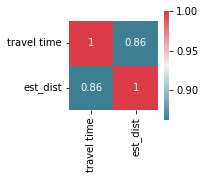

In [20]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(2,2))
corr = my_df.corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [21]:
x = np.array(df1[['est_dist']])
y = np.array(df1['travel time'])
# x

In [22]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
print(X_train.shape)
print(X_test.shape)
# X_train

(13304, 1)
(3327, 1)


In [24]:
# inputs: distance
model1_1 = nnmodel(5, num_hlayers=1,Epoch=500)
model1_1

Epoch 1/500
416/416 [==============================] - 1s 891us/step - loss: 558198.8750 - mape: 99.9132 - rmse: 747.1271 - val_loss: 563763.1875 - val_mape: 99.7976 - val_rmse: 750.8417
Epoch 2/500
416/416 [==============================] - 0s 748us/step - loss: 556196.8125 - mape: 99.6080 - rmse: 745.7860 - val_loss: 561066.6875 - val_mape: 99.3899 - val_rmse: 749.0438
Epoch 3/500
416/416 [==============================] - 0s 714us/step - loss: 552879.7500 - mape: 99.0971 - rmse: 743.5588 - val_loss: 557121.8750 - val_mape: 98.7937 - val_rmse: 746.4059
Epoch 4/500
416/416 [==============================] - 0s 726us/step - loss: 548411.1250 - mape: 98.4109 - rmse: 740.5479 - val_loss: 552105.1875 - val_mape: 98.0332 - val_rmse: 743.0378
Epoch 5/500
416/416 [==============================] - 0s 730us/step - loss: 542953.7500 - mape: 97.5675 - rmse: 736.8539 - val_loss: 546160.5000 - val_mape: 97.1276 - val_rmse: 739.0267
Epoch 6/500
416/416 [==============================] - 0s 717us/s

Epoch 45/500
416/416 [==============================] - 0s 711us/step - loss: 119674.0234 - mape: 42.9587 - rmse: 345.9393 - val_loss: 119128.8516 - val_mape: 42.3205 - val_rmse: 345.1505
Epoch 46/500
416/416 [==============================] - 0s 776us/step - loss: 114206.0781 - mape: 43.8338 - rmse: 337.9439 - val_loss: 113850.2891 - val_mape: 43.1789 - val_rmse: 337.4171
Epoch 47/500
416/416 [==============================] - 0s 775us/step - loss: 109365.6562 - mape: 44.8095 - rmse: 330.7048 - val_loss: 109193.5547 - val_mape: 44.1401 - val_rmse: 330.4445
Epoch 48/500
416/416 [==============================] - 0s 700us/step - loss: 105148.2891 - mape: 45.8556 - rmse: 324.2658 - val_loss: 105154.3438 - val_mape: 45.1742 - val_rmse: 324.2751
Epoch 49/500
416/416 [==============================] - 0s 689us/step - loss: 101529.3594 - mape: 46.9810 - rmse: 318.6367 - val_loss: 101705.4141 - val_mape: 46.2694 - val_rmse: 318.9129
Epoch 50/500
416/416 [==============================] - 0s 7

Epoch 89/500
416/416 [==============================] - 0s 686us/step - loss: 60494.8164 - mape: 44.9056 - rmse: 245.9569 - val_loss: 61015.4570 - val_mape: 43.4016 - val_rmse: 247.0131
Epoch 90/500
416/416 [==============================] - 0s 706us/step - loss: 59716.4414 - mape: 44.4499 - rmse: 244.3695 - val_loss: 60232.0586 - val_mape: 43.0563 - val_rmse: 245.4222
Epoch 91/500
416/416 [==============================] - 0s 701us/step - loss: 58942.3867 - mape: 44.1104 - rmse: 242.7805 - val_loss: 59458.8086 - val_mape: 42.6465 - val_rmse: 243.8418
Epoch 92/500
416/416 [==============================] - 0s 688us/step - loss: 58176.7930 - mape: 43.7210 - rmse: 241.1987 - val_loss: 58693.6992 - val_mape: 42.2712 - val_rmse: 242.2678
Epoch 93/500
416/416 [==============================] - 0s 723us/step - loss: 57429.7773 - mape: 43.3545 - rmse: 239.6451 - val_loss: 57946.2148 - val_mape: 41.8943 - val_rmse: 240.7202
Epoch 94/500
416/416 [==============================] - 0s 683us/step 

Epoch 133/500
416/416 [==============================] - 0s 723us/step - loss: 39084.5039 - mape: 29.5367 - rmse: 197.6980 - val_loss: 39721.2773 - val_mape: 28.3531 - val_rmse: 199.3020
Epoch 134/500
416/416 [==============================] - 0s 744us/step - loss: 38939.2109 - mape: 29.3392 - rmse: 197.3302 - val_loss: 39579.8008 - val_mape: 28.1553 - val_rmse: 198.9467
Epoch 135/500
416/416 [==============================] - 0s 697us/step - loss: 38805.9570 - mape: 29.1769 - rmse: 196.9923 - val_loss: 39450.2578 - val_mape: 27.9416 - val_rmse: 198.6209
Epoch 136/500
416/416 [==============================] - 0s 719us/step - loss: 38681.2695 - mape: 28.9222 - rmse: 196.6755 - val_loss: 39323.7656 - val_mape: 27.7728 - val_rmse: 198.3022
Epoch 137/500
416/416 [==============================] - 0s 802us/step - loss: 38564.8047 - mape: 28.7569 - rmse: 196.3792 - val_loss: 39209.9688 - val_mape: 27.6100 - val_rmse: 198.0151
Epoch 138/500
416/416 [==============================] - 0s 710us

Epoch 177/500
416/416 [==============================] - 0s 713us/step - loss: 37367.4297 - mape: 25.6739 - rmse: 193.3066 - val_loss: 38012.7500 - val_mape: 24.6718 - val_rmse: 194.9686
Epoch 178/500
416/416 [==============================] - 0s 719us/step - loss: 37365.5117 - mape: 25.6409 - rmse: 193.3016 - val_loss: 38009.0742 - val_mape: 24.6639 - val_rmse: 194.9592
Epoch 179/500
416/416 [==============================] - 0s 726us/step - loss: 37363.9727 - mape: 25.6089 - rmse: 193.2976 - val_loss: 38008.2617 - val_mape: 24.6363 - val_rmse: 194.9571
Epoch 180/500
416/416 [==============================] - 0s 716us/step - loss: 37361.7266 - mape: 25.6175 - rmse: 193.2918 - val_loss: 38003.5430 - val_mape: 24.6392 - val_rmse: 194.9450
Epoch 181/500
416/416 [==============================] - 0s 696us/step - loss: 37360.8594 - mape: 25.5931 - rmse: 193.2896 - val_loss: 37999.8594 - val_mape: 24.6340 - val_rmse: 194.9355
Epoch 182/500
416/416 [==============================] - 0s 723us

Epoch 221/500
416/416 [==============================] - 0s 754us/step - loss: 37347.1484 - mape: 25.3474 - rmse: 193.2541 - val_loss: 37983.3164 - val_mape: 24.3621 - val_rmse: 194.8931
Epoch 222/500
416/416 [==============================] - 0s 699us/step - loss: 37347.4570 - mape: 25.3170 - rmse: 193.2549 - val_loss: 37986.3945 - val_mape: 24.3394 - val_rmse: 194.9010
Epoch 223/500
416/416 [==============================] - 0s 747us/step - loss: 37346.9570 - mape: 25.3040 - rmse: 193.2536 - val_loss: 37984.1914 - val_mape: 24.3513 - val_rmse: 194.8953
Epoch 224/500
416/416 [==============================] - 0s 692us/step - loss: 37347.2695 - mape: 25.2988 - rmse: 193.2544 - val_loss: 37984.1016 - val_mape: 24.3525 - val_rmse: 194.8951
Epoch 225/500
416/416 [==============================] - 0s 695us/step - loss: 37346.8086 - mape: 25.3464 - rmse: 193.2532 - val_loss: 37984.1719 - val_mape: 24.3487 - val_rmse: 194.8953
Epoch 226/500
416/416 [==============================] - 0s 704us

Epoch 265/500
416/416 [==============================] - 0s 702us/step - loss: 37347.0156 - mape: 25.2826 - rmse: 193.2538 - val_loss: 37986.1133 - val_mape: 24.3057 - val_rmse: 194.9003
Epoch 266/500
416/416 [==============================] - 0s 730us/step - loss: 37346.5703 - mape: 25.2850 - rmse: 193.2526 - val_loss: 37986.1992 - val_mape: 24.3035 - val_rmse: 194.9005
Epoch 267/500
416/416 [==============================] - 0s 721us/step - loss: 37346.9453 - mape: 25.2828 - rmse: 193.2536 - val_loss: 37983.0977 - val_mape: 24.3271 - val_rmse: 194.8925
Epoch 268/500
416/416 [==============================] - 0s 707us/step - loss: 37347.2695 - mape: 25.3073 - rmse: 193.2544 - val_loss: 37984.9609 - val_mape: 24.3131 - val_rmse: 194.8973
Epoch 269/500
416/416 [==============================] - 0s 703us/step - loss: 37347.2656 - mape: 25.2973 - rmse: 193.2544 - val_loss: 37985.7188 - val_mape: 24.3086 - val_rmse: 194.8992
Epoch 270/500
416/416 [==============================] - 0s 719us

Epoch 309/500
416/416 [==============================] - 0s 739us/step - loss: 37346.6953 - mape: 25.2727 - rmse: 193.2529 - val_loss: 37981.1836 - val_mape: 24.3373 - val_rmse: 194.8876
Epoch 310/500
416/416 [==============================] - 0s 789us/step - loss: 37347.9453 - mape: 25.3477 - rmse: 193.2562 - val_loss: 37983.1523 - val_mape: 24.3227 - val_rmse: 194.8927
Epoch 311/500
416/416 [==============================] - 0s 719us/step - loss: 37347.6641 - mape: 25.2963 - rmse: 193.2554 - val_loss: 37987.9180 - val_mape: 24.2873 - val_rmse: 194.9049
Epoch 312/500
416/416 [==============================] - 0s 723us/step - loss: 37346.8320 - mape: 25.2793 - rmse: 193.2533 - val_loss: 37984.0664 - val_mape: 24.3157 - val_rmse: 194.8950
Epoch 313/500
416/416 [==============================] - 0s 747us/step - loss: 37347.1914 - mape: 25.2486 - rmse: 193.2542 - val_loss: 37983.3555 - val_mape: 24.3204 - val_rmse: 194.8932
Epoch 314/500
416/416 [==============================] - 0s 720us

Epoch 353/500
416/416 [==============================] - 0s 698us/step - loss: 37347.5078 - mape: 25.2828 - rmse: 193.2550 - val_loss: 37981.8672 - val_mape: 24.3337 - val_rmse: 194.8894
Epoch 354/500
416/416 [==============================] - 0s 737us/step - loss: 37347.4375 - mape: 25.3392 - rmse: 193.2549 - val_loss: 37983.0195 - val_mape: 24.3252 - val_rmse: 194.8923
Epoch 355/500
416/416 [==============================] - 0s 749us/step - loss: 37347.5469 - mape: 25.2694 - rmse: 193.2551 - val_loss: 37984.6953 - val_mape: 24.3134 - val_rmse: 194.8966
Epoch 356/500
416/416 [==============================] - 0s 705us/step - loss: 37346.9375 - mape: 25.3179 - rmse: 193.2536 - val_loss: 37985.0039 - val_mape: 24.3106 - val_rmse: 194.8974
Epoch 357/500
416/416 [==============================] - 0s 712us/step - loss: 37347.3750 - mape: 25.3021 - rmse: 193.2547 - val_loss: 37984.9961 - val_mape: 24.3108 - val_rmse: 194.8974
Epoch 358/500
416/416 [==============================] - 0s 726us

Epoch 397/500
416/416 [==============================] - 0s 737us/step - loss: 37347.7227 - mape: 25.3192 - rmse: 193.2556 - val_loss: 37984.0898 - val_mape: 24.3165 - val_rmse: 194.8951
Epoch 398/500
416/416 [==============================] - 0s 726us/step - loss: 37347.1758 - mape: 25.2913 - rmse: 193.2542 - val_loss: 37984.5508 - val_mape: 24.3139 - val_rmse: 194.8963
Epoch 399/500
416/416 [==============================] - 0s 718us/step - loss: 37347.9531 - mape: 25.2795 - rmse: 193.2562 - val_loss: 37984.3047 - val_mape: 24.3159 - val_rmse: 194.8956
Epoch 400/500
416/416 [==============================] - 0s 693us/step - loss: 37347.0117 - mape: 25.2963 - rmse: 193.2538 - val_loss: 37984.6953 - val_mape: 24.3121 - val_rmse: 194.8966
Epoch 401/500
416/416 [==============================] - 0s 698us/step - loss: 37347.2500 - mape: 25.2805 - rmse: 193.2544 - val_loss: 37984.1367 - val_mape: 24.3166 - val_rmse: 194.8952
Epoch 402/500
416/416 [==============================] - 0s 724us

Epoch 441/500
416/416 [==============================] - 0s 709us/step - loss: 37346.7773 - mape: 25.3021 - rmse: 193.2531 - val_loss: 37986.7461 - val_mape: 24.2988 - val_rmse: 194.9019
Epoch 442/500
416/416 [==============================] - 0s 719us/step - loss: 37346.2539 - mape: 25.3008 - rmse: 193.2518 - val_loss: 37988.7539 - val_mape: 24.2817 - val_rmse: 194.9070
Epoch 443/500
416/416 [==============================] - 0s 705us/step - loss: 37347.6484 - mape: 25.3010 - rmse: 193.2554 - val_loss: 37987.7930 - val_mape: 24.2910 - val_rmse: 194.9046
Epoch 444/500
416/416 [==============================] - 0s 713us/step - loss: 37346.6289 - mape: 25.2360 - rmse: 193.2528 - val_loss: 37983.4961 - val_mape: 24.3189 - val_rmse: 194.8936
Epoch 445/500
416/416 [==============================] - 0s 691us/step - loss: 37348.7305 - mape: 25.2584 - rmse: 193.2582 - val_loss: 37984.1484 - val_mape: 24.3152 - val_rmse: 194.8952
Epoch 446/500
416/416 [==============================] - 0s 703us

Epoch 485/500
416/416 [==============================] - 0s 700us/step - loss: 37346.9570 - mape: 25.2693 - rmse: 193.2536 - val_loss: 37983.9219 - val_mape: 24.3175 - val_rmse: 194.8946
Epoch 486/500
416/416 [==============================] - 0s 701us/step - loss: 37348.6836 - mape: 25.2859 - rmse: 193.2581 - val_loss: 37983.8555 - val_mape: 24.3176 - val_rmse: 194.8945
Epoch 487/500
416/416 [==============================] - 0s 724us/step - loss: 37347.2891 - mape: 25.2639 - rmse: 193.2545 - val_loss: 37981.9883 - val_mape: 24.3332 - val_rmse: 194.8897
Epoch 488/500
416/416 [==============================] - 0s 727us/step - loss: 37347.6602 - mape: 25.2849 - rmse: 193.2554 - val_loss: 37983.7188 - val_mape: 24.3209 - val_rmse: 194.8941
Epoch 489/500
416/416 [==============================] - 0s 718us/step - loss: 37348.0859 - mape: 25.2818 - rmse: 193.2565 - val_loss: 37982.5977 - val_mape: 24.3281 - val_rmse: 194.8913
Epoch 490/500
416/416 [==============================] - 0s 736us

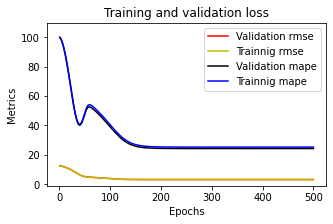

In [25]:
plotme(model1_1)

In [26]:
# inputs: distance
model1_2 = nnmodel(10, num_hlayers=1,Epoch=500)
model1_2

Epoch 1/500
416/416 [==============================] - 1s 843us/step - loss: 557533.3125 - mape: 99.8287 - rmse: 746.6815 - val_loss: 562068.6875 - val_mape: 99.5714 - val_rmse: 749.7124
Epoch 2/500
416/416 [==============================] - 0s 717us/step - loss: 552561.9375 - mape: 99.0910 - rmse: 743.3451 - val_loss: 554984.3750 - val_mape: 98.5275 - val_rmse: 744.9727
Epoch 3/500
416/416 [==============================] - 0s 714us/step - loss: 543646.8750 - mape: 97.7451 - rmse: 737.3242 - val_loss: 544266.6875 - val_mape: 96.9233 - val_rmse: 737.7443
Epoch 4/500
416/416 [==============================] - 0s 720us/step - loss: 531451.0625 - mape: 95.8742 - rmse: 729.0069 - val_loss: 530558.1875 - val_mape: 94.8376 - val_rmse: 728.3942
Epoch 5/500
416/416 [==============================] - 0s 723us/step - loss: 516567.8125 - mape: 93.5548 - rmse: 718.7265 - val_loss: 514380.5938 - val_mape: 92.3309 - val_rmse: 717.2033
Epoch 6/500
416/416 [==============================] - 0s 759us/s

Epoch 45/500
416/416 [==============================] - 0s 703us/step - loss: 68544.6250 - mape: 48.5479 - rmse: 261.8103 - val_loss: 68775.6484 - val_mape: 46.8651 - val_rmse: 262.2511
Epoch 46/500
416/416 [==============================] - 0s 721us/step - loss: 67102.3906 - mape: 47.8940 - rmse: 259.0413 - val_loss: 67332.4453 - val_mape: 46.3235 - val_rmse: 259.4850
Epoch 47/500
416/416 [==============================] - 0s 715us/step - loss: 65682.9844 - mape: 47.3306 - rmse: 256.2869 - val_loss: 65920.0781 - val_mape: 45.6471 - val_rmse: 256.7491
Epoch 48/500
416/416 [==============================] - 0s 679us/step - loss: 64280.1875 - mape: 46.6046 - rmse: 253.5354 - val_loss: 64516.6680 - val_mape: 45.0939 - val_rmse: 254.0013
Epoch 49/500
416/416 [==============================] - 0s 679us/step - loss: 62904.3984 - mape: 46.0723 - rmse: 250.8075 - val_loss: 63144.5977 - val_mape: 44.4808 - val_rmse: 251.2859
Epoch 50/500
416/416 [==============================] - 0s 729us/step 

416/416 [==============================] - 0s 693us/step - loss: 37585.5625 - mape: 26.6938 - rmse: 193.8700 - val_loss: 38225.3828 - val_mape: 25.6213 - val_rmse: 195.5131
Epoch 90/500
416/416 [==============================] - 0s 693us/step - loss: 37545.6211 - mape: 26.5161 - rmse: 193.7669 - val_loss: 38183.2109 - val_mape: 25.5541 - val_rmse: 195.4052
Epoch 91/500
416/416 [==============================] - 0s 725us/step - loss: 37514.8203 - mape: 26.4827 - rmse: 193.6874 - val_loss: 38151.5781 - val_mape: 25.4594 - val_rmse: 195.3243
Epoch 92/500
416/416 [==============================] - 0s 693us/step - loss: 37490.5547 - mape: 26.4054 - rmse: 193.6248 - val_loss: 38131.7227 - val_mape: 25.2986 - val_rmse: 195.2735
Epoch 93/500
416/416 [==============================] - 0s 684us/step - loss: 37466.0898 - mape: 26.2695 - rmse: 193.5616 - val_loss: 38111.9609 - val_mape: 25.1933 - val_rmse: 195.2229
Epoch 94/500
416/416 [==============================] - 0s 692us/step - loss: 37445

Epoch 133/500
416/416 [==============================] - 0s 713us/step - loss: 37348.3750 - mape: 25.3296 - rmse: 193.2573 - val_loss: 37987.6836 - val_mape: 24.3147 - val_rmse: 194.9043
Epoch 134/500
416/416 [==============================] - 0s 723us/step - loss: 37347.2266 - mape: 25.3654 - rmse: 193.2543 - val_loss: 37992.6406 - val_mape: 24.2797 - val_rmse: 194.9170
Epoch 135/500
416/416 [==============================] - 0s 690us/step - loss: 37348.5156 - mape: 25.2757 - rmse: 193.2576 - val_loss: 37992.1406 - val_mape: 24.2809 - val_rmse: 194.9157
Epoch 136/500
416/416 [==============================] - 0s 688us/step - loss: 37348.5117 - mape: 25.2911 - rmse: 193.2576 - val_loss: 37989.9883 - val_mape: 24.2925 - val_rmse: 194.9102
Epoch 137/500
416/416 [==============================] - 0s 709us/step - loss: 37349.4375 - mape: 25.2902 - rmse: 193.2600 - val_loss: 37985.8125 - val_mape: 24.3201 - val_rmse: 194.8995
Epoch 138/500
416/416 [==============================] - 0s 748us

Epoch 177/500
416/416 [==============================] - 0s 676us/step - loss: 37347.4648 - mape: 25.2219 - rmse: 193.2549 - val_loss: 37980.4453 - val_mape: 24.3487 - val_rmse: 194.8857
Epoch 178/500
416/416 [==============================] - 0s 688us/step - loss: 37348.7031 - mape: 25.3394 - rmse: 193.2581 - val_loss: 37982.3438 - val_mape: 24.3295 - val_rmse: 194.8906
Epoch 179/500
416/416 [==============================] - 0s 685us/step - loss: 37347.9453 - mape: 25.3387 - rmse: 193.2562 - val_loss: 37986.0625 - val_mape: 24.2996 - val_rmse: 194.9001
Epoch 180/500
416/416 [==============================] - 0s 705us/step - loss: 37347.8164 - mape: 25.2369 - rmse: 193.2558 - val_loss: 37981.3516 - val_mape: 24.3394 - val_rmse: 194.8880
Epoch 181/500
416/416 [==============================] - 0s 692us/step - loss: 37347.4961 - mape: 25.3072 - rmse: 193.2550 - val_loss: 37985.2695 - val_mape: 24.3085 - val_rmse: 194.8981
Epoch 182/500
416/416 [==============================] - 0s 724us

Epoch 221/500
416/416 [==============================] - 0s 689us/step - loss: 37348.7344 - mape: 25.3062 - rmse: 193.2582 - val_loss: 37988.1328 - val_mape: 24.2879 - val_rmse: 194.9054
Epoch 222/500
416/416 [==============================] - 0s 692us/step - loss: 37348.5898 - mape: 25.2953 - rmse: 193.2578 - val_loss: 37989.1641 - val_mape: 24.2798 - val_rmse: 194.9081
Epoch 223/500
416/416 [==============================] - 0s 688us/step - loss: 37347.5430 - mape: 25.2546 - rmse: 193.2551 - val_loss: 37984.8984 - val_mape: 24.3108 - val_rmse: 194.8972
Epoch 224/500
416/416 [==============================] - 0s 679us/step - loss: 37347.8477 - mape: 25.3136 - rmse: 193.2559 - val_loss: 37986.0938 - val_mape: 24.2997 - val_rmse: 194.9002
Epoch 225/500
416/416 [==============================] - 0s 698us/step - loss: 37347.8984 - mape: 25.2646 - rmse: 193.2560 - val_loss: 37985.7734 - val_mape: 24.3045 - val_rmse: 194.8994
Epoch 226/500
416/416 [==============================] - 0s 692us

Epoch 265/500
416/416 [==============================] - 0s 698us/step - loss: 37347.7773 - mape: 25.3139 - rmse: 193.2557 - val_loss: 37989.8203 - val_mape: 24.2725 - val_rmse: 194.9098
Epoch 266/500
416/416 [==============================] - 0s 691us/step - loss: 37349.2930 - mape: 25.2426 - rmse: 193.2597 - val_loss: 37987.9922 - val_mape: 24.2914 - val_rmse: 194.9051
Epoch 267/500
416/416 [==============================] - 0s 707us/step - loss: 37347.7852 - mape: 25.2374 - rmse: 193.2558 - val_loss: 37980.2695 - val_mape: 24.3467 - val_rmse: 194.8853
Epoch 268/500
416/416 [==============================] - 0s 685us/step - loss: 37347.9180 - mape: 25.3721 - rmse: 193.2561 - val_loss: 37993.5742 - val_mape: 24.2516 - val_rmse: 194.9194
Epoch 269/500
416/416 [==============================] - 0s 693us/step - loss: 37347.7812 - mape: 25.2064 - rmse: 193.2557 - val_loss: 37979.0664 - val_mape: 24.3558 - val_rmse: 194.8822
Epoch 270/500
416/416 [==============================] - 0s 674us

Epoch 309/500
416/416 [==============================] - 0s 691us/step - loss: 37347.8281 - mape: 25.3204 - rmse: 193.2559 - val_loss: 37984.6289 - val_mape: 24.3130 - val_rmse: 194.8965
Epoch 310/500
416/416 [==============================] - 0s 683us/step - loss: 37348.4609 - mape: 25.2629 - rmse: 193.2575 - val_loss: 37979.1523 - val_mape: 24.3560 - val_rmse: 194.8824
Epoch 311/500
416/416 [==============================] - 0s 687us/step - loss: 37350.1875 - mape: 25.3059 - rmse: 193.2620 - val_loss: 37981.8320 - val_mape: 24.3352 - val_rmse: 194.8893
Epoch 312/500
416/416 [==============================] - 0s 689us/step - loss: 37347.8906 - mape: 25.2305 - rmse: 193.2560 - val_loss: 37977.7148 - val_mape: 24.3687 - val_rmse: 194.8787
Epoch 313/500
416/416 [==============================] - 0s 712us/step - loss: 37350.1992 - mape: 25.3457 - rmse: 193.2620 - val_loss: 37982.3281 - val_mape: 24.3299 - val_rmse: 194.8905
Epoch 314/500
416/416 [==============================] - 0s 749us

Epoch 353/500
416/416 [==============================] - 0s 681us/step - loss: 37350.2188 - mape: 25.2702 - rmse: 193.2621 - val_loss: 37987.2500 - val_mape: 24.2938 - val_rmse: 194.9032
Epoch 354/500
416/416 [==============================] - 0s 690us/step - loss: 37347.9102 - mape: 25.2802 - rmse: 193.2561 - val_loss: 37988.0078 - val_mape: 24.2900 - val_rmse: 194.9051
Epoch 355/500
416/416 [==============================] - 0s 696us/step - loss: 37349.4375 - mape: 25.2304 - rmse: 193.2600 - val_loss: 37982.2578 - val_mape: 24.3298 - val_rmse: 194.8904
Epoch 356/500
416/416 [==============================] - 0s 695us/step - loss: 37348.6367 - mape: 25.3021 - rmse: 193.2579 - val_loss: 37982.1094 - val_mape: 24.3354 - val_rmse: 194.8900
Epoch 357/500
416/416 [==============================] - 0s 687us/step - loss: 37348.9570 - mape: 25.2978 - rmse: 193.2588 - val_loss: 37983.3086 - val_mape: 24.3246 - val_rmse: 194.8931
Epoch 358/500
416/416 [==============================] - 0s 693us

Epoch 397/500
416/416 [==============================] - 0s 696us/step - loss: 37347.7891 - mape: 25.2926 - rmse: 193.2558 - val_loss: 37979.4297 - val_mape: 24.3552 - val_rmse: 194.8831
Epoch 398/500
416/416 [==============================] - 0s 720us/step - loss: 37347.7852 - mape: 25.3428 - rmse: 193.2558 - val_loss: 37985.8711 - val_mape: 24.3050 - val_rmse: 194.8996
Epoch 399/500
416/416 [==============================] - 0s 705us/step - loss: 37347.7773 - mape: 25.2600 - rmse: 193.2557 - val_loss: 37982.0859 - val_mape: 24.3308 - val_rmse: 194.8899
Epoch 400/500
416/416 [==============================] - 0s 686us/step - loss: 37348.5938 - mape: 25.3042 - rmse: 193.2578 - val_loss: 37985.6914 - val_mape: 24.3022 - val_rmse: 194.8992
Epoch 401/500
416/416 [==============================] - 0s 716us/step - loss: 37347.8633 - mape: 25.3337 - rmse: 193.2560 - val_loss: 37987.4961 - val_mape: 24.2908 - val_rmse: 194.9038
Epoch 402/500
416/416 [==============================] - 0s 689us

Epoch 441/500
416/416 [==============================] - 0s 707us/step - loss: 37348.7461 - mape: 25.2654 - rmse: 193.2582 - val_loss: 37983.3906 - val_mape: 24.3247 - val_rmse: 194.8933
Epoch 442/500
416/416 [==============================] - 0s 680us/step - loss: 37347.6523 - mape: 25.3409 - rmse: 193.2554 - val_loss: 37990.9453 - val_mape: 24.2675 - val_rmse: 194.9127
Epoch 443/500
416/416 [==============================] - 0s 694us/step - loss: 37349.4258 - mape: 25.2721 - rmse: 193.2600 - val_loss: 37985.4570 - val_mape: 24.3056 - val_rmse: 194.8986
Epoch 444/500
416/416 [==============================] - 0s 686us/step - loss: 37349.4414 - mape: 25.2576 - rmse: 193.2600 - val_loss: 37985.6172 - val_mape: 24.3079 - val_rmse: 194.8990
Epoch 445/500
416/416 [==============================] - 0s 673us/step - loss: 37349.2930 - mape: 25.2697 - rmse: 193.2597 - val_loss: 37981.1562 - val_mape: 24.3389 - val_rmse: 194.8875
Epoch 446/500
416/416 [==============================] - 0s 689us

Epoch 485/500
416/416 [==============================] - 0s 693us/step - loss: 37348.3906 - mape: 25.2603 - rmse: 193.2573 - val_loss: 37984.3438 - val_mape: 24.3174 - val_rmse: 194.8957
Epoch 486/500
416/416 [==============================] - 0s 706us/step - loss: 37348.4961 - mape: 25.2964 - rmse: 193.2576 - val_loss: 37986.9102 - val_mape: 24.2994 - val_rmse: 194.9023
Epoch 487/500
416/416 [==============================] - 0s 667us/step - loss: 37347.6523 - mape: 25.3325 - rmse: 193.2554 - val_loss: 37990.8594 - val_mape: 24.2714 - val_rmse: 194.9124
Epoch 488/500
416/416 [==============================] - 0s 674us/step - loss: 37349.2617 - mape: 25.2225 - rmse: 193.2596 - val_loss: 37982.4961 - val_mape: 24.3298 - val_rmse: 194.8910
Epoch 489/500
416/416 [==============================] - 0s 687us/step - loss: 37348.6250 - mape: 25.3515 - rmse: 193.2579 - val_loss: 37988.1445 - val_mape: 24.2900 - val_rmse: 194.9055
Epoch 490/500
416/416 [==============================] - 0s 703us

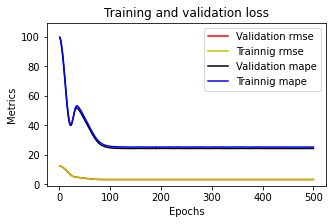

In [27]:
plotme(model1_2)

In [28]:
# inputs: distance
model1_3 = nnmodel(20, num_hlayers=1,Epoch=500)
model1_3

Epoch 1/500
416/416 [==============================] - 1s 832us/step - loss: 556965.8750 - mape: 99.7473 - rmse: 746.3015 - val_loss: 560844.0000 - val_mape: 99.3936 - val_rmse: 748.8952
Epoch 2/500
416/416 [==============================] - 0s 696us/step - loss: 550334.3125 - mape: 98.7570 - rmse: 741.8452 - val_loss: 551534.0625 - val_mape: 98.0107 - val_rmse: 742.6534
Epoch 3/500
416/416 [==============================] - 0s 692us/step - loss: 538695.8750 - mape: 96.9812 - rmse: 733.9590 - val_loss: 537561.1875 - val_mape: 95.9004 - val_rmse: 733.1857
Epoch 4/500
416/416 [==============================] - 0s 679us/step - loss: 522830.2500 - mape: 94.5042 - rmse: 723.0700 - val_loss: 519765.9375 - val_mape: 93.1594 - val_rmse: 720.9479
Epoch 5/500
416/416 [==============================] - 0s 681us/step - loss: 503524.8750 - mape: 91.4520 - rmse: 709.5948 - val_loss: 498852.7812 - val_mape: 89.8623 - val_rmse: 706.2951
Epoch 6/500
416/416 [==============================] - 0s 689us/s

Epoch 45/500
416/416 [==============================] - 0s 695us/step - loss: 59146.6133 - mape: 44.2058 - rmse: 243.2008 - val_loss: 59295.3594 - val_mape: 42.4643 - val_rmse: 243.5064
Epoch 46/500
416/416 [==============================] - 0s 686us/step - loss: 57646.6016 - mape: 43.4055 - rmse: 240.0971 - val_loss: 57804.1758 - val_mape: 41.6839 - val_rmse: 240.4250
Epoch 47/500
416/416 [==============================] - 0s 710us/step - loss: 56182.6562 - mape: 42.5885 - rmse: 237.0288 - val_loss: 56347.5859 - val_mape: 40.9397 - val_rmse: 237.3765
Epoch 48/500
416/416 [==============================] - 0s 697us/step - loss: 54763.4062 - mape: 41.7677 - rmse: 234.0158 - val_loss: 54941.2891 - val_mape: 40.1895 - val_rmse: 234.3956
Epoch 49/500
416/416 [==============================] - 0s 697us/step - loss: 53393.1094 - mape: 41.0785 - rmse: 231.0695 - val_loss: 53595.8203 - val_mape: 39.3690 - val_rmse: 231.5077
Epoch 50/500
416/416 [==============================] - 0s 690us/step 

416/416 [==============================] - 0s 698us/step - loss: 37368.2695 - mape: 25.6525 - rmse: 193.3087 - val_loss: 38008.3359 - val_mape: 24.6691 - val_rmse: 194.9573
Epoch 90/500
416/416 [==============================] - 0s 684us/step - loss: 37364.6016 - mape: 25.6467 - rmse: 193.2993 - val_loss: 38009.2227 - val_mape: 24.5972 - val_rmse: 194.9595
Epoch 91/500
416/416 [==============================] - 0s 693us/step - loss: 37362.2109 - mape: 25.6051 - rmse: 193.2931 - val_loss: 37999.4219 - val_mape: 24.6078 - val_rmse: 194.9344
Epoch 92/500
416/416 [==============================] - 0s 725us/step - loss: 37358.7188 - mape: 25.5189 - rmse: 193.2840 - val_loss: 37997.3359 - val_mape: 24.5768 - val_rmse: 194.9290
Epoch 93/500
416/416 [==============================] - 0s 700us/step - loss: 37358.8242 - mape: 25.5626 - rmse: 193.2843 - val_loss: 37992.5469 - val_mape: 24.5697 - val_rmse: 194.9168
Epoch 94/500
416/416 [==============================] - 0s 686us/step - loss: 37356

Epoch 133/500
416/416 [==============================] - 0s 688us/step - loss: 37349.9766 - mape: 25.2543 - rmse: 193.2614 - val_loss: 37988.3945 - val_mape: 24.2903 - val_rmse: 194.9061
Epoch 134/500
416/416 [==============================] - 0s 699us/step - loss: 37347.8594 - mape: 25.1873 - rmse: 193.2559 - val_loss: 37975.6719 - val_mape: 24.3932 - val_rmse: 194.8735
Epoch 135/500
416/416 [==============================] - 0s 698us/step - loss: 37349.5664 - mape: 25.3805 - rmse: 193.2604 - val_loss: 37987.8633 - val_mape: 24.2941 - val_rmse: 194.9048
Epoch 136/500
416/416 [==============================] - 0s 694us/step - loss: 37347.1562 - mape: 25.3308 - rmse: 193.2541 - val_loss: 37993.5781 - val_mape: 24.2568 - val_rmse: 194.9194
Epoch 137/500
416/416 [==============================] - 0s 732us/step - loss: 37349.2305 - mape: 25.2551 - rmse: 193.2595 - val_loss: 37987.9688 - val_mape: 24.2930 - val_rmse: 194.9050
Epoch 138/500
416/416 [==============================] - 0s 697us

Epoch 177/500
416/416 [==============================] - 0s 723us/step - loss: 37348.8594 - mape: 25.3045 - rmse: 193.2585 - val_loss: 37980.9961 - val_mape: 24.3386 - val_rmse: 194.8871
Epoch 178/500
416/416 [==============================] - 0s 696us/step - loss: 37348.2773 - mape: 25.2077 - rmse: 193.2570 - val_loss: 37974.5117 - val_mape: 24.3999 - val_rmse: 194.8705
Epoch 179/500
416/416 [==============================] - 0s 672us/step - loss: 37349.8945 - mape: 25.3140 - rmse: 193.2612 - val_loss: 37974.0664 - val_mape: 24.4019 - val_rmse: 194.8694
Epoch 180/500
416/416 [==============================] - 0s 694us/step - loss: 37350.2305 - mape: 25.3382 - rmse: 193.2621 - val_loss: 37984.7070 - val_mape: 24.3119 - val_rmse: 194.8967
Epoch 181/500
416/416 [==============================] - 0s 702us/step - loss: 37349.5117 - mape: 25.2426 - rmse: 193.2602 - val_loss: 37979.5547 - val_mape: 24.3495 - val_rmse: 194.8834
Epoch 182/500
416/416 [==============================] - 0s 695us

Epoch 221/500
416/416 [==============================] - 0s 674us/step - loss: 37347.6719 - mape: 25.3467 - rmse: 193.2555 - val_loss: 37989.9336 - val_mape: 24.2741 - val_rmse: 194.9101
Epoch 222/500
416/416 [==============================] - 0s 684us/step - loss: 37347.2539 - mape: 25.1918 - rmse: 193.2544 - val_loss: 37980.9648 - val_mape: 24.3431 - val_rmse: 194.8871
Epoch 223/500
416/416 [==============================] - 0s 706us/step - loss: 37347.6094 - mape: 25.3767 - rmse: 193.2553 - val_loss: 37991.3086 - val_mape: 24.2643 - val_rmse: 194.9136
Epoch 224/500
416/416 [==============================] - 0s 683us/step - loss: 37348.6055 - mape: 25.2091 - rmse: 193.2579 - val_loss: 37981.3516 - val_mape: 24.3379 - val_rmse: 194.8880
Epoch 225/500
416/416 [==============================] - 0s 680us/step - loss: 37350.0000 - mape: 25.3322 - rmse: 193.2615 - val_loss: 37985.5820 - val_mape: 24.3061 - val_rmse: 194.8989
Epoch 226/500
416/416 [==============================] - 0s 696us

Epoch 265/500
416/416 [==============================] - 0s 704us/step - loss: 37349.6836 - mape: 25.2656 - rmse: 193.2607 - val_loss: 37981.9141 - val_mape: 24.3357 - val_rmse: 194.8895
Epoch 266/500
416/416 [==============================] - 0s 700us/step - loss: 37349.4180 - mape: 25.3024 - rmse: 193.2600 - val_loss: 37985.8359 - val_mape: 24.3059 - val_rmse: 194.8996
Epoch 267/500
416/416 [==============================] - 0s 695us/step - loss: 37350.0859 - mape: 25.3376 - rmse: 193.2617 - val_loss: 37990.4844 - val_mape: 24.2725 - val_rmse: 194.9115
Epoch 268/500
416/416 [==============================] - 0s 693us/step - loss: 37348.6836 - mape: 25.2822 - rmse: 193.2581 - val_loss: 37989.8203 - val_mape: 24.2759 - val_rmse: 194.9098
Epoch 269/500
416/416 [==============================] - 0s 681us/step - loss: 37348.6641 - mape: 25.2506 - rmse: 193.2580 - val_loss: 37985.6680 - val_mape: 24.3059 - val_rmse: 194.8991
Epoch 270/500
416/416 [==============================] - 0s 686us

Epoch 309/500
416/416 [==============================] - 0s 699us/step - loss: 37347.8945 - mape: 25.2367 - rmse: 193.2560 - val_loss: 37972.8789 - val_mape: 24.4160 - val_rmse: 194.8663
Epoch 310/500
416/416 [==============================] - 0s 701us/step - loss: 37348.5859 - mape: 25.3619 - rmse: 193.2578 - val_loss: 37985.1797 - val_mape: 24.3085 - val_rmse: 194.8979
Epoch 311/500
416/416 [==============================] - 0s 701us/step - loss: 37348.4688 - mape: 25.3116 - rmse: 193.2575 - val_loss: 37987.5039 - val_mape: 24.2934 - val_rmse: 194.9038
Epoch 312/500
416/416 [==============================] - 0s 679us/step - loss: 37348.6367 - mape: 25.2648 - rmse: 193.2579 - val_loss: 37989.1094 - val_mape: 24.2837 - val_rmse: 194.9079
Epoch 313/500
416/416 [==============================] - 0s 778us/step - loss: 37349.3672 - mape: 25.3091 - rmse: 193.2598 - val_loss: 37988.8008 - val_mape: 24.2851 - val_rmse: 194.9072
Epoch 314/500
416/416 [==============================] - 0s 707us

Epoch 353/500
416/416 [==============================] - 0s 710us/step - loss: 37347.7500 - mape: 25.3264 - rmse: 193.2557 - val_loss: 37987.0938 - val_mape: 24.2934 - val_rmse: 194.9028
Epoch 354/500
416/416 [==============================] - 0s 693us/step - loss: 37349.1172 - mape: 25.2904 - rmse: 193.2592 - val_loss: 37991.5547 - val_mape: 24.2630 - val_rmse: 194.9142
Epoch 355/500
416/416 [==============================] - 0s 694us/step - loss: 37348.5117 - mape: 25.2535 - rmse: 193.2576 - val_loss: 37986.0781 - val_mape: 24.3003 - val_rmse: 194.9002
Epoch 356/500
416/416 [==============================] - 0s 703us/step - loss: 37350.0234 - mape: 25.2834 - rmse: 193.2615 - val_loss: 37982.4375 - val_mape: 24.3291 - val_rmse: 194.8908
Epoch 357/500
416/416 [==============================] - 0s 682us/step - loss: 37348.1250 - mape: 25.3017 - rmse: 193.2566 - val_loss: 37986.9727 - val_mape: 24.2966 - val_rmse: 194.9025
Epoch 358/500
416/416 [==============================] - 0s 681us

Epoch 397/500
416/416 [==============================] - 0s 693us/step - loss: 37350.1250 - mape: 25.2729 - rmse: 193.2618 - val_loss: 37975.8281 - val_mape: 24.3847 - val_rmse: 194.8739
Epoch 398/500
416/416 [==============================] - 0s 691us/step - loss: 37347.7148 - mape: 25.3707 - rmse: 193.2556 - val_loss: 37991.0820 - val_mape: 24.2691 - val_rmse: 194.9130
Epoch 399/500
416/416 [==============================] - 0s 688us/step - loss: 37349.1523 - mape: 25.2830 - rmse: 193.2593 - val_loss: 37991.4102 - val_mape: 24.2672 - val_rmse: 194.9138
Epoch 400/500
416/416 [==============================] - 0s 679us/step - loss: 37349.7656 - mape: 25.2972 - rmse: 193.2609 - val_loss: 37994.5078 - val_mape: 24.2493 - val_rmse: 194.9218
Epoch 401/500
416/416 [==============================] - 0s 673us/step - loss: 37349.6562 - mape: 25.2601 - rmse: 193.2606 - val_loss: 37984.9844 - val_mape: 24.3090 - val_rmse: 194.8974
Epoch 402/500
416/416 [==============================] - 0s 673us

Epoch 441/500
416/416 [==============================] - 0s 747us/step - loss: 37347.4570 - mape: 25.3509 - rmse: 193.2549 - val_loss: 37991.5625 - val_mape: 24.2637 - val_rmse: 194.9142
Epoch 442/500
416/416 [==============================] - 0s 733us/step - loss: 37348.6562 - mape: 25.3149 - rmse: 193.2580 - val_loss: 37996.3945 - val_mape: 24.2336 - val_rmse: 194.9266
Epoch 443/500
416/416 [==============================] - 0s 765us/step - loss: 37352.1406 - mape: 25.2538 - rmse: 193.2670 - val_loss: 37985.9766 - val_mape: 24.2977 - val_rmse: 194.8999
Epoch 444/500
416/416 [==============================] - 0s 729us/step - loss: 37349.5000 - mape: 25.2451 - rmse: 193.2602 - val_loss: 37982.3594 - val_mape: 24.3296 - val_rmse: 194.8906
Epoch 445/500
416/416 [==============================] - 0s 878us/step - loss: 37347.7031 - mape: 25.2947 - rmse: 193.2555 - val_loss: 37986.9805 - val_mape: 24.2943 - val_rmse: 194.9025
Epoch 446/500
416/416 [==============================] - 0s 743us

Epoch 485/500
416/416 [==============================] - 0s 688us/step - loss: 37347.8750 - mape: 25.3126 - rmse: 193.2560 - val_loss: 37985.5117 - val_mape: 24.3073 - val_rmse: 194.8987
Epoch 486/500
416/416 [==============================] - 0s 665us/step - loss: 37348.7578 - mape: 25.2845 - rmse: 193.2583 - val_loss: 37982.4375 - val_mape: 24.3274 - val_rmse: 194.8908
Epoch 487/500
416/416 [==============================] - 0s 669us/step - loss: 37349.3984 - mape: 25.2953 - rmse: 193.2599 - val_loss: 37986.4023 - val_mape: 24.2996 - val_rmse: 194.9010
Epoch 488/500
416/416 [==============================] - 0s 676us/step - loss: 37350.3086 - mape: 25.3005 - rmse: 193.2623 - val_loss: 37982.2070 - val_mape: 24.3301 - val_rmse: 194.8902
Epoch 489/500
416/416 [==============================] - 0s 682us/step - loss: 37349.0156 - mape: 25.2638 - rmse: 193.2589 - val_loss: 37982.8867 - val_mape: 24.3225 - val_rmse: 194.8920
Epoch 490/500
416/416 [==============================] - 0s 685us

In [29]:
# inputs: distance
model1_4 = nnmodel(10,5, num_hlayers=2,Epoch=500)
model1_4

Epoch 1/500
416/416 [==============================] - 1s 852us/step - loss: 556470.1875 - mape: 99.6738 - rmse: 745.9693 - val_loss: 558790.5000 - val_mape: 99.0974 - val_rmse: 747.5229
Epoch 2/500
416/416 [==============================] - 0s 720us/step - loss: 542599.0000 - mape: 97.5905 - rmse: 736.6132 - val_loss: 534934.9375 - val_mape: 95.5497 - val_rmse: 731.3925
Epoch 3/500
416/416 [==============================] - 0s 717us/step - loss: 506415.5625 - mape: 91.9243 - rmse: 711.6288 - val_loss: 485284.1562 - val_mape: 87.8005 - val_rmse: 696.6234
Epoch 4/500
416/416 [==============================] - 0s 721us/step - loss: 444327.0312 - mape: 81.7252 - rmse: 666.5786 - val_loss: 410947.1875 - val_mape: 75.2610 - val_rmse: 641.0516
Epoch 5/500
416/416 [==============================] - 0s 720us/step - loss: 362267.4062 - mape: 67.1483 - rmse: 601.8865 - val_loss: 322356.9688 - val_mape: 59.7665 - val_rmse: 567.7649
Epoch 6/500
416/416 [==============================] - 0s 715us/s

416/416 [==============================] - 0s 727us/step - loss: 37348.8359 - mape: 25.3595 - rmse: 193.2585 - val_loss: 38037.4492 - val_mape: 24.0878 - val_rmse: 195.0319
Epoch 46/500
416/416 [==============================] - 0s 730us/step - loss: 37358.4375 - mape: 25.2143 - rmse: 193.2833 - val_loss: 37984.4023 - val_mape: 24.3348 - val_rmse: 194.8959
Epoch 47/500
416/416 [==============================] - 0s 715us/step - loss: 37356.5820 - mape: 25.3525 - rmse: 193.2785 - val_loss: 38008.6484 - val_mape: 24.1950 - val_rmse: 194.9581
Epoch 48/500
416/416 [==============================] - 0s 726us/step - loss: 37353.7148 - mape: 25.2346 - rmse: 193.2711 - val_loss: 37981.0703 - val_mape: 24.3532 - val_rmse: 194.8873
Epoch 49/500
416/416 [==============================] - 0s 719us/step - loss: 37354.5156 - mape: 25.3275 - rmse: 193.2732 - val_loss: 37987.2109 - val_mape: 24.3066 - val_rmse: 194.9031
Epoch 50/500
416/416 [==============================] - 0s 723us/step - loss: 37353

Epoch 133/500
416/416 [==============================] - 0s 720us/step - loss: 37336.6016 - mape: 25.4187 - rmse: 193.2268 - val_loss: 38044.6992 - val_mape: 24.0308 - val_rmse: 195.0505
Epoch 134/500
416/416 [==============================] - 0s 725us/step - loss: 37361.3984 - mape: 25.1716 - rmse: 193.2910 - val_loss: 37971.5273 - val_mape: 24.4234 - val_rmse: 194.8628
Epoch 135/500
416/416 [==============================] - 0s 711us/step - loss: 37360.6914 - mape: 25.2857 - rmse: 193.2891 - val_loss: 37971.8164 - val_mape: 24.4163 - val_rmse: 194.8636
Epoch 136/500
416/416 [==============================] - 0s 727us/step - loss: 37353.0742 - mape: 25.2967 - rmse: 193.2694 - val_loss: 37979.6602 - val_mape: 24.3531 - val_rmse: 194.8837
Epoch 137/500
416/416 [==============================] - 0s 711us/step - loss: 37353.7656 - mape: 25.3146 - rmse: 193.2712 - val_loss: 37986.0117 - val_mape: 24.3131 - val_rmse: 194.9000
Epoch 138/500
416/416 [==============================] - 0s 718us

Epoch 177/500
416/416 [==============================] - 0s 722us/step - loss: 37356.5430 - mape: 25.1649 - rmse: 193.2784 - val_loss: 37964.8008 - val_mape: 24.5128 - val_rmse: 194.8456
Epoch 178/500
416/416 [==============================] - 0s 718us/step - loss: 37349.6797 - mape: 25.4211 - rmse: 193.2607 - val_loss: 38049.4414 - val_mape: 24.0211 - val_rmse: 195.0627
Epoch 179/500
416/416 [==============================] - 0s 734us/step - loss: 37360.5039 - mape: 25.2226 - rmse: 193.2887 - val_loss: 37989.1250 - val_mape: 24.2911 - val_rmse: 194.9080
Epoch 180/500
416/416 [==============================] - 0s 751us/step - loss: 37357.6367 - mape: 25.2554 - rmse: 193.2812 - val_loss: 37984.1250 - val_mape: 24.3292 - val_rmse: 194.8952
Epoch 181/500
416/416 [==============================] - 0s 785us/step - loss: 37354.5586 - mape: 25.3176 - rmse: 193.2733 - val_loss: 37996.9023 - val_mape: 24.2347 - val_rmse: 194.9279
Epoch 182/500
416/416 [==============================] - 0s 760us

Epoch 221/500
416/416 [==============================] - 0s 809us/step - loss: 37341.8203 - mape: 25.3907 - rmse: 193.2403 - val_loss: 38071.5859 - val_mape: 23.9501 - val_rmse: 195.1194
Epoch 222/500
416/416 [==============================] - 0s 811us/step - loss: 37362.1562 - mape: 25.1839 - rmse: 193.2929 - val_loss: 37977.9609 - val_mape: 24.3618 - val_rmse: 194.8793
Epoch 223/500
416/416 [==============================] - 0s 742us/step - loss: 37354.8008 - mape: 25.3096 - rmse: 193.2739 - val_loss: 37969.3828 - val_mape: 24.4412 - val_rmse: 194.8573
Epoch 224/500
416/416 [==============================] - 0s 729us/step - loss: 37353.8867 - mape: 25.2445 - rmse: 193.2715 - val_loss: 37966.5508 - val_mape: 24.4800 - val_rmse: 194.8501
Epoch 225/500
416/416 [==============================] - 0s 841us/step - loss: 37357.9297 - mape: 25.3330 - rmse: 193.2820 - val_loss: 37975.9570 - val_mape: 24.3896 - val_rmse: 194.8742
Epoch 226/500
416/416 [==============================] - 0s 816us

Epoch 265/500
416/416 [==============================] - 0s 884us/step - loss: 37359.3008 - mape: 25.2606 - rmse: 193.2855 - val_loss: 37990.5352 - val_mape: 24.2830 - val_rmse: 194.9116
Epoch 266/500
416/416 [==============================] - 0s 717us/step - loss: 37355.9062 - mape: 25.2707 - rmse: 193.2768 - val_loss: 37980.2305 - val_mape: 24.3432 - val_rmse: 194.8852
Epoch 267/500
416/416 [==============================] - 0s 737us/step - loss: 37357.1367 - mape: 25.2660 - rmse: 193.2799 - val_loss: 37971.9297 - val_mape: 24.4198 - val_rmse: 194.8639
Epoch 268/500
416/416 [==============================] - 0s 720us/step - loss: 37356.4453 - mape: 25.3037 - rmse: 193.2782 - val_loss: 37963.9570 - val_mape: 24.5145 - val_rmse: 194.8434
Epoch 269/500
416/416 [==============================] - 0s 726us/step - loss: 37359.9219 - mape: 25.3415 - rmse: 193.2872 - val_loss: 37986.5625 - val_mape: 24.2939 - val_rmse: 194.9014
Epoch 270/500
416/416 [==============================] - 0s 749us

Epoch 309/500
416/416 [==============================] - 0s 779us/step - loss: 37361.6562 - mape: 25.2831 - rmse: 193.2916 - val_loss: 37983.3086 - val_mape: 24.3344 - val_rmse: 194.8931
Epoch 310/500
416/416 [==============================] - 0s 774us/step - loss: 37356.7031 - mape: 25.2792 - rmse: 193.2788 - val_loss: 37969.2500 - val_mape: 24.4496 - val_rmse: 194.8570
Epoch 311/500
416/416 [==============================] - 0s 789us/step - loss: 37356.0664 - mape: 25.2621 - rmse: 193.2772 - val_loss: 37964.5312 - val_mape: 24.5243 - val_rmse: 194.8449
Epoch 312/500
416/416 [==============================] - 0s 784us/step - loss: 37356.3125 - mape: 25.3925 - rmse: 193.2778 - val_loss: 37997.5820 - val_mape: 24.2467 - val_rmse: 194.9297
Epoch 313/500
416/416 [==============================] - 0s 797us/step - loss: 37355.8086 - mape: 25.3337 - rmse: 193.2765 - val_loss: 38041.4844 - val_mape: 24.0578 - val_rmse: 195.0423
Epoch 314/500
416/416 [==============================] - 0s 803us

Epoch 353/500
416/416 [==============================] - 0s 799us/step - loss: 37358.1797 - mape: 25.3403 - rmse: 193.2826 - val_loss: 37974.6719 - val_mape: 24.3894 - val_rmse: 194.8709
Epoch 354/500
416/416 [==============================] - 0s 741us/step - loss: 37344.1328 - mape: 25.4089 - rmse: 193.2463 - val_loss: 38049.0547 - val_mape: 24.0161 - val_rmse: 195.0617
Epoch 355/500
416/416 [==============================] - 0s 725us/step - loss: 37356.7188 - mape: 25.1460 - rmse: 193.2789 - val_loss: 37965.9453 - val_mape: 24.4863 - val_rmse: 194.8485
Epoch 356/500
416/416 [==============================] - 0s 721us/step - loss: 37358.9961 - mape: 25.2729 - rmse: 193.2848 - val_loss: 37966.4258 - val_mape: 24.4793 - val_rmse: 194.8497
Epoch 357/500
416/416 [==============================] - 0s 716us/step - loss: 37356.2461 - mape: 25.3842 - rmse: 193.2776 - val_loss: 38001.7305 - val_mape: 24.2166 - val_rmse: 194.9403
Epoch 358/500
416/416 [==============================] - 0s 718us

Epoch 397/500
416/416 [==============================] - 0s 736us/step - loss: 37361.4414 - mape: 25.2821 - rmse: 193.2911 - val_loss: 37984.4922 - val_mape: 24.3075 - val_rmse: 194.8961
Epoch 398/500
416/416 [==============================] - 0s 725us/step - loss: 37353.2422 - mape: 25.2756 - rmse: 193.2699 - val_loss: 37966.1562 - val_mape: 24.4833 - val_rmse: 194.8491
Epoch 399/500
416/416 [==============================] - 0s 720us/step - loss: 37350.7422 - mape: 25.2516 - rmse: 193.2634 - val_loss: 37961.3125 - val_mape: 24.5811 - val_rmse: 194.8366
Epoch 400/500
416/416 [==============================] - 0s 728us/step - loss: 37354.7539 - mape: 25.4382 - rmse: 193.2738 - val_loss: 38031.6641 - val_mape: 24.0678 - val_rmse: 195.0171
Epoch 401/500
416/416 [==============================] - 0s 710us/step - loss: 37352.8125 - mape: 25.2346 - rmse: 193.2688 - val_loss: 37980.0430 - val_mape: 24.3345 - val_rmse: 194.8847
Epoch 402/500
416/416 [==============================] - 0s 724us

Epoch 441/500
416/416 [==============================] - 0s 757us/step - loss: 37354.3633 - mape: 25.3269 - rmse: 193.2728 - val_loss: 37980.0312 - val_mape: 24.3496 - val_rmse: 194.8847
Epoch 442/500
416/416 [==============================] - 0s 733us/step - loss: 37357.7578 - mape: 25.2580 - rmse: 193.2816 - val_loss: 37982.8320 - val_mape: 24.3317 - val_rmse: 194.8918
Epoch 443/500
416/416 [==============================] - 0s 733us/step - loss: 37352.8555 - mape: 25.3322 - rmse: 193.2689 - val_loss: 38000.3594 - val_mape: 24.2304 - val_rmse: 194.9368
Epoch 444/500
416/416 [==============================] - 0s 745us/step - loss: 37358.3516 - mape: 25.2933 - rmse: 193.2831 - val_loss: 38010.2734 - val_mape: 24.1749 - val_rmse: 194.9622
Epoch 445/500
416/416 [==============================] - 0s 741us/step - loss: 37351.6641 - mape: 25.2248 - rmse: 193.2658 - val_loss: 37963.8750 - val_mape: 24.5222 - val_rmse: 194.8432
Epoch 446/500
416/416 [==============================] - 0s 746us

Epoch 485/500
416/416 [==============================] - 0s 746us/step - loss: 37352.2969 - mape: 25.3146 - rmse: 193.2674 - val_loss: 38029.4258 - val_mape: 24.0915 - val_rmse: 195.0114
Epoch 486/500
416/416 [==============================] - 0s 796us/step - loss: 37352.8086 - mape: 25.2764 - rmse: 193.2688 - val_loss: 38051.9141 - val_mape: 24.0107 - val_rmse: 195.0690
Epoch 487/500
416/416 [==============================] - 0s 785us/step - loss: 37357.8320 - mape: 25.1852 - rmse: 193.2817 - val_loss: 37972.5273 - val_mape: 24.4149 - val_rmse: 194.8654
Epoch 488/500
416/416 [==============================] - 0s 790us/step - loss: 37351.7812 - mape: 25.2501 - rmse: 193.2661 - val_loss: 37968.4453 - val_mape: 24.4706 - val_rmse: 194.8549
Epoch 489/500
416/416 [==============================] - 0s 793us/step - loss: 37355.1250 - mape: 25.3478 - rmse: 193.2747 - val_loss: 37981.1133 - val_mape: 24.3401 - val_rmse: 194.8874
Epoch 490/500
416/416 [==============================] - 0s 777us

In [30]:
# plotme(model1_4)

In [31]:
# inputs: distance
model1_5 = nnmodel(20,10, num_hlayers=2,Epoch=500)
model1_5

Epoch 1/500
416/416 [==============================] - 1s 913us/step - loss: 547067.0625 - mape: 98.2921 - rmse: 739.6398 - val_loss: 523934.5625 - val_mape: 93.8880 - val_rmse: 723.8333
Epoch 2/500
416/416 [==============================] - 0s 749us/step - loss: 438190.5000 - mape: 80.3591 - rmse: 661.9596 - val_loss: 340182.8750 - val_mape: 62.8381 - val_rmse: 583.2520
Epoch 3/500
416/416 [==============================] - 0s 725us/step - loss: 227393.2188 - mape: 47.6350 - rmse: 476.8576 - val_loss: 141685.1562 - val_mape: 39.5367 - val_rmse: 376.4109
Epoch 4/500
416/416 [==============================] - 0s 793us/step - loss: 103391.6250 - mape: 45.1618 - rmse: 321.5457 - val_loss: 87554.4922 - val_mape: 49.4204 - val_rmse: 295.8961
Epoch 5/500
416/416 [==============================] - 0s 732us/step - loss: 82332.9531 - mape: 52.6377 - rmse: 286.9372 - val_loss: 80214.6797 - val_mape: 51.9499 - val_rmse: 283.2220
Epoch 6/500
416/416 [==============================] - 0s 733us/step

416/416 [==============================] - 0s 759us/step - loss: 37361.7109 - mape: 25.3310 - rmse: 193.2918 - val_loss: 38068.6602 - val_mape: 23.9714 - val_rmse: 195.1119
Epoch 46/500
416/416 [==============================] - 0s 752us/step - loss: 37366.1797 - mape: 25.3067 - rmse: 193.3033 - val_loss: 38048.5430 - val_mape: 24.0186 - val_rmse: 195.0604
Epoch 47/500
416/416 [==============================] - 0s 721us/step - loss: 37356.5391 - mape: 25.3402 - rmse: 193.2784 - val_loss: 38067.7148 - val_mape: 23.9555 - val_rmse: 195.1095
Epoch 48/500
416/416 [==============================] - 0s 723us/step - loss: 37363.3086 - mape: 25.2441 - rmse: 193.2959 - val_loss: 37971.5156 - val_mape: 24.4171 - val_rmse: 194.8628
Epoch 49/500
416/416 [==============================] - 0s 749us/step - loss: 37376.4609 - mape: 25.2297 - rmse: 193.3299 - val_loss: 37961.4844 - val_mape: 24.7298 - val_rmse: 194.8371
Epoch 50/500
416/416 [==============================] - 0s 727us/step - loss: 37372

Epoch 133/500
416/416 [==============================] - 0s 785us/step - loss: 37341.9453 - mape: 25.2585 - rmse: 193.2406 - val_loss: 37970.2461 - val_mape: 24.4310 - val_rmse: 194.8596
Epoch 134/500
416/416 [==============================] - 0s 787us/step - loss: 37370.8867 - mape: 25.3158 - rmse: 193.3155 - val_loss: 37964.7109 - val_mape: 24.4704 - val_rmse: 194.8454
Epoch 135/500
416/416 [==============================] - 0s 731us/step - loss: 37377.5703 - mape: 25.3510 - rmse: 193.3328 - val_loss: 37997.7578 - val_mape: 24.2082 - val_rmse: 194.9301
Epoch 136/500
416/416 [==============================] - 0s 725us/step - loss: 37359.5625 - mape: 25.2409 - rmse: 193.2862 - val_loss: 37960.3008 - val_mape: 24.6602 - val_rmse: 194.8340
Epoch 137/500
416/416 [==============================] - 0s 727us/step - loss: 37362.7812 - mape: 25.2734 - rmse: 193.2945 - val_loss: 37979.3281 - val_mape: 24.3439 - val_rmse: 194.8829
Epoch 138/500
416/416 [==============================] - 0s 730us

Epoch 177/500
416/416 [==============================] - 0s 690us/step - loss: 37374.3594 - mape: 25.3641 - rmse: 193.3245 - val_loss: 38012.5430 - val_mape: 24.1472 - val_rmse: 194.9681
Epoch 178/500
416/416 [==============================] - 0s 766us/step - loss: 37384.6289 - mape: 25.2802 - rmse: 193.3510 - val_loss: 37995.1680 - val_mape: 24.2420 - val_rmse: 194.9235
Epoch 179/500
416/416 [==============================] - 0s 714us/step - loss: 37354.6523 - mape: 25.3452 - rmse: 193.2735 - val_loss: 38161.7969 - val_mape: 23.7518 - val_rmse: 195.3504
Epoch 180/500
416/416 [==============================] - 0s 717us/step - loss: 37367.1875 - mape: 25.1795 - rmse: 193.3059 - val_loss: 37967.3320 - val_mape: 24.4904 - val_rmse: 194.8521
Epoch 181/500
416/416 [==============================] - 0s 733us/step - loss: 37366.0547 - mape: 25.3374 - rmse: 193.3030 - val_loss: 38022.1328 - val_mape: 24.1273 - val_rmse: 194.9926
Epoch 182/500
416/416 [==============================] - 0s 726us

Epoch 221/500
416/416 [==============================] - 0s 731us/step - loss: 37381.6250 - mape: 25.3214 - rmse: 193.3433 - val_loss: 37977.9492 - val_mape: 24.3772 - val_rmse: 194.8793
Epoch 222/500
416/416 [==============================] - 0s 718us/step - loss: 37372.1836 - mape: 25.3711 - rmse: 193.3189 - val_loss: 38018.6328 - val_mape: 24.1400 - val_rmse: 194.9837
Epoch 223/500
416/416 [==============================] - 0s 714us/step - loss: 37359.5000 - mape: 25.2397 - rmse: 193.2861 - val_loss: 37968.1836 - val_mape: 24.4915 - val_rmse: 194.8543
Epoch 224/500
416/416 [==============================] - 0s 721us/step - loss: 37368.9922 - mape: 25.3311 - rmse: 193.3106 - val_loss: 37973.5703 - val_mape: 24.4069 - val_rmse: 194.8681
Epoch 225/500
416/416 [==============================] - 0s 734us/step - loss: 37366.8438 - mape: 25.3405 - rmse: 193.3051 - val_loss: 38005.3672 - val_mape: 24.1747 - val_rmse: 194.9496
Epoch 226/500
416/416 [==============================] - 0s 723us

Epoch 265/500
416/416 [==============================] - 0s 764us/step - loss: 37366.9023 - mape: 25.2399 - rmse: 193.3052 - val_loss: 37966.4453 - val_mape: 24.5131 - val_rmse: 194.8498
Epoch 266/500
416/416 [==============================] - 0s 723us/step - loss: 37372.9414 - mape: 25.3318 - rmse: 193.3208 - val_loss: 38022.4453 - val_mape: 24.1504 - val_rmse: 194.9935
Epoch 267/500
416/416 [==============================] - 0s 724us/step - loss: 37372.3047 - mape: 25.3506 - rmse: 193.3192 - val_loss: 38048.1094 - val_mape: 24.0479 - val_rmse: 195.0592
Epoch 268/500
416/416 [==============================] - 0s 742us/step - loss: 37372.6836 - mape: 25.2295 - rmse: 193.3202 - val_loss: 37968.2344 - val_mape: 24.4652 - val_rmse: 194.8544
Epoch 269/500
416/416 [==============================] - 0s 694us/step - loss: 37395.4531 - mape: 25.3024 - rmse: 193.3790 - val_loss: 37989.8906 - val_mape: 24.3106 - val_rmse: 194.9100
Epoch 270/500
416/416 [==============================] - 0s 761us

Epoch 309/500
416/416 [==============================] - 0s 720us/step - loss: 37368.0859 - mape: 25.2783 - rmse: 193.3083 - val_loss: 37973.0469 - val_mape: 24.4096 - val_rmse: 194.8667
Epoch 310/500
416/416 [==============================] - 0s 728us/step - loss: 37367.1953 - mape: 25.2593 - rmse: 193.3060 - val_loss: 37962.3477 - val_mape: 24.7533 - val_rmse: 194.8393
Epoch 311/500
416/416 [==============================] - 0s 727us/step - loss: 37353.5312 - mape: 25.4417 - rmse: 193.2706 - val_loss: 38191.0703 - val_mape: 23.6617 - val_rmse: 195.4254
Epoch 312/500
416/416 [==============================] - 0s 725us/step - loss: 37381.8438 - mape: 25.2187 - rmse: 193.3438 - val_loss: 38058.2812 - val_mape: 23.9871 - val_rmse: 195.0853
Epoch 313/500
416/416 [==============================] - 0s 768us/step - loss: 37365.2695 - mape: 25.3745 - rmse: 193.3010 - val_loss: 38096.8633 - val_mape: 23.8742 - val_rmse: 195.1842
Epoch 314/500
416/416 [==============================] - 0s 712us

Epoch 353/500
416/416 [==============================] - 0s 723us/step - loss: 37378.7266 - mape: 25.2600 - rmse: 193.3358 - val_loss: 38016.7930 - val_mape: 24.1832 - val_rmse: 194.9790
Epoch 354/500
416/416 [==============================] - 0s 737us/step - loss: 37363.5625 - mape: 25.2780 - rmse: 193.2966 - val_loss: 37979.9180 - val_mape: 24.3794 - val_rmse: 194.8844
Epoch 355/500
416/416 [==============================] - 0s 809us/step - loss: 37364.6289 - mape: 25.3664 - rmse: 193.2993 - val_loss: 38058.0742 - val_mape: 24.0053 - val_rmse: 195.0848
Epoch 356/500
416/416 [==============================] - 0s 809us/step - loss: 37360.3711 - mape: 25.2833 - rmse: 193.2883 - val_loss: 37961.9102 - val_mape: 24.5573 - val_rmse: 194.8382
Epoch 357/500
416/416 [==============================] - 0s 796us/step - loss: 37368.0039 - mape: 25.3215 - rmse: 193.3081 - val_loss: 37988.0430 - val_mape: 24.2737 - val_rmse: 194.9052
Epoch 358/500
416/416 [==============================] - 0s 789us

Epoch 397/500
416/416 [==============================] - 0s 727us/step - loss: 37365.8477 - mape: 25.2323 - rmse: 193.3025 - val_loss: 37970.8555 - val_mape: 24.4182 - val_rmse: 194.8611
Epoch 398/500
416/416 [==============================] - 0s 717us/step - loss: 37366.9609 - mape: 25.3303 - rmse: 193.3054 - val_loss: 37962.4375 - val_mape: 24.5093 - val_rmse: 194.8395
Epoch 399/500
416/416 [==============================] - 0s 722us/step - loss: 37361.3086 - mape: 25.2512 - rmse: 193.2907 - val_loss: 37999.8203 - val_mape: 24.2050 - val_rmse: 194.9354
Epoch 400/500
416/416 [==============================] - 0s 725us/step - loss: 37361.5859 - mape: 25.3568 - rmse: 193.2915 - val_loss: 38049.6484 - val_mape: 24.0091 - val_rmse: 195.0632
Epoch 401/500
416/416 [==============================] - 0s 804us/step - loss: 37368.9102 - mape: 25.2070 - rmse: 193.3104 - val_loss: 37965.8945 - val_mape: 24.4946 - val_rmse: 194.8484
Epoch 402/500
416/416 [==============================] - 0s 795us

Epoch 441/500
416/416 [==============================] - 0s 692us/step - loss: 37365.4648 - mape: 25.3173 - rmse: 193.3015 - val_loss: 37979.7188 - val_mape: 24.3164 - val_rmse: 194.8839
Epoch 442/500
416/416 [==============================] - 0s 728us/step - loss: 37359.6641 - mape: 25.2736 - rmse: 193.2865 - val_loss: 38001.6680 - val_mape: 24.2052 - val_rmse: 194.9402
Epoch 443/500
416/416 [==============================] - 0s 731us/step - loss: 37367.4648 - mape: 25.3087 - rmse: 193.3067 - val_loss: 38007.2344 - val_mape: 24.1711 - val_rmse: 194.9544
Epoch 444/500
416/416 [==============================] - 0s 743us/step - loss: 37364.5039 - mape: 25.2537 - rmse: 193.2990 - val_loss: 37995.7305 - val_mape: 24.2445 - val_rmse: 194.9249
Epoch 445/500
416/416 [==============================] - 0s 781us/step - loss: 37363.6719 - mape: 25.3103 - rmse: 193.2968 - val_loss: 37987.5195 - val_mape: 24.2927 - val_rmse: 194.9039
Epoch 446/500
416/416 [==============================] - 0s 728us

Epoch 485/500
416/416 [==============================] - 0s 723us/step - loss: 37371.4648 - mape: 25.2685 - rmse: 193.3170 - val_loss: 37981.5898 - val_mape: 24.3743 - val_rmse: 194.8887
Epoch 486/500
416/416 [==============================] - 0s 738us/step - loss: 37369.2930 - mape: 25.3239 - rmse: 193.3114 - val_loss: 38017.0195 - val_mape: 24.1846 - val_rmse: 194.9795
Epoch 487/500
416/416 [==============================] - 0s 724us/step - loss: 37377.1484 - mape: 25.2962 - rmse: 193.3317 - val_loss: 37971.2578 - val_mape: 24.4549 - val_rmse: 194.8622
Epoch 488/500
416/416 [==============================] - 0s 723us/step - loss: 37366.8984 - mape: 25.3455 - rmse: 193.3052 - val_loss: 37987.7812 - val_mape: 24.3060 - val_rmse: 194.9045
Epoch 489/500
416/416 [==============================] - 0s 761us/step - loss: 37372.3594 - mape: 25.3062 - rmse: 193.3193 - val_loss: 37972.5352 - val_mape: 24.4144 - val_rmse: 194.8654
Epoch 490/500
416/416 [==============================] - 0s 722us

In [32]:
# inputs: distance
model1_6 = nnmodel(2, num_hlayers=1,Epoch=500)
model1_6

Epoch 1/500
416/416 [==============================] - 1s 832us/step - loss: 557825.3125 - mape: 99.8689 - rmse: 746.8770 - val_loss: 563201.2500 - val_mape: 99.7246 - val_rmse: 750.4673
Epoch 2/500
416/416 [==============================] - 0s 676us/step - loss: 555494.1875 - mape: 99.5138 - rmse: 745.3148 - val_loss: 560232.3125 - val_mape: 99.2775 - val_rmse: 748.4867
Epoch 3/500
416/416 [==============================] - 0s 687us/step - loss: 551953.0625 - mape: 98.9694 - rmse: 742.9354 - val_loss: 556099.1250 - val_mape: 98.6539 - val_rmse: 745.7205
Epoch 4/500
416/416 [==============================] - 0s 684us/step - loss: 547313.2500 - mape: 98.2523 - rmse: 739.8062 - val_loss: 550915.4375 - val_mape: 97.8689 - val_rmse: 742.2368
Epoch 5/500
416/416 [==============================] - 0s 709us/step - loss: 541693.8750 - mape: 97.3849 - rmse: 735.9985 - val_loss: 544811.8750 - val_mape: 96.9396 - val_rmse: 738.1137
Epoch 6/500
416/416 [==============================] - 0s 693us/s

Epoch 45/500
416/416 [==============================] - 0s 722us/step - loss: 117813.0156 - mape: 43.1354 - rmse: 343.2390 - val_loss: 117308.2109 - val_mape: 42.5069 - val_rmse: 342.5029
Epoch 46/500
416/416 [==============================] - 0s 736us/step - loss: 112512.2578 - mape: 44.0358 - rmse: 335.4285 - val_loss: 112210.0859 - val_mape: 43.3963 - val_rmse: 334.9778
Epoch 47/500
416/416 [==============================] - 0s 707us/step - loss: 107847.6562 - mape: 45.0434 - rmse: 328.4017 - val_loss: 107714.1719 - val_mape: 44.3833 - val_rmse: 328.1984
Epoch 48/500
416/416 [==============================] - 0s 710us/step - loss: 103788.0859 - mape: 46.1181 - rmse: 322.1616 - val_loss: 103830.6406 - val_mape: 45.4422 - val_rmse: 322.2276
Epoch 49/500
416/416 [==============================] - 0s 696us/step - loss: 100328.4844 - mape: 47.2824 - rmse: 316.7467 - val_loss: 100543.5391 - val_mape: 46.5463 - val_rmse: 317.0860
Epoch 50/500
416/416 [==============================] - 0s 7

Epoch 89/500
416/416 [==============================] - 0s 723us/step - loss: 59601.6641 - mape: 44.4201 - rmse: 244.1345 - val_loss: 60120.7773 - val_mape: 42.8762 - val_rmse: 245.1954
Epoch 90/500
416/416 [==============================] - 0s 714us/step - loss: 58814.0430 - mape: 43.9567 - rmse: 242.5161 - val_loss: 59324.0039 - val_mape: 42.5415 - val_rmse: 243.5652
Epoch 91/500
416/416 [==============================] - 0s 684us/step - loss: 58035.5938 - mape: 43.6294 - rmse: 240.9058 - val_loss: 58548.5742 - val_mape: 42.1291 - val_rmse: 241.9681
Epoch 92/500
416/416 [==============================] - 0s 702us/step - loss: 57266.9102 - mape: 43.1919 - rmse: 239.3051 - val_loss: 57779.7383 - val_mape: 41.7364 - val_rmse: 240.3742
Epoch 93/500
416/416 [==============================] - 0s 703us/step - loss: 56510.4805 - mape: 42.8081 - rmse: 237.7193 - val_loss: 57024.5195 - val_mape: 41.3182 - val_rmse: 238.7981
Epoch 94/500
416/416 [==============================] - 0s 709us/step 

Epoch 133/500
416/416 [==============================] - 0s 712us/step - loss: 38829.3164 - mape: 29.1398 - rmse: 197.0516 - val_loss: 39464.9297 - val_mape: 28.0476 - val_rmse: 198.6578
Epoch 134/500
416/416 [==============================] - 0s 678us/step - loss: 38702.0703 - mape: 29.0035 - rmse: 196.7284 - val_loss: 39339.3359 - val_mape: 27.8463 - val_rmse: 198.3415
Epoch 135/500
416/416 [==============================] - 0s 693us/step - loss: 38581.3594 - mape: 28.7702 - rmse: 196.4214 - val_loss: 39221.6992 - val_mape: 27.6598 - val_rmse: 198.0447
Epoch 136/500
416/416 [==============================] - 0s 695us/step - loss: 38471.0859 - mape: 28.6515 - rmse: 196.1405 - val_loss: 39113.6602 - val_mape: 27.4758 - val_rmse: 197.7717
Epoch 137/500
416/416 [==============================] - 0s 713us/step - loss: 38370.2266 - mape: 28.4647 - rmse: 195.8832 - val_loss: 39015.0508 - val_mape: 27.2798 - val_rmse: 197.5223
Epoch 138/500
416/416 [==============================] - 0s 693us

Epoch 177/500
416/416 [==============================] - 0s 703us/step - loss: 37362.6055 - mape: 25.6050 - rmse: 193.2941 - val_loss: 38007.6406 - val_mape: 24.6228 - val_rmse: 194.9555
Epoch 178/500
416/416 [==============================] - 0s 704us/step - loss: 37361.8477 - mape: 25.6034 - rmse: 193.2921 - val_loss: 38002.6445 - val_mape: 24.6283 - val_rmse: 194.9427
Epoch 179/500
416/416 [==============================] - 0s 700us/step - loss: 37359.3867 - mape: 25.5566 - rmse: 193.2858 - val_loss: 37999.7891 - val_mape: 24.6236 - val_rmse: 194.9353
Epoch 180/500
416/416 [==============================] - 0s 722us/step - loss: 37358.7500 - mape: 25.5762 - rmse: 193.2841 - val_loss: 37998.6055 - val_mape: 24.6098 - val_rmse: 194.9323
Epoch 181/500
416/416 [==============================] - 0s 713us/step - loss: 37357.1602 - mape: 25.5598 - rmse: 193.2800 - val_loss: 37997.2109 - val_mape: 24.5912 - val_rmse: 194.9287
Epoch 182/500
416/416 [==============================] - 0s 699us

Epoch 221/500
416/416 [==============================] - 0s 798us/step - loss: 37347.1211 - mape: 25.3361 - rmse: 193.2540 - val_loss: 37983.6250 - val_mape: 24.3547 - val_rmse: 194.8939
Epoch 222/500
416/416 [==============================] - 0s 786us/step - loss: 37346.7734 - mape: 25.3296 - rmse: 193.2531 - val_loss: 37985.2031 - val_mape: 24.3418 - val_rmse: 194.8979
Epoch 223/500
416/416 [==============================] - 0s 784us/step - loss: 37347.9648 - mape: 25.3211 - rmse: 193.2562 - val_loss: 37984.4297 - val_mape: 24.3466 - val_rmse: 194.8960
Epoch 224/500
416/416 [==============================] - 0s 771us/step - loss: 37347.4883 - mape: 25.3064 - rmse: 193.2550 - val_loss: 37983.0469 - val_mape: 24.3551 - val_rmse: 194.8924
Epoch 225/500
416/416 [==============================] - 0s 769us/step - loss: 37348.0586 - mape: 25.3037 - rmse: 193.2565 - val_loss: 37982.7773 - val_mape: 24.3561 - val_rmse: 194.8917
Epoch 226/500
416/416 [==============================] - 0s 788us

Epoch 265/500
416/416 [==============================] - 0s 760us/step - loss: 37347.1250 - mape: 25.3097 - rmse: 193.2540 - val_loss: 37982.5977 - val_mape: 24.3333 - val_rmse: 194.8913
Epoch 266/500
416/416 [==============================] - 0s 788us/step - loss: 37347.1523 - mape: 25.2866 - rmse: 193.2541 - val_loss: 37982.9570 - val_mape: 24.3308 - val_rmse: 194.8922
Epoch 267/500
416/416 [==============================] - 0s 801us/step - loss: 37346.6680 - mape: 25.3174 - rmse: 193.2529 - val_loss: 37985.8945 - val_mape: 24.3078 - val_rmse: 194.8997
Epoch 268/500
416/416 [==============================] - 0s 755us/step - loss: 37348.1445 - mape: 25.2971 - rmse: 193.2567 - val_loss: 37984.1602 - val_mape: 24.3193 - val_rmse: 194.8952
Epoch 269/500
416/416 [==============================] - 0s 793us/step - loss: 37346.9844 - mape: 25.2971 - rmse: 193.2537 - val_loss: 37987.8203 - val_mape: 24.2934 - val_rmse: 194.9046
Epoch 270/500
416/416 [==============================] - 0s 768us

Epoch 309/500
416/416 [==============================] - 0s 765us/step - loss: 37346.3867 - mape: 25.3113 - rmse: 193.2521 - val_loss: 37984.6914 - val_mape: 24.3121 - val_rmse: 194.8966
Epoch 310/500
416/416 [==============================] - 0s 775us/step - loss: 37347.9648 - mape: 25.2931 - rmse: 193.2562 - val_loss: 37983.5078 - val_mape: 24.3210 - val_rmse: 194.8936
Epoch 311/500
416/416 [==============================] - 0s 821us/step - loss: 37346.8047 - mape: 25.3003 - rmse: 193.2532 - val_loss: 37984.3320 - val_mape: 24.3146 - val_rmse: 194.8957
Epoch 312/500
416/416 [==============================] - 0s 773us/step - loss: 37347.8242 - mape: 25.2780 - rmse: 193.2558 - val_loss: 37985.1094 - val_mape: 24.3103 - val_rmse: 194.8977
Epoch 313/500
416/416 [==============================] - 0s 794us/step - loss: 37346.8398 - mape: 25.2839 - rmse: 193.2533 - val_loss: 37984.6133 - val_mape: 24.3132 - val_rmse: 194.8964
Epoch 314/500
416/416 [==============================] - 0s 771us

Epoch 353/500
416/416 [==============================] - 0s 695us/step - loss: 37347.0586 - mape: 25.2571 - rmse: 193.2539 - val_loss: 37986.5820 - val_mape: 24.2994 - val_rmse: 194.9015
Epoch 354/500
416/416 [==============================] - 0s 708us/step - loss: 37346.7812 - mape: 25.2789 - rmse: 193.2532 - val_loss: 37982.3008 - val_mape: 24.3307 - val_rmse: 194.8905
Epoch 355/500
416/416 [==============================] - 0s 695us/step - loss: 37346.6953 - mape: 25.2761 - rmse: 193.2529 - val_loss: 37982.0898 - val_mape: 24.3329 - val_rmse: 194.8899
Epoch 356/500
416/416 [==============================] - 0s 690us/step - loss: 37346.6680 - mape: 25.2730 - rmse: 193.2529 - val_loss: 37981.1719 - val_mape: 24.3415 - val_rmse: 194.8876
Epoch 357/500
416/416 [==============================] - 0s 704us/step - loss: 37347.4570 - mape: 25.3139 - rmse: 193.2549 - val_loss: 37982.7852 - val_mape: 24.3296 - val_rmse: 194.8917
Epoch 358/500
416/416 [==============================] - 0s 698us

Epoch 397/500
416/416 [==============================] - 0s 708us/step - loss: 37346.9570 - mape: 25.3223 - rmse: 193.2536 - val_loss: 37983.2773 - val_mape: 24.3218 - val_rmse: 194.8930
Epoch 398/500
416/416 [==============================] - 0s 722us/step - loss: 37346.5234 - mape: 25.2574 - rmse: 193.2525 - val_loss: 37982.0273 - val_mape: 24.3323 - val_rmse: 194.8898
Epoch 399/500
416/416 [==============================] - 0s 718us/step - loss: 37347.0117 - mape: 25.3101 - rmse: 193.2538 - val_loss: 37983.3633 - val_mape: 24.3224 - val_rmse: 194.8932
Epoch 400/500
416/416 [==============================] - 0s 705us/step - loss: 37348.0078 - mape: 25.2611 - rmse: 193.2563 - val_loss: 37981.6445 - val_mape: 24.3331 - val_rmse: 194.8888
Epoch 401/500
416/416 [==============================] - 0s 704us/step - loss: 37347.5547 - mape: 25.3376 - rmse: 193.2552 - val_loss: 37985.1797 - val_mape: 24.3085 - val_rmse: 194.8979
Epoch 402/500
416/416 [==============================] - 0s 714us

Epoch 441/500
416/416 [==============================] - 0s 680us/step - loss: 37347.1758 - mape: 25.2927 - rmse: 193.2542 - val_loss: 37982.3750 - val_mape: 24.3316 - val_rmse: 194.8907
Epoch 442/500
416/416 [==============================] - 0s 690us/step - loss: 37347.1172 - mape: 25.2559 - rmse: 193.2540 - val_loss: 37980.4766 - val_mape: 24.3464 - val_rmse: 194.8858
Epoch 443/500
416/416 [==============================] - 0s 699us/step - loss: 37346.8008 - mape: 25.3155 - rmse: 193.2532 - val_loss: 37982.3750 - val_mape: 24.3282 - val_rmse: 194.8907
Epoch 444/500
416/416 [==============================] - 0s 698us/step - loss: 37347.8594 - mape: 25.3281 - rmse: 193.2559 - val_loss: 37985.0312 - val_mape: 24.3095 - val_rmse: 194.8975
Epoch 445/500
416/416 [==============================] - 0s 703us/step - loss: 37346.5625 - mape: 25.3140 - rmse: 193.2526 - val_loss: 37986.5547 - val_mape: 24.2978 - val_rmse: 194.9014
Epoch 446/500
416/416 [==============================] - 0s 687us

Epoch 485/500
416/416 [==============================] - 0s 798us/step - loss: 37346.5742 - mape: 25.2985 - rmse: 193.2526 - val_loss: 37981.9453 - val_mape: 24.3323 - val_rmse: 194.8896
Epoch 486/500
416/416 [==============================] - 0s 791us/step - loss: 37346.6992 - mape: 25.2960 - rmse: 193.2529 - val_loss: 37982.4922 - val_mape: 24.3274 - val_rmse: 194.8910
Epoch 487/500
416/416 [==============================] - 0s 767us/step - loss: 37348.0547 - mape: 25.2654 - rmse: 193.2565 - val_loss: 37983.4180 - val_mape: 24.3201 - val_rmse: 194.8934
Epoch 488/500
416/416 [==============================] - 0s 761us/step - loss: 37347.0820 - mape: 25.2960 - rmse: 193.2539 - val_loss: 37982.4453 - val_mape: 24.3301 - val_rmse: 194.8909
Epoch 489/500
416/416 [==============================] - 0s 801us/step - loss: 37347.2305 - mape: 25.2895 - rmse: 193.2543 - val_loss: 37983.4883 - val_mape: 24.3210 - val_rmse: 194.8935
Epoch 490/500
416/416 [==============================] - 0s 817us

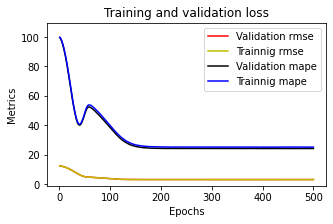

In [33]:
plotme(model1_6)

In [34]:
# inputs: distance
model1_7 = nnmodel(3, num_hlayers=1,Epoch=500)
model1_7

Epoch 1/500
416/416 [==============================] - 1s 902us/step - loss: 558260.2500 - mape: 99.9198 - rmse: 747.1682 - val_loss: 563837.1875 - val_mape: 99.8026 - val_rmse: 750.8909
Epoch 2/500
416/416 [==============================] - 0s 740us/step - loss: 556255.8125 - mape: 99.6083 - rmse: 745.8256 - val_loss: 561107.4375 - val_mape: 99.3849 - val_rmse: 749.0710
Epoch 3/500
416/416 [==============================] - 0s 824us/step - loss: 552914.5625 - mape: 99.0847 - rmse: 743.5823 - val_loss: 557150.0000 - val_mape: 98.7819 - val_rmse: 746.4248
Epoch 4/500
416/416 [==============================] - 0s 754us/step - loss: 548440.8125 - mape: 98.3894 - rmse: 740.5679 - val_loss: 552127.4375 - val_mape: 98.0156 - val_rmse: 743.0528
Epoch 5/500
416/416 [==============================] - 0s 705us/step - loss: 542966.1250 - mape: 97.5501 - rmse: 736.8624 - val_loss: 546159.0625 - val_mape: 97.1019 - val_rmse: 739.0258
Epoch 6/500
416/416 [==============================] - 0s 726us/s

Epoch 45/500
416/416 [==============================] - 0s 719us/step - loss: 120003.4609 - mape: 43.0970 - rmse: 346.4152 - val_loss: 119469.1875 - val_mape: 42.4451 - val_rmse: 345.6432
Epoch 46/500
416/416 [==============================] - 0s 725us/step - loss: 114558.2031 - mape: 43.9542 - rmse: 338.4645 - val_loss: 114196.5547 - val_mape: 43.3117 - val_rmse: 337.9298
Epoch 47/500
416/416 [==============================] - 0s 711us/step - loss: 109731.0625 - mape: 44.9148 - rmse: 331.2568 - val_loss: 109564.2266 - val_mape: 44.2749 - val_rmse: 331.0049
Epoch 48/500
416/416 [==============================] - 0s 679us/step - loss: 105511.6328 - mape: 45.9812 - rmse: 324.8255 - val_loss: 105520.1875 - val_mape: 45.3178 - val_rmse: 324.8387
Epoch 49/500
416/416 [==============================] - 0s 715us/step - loss: 101889.8828 - mape: 47.1124 - rmse: 319.2019 - val_loss: 102054.1094 - val_mape: 46.4261 - val_rmse: 319.4591
Epoch 50/500
416/416 [==============================] - 0s 7

Epoch 89/500
416/416 [==============================] - 0s 756us/step - loss: 61015.0508 - mape: 45.1795 - rmse: 247.0123 - val_loss: 61539.5117 - val_mape: 43.6632 - val_rmse: 248.0716
Epoch 90/500
416/416 [==============================] - 0s 742us/step - loss: 60238.0625 - mape: 44.7734 - rmse: 245.4344 - val_loss: 60761.6172 - val_mape: 43.2846 - val_rmse: 246.4987
Epoch 91/500
416/416 [==============================] - 0s 685us/step - loss: 59466.2617 - mape: 44.3379 - rmse: 243.8571 - val_loss: 59983.0039 - val_mape: 42.9411 - val_rmse: 244.9143
Epoch 92/500
416/416 [==============================] - 0s 676us/step - loss: 58704.4141 - mape: 44.0423 - rmse: 242.2899 - val_loss: 59225.9258 - val_mape: 42.5251 - val_rmse: 243.3638
Epoch 93/500
416/416 [==============================] - 0s 701us/step - loss: 57951.1719 - mape: 43.6060 - rmse: 240.7305 - val_loss: 58470.9648 - val_mape: 42.1395 - val_rmse: 241.8077
Epoch 94/500
416/416 [==============================] - 0s 703us/step 

Epoch 133/500
416/416 [==============================] - 0s 716us/step - loss: 39198.9766 - mape: 29.7264 - rmse: 197.9873 - val_loss: 39836.4062 - val_mape: 28.4841 - val_rmse: 199.5906
Epoch 134/500
416/416 [==============================] - 0s 711us/step - loss: 39046.3672 - mape: 29.4931 - rmse: 197.6015 - val_loss: 39685.9531 - val_mape: 28.2807 - val_rmse: 199.2133
Epoch 135/500
416/416 [==============================] - 0s 710us/step - loss: 38902.8594 - mape: 29.3419 - rmse: 197.2381 - val_loss: 39549.3906 - val_mape: 28.0493 - val_rmse: 198.8703
Epoch 136/500
416/416 [==============================] - 0s 707us/step - loss: 38771.1289 - mape: 29.0948 - rmse: 196.9039 - val_loss: 39418.3711 - val_mape: 27.8652 - val_rmse: 198.5406
Epoch 137/500
416/416 [==============================] - 0s 713us/step - loss: 38647.5898 - mape: 28.9101 - rmse: 196.5899 - val_loss: 39293.8281 - val_mape: 27.6851 - val_rmse: 198.2267
Epoch 138/500
416/416 [==============================] - 0s 715us

Epoch 177/500
416/416 [==============================] - 0s 681us/step - loss: 37368.6602 - mape: 25.6919 - rmse: 193.3098 - val_loss: 38012.3750 - val_mape: 24.6969 - val_rmse: 194.9676
Epoch 178/500
416/416 [==============================] - 0s 689us/step - loss: 37366.8555 - mape: 25.6640 - rmse: 193.3051 - val_loss: 38011.6602 - val_mape: 24.6663 - val_rmse: 194.9658
Epoch 179/500
416/416 [==============================] - 0s 703us/step - loss: 37364.7969 - mape: 25.6633 - rmse: 193.2998 - val_loss: 38007.2891 - val_mape: 24.6606 - val_rmse: 194.9546
Epoch 180/500
416/416 [==============================] - 0s 709us/step - loss: 37363.2383 - mape: 25.6157 - rmse: 193.2957 - val_loss: 38005.8125 - val_mape: 24.6391 - val_rmse: 194.9508
Epoch 181/500
416/416 [==============================] - 0s 693us/step - loss: 37361.2695 - mape: 25.6332 - rmse: 193.2906 - val_loss: 38003.0547 - val_mape: 24.6276 - val_rmse: 194.9437
Epoch 182/500
416/416 [==============================] - 0s 705us

Epoch 221/500
416/416 [==============================] - 0s 682us/step - loss: 37347.2344 - mape: 25.3432 - rmse: 193.2543 - val_loss: 37987.6445 - val_mape: 24.3320 - val_rmse: 194.9042
Epoch 222/500
416/416 [==============================] - 0s 672us/step - loss: 37346.6875 - mape: 25.3185 - rmse: 193.2529 - val_loss: 37986.4062 - val_mape: 24.3378 - val_rmse: 194.9010
Epoch 223/500
416/416 [==============================] - 0s 720us/step - loss: 37347.0156 - mape: 25.3527 - rmse: 193.2538 - val_loss: 37987.8633 - val_mape: 24.3260 - val_rmse: 194.9048
Epoch 224/500
416/416 [==============================] - 0s 681us/step - loss: 37348.1172 - mape: 25.3278 - rmse: 193.2566 - val_loss: 37985.6406 - val_mape: 24.3373 - val_rmse: 194.8990
Epoch 225/500
416/416 [==============================] - 0s 724us/step - loss: 37347.0703 - mape: 25.3019 - rmse: 193.2539 - val_loss: 37986.2109 - val_mape: 24.3354 - val_rmse: 194.9005
Epoch 226/500
416/416 [==============================] - 0s 725us

Epoch 265/500
416/416 [==============================] - 0s 680us/step - loss: 37346.9805 - mape: 25.3126 - rmse: 193.2537 - val_loss: 37986.9609 - val_mape: 24.2995 - val_rmse: 194.9024
Epoch 266/500
416/416 [==============================] - 0s 708us/step - loss: 37347.2383 - mape: 25.3008 - rmse: 193.2543 - val_loss: 37987.8711 - val_mape: 24.2921 - val_rmse: 194.9048
Epoch 267/500
416/416 [==============================] - 0s 671us/step - loss: 37346.9375 - mape: 25.2810 - rmse: 193.2536 - val_loss: 37987.8828 - val_mape: 24.2918 - val_rmse: 194.9048
Epoch 268/500
416/416 [==============================] - 0s 671us/step - loss: 37347.3828 - mape: 25.2882 - rmse: 193.2547 - val_loss: 37990.5469 - val_mape: 24.2726 - val_rmse: 194.9116
Epoch 269/500
416/416 [==============================] - 0s 719us/step - loss: 37347.9219 - mape: 25.2767 - rmse: 193.2561 - val_loss: 37984.9102 - val_mape: 24.3140 - val_rmse: 194.8972
Epoch 270/500
416/416 [==============================] - 0s 703us

Epoch 309/500
416/416 [==============================] - 0s 708us/step - loss: 37346.8789 - mape: 25.2781 - rmse: 193.2534 - val_loss: 37984.6328 - val_mape: 24.3138 - val_rmse: 194.8965
Epoch 310/500
416/416 [==============================] - 0s 665us/step - loss: 37347.3594 - mape: 25.2594 - rmse: 193.2547 - val_loss: 37981.7617 - val_mape: 24.3344 - val_rmse: 194.8891
Epoch 311/500
416/416 [==============================] - 0s 715us/step - loss: 37347.5625 - mape: 25.3164 - rmse: 193.2552 - val_loss: 37982.4883 - val_mape: 24.3290 - val_rmse: 194.8910
Epoch 312/500
416/416 [==============================] - 0s 668us/step - loss: 37347.0586 - mape: 25.3171 - rmse: 193.2539 - val_loss: 37987.0547 - val_mape: 24.2976 - val_rmse: 194.9027
Epoch 313/500
416/416 [==============================] - 0s 682us/step - loss: 37347.5078 - mape: 25.2839 - rmse: 193.2550 - val_loss: 37985.0859 - val_mape: 24.3112 - val_rmse: 194.8976
Epoch 314/500
416/416 [==============================] - 0s 693us

Epoch 353/500
416/416 [==============================] - 0s 682us/step - loss: 37346.4062 - mape: 25.3275 - rmse: 193.2522 - val_loss: 37987.3164 - val_mape: 24.2951 - val_rmse: 194.9034
Epoch 354/500
416/416 [==============================] - 0s 688us/step - loss: 37347.2266 - mape: 25.3017 - rmse: 193.2543 - val_loss: 37985.6406 - val_mape: 24.3055 - val_rmse: 194.8990
Epoch 355/500
416/416 [==============================] - 0s 655us/step - loss: 37346.5312 - mape: 25.2680 - rmse: 193.2525 - val_loss: 37985.3555 - val_mape: 24.3099 - val_rmse: 194.8983
Epoch 356/500
416/416 [==============================] - 0s 721us/step - loss: 37347.4219 - mape: 25.2761 - rmse: 193.2548 - val_loss: 37982.1875 - val_mape: 24.3325 - val_rmse: 194.8902
Epoch 357/500
416/416 [==============================] - 0s 717us/step - loss: 37347.2344 - mape: 25.2855 - rmse: 193.2543 - val_loss: 37981.9883 - val_mape: 24.3343 - val_rmse: 194.8897
Epoch 358/500
416/416 [==============================] - 0s 720us

Epoch 397/500
416/416 [==============================] - 0s 661us/step - loss: 37347.2578 - mape: 25.3102 - rmse: 193.2544 - val_loss: 37987.0977 - val_mape: 24.2947 - val_rmse: 194.9028
Epoch 398/500
416/416 [==============================] - 0s 695us/step - loss: 37347.4336 - mape: 25.2816 - rmse: 193.2548 - val_loss: 37985.3711 - val_mape: 24.3056 - val_rmse: 194.8984
Epoch 399/500
416/416 [==============================] - 0s 727us/step - loss: 37347.1875 - mape: 25.2566 - rmse: 193.2542 - val_loss: 37986.0117 - val_mape: 24.3020 - val_rmse: 194.9000
Epoch 400/500
416/416 [==============================] - 0s 713us/step - loss: 37346.9336 - mape: 25.3001 - rmse: 193.2535 - val_loss: 37987.7812 - val_mape: 24.2921 - val_rmse: 194.9045
Epoch 401/500
416/416 [==============================] - 0s 693us/step - loss: 37347.0273 - mape: 25.2520 - rmse: 193.2538 - val_loss: 37981.7773 - val_mape: 24.3346 - val_rmse: 194.8891
Epoch 402/500
416/416 [==============================] - 0s 677us

Epoch 441/500
416/416 [==============================] - 0s 713us/step - loss: 37346.7578 - mape: 25.3256 - rmse: 193.2531 - val_loss: 37985.8867 - val_mape: 24.3026 - val_rmse: 194.8997
Epoch 442/500
416/416 [==============================] - 0s 717us/step - loss: 37347.1445 - mape: 25.2788 - rmse: 193.2541 - val_loss: 37987.3828 - val_mape: 24.2914 - val_rmse: 194.9035
Epoch 443/500
416/416 [==============================] - 0s 698us/step - loss: 37347.6914 - mape: 25.2624 - rmse: 193.2555 - val_loss: 37984.6484 - val_mape: 24.3125 - val_rmse: 194.8965
Epoch 444/500
416/416 [==============================] - 0s 703us/step - loss: 37346.7305 - mape: 25.2824 - rmse: 193.2530 - val_loss: 37984.7461 - val_mape: 24.3116 - val_rmse: 194.8968
Epoch 445/500
416/416 [==============================] - 0s 660us/step - loss: 37346.8828 - mape: 25.3196 - rmse: 193.2534 - val_loss: 37987.2070 - val_mape: 24.2936 - val_rmse: 194.9031
Epoch 446/500
416/416 [==============================] - 0s 717us

Epoch 485/500
416/416 [==============================] - 0s 701us/step - loss: 37346.8945 - mape: 25.2614 - rmse: 193.2534 - val_loss: 37986.6133 - val_mape: 24.2998 - val_rmse: 194.9016
Epoch 486/500
416/416 [==============================] - 0s 696us/step - loss: 37346.7461 - mape: 25.2667 - rmse: 193.2531 - val_loss: 37985.6562 - val_mape: 24.3073 - val_rmse: 194.8991
Epoch 487/500
416/416 [==============================] - 0s 724us/step - loss: 37346.5117 - mape: 25.2543 - rmse: 193.2525 - val_loss: 37981.8867 - val_mape: 24.3350 - val_rmse: 194.8894
Epoch 488/500
416/416 [==============================] - 0s 723us/step - loss: 37346.5664 - mape: 25.3251 - rmse: 193.2526 - val_loss: 37982.7461 - val_mape: 24.3277 - val_rmse: 194.8916
Epoch 489/500
416/416 [==============================] - 0s 691us/step - loss: 37346.2422 - mape: 25.2701 - rmse: 193.2518 - val_loss: 37983.4414 - val_mape: 24.3241 - val_rmse: 194.8934
Epoch 490/500
416/416 [==============================] - 0s 684us

# sub-problem 2:     ******* input: distance & hour *********

In [35]:
df1.shape

(16631, 14)

In [36]:
df1.head()

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0         1917           17  0.992498  0.816276    0.448560         0.524038   
1          766           20  0.344315  0.268660    0.727273         0.823529   
2          130           18  0.018713  0.016889    0.625000         0.714286   
3          551           15  0.349947  0.299087    0.662338         0.680000   
4          962           16  0.385289  0.341360    0.542553         0.573034   

  1st ranked    2nd ranked   3rd ranked  1st dist  2nd dist  3rd dist  \
0    primary  unclassified     tertiary  0.959841  0.024320  0.014853   
1    primary  unclassified     tertiary  0.737798  0.189798  0.042312   
2   tertiary   residential          NaN  0.633803  0.366197       NaN   
3    primary  unclassified  residential  0.726134  0.118816  0.113408   
4    primary  unclassified  residential  0.660599  0.217712  0.083805   

     hr_sin        hr_cos  
0 -0.965926 -2.588190e-01  
1 -0.866025  5.000000e-01  
2 -1.000000 -1.836970e-16  
3 -0.707107 -7.071068e-01  
4 -0.866025 -5.000000e-01

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


<AxesSubplot:>

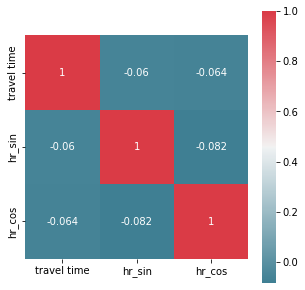

In [37]:
# run correlation matrix and plot
my_df = df1[['travel time','hr_sin','hr_cos']]
f, ax = plt.subplots(figsize=(5,5))
corr = my_df.corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

### cyclical encoding of hour

In [38]:
x = np.array(df1[['est_dist','hr_sin','hr_cos']])
y = np.array(df1['travel time'])
x

array([[ 8.16276476e-01, -9.65925826e-01, -2.58819045e-01],
       [ 2.68659643e-01, -8.66025404e-01,  5.00000000e-01],
       [ 1.68893019e-02, -1.00000000e+00, -1.83697020e-16],
       ...,
       [ 3.06443987e-01,  0.00000000e+00,  1.00000000e+00],
       [ 7.05875235e-03,  5.00000000e-01,  8.66025404e-01],
       [ 6.25970065e-01,  9.65925826e-01,  2.58819045e-01]])

In [39]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [40]:
print(X_train.shape)
print(X_test.shape)
# X_train

(13304, 3)
(3327, 3)


In [41]:
# inputs: distance + hour
model2_1 = nnmodel(20, num_hlayers=1,Epoch=500)
model2_1

Epoch 1/500
416/416 [==============================] - 1s 848us/step - loss: 555030.6875 - mape: 99.3886 - rmse: 745.0038 - val_loss: 554082.9375 - val_mape: 98.3021 - val_rmse: 744.3675
Epoch 2/500
416/416 [==============================] - 0s 766us/step - loss: 532872.6875 - mape: 96.0422 - rmse: 729.9813 - val_loss: 520568.6250 - val_mape: 93.2182 - val_rmse: 721.5044
Epoch 3/500
416/416 [==============================] - 0s 692us/step - loss: 490417.1875 - mape: 89.2856 - rmse: 700.2979 - val_loss: 470682.9688 - val_mape: 85.2275 - val_rmse: 686.0634
Epoch 4/500
416/416 [==============================] - 0s 676us/step - loss: 436461.6875 - mape: 80.3011 - rmse: 660.6525 - val_loss: 413562.0312 - val_mape: 75.7032 - val_rmse: 643.0879
Epoch 5/500
416/416 [==============================] - 0s 714us/step - loss: 378651.2812 - mape: 70.8634 - rmse: 615.3465 - val_loss: 355538.0000 - val_mape: 66.6580 - val_rmse: 596.2701
Epoch 6/500
416/416 [==============================] - 0s 750us/s

Epoch 45/500
416/416 [==============================] - 0s 693us/step - loss: 37221.4961 - mape: 25.4462 - rmse: 192.9287 - val_loss: 37719.4648 - val_mape: 24.1650 - val_rmse: 194.2150
Epoch 46/500
416/416 [==============================] - 0s 682us/step - loss: 37220.2422 - mape: 25.3370 - rmse: 192.9255 - val_loss: 37713.8398 - val_mape: 24.0994 - val_rmse: 194.2005
Epoch 47/500
416/416 [==============================] - 0s 691us/step - loss: 37216.6914 - mape: 25.2701 - rmse: 192.9163 - val_loss: 37663.5391 - val_mape: 24.2932 - val_rmse: 194.0710
Epoch 48/500
416/416 [==============================] - 0s 717us/step - loss: 37209.4844 - mape: 25.2760 - rmse: 192.8976 - val_loss: 37681.3867 - val_mape: 24.1323 - val_rmse: 194.1169
Epoch 49/500
416/416 [==============================] - 0s 731us/step - loss: 37210.6289 - mape: 25.2606 - rmse: 192.9006 - val_loss: 37686.8516 - val_mape: 24.0720 - val_rmse: 194.1310
Epoch 50/500
416/416 [==============================] - 0s 738us/step 

416/416 [==============================] - 0s 717us/step - loss: 37138.0508 - mape: 25.0858 - rmse: 192.7124 - val_loss: 37581.0664 - val_mape: 23.7108 - val_rmse: 193.8584
Epoch 90/500
416/416 [==============================] - 0s 672us/step - loss: 37142.0469 - mape: 24.9132 - rmse: 192.7227 - val_loss: 37508.0508 - val_mape: 24.0637 - val_rmse: 193.6700
Epoch 91/500
416/416 [==============================] - 0s 717us/step - loss: 37138.7656 - mape: 25.1222 - rmse: 192.7142 - val_loss: 37547.2734 - val_mape: 23.8338 - val_rmse: 193.7712
Epoch 92/500
416/416 [==============================] - 0s 721us/step - loss: 37138.2500 - mape: 24.9515 - rmse: 192.7129 - val_loss: 37502.8594 - val_mape: 24.0859 - val_rmse: 193.6566
Epoch 93/500
416/416 [==============================] - 0s 718us/step - loss: 37139.1602 - mape: 25.0928 - rmse: 192.7152 - val_loss: 37526.3594 - val_mape: 23.9370 - val_rmse: 193.7172
Epoch 94/500
416/416 [==============================] - 0s 727us/step - loss: 37130

Epoch 133/500
416/416 [==============================] - 0s 681us/step - loss: 37114.5742 - mape: 24.8590 - rmse: 192.6514 - val_loss: 37448.0664 - val_mape: 23.9905 - val_rmse: 193.5150
Epoch 134/500
416/416 [==============================] - 0s 716us/step - loss: 37114.1133 - mape: 24.9745 - rmse: 192.6502 - val_loss: 37458.5273 - val_mape: 23.8963 - val_rmse: 193.5421
Epoch 135/500
416/416 [==============================] - 0s 703us/step - loss: 37111.1641 - mape: 24.9954 - rmse: 192.6426 - val_loss: 37454.5781 - val_mape: 23.8870 - val_rmse: 193.5319
Epoch 136/500
416/416 [==============================] - 0s 704us/step - loss: 37113.0195 - mape: 24.9584 - rmse: 192.6474 - val_loss: 37474.5820 - val_mape: 23.7693 - val_rmse: 193.5835
Epoch 137/500
416/416 [==============================] - 0s 750us/step - loss: 37114.3906 - mape: 24.9565 - rmse: 192.6510 - val_loss: 37452.3320 - val_mape: 23.8805 - val_rmse: 193.5260
Epoch 138/500
416/416 [==============================] - 0s 701us

Epoch 177/500
416/416 [==============================] - 0s 697us/step - loss: 37023.1289 - mape: 24.8299 - rmse: 192.4140 - val_loss: 37346.4453 - val_mape: 23.5843 - val_rmse: 193.2523
Epoch 178/500
416/416 [==============================] - 0s 722us/step - loss: 37022.0742 - mape: 24.6832 - rmse: 192.4112 - val_loss: 37299.4102 - val_mape: 23.8839 - val_rmse: 193.1306
Epoch 179/500
416/416 [==============================] - 0s 696us/step - loss: 37029.6016 - mape: 24.8364 - rmse: 192.4308 - val_loss: 37319.1914 - val_mape: 23.7240 - val_rmse: 193.1818
Epoch 180/500
416/416 [==============================] - 0s 702us/step - loss: 37021.4258 - mape: 24.7200 - rmse: 192.4095 - val_loss: 37307.6484 - val_mape: 23.7975 - val_rmse: 193.1519
Epoch 181/500
416/416 [==============================] - 0s 748us/step - loss: 37014.5898 - mape: 24.8404 - rmse: 192.3918 - val_loss: 37321.0859 - val_mape: 23.6524 - val_rmse: 193.1867
Epoch 182/500
416/416 [==============================] - 0s 685us

Epoch 221/500
416/416 [==============================] - 0s 716us/step - loss: 36988.0352 - mape: 24.5956 - rmse: 192.3227 - val_loss: 37292.5000 - val_mape: 23.5254 - val_rmse: 193.1127
Epoch 222/500
416/416 [==============================] - 0s 704us/step - loss: 36985.8359 - mape: 24.6254 - rmse: 192.3170 - val_loss: 37275.2578 - val_mape: 23.6356 - val_rmse: 193.0680
Epoch 223/500
416/416 [==============================] - 0s 733us/step - loss: 36980.7148 - mape: 24.5631 - rmse: 192.3037 - val_loss: 37262.2148 - val_mape: 23.7838 - val_rmse: 193.0342
Epoch 224/500
416/416 [==============================] - 0s 708us/step - loss: 36982.7070 - mape: 24.7241 - rmse: 192.3089 - val_loss: 37279.4414 - val_mape: 23.5751 - val_rmse: 193.0788
Epoch 225/500
416/416 [==============================] - 0s 687us/step - loss: 36983.0078 - mape: 24.6372 - rmse: 192.3097 - val_loss: 37286.2734 - val_mape: 23.5286 - val_rmse: 193.0965
Epoch 226/500
416/416 [==============================] - 0s 748us

Epoch 265/500
416/416 [==============================] - 0s 703us/step - loss: 36974.8438 - mape: 24.5958 - rmse: 192.2884 - val_loss: 37262.5625 - val_mape: 23.6299 - val_rmse: 193.0351
Epoch 266/500
416/416 [==============================] - 0s 756us/step - loss: 36973.8984 - mape: 24.5472 - rmse: 192.2860 - val_loss: 37254.6914 - val_mape: 23.7568 - val_rmse: 193.0147
Epoch 267/500
416/416 [==============================] - 0s 714us/step - loss: 36977.7617 - mape: 24.6656 - rmse: 192.2960 - val_loss: 37294.8164 - val_mape: 23.4386 - val_rmse: 193.1187
Epoch 268/500
416/416 [==============================] - 0s 739us/step - loss: 36974.5156 - mape: 24.5089 - rmse: 192.2876 - val_loss: 37254.0195 - val_mape: 23.7218 - val_rmse: 193.0130
Epoch 269/500
416/416 [==============================] - 0s 727us/step - loss: 36976.8125 - mape: 24.6203 - rmse: 192.2936 - val_loss: 37280.0234 - val_mape: 23.5277 - val_rmse: 193.0804
Epoch 270/500
416/416 [==============================] - 0s 701us

Epoch 309/500
416/416 [==============================] - 0s 726us/step - loss: 36975.3789 - mape: 24.5246 - rmse: 192.2898 - val_loss: 37266.4375 - val_mape: 23.6249 - val_rmse: 193.0452
Epoch 310/500
416/416 [==============================] - 0s 714us/step - loss: 36972.5859 - mape: 24.6592 - rmse: 192.2826 - val_loss: 37295.7148 - val_mape: 23.4345 - val_rmse: 193.1210
Epoch 311/500
416/416 [==============================] - 0s 728us/step - loss: 36971.9414 - mape: 24.5184 - rmse: 192.2809 - val_loss: 37280.9531 - val_mape: 23.5166 - val_rmse: 193.0828
Epoch 312/500
416/416 [==============================] - 0s 723us/step - loss: 36971.7266 - mape: 24.5904 - rmse: 192.2803 - val_loss: 37288.7070 - val_mape: 23.4849 - val_rmse: 193.1028
Epoch 313/500
416/416 [==============================] - 0s 708us/step - loss: 36965.8711 - mape: 24.4676 - rmse: 192.2651 - val_loss: 37260.9570 - val_mape: 23.7108 - val_rmse: 193.0310
Epoch 314/500
416/416 [==============================] - 0s 727us

Epoch 353/500
416/416 [==============================] - 0s 807us/step - loss: 36964.0547 - mape: 24.6764 - rmse: 192.2604 - val_loss: 37316.4961 - val_mape: 23.3677 - val_rmse: 193.1748
Epoch 354/500
416/416 [==============================] - 0s 734us/step - loss: 36969.1172 - mape: 24.5389 - rmse: 192.2735 - val_loss: 37298.3438 - val_mape: 23.4479 - val_rmse: 193.1278
Epoch 355/500
416/416 [==============================] - 0s 756us/step - loss: 36967.5742 - mape: 24.4839 - rmse: 192.2695 - val_loss: 37270.9961 - val_mape: 23.6918 - val_rmse: 193.0570
Epoch 356/500
416/416 [==============================] - 0s 710us/step - loss: 36973.7109 - mape: 24.5408 - rmse: 192.2855 - val_loss: 37272.9961 - val_mape: 23.6852 - val_rmse: 193.0621
Epoch 357/500
416/416 [==============================] - 0s 730us/step - loss: 36968.4102 - mape: 24.6495 - rmse: 192.2717 - val_loss: 37308.5586 - val_mape: 23.4118 - val_rmse: 193.1542
Epoch 358/500
416/416 [==============================] - 0s 797us

Epoch 397/500
416/416 [==============================] - 0s 784us/step - loss: 36968.1602 - mape: 24.5394 - rmse: 192.2711 - val_loss: 37291.3320 - val_mape: 23.5114 - val_rmse: 193.1096
Epoch 398/500
416/416 [==============================] - 0s 714us/step - loss: 36968.9102 - mape: 24.5900 - rmse: 192.2730 - val_loss: 37303.2461 - val_mape: 23.4263 - val_rmse: 193.1405
Epoch 399/500
416/416 [==============================] - 0s 703us/step - loss: 36968.2852 - mape: 24.5656 - rmse: 192.2714 - val_loss: 37304.5547 - val_mape: 23.4356 - val_rmse: 193.1439
Epoch 400/500
416/416 [==============================] - 0s 718us/step - loss: 36959.0820 - mape: 24.6187 - rmse: 192.2475 - val_loss: 37355.9180 - val_mape: 23.2194 - val_rmse: 193.2768
Epoch 401/500
416/416 [==============================] - 0s 767us/step - loss: 36968.7461 - mape: 24.5048 - rmse: 192.2726 - val_loss: 37326.4648 - val_mape: 23.3721 - val_rmse: 193.2006
Epoch 402/500
416/416 [==============================] - 0s 721us

Epoch 441/500
416/416 [==============================] - 0s 730us/step - loss: 36960.6367 - mape: 24.4908 - rmse: 192.2515 - val_loss: 37285.7695 - val_mape: 23.5985 - val_rmse: 193.0952
Epoch 442/500
416/416 [==============================] - 0s 783us/step - loss: 36959.9180 - mape: 24.6085 - rmse: 192.2496 - val_loss: 37309.6133 - val_mape: 23.4577 - val_rmse: 193.1570
Epoch 443/500
416/416 [==============================] - 0s 723us/step - loss: 36963.4844 - mape: 24.5601 - rmse: 192.2589 - val_loss: 37300.0859 - val_mape: 23.4860 - val_rmse: 193.1323
Epoch 444/500
416/416 [==============================] - 0s 756us/step - loss: 36956.8398 - mape: 24.5924 - rmse: 192.2416 - val_loss: 37341.4453 - val_mape: 23.2879 - val_rmse: 193.2393
Epoch 445/500
416/416 [==============================] - 0s 718us/step - loss: 36961.8555 - mape: 24.5229 - rmse: 192.2547 - val_loss: 37316.8203 - val_mape: 23.4075 - val_rmse: 193.1756
Epoch 446/500
416/416 [==============================] - 0s 696us

Epoch 485/500
416/416 [==============================] - 0s 733us/step - loss: 36954.8203 - mape: 24.4902 - rmse: 192.2364 - val_loss: 37276.5078 - val_mape: 23.6987 - val_rmse: 193.0712
Epoch 486/500
416/416 [==============================] - 0s 741us/step - loss: 36956.9922 - mape: 24.6505 - rmse: 192.2420 - val_loss: 37311.8164 - val_mape: 23.4014 - val_rmse: 193.1627
Epoch 487/500
416/416 [==============================] - 0s 719us/step - loss: 36957.4453 - mape: 24.5249 - rmse: 192.2432 - val_loss: 37321.1484 - val_mape: 23.3836 - val_rmse: 193.1868
Epoch 488/500
416/416 [==============================] - 0s 746us/step - loss: 36955.5273 - mape: 24.5172 - rmse: 192.2382 - val_loss: 37307.8555 - val_mape: 23.4558 - val_rmse: 193.1524
Epoch 489/500
416/416 [==============================] - 0s 725us/step - loss: 36957.9922 - mape: 24.4674 - rmse: 192.2446 - val_loss: 37295.5078 - val_mape: 23.5476 - val_rmse: 193.1205
Epoch 490/500
416/416 [==============================] - 0s 737us

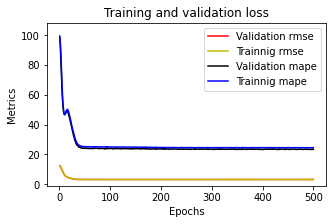

In [42]:
plotme(model2_1)

In [43]:
# inputs: distance + hour
model2_2 = nnmodel(50, num_hlayers=1,Epoch=1000)
model2_2

Epoch 1/1000
416/416 [==============================] - 1s 866us/step - loss: 551698.8750 - mape: 98.9155 - rmse: 742.7643 - val_loss: 543216.0625 - val_mape: 96.7020 - val_rmse: 737.0319
Epoch 2/1000
416/416 [==============================] - 0s 725us/step - loss: 506756.5312 - mape: 91.9646 - rmse: 711.8683 - val_loss: 476755.7500 - val_mape: 86.2624 - val_rmse: 690.4750
Epoch 3/1000
416/416 [==============================] - 0s 723us/step - loss: 427903.1562 - mape: 78.8852 - rmse: 654.1431 - val_loss: 389459.2500 - val_mape: 71.6684 - val_rmse: 624.0667
Epoch 4/1000
416/416 [==============================] - 0s 735us/step - loss: 340076.4062 - mape: 64.7634 - rmse: 583.1607 - val_loss: 303238.4062 - val_mape: 58.7426 - val_rmse: 550.6709
Epoch 5/1000
416/416 [==============================] - 0s 737us/step - loss: 260449.8594 - mape: 54.2174 - rmse: 510.3429 - val_loss: 230559.4375 - val_mape: 50.3941 - val_rmse: 480.1660
Epoch 6/1000
416/416 [==============================] - 0s 7

Epoch 45/1000
416/416 [==============================] - 0s 762us/step - loss: 37190.4648 - mape: 25.0964 - rmse: 192.8483 - val_loss: 37587.2773 - val_mape: 24.0736 - val_rmse: 193.8744
Epoch 46/1000
416/416 [==============================] - 0s 749us/step - loss: 37183.0000 - mape: 25.1463 - rmse: 192.8289 - val_loss: 37566.3008 - val_mape: 24.1895 - val_rmse: 193.8203
Epoch 47/1000
416/416 [==============================] - 0s 724us/step - loss: 37188.3398 - mape: 25.0689 - rmse: 192.8428 - val_loss: 37556.4492 - val_mape: 24.2677 - val_rmse: 193.7949
Epoch 48/1000
416/416 [==============================] - 0s 743us/step - loss: 37183.7031 - mape: 25.1667 - rmse: 192.8308 - val_loss: 37560.5781 - val_mape: 24.0912 - val_rmse: 193.8055
Epoch 49/1000
416/416 [==============================] - 0s 775us/step - loss: 37178.5352 - mape: 25.0993 - rmse: 192.8174 - val_loss: 37555.3047 - val_mape: 24.1259 - val_rmse: 193.7919
Epoch 50/1000
416/416 [==============================] - 0s 738us

Epoch 89/1000
416/416 [==============================] - 0s 718us/step - loss: 37124.0625 - mape: 24.9467 - rmse: 192.6761 - val_loss: 37427.0352 - val_mape: 24.0562 - val_rmse: 193.4607
Epoch 90/1000
416/416 [==============================] - 0s 756us/step - loss: 37119.3984 - mape: 24.9768 - rmse: 192.6640 - val_loss: 37412.9766 - val_mape: 24.0868 - val_rmse: 193.4243
Epoch 91/1000
416/416 [==============================] - 0s 748us/step - loss: 37121.7461 - mape: 24.9487 - rmse: 192.6700 - val_loss: 37417.0430 - val_mape: 24.1180 - val_rmse: 193.4349
Epoch 92/1000
416/416 [==============================] - 0s 757us/step - loss: 37120.8555 - mape: 25.0186 - rmse: 192.6677 - val_loss: 37450.8438 - val_mape: 23.8235 - val_rmse: 193.5222
Epoch 93/1000
416/416 [==============================] - 0s 735us/step - loss: 37117.5820 - mape: 24.9541 - rmse: 192.6592 - val_loss: 37438.0391 - val_mape: 23.8810 - val_rmse: 193.4891
Epoch 94/1000
416/416 [==============================] - 0s 723us

Epoch 133/1000
416/416 [==============================] - 0s 735us/step - loss: 37022.3320 - mape: 24.8247 - rmse: 192.4119 - val_loss: 37291.2852 - val_mape: 23.8429 - val_rmse: 193.1095
Epoch 134/1000
416/416 [==============================] - 0s 713us/step - loss: 37014.8008 - mape: 24.7414 - rmse: 192.3923 - val_loss: 37287.2969 - val_mape: 23.7924 - val_rmse: 193.0992
Epoch 135/1000
416/416 [==============================] - 0s 778us/step - loss: 37007.4766 - mape: 24.7369 - rmse: 192.3733 - val_loss: 37290.3594 - val_mape: 23.8488 - val_rmse: 193.1071
Epoch 136/1000
416/416 [==============================] - 0s 698us/step - loss: 37013.4375 - mape: 24.7841 - rmse: 192.3888 - val_loss: 37283.2344 - val_mape: 23.8549 - val_rmse: 193.0887
Epoch 137/1000
416/416 [==============================] - 0s 773us/step - loss: 37005.5078 - mape: 24.8387 - rmse: 192.3682 - val_loss: 37319.5156 - val_mape: 23.5037 - val_rmse: 193.1826
Epoch 138/1000
416/416 [==============================] - 0s

Epoch 220/1000
416/416 [==============================] - 0s 749us/step - loss: 36966.7656 - mape: 24.5624 - rmse: 192.2674 - val_loss: 37232.5273 - val_mape: 23.7859 - val_rmse: 192.9573
Epoch 221/1000
416/416 [==============================] - 0s 724us/step - loss: 36963.0156 - mape: 24.6588 - rmse: 192.2577 - val_loss: 37255.5273 - val_mape: 23.4719 - val_rmse: 193.0169
Epoch 222/1000
416/416 [==============================] - 0s 736us/step - loss: 36965.8359 - mape: 24.5280 - rmse: 192.2650 - val_loss: 37252.6992 - val_mape: 23.5324 - val_rmse: 193.0096
Epoch 223/1000
416/416 [==============================] - 0s 722us/step - loss: 36962.0703 - mape: 24.5674 - rmse: 192.2552 - val_loss: 37218.2031 - val_mape: 23.8424 - val_rmse: 192.9202
Epoch 224/1000
416/416 [==============================] - 0s 705us/step - loss: 36967.6953 - mape: 24.6720 - rmse: 192.2699 - val_loss: 37255.4180 - val_mape: 23.5104 - val_rmse: 193.0166
Epoch 225/1000
416/416 [==============================] - 0s

Epoch 307/1000
416/416 [==============================] - 0s 764us/step - loss: 36961.7266 - mape: 24.5392 - rmse: 192.2543 - val_loss: 37222.8125 - val_mape: 23.7386 - val_rmse: 192.9321
Epoch 308/1000
416/416 [==============================] - 0s 753us/step - loss: 36960.1719 - mape: 24.6885 - rmse: 192.2503 - val_loss: 37287.1602 - val_mape: 23.3119 - val_rmse: 193.0988
Epoch 309/1000
416/416 [==============================] - 0s 744us/step - loss: 36964.4336 - mape: 24.5460 - rmse: 192.2614 - val_loss: 37238.6289 - val_mape: 23.5148 - val_rmse: 192.9731
Epoch 310/1000
416/416 [==============================] - 0s 750us/step - loss: 36964.1211 - mape: 24.4986 - rmse: 192.2606 - val_loss: 37240.3008 - val_mape: 23.5428 - val_rmse: 192.9775
Epoch 311/1000
416/416 [==============================] - 0s 721us/step - loss: 36953.8203 - mape: 24.5622 - rmse: 192.2338 - val_loss: 37218.6016 - val_mape: 23.7906 - val_rmse: 192.9212
Epoch 312/1000
416/416 [==============================] - 0s

Epoch 394/1000
416/416 [==============================] - 0s 705us/step - loss: 36962.6445 - mape: 24.5567 - rmse: 192.2567 - val_loss: 37239.2500 - val_mape: 23.5024 - val_rmse: 192.9747
Epoch 395/1000
416/416 [==============================] - 0s 763us/step - loss: 36962.7617 - mape: 24.5391 - rmse: 192.2570 - val_loss: 37244.0938 - val_mape: 23.5025 - val_rmse: 192.9873
Epoch 396/1000
416/416 [==============================] - 0s 727us/step - loss: 36959.2305 - mape: 24.5801 - rmse: 192.2478 - val_loss: 37246.2188 - val_mape: 23.4838 - val_rmse: 192.9928
Epoch 397/1000
416/416 [==============================] - 0s 729us/step - loss: 36956.3164 - mape: 24.4849 - rmse: 192.2402 - val_loss: 37234.1484 - val_mape: 23.6380 - val_rmse: 192.9615
Epoch 398/1000
416/416 [==============================] - 0s 748us/step - loss: 36962.9883 - mape: 24.5976 - rmse: 192.2576 - val_loss: 37227.0938 - val_mape: 23.6044 - val_rmse: 192.9432
Epoch 399/1000
416/416 [==============================] - 0s

Epoch 481/1000
416/416 [==============================] - 0s 729us/step - loss: 36952.0195 - mape: 24.6394 - rmse: 192.2291 - val_loss: 37301.4062 - val_mape: 23.2234 - val_rmse: 193.1357
Epoch 482/1000
416/416 [==============================] - 0s 768us/step - loss: 36959.9805 - mape: 24.4727 - rmse: 192.2498 - val_loss: 37228.4609 - val_mape: 23.5425 - val_rmse: 192.9468
Epoch 483/1000
416/416 [==============================] - 0s 757us/step - loss: 36951.8242 - mape: 24.5912 - rmse: 192.2286 - val_loss: 37307.3398 - val_mape: 23.2440 - val_rmse: 193.1511
Epoch 484/1000
416/416 [==============================] - 0s 731us/step - loss: 36959.4570 - mape: 24.5483 - rmse: 192.2484 - val_loss: 37282.2188 - val_mape: 23.3038 - val_rmse: 193.0860
Epoch 485/1000
416/416 [==============================] - 0s 724us/step - loss: 36964.7617 - mape: 24.5307 - rmse: 192.2622 - val_loss: 37262.9727 - val_mape: 23.3279 - val_rmse: 193.0362
Epoch 486/1000
416/416 [==============================] - 0s

Epoch 568/1000
416/416 [==============================] - 0s 726us/step - loss: 36962.4570 - mape: 24.5220 - rmse: 192.2562 - val_loss: 37241.1836 - val_mape: 23.4818 - val_rmse: 192.9798
Epoch 569/1000
416/416 [==============================] - 0s 705us/step - loss: 36961.1094 - mape: 24.4871 - rmse: 192.2527 - val_loss: 37208.8672 - val_mape: 23.7712 - val_rmse: 192.8960
Epoch 570/1000
416/416 [==============================] - 0s 759us/step - loss: 36961.7617 - mape: 24.5547 - rmse: 192.2544 - val_loss: 37226.9336 - val_mape: 23.6012 - val_rmse: 192.9428
Epoch 571/1000
416/416 [==============================] - 0s 720us/step - loss: 36963.6016 - mape: 24.5577 - rmse: 192.2592 - val_loss: 37243.7695 - val_mape: 23.4933 - val_rmse: 192.9865
Epoch 572/1000
416/416 [==============================] - 0s 745us/step - loss: 36959.0508 - mape: 24.4799 - rmse: 192.2474 - val_loss: 37210.0781 - val_mape: 23.7612 - val_rmse: 192.8991
Epoch 573/1000
416/416 [==============================] - 0s

Epoch 655/1000
416/416 [==============================] - 0s 727us/step - loss: 36959.7578 - mape: 24.5220 - rmse: 192.2492 - val_loss: 37237.2188 - val_mape: 23.4947 - val_rmse: 192.9695
Epoch 656/1000
416/416 [==============================] - 0s 723us/step - loss: 36955.8867 - mape: 24.5540 - rmse: 192.2391 - val_loss: 37244.3086 - val_mape: 23.4388 - val_rmse: 192.9878
Epoch 657/1000
416/416 [==============================] - 0s 725us/step - loss: 36953.3867 - mape: 24.5811 - rmse: 192.2326 - val_loss: 37292.8828 - val_mape: 23.2080 - val_rmse: 193.1136
Epoch 658/1000
416/416 [==============================] - 0s 753us/step - loss: 36966.3555 - mape: 24.4816 - rmse: 192.2664 - val_loss: 37235.4180 - val_mape: 23.4933 - val_rmse: 192.9648
Epoch 659/1000
416/416 [==============================] - 0s 747us/step - loss: 36960.3047 - mape: 24.5807 - rmse: 192.2506 - val_loss: 37236.6680 - val_mape: 23.4897 - val_rmse: 192.9680
Epoch 660/1000
416/416 [==============================] - 0s

Epoch 742/1000
416/416 [==============================] - 0s 718us/step - loss: 36960.8047 - mape: 24.5269 - rmse: 192.2519 - val_loss: 37247.7461 - val_mape: 23.4570 - val_rmse: 192.9967
Epoch 743/1000
416/416 [==============================] - 0s 726us/step - loss: 36960.0820 - mape: 24.5436 - rmse: 192.2500 - val_loss: 37250.5859 - val_mape: 23.4224 - val_rmse: 193.0041
Epoch 744/1000
416/416 [==============================] - 0s 747us/step - loss: 36963.4258 - mape: 24.5181 - rmse: 192.2587 - val_loss: 37230.4141 - val_mape: 23.5188 - val_rmse: 192.9518
Epoch 745/1000
416/416 [==============================] - 0s 733us/step - loss: 36958.6328 - mape: 24.5457 - rmse: 192.2463 - val_loss: 37242.4102 - val_mape: 23.4553 - val_rmse: 192.9829
Epoch 746/1000
416/416 [==============================] - 0s 720us/step - loss: 36960.7305 - mape: 24.5441 - rmse: 192.2517 - val_loss: 37253.4414 - val_mape: 23.3514 - val_rmse: 193.0115
Epoch 747/1000
416/416 [==============================] - 0s

Epoch 829/1000
416/416 [==============================] - 0s 707us/step - loss: 36958.2617 - mape: 24.4986 - rmse: 192.2453 - val_loss: 37214.2266 - val_mape: 23.6660 - val_rmse: 192.9099
Epoch 830/1000
416/416 [==============================] - 0s 750us/step - loss: 36947.5273 - mape: 24.6538 - rmse: 192.2174 - val_loss: 37320.7969 - val_mape: 23.1225 - val_rmse: 193.1859
Epoch 831/1000
416/416 [==============================] - 0s 722us/step - loss: 36963.0000 - mape: 24.4892 - rmse: 192.2576 - val_loss: 37259.8125 - val_mape: 23.3726 - val_rmse: 193.0280
Epoch 832/1000
416/416 [==============================] - 0s 760us/step - loss: 36967.0898 - mape: 24.5550 - rmse: 192.2683 - val_loss: 37256.1914 - val_mape: 23.3341 - val_rmse: 193.0186
Epoch 833/1000
416/416 [==============================] - 0s 730us/step - loss: 36959.2070 - mape: 24.5163 - rmse: 192.2478 - val_loss: 37279.1797 - val_mape: 23.2436 - val_rmse: 193.0782
Epoch 834/1000
416/416 [==============================] - 0s

Epoch 916/1000
416/416 [==============================] - 0s 743us/step - loss: 36953.9375 - mape: 24.4257 - rmse: 192.2341 - val_loss: 37218.2773 - val_mape: 23.7063 - val_rmse: 192.9204
Epoch 917/1000
416/416 [==============================] - 0s 741us/step - loss: 36964.0703 - mape: 24.6244 - rmse: 192.2604 - val_loss: 37243.8477 - val_mape: 23.4264 - val_rmse: 192.9866
Epoch 918/1000
416/416 [==============================] - 0s 733us/step - loss: 36957.3477 - mape: 24.5697 - rmse: 192.2429 - val_loss: 37261.2383 - val_mape: 23.3296 - val_rmse: 193.0317
Epoch 919/1000
416/416 [==============================] - 0s 724us/step - loss: 36968.7148 - mape: 24.4982 - rmse: 192.2725 - val_loss: 37277.0508 - val_mape: 23.2889 - val_rmse: 193.0727
Epoch 920/1000
416/416 [==============================] - 0s 723us/step - loss: 36956.4414 - mape: 24.4739 - rmse: 192.2406 - val_loss: 37224.3633 - val_mape: 23.5779 - val_rmse: 192.9362
Epoch 921/1000
416/416 [==============================] - 0s

In [44]:
# plotme(model2_2)

In [45]:
# inputs: distance + hour
model2_3 = nnmodel(100, num_hlayers=1,Epoch=500)
model2_3

Epoch 1/500
416/416 [==============================] - 1s 966us/step - loss: 544253.7500 - mape: 97.7535 - rmse: 737.7355 - val_loss: 519629.0000 - val_mape: 93.1024 - val_rmse: 720.8530
Epoch 2/500
416/416 [==============================] - 0s 870us/step - loss: 456080.8125 - mape: 83.6513 - rmse: 675.3375 - val_loss: 398132.0312 - val_mape: 73.1199 - val_rmse: 630.9771
Epoch 3/500
416/416 [==============================] - 0s 830us/step - loss: 327912.2812 - mape: 63.2902 - rmse: 572.6362 - val_loss: 272285.6562 - val_mape: 54.7895 - val_rmse: 521.8100
Epoch 4/500
416/416 [==============================] - 0s 855us/step - loss: 218928.3750 - mape: 50.2107 - rmse: 467.8978 - val_loss: 181525.9688 - val_mape: 46.6970 - val_rmse: 426.0587
Epoch 5/500
416/416 [==============================] - 0s 871us/step - loss: 148599.1875 - mape: 46.0834 - rmse: 385.4857 - val_loss: 128308.5859 - val_mape: 45.7888 - val_rmse: 358.2019
Epoch 6/500
416/416 [==============================] - 0s 833us/s

416/416 [==============================] - 0s 836us/step - loss: 37148.9453 - mape: 25.0119 - rmse: 192.7406 - val_loss: 37468.6367 - val_mape: 24.0174 - val_rmse: 193.5682
Epoch 46/500
416/416 [==============================] - 0s 864us/step - loss: 37135.2812 - mape: 24.9936 - rmse: 192.7052 - val_loss: 37449.4297 - val_mape: 24.5943 - val_rmse: 193.5186
Epoch 47/500
416/416 [==============================] - 0s 821us/step - loss: 37157.1094 - mape: 25.0773 - rmse: 192.7618 - val_loss: 37453.3281 - val_mape: 24.0505 - val_rmse: 193.5286
Epoch 48/500
416/416 [==============================] - 0s 839us/step - loss: 37147.9023 - mape: 25.0576 - rmse: 192.7379 - val_loss: 37565.3711 - val_mape: 23.5793 - val_rmse: 193.8179
Epoch 49/500
416/416 [==============================] - 0s 832us/step - loss: 37144.1602 - mape: 25.0111 - rmse: 192.7282 - val_loss: 37460.6133 - val_mape: 23.9181 - val_rmse: 193.5474
Epoch 50/500
416/416 [==============================] - 0s 855us/step - loss: 37141

Epoch 133/500
416/416 [==============================] - 0s 843us/step - loss: 36991.0898 - mape: 24.8638 - rmse: 192.3307 - val_loss: 37331.5625 - val_mape: 23.3599 - val_rmse: 193.2138
Epoch 134/500
416/416 [==============================] - 0s 826us/step - loss: 37002.8906 - mape: 24.7253 - rmse: 192.3614 - val_loss: 37376.6289 - val_mape: 23.2441 - val_rmse: 193.3304
Epoch 135/500
416/416 [==============================] - 0s 863us/step - loss: 37004.2734 - mape: 24.6780 - rmse: 192.3649 - val_loss: 37274.5430 - val_mape: 23.6817 - val_rmse: 193.0662
Epoch 136/500
416/416 [==============================] - 0s 818us/step - loss: 37002.4062 - mape: 24.8053 - rmse: 192.3601 - val_loss: 37337.9414 - val_mape: 23.3385 - val_rmse: 193.2303
Epoch 137/500
416/416 [==============================] - -1s -2333us/step - loss: 37003.5898 - mape: 24.6253 - rmse: 192.3632 - val_loss: 37318.3594 - val_mape: 23.4643 - val_rmse: 193.1796
Epoch 138/500
416/416 [==============================] - 0s 81

Epoch 177/500
416/416 [==============================] - 0s 882us/step - loss: 36990.9922 - mape: 24.6656 - rmse: 192.3304 - val_loss: 37289.5781 - val_mape: 23.4072 - val_rmse: 193.1051
Epoch 178/500
416/416 [==============================] - 0s 850us/step - loss: 36982.6055 - mape: 24.6319 - rmse: 192.3086 - val_loss: 37263.6094 - val_mape: 23.6835 - val_rmse: 193.0378
Epoch 179/500
416/416 [==============================] - 0s 789us/step - loss: 36993.1914 - mape: 24.7488 - rmse: 192.3361 - val_loss: 37348.4062 - val_mape: 23.2365 - val_rmse: 193.2574
Epoch 180/500
416/416 [==============================] - 0s 838us/step - loss: 36982.8828 - mape: 24.6185 - rmse: 192.3093 - val_loss: 37282.8594 - val_mape: 23.4842 - val_rmse: 193.0877
Epoch 181/500
416/416 [==============================] - 0s 874us/step - loss: 36990.0234 - mape: 24.7106 - rmse: 192.3279 - val_loss: 37276.7344 - val_mape: 23.5097 - val_rmse: 193.0718
Epoch 182/500
416/416 [==============================] - 0s 871us

Epoch 221/500
416/416 [==============================] - 0s 778us/step - loss: 36984.7930 - mape: 24.6633 - rmse: 192.3143 - val_loss: 37218.3047 - val_mape: 23.7026 - val_rmse: 192.9205
Epoch 222/500
416/416 [==============================] - 0s 800us/step - loss: 36977.7227 - mape: 24.6408 - rmse: 192.2959 - val_loss: 37261.4648 - val_mape: 23.4147 - val_rmse: 193.0323
Epoch 223/500
416/416 [==============================] - 0s 834us/step - loss: 36980.8242 - mape: 24.6214 - rmse: 192.3040 - val_loss: 37257.4766 - val_mape: 23.4492 - val_rmse: 193.0220
Epoch 224/500
416/416 [==============================] - 0s 814us/step - loss: 36978.8008 - mape: 24.6164 - rmse: 192.2987 - val_loss: 37274.0977 - val_mape: 23.3995 - val_rmse: 193.0650
Epoch 225/500
416/416 [==============================] - 0s 845us/step - loss: 36976.8359 - mape: 24.6683 - rmse: 192.2936 - val_loss: 37258.2812 - val_mape: 23.5213 - val_rmse: 193.0240
Epoch 226/500
416/416 [==============================] - 0s 832us

Epoch 265/500
416/416 [==============================] - 0s 935us/step - loss: 36978.6836 - mape: 24.7081 - rmse: 192.2984 - val_loss: 37260.4883 - val_mape: 23.3900 - val_rmse: 193.0298
Epoch 266/500
416/416 [==============================] - 0s 851us/step - loss: 36979.0703 - mape: 24.5653 - rmse: 192.2994 - val_loss: 37199.8320 - val_mape: 23.7432 - val_rmse: 192.8726
Epoch 267/500
416/416 [==============================] - 0s 884us/step - loss: 36970.8438 - mape: 24.5591 - rmse: 192.2780 - val_loss: 37203.8711 - val_mape: 23.7658 - val_rmse: 192.8831
Epoch 268/500
416/416 [==============================] - 0s 813us/step - loss: 36980.9648 - mape: 24.6143 - rmse: 192.3044 - val_loss: 37192.9648 - val_mape: 23.9838 - val_rmse: 192.8548
Epoch 269/500
416/416 [==============================] - 0s 777us/step - loss: 36958.3320 - mape: 24.6612 - rmse: 192.2455 - val_loss: 37278.5820 - val_mape: 23.4233 - val_rmse: 193.0766
Epoch 270/500
416/416 [==============================] - 0s 790us

Epoch 309/500
416/416 [==============================] - 0s 818us/step - loss: 36974.3203 - mape: 24.5573 - rmse: 192.2871 - val_loss: 37195.8867 - val_mape: 23.7689 - val_rmse: 192.8624
Epoch 310/500
416/416 [==============================] - 0s 858us/step - loss: 36976.6992 - mape: 24.5938 - rmse: 192.2933 - val_loss: 37216.5977 - val_mape: 23.6345 - val_rmse: 192.9160
Epoch 311/500
416/416 [==============================] - 0s 869us/step - loss: 36968.3164 - mape: 24.5549 - rmse: 192.2715 - val_loss: 37197.5703 - val_mape: 23.6947 - val_rmse: 192.8667
Epoch 312/500
416/416 [==============================] - 0s 823us/step - loss: 36974.7578 - mape: 24.5428 - rmse: 192.2882 - val_loss: 37208.3594 - val_mape: 23.6303 - val_rmse: 192.8947
Epoch 313/500
416/416 [==============================] - 0s 872us/step - loss: 36969.1602 - mape: 24.6601 - rmse: 192.2737 - val_loss: 37274.9688 - val_mape: 23.2715 - val_rmse: 193.0673
Epoch 314/500
416/416 [==============================] - 0s 925us

Epoch 353/500
416/416 [==============================] - 0s 870us/step - loss: 36961.6211 - mape: 24.4773 - rmse: 192.2541 - val_loss: 37221.5742 - val_mape: 23.4961 - val_rmse: 192.9289
Epoch 354/500
416/416 [==============================] - 0s 949us/step - loss: 36972.5664 - mape: 24.5335 - rmse: 192.2825 - val_loss: 37183.9023 - val_mape: 23.9513 - val_rmse: 192.8313
Epoch 355/500
416/416 [==============================] - 0s 929us/step - loss: 36973.2422 - mape: 24.6183 - rmse: 192.2843 - val_loss: 37231.0078 - val_mape: 23.3505 - val_rmse: 192.9534
Epoch 356/500
416/416 [==============================] - 0s 961us/step - loss: 36975.6484 - mape: 24.5252 - rmse: 192.2905 - val_loss: 37243.5781 - val_mape: 23.2953 - val_rmse: 192.9859
Epoch 357/500
416/416 [==============================] - 0s 895us/step - loss: 36967.6641 - mape: 24.5001 - rmse: 192.2698 - val_loss: 37228.2344 - val_mape: 23.4404 - val_rmse: 192.9462
Epoch 358/500
416/416 [==============================] - 0s 882us

Epoch 397/500
416/416 [==============================] - 0s 759us/step - loss: 36961.3555 - mape: 24.5581 - rmse: 192.2534 - val_loss: 37275.3789 - val_mape: 23.2490 - val_rmse: 193.0683
Epoch 398/500
416/416 [==============================] - 0s 803us/step - loss: 36966.1641 - mape: 24.5475 - rmse: 192.2659 - val_loss: 37271.2383 - val_mape: 23.1605 - val_rmse: 193.0576
Epoch 399/500
416/416 [==============================] - 0s 828us/step - loss: 36961.6289 - mape: 24.4382 - rmse: 192.2541 - val_loss: 37184.3281 - val_mape: 23.7626 - val_rmse: 192.8324
Epoch 400/500
416/416 [==============================] - 0s 754us/step - loss: 36962.6914 - mape: 24.6112 - rmse: 192.2568 - val_loss: 37212.5195 - val_mape: 23.4646 - val_rmse: 192.9055
Epoch 401/500
416/416 [==============================] - 0s 805us/step - loss: 36961.2656 - mape: 24.4970 - rmse: 192.2531 - val_loss: 37193.1719 - val_mape: 23.5597 - val_rmse: 192.8553
Epoch 402/500
416/416 [==============================] - 0s 839us

Epoch 441/500
416/416 [==============================] - 0s 769us/step - loss: 36954.1523 - mape: 24.4679 - rmse: 192.2346 - val_loss: 37207.9492 - val_mape: 23.6704 - val_rmse: 192.8936
Epoch 442/500
416/416 [==============================] - 0s 882us/step - loss: 36964.0234 - mape: 24.5836 - rmse: 192.2603 - val_loss: 37194.1680 - val_mape: 23.6031 - val_rmse: 192.8579
Epoch 443/500
416/416 [==============================] - 0s 864us/step - loss: 36951.5469 - mape: 24.5802 - rmse: 192.2278 - val_loss: 37283.7070 - val_mape: 23.1458 - val_rmse: 193.0899
Epoch 444/500
416/416 [==============================] - 0s 773us/step - loss: 36967.3164 - mape: 24.4047 - rmse: 192.2689 - val_loss: 37202.2188 - val_mape: 23.5881 - val_rmse: 192.8788
Epoch 445/500
416/416 [==============================] - 0s 859us/step - loss: 36941.0977 - mape: 24.6038 - rmse: 192.2007 - val_loss: 37321.4922 - val_mape: 23.0085 - val_rmse: 193.1877
Epoch 446/500
416/416 [==============================] - 0s 786us

Epoch 485/500
416/416 [==============================] - 0s 795us/step - loss: 36958.7734 - mape: 24.5181 - rmse: 192.2466 - val_loss: 37244.9492 - val_mape: 23.3140 - val_rmse: 192.9895
Epoch 486/500
416/416 [==============================] - 0s 817us/step - loss: 36949.5195 - mape: 24.4939 - rmse: 192.2226 - val_loss: 37255.6016 - val_mape: 23.1945 - val_rmse: 193.0171
Epoch 487/500
416/416 [==============================] - 0s 803us/step - loss: 36958.2383 - mape: 24.4910 - rmse: 192.2453 - val_loss: 37205.5352 - val_mape: 23.4281 - val_rmse: 192.8874
Epoch 488/500
416/416 [==============================] - 0s 778us/step - loss: 36960.6016 - mape: 24.5372 - rmse: 192.2514 - val_loss: 37248.6484 - val_mape: 23.2365 - val_rmse: 192.9991
Epoch 489/500
416/416 [==============================] - 0s 687us/step - loss: 36951.8711 - mape: 24.5258 - rmse: 192.2287 - val_loss: 37269.8438 - val_mape: 23.1880 - val_rmse: 193.0540
Epoch 490/500
416/416 [==============================] - 0s 688us

In [46]:
# inputs: distance + hour
model2_4 = nnmodel(100,50, num_hlayers=2,Epoch=500)
model2_4

Epoch 1/500
416/416 [==============================] - 1s 975us/step - loss: 337771.9375 - mape: 71.1863 - rmse: 581.1815 - val_loss: 95395.9141 - val_mape: 54.6485 - val_rmse: 308.8623
Epoch 2/500
416/416 [==============================] - 0s 818us/step - loss: 76938.9609 - mape: 52.2885 - rmse: 277.3787 - val_loss: 64736.1641 - val_mape: 46.1592 - val_rmse: 254.4330
Epoch 3/500
416/416 [==============================] - 0s 760us/step - loss: 53688.7344 - mape: 41.9089 - rmse: 231.7083 - val_loss: 45862.2070 - val_mape: 35.0423 - val_rmse: 214.1546
Epoch 4/500
416/416 [==============================] - 0s 793us/step - loss: 40958.8008 - mape: 32.1622 - rmse: 202.3828 - val_loss: 39006.4844 - val_mape: 27.9120 - val_rmse: 197.5006
Epoch 5/500
416/416 [==============================] - 0s 761us/step - loss: 37844.0234 - mape: 27.4535 - rmse: 194.5354 - val_loss: 38303.0703 - val_mape: 24.8028 - val_rmse: 195.7117
Epoch 6/500
416/416 [==============================] - 0s 782us/step - los

416/416 [==============================] - 0s 786us/step - loss: 37390.9414 - mape: 25.3994 - rmse: 193.3674 - val_loss: 37883.2070 - val_mape: 24.1870 - val_rmse: 194.6361
Epoch 90/500
416/416 [==============================] - 0s 779us/step - loss: 37417.3438 - mape: 25.3528 - rmse: 193.4356 - val_loss: 37919.3477 - val_mape: 24.8945 - val_rmse: 194.7289
Epoch 91/500
416/416 [==============================] - 0s 767us/step - loss: 37412.5391 - mape: 25.2818 - rmse: 193.4232 - val_loss: 38109.9688 - val_mape: 23.6663 - val_rmse: 195.2177
Epoch 92/500
416/416 [==============================] - 0s 772us/step - loss: 37391.1602 - mape: 25.2887 - rmse: 193.3679 - val_loss: 37930.2617 - val_mape: 24.5164 - val_rmse: 194.7569
Epoch 93/500
416/416 [==============================] - 0s 779us/step - loss: 37367.0078 - mape: 25.3177 - rmse: 193.3055 - val_loss: 37939.0156 - val_mape: 24.7297 - val_rmse: 194.7794
Epoch 94/500
416/416 [==============================] - 0s 776us/step - loss: 37397

Epoch 133/500
416/416 [==============================] - 0s 751us/step - loss: 37393.2344 - mape: 25.2883 - rmse: 193.3733 - val_loss: 37896.2109 - val_mape: 24.8412 - val_rmse: 194.6695
Epoch 134/500
416/416 [==============================] - 0s 763us/step - loss: 37369.1719 - mape: 25.3378 - rmse: 193.3111 - val_loss: 37891.8945 - val_mape: 24.2393 - val_rmse: 194.6584
Epoch 135/500
416/416 [==============================] - 0s 760us/step - loss: 37409.2109 - mape: 25.3302 - rmse: 193.4146 - val_loss: 37922.2539 - val_mape: 24.3084 - val_rmse: 194.7364
Epoch 136/500
416/416 [==============================] - 0s 784us/step - loss: 37423.3281 - mape: 25.3702 - rmse: 193.4511 - val_loss: 37912.0391 - val_mape: 24.2927 - val_rmse: 194.7101
Epoch 137/500
416/416 [==============================] - 0s 798us/step - loss: 37393.5000 - mape: 25.2834 - rmse: 193.3740 - val_loss: 37916.5703 - val_mape: 24.2243 - val_rmse: 194.7218
Epoch 138/500
416/416 [==============================] - 0s 752us

Epoch 177/500
416/416 [==============================] - 0s 764us/step - loss: 37411.6758 - mape: 25.3537 - rmse: 193.4210 - val_loss: 38079.4375 - val_mape: 23.9347 - val_rmse: 195.1395
Epoch 178/500
416/416 [==============================] - 0s 773us/step - loss: 37389.3906 - mape: 25.3802 - rmse: 193.3634 - val_loss: 37946.8320 - val_mape: 23.9751 - val_rmse: 194.7995
Epoch 179/500
416/416 [==============================] - 0s 766us/step - loss: 37421.8086 - mape: 25.1946 - rmse: 193.4472 - val_loss: 38000.4297 - val_mape: 24.1180 - val_rmse: 194.9370
Epoch 180/500
416/416 [==============================] - 0s 787us/step - loss: 37413.3555 - mape: 25.2939 - rmse: 193.4253 - val_loss: 37884.0742 - val_mape: 24.9296 - val_rmse: 194.6383
Epoch 181/500
416/416 [==============================] - 0s 758us/step - loss: 37400.5469 - mape: 25.4936 - rmse: 193.3922 - val_loss: 37856.3789 - val_mape: 24.4269 - val_rmse: 194.5672
Epoch 182/500
416/416 [==============================] - 0s 815us

Epoch 221/500
416/416 [==============================] - 0s 818us/step - loss: 37436.3086 - mape: 25.3424 - rmse: 193.4846 - val_loss: 37911.2305 - val_mape: 24.3322 - val_rmse: 194.7081
Epoch 222/500
416/416 [==============================] - 0s 761us/step - loss: 37421.8672 - mape: 25.2796 - rmse: 193.4473 - val_loss: 37948.1055 - val_mape: 24.2217 - val_rmse: 194.8027
Epoch 223/500
416/416 [==============================] - 0s 774us/step - loss: 37374.1250 - mape: 25.3633 - rmse: 193.3239 - val_loss: 37931.1680 - val_mape: 24.8394 - val_rmse: 194.7593
Epoch 224/500
416/416 [==============================] - 0s 779us/step - loss: 37400.6602 - mape: 25.3062 - rmse: 193.3925 - val_loss: 37926.4883 - val_mape: 24.1652 - val_rmse: 194.7472
Epoch 225/500
416/416 [==============================] - 0s 789us/step - loss: 37413.1328 - mape: 25.3403 - rmse: 193.4247 - val_loss: 37875.5742 - val_mape: 24.7665 - val_rmse: 194.6165
Epoch 226/500
416/416 [==============================] - 0s 803us

Epoch 265/500
416/416 [==============================] - 0s 787us/step - loss: 37422.8984 - mape: 25.2752 - rmse: 193.4500 - val_loss: 37933.2461 - val_mape: 25.2078 - val_rmse: 194.7646
Epoch 266/500
416/416 [==============================] - 0s 776us/step - loss: 37444.0977 - mape: 25.4673 - rmse: 193.5048 - val_loss: 37953.8711 - val_mape: 23.9830 - val_rmse: 194.8175
Epoch 267/500
416/416 [==============================] - 0s 813us/step - loss: 37412.4844 - mape: 25.2073 - rmse: 193.4231 - val_loss: 37882.8672 - val_mape: 24.3472 - val_rmse: 194.6352
Epoch 268/500
416/416 [==============================] - 0s 794us/step - loss: 37395.7773 - mape: 25.4176 - rmse: 193.3799 - val_loss: 38051.9805 - val_mape: 23.8458 - val_rmse: 195.0692
Epoch 269/500
416/416 [==============================] - 0s 740us/step - loss: 37383.7812 - mape: 25.2530 - rmse: 193.3489 - val_loss: 37871.9961 - val_mape: 24.3157 - val_rmse: 194.6073
Epoch 270/500
416/416 [==============================] - 0s 782us

Epoch 309/500
416/416 [==============================] - 0s 792us/step - loss: 37334.3633 - mape: 25.2487 - rmse: 193.2210 - val_loss: 38261.4492 - val_mape: 26.0055 - val_rmse: 195.6053
Epoch 310/500
416/416 [==============================] - 0s 760us/step - loss: 37366.0234 - mape: 25.3684 - rmse: 193.3029 - val_loss: 37951.3281 - val_mape: 24.2615 - val_rmse: 194.8110
Epoch 311/500
416/416 [==============================] - 0s 780us/step - loss: 37341.5352 - mape: 25.3022 - rmse: 193.2396 - val_loss: 37972.9531 - val_mape: 24.2550 - val_rmse: 194.8665
Epoch 312/500
416/416 [==============================] - 0s 788us/step - loss: 37335.2344 - mape: 25.2743 - rmse: 193.2233 - val_loss: 37899.9727 - val_mape: 24.4159 - val_rmse: 194.6792
Epoch 313/500
416/416 [==============================] - 0s 755us/step - loss: 37330.9766 - mape: 25.3140 - rmse: 193.2123 - val_loss: 37869.9688 - val_mape: 24.5081 - val_rmse: 194.6021
Epoch 314/500
416/416 [==============================] - 0s 744us

Epoch 353/500
416/416 [==============================] - 0s 778us/step - loss: 37339.4023 - mape: 25.3490 - rmse: 193.2341 - val_loss: 37915.7266 - val_mape: 24.8866 - val_rmse: 194.7196
Epoch 354/500
416/416 [==============================] - 0s 776us/step - loss: 37332.4688 - mape: 25.3478 - rmse: 193.2161 - val_loss: 37922.9688 - val_mape: 24.4563 - val_rmse: 194.7382
Epoch 355/500
416/416 [==============================] - 0s 764us/step - loss: 37328.5078 - mape: 25.2469 - rmse: 193.2059 - val_loss: 38152.2891 - val_mape: 23.8262 - val_rmse: 195.3261
Epoch 356/500
416/416 [==============================] - 0s 764us/step - loss: 37359.8203 - mape: 25.2510 - rmse: 193.2869 - val_loss: 37925.3398 - val_mape: 24.2238 - val_rmse: 194.7443
Epoch 357/500
416/416 [==============================] - 0s 764us/step - loss: 37323.0977 - mape: 25.3744 - rmse: 193.1919 - val_loss: 38420.4570 - val_mape: 23.4247 - val_rmse: 196.0114
Epoch 358/500
416/416 [==============================] - 0s 761us

Epoch 397/500
416/416 [==============================] - 0s 838us/step - loss: 37297.4453 - mape: 25.3057 - rmse: 193.1255 - val_loss: 37937.0938 - val_mape: 24.3268 - val_rmse: 194.7745
Epoch 398/500
416/416 [==============================] - 0s 840us/step - loss: 37303.8516 - mape: 25.3036 - rmse: 193.1420 - val_loss: 38000.8789 - val_mape: 24.7985 - val_rmse: 194.9381
Epoch 399/500
416/416 [==============================] - 0s 877us/step - loss: 37289.5352 - mape: 25.1059 - rmse: 193.1050 - val_loss: 38053.5508 - val_mape: 24.1095 - val_rmse: 195.0732
Epoch 400/500
416/416 [==============================] - 0s 1ms/step - loss: 37326.7148 - mape: 25.3069 - rmse: 193.2012 - val_loss: 38141.5898 - val_mape: 23.8468 - val_rmse: 195.2987
Epoch 401/500
416/416 [==============================] - 0s 782us/step - loss: 37312.5234 - mape: 25.2482 - rmse: 193.1645 - val_loss: 38003.6250 - val_mape: 24.2923 - val_rmse: 194.9452
Epoch 402/500
416/416 [==============================] - 0s 809us/s

Epoch 441/500
416/416 [==============================] - 0s 802us/step - loss: 37302.7578 - mape: 25.2066 - rmse: 193.1392 - val_loss: 37960.4531 - val_mape: 24.6865 - val_rmse: 194.8344
Epoch 442/500
416/416 [==============================] - 0s 937us/step - loss: 37315.0391 - mape: 25.3590 - rmse: 193.1710 - val_loss: 38042.2148 - val_mape: 24.0739 - val_rmse: 195.0441
Epoch 443/500
416/416 [==============================] - 0s 943us/step - loss: 37311.4141 - mape: 25.3745 - rmse: 193.1616 - val_loss: 38023.2031 - val_mape: 24.0085 - val_rmse: 194.9954
Epoch 444/500
416/416 [==============================] - 0s 809us/step - loss: 37332.8477 - mape: 25.2302 - rmse: 193.2171 - val_loss: 38059.0000 - val_mape: 23.9642 - val_rmse: 195.0872
Epoch 445/500
416/416 [==============================] - 0s 800us/step - loss: 37314.1055 - mape: 25.3010 - rmse: 193.1686 - val_loss: 37920.5000 - val_mape: 24.6504 - val_rmse: 194.7319
Epoch 446/500
416/416 [==============================] - 0s 822us

Epoch 485/500
416/416 [==============================] - 0s 784us/step - loss: 37324.2461 - mape: 25.2716 - rmse: 193.1948 - val_loss: 37968.7109 - val_mape: 24.4474 - val_rmse: 194.8556
Epoch 486/500
416/416 [==============================] - 0s 785us/step - loss: 37319.2500 - mape: 25.3242 - rmse: 193.1819 - val_loss: 38023.0703 - val_mape: 24.0800 - val_rmse: 194.9951
Epoch 487/500
416/416 [==============================] - 0s 780us/step - loss: 37325.1250 - mape: 25.3150 - rmse: 193.1971 - val_loss: 37925.3711 - val_mape: 24.6726 - val_rmse: 194.7444
Epoch 488/500
416/416 [==============================] - 0s 781us/step - loss: 37279.9023 - mape: 25.2075 - rmse: 193.0800 - val_loss: 38187.2539 - val_mape: 23.7477 - val_rmse: 195.4156
Epoch 489/500
416/416 [==============================] - 0s 793us/step - loss: 37320.9258 - mape: 25.2996 - rmse: 193.1862 - val_loss: 37962.7969 - val_mape: 24.4580 - val_rmse: 194.8404
Epoch 490/500
416/416 [==============================] - 0s 777us

In [47]:
# inputs: distance + hour
model2_5 = nnmodel(200,100, num_hlayers=2,Epoch=500)
model2_5

Epoch 1/500
416/416 [==============================] - 1s 969us/step - loss: 241501.1406 - mape: 64.8748 - rmse: 491.4276 - val_loss: 73417.0625 - val_mape: 48.3150 - val_rmse: 270.9558
Epoch 2/500
416/416 [==============================] - 0s 851us/step - loss: 55126.7305 - mape: 42.4250 - rmse: 234.7908 - val_loss: 42988.3828 - val_mape: 32.9810 - val_rmse: 207.3364
Epoch 3/500
416/416 [==============================] - 0s 857us/step - loss: 39027.9492 - mape: 29.2007 - rmse: 197.5549 - val_loss: 38371.4102 - val_mape: 26.8965 - val_rmse: 195.8862
Epoch 4/500
416/416 [==============================] - 0s 844us/step - loss: 37607.6016 - mape: 26.2679 - rmse: 193.9268 - val_loss: 38111.3945 - val_mape: 24.3537 - val_rmse: 195.2214
Epoch 5/500
416/416 [==============================] - 0s 874us/step - loss: 37503.9258 - mape: 25.6571 - rmse: 193.6593 - val_loss: 38196.2500 - val_mape: 25.8930 - val_rmse: 195.4386
Epoch 6/500
416/416 [==============================] - 0s 838us/step - los

416/416 [==============================] - 0s 861us/step - loss: 37455.7969 - mape: 25.3168 - rmse: 193.5350 - val_loss: 37978.9727 - val_mape: 24.1530 - val_rmse: 194.8819
Epoch 90/500
416/416 [==============================] - 0s 843us/step - loss: 37416.5234 - mape: 25.3430 - rmse: 193.4335 - val_loss: 38005.1016 - val_mape: 25.3557 - val_rmse: 194.9490
Epoch 91/500
416/416 [==============================] - 0s 836us/step - loss: 37410.6484 - mape: 25.4209 - rmse: 193.4183 - val_loss: 37895.3438 - val_mape: 24.4462 - val_rmse: 194.6673
Epoch 92/500
416/416 [==============================] - 0s 827us/step - loss: 37394.9023 - mape: 25.2065 - rmse: 193.3776 - val_loss: 38331.5781 - val_mape: 26.4512 - val_rmse: 195.7845
Epoch 93/500
416/416 [==============================] - 0s 834us/step - loss: 37426.2617 - mape: 25.4359 - rmse: 193.4587 - val_loss: 37940.8711 - val_mape: 24.3293 - val_rmse: 194.7842
Epoch 94/500
416/416 [==============================] - 0s 812us/step - loss: 37426

Epoch 133/500
416/416 [==============================] - 0s 834us/step - loss: 37354.8633 - mape: 25.2628 - rmse: 193.2741 - val_loss: 37950.3789 - val_mape: 24.4606 - val_rmse: 194.8086
Epoch 134/500
416/416 [==============================] - 0s 858us/step - loss: 37445.2148 - mape: 25.3878 - rmse: 193.5077 - val_loss: 38182.3125 - val_mape: 23.6467 - val_rmse: 195.4030
Epoch 135/500
416/416 [==============================] - 0s 859us/step - loss: 37391.3828 - mape: 25.2630 - rmse: 193.3685 - val_loss: 37979.8008 - val_mape: 24.1869 - val_rmse: 194.8841
Epoch 136/500
416/416 [==============================] - 0s 866us/step - loss: 37387.0195 - mape: 25.2708 - rmse: 193.3572 - val_loss: 37933.5352 - val_mape: 24.9722 - val_rmse: 194.7653
Epoch 137/500
416/416 [==============================] - 0s 833us/step - loss: 37389.6094 - mape: 25.3738 - rmse: 193.3639 - val_loss: 37920.7305 - val_mape: 24.7516 - val_rmse: 194.7325
Epoch 138/500
416/416 [==============================] - 0s 844us

Epoch 177/500
416/416 [==============================] - 0s 879us/step - loss: 37380.1211 - mape: 25.2607 - rmse: 193.3394 - val_loss: 37917.4180 - val_mape: 24.8411 - val_rmse: 194.7240
Epoch 178/500
416/416 [==============================] - 0s 849us/step - loss: 37394.4297 - mape: 25.2995 - rmse: 193.3764 - val_loss: 37965.8984 - val_mape: 24.6990 - val_rmse: 194.8484
Epoch 179/500
416/416 [==============================] - 0s 830us/step - loss: 37384.6172 - mape: 25.3295 - rmse: 193.3510 - val_loss: 38258.7109 - val_mape: 23.6370 - val_rmse: 195.5983
Epoch 180/500
416/416 [==============================] - 0s 837us/step - loss: 37339.5391 - mape: 25.3074 - rmse: 193.2344 - val_loss: 38494.9414 - val_mape: 23.5270 - val_rmse: 196.2013
Epoch 181/500
416/416 [==============================] - 0s 850us/step - loss: 37413.4453 - mape: 25.2749 - rmse: 193.4256 - val_loss: 37989.3594 - val_mape: 24.4933 - val_rmse: 194.9086
Epoch 182/500
416/416 [==============================] - 0s 840us

Epoch 221/500
416/416 [==============================] - 0s 862us/step - loss: 37403.8281 - mape: 25.2112 - rmse: 193.4007 - val_loss: 38129.2188 - val_mape: 24.3486 - val_rmse: 195.2670
Epoch 222/500
416/416 [==============================] - 0s 867us/step - loss: 37427.3828 - mape: 25.3775 - rmse: 193.4616 - val_loss: 38241.4258 - val_mape: 23.8424 - val_rmse: 195.5542
Epoch 223/500
416/416 [==============================] - 0s 836us/step - loss: 37379.7852 - mape: 25.4209 - rmse: 193.3385 - val_loss: 38180.0117 - val_mape: 23.4833 - val_rmse: 195.3971
Epoch 224/500
416/416 [==============================] - 0s 859us/step - loss: 37372.1875 - mape: 25.2566 - rmse: 193.3189 - val_loss: 38025.5000 - val_mape: 25.3199 - val_rmse: 195.0013
Epoch 225/500
416/416 [==============================] - 0s 840us/step - loss: 37344.4766 - mape: 25.3086 - rmse: 193.2472 - val_loss: 37969.1641 - val_mape: 24.7376 - val_rmse: 194.8568
Epoch 226/500
416/416 [==============================] - 0s 847us

Epoch 265/500
416/416 [==============================] - 0s 946us/step - loss: 37455.0000 - mape: 25.2158 - rmse: 193.5329 - val_loss: 37960.8789 - val_mape: 24.3954 - val_rmse: 194.8355
Epoch 266/500
416/416 [==============================] - 0s 874us/step - loss: 37440.4727 - mape: 25.3530 - rmse: 193.4954 - val_loss: 38218.5742 - val_mape: 23.6501 - val_rmse: 195.4957
Epoch 267/500
416/416 [==============================] - 0s 838us/step - loss: 37382.8984 - mape: 25.2469 - rmse: 193.3466 - val_loss: 38081.2188 - val_mape: 25.3274 - val_rmse: 195.1441
Epoch 268/500
416/416 [==============================] - 0s 875us/step - loss: 37362.5352 - mape: 25.3504 - rmse: 193.2939 - val_loss: 38292.8398 - val_mape: 23.7040 - val_rmse: 195.6856
Epoch 269/500
416/416 [==============================] - 0s 861us/step - loss: 37371.0547 - mape: 25.3146 - rmse: 193.3159 - val_loss: 38044.1250 - val_mape: 24.2266 - val_rmse: 195.0490
Epoch 270/500
416/416 [==============================] - 0s 857us

Epoch 309/500
416/416 [==============================] - 0s 834us/step - loss: 37398.8086 - mape: 25.3636 - rmse: 193.3877 - val_loss: 38548.6953 - val_mape: 23.3737 - val_rmse: 196.3382
Epoch 310/500
416/416 [==============================] - 0s 877us/step - loss: 37445.1680 - mape: 25.2444 - rmse: 193.5075 - val_loss: 37943.6211 - val_mape: 24.8814 - val_rmse: 194.7912
Epoch 311/500
416/416 [==============================] - 0s 847us/step - loss: 37411.2969 - mape: 25.3659 - rmse: 193.4200 - val_loss: 38046.7305 - val_mape: 24.0163 - val_rmse: 195.0557
Epoch 312/500
416/416 [==============================] - 0s 835us/step - loss: 37372.2656 - mape: 25.3347 - rmse: 193.3191 - val_loss: 38158.1914 - val_mape: 23.7702 - val_rmse: 195.3412
Epoch 313/500
416/416 [==============================] - 0s 815us/step - loss: 37413.1250 - mape: 25.2737 - rmse: 193.4247 - val_loss: 37968.9883 - val_mape: 24.4147 - val_rmse: 194.8563
Epoch 314/500
416/416 [==============================] - 0s 849us

Epoch 353/500
416/416 [==============================] - 0s 966us/step - loss: 37395.8672 - mape: 25.2766 - rmse: 193.3801 - val_loss: 38297.3281 - val_mape: 23.8609 - val_rmse: 195.6970
Epoch 354/500
416/416 [==============================] - 0s 869us/step - loss: 37372.1797 - mape: 25.2718 - rmse: 193.3188 - val_loss: 37996.0820 - val_mape: 24.5647 - val_rmse: 194.9258
Epoch 355/500
416/416 [==============================] - 0s 857us/step - loss: 37399.1016 - mape: 25.3539 - rmse: 193.3885 - val_loss: 38166.9727 - val_mape: 23.9838 - val_rmse: 195.3637
Epoch 356/500
416/416 [==============================] - 0s 835us/step - loss: 37443.5977 - mape: 25.3569 - rmse: 193.5035 - val_loss: 38099.1367 - val_mape: 24.0537 - val_rmse: 195.1900
Epoch 357/500
416/416 [==============================] - 0s 869us/step - loss: 37401.5977 - mape: 25.3133 - rmse: 193.3949 - val_loss: 38449.5156 - val_mape: 23.4829 - val_rmse: 196.0855
Epoch 358/500
416/416 [==============================] - 0s 834us

Epoch 397/500
416/416 [==============================] - 0s 849us/step - loss: 37378.3555 - mape: 25.2649 - rmse: 193.3348 - val_loss: 38188.4297 - val_mape: 23.7512 - val_rmse: 195.4186
Epoch 398/500
416/416 [==============================] - 0s 837us/step - loss: 37376.9531 - mape: 25.2389 - rmse: 193.3312 - val_loss: 38496.4414 - val_mape: 23.4559 - val_rmse: 196.2051
Epoch 399/500
416/416 [==============================] - 0s 861us/step - loss: 37343.6875 - mape: 25.3075 - rmse: 193.2451 - val_loss: 38098.4453 - val_mape: 23.8333 - val_rmse: 195.1882
Epoch 400/500
416/416 [==============================] - 0s 848us/step - loss: 37337.1094 - mape: 25.2875 - rmse: 193.2281 - val_loss: 37976.7461 - val_mape: 25.0855 - val_rmse: 194.8762
Epoch 401/500
416/416 [==============================] - 0s 848us/step - loss: 37309.3867 - mape: 25.2438 - rmse: 193.1564 - val_loss: 37950.7305 - val_mape: 24.7585 - val_rmse: 194.8095
Epoch 402/500
416/416 [==============================] - 0s 813us

Epoch 441/500
416/416 [==============================] - 0s 901us/step - loss: 37206.2500 - mape: 24.9573 - rmse: 192.8892 - val_loss: 37833.0234 - val_mape: 24.8802 - val_rmse: 194.5071
Epoch 442/500
416/416 [==============================] - 0s 864us/step - loss: 37154.2383 - mape: 24.9253 - rmse: 192.7543 - val_loss: 37787.7266 - val_mape: 23.5123 - val_rmse: 194.3907
Epoch 443/500
416/416 [==============================] - 0s 850us/step - loss: 37187.1250 - mape: 24.9779 - rmse: 192.8396 - val_loss: 37738.7695 - val_mape: 23.5826 - val_rmse: 194.2647
Epoch 444/500
416/416 [==============================] - 0s 825us/step - loss: 37209.3633 - mape: 24.9026 - rmse: 192.8973 - val_loss: 37683.1484 - val_mape: 24.1067 - val_rmse: 194.1215
Epoch 445/500
416/416 [==============================] - 0s 853us/step - loss: 37132.2266 - mape: 24.9094 - rmse: 192.6972 - val_loss: 37690.5664 - val_mape: 24.6923 - val_rmse: 194.1406
Epoch 446/500
416/416 [==============================] - 0s 828us

Epoch 485/500
416/416 [==============================] - 0s 824us/step - loss: 37072.1914 - mape: 24.6851 - rmse: 192.5414 - val_loss: 37787.2422 - val_mape: 22.9966 - val_rmse: 194.3894
Epoch 486/500
416/416 [==============================] - 0s 871us/step - loss: 37032.1094 - mape: 24.6322 - rmse: 192.4373 - val_loss: 37504.1953 - val_mape: 24.6371 - val_rmse: 193.6600
Epoch 487/500
416/416 [==============================] - 0s 871us/step - loss: 37063.1016 - mape: 24.6654 - rmse: 192.5178 - val_loss: 37522.0000 - val_mape: 23.7796 - val_rmse: 193.7060
Epoch 488/500
416/416 [==============================] - 0s 836us/step - loss: 37075.4414 - mape: 24.7093 - rmse: 192.5498 - val_loss: 37454.7852 - val_mape: 24.0357 - val_rmse: 193.5324
Epoch 489/500
416/416 [==============================] - 0s 847us/step - loss: 37064.8320 - mape: 24.6721 - rmse: 192.5223 - val_loss: 37605.9688 - val_mape: 23.3749 - val_rmse: 193.9226
Epoch 490/500
416/416 [==============================] - 0s 834us

# sub-problem 3:     ******* input: distance & hour & dominated roadtype *********

In [69]:
df11 = df1.iloc[:,0:7].copy()
# df1 = df1.drop('hr_sin',axis=1)
# df1 = df1.drop('hr_cos',axis=1)
df11.head()

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0         1917           17  0.992498  0.816276    0.448560         0.524038   
1          766           20  0.344315  0.268660    0.727273         0.823529   
2          130           18  0.018713  0.016889    0.625000         0.714286   
3          551           15  0.349947  0.299087    0.662338         0.680000   
4          962           16  0.385289  0.341360    0.542553         0.573034   

  1st ranked  
0    primary  
1    primary  
2   tertiary  
3    primary  
4    primary

In [70]:
df11['1st ranked'].isna().sum()

0

In [71]:
summar1 = df11.groupby('1st ranked').agg(np.size)
summar1['travel time']

1st ranked
living_street        1
motorway           220
primary           4942
residential       4768
secondary         4001
secondary_link       3
service             91
tertiary          2164
track               10
unclassified       431
Name: travel time, dtype: int64

In [72]:
option = ['residential','tertiary','primary','secondary']
df11.loc[~df11['1st ranked'].isin(option),'1st ranked'] = 'others1'
summar1 = df11.groupby('1st ranked').agg(np.size)
summar1['travel time']

1st ranked
others1         756
primary        4942
residential    4768
secondary      4001
tertiary       2164
Name: travel time, dtype: int64

### 1. One-hot encoding of dominated roadtype

In [73]:
import category_encoders as ce
from category_encoders.target_encoder import TargetEncoder

In [74]:
dummy_ = pd.get_dummies(df11['1st ranked'], prefix='dominant_')
df11 = pd.merge(
    left=df11,
    right=dummy_,
    left_index=True,
    right_index=True,)


In [75]:
df11 = df11.drop(columns = ['1st ranked'])
df11 = df11.drop(columns = ['similarity_dijk'])
df11 = df11.drop(columns = ['similarity'])

df11.head()

travel time  hour of day  distance  est_dist  dominant__others1  \
0         1917           17  0.992498  0.816276                  0   
1          766           20  0.344315  0.268660                  0   
2          130           18  0.018713  0.016889                  0   
3          551           15  0.349947  0.299087                  0   
4          962           16  0.385289  0.341360                  0   

   dominant__primary  dominant__residential  dominant__secondary  \
0                  1                      0                    0   
1                  1                      0                    0   
2                  0                      0                    0   
3                  1                      0                    0   
4                  1                      0                    0   

   dominant__tertiary  
0                   0  
1                   0  
2                   1  
3                   0  
4                   0

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

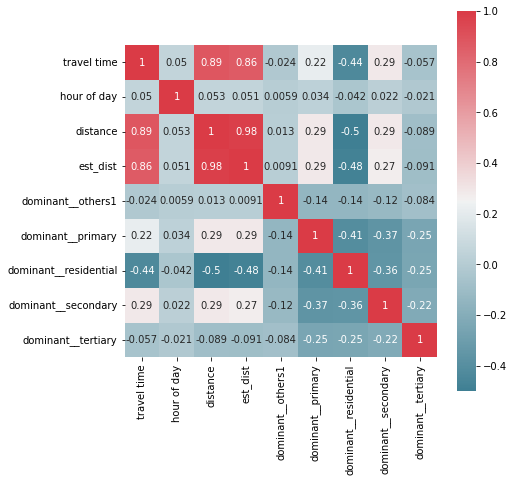

In [76]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(7,7))
corr = df11.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [77]:
x = np.array(df11[['est_dist','dominant__others1','dominant__primary','dominant__residential','dominant__tertiary','dominant__secondary']])
# x = np.array(df1.iloc[:,1:])
y = np.array(df11['travel time'])
x

array([[0.81627648, 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.26865964, 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.0168893 , 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       ...,
       [0.30644399, 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       [0.00705875, 0.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.62597006, 0.        , 1.        , 0.        , 0.        ,
        0.        ]])

In [78]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [79]:
print(X_train.shape)
print(X_test.shape)
# X_train

(13304, 6)
(3327, 6)


In [80]:
# inputs: distance +  dominant road
model3_1_1 = nnmodel(50, num_hlayers=1,Epoch=500)
model3_1_1

Epoch 1/500
416/416 [==============================] - 1s 925us/step - loss: 544438.5000 - mape: 97.6794 - rmse: 737.8608 - val_loss: 522522.9688 - val_mape: 93.1131 - val_rmse: 722.8575
Epoch 2/500
416/416 [==============================] - 0s 786us/step - loss: 465442.3438 - mape: 84.1951 - rmse: 682.2333 - val_loss: 413114.6562 - val_mape: 73.7041 - val_rmse: 642.7400
Epoch 3/500
416/416 [==============================] - 0s 772us/step - loss: 345809.4062 - mape: 62.4126 - rmse: 588.0556 - val_loss: 289654.5938 - val_mape: 52.9344 - val_rmse: 538.1957
Epoch 4/500
416/416 [==============================] - 0s 799us/step - loss: 233887.1875 - mape: 46.7243 - rmse: 483.6188 - val_loss: 191581.7031 - val_mape: 42.5233 - val_rmse: 437.7005
Epoch 5/500
416/416 [==============================] - 0s 783us/step - loss: 156245.7031 - mape: 42.8810 - rmse: 395.2793 - val_loss: 132584.3438 - val_mape: 42.8071 - val_rmse: 364.1213
Epoch 6/500
416/416 [==============================] - 0s 870us/s

416/416 [==============================] - 0s 785us/step - loss: 36521.4102 - mape: 25.0945 - rmse: 191.1058 - val_loss: 36986.5977 - val_mape: 24.4434 - val_rmse: 192.3190
Epoch 46/500
416/416 [==============================] - 0s 781us/step - loss: 36520.8086 - mape: 25.2467 - rmse: 191.1042 - val_loss: 36979.8047 - val_mape: 24.2704 - val_rmse: 192.3013
Epoch 47/500
416/416 [==============================] - 0s 767us/step - loss: 36508.9883 - mape: 25.0816 - rmse: 191.0733 - val_loss: 36976.4766 - val_mape: 24.4113 - val_rmse: 192.2927
Epoch 48/500
416/416 [==============================] - 0s 781us/step - loss: 36514.1445 - mape: 25.1589 - rmse: 191.0867 - val_loss: 36985.2852 - val_mape: 24.1726 - val_rmse: 192.3156
Epoch 49/500
416/416 [==============================] - 0s 743us/step - loss: 36504.8867 - mape: 25.1796 - rmse: 191.0625 - val_loss: 36993.9648 - val_mape: 24.0466 - val_rmse: 192.3382
Epoch 50/500
416/416 [==============================] - 0s 760us/step - loss: 36493

Epoch 133/500
416/416 [==============================] - 0s 793us/step - loss: 35960.2734 - mape: 24.6730 - rmse: 189.6319 - val_loss: 36344.6641 - val_mape: 23.4282 - val_rmse: 190.6428
Epoch 134/500
416/416 [==============================] - 0s 793us/step - loss: 35954.3672 - mape: 24.5099 - rmse: 189.6164 - val_loss: 36307.2930 - val_mape: 23.6473 - val_rmse: 190.5447
Epoch 135/500
416/416 [==============================] - 0s 783us/step - loss: 35956.2227 - mape: 24.5277 - rmse: 189.6213 - val_loss: 36316.8281 - val_mape: 23.5215 - val_rmse: 190.5697
Epoch 136/500
416/416 [==============================] - 0s 776us/step - loss: 35954.8711 - mape: 24.5373 - rmse: 189.6177 - val_loss: 36316.9453 - val_mape: 23.4790 - val_rmse: 190.5701
Epoch 137/500
416/416 [==============================] - 0s 797us/step - loss: 35953.2148 - mape: 24.5148 - rmse: 189.6133 - val_loss: 36329.0352 - val_mape: 23.4144 - val_rmse: 190.6018
Epoch 138/500
416/416 [==============================] - 0s 832us

Epoch 177/500
416/416 [==============================] - 0s 819us/step - loss: 35866.6758 - mape: 24.4590 - rmse: 189.3850 - val_loss: 36146.3047 - val_mape: 23.4307 - val_rmse: 190.1218
Epoch 178/500
416/416 [==============================] - 0s 835us/step - loss: 35859.4336 - mape: 24.4183 - rmse: 189.3659 - val_loss: 36179.6484 - val_mape: 23.1778 - val_rmse: 190.2095
Epoch 179/500
416/416 [==============================] - 0s 827us/step - loss: 35859.6406 - mape: 24.2941 - rmse: 189.3664 - val_loss: 36145.7305 - val_mape: 23.4931 - val_rmse: 190.1203
Epoch 180/500
416/416 [==============================] - 0s 793us/step - loss: 35852.1602 - mape: 24.3598 - rmse: 189.3467 - val_loss: 36122.6875 - val_mape: 23.8165 - val_rmse: 190.0597
Epoch 181/500
416/416 [==============================] - 0s 809us/step - loss: 35856.4844 - mape: 24.4432 - rmse: 189.3581 - val_loss: 36162.5859 - val_mape: 23.3011 - val_rmse: 190.1646
Epoch 182/500
416/416 [==============================] - 0s 779us

Epoch 221/500
416/416 [==============================] - 0s 823us/step - loss: 35818.2578 - mape: 24.2747 - rmse: 189.2571 - val_loss: 36067.7031 - val_mape: 23.5082 - val_rmse: 189.9150
Epoch 222/500
416/416 [==============================] - 0s 822us/step - loss: 35819.1133 - mape: 24.2494 - rmse: 189.2594 - val_loss: 36064.7383 - val_mape: 23.4908 - val_rmse: 189.9072
Epoch 223/500
416/416 [==============================] - 0s 795us/step - loss: 35820.6094 - mape: 24.2935 - rmse: 189.2633 - val_loss: 36067.7734 - val_mape: 23.3987 - val_rmse: 189.9152
Epoch 224/500
416/416 [==============================] - 0s 806us/step - loss: 35812.2266 - mape: 24.3367 - rmse: 189.2412 - val_loss: 36076.7305 - val_mape: 23.2505 - val_rmse: 189.9388
Epoch 225/500
416/416 [==============================] - 0s 852us/step - loss: 35814.0898 - mape: 24.3290 - rmse: 189.2461 - val_loss: 36080.8750 - val_mape: 23.1458 - val_rmse: 189.9497
Epoch 226/500
416/416 [==============================] - 0s 802us

Epoch 265/500
416/416 [==============================] - 0s 800us/step - loss: 35803.7461 - mape: 24.2548 - rmse: 189.2188 - val_loss: 36043.2617 - val_mape: 23.2873 - val_rmse: 189.8506
Epoch 266/500
416/416 [==============================] - 0s 773us/step - loss: 35792.6836 - mape: 24.1246 - rmse: 189.1895 - val_loss: 36025.8867 - val_mape: 23.5944 - val_rmse: 189.8049
Epoch 267/500
416/416 [==============================] - 0s 819us/step - loss: 35802.7852 - mape: 24.2654 - rmse: 189.2162 - val_loss: 36036.7305 - val_mape: 23.5581 - val_rmse: 189.8334
Epoch 268/500
416/416 [==============================] - 0s 810us/step - loss: 35800.7500 - mape: 24.2859 - rmse: 189.2109 - val_loss: 36036.7617 - val_mape: 23.3898 - val_rmse: 189.8335
Epoch 269/500
416/416 [==============================] - 0s 830us/step - loss: 35798.9805 - mape: 24.2443 - rmse: 189.2062 - val_loss: 36037.5781 - val_mape: 23.3440 - val_rmse: 189.8357
Epoch 270/500
416/416 [==============================] - 0s 757us

Epoch 309/500
416/416 [==============================] - 0s 852us/step - loss: 35792.2461 - mape: 24.1755 - rmse: 189.1884 - val_loss: 36015.6016 - val_mape: 23.3896 - val_rmse: 189.7778
Epoch 310/500
416/416 [==============================] - 0s 777us/step - loss: 35790.4297 - mape: 24.2745 - rmse: 189.1836 - val_loss: 36044.0391 - val_mape: 23.0988 - val_rmse: 189.8527
Epoch 311/500
416/416 [==============================] - 0s 778us/step - loss: 35791.2969 - mape: 24.2218 - rmse: 189.1859 - val_loss: 36004.1250 - val_mape: 23.3258 - val_rmse: 189.7475
Epoch 312/500
416/416 [==============================] - 0s 763us/step - loss: 35802.0430 - mape: 24.2220 - rmse: 189.2143 - val_loss: 36000.3828 - val_mape: 23.3388 - val_rmse: 189.7377
Epoch 313/500
416/416 [==============================] - 0s 775us/step - loss: 35789.8320 - mape: 24.1862 - rmse: 189.1820 - val_loss: 36012.6914 - val_mape: 23.3070 - val_rmse: 189.7701
Epoch 314/500
416/416 [==============================] - 0s 753us

Epoch 353/500
416/416 [==============================] - 0s 770us/step - loss: 35784.0391 - mape: 24.1274 - rmse: 189.1667 - val_loss: 36002.5742 - val_mape: 23.3558 - val_rmse: 189.7434
Epoch 354/500
416/416 [==============================] - 0s 822us/step - loss: 35784.9492 - mape: 24.2442 - rmse: 189.1691 - val_loss: 36003.9180 - val_mape: 23.2308 - val_rmse: 189.7470
Epoch 355/500
416/416 [==============================] - 0s 828us/step - loss: 35774.8008 - mape: 24.1951 - rmse: 189.1423 - val_loss: 35990.5195 - val_mape: 23.3121 - val_rmse: 189.7117
Epoch 356/500
416/416 [==============================] - 0s 807us/step - loss: 35785.2539 - mape: 24.1807 - rmse: 189.1699 - val_loss: 35999.8906 - val_mape: 23.3602 - val_rmse: 189.7364
Epoch 357/500
416/416 [==============================] - 0s 782us/step - loss: 35785.8047 - mape: 24.2809 - rmse: 189.1714 - val_loss: 35996.2773 - val_mape: 23.2314 - val_rmse: 189.7269
Epoch 358/500
416/416 [==============================] - 0s 896us

Epoch 397/500
416/416 [==============================] - 0s 805us/step - loss: 35784.3281 - mape: 24.2292 - rmse: 189.1675 - val_loss: 35990.5781 - val_mape: 23.1392 - val_rmse: 189.7118
Epoch 398/500
416/416 [==============================] - 0s 770us/step - loss: 35778.8047 - mape: 24.1957 - rmse: 189.1529 - val_loss: 35997.6562 - val_mape: 23.1779 - val_rmse: 189.7305
Epoch 399/500
416/416 [==============================] - 0s 799us/step - loss: 35782.7461 - mape: 24.1437 - rmse: 189.1633 - val_loss: 36014.3438 - val_mape: 23.0377 - val_rmse: 189.7745
Epoch 400/500
416/416 [==============================] - 0s 792us/step - loss: 35780.6680 - mape: 24.1527 - rmse: 189.1578 - val_loss: 35991.8398 - val_mape: 23.2495 - val_rmse: 189.7151
Epoch 401/500
416/416 [==============================] - 0s 816us/step - loss: 35778.1406 - mape: 24.2930 - rmse: 189.1511 - val_loss: 36003.3164 - val_mape: 23.0556 - val_rmse: 189.7454
Epoch 402/500
416/416 [==============================] - 0s 814us

Epoch 441/500
416/416 [==============================] - 0s 804us/step - loss: 35777.3008 - mape: 24.1578 - rmse: 189.1489 - val_loss: 35968.1211 - val_mape: 23.6165 - val_rmse: 189.6526
Epoch 442/500
416/416 [==============================] - 0s 804us/step - loss: 35779.4414 - mape: 24.2470 - rmse: 189.1545 - val_loss: 35985.4648 - val_mape: 23.2005 - val_rmse: 189.6983
Epoch 443/500
416/416 [==============================] - 0s 784us/step - loss: 35777.8555 - mape: 24.2202 - rmse: 189.1503 - val_loss: 36017.1602 - val_mape: 22.9936 - val_rmse: 189.7819
Epoch 444/500
416/416 [==============================] - 0s 850us/step - loss: 35784.5234 - mape: 24.1641 - rmse: 189.1680 - val_loss: 35965.1367 - val_mape: 23.2949 - val_rmse: 189.6448
Epoch 445/500
416/416 [==============================] - 0s 762us/step - loss: 35783.1328 - mape: 24.2081 - rmse: 189.1643 - val_loss: 36014.3125 - val_mape: 22.9870 - val_rmse: 189.7744
Epoch 446/500
416/416 [==============================] - 0s 828us

Epoch 485/500
416/416 [==============================] - 0s 969us/step - loss: 35774.7344 - mape: 24.1733 - rmse: 189.1421 - val_loss: 35975.1328 - val_mape: 23.3610 - val_rmse: 189.6711
Epoch 486/500
416/416 [==============================] - 0s 882us/step - loss: 35777.9375 - mape: 24.2051 - rmse: 189.1506 - val_loss: 35970.5234 - val_mape: 23.2607 - val_rmse: 189.6590
Epoch 487/500
416/416 [==============================] - 0s 879us/step - loss: 35775.3398 - mape: 24.2493 - rmse: 189.1437 - val_loss: 35994.1719 - val_mape: 23.0182 - val_rmse: 189.7213
Epoch 488/500
416/416 [==============================] - 0s 760us/step - loss: 35766.5508 - mape: 24.0919 - rmse: 189.1205 - val_loss: 35959.5312 - val_mape: 23.5561 - val_rmse: 189.6300
Epoch 489/500
416/416 [==============================] - 0s 771us/step - loss: 35773.2109 - mape: 24.2096 - rmse: 189.1381 - val_loss: 35973.1133 - val_mape: 23.2208 - val_rmse: 189.6658
Epoch 490/500
416/416 [==============================] - 0s 785us

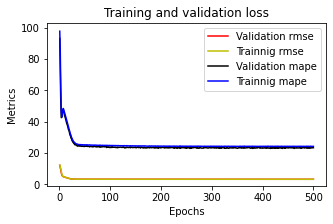

In [81]:
plotme(model3_1_1)


In [82]:
# inputs: distance +  dominant road
model3_1_2 = nnmodel(100, num_hlayers=1,Epoch=500)
model3_1_2

Epoch 1/500
416/416 [==============================] - 1s 869us/step - loss: 533117.3750 - mape: 95.7050 - rmse: 730.1489 - val_loss: 486992.0625 - val_mape: 87.0565 - val_rmse: 697.8481
Epoch 2/500
416/416 [==============================] - 0s 738us/step - loss: 395339.0938 - mape: 71.2134 - rmse: 628.7599 - val_loss: 309628.2500 - val_mape: 55.9167 - val_rmse: 556.4425
Epoch 3/500
416/416 [==============================] - 0s 723us/step - loss: 229210.5469 - mape: 46.6787 - rmse: 478.7594 - val_loss: 169599.0625 - val_mape: 41.8879 - val_rmse: 411.8241
Epoch 4/500
416/416 [==============================] - 0s 709us/step - loss: 131753.4531 - mape: 44.0881 - rmse: 362.9786 - val_loss: 108980.0312 - val_mape: 45.0988 - val_rmse: 330.1212
Epoch 5/500
416/416 [==============================] - 0s 718us/step - loss: 95904.2891 - mape: 47.6472 - rmse: 309.6842 - val_loss: 89032.3750 - val_mape: 46.8702 - val_rmse: 298.3829
Epoch 6/500
416/416 [==============================] - 0s 783us/ste

416/416 [==============================] - 0s 729us/step - loss: 36260.6992 - mape: 24.9153 - rmse: 190.4224 - val_loss: 36619.5391 - val_mape: 24.2409 - val_rmse: 191.3623
Epoch 46/500
416/416 [==============================] - 0s 727us/step - loss: 36240.6094 - mape: 24.9740 - rmse: 190.3697 - val_loss: 36602.7500 - val_mape: 24.0068 - val_rmse: 191.3185
Epoch 47/500
416/416 [==============================] - 0s 743us/step - loss: 36227.9492 - mape: 24.8642 - rmse: 190.3364 - val_loss: 36594.3555 - val_mape: 24.1715 - val_rmse: 191.2965
Epoch 48/500
416/416 [==============================] - 0s 695us/step - loss: 36215.7344 - mape: 24.8555 - rmse: 190.3043 - val_loss: 36584.0898 - val_mape: 24.3113 - val_rmse: 191.2697
Epoch 49/500
416/416 [==============================] - 0s 738us/step - loss: 36218.0859 - mape: 24.9461 - rmse: 190.3105 - val_loss: 36580.8867 - val_mape: 24.0163 - val_rmse: 191.2613
Epoch 50/500
416/416 [==============================] - 0s 792us/step - loss: 36197

Epoch 133/500
416/416 [==============================] - 0s 758us/step - loss: 35901.2500 - mape: 24.4863 - rmse: 189.4763 - val_loss: 36216.5703 - val_mape: 23.6525 - val_rmse: 190.3065
Epoch 134/500
416/416 [==============================] - 0s 698us/step - loss: 35874.8320 - mape: 24.5492 - rmse: 189.4065 - val_loss: 36198.5820 - val_mape: 24.1093 - val_rmse: 190.2592
Epoch 135/500
416/416 [==============================] - 0s 767us/step - loss: 35906.5000 - mape: 24.5625 - rmse: 189.4901 - val_loss: 36193.6797 - val_mape: 23.6243 - val_rmse: 190.2464
Epoch 136/500
416/416 [==============================] - 0s 808us/step - loss: 35890.9062 - mape: 24.5800 - rmse: 189.4490 - val_loss: 36224.3203 - val_mape: 23.3865 - val_rmse: 190.3269
Epoch 137/500
416/416 [==============================] - 0s 738us/step - loss: 35881.1914 - mape: 24.4939 - rmse: 189.4233 - val_loss: 36176.6055 - val_mape: 23.8702 - val_rmse: 190.2015
Epoch 138/500
416/416 [==============================] - 0s 862us

Epoch 177/500
416/416 [==============================] - 0s 766us/step - loss: 35838.8633 - mape: 24.5646 - rmse: 189.3116 - val_loss: 36096.7930 - val_mape: 23.5133 - val_rmse: 189.9916
Epoch 178/500
416/416 [==============================] - 0s 761us/step - loss: 35840.8203 - mape: 24.4112 - rmse: 189.3167 - val_loss: 36095.0430 - val_mape: 23.8447 - val_rmse: 189.9870
Epoch 179/500
416/416 [==============================] - 0s 757us/step - loss: 35831.4727 - mape: 24.4808 - rmse: 189.2920 - val_loss: 36182.7852 - val_mape: 23.2984 - val_rmse: 190.2177
Epoch 180/500
416/416 [==============================] - 0s 798us/step - loss: 35821.5000 - mape: 24.4385 - rmse: 189.2657 - val_loss: 36092.5469 - val_mape: 23.5997 - val_rmse: 189.9804
Epoch 181/500
416/416 [==============================] - 0s 799us/step - loss: 35823.5156 - mape: 24.4441 - rmse: 189.2710 - val_loss: 36104.3359 - val_mape: 23.7216 - val_rmse: 190.0114
Epoch 182/500
416/416 [==============================] - 0s 758us

Epoch 221/500
416/416 [==============================] - 0s 764us/step - loss: 35799.7734 - mape: 24.4782 - rmse: 189.2083 - val_loss: 36041.8203 - val_mape: 23.1891 - val_rmse: 189.8468
Epoch 222/500
416/416 [==============================] - 0s 785us/step - loss: 35803.7969 - mape: 24.3078 - rmse: 189.2189 - val_loss: 36090.2344 - val_mape: 23.1655 - val_rmse: 189.9743
Epoch 223/500
416/416 [==============================] - 0s 808us/step - loss: 35804.5742 - mape: 24.3496 - rmse: 189.2210 - val_loss: 36029.0156 - val_mape: 23.4194 - val_rmse: 189.8131
Epoch 224/500
416/416 [==============================] - 0s 761us/step - loss: 35790.5430 - mape: 24.3921 - rmse: 189.1839 - val_loss: 36041.5742 - val_mape: 23.4060 - val_rmse: 189.8462
Epoch 225/500
416/416 [==============================] - 0s 766us/step - loss: 35793.2539 - mape: 24.4101 - rmse: 189.1911 - val_loss: 36056.2422 - val_mape: 23.1803 - val_rmse: 189.8848
Epoch 226/500
416/416 [==============================] - 0s 769us

Epoch 265/500
416/416 [==============================] - 0s 797us/step - loss: 35768.8164 - mape: 24.3393 - rmse: 189.1264 - val_loss: 36024.4023 - val_mape: 23.0904 - val_rmse: 189.8009
Epoch 266/500
416/416 [==============================] - 0s 763us/step - loss: 35756.4922 - mape: 24.2706 - rmse: 189.0939 - val_loss: 36022.3086 - val_mape: 23.0594 - val_rmse: 189.7954
Epoch 267/500
416/416 [==============================] - 0s 765us/step - loss: 35785.3789 - mape: 24.2753 - rmse: 189.1702 - val_loss: 35996.4375 - val_mape: 23.2520 - val_rmse: 189.7273
Epoch 268/500
416/416 [==============================] - 0s 761us/step - loss: 35750.7109 - mape: 24.2975 - rmse: 189.0786 - val_loss: 35963.1133 - val_mape: 23.7597 - val_rmse: 189.6394
Epoch 269/500
416/416 [==============================] - 0s 762us/step - loss: 35783.2539 - mape: 24.3228 - rmse: 189.1646 - val_loss: 35980.0547 - val_mape: 23.2349 - val_rmse: 189.6841
Epoch 270/500
416/416 [==============================] - 0s 761us

Epoch 309/500
416/416 [==============================] - 0s 759us/step - loss: 35755.8633 - mape: 24.3182 - rmse: 189.0922 - val_loss: 35993.5859 - val_mape: 23.0217 - val_rmse: 189.7198
Epoch 310/500
416/416 [==============================] - 0s 773us/step - loss: 35751.3281 - mape: 24.2060 - rmse: 189.0802 - val_loss: 35932.4922 - val_mape: 23.5457 - val_rmse: 189.5587
Epoch 311/500
416/416 [==============================] - 0s 763us/step - loss: 35769.5625 - mape: 24.2929 - rmse: 189.1284 - val_loss: 35967.7422 - val_mape: 23.1215 - val_rmse: 189.6516
Epoch 312/500
416/416 [==============================] - 0s 758us/step - loss: 35754.6758 - mape: 24.2772 - rmse: 189.0891 - val_loss: 35946.2812 - val_mape: 23.2433 - val_rmse: 189.5950
Epoch 313/500
416/416 [==============================] - 0s 761us/step - loss: 35749.7969 - mape: 24.3337 - rmse: 189.0762 - val_loss: 36000.2148 - val_mape: 22.9101 - val_rmse: 189.7372
Epoch 314/500
416/416 [==============================] - 0s 762us

Epoch 353/500
416/416 [==============================] - 0s 762us/step - loss: 35749.8984 - mape: 24.1638 - rmse: 189.0764 - val_loss: 35955.7422 - val_mape: 23.1493 - val_rmse: 189.6200
Epoch 354/500
416/416 [==============================] - 0s 754us/step - loss: 35747.0000 - mape: 24.2691 - rmse: 189.0688 - val_loss: 35984.0469 - val_mape: 22.9021 - val_rmse: 189.6946
Epoch 355/500
416/416 [==============================] - 0s 797us/step - loss: 35729.0664 - mape: 24.2028 - rmse: 189.0213 - val_loss: 35935.7227 - val_mape: 23.1883 - val_rmse: 189.5672
Epoch 356/500
416/416 [==============================] - 0s 752us/step - loss: 35749.0742 - mape: 24.2370 - rmse: 189.0742 - val_loss: 35941.7969 - val_mape: 23.1447 - val_rmse: 189.5832
Epoch 357/500
416/416 [==============================] - 0s 759us/step - loss: 35741.7695 - mape: 24.2502 - rmse: 189.0549 - val_loss: 35953.3281 - val_mape: 23.0804 - val_rmse: 189.6136
Epoch 358/500
416/416 [==============================] - 0s 762us

Epoch 397/500
416/416 [==============================] - 0s 763us/step - loss: 35739.0234 - mape: 24.1772 - rmse: 189.0477 - val_loss: 35912.0742 - val_mape: 23.4674 - val_rmse: 189.5048
Epoch 398/500
416/416 [==============================] - 0s 754us/step - loss: 35746.7070 - mape: 24.2743 - rmse: 189.0680 - val_loss: 35918.8438 - val_mape: 23.2219 - val_rmse: 189.5227
Epoch 399/500
416/416 [==============================] - 0s 754us/step - loss: 35746.0430 - mape: 24.1640 - rmse: 189.0662 - val_loss: 35925.7344 - val_mape: 23.2475 - val_rmse: 189.5408
Epoch 400/500
416/416 [==============================] - 0s 760us/step - loss: 35746.2734 - mape: 24.1992 - rmse: 189.0668 - val_loss: 35905.3984 - val_mape: 23.3469 - val_rmse: 189.4872
Epoch 401/500
416/416 [==============================] - 0s 760us/step - loss: 35729.4141 - mape: 24.1748 - rmse: 189.0223 - val_loss: 35922.8008 - val_mape: 23.9211 - val_rmse: 189.5331
Epoch 402/500
416/416 [==============================] - 0s 758us

Epoch 441/500
416/416 [==============================] - 0s 767us/step - loss: 35736.2773 - mape: 24.1596 - rmse: 189.0404 - val_loss: 35886.3945 - val_mape: 23.4745 - val_rmse: 189.4370
Epoch 442/500
416/416 [==============================] - 0s 763us/step - loss: 35748.5508 - mape: 24.2212 - rmse: 189.0729 - val_loss: 35895.7500 - val_mape: 23.3414 - val_rmse: 189.4617
Epoch 443/500
416/416 [==============================] - 0s 762us/step - loss: 35726.5859 - mape: 24.1453 - rmse: 189.0148 - val_loss: 35896.4805 - val_mape: 23.5525 - val_rmse: 189.4637
Epoch 444/500
416/416 [==============================] - 0s 768us/step - loss: 35736.2031 - mape: 24.2469 - rmse: 189.0402 - val_loss: 35966.0195 - val_mape: 22.9430 - val_rmse: 189.6471
Epoch 445/500
416/416 [==============================] - 0s 761us/step - loss: 35729.6055 - mape: 24.1942 - rmse: 189.0228 - val_loss: 35910.3594 - val_mape: 23.2844 - val_rmse: 189.5003
Epoch 446/500
416/416 [==============================] - 0s 780us

Epoch 485/500
416/416 [==============================] - 0s 768us/step - loss: 35745.2031 - mape: 24.1802 - rmse: 189.0640 - val_loss: 35981.8555 - val_mape: 22.7731 - val_rmse: 189.6888
Epoch 486/500
416/416 [==============================] - 0s 765us/step - loss: 35744.0117 - mape: 24.1905 - rmse: 189.0609 - val_loss: 35994.4023 - val_mape: 22.7169 - val_rmse: 189.7219
Epoch 487/500
416/416 [==============================] - 0s 762us/step - loss: 35737.3477 - mape: 24.1288 - rmse: 189.0432 - val_loss: 35925.4219 - val_mape: 23.0485 - val_rmse: 189.5400
Epoch 488/500
416/416 [==============================] - 0s 779us/step - loss: 35739.5117 - mape: 24.1754 - rmse: 189.0490 - val_loss: 35915.8867 - val_mape: 23.0884 - val_rmse: 189.5149
Epoch 489/500
416/416 [==============================] - 0s 806us/step - loss: 35744.2070 - mape: 24.1759 - rmse: 189.0614 - val_loss: 35901.5469 - val_mape: 23.2093 - val_rmse: 189.4770
Epoch 490/500
416/416 [==============================] - 0s 768us

In [83]:
202.7127227783203/60

3.378545379638672

In [84]:
# inputs: distance +  dominant road
model3_1_3 = nnmodel(200, num_hlayers=1,Epoch=500)
model3_1_3

Epoch 1/500
416/416 [==============================] - 1s 949us/step - loss: 512599.0938 - mape: 92.2131 - rmse: 715.9603 - val_loss: 425174.4375 - val_mape: 76.0194 - val_rmse: 652.0540
Epoch 2/500
416/416 [==============================] - 0s 841us/step - loss: 296312.0000 - mape: 55.5360 - rmse: 544.3455 - val_loss: 192062.2656 - val_mape: 42.5334 - val_rmse: 438.2491
Epoch 3/500
416/416 [==============================] - 0s 794us/step - loss: 134215.6719 - mape: 44.2687 - rmse: 366.3546 - val_loss: 102641.4922 - val_mape: 45.8687 - val_rmse: 320.3771
Epoch 4/500
416/416 [==============================] - 0s 784us/step - loss: 90041.0234 - mape: 48.1293 - rmse: 300.0684 - val_loss: 83931.1328 - val_mape: 46.9754 - val_rmse: 289.7087
Epoch 5/500
416/416 [==============================] - 0s 773us/step - loss: 78838.1016 - mape: 46.7878 - rmse: 280.7812 - val_loss: 76194.7812 - val_mape: 44.5025 - val_rmse: 276.0340
Epoch 6/500
416/416 [==============================] - 0s 791us/step 

416/416 [==============================] - 0s 781us/step - loss: 36167.5703 - mape: 24.8959 - rmse: 190.1777 - val_loss: 36605.5586 - val_mape: 23.7452 - val_rmse: 191.3258
Epoch 46/500
416/416 [==============================] - 0s 788us/step - loss: 36158.1797 - mape: 24.8197 - rmse: 190.1530 - val_loss: 36613.9688 - val_mape: 23.6238 - val_rmse: 191.3478
Epoch 47/500
416/416 [==============================] - 0s 778us/step - loss: 36158.2148 - mape: 24.9225 - rmse: 190.1531 - val_loss: 36729.1602 - val_mape: 23.1878 - val_rmse: 191.6485
Epoch 48/500
416/416 [==============================] - 0s 809us/step - loss: 36160.7461 - mape: 24.7301 - rmse: 190.1598 - val_loss: 36530.2539 - val_mape: 24.0146 - val_rmse: 191.1289
Epoch 49/500
416/416 [==============================] - 0s 769us/step - loss: 36126.8203 - mape: 24.8680 - rmse: 190.0706 - val_loss: 36595.2930 - val_mape: 23.5365 - val_rmse: 191.2990
Epoch 50/500
416/416 [==============================] - 0s 771us/step - loss: 36113

Epoch 133/500
416/416 [==============================] - 0s 777us/step - loss: 35787.3789 - mape: 24.3743 - rmse: 189.1755 - val_loss: 36087.4688 - val_mape: 22.9237 - val_rmse: 189.9670
Epoch 134/500
416/416 [==============================] - 0s 777us/step - loss: 35802.9570 - mape: 24.2361 - rmse: 189.2167 - val_loss: 36021.7344 - val_mape: 23.9507 - val_rmse: 189.7939
Epoch 135/500
416/416 [==============================] - 0s 771us/step - loss: 35800.7539 - mape: 24.2993 - rmse: 189.2109 - val_loss: 36009.8438 - val_mape: 23.5339 - val_rmse: 189.7626
Epoch 136/500
416/416 [==============================] - 0s 777us/step - loss: 35803.5977 - mape: 24.3359 - rmse: 189.2184 - val_loss: 36009.8633 - val_mape: 23.4399 - val_rmse: 189.7626
Epoch 137/500
416/416 [==============================] - 0s 774us/step - loss: 35788.5586 - mape: 24.3026 - rmse: 189.1786 - val_loss: 36004.9492 - val_mape: 23.5261 - val_rmse: 189.7497
Epoch 138/500
416/416 [==============================] - 0s 825us

Epoch 177/500
416/416 [==============================] - 0s 867us/step - loss: 35772.7617 - mape: 24.1879 - rmse: 189.1369 - val_loss: 35985.9219 - val_mape: 23.2477 - val_rmse: 189.6996
Epoch 178/500
416/416 [==============================] - 0s 890us/step - loss: 35745.4805 - mape: 24.2294 - rmse: 189.0648 - val_loss: 35955.7812 - val_mape: 23.7964 - val_rmse: 189.6201
Epoch 179/500
416/416 [==============================] - 0s 1ms/step - loss: 35780.1367 - mape: 24.2689 - rmse: 189.1564 - val_loss: 35964.6367 - val_mape: 23.3403 - val_rmse: 189.6434
Epoch 180/500
416/416 [==============================] - 0s 922us/step - loss: 35776.9102 - mape: 24.2448 - rmse: 189.1479 - val_loss: 36004.9297 - val_mape: 23.1061 - val_rmse: 189.7496
Epoch 181/500
416/416 [==============================] - 0s 771us/step - loss: 35790.7617 - mape: 24.2813 - rmse: 189.1845 - val_loss: 36000.3438 - val_mape: 23.0939 - val_rmse: 189.7376
Epoch 182/500
416/416 [==============================] - 0s 756us/s

Epoch 221/500
416/416 [==============================] - 0s 763us/step - loss: 35766.9453 - mape: 24.2026 - rmse: 189.1215 - val_loss: 35990.5898 - val_mape: 22.9851 - val_rmse: 189.7119
Epoch 222/500
416/416 [==============================] - 0s 744us/step - loss: 35759.9297 - mape: 24.2636 - rmse: 189.1030 - val_loss: 36013.2383 - val_mape: 22.8373 - val_rmse: 189.7715
Epoch 223/500
416/416 [==============================] - 0s 728us/step - loss: 35769.7422 - mape: 24.2176 - rmse: 189.1289 - val_loss: 35939.3125 - val_mape: 23.2066 - val_rmse: 189.5767
Epoch 224/500
416/416 [==============================] - 0s 776us/step - loss: 35772.8633 - mape: 24.2009 - rmse: 189.1372 - val_loss: 35988.6523 - val_mape: 23.0157 - val_rmse: 189.7068
Epoch 225/500
416/416 [==============================] - 0s 741us/step - loss: 35769.0039 - mape: 24.1978 - rmse: 189.1270 - val_loss: 35967.9297 - val_mape: 23.2279 - val_rmse: 189.6521
Epoch 226/500
416/416 [==============================] - 0s 723us

Epoch 265/500
416/416 [==============================] - 0s 735us/step - loss: 35764.9531 - mape: 24.2087 - rmse: 189.1162 - val_loss: 36002.4219 - val_mape: 22.9557 - val_rmse: 189.7430
Epoch 266/500
416/416 [==============================] - 0s 731us/step - loss: 35768.5352 - mape: 24.1762 - rmse: 189.1257 - val_loss: 35923.8984 - val_mape: 23.7110 - val_rmse: 189.5360
Epoch 267/500
416/416 [==============================] - 0s 771us/step - loss: 35740.4258 - mape: 24.1532 - rmse: 189.0514 - val_loss: 35961.3047 - val_mape: 24.0895 - val_rmse: 189.6347
Epoch 268/500
416/416 [==============================] - 0s 726us/step - loss: 35773.0117 - mape: 24.2510 - rmse: 189.1375 - val_loss: 35920.1289 - val_mape: 23.5214 - val_rmse: 189.5261
Epoch 269/500
416/416 [==============================] - 0s 766us/step - loss: 35756.9180 - mape: 24.2433 - rmse: 189.0950 - val_loss: 35913.9102 - val_mape: 23.6310 - val_rmse: 189.5097
Epoch 270/500
416/416 [==============================] - 0s 752us

Epoch 309/500
416/416 [==============================] - 0s 730us/step - loss: 35762.0117 - mape: 24.1598 - rmse: 189.1085 - val_loss: 35920.8047 - val_mape: 23.5177 - val_rmse: 189.5278
Epoch 310/500
416/416 [==============================] - 0s 715us/step - loss: 35760.2852 - mape: 24.2447 - rmse: 189.1039 - val_loss: 35924.7617 - val_mape: 23.2390 - val_rmse: 189.5383
Epoch 311/500
416/416 [==============================] - 0s 762us/step - loss: 35753.3164 - mape: 24.1686 - rmse: 189.0855 - val_loss: 35930.3125 - val_mape: 23.1745 - val_rmse: 189.5529
Epoch 312/500
416/416 [==============================] - 0s 756us/step - loss: 35760.1914 - mape: 24.1986 - rmse: 189.1037 - val_loss: 35903.0742 - val_mape: 23.3357 - val_rmse: 189.4811
Epoch 313/500
416/416 [==============================] - 0s 763us/step - loss: 35769.8086 - mape: 24.2249 - rmse: 189.1291 - val_loss: 35929.1484 - val_mape: 23.2041 - val_rmse: 189.5499
Epoch 314/500
416/416 [==============================] - 0s 783us

Epoch 353/500
416/416 [==============================] - 0s 731us/step - loss: 35777.9453 - mape: 24.2514 - rmse: 189.1506 - val_loss: 36023.0977 - val_mape: 22.7681 - val_rmse: 189.7975
Epoch 354/500
416/416 [==============================] - 0s 724us/step - loss: 35766.2695 - mape: 24.1179 - rmse: 189.1197 - val_loss: 35900.4375 - val_mape: 23.5398 - val_rmse: 189.4741
Epoch 355/500
416/416 [==============================] - 0s 730us/step - loss: 35765.8203 - mape: 24.1829 - rmse: 189.1185 - val_loss: 35912.5859 - val_mape: 23.4434 - val_rmse: 189.5062
Epoch 356/500
416/416 [==============================] - 0s 757us/step - loss: 35765.4922 - mape: 24.2553 - rmse: 189.1177 - val_loss: 35911.3008 - val_mape: 23.2629 - val_rmse: 189.5028
Epoch 357/500
416/416 [==============================] - 0s 729us/step - loss: 35748.8711 - mape: 24.1512 - rmse: 189.0737 - val_loss: 35904.8711 - val_mape: 23.6194 - val_rmse: 189.4858
Epoch 358/500
416/416 [==============================] - 0s 756us

Epoch 397/500
416/416 [==============================] - 0s 735us/step - loss: 35764.9570 - mape: 24.2072 - rmse: 189.1163 - val_loss: 35958.3242 - val_mape: 23.0342 - val_rmse: 189.6268
Epoch 398/500
416/416 [==============================] - 0s 721us/step - loss: 35762.5664 - mape: 24.2557 - rmse: 189.1099 - val_loss: 36055.6211 - val_mape: 22.6290 - val_rmse: 189.8832
Epoch 399/500
416/416 [==============================] - 0s 750us/step - loss: 35768.4844 - mape: 24.1380 - rmse: 189.1256 - val_loss: 35955.2305 - val_mape: 23.0936 - val_rmse: 189.6187
Epoch 400/500
416/416 [==============================] - 0s 759us/step - loss: 35754.0781 - mape: 24.2453 - rmse: 189.0875 - val_loss: 35989.5391 - val_mape: 22.8732 - val_rmse: 189.7091
Epoch 401/500
416/416 [==============================] - 0s 727us/step - loss: 35764.0156 - mape: 24.1693 - rmse: 189.1138 - val_loss: 35944.3906 - val_mape: 23.1358 - val_rmse: 189.5901
Epoch 402/500
416/416 [==============================] - 0s 747us

Epoch 441/500
416/416 [==============================] - 0s 754us/step - loss: 35760.0859 - mape: 24.1400 - rmse: 189.1034 - val_loss: 35898.8711 - val_mape: 23.5830 - val_rmse: 189.4700
Epoch 442/500
416/416 [==============================] - 0s 727us/step - loss: 35736.0508 - mape: 24.2581 - rmse: 189.0398 - val_loss: 35917.4258 - val_mape: 23.7495 - val_rmse: 189.5189
Epoch 443/500
416/416 [==============================] - 0s 757us/step - loss: 35766.2422 - mape: 24.1498 - rmse: 189.1196 - val_loss: 35938.5508 - val_mape: 23.1635 - val_rmse: 189.5747
Epoch 444/500
416/416 [==============================] - 0s 723us/step - loss: 35756.7930 - mape: 24.2958 - rmse: 189.0947 - val_loss: 36014.8867 - val_mape: 22.7586 - val_rmse: 189.7759
Epoch 445/500
416/416 [==============================] - 0s 777us/step - loss: 35759.9570 - mape: 24.1506 - rmse: 189.1030 - val_loss: 35953.0273 - val_mape: 23.1767 - val_rmse: 189.6128
Epoch 446/500
416/416 [==============================] - 0s 727us

Epoch 485/500
416/416 [==============================] - 0s 769us/step - loss: 35760.7617 - mape: 24.2017 - rmse: 189.1052 - val_loss: 35919.2383 - val_mape: 23.0595 - val_rmse: 189.5237
Epoch 486/500
416/416 [==============================] - 0s 748us/step - loss: 35764.8711 - mape: 24.1914 - rmse: 189.1160 - val_loss: 35950.1367 - val_mape: 22.9593 - val_rmse: 189.6052
Epoch 487/500
416/416 [==============================] - 0s 751us/step - loss: 35733.4414 - mape: 24.2403 - rmse: 189.0329 - val_loss: 36046.5195 - val_mape: 22.6676 - val_rmse: 189.8592
Epoch 488/500
416/416 [==============================] - 0s 724us/step - loss: 35743.4961 - mape: 24.1208 - rmse: 189.0595 - val_loss: 35892.6211 - val_mape: 23.5192 - val_rmse: 189.4535
Epoch 489/500
416/416 [==============================] - 0s 744us/step - loss: 35749.0430 - mape: 24.1853 - rmse: 189.0742 - val_loss: 35898.9727 - val_mape: 23.2403 - val_rmse: 189.4702
Epoch 490/500
416/416 [==============================] - 0s 765us

In [85]:
202.6893768310547/60

3.378156280517578

In [86]:
# inputs: distance +  dominant road
model3_1_4 = nnmodel(100,50, num_hlayers=2,Epoch=500)
model3_1_4

Epoch 1/500
416/416 [==============================] - 1s 914us/step - loss: 323415.9375 - mape: 69.5125 - rmse: 568.6967 - val_loss: 87487.4141 - val_mape: 50.5186 - val_rmse: 295.7827
Epoch 2/500
416/416 [==============================] - 0s 794us/step - loss: 74119.6719 - mape: 46.2868 - rmse: 272.2493 - val_loss: 65886.8906 - val_mape: 41.3855 - val_rmse: 256.6844
Epoch 3/500
416/416 [==============================] - 0s 753us/step - loss: 57666.0547 - mape: 39.3397 - rmse: 240.1376 - val_loss: 50608.2422 - val_mape: 35.6085 - val_rmse: 224.9628
Epoch 4/500
416/416 [==============================] - 0s 781us/step - loss: 44436.2656 - mape: 32.7704 - rmse: 210.7991 - val_loss: 40343.0820 - val_mape: 29.1287 - val_rmse: 200.8559
Epoch 5/500
416/416 [==============================] - 0s 807us/step - loss: 38050.1250 - mape: 27.7529 - rmse: 195.0644 - val_loss: 37672.0664 - val_mape: 25.0837 - val_rmse: 194.0929
Epoch 6/500
416/416 [==============================] - 0s 788us/step - los

416/416 [==============================] - 0s 807us/step - loss: 35877.3867 - mape: 24.2144 - rmse: 189.4133 - val_loss: 36029.6211 - val_mape: 24.1509 - val_rmse: 189.8147
Epoch 90/500
416/416 [==============================] - 0s 823us/step - loss: 35860.7461 - mape: 24.3003 - rmse: 189.3693 - val_loss: 36274.8594 - val_mape: 22.3629 - val_rmse: 190.4596
Epoch 91/500
416/416 [==============================] - 0s 774us/step - loss: 35833.1055 - mape: 24.2249 - rmse: 189.2963 - val_loss: 36020.8125 - val_mape: 23.2557 - val_rmse: 189.7915
Epoch 92/500
416/416 [==============================] - 0s 773us/step - loss: 35890.4062 - mape: 24.2262 - rmse: 189.4476 - val_loss: 35961.8438 - val_mape: 23.4418 - val_rmse: 189.6361
Epoch 93/500
416/416 [==============================] - 0s 752us/step - loss: 35834.4102 - mape: 24.1821 - rmse: 189.2998 - val_loss: 35981.6562 - val_mape: 23.0060 - val_rmse: 189.6883
Epoch 94/500
416/416 [==============================] - 0s 761us/step - loss: 35809

Epoch 133/500
416/416 [==============================] - 0s 769us/step - loss: 35790.2617 - mape: 24.0313 - rmse: 189.1831 - val_loss: 36337.7031 - val_mape: 22.2752 - val_rmse: 190.6245
Epoch 134/500
416/416 [==============================] - 0s 768us/step - loss: 35850.7656 - mape: 24.1470 - rmse: 189.3430 - val_loss: 36013.2578 - val_mape: 22.9009 - val_rmse: 189.7716
Epoch 135/500
416/416 [==============================] - 0s 803us/step - loss: 35868.6406 - mape: 24.0749 - rmse: 189.3902 - val_loss: 36063.0039 - val_mape: 22.8081 - val_rmse: 189.9026
Epoch 136/500
416/416 [==============================] - 0s 764us/step - loss: 35813.4297 - mape: 24.1055 - rmse: 189.2444 - val_loss: 35983.5352 - val_mape: 22.7293 - val_rmse: 189.6933
Epoch 137/500
416/416 [==============================] - 0s 787us/step - loss: 35848.5234 - mape: 24.1581 - rmse: 189.3371 - val_loss: 36182.4414 - val_mape: 22.3886 - val_rmse: 190.2168
Epoch 138/500
416/416 [==============================] - 0s 779us

Epoch 177/500
416/416 [==============================] - 0s 774us/step - loss: 35799.2617 - mape: 24.0568 - rmse: 189.2069 - val_loss: 35980.3672 - val_mape: 22.6947 - val_rmse: 189.6849
Epoch 178/500
416/416 [==============================] - 0s 772us/step - loss: 35812.5820 - mape: 24.1339 - rmse: 189.2421 - val_loss: 35889.6641 - val_mape: 22.9175 - val_rmse: 189.4457
Epoch 179/500
416/416 [==============================] - 0s 791us/step - loss: 35783.6523 - mape: 24.0427 - rmse: 189.1657 - val_loss: 36246.5273 - val_mape: 22.3168 - val_rmse: 190.3852
Epoch 180/500
416/416 [==============================] - 0s 782us/step - loss: 35803.1641 - mape: 24.0251 - rmse: 189.2172 - val_loss: 36005.9492 - val_mape: 24.3033 - val_rmse: 189.7523
Epoch 181/500
416/416 [==============================] - 0s 784us/step - loss: 35851.1641 - mape: 24.1206 - rmse: 189.3440 - val_loss: 35903.1016 - val_mape: 23.7262 - val_rmse: 189.4811
Epoch 182/500
416/416 [==============================] - 0s 758us

Epoch 221/500
416/416 [==============================] - 0s 767us/step - loss: 35818.2422 - mape: 24.0396 - rmse: 189.2571 - val_loss: 35872.5156 - val_mape: 23.4042 - val_rmse: 189.4004
Epoch 222/500
416/416 [==============================] - 0s 791us/step - loss: 35742.8867 - mape: 24.1465 - rmse: 189.0579 - val_loss: 36355.4609 - val_mape: 21.8251 - val_rmse: 190.6711
Epoch 223/500
416/416 [==============================] - 0s 796us/step - loss: 35852.4219 - mape: 24.0391 - rmse: 189.3474 - val_loss: 35998.5508 - val_mape: 22.5434 - val_rmse: 189.7328
Epoch 224/500
416/416 [==============================] - 0s 764us/step - loss: 35760.7852 - mape: 23.9903 - rmse: 189.1052 - val_loss: 35996.8438 - val_mape: 22.7486 - val_rmse: 189.7283
Epoch 225/500
416/416 [==============================] - 0s 756us/step - loss: 35785.9492 - mape: 24.0830 - rmse: 189.1717 - val_loss: 35927.9805 - val_mape: 23.9007 - val_rmse: 189.5468
Epoch 226/500
416/416 [==============================] - 0s 787us

Epoch 265/500
416/416 [==============================] - 0s 889us/step - loss: 35742.8281 - mape: 23.9114 - rmse: 189.0577 - val_loss: 35876.2070 - val_mape: 22.9139 - val_rmse: 189.4102
Epoch 266/500
416/416 [==============================] - 0s 783us/step - loss: 35742.0859 - mape: 24.0066 - rmse: 189.0558 - val_loss: 35861.0938 - val_mape: 23.3598 - val_rmse: 189.3703
Epoch 267/500
416/416 [==============================] - 0s 774us/step - loss: 35816.2969 - mape: 23.9795 - rmse: 189.2519 - val_loss: 35868.6211 - val_mape: 22.9709 - val_rmse: 189.3901
Epoch 268/500
416/416 [==============================] - 0s 778us/step - loss: 35747.9609 - mape: 24.0552 - rmse: 189.0713 - val_loss: 36261.4766 - val_mape: 22.1396 - val_rmse: 190.4245
Epoch 269/500
416/416 [==============================] - 0s 828us/step - loss: 35784.6992 - mape: 23.9668 - rmse: 189.1684 - val_loss: 35982.7109 - val_mape: 24.2225 - val_rmse: 189.6911
Epoch 270/500
416/416 [==============================] - 0s 792us

Epoch 309/500
416/416 [==============================] - 0s 775us/step - loss: 35762.8711 - mape: 24.0181 - rmse: 189.1107 - val_loss: 36275.7227 - val_mape: 21.9571 - val_rmse: 190.4619
Epoch 310/500
416/416 [==============================] - 0s 822us/step - loss: 35781.6953 - mape: 23.9623 - rmse: 189.1605 - val_loss: 35898.1055 - val_mape: 23.3234 - val_rmse: 189.4680
Epoch 311/500
416/416 [==============================] - 0s 837us/step - loss: 35726.5469 - mape: 24.0133 - rmse: 189.0147 - val_loss: 35867.9375 - val_mape: 22.8611 - val_rmse: 189.3883
Epoch 312/500
416/416 [==============================] - 0s 749us/step - loss: 35770.2188 - mape: 23.9680 - rmse: 189.1302 - val_loss: 36382.7656 - val_mape: 21.9999 - val_rmse: 190.7427
Epoch 313/500
416/416 [==============================] - 0s 780us/step - loss: 35683.2344 - mape: 23.9583 - rmse: 188.9001 - val_loss: 36110.4570 - val_mape: 22.1979 - val_rmse: 190.0275
Epoch 314/500
416/416 [==============================] - 0s 806us

Epoch 353/500
416/416 [==============================] - 0s 812us/step - loss: 35775.3398 - mape: 23.9701 - rmse: 189.1437 - val_loss: 35833.8320 - val_mape: 23.0864 - val_rmse: 189.2983
Epoch 354/500
416/416 [==============================] - 0s 767us/step - loss: 35752.6289 - mape: 23.9725 - rmse: 189.0836 - val_loss: 35835.3984 - val_mape: 23.0611 - val_rmse: 189.3024
Epoch 355/500
416/416 [==============================] - 0s 781us/step - loss: 35745.9492 - mape: 24.0143 - rmse: 189.0660 - val_loss: 35947.6523 - val_mape: 22.7055 - val_rmse: 189.5987
Epoch 356/500
416/416 [==============================] - 0s 780us/step - loss: 35774.8047 - mape: 23.9739 - rmse: 189.1423 - val_loss: 35896.4336 - val_mape: 23.9081 - val_rmse: 189.4635
Epoch 357/500
416/416 [==============================] - 0s 757us/step - loss: 35790.6367 - mape: 23.9338 - rmse: 189.1841 - val_loss: 35979.3984 - val_mape: 22.6496 - val_rmse: 189.6824
Epoch 358/500
416/416 [==============================] - 0s 747us

Epoch 397/500
416/416 [==============================] - 0s 760us/step - loss: 35754.4141 - mape: 24.0042 - rmse: 189.0884 - val_loss: 35963.1055 - val_mape: 22.5091 - val_rmse: 189.6394
Epoch 398/500
416/416 [==============================] - 0s 766us/step - loss: 35730.2773 - mape: 23.9380 - rmse: 189.0245 - val_loss: 35911.7852 - val_mape: 23.8561 - val_rmse: 189.5040
Epoch 399/500
416/416 [==============================] - 0s 800us/step - loss: 35729.8008 - mape: 23.9748 - rmse: 189.0233 - val_loss: 35932.8047 - val_mape: 23.8329 - val_rmse: 189.5595
Epoch 400/500
416/416 [==============================] - 0s 764us/step - loss: 35724.1797 - mape: 23.9006 - rmse: 189.0084 - val_loss: 35898.3672 - val_mape: 23.7333 - val_rmse: 189.4686
Epoch 401/500
416/416 [==============================] - 0s 795us/step - loss: 35708.2227 - mape: 23.9737 - rmse: 188.9662 - val_loss: 35873.7422 - val_mape: 23.2924 - val_rmse: 189.4037
Epoch 402/500
416/416 [==============================] - 0s 758us

Epoch 441/500
416/416 [==============================] - 0s 794us/step - loss: 35755.4141 - mape: 23.9188 - rmse: 189.0910 - val_loss: 35937.0117 - val_mape: 23.9758 - val_rmse: 189.5706
Epoch 442/500
416/416 [==============================] - 0s 755us/step - loss: 35771.4648 - mape: 24.0295 - rmse: 189.1335 - val_loss: 36169.7422 - val_mape: 22.1813 - val_rmse: 190.1834
Epoch 443/500
416/416 [==============================] - 0s 785us/step - loss: 35756.2930 - mape: 23.9012 - rmse: 189.0933 - val_loss: 35980.2930 - val_mape: 23.2201 - val_rmse: 189.6847
Epoch 444/500
416/416 [==============================] - 0s 766us/step - loss: 35764.8828 - mape: 24.0467 - rmse: 189.1161 - val_loss: 35831.9297 - val_mape: 22.9714 - val_rmse: 189.2932
Epoch 445/500
416/416 [==============================] - 0s 777us/step - loss: 35788.5352 - mape: 23.9323 - rmse: 189.1786 - val_loss: 35991.4688 - val_mape: 22.3962 - val_rmse: 189.7142
Epoch 446/500
416/416 [==============================] - 0s 764us

Epoch 485/500
416/416 [==============================] - 0s 774us/step - loss: 35750.9961 - mape: 23.9572 - rmse: 189.0793 - val_loss: 35856.3672 - val_mape: 23.2171 - val_rmse: 189.3578
Epoch 486/500
416/416 [==============================] - 0s 755us/step - loss: 35752.0820 - mape: 23.9421 - rmse: 189.0822 - val_loss: 35831.2930 - val_mape: 23.2454 - val_rmse: 189.2915
Epoch 487/500
416/416 [==============================] - 0s 745us/step - loss: 35791.3477 - mape: 23.9898 - rmse: 189.1860 - val_loss: 35903.0352 - val_mape: 23.7904 - val_rmse: 189.4810
Epoch 488/500
416/416 [==============================] - 0s 788us/step - loss: 35743.9766 - mape: 23.9292 - rmse: 189.0608 - val_loss: 35838.0039 - val_mape: 23.3774 - val_rmse: 189.3093
Epoch 489/500
416/416 [==============================] - 0s 810us/step - loss: 35740.8984 - mape: 23.9804 - rmse: 189.0526 - val_loss: 35882.1289 - val_mape: 22.7767 - val_rmse: 189.4258
Epoch 490/500
416/416 [==============================] - 0s 790us

In [87]:
202.09515380859375/60

3.3682525634765623

In [88]:
# inputs: distance +  dominant road
model3_1_5 = nnmodel(200,100, num_hlayers=2,Epoch=500)
model3_1_5

Epoch 1/500
416/416 [==============================] - 1s 1ms/step - loss: 237322.2969 - mape: 62.6430 - rmse: 487.1573 - val_loss: 73969.9375 - val_mape: 43.7973 - val_rmse: 271.9742
Epoch 2/500
416/416 [==============================] - 0s 891us/step - loss: 61752.6914 - mape: 41.0175 - rmse: 248.5009 - val_loss: 50756.7070 - val_mape: 35.3806 - val_rmse: 225.2925
Epoch 3/500
416/416 [==============================] - 0s 893us/step - loss: 42724.3164 - mape: 31.6777 - rmse: 206.6986 - val_loss: 38446.4219 - val_mape: 27.9458 - val_rmse: 196.0776
Epoch 4/500
416/416 [==============================] - 0s 827us/step - loss: 37081.4453 - mape: 26.4509 - rmse: 192.5654 - val_loss: 37377.8672 - val_mape: 23.9243 - val_rmse: 193.3336
Epoch 5/500
416/416 [==============================] - 0s 824us/step - loss: 36821.8750 - mape: 25.3650 - rmse: 191.8903 - val_loss: 37253.6094 - val_mape: 25.2295 - val_rmse: 193.0119
Epoch 6/500
416/416 [==============================] - 0s 825us/step - loss:

416/416 [==============================] - 0s 863us/step - loss: 35905.2305 - mape: 24.2391 - rmse: 189.4868 - val_loss: 36303.6953 - val_mape: 22.6501 - val_rmse: 190.5353
Epoch 90/500
416/416 [==============================] - 0s 862us/step - loss: 35852.8281 - mape: 24.2462 - rmse: 189.3484 - val_loss: 36183.2070 - val_mape: 23.7125 - val_rmse: 190.2188
Epoch 91/500
416/416 [==============================] - 0s 821us/step - loss: 35933.1289 - mape: 24.4303 - rmse: 189.5604 - val_loss: 36249.6523 - val_mape: 22.6366 - val_rmse: 190.3934
Epoch 92/500
416/416 [==============================] - 0s 868us/step - loss: 36013.8477 - mape: 24.2804 - rmse: 189.7731 - val_loss: 36310.2695 - val_mape: 24.3525 - val_rmse: 190.5525
Epoch 93/500
416/416 [==============================] - 0s 835us/step - loss: 35971.0117 - mape: 24.2363 - rmse: 189.6602 - val_loss: 36145.5625 - val_mape: 24.1237 - val_rmse: 190.1199
Epoch 94/500
416/416 [==============================] - 0s 849us/step - loss: 35996

Epoch 133/500
416/416 [==============================] - 0s 833us/step - loss: 35919.9453 - mape: 24.2415 - rmse: 189.5256 - val_loss: 36356.7539 - val_mape: 23.3355 - val_rmse: 190.6745
Epoch 134/500
416/416 [==============================] - 0s 858us/step - loss: 35962.2812 - mape: 24.3892 - rmse: 189.6372 - val_loss: 36118.3438 - val_mape: 23.4304 - val_rmse: 190.0483
Epoch 135/500
416/416 [==============================] - 0s 842us/step - loss: 35907.5508 - mape: 24.2558 - rmse: 189.4929 - val_loss: 36290.8359 - val_mape: 22.8385 - val_rmse: 190.5015
Epoch 136/500
416/416 [==============================] - 0s 843us/step - loss: 35894.1680 - mape: 24.3142 - rmse: 189.4576 - val_loss: 36164.5977 - val_mape: 22.8728 - val_rmse: 190.1699
Epoch 137/500
416/416 [==============================] - 0s 820us/step - loss: 35979.6523 - mape: 24.2401 - rmse: 189.6830 - val_loss: 36199.8320 - val_mape: 23.0078 - val_rmse: 190.2625
Epoch 138/500
416/416 [==============================] - 0s 868us

Epoch 177/500
416/416 [==============================] - 0s 872us/step - loss: 35960.4336 - mape: 24.2563 - rmse: 189.6324 - val_loss: 36135.1523 - val_mape: 23.6776 - val_rmse: 190.0925
Epoch 178/500
416/416 [==============================] - 0s 837us/step - loss: 35968.8555 - mape: 24.2770 - rmse: 189.6546 - val_loss: 36215.8125 - val_mape: 22.8386 - val_rmse: 190.3045
Epoch 179/500
416/416 [==============================] - 0s 859us/step - loss: 35988.4023 - mape: 24.2712 - rmse: 189.7061 - val_loss: 36219.0234 - val_mape: 22.7529 - val_rmse: 190.3130
Epoch 180/500
416/416 [==============================] - 0s 864us/step - loss: 35995.6289 - mape: 24.2526 - rmse: 189.7251 - val_loss: 36122.5430 - val_mape: 24.1921 - val_rmse: 190.0593
Epoch 181/500
416/416 [==============================] - 0s 883us/step - loss: 35995.9766 - mape: 24.3265 - rmse: 189.7261 - val_loss: 36337.7344 - val_mape: 22.5944 - val_rmse: 190.6246
Epoch 182/500
416/416 [==============================] - 0s 854us

Epoch 221/500
416/416 [==============================] - 0s 902us/step - loss: 35971.6211 - mape: 24.2746 - rmse: 189.6619 - val_loss: 36255.3789 - val_mape: 22.7459 - val_rmse: 190.4084
Epoch 222/500
416/416 [==============================] - 0s 896us/step - loss: 35981.5664 - mape: 24.3561 - rmse: 189.6881 - val_loss: 36146.8750 - val_mape: 22.8945 - val_rmse: 190.1233
Epoch 223/500
416/416 [==============================] - 0s 853us/step - loss: 35971.4062 - mape: 24.2545 - rmse: 189.6613 - val_loss: 36066.5430 - val_mape: 23.6636 - val_rmse: 189.9119
Epoch 224/500
416/416 [==============================] - 0s 834us/step - loss: 35912.6914 - mape: 24.1846 - rmse: 189.5064 - val_loss: 36104.4453 - val_mape: 23.5922 - val_rmse: 190.0117
Epoch 225/500
416/416 [==============================] - 0s 880us/step - loss: 35908.4727 - mape: 24.3693 - rmse: 189.4953 - val_loss: 36059.7266 - val_mape: 23.4723 - val_rmse: 189.8940
Epoch 226/500
416/416 [==============================] - 0s 831us

Epoch 265/500
416/416 [==============================] - 0s 846us/step - loss: 35933.5820 - mape: 24.2568 - rmse: 189.5616 - val_loss: 36236.5898 - val_mape: 24.5702 - val_rmse: 190.3591
Epoch 266/500
416/416 [==============================] - 0s 853us/step - loss: 35970.1641 - mape: 24.4361 - rmse: 189.6580 - val_loss: 36161.5391 - val_mape: 22.8281 - val_rmse: 190.1619
Epoch 267/500
416/416 [==============================] - 0s 841us/step - loss: 36070.7070 - mape: 24.2603 - rmse: 189.9229 - val_loss: 36106.4141 - val_mape: 23.5420 - val_rmse: 190.0169
Epoch 268/500
416/416 [==============================] - 0s 849us/step - loss: 35946.1055 - mape: 24.2965 - rmse: 189.5946 - val_loss: 36093.1172 - val_mape: 22.9623 - val_rmse: 189.9819
Epoch 269/500
416/416 [==============================] - 0s 822us/step - loss: 36006.0352 - mape: 24.2390 - rmse: 189.7526 - val_loss: 36072.5742 - val_mape: 23.6096 - val_rmse: 189.9278
Epoch 270/500
416/416 [==============================] - 0s 872us

Epoch 309/500
416/416 [==============================] - 0s 842us/step - loss: 36001.8516 - mape: 24.2847 - rmse: 189.7415 - val_loss: 36086.0508 - val_mape: 23.2770 - val_rmse: 189.9633
Epoch 310/500
416/416 [==============================] - 0s 837us/step - loss: 35967.7656 - mape: 24.2856 - rmse: 189.6517 - val_loss: 36263.0391 - val_mape: 22.8119 - val_rmse: 190.4286
Epoch 311/500
416/416 [==============================] - 0s 846us/step - loss: 35916.1172 - mape: 24.2900 - rmse: 189.5155 - val_loss: 36143.4180 - val_mape: 23.9739 - val_rmse: 190.1142
Epoch 312/500
416/416 [==============================] - 0s 838us/step - loss: 35954.8711 - mape: 24.2377 - rmse: 189.6177 - val_loss: 36111.1211 - val_mape: 23.4593 - val_rmse: 190.0293
Epoch 313/500
416/416 [==============================] - 0s 864us/step - loss: 35969.9570 - mape: 24.2594 - rmse: 189.6575 - val_loss: 36071.3164 - val_mape: 23.6376 - val_rmse: 189.9245
Epoch 314/500
416/416 [==============================] - 0s 827us

Epoch 353/500
416/416 [==============================] - 0s 818us/step - loss: 35949.9219 - mape: 24.2445 - rmse: 189.6046 - val_loss: 36157.4375 - val_mape: 23.0619 - val_rmse: 190.1511
Epoch 354/500
416/416 [==============================] - 0s 858us/step - loss: 35891.8125 - mape: 24.2698 - rmse: 189.4513 - val_loss: 36385.3516 - val_mape: 24.6487 - val_rmse: 190.7495
Epoch 355/500
416/416 [==============================] - 0s 864us/step - loss: 35978.3438 - mape: 24.2651 - rmse: 189.6796 - val_loss: 36050.9883 - val_mape: 23.4055 - val_rmse: 189.8710
Epoch 356/500
416/416 [==============================] - 0s 850us/step - loss: 35910.5938 - mape: 24.3214 - rmse: 189.5009 - val_loss: 36214.3945 - val_mape: 24.3473 - val_rmse: 190.3008
Epoch 357/500
416/416 [==============================] - 0s 842us/step - loss: 35918.8906 - mape: 24.2649 - rmse: 189.5228 - val_loss: 36319.1523 - val_mape: 22.6809 - val_rmse: 190.5759
Epoch 358/500
416/416 [==============================] - 0s 868us

Epoch 397/500
416/416 [==============================] - 0s 838us/step - loss: 35986.9570 - mape: 24.2685 - rmse: 189.7023 - val_loss: 36115.0547 - val_mape: 23.7449 - val_rmse: 190.0396
Epoch 398/500
416/416 [==============================] - 0s 821us/step - loss: 35950.9023 - mape: 24.2649 - rmse: 189.6072 - val_loss: 36097.7305 - val_mape: 23.3754 - val_rmse: 189.9940
Epoch 399/500
416/416 [==============================] - 0s 849us/step - loss: 35924.4609 - mape: 24.3076 - rmse: 189.5375 - val_loss: 36606.5195 - val_mape: 24.6219 - val_rmse: 191.3283
Epoch 400/500
416/416 [==============================] - 0s 863us/step - loss: 35866.3242 - mape: 24.2381 - rmse: 189.3841 - val_loss: 36290.7031 - val_mape: 22.9243 - val_rmse: 190.5012
Epoch 401/500
416/416 [==============================] - 0s 819us/step - loss: 35954.0547 - mape: 24.2632 - rmse: 189.6155 - val_loss: 36106.9414 - val_mape: 23.6952 - val_rmse: 190.0183
Epoch 402/500
416/416 [==============================] - 0s 823us

Epoch 441/500
416/416 [==============================] - 0s 820us/step - loss: 35923.6289 - mape: 24.2528 - rmse: 189.5353 - val_loss: 36106.8047 - val_mape: 23.3755 - val_rmse: 190.0179
Epoch 442/500
416/416 [==============================] - 0s 846us/step - loss: 35916.4023 - mape: 24.2940 - rmse: 189.5162 - val_loss: 36124.3594 - val_mape: 23.9056 - val_rmse: 190.0641
Epoch 443/500
416/416 [==============================] - 0s 837us/step - loss: 35986.7891 - mape: 24.2810 - rmse: 189.7018 - val_loss: 36069.3281 - val_mape: 23.4431 - val_rmse: 189.9193
Epoch 444/500
416/416 [==============================] - 0s 805us/step - loss: 35936.1836 - mape: 24.2900 - rmse: 189.5684 - val_loss: 36083.8320 - val_mape: 22.8505 - val_rmse: 189.9574
Epoch 445/500
416/416 [==============================] - 0s 810us/step - loss: 35886.5000 - mape: 24.2051 - rmse: 189.4373 - val_loss: 36134.7305 - val_mape: 23.8464 - val_rmse: 190.0914
Epoch 446/500
416/416 [==============================] - 0s 882us

Epoch 485/500
416/416 [==============================] - 0s 836us/step - loss: 35927.3086 - mape: 24.2483 - rmse: 189.5450 - val_loss: 36116.7656 - val_mape: 24.2283 - val_rmse: 190.0441
Epoch 486/500
416/416 [==============================] - 0s 856us/step - loss: 35888.1797 - mape: 24.2996 - rmse: 189.4418 - val_loss: 36072.7148 - val_mape: 23.6508 - val_rmse: 189.9282
Epoch 487/500
416/416 [==============================] - 0s 848us/step - loss: 35951.9844 - mape: 24.2256 - rmse: 189.6101 - val_loss: 36233.5195 - val_mape: 22.6992 - val_rmse: 190.3510
Epoch 488/500
416/416 [==============================] - 0s 840us/step - loss: 35894.7109 - mape: 24.2191 - rmse: 189.4590 - val_loss: 36428.2969 - val_mape: 22.6802 - val_rmse: 190.8620
Epoch 489/500
416/416 [==============================] - 0s 853us/step - loss: 35879.9336 - mape: 24.1960 - rmse: 189.4200 - val_loss: 36208.2656 - val_mape: 23.2915 - val_rmse: 190.2847
Epoch 490/500
416/416 [==============================] - 0s 869us

In [111]:
202.09852600097656/60

3.3683087666829428

#### 2. Target (mean) encoding of dominated roadtype

In [113]:
df22 = df1.iloc[:,0:6].copy()
df22 = df22.drop('hour of day',axis=1)
df22.head()

travel time  distance  est_dist  similarity_dijk 1st ranked
0         1038  0.542630  0.519876         0.357143    primary
1         1020  0.531771  0.528590         0.385714    primary
2          730  0.296433  0.258285         0.708333    primary
3         1235  0.427837  0.389613         0.410448    primary
4          576  0.312362  0.267286         0.986301    primary

In [114]:
te = TargetEncoder()
df22['1st ranked'] = te.fit_transform(df22['1st ranked'],df22['travel time'])

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [115]:
df22.head()

travel time  distance  est_dist  similarity_dijk  1st ranked
0         1038  0.542630  0.519876         0.357143  874.831974
1         1020  0.531771  0.528590         0.385714  874.831974
2          730  0.296433  0.258285         0.708333  874.831974
3         1235  0.427837  0.389613         0.410448  874.831974
4          576  0.312362  0.267286         0.986301  874.831974

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

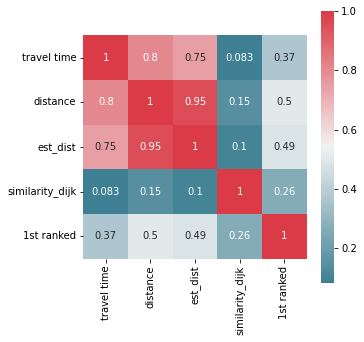

In [116]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(5,5))
corr = df22.corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [118]:
x = np.array(df22[['est_dist','1st ranked']])
y = np.array(df22['travel time'])
x

array([[5.19876318e-01, 8.74831974e+02],
       [5.28590233e-01, 8.74831974e+02],
       [2.58285167e-01, 8.74831974e+02],
       ...,
       [3.30778598e-01, 8.74831974e+02],
       [5.98851504e-01, 8.74831974e+02],
       [1.65882755e-01, 8.74831974e+02]])

In [119]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [120]:
print(X_train.shape)
print(X_test.shape)
# X_train

(6525, 2)
(1632, 2)


In [121]:
# inputs: distance + hour + dominant road
model3_3_1 = nnmodel(50, num_hlayers=1,Epoch=500)
model3_3_1

Epoch 1/500
204/204 [==============================] - 0s 1ms/step - loss: 361317.2500 - mape: 58.5335 - rmse: 601.0967 - val_loss: 161839.5000 - val_mape: 49.1058 - val_rmse: 402.2928
Epoch 2/500
204/204 [==============================] - 0s 766us/step - loss: 144287.6094 - mape: 49.7920 - rmse: 379.8521 - val_loss: 161227.1562 - val_mape: 50.3375 - val_rmse: 401.5310
Epoch 3/500
204/204 [==============================] - 0s 750us/step - loss: 144212.9375 - mape: 49.8102 - rmse: 379.7538 - val_loss: 161190.6406 - val_mape: 50.3151 - val_rmse: 401.4855
Epoch 4/500
204/204 [==============================] - 0s 749us/step - loss: 144190.8594 - mape: 49.7784 - rmse: 379.7247 - val_loss: 161059.2969 - val_mape: 51.8826 - val_rmse: 401.3219
Epoch 5/500
204/204 [==============================] - 0s 758us/step - loss: 144237.4375 - mape: 49.9219 - rmse: 379.7860 - val_loss: 160967.0938 - val_mape: 51.3901 - val_rmse: 401.2070
Epoch 6/500
204/204 [==============================] - 0s 760us/ste

Epoch 45/500
204/204 [==============================] - 0s 761us/step - loss: 140046.7188 - mape: 49.1983 - rmse: 374.2281 - val_loss: 157600.5000 - val_mape: 47.8851 - val_rmse: 396.9893
Epoch 46/500
204/204 [==============================] - 0s 856us/step - loss: 140072.4375 - mape: 48.5898 - rmse: 374.2625 - val_loss: 156667.8750 - val_mape: 51.5205 - val_rmse: 395.8129
Epoch 47/500
204/204 [==============================] - 0s 870us/step - loss: 139786.5625 - mape: 48.9780 - rmse: 373.8804 - val_loss: 156343.6719 - val_mape: 51.1421 - val_rmse: 395.4032
Epoch 48/500
204/204 [==============================] - 0s 749us/step - loss: 139452.0625 - mape: 48.8950 - rmse: 373.4328 - val_loss: 156012.2188 - val_mape: 49.8906 - val_rmse: 394.9838
Epoch 49/500
204/204 [==============================] - 0s 747us/step - loss: 139288.3906 - mape: 48.7544 - rmse: 373.2136 - val_loss: 155740.4531 - val_mape: 50.0275 - val_rmse: 394.6396
Epoch 50/500
204/204 [==============================] - 0s 7

204/204 [==============================] - 0s 740us/step - loss: 89737.4062 - mape: 35.1998 - rmse: 299.5620 - val_loss: 106928.3359 - val_mape: 36.1547 - val_rmse: 326.9990
Epoch 132/500
204/204 [==============================] - 0s 737us/step - loss: 89733.0938 - mape: 35.2552 - rmse: 299.5548 - val_loss: 106772.9531 - val_mape: 34.6236 - val_rmse: 326.7613
Epoch 133/500
204/204 [==============================] - 0s 728us/step - loss: 89334.2422 - mape: 34.8432 - rmse: 298.8883 - val_loss: 106354.0391 - val_mape: 38.0733 - val_rmse: 326.1197
Epoch 134/500
204/204 [==============================] - 0s 744us/step - loss: 88702.0469 - mape: 34.8909 - rmse: 297.8289 - val_loss: 107067.1797 - val_mape: 32.6302 - val_rmse: 327.2112
Epoch 135/500
204/204 [==============================] - 0s 732us/step - loss: 87572.6016 - mape: 34.4222 - rmse: 295.9267 - val_loss: 104827.5781 - val_mape: 35.7878 - val_rmse: 323.7709
Epoch 136/500
204/204 [==============================] - 0s 746us/step - l

Epoch 175/500
204/204 [==============================] - 0s 755us/step - loss: 76116.2578 - mape: 28.9577 - rmse: 275.8918 - val_loss: 93986.7188 - val_mape: 28.1619 - val_rmse: 306.5725
Epoch 176/500
204/204 [==============================] - 0s 730us/step - loss: 76510.2812 - mape: 28.9129 - rmse: 276.6049 - val_loss: 94488.7812 - val_mape: 32.8887 - val_rmse: 307.3903
Epoch 177/500
204/204 [==============================] - 0s 747us/step - loss: 76492.7891 - mape: 29.1524 - rmse: 276.5733 - val_loss: 93496.6875 - val_mape: 28.5998 - val_rmse: 305.7723
Epoch 178/500
204/204 [==============================] - 0s 749us/step - loss: 76146.9922 - mape: 29.0231 - rmse: 275.9474 - val_loss: 93276.2734 - val_mape: 28.7770 - val_rmse: 305.4117
Epoch 179/500
204/204 [==============================] - 0s 746us/step - loss: 75724.7422 - mape: 28.7975 - rmse: 275.1813 - val_loss: 93711.1406 - val_mape: 32.5552 - val_rmse: 306.1227
Epoch 180/500
204/204 [==============================] - 0s 769us

Epoch 219/500
204/204 [==============================] - 0s 736us/step - loss: 73788.4531 - mape: 27.5985 - rmse: 271.6403 - val_loss: 91553.6250 - val_mape: 26.0281 - val_rmse: 302.5783
Epoch 220/500
204/204 [==============================] - 0s 739us/step - loss: 73952.4141 - mape: 27.6113 - rmse: 271.9419 - val_loss: 92137.1875 - val_mape: 25.8181 - val_rmse: 303.5411
Epoch 221/500
204/204 [==============================] - 0s 744us/step - loss: 73855.8516 - mape: 27.6728 - rmse: 271.7643 - val_loss: 90665.0000 - val_mape: 28.7877 - val_rmse: 301.1063
Epoch 222/500
204/204 [==============================] - 0s 746us/step - loss: 73932.6328 - mape: 27.7053 - rmse: 271.9055 - val_loss: 94755.3047 - val_mape: 26.1324 - val_rmse: 307.8235
Epoch 223/500
204/204 [==============================] - 0s 744us/step - loss: 73705.7422 - mape: 27.6885 - rmse: 271.4880 - val_loss: 93291.6953 - val_mape: 24.8327 - val_rmse: 305.4369
Epoch 224/500
204/204 [==============================] - 0s 752us

Epoch 263/500
204/204 [==============================] - 0s 759us/step - loss: 73694.9375 - mape: 27.5895 - rmse: 271.4681 - val_loss: 90340.7734 - val_mape: 26.0935 - val_rmse: 300.5674
Epoch 264/500
204/204 [==============================] - 0s 728us/step - loss: 73291.5469 - mape: 27.5719 - rmse: 270.7241 - val_loss: 89752.4531 - val_mape: 28.5544 - val_rmse: 299.5871
Epoch 265/500
204/204 [==============================] - 0s 743us/step - loss: 73400.1094 - mape: 27.5661 - rmse: 270.9246 - val_loss: 90230.0625 - val_mape: 30.3301 - val_rmse: 300.3832
Epoch 266/500
204/204 [==============================] - 0s 762us/step - loss: 73360.7188 - mape: 27.4954 - rmse: 270.8518 - val_loss: 89770.2578 - val_mape: 28.7788 - val_rmse: 299.6169
Epoch 267/500
204/204 [==============================] - 0s 819us/step - loss: 73400.6406 - mape: 27.4316 - rmse: 270.9255 - val_loss: 93086.7734 - val_mape: 24.6863 - val_rmse: 305.1013
Epoch 268/500
204/204 [==============================] - 0s 817us

Epoch 307/500
204/204 [==============================] - 0s 738us/step - loss: 73081.9453 - mape: 27.4524 - rmse: 270.3367 - val_loss: 89192.2812 - val_mape: 28.0257 - val_rmse: 298.6508
Epoch 308/500
204/204 [==============================] - 0s 747us/step - loss: 72667.4141 - mape: 27.3043 - rmse: 269.5689 - val_loss: 91192.5000 - val_mape: 25.8804 - val_rmse: 301.9810
Epoch 309/500
204/204 [==============================] - 0s 733us/step - loss: 72358.8516 - mape: 27.2815 - rmse: 268.9960 - val_loss: 91182.1250 - val_mape: 32.3808 - val_rmse: 301.9638
Epoch 310/500
204/204 [==============================] - 0s 749us/step - loss: 73476.7188 - mape: 27.7201 - rmse: 271.0659 - val_loss: 89439.5391 - val_mape: 28.1130 - val_rmse: 299.0645
Epoch 311/500
204/204 [==============================] - 0s 759us/step - loss: 72481.9844 - mape: 27.4555 - rmse: 269.2248 - val_loss: 90091.0000 - val_mape: 25.9921 - val_rmse: 300.1516
Epoch 312/500
204/204 [==============================] - 0s 747us

Epoch 351/500
204/204 [==============================] - 0s 743us/step - loss: 72592.4844 - mape: 27.2674 - rmse: 269.4299 - val_loss: 89153.3906 - val_mape: 29.7748 - val_rmse: 298.5857
Epoch 352/500
204/204 [==============================] - 0s 755us/step - loss: 73447.6719 - mape: 27.9009 - rmse: 271.0123 - val_loss: 88999.2578 - val_mape: 29.2535 - val_rmse: 298.3274
Epoch 353/500
204/204 [==============================] - 0s 745us/step - loss: 72581.9844 - mape: 27.5415 - rmse: 269.4104 - val_loss: 89880.5391 - val_mape: 30.0016 - val_rmse: 299.8008
Epoch 354/500
204/204 [==============================] - 0s 744us/step - loss: 72576.2578 - mape: 27.3188 - rmse: 269.3998 - val_loss: 89297.6406 - val_mape: 26.8471 - val_rmse: 298.8271
Epoch 355/500
204/204 [==============================] - 0s 739us/step - loss: 72231.6250 - mape: 27.4483 - rmse: 268.7594 - val_loss: 89864.0391 - val_mape: 25.7789 - val_rmse: 299.7733
Epoch 356/500
204/204 [==============================] - 0s 740us

Epoch 395/500
204/204 [==============================] - 0s 740us/step - loss: 72290.7734 - mape: 27.5743 - rmse: 268.8694 - val_loss: 89114.8047 - val_mape: 26.3732 - val_rmse: 298.5210
Epoch 396/500
204/204 [==============================] - 0s 749us/step - loss: 72490.1094 - mape: 27.4941 - rmse: 269.2399 - val_loss: 89194.7422 - val_mape: 30.3284 - val_rmse: 298.6549
Epoch 397/500
204/204 [==============================] - 0s 739us/step - loss: 72863.7578 - mape: 27.6836 - rmse: 269.9329 - val_loss: 89366.0469 - val_mape: 30.6929 - val_rmse: 298.9416
Epoch 398/500
204/204 [==============================] - 0s 754us/step - loss: 72825.3672 - mape: 27.9881 - rmse: 269.8618 - val_loss: 89459.8125 - val_mape: 30.2848 - val_rmse: 299.0983
Epoch 399/500
204/204 [==============================] - 0s 768us/step - loss: 72324.5781 - mape: 27.5470 - rmse: 268.9323 - val_loss: 94796.7266 - val_mape: 24.1336 - val_rmse: 307.8908
Epoch 400/500
204/204 [==============================] - 0s 744us

Epoch 439/500
204/204 [==============================] - 0s 823us/step - loss: 72210.0938 - mape: 27.7910 - rmse: 268.7194 - val_loss: 88690.1953 - val_mape: 27.6118 - val_rmse: 297.8090
Epoch 440/500
204/204 [==============================] - 0s 815us/step - loss: 72244.2266 - mape: 27.4918 - rmse: 268.7829 - val_loss: 88792.6094 - val_mape: 29.7827 - val_rmse: 297.9809
Epoch 441/500
204/204 [==============================] - 0s 832us/step - loss: 72322.3359 - mape: 27.6379 - rmse: 268.9281 - val_loss: 88788.1641 - val_mape: 27.4871 - val_rmse: 297.9734
Epoch 442/500
204/204 [==============================] - 0s 818us/step - loss: 72559.3516 - mape: 27.7187 - rmse: 269.3684 - val_loss: 91281.4766 - val_mape: 25.1324 - val_rmse: 302.1282
Epoch 443/500
204/204 [==============================] - 0s 831us/step - loss: 72838.3672 - mape: 27.8357 - rmse: 269.8858 - val_loss: 90060.1953 - val_mape: 25.9972 - val_rmse: 300.1003
Epoch 444/500
204/204 [==============================] - 0s 816us

Epoch 483/500
204/204 [==============================] - 0s 745us/step - loss: 73263.1797 - mape: 28.0259 - rmse: 270.6717 - val_loss: 89396.4219 - val_mape: 25.7013 - val_rmse: 298.9923
Epoch 484/500
204/204 [==============================] - 0s 775us/step - loss: 72335.7891 - mape: 27.5516 - rmse: 268.9531 - val_loss: 90820.4141 - val_mape: 26.1536 - val_rmse: 301.3643
Epoch 485/500
204/204 [==============================] - 0s 838us/step - loss: 72312.1562 - mape: 27.7802 - rmse: 268.9092 - val_loss: 89350.0469 - val_mape: 27.2964 - val_rmse: 298.9148
Epoch 486/500
204/204 [==============================] - 0s 759us/step - loss: 72402.8438 - mape: 27.8029 - rmse: 269.0778 - val_loss: 88880.4375 - val_mape: 26.4806 - val_rmse: 298.1282
Epoch 487/500
204/204 [==============================] - 0s 782us/step - loss: 72053.3594 - mape: 27.4653 - rmse: 268.4276 - val_loss: 88726.6875 - val_mape: 29.4443 - val_rmse: 297.8702
Epoch 488/500
204/204 [==============================] - 0s 792us

In [122]:
# inputs: distance + hour + dominant road
model3_3_2 = nnmodel(100, num_hlayers=1,Epoch=500)
model3_3_2

Epoch 1/500
204/204 [==============================] - 0s 1ms/step - loss: 196256.5000 - mape: 48.6408 - rmse: 443.0085 - val_loss: 161456.4844 - val_mape: 52.9173 - val_rmse: 401.8165
Epoch 2/500
204/204 [==============================] - 0s 759us/step - loss: 144397.8750 - mape: 50.0527 - rmse: 379.9972 - val_loss: 161069.2344 - val_mape: 51.1030 - val_rmse: 401.3343
Epoch 3/500
204/204 [==============================] - 0s 809us/step - loss: 144385.0156 - mape: 49.8296 - rmse: 379.9803 - val_loss: 161115.0938 - val_mape: 50.3083 - val_rmse: 401.3914
Epoch 4/500
204/204 [==============================] - 0s 742us/step - loss: 144288.7031 - mape: 50.0077 - rmse: 379.8535 - val_loss: 161407.7031 - val_mape: 49.3836 - val_rmse: 401.7558
Epoch 5/500
204/204 [==============================] - 0s 748us/step - loss: 144212.5938 - mape: 49.7796 - rmse: 379.7533 - val_loss: 160891.0156 - val_mape: 52.0144 - val_rmse: 401.1122
Epoch 6/500
204/204 [==============================] - 0s 760us/ste

Epoch 45/500
204/204 [==============================] - 0s 794us/step - loss: 133423.5469 - mape: 47.6692 - rmse: 365.2719 - val_loss: 151230.4688 - val_mape: 45.3900 - val_rmse: 388.8836
Epoch 46/500
204/204 [==============================] - 0s 782us/step - loss: 132936.7031 - mape: 46.9478 - rmse: 364.6049 - val_loss: 148894.2656 - val_mape: 47.8351 - val_rmse: 385.8682
Epoch 47/500
204/204 [==============================] - 0s 812us/step - loss: 131965.2969 - mape: 46.9709 - rmse: 363.2703 - val_loss: 149681.3281 - val_mape: 52.0790 - val_rmse: 386.8867
Epoch 48/500
204/204 [==============================] - 0s 836us/step - loss: 131357.1875 - mape: 46.8960 - rmse: 362.4323 - val_loss: 147444.0312 - val_mape: 49.3824 - val_rmse: 383.9844
Epoch 49/500
204/204 [==============================] - 0s 816us/step - loss: 130126.7734 - mape: 46.8022 - rmse: 360.7309 - val_loss: 151837.4688 - val_mape: 42.4180 - val_rmse: 389.6633
Epoch 50/500
204/204 [==============================] - 0s 7

Epoch 89/500
204/204 [==============================] - 0s 763us/step - loss: 87546.6562 - mape: 34.3079 - rmse: 295.8828 - val_loss: 107845.7266 - val_mape: 30.9295 - val_rmse: 328.3987
Epoch 90/500
204/204 [==============================] - 0s 835us/step - loss: 87577.7109 - mape: 34.2721 - rmse: 295.9353 - val_loss: 103920.8203 - val_mape: 33.2384 - val_rmse: 322.3675
Epoch 91/500
204/204 [==============================] - 0s 737us/step - loss: 85962.8281 - mape: 33.7166 - rmse: 293.1942 - val_loss: 106055.0703 - val_mape: 30.4663 - val_rmse: 325.6610
Epoch 92/500
204/204 [==============================] - 0s 740us/step - loss: 85038.0625 - mape: 33.3527 - rmse: 291.6129 - val_loss: 103914.4688 - val_mape: 31.0396 - val_rmse: 322.3577
Epoch 93/500
204/204 [==============================] - 0s 744us/step - loss: 84969.3984 - mape: 33.1216 - rmse: 291.4951 - val_loss: 102215.7656 - val_mape: 36.8981 - val_rmse: 319.7120
Epoch 94/500
204/204 [==============================] - 0s 744us/

Epoch 133/500
204/204 [==============================] - 0s 744us/step - loss: 74348.4141 - mape: 27.8867 - rmse: 272.6691 - val_loss: 92304.0391 - val_mape: 26.2261 - val_rmse: 303.8158
Epoch 134/500
204/204 [==============================] - 0s 724us/step - loss: 74785.0156 - mape: 28.2962 - rmse: 273.4685 - val_loss: 91662.7656 - val_mape: 27.2181 - val_rmse: 302.7586
Epoch 135/500
204/204 [==============================] - 0s 747us/step - loss: 74551.8438 - mape: 27.9253 - rmse: 273.0418 - val_loss: 94653.5859 - val_mape: 24.8535 - val_rmse: 307.6582
Epoch 136/500
204/204 [==============================] - 0s 735us/step - loss: 75374.5859 - mape: 28.1346 - rmse: 274.5443 - val_loss: 91507.8516 - val_mape: 27.0194 - val_rmse: 302.5027
Epoch 137/500
204/204 [==============================] - 0s 744us/step - loss: 74471.1719 - mape: 27.3236 - rmse: 272.8941 - val_loss: 100963.8203 - val_mape: 38.5063 - val_rmse: 317.7480
Epoch 138/500
204/204 [==============================] - 0s 749u

Epoch 177/500
204/204 [==============================] - 0s 745us/step - loss: 73907.1953 - mape: 27.9121 - rmse: 271.8588 - val_loss: 92363.1641 - val_mape: 24.8737 - val_rmse: 303.9131
Epoch 178/500
204/204 [==============================] - 0s 744us/step - loss: 72965.9688 - mape: 27.6281 - rmse: 270.1221 - val_loss: 89687.8516 - val_mape: 27.2525 - val_rmse: 299.4793
Epoch 179/500
204/204 [==============================] - 0s 736us/step - loss: 73347.3672 - mape: 27.2645 - rmse: 270.8272 - val_loss: 89920.3125 - val_mape: 29.9498 - val_rmse: 299.8672
Epoch 180/500
204/204 [==============================] - 0s 779us/step - loss: 73619.4062 - mape: 27.8082 - rmse: 271.3289 - val_loss: 89777.9531 - val_mape: 29.0866 - val_rmse: 299.6297
Epoch 181/500
204/204 [==============================] - 0s 845us/step - loss: 73133.4922 - mape: 27.6831 - rmse: 270.4320 - val_loss: 89921.6562 - val_mape: 27.2871 - val_rmse: 299.8694
Epoch 182/500
204/204 [==============================] - 0s 739us

Epoch 221/500
204/204 [==============================] - 0s 756us/step - loss: 72945.5312 - mape: 27.6187 - rmse: 270.0843 - val_loss: 88893.4141 - val_mape: 28.9108 - val_rmse: 298.1500
Epoch 222/500
204/204 [==============================] - 0s 749us/step - loss: 72763.3906 - mape: 27.9500 - rmse: 269.7469 - val_loss: 90548.8203 - val_mape: 25.4696 - val_rmse: 300.9133
Epoch 223/500
204/204 [==============================] - 0s 751us/step - loss: 72961.8750 - mape: 27.9629 - rmse: 270.1146 - val_loss: 89049.0859 - val_mape: 28.5168 - val_rmse: 298.4109
Epoch 224/500
204/204 [==============================] - 0s 741us/step - loss: 72860.4766 - mape: 27.6236 - rmse: 269.9268 - val_loss: 89599.0391 - val_mape: 27.9582 - val_rmse: 299.3310
Epoch 225/500
204/204 [==============================] - 0s 739us/step - loss: 73034.9922 - mape: 27.5899 - rmse: 270.2499 - val_loss: 88941.7734 - val_mape: 27.6966 - val_rmse: 298.2311
Epoch 226/500
204/204 [==============================] - 0s 751us

Epoch 265/500
204/204 [==============================] - 0s 734us/step - loss: 72605.4219 - mape: 28.0789 - rmse: 269.4539 - val_loss: 90029.8984 - val_mape: 32.3034 - val_rmse: 300.0498
Epoch 266/500
204/204 [==============================] - 0s 747us/step - loss: 72673.7578 - mape: 27.9192 - rmse: 269.5807 - val_loss: 89321.4531 - val_mape: 29.7785 - val_rmse: 298.8669
Epoch 267/500
204/204 [==============================] - 0s 857us/step - loss: 73199.4453 - mape: 28.3440 - rmse: 270.5540 - val_loss: 90365.4375 - val_mape: 25.2133 - val_rmse: 300.6085
Epoch 268/500
204/204 [==============================] - 0s 821us/step - loss: 73286.8984 - mape: 28.1803 - rmse: 270.7155 - val_loss: 90946.3516 - val_mape: 26.8106 - val_rmse: 301.5731
Epoch 269/500
204/204 [==============================] - 0s 739us/step - loss: 72349.8359 - mape: 27.8460 - rmse: 268.9792 - val_loss: 90401.7422 - val_mape: 32.5111 - val_rmse: 300.6688
Epoch 270/500
204/204 [==============================] - 0s 749us

Epoch 309/500
204/204 [==============================] - 0s 827us/step - loss: 72782.9531 - mape: 28.1912 - rmse: 269.7832 - val_loss: 88619.5234 - val_mape: 27.4665 - val_rmse: 297.6903
Epoch 310/500
204/204 [==============================] - 0s 823us/step - loss: 72474.0781 - mape: 28.0740 - rmse: 269.2101 - val_loss: 89687.4922 - val_mape: 31.8048 - val_rmse: 299.4787
Epoch 311/500
204/204 [==============================] - 0s 823us/step - loss: 72747.2969 - mape: 27.9815 - rmse: 269.7171 - val_loss: 88399.5781 - val_mape: 27.4993 - val_rmse: 297.3207
Epoch 312/500
204/204 [==============================] - 0s 824us/step - loss: 72617.9609 - mape: 28.0965 - rmse: 269.4772 - val_loss: 88984.9609 - val_mape: 29.8389 - val_rmse: 298.3035
Epoch 313/500
204/204 [==============================] - 0s 816us/step - loss: 72623.6406 - mape: 28.3561 - rmse: 269.4877 - val_loss: 88839.2734 - val_mape: 26.4612 - val_rmse: 298.0592
Epoch 314/500
204/204 [==============================] - 0s 813us

Epoch 353/500
204/204 [==============================] - 0s 755us/step - loss: 72639.6875 - mape: 27.8544 - rmse: 269.5175 - val_loss: 88778.1641 - val_mape: 27.7599 - val_rmse: 297.9566
Epoch 354/500
204/204 [==============================] - 0s 772us/step - loss: 72776.9609 - mape: 28.1630 - rmse: 269.7721 - val_loss: 88159.0312 - val_mape: 28.8023 - val_rmse: 296.9159
Epoch 355/500
204/204 [==============================] - 0s 753us/step - loss: 72334.3984 - mape: 27.8996 - rmse: 268.9506 - val_loss: 88328.7734 - val_mape: 28.5912 - val_rmse: 297.2016
Epoch 356/500
204/204 [==============================] - 0s 770us/step - loss: 73181.7031 - mape: 28.2414 - rmse: 270.5212 - val_loss: 89024.4766 - val_mape: 26.8200 - val_rmse: 298.3697
Epoch 357/500
204/204 [==============================] - 0s 729us/step - loss: 72436.7031 - mape: 27.9751 - rmse: 269.1407 - val_loss: 88215.0078 - val_mape: 29.1620 - val_rmse: 297.0101
Epoch 358/500
204/204 [==============================] - 0s 744us

Epoch 397/500
204/204 [==============================] - 0s 744us/step - loss: 72736.4844 - mape: 28.0665 - rmse: 269.6970 - val_loss: 88671.1094 - val_mape: 27.7361 - val_rmse: 297.7769
Epoch 398/500
204/204 [==============================] - 0s 729us/step - loss: 72553.0156 - mape: 28.1378 - rmse: 269.3567 - val_loss: 88451.7422 - val_mape: 28.9902 - val_rmse: 297.4084
Epoch 399/500
204/204 [==============================] - 0s 749us/step - loss: 72283.4844 - mape: 28.0541 - rmse: 268.8559 - val_loss: 89013.4688 - val_mape: 26.4088 - val_rmse: 298.3513
Epoch 400/500
204/204 [==============================] - 0s 745us/step - loss: 72595.9531 - mape: 28.0910 - rmse: 269.4364 - val_loss: 88133.6953 - val_mape: 29.1511 - val_rmse: 296.8732
Epoch 401/500
204/204 [==============================] - 0s 767us/step - loss: 72229.9219 - mape: 27.9861 - rmse: 268.7563 - val_loss: 88460.2344 - val_mape: 28.8695 - val_rmse: 297.4226
Epoch 402/500
204/204 [==============================] - 0s 752us

Epoch 441/500
204/204 [==============================] - 0s 743us/step - loss: 72984.9219 - mape: 28.1074 - rmse: 270.1572 - val_loss: 88646.1953 - val_mape: 29.5565 - val_rmse: 297.7351
Epoch 442/500
204/204 [==============================] - 0s 758us/step - loss: 72129.4297 - mape: 28.1508 - rmse: 268.5692 - val_loss: 88219.0391 - val_mape: 28.3072 - val_rmse: 297.0169
Epoch 443/500
204/204 [==============================] - 0s 740us/step - loss: 72246.6641 - mape: 27.9139 - rmse: 268.7874 - val_loss: 88378.2969 - val_mape: 29.6938 - val_rmse: 297.2849
Epoch 444/500
204/204 [==============================] - 0s 749us/step - loss: 72899.4609 - mape: 28.3651 - rmse: 269.9990 - val_loss: 89774.0234 - val_mape: 25.5927 - val_rmse: 299.6231
Epoch 445/500
204/204 [==============================] - 0s 753us/step - loss: 72451.7500 - mape: 28.0779 - rmse: 269.1686 - val_loss: 90412.3828 - val_mape: 26.4261 - val_rmse: 300.6865
Epoch 446/500
204/204 [==============================] - 0s 759us

Epoch 485/500
204/204 [==============================] - 0s 740us/step - loss: 72201.8750 - mape: 27.8433 - rmse: 268.7041 - val_loss: 88488.1953 - val_mape: 28.3744 - val_rmse: 297.4697
Epoch 486/500
204/204 [==============================] - 0s 749us/step - loss: 73304.7422 - mape: 28.5386 - rmse: 270.7485 - val_loss: 88189.4375 - val_mape: 29.2643 - val_rmse: 296.9671
Epoch 487/500
204/204 [==============================] - 0s 759us/step - loss: 72580.7344 - mape: 28.2184 - rmse: 269.4081 - val_loss: 88128.1484 - val_mape: 28.5152 - val_rmse: 296.8639
Epoch 488/500
204/204 [==============================] - 0s 748us/step - loss: 72073.0234 - mape: 28.0035 - rmse: 268.4642 - val_loss: 88630.9766 - val_mape: 27.4154 - val_rmse: 297.7096
Epoch 489/500
204/204 [==============================] - 0s 742us/step - loss: 72824.8516 - mape: 28.1648 - rmse: 269.8608 - val_loss: 88491.9922 - val_mape: 26.9565 - val_rmse: 297.4760
Epoch 490/500
204/204 [==============================] - 0s 749us

In [123]:
# inputs: distance + hour + dominant road
model3_3_3 = nnmodel(300, num_hlayers=1,Epoch=500)
model3_3_3

Epoch 1/500
204/204 [==============================] - 0s 1ms/step - loss: 193165.6719 - mape: 50.9788 - rmse: 439.5062 - val_loss: 161203.5938 - val_mape: 52.3114 - val_rmse: 401.5017
Epoch 2/500
204/204 [==============================] - 0s 818us/step - loss: 144559.0938 - mape: 49.7355 - rmse: 380.2093 - val_loss: 160964.0156 - val_mape: 50.9053 - val_rmse: 401.2032
Epoch 3/500
204/204 [==============================] - 0s 799us/step - loss: 144549.3750 - mape: 50.0574 - rmse: 380.1965 - val_loss: 160969.2969 - val_mape: 50.1521 - val_rmse: 401.2098
Epoch 4/500
204/204 [==============================] - 0s 795us/step - loss: 144371.0000 - mape: 49.9255 - rmse: 379.9619 - val_loss: 160655.3750 - val_mape: 51.2412 - val_rmse: 400.8184
Epoch 5/500
204/204 [==============================] - 0s 805us/step - loss: 144353.6094 - mape: 49.5893 - rmse: 379.9390 - val_loss: 160587.5312 - val_mape: 50.3693 - val_rmse: 400.7337
Epoch 6/500
204/204 [==============================] - 0s 830us/ste

Epoch 45/500
204/204 [==============================] - 0s 810us/step - loss: 99170.8203 - mape: 38.0702 - rmse: 314.9140 - val_loss: 117840.7422 - val_mape: 44.8905 - val_rmse: 343.2794
Epoch 46/500
204/204 [==============================] - 0s 790us/step - loss: 97703.9531 - mape: 37.7593 - rmse: 312.5763 - val_loss: 112783.1953 - val_mape: 40.3351 - val_rmse: 335.8321
Epoch 47/500
204/204 [==============================] - 0s 802us/step - loss: 96319.0703 - mape: 37.0624 - rmse: 310.3531 - val_loss: 117671.2578 - val_mape: 31.9481 - val_rmse: 343.0324
Epoch 48/500
204/204 [==============================] - 0s 793us/step - loss: 93202.8594 - mape: 36.3361 - rmse: 305.2914 - val_loss: 109366.7266 - val_mape: 38.5496 - val_rmse: 330.7064
Epoch 49/500
204/204 [==============================] - 0s 787us/step - loss: 91826.6406 - mape: 35.8413 - rmse: 303.0291 - val_loss: 108130.5000 - val_mape: 34.8256 - val_rmse: 328.8320
Epoch 50/500
204/204 [==============================] - 0s 800us/

Epoch 89/500
204/204 [==============================] - 0s 795us/step - loss: 76653.4844 - mape: 28.0343 - rmse: 276.8636 - val_loss: 92056.2344 - val_mape: 30.8452 - val_rmse: 303.4077
Epoch 90/500
204/204 [==============================] - 0s 783us/step - loss: 74874.7734 - mape: 27.4019 - rmse: 273.6325 - val_loss: 94251.8594 - val_mape: 24.2167 - val_rmse: 307.0047
Epoch 91/500
204/204 [==============================] - 0s 785us/step - loss: 76558.7109 - mape: 28.0614 - rmse: 276.6924 - val_loss: 91379.6797 - val_mape: 26.9509 - val_rmse: 302.2907
Epoch 92/500
204/204 [==============================] - 0s 806us/step - loss: 75120.7500 - mape: 27.3895 - rmse: 274.0816 - val_loss: 92060.0703 - val_mape: 25.7655 - val_rmse: 303.4140
Epoch 93/500
204/204 [==============================] - 0s 852us/step - loss: 74893.9531 - mape: 27.2677 - rmse: 273.6676 - val_loss: 91276.7266 - val_mape: 27.0999 - val_rmse: 302.1204
Epoch 94/500
204/204 [==============================] - 0s 803us/step 

Epoch 133/500
204/204 [==============================] - 0s 792us/step - loss: 74375.7891 - mape: 27.9643 - rmse: 272.7192 - val_loss: 91309.0859 - val_mape: 25.2136 - val_rmse: 302.1739
Epoch 134/500
204/204 [==============================] - 0s 797us/step - loss: 75403.1250 - mape: 27.8163 - rmse: 274.5963 - val_loss: 93023.8984 - val_mape: 24.3197 - val_rmse: 304.9982
Epoch 135/500
204/204 [==============================] - 0s 787us/step - loss: 75700.1562 - mape: 27.7512 - rmse: 275.1366 - val_loss: 89992.9766 - val_mape: 27.3511 - val_rmse: 299.9883
Epoch 136/500
204/204 [==============================] - 0s 798us/step - loss: 74554.8047 - mape: 27.7223 - rmse: 273.0473 - val_loss: 92257.3359 - val_mape: 24.5556 - val_rmse: 303.7389
Epoch 137/500
204/204 [==============================] - 0s 801us/step - loss: 73655.1641 - mape: 27.5937 - rmse: 271.3948 - val_loss: 92295.2422 - val_mape: 33.1044 - val_rmse: 303.8013
Epoch 138/500
204/204 [==============================] - 0s 801us

Epoch 177/500
204/204 [==============================] - 0s 807us/step - loss: 74811.4062 - mape: 27.8124 - rmse: 273.5167 - val_loss: 91605.0078 - val_mape: 25.1138 - val_rmse: 302.6632
Epoch 178/500
204/204 [==============================] - 0s 797us/step - loss: 74867.6484 - mape: 27.8766 - rmse: 273.6195 - val_loss: 89957.8984 - val_mape: 28.3058 - val_rmse: 299.9298
Epoch 179/500
204/204 [==============================] - 0s 793us/step - loss: 74647.8906 - mape: 27.9960 - rmse: 273.2177 - val_loss: 93758.2734 - val_mape: 23.5207 - val_rmse: 306.1997
Epoch 180/500
204/204 [==============================] - 0s 796us/step - loss: 74090.0859 - mape: 27.7013 - rmse: 272.1949 - val_loss: 91383.1406 - val_mape: 24.8454 - val_rmse: 302.2964
Epoch 181/500
204/204 [==============================] - 0s 791us/step - loss: 73709.7422 - mape: 27.4490 - rmse: 271.4954 - val_loss: 89818.7266 - val_mape: 26.4172 - val_rmse: 299.6977
Epoch 182/500
204/204 [==============================] - 0s 794us

Epoch 221/500
204/204 [==============================] - 0s 807us/step - loss: 73971.2109 - mape: 27.4578 - rmse: 271.9765 - val_loss: 89681.3984 - val_mape: 29.6729 - val_rmse: 299.4685
Epoch 222/500
204/204 [==============================] - 0s 808us/step - loss: 74314.8359 - mape: 27.8283 - rmse: 272.6075 - val_loss: 93743.2578 - val_mape: 34.8002 - val_rmse: 306.1752
Epoch 223/500
204/204 [==============================] - 0s 797us/step - loss: 73872.7500 - mape: 27.6208 - rmse: 271.7954 - val_loss: 93861.0312 - val_mape: 34.9134 - val_rmse: 306.3675
Epoch 224/500
204/204 [==============================] - 0s 803us/step - loss: 74015.2656 - mape: 27.4929 - rmse: 272.0575 - val_loss: 91399.8438 - val_mape: 32.5588 - val_rmse: 302.3241
Epoch 225/500
204/204 [==============================] - 0s 830us/step - loss: 74965.0938 - mape: 28.1355 - rmse: 273.7975 - val_loss: 89405.6484 - val_mape: 28.2254 - val_rmse: 299.0078
Epoch 226/500
204/204 [==============================] - 0s 791us

Epoch 265/500
204/204 [==============================] - 0s 815us/step - loss: 74108.7891 - mape: 27.8767 - rmse: 272.2293 - val_loss: 92352.3359 - val_mape: 24.1658 - val_rmse: 303.8953
Epoch 266/500
204/204 [==============================] - 0s 829us/step - loss: 73672.0234 - mape: 27.6523 - rmse: 271.4259 - val_loss: 95637.4141 - val_mape: 23.0670 - val_rmse: 309.2530
Epoch 267/500
204/204 [==============================] - 0s 880us/step - loss: 74410.5312 - mape: 27.7737 - rmse: 272.7829 - val_loss: 95969.7812 - val_mape: 23.1401 - val_rmse: 309.7899
Epoch 268/500
204/204 [==============================] - 0s 822us/step - loss: 74922.8438 - mape: 27.9349 - rmse: 273.7204 - val_loss: 92610.1484 - val_mape: 34.1864 - val_rmse: 304.3192
Epoch 269/500
204/204 [==============================] - 0s 788us/step - loss: 74278.9922 - mape: 27.7545 - rmse: 272.5417 - val_loss: 89922.4375 - val_mape: 30.5166 - val_rmse: 299.8707
Epoch 270/500
204/204 [==============================] - 0s 836us

Epoch 309/500
204/204 [==============================] - 0s 792us/step - loss: 74461.0938 - mape: 27.6678 - rmse: 272.8756 - val_loss: 93401.2812 - val_mape: 34.8409 - val_rmse: 305.6162
Epoch 310/500
204/204 [==============================] - 0s 796us/step - loss: 74595.7031 - mape: 27.9191 - rmse: 273.1221 - val_loss: 89699.2578 - val_mape: 29.8528 - val_rmse: 299.4984
Epoch 311/500
204/204 [==============================] - 0s 781us/step - loss: 74114.9844 - mape: 27.7014 - rmse: 272.2407 - val_loss: 90115.7969 - val_mape: 30.8581 - val_rmse: 300.1929
Epoch 312/500
204/204 [==============================] - 0s 806us/step - loss: 74031.0156 - mape: 27.7471 - rmse: 272.0864 - val_loss: 90560.5078 - val_mape: 31.6277 - val_rmse: 300.9327
Epoch 313/500
204/204 [==============================] - 0s 848us/step - loss: 73853.4375 - mape: 27.6611 - rmse: 271.7599 - val_loss: 90809.5859 - val_mape: 31.9951 - val_rmse: 301.3463
Epoch 314/500
204/204 [==============================] - 0s 872us

Epoch 353/500
204/204 [==============================] - 0s 842us/step - loss: 75139.0234 - mape: 28.2690 - rmse: 274.1150 - val_loss: 97261.7266 - val_mape: 22.6396 - val_rmse: 311.8681
Epoch 354/500
204/204 [==============================] - 0s 869us/step - loss: 74478.7188 - mape: 27.8229 - rmse: 272.9079 - val_loss: 89606.5312 - val_mape: 29.5351 - val_rmse: 299.3435
Epoch 355/500
204/204 [==============================] - 0s 847us/step - loss: 73655.7578 - mape: 27.7045 - rmse: 271.3959 - val_loss: 89481.2969 - val_mape: 27.8949 - val_rmse: 299.1342
Epoch 356/500
204/204 [==============================] - 0s 848us/step - loss: 75175.2891 - mape: 28.1417 - rmse: 274.1811 - val_loss: 90156.1172 - val_mape: 30.9442 - val_rmse: 300.2601
Epoch 357/500
204/204 [==============================] - 0s 857us/step - loss: 74072.0469 - mape: 27.9557 - rmse: 272.1618 - val_loss: 90822.3594 - val_mape: 32.0394 - val_rmse: 301.3675
Epoch 358/500
204/204 [==============================] - 0s 809us

Epoch 397/500
204/204 [==============================] - 0s 837us/step - loss: 73815.4297 - mape: 27.6738 - rmse: 271.6899 - val_loss: 105051.2188 - val_mape: 22.0853 - val_rmse: 324.1161
Epoch 398/500
204/204 [==============================] - 0s 842us/step - loss: 74413.6250 - mape: 27.9281 - rmse: 272.7886 - val_loss: 89477.2969 - val_mape: 28.8747 - val_rmse: 299.1276
Epoch 399/500
204/204 [==============================] - 0s 846us/step - loss: 75172.9219 - mape: 28.0702 - rmse: 274.1768 - val_loss: 91570.8516 - val_mape: 24.7386 - val_rmse: 302.6068
Epoch 400/500
204/204 [==============================] - 0s 852us/step - loss: 74319.8047 - mape: 27.7263 - rmse: 272.6166 - val_loss: 89590.1797 - val_mape: 29.4800 - val_rmse: 299.3162
Epoch 401/500
204/204 [==============================] - 0s 862us/step - loss: 74264.2031 - mape: 27.8278 - rmse: 272.5146 - val_loss: 90954.2344 - val_mape: 32.2129 - val_rmse: 301.5862
Epoch 402/500
204/204 [==============================] - 0s 854u

Epoch 441/500
204/204 [==============================] - 0s 790us/step - loss: 74275.0859 - mape: 27.8011 - rmse: 272.5345 - val_loss: 91511.4609 - val_mape: 24.7317 - val_rmse: 302.5086
Epoch 442/500
204/204 [==============================] - 0s 787us/step - loss: 73895.6797 - mape: 27.5581 - rmse: 271.8376 - val_loss: 91588.7031 - val_mape: 32.9946 - val_rmse: 302.6363
Epoch 443/500
204/204 [==============================] - 0s 791us/step - loss: 75625.2109 - mape: 28.3968 - rmse: 275.0004 - val_loss: 90224.6250 - val_mape: 26.0240 - val_rmse: 300.3741
Epoch 444/500
204/204 [==============================] - 0s 785us/step - loss: 74440.3047 - mape: 28.0410 - rmse: 272.8375 - val_loss: 90087.9688 - val_mape: 30.8339 - val_rmse: 300.1466
Epoch 445/500
204/204 [==============================] - 0s 797us/step - loss: 73848.8516 - mape: 27.8363 - rmse: 271.7515 - val_loss: 89778.1406 - val_mape: 30.1125 - val_rmse: 299.6300
Epoch 446/500
204/204 [==============================] - 0s 832us

Epoch 485/500
204/204 [==============================] - 0s 796us/step - loss: 74950.5625 - mape: 28.0236 - rmse: 273.7710 - val_loss: 89566.6406 - val_mape: 29.4060 - val_rmse: 299.2769
Epoch 486/500
204/204 [==============================] - 0s 794us/step - loss: 73477.3672 - mape: 27.6339 - rmse: 271.0671 - val_loss: 91582.4922 - val_mape: 24.7172 - val_rmse: 302.6260
Epoch 487/500
204/204 [==============================] - 0s 800us/step - loss: 74527.3672 - mape: 27.8524 - rmse: 272.9970 - val_loss: 93910.3906 - val_mape: 23.5282 - val_rmse: 306.4480
Epoch 488/500
204/204 [==============================] - 0s 806us/step - loss: 73763.2500 - mape: 27.5564 - rmse: 271.5939 - val_loss: 90039.0078 - val_mape: 30.7231 - val_rmse: 300.0650
Epoch 489/500
204/204 [==============================] - 0s 833us/step - loss: 74526.3828 - mape: 28.0099 - rmse: 272.9952 - val_loss: 89717.3438 - val_mape: 29.9382 - val_rmse: 299.5285
Epoch 490/500
204/204 [==============================] - 0s 795us

In [124]:
# inputs: distance + hour + dominant road
model3_3_4 = nnmodel(100,50, num_hlayers=2,Epoch=500)
model3_3_4

Epoch 1/500
204/204 [==============================] - 0s 1ms/step - loss: 180758.1719 - mape: 51.7983 - rmse: 425.1566 - val_loss: 161120.0938 - val_mape: 51.3841 - val_rmse: 401.3977
Epoch 2/500
204/204 [==============================] - 0s 841us/step - loss: 144783.2344 - mape: 50.0172 - rmse: 380.5039 - val_loss: 162615.3281 - val_mape: 48.0670 - val_rmse: 403.2559
Epoch 3/500
204/204 [==============================] - 0s 826us/step - loss: 144578.1250 - mape: 49.7122 - rmse: 380.2343 - val_loss: 160965.7188 - val_mape: 51.5827 - val_rmse: 401.2053
Epoch 4/500
204/204 [==============================] - 0s 829us/step - loss: 144428.0625 - mape: 49.9609 - rmse: 380.0369 - val_loss: 160869.8125 - val_mape: 51.1692 - val_rmse: 401.0858
Epoch 5/500
204/204 [==============================] - 0s 828us/step - loss: 144818.6094 - mape: 49.8605 - rmse: 380.5504 - val_loss: 161436.4219 - val_mape: 49.1135 - val_rmse: 401.7915
Epoch 6/500
204/204 [==============================] - 0s 827us/ste

Epoch 45/500
204/204 [==============================] - 0s 813us/step - loss: 77513.2031 - mape: 28.4629 - rmse: 278.4119 - val_loss: 96881.8594 - val_mape: 34.1057 - val_rmse: 311.2585
Epoch 46/500
204/204 [==============================] - 0s 813us/step - loss: 77511.8438 - mape: 28.5098 - rmse: 278.4095 - val_loss: 94309.3203 - val_mape: 26.6607 - val_rmse: 307.0982
Epoch 47/500
204/204 [==============================] - 0s 811us/step - loss: 76379.0938 - mape: 27.8811 - rmse: 276.3677 - val_loss: 94299.7578 - val_mape: 25.9362 - val_rmse: 307.0826
Epoch 48/500
204/204 [==============================] - 0s 827us/step - loss: 77136.6953 - mape: 28.2062 - rmse: 277.7349 - val_loss: 93394.1953 - val_mape: 31.9131 - val_rmse: 305.6046
Epoch 49/500
204/204 [==============================] - 0s 828us/step - loss: 76579.2578 - mape: 28.0449 - rmse: 276.7296 - val_loss: 97472.3516 - val_mape: 25.1919 - val_rmse: 312.2056
Epoch 50/500
204/204 [==============================] - 0s 821us/step 

204/204 [==============================] - 0s 843us/step - loss: 75796.2578 - mape: 28.0715 - rmse: 275.3112 - val_loss: 91797.5000 - val_mape: 25.4439 - val_rmse: 302.9810
Epoch 90/500
204/204 [==============================] - 0s 833us/step - loss: 75452.5703 - mape: 27.7184 - rmse: 274.6863 - val_loss: 90174.7734 - val_mape: 28.9463 - val_rmse: 300.2911
Epoch 91/500
204/204 [==============================] - 0s 813us/step - loss: 74349.7422 - mape: 27.5153 - rmse: 272.6715 - val_loss: 90601.2188 - val_mape: 25.7787 - val_rmse: 301.0004
Epoch 92/500
204/204 [==============================] - 0s 825us/step - loss: 74901.6016 - mape: 27.6351 - rmse: 273.6816 - val_loss: 90084.7656 - val_mape: 28.4150 - val_rmse: 300.1412
Epoch 93/500
204/204 [==============================] - 0s 822us/step - loss: 74387.8750 - mape: 27.3599 - rmse: 272.7414 - val_loss: 90748.4141 - val_mape: 26.4694 - val_rmse: 301.2448
Epoch 94/500
204/204 [==============================] - 0s 807us/step - loss: 77386

Epoch 133/500
204/204 [==============================] - 0s 847us/step - loss: 74103.3828 - mape: 27.8258 - rmse: 272.2194 - val_loss: 91155.2812 - val_mape: 26.2506 - val_rmse: 301.9193
Epoch 134/500
204/204 [==============================] - 0s 844us/step - loss: 74939.7500 - mape: 27.9369 - rmse: 273.7513 - val_loss: 101090.2344 - val_mape: 39.9624 - val_rmse: 317.9469
Epoch 135/500
204/204 [==============================] - 0s 829us/step - loss: 75492.2109 - mape: 28.2736 - rmse: 274.7585 - val_loss: 90660.9922 - val_mape: 31.8416 - val_rmse: 301.0996
Epoch 136/500
204/204 [==============================] - 0s 813us/step - loss: 74990.8281 - mape: 27.8967 - rmse: 273.8445 - val_loss: 89874.9688 - val_mape: 29.2955 - val_rmse: 299.7915
Epoch 137/500
204/204 [==============================] - 0s 813us/step - loss: 74149.0312 - mape: 27.9740 - rmse: 272.3032 - val_loss: 89765.7578 - val_mape: 30.4705 - val_rmse: 299.6093
Epoch 138/500
204/204 [==============================] - 0s 813u

Epoch 177/500
204/204 [==============================] - 0s 826us/step - loss: 74186.1875 - mape: 28.1337 - rmse: 272.3714 - val_loss: 93816.0078 - val_mape: 36.2166 - val_rmse: 306.2940
Epoch 178/500
204/204 [==============================] - 0s 819us/step - loss: 74693.2031 - mape: 28.5719 - rmse: 273.3006 - val_loss: 94596.2812 - val_mape: 24.1887 - val_rmse: 307.5651
Epoch 179/500
204/204 [==============================] - 0s 824us/step - loss: 75001.2188 - mape: 28.5470 - rmse: 273.8635 - val_loss: 89032.1953 - val_mape: 29.0898 - val_rmse: 298.3826
Epoch 180/500
204/204 [==============================] - 0s 810us/step - loss: 73581.4453 - mape: 28.2624 - rmse: 271.2590 - val_loss: 91520.8203 - val_mape: 25.3606 - val_rmse: 302.5241
Epoch 181/500
204/204 [==============================] - 0s 810us/step - loss: 75659.1250 - mape: 28.6362 - rmse: 275.0620 - val_loss: 89282.4766 - val_mape: 26.9237 - val_rmse: 298.8017
Epoch 182/500
204/204 [==============================] - 0s 827us

Epoch 221/500
204/204 [==============================] - 0s 817us/step - loss: 74037.6328 - mape: 28.0018 - rmse: 272.0986 - val_loss: 91654.5469 - val_mape: 33.5684 - val_rmse: 302.7450
Epoch 222/500
204/204 [==============================] - 0s 814us/step - loss: 73298.5469 - mape: 27.7816 - rmse: 270.7370 - val_loss: 94744.2656 - val_mape: 36.4284 - val_rmse: 307.8056
Epoch 223/500
204/204 [==============================] - 0s 817us/step - loss: 74070.8047 - mape: 28.0597 - rmse: 272.1595 - val_loss: 90035.9609 - val_mape: 25.5963 - val_rmse: 300.0599
Epoch 224/500
204/204 [==============================] - 0s 822us/step - loss: 74309.6641 - mape: 27.9359 - rmse: 272.5980 - val_loss: 89506.1172 - val_mape: 29.6985 - val_rmse: 299.1757
Epoch 225/500
204/204 [==============================] - 0s 821us/step - loss: 74830.4219 - mape: 28.2647 - rmse: 273.5515 - val_loss: 108518.1797 - val_mape: 22.2438 - val_rmse: 329.4210
Epoch 226/500
204/204 [==============================] - 0s 819u

Epoch 265/500
204/204 [==============================] - 0s 837us/step - loss: 74330.1172 - mape: 28.2364 - rmse: 272.6355 - val_loss: 89570.0000 - val_mape: 30.4286 - val_rmse: 299.2825
Epoch 266/500
204/204 [==============================] - 0s 819us/step - loss: 73516.0938 - mape: 27.9006 - rmse: 271.1385 - val_loss: 90277.6172 - val_mape: 32.4430 - val_rmse: 300.4623
Epoch 267/500
204/204 [==============================] - 0s 828us/step - loss: 74324.1484 - mape: 28.1600 - rmse: 272.6245 - val_loss: 88750.7422 - val_mape: 28.7691 - val_rmse: 297.9106
Epoch 268/500
204/204 [==============================] - 0s 822us/step - loss: 73691.0547 - mape: 28.0822 - rmse: 271.4610 - val_loss: 88971.5000 - val_mape: 27.4536 - val_rmse: 298.2809
Epoch 269/500
204/204 [==============================] - 0s 813us/step - loss: 73051.4375 - mape: 28.1930 - rmse: 270.2803 - val_loss: 92012.3125 - val_mape: 33.0979 - val_rmse: 303.3353
Epoch 270/500
204/204 [==============================] - 0s 813us

Epoch 309/500
204/204 [==============================] - 0s 821us/step - loss: 73783.4453 - mape: 28.0547 - rmse: 271.6311 - val_loss: 89172.6484 - val_mape: 30.7840 - val_rmse: 298.6179
Epoch 310/500
204/204 [==============================] - 0s 819us/step - loss: 72788.3203 - mape: 27.9832 - rmse: 269.7931 - val_loss: 92996.2031 - val_mape: 24.4337 - val_rmse: 304.9528
Epoch 311/500
204/204 [==============================] - 0s 812us/step - loss: 74917.4141 - mape: 28.5159 - rmse: 273.7104 - val_loss: 88900.6953 - val_mape: 28.4916 - val_rmse: 298.1622
Epoch 312/500
204/204 [==============================] - 0s 821us/step - loss: 73836.4297 - mape: 27.6295 - rmse: 271.7286 - val_loss: 91584.3750 - val_mape: 24.7809 - val_rmse: 302.6291
Epoch 313/500
204/204 [==============================] - 0s 816us/step - loss: 73849.8672 - mape: 28.1374 - rmse: 271.7533 - val_loss: 89444.9531 - val_mape: 30.7833 - val_rmse: 299.0735
Epoch 314/500
204/204 [==============================] - 0s 804us

Epoch 353/500
204/204 [==============================] - 0s 820us/step - loss: 74471.3750 - mape: 28.4141 - rmse: 272.8944 - val_loss: 89619.8594 - val_mape: 25.6610 - val_rmse: 299.3658
Epoch 354/500
204/204 [==============================] - 0s 807us/step - loss: 74537.2656 - mape: 28.3953 - rmse: 273.0151 - val_loss: 93953.4219 - val_mape: 26.1257 - val_rmse: 306.5182
Epoch 355/500
204/204 [==============================] - 0s 813us/step - loss: 73507.8359 - mape: 28.1781 - rmse: 271.1233 - val_loss: 90033.3438 - val_mape: 31.9168 - val_rmse: 300.0556
Epoch 356/500
204/204 [==============================] - 0s 817us/step - loss: 73739.2344 - mape: 28.4877 - rmse: 271.5497 - val_loss: 88454.8906 - val_mape: 29.5169 - val_rmse: 297.4137
Epoch 357/500
204/204 [==============================] - 0s 812us/step - loss: 72389.5781 - mape: 27.8884 - rmse: 269.0531 - val_loss: 88320.0000 - val_mape: 29.5790 - val_rmse: 297.1868
Epoch 358/500
204/204 [==============================] - 0s 808us

Epoch 397/500
204/204 [==============================] - 0s 822us/step - loss: 74034.8203 - mape: 28.6481 - rmse: 272.0934 - val_loss: 93542.1094 - val_mape: 23.1187 - val_rmse: 305.8466
Epoch 398/500
204/204 [==============================] - 0s 813us/step - loss: 73901.4766 - mape: 28.2652 - rmse: 271.8483 - val_loss: 89056.2188 - val_mape: 27.1783 - val_rmse: 298.4229
Epoch 399/500
204/204 [==============================] - 0s 815us/step - loss: 73393.8984 - mape: 27.8891 - rmse: 270.9131 - val_loss: 89601.3906 - val_mape: 32.2510 - val_rmse: 299.3349
Epoch 400/500
204/204 [==============================] - 0s 821us/step - loss: 72708.6562 - mape: 27.7048 - rmse: 269.6454 - val_loss: 91788.6797 - val_mape: 28.7202 - val_rmse: 302.9665
Epoch 401/500
204/204 [==============================] - 0s 832us/step - loss: 73998.2891 - mape: 28.5757 - rmse: 272.0263 - val_loss: 89032.8359 - val_mape: 30.5973 - val_rmse: 298.3837
Epoch 402/500
204/204 [==============================] - 0s 831us

Epoch 441/500
204/204 [==============================] - 0s 855us/step - loss: 73510.8672 - mape: 28.4068 - rmse: 271.1289 - val_loss: 88853.5078 - val_mape: 28.0323 - val_rmse: 298.0831
Epoch 442/500
204/204 [==============================] - 0s 888us/step - loss: 72975.1875 - mape: 28.2430 - rmse: 270.1392 - val_loss: 88327.6797 - val_mape: 28.5002 - val_rmse: 297.1997
Epoch 443/500
204/204 [==============================] - 0s 865us/step - loss: 72780.7578 - mape: 28.2534 - rmse: 269.7791 - val_loss: 90297.3359 - val_mape: 33.1532 - val_rmse: 300.4951
Epoch 444/500
204/204 [==============================] - 0s 843us/step - loss: 72585.9844 - mape: 28.2234 - rmse: 269.4179 - val_loss: 90583.5781 - val_mape: 25.1814 - val_rmse: 300.9711
Epoch 445/500
204/204 [==============================] - 0s 836us/step - loss: 73763.8359 - mape: 28.7433 - rmse: 271.5950 - val_loss: 88179.3984 - val_mape: 30.0260 - val_rmse: 296.9502
Epoch 446/500
204/204 [==============================] - 0s 821us

Epoch 485/500
204/204 [==============================] - 0s 816us/step - loss: 73579.7969 - mape: 28.6932 - rmse: 271.2560 - val_loss: 91340.3984 - val_mape: 34.2212 - val_rmse: 302.2257
Epoch 486/500
204/204 [==============================] - 0s 833us/step - loss: 73988.7031 - mape: 28.4834 - rmse: 272.0086 - val_loss: 88341.7188 - val_mape: 26.9446 - val_rmse: 297.2234
Epoch 487/500
204/204 [==============================] - 0s 835us/step - loss: 73217.9297 - mape: 28.0903 - rmse: 270.5881 - val_loss: 92711.7578 - val_mape: 24.3774 - val_rmse: 304.4861
Epoch 488/500
204/204 [==============================] - 0s 827us/step - loss: 74024.7969 - mape: 28.5172 - rmse: 272.0750 - val_loss: 88162.0391 - val_mape: 29.2799 - val_rmse: 296.9209
Epoch 489/500
204/204 [==============================] - 0s 824us/step - loss: 73549.0781 - mape: 28.5520 - rmse: 271.1993 - val_loss: 92144.1484 - val_mape: 23.7581 - val_rmse: 303.5526
Epoch 490/500
204/204 [==============================] - 0s 807us

In [125]:
# inputs: distance + hour + dominant road
model3_3_5 = nnmodel(200,100, num_hlayers=2,Epoch=500)
model3_3_5

Epoch 1/500
204/204 [==============================] - 0s 1ms/step - loss: 159667.5781 - mape: 50.6703 - rmse: 399.5843 - val_loss: 161151.6406 - val_mape: 52.0747 - val_rmse: 401.4370
Epoch 2/500
204/204 [==============================] - 0s 930us/step - loss: 144784.2500 - mape: 49.9119 - rmse: 380.5052 - val_loss: 164613.8594 - val_mape: 46.5197 - val_rmse: 405.7263
Epoch 3/500
204/204 [==============================] - 0s 903us/step - loss: 145288.5781 - mape: 49.9262 - rmse: 381.1674 - val_loss: 160858.0938 - val_mape: 50.6909 - val_rmse: 401.0712
Epoch 4/500
204/204 [==============================] - 0s 909us/step - loss: 145046.9375 - mape: 49.8286 - rmse: 380.8503 - val_loss: 160991.0938 - val_mape: 52.8096 - val_rmse: 401.2370
Epoch 5/500
204/204 [==============================] - 0s 900us/step - loss: 144931.7812 - mape: 49.8606 - rmse: 380.6991 - val_loss: 161176.6250 - val_mape: 49.0765 - val_rmse: 401.4681
Epoch 6/500
204/204 [==============================] - 0s 902us/ste

Epoch 45/500
204/204 [==============================] - 0s 873us/step - loss: 76267.2656 - mape: 28.5334 - rmse: 276.1653 - val_loss: 96687.5703 - val_mape: 24.6657 - val_rmse: 310.9463
Epoch 46/500
204/204 [==============================] - 0s 938us/step - loss: 75605.8047 - mape: 28.2346 - rmse: 274.9651 - val_loss: 99652.5469 - val_mape: 36.6680 - val_rmse: 315.6779
Epoch 47/500
204/204 [==============================] - 0s 891us/step - loss: 76130.2500 - mape: 28.1210 - rmse: 275.9171 - val_loss: 109023.3984 - val_mape: 42.5171 - val_rmse: 330.1869
Epoch 48/500
204/204 [==============================] - 0s 888us/step - loss: 78083.5781 - mape: 29.0918 - rmse: 279.4344 - val_loss: 94965.9531 - val_mape: 25.7461 - val_rmse: 308.1655
Epoch 49/500
204/204 [==============================] - 0s 903us/step - loss: 75131.7500 - mape: 27.9918 - rmse: 274.1017 - val_loss: 90730.1562 - val_mape: 29.8491 - val_rmse: 301.2145
Epoch 50/500
204/204 [==============================] - 0s 879us/step

204/204 [==============================] - 0s 973us/step - loss: 75144.9375 - mape: 28.7469 - rmse: 274.1258 - val_loss: 89842.1953 - val_mape: 31.3590 - val_rmse: 299.7369
Epoch 90/500
204/204 [==============================] - 0s 972us/step - loss: 74092.1328 - mape: 28.4520 - rmse: 272.1987 - val_loss: 91347.6250 - val_mape: 24.6818 - val_rmse: 302.2377
Epoch 91/500
204/204 [==============================] - 0s 960us/step - loss: 74252.7969 - mape: 28.5200 - rmse: 272.4937 - val_loss: 88642.7578 - val_mape: 29.3224 - val_rmse: 297.7293
Epoch 92/500
204/204 [==============================] - 0s 982us/step - loss: 74361.9688 - mape: 28.4465 - rmse: 272.6939 - val_loss: 88969.7734 - val_mape: 27.2055 - val_rmse: 298.2780
Epoch 93/500
204/204 [==============================] - 0s 1ms/step - loss: 76020.8281 - mape: 28.9315 - rmse: 275.7188 - val_loss: 93228.1953 - val_mape: 24.4638 - val_rmse: 305.3329
Epoch 94/500
204/204 [==============================] - 0s 1ms/step - loss: 73974.914

204/204 [==============================] - 0s 895us/step - loss: 72867.3828 - mape: 28.4421 - rmse: 269.9396 - val_loss: 90376.0000 - val_mape: 31.8329 - val_rmse: 300.6260
Epoch 134/500
204/204 [==============================] - 0s 901us/step - loss: 76214.6797 - mape: 29.3112 - rmse: 276.0701 - val_loss: 88622.9141 - val_mape: 29.5674 - val_rmse: 297.6960
Epoch 135/500
204/204 [==============================] - 0s 888us/step - loss: 73844.9141 - mape: 28.4626 - rmse: 271.7442 - val_loss: 91751.4688 - val_mape: 25.1943 - val_rmse: 302.9051
Epoch 136/500
204/204 [==============================] - 0s 896us/step - loss: 73497.5000 - mape: 28.3728 - rmse: 271.1042 - val_loss: 97497.8828 - val_mape: 37.7156 - val_rmse: 312.2465
Epoch 137/500
204/204 [==============================] - 0s 883us/step - loss: 74211.8281 - mape: 28.7356 - rmse: 272.4185 - val_loss: 90430.8047 - val_mape: 25.2351 - val_rmse: 300.7172
Epoch 138/500
204/204 [==============================] - 0s 886us/step - loss: 

Epoch 177/500
204/204 [==============================] - 0s 901us/step - loss: 74280.3203 - mape: 29.0363 - rmse: 272.5442 - val_loss: 101190.5234 - val_mape: 24.8549 - val_rmse: 318.1046
Epoch 178/500
204/204 [==============================] - 0s 891us/step - loss: 74738.0547 - mape: 28.9848 - rmse: 273.3826 - val_loss: 94207.3438 - val_mape: 36.0994 - val_rmse: 306.9322
Epoch 179/500
204/204 [==============================] - 0s 899us/step - loss: 75484.1875 - mape: 29.4891 - rmse: 274.7439 - val_loss: 94385.4609 - val_mape: 24.6327 - val_rmse: 307.2222
Epoch 180/500
204/204 [==============================] - 0s 911us/step - loss: 74664.2500 - mape: 28.9574 - rmse: 273.2476 - val_loss: 91766.6641 - val_mape: 34.2397 - val_rmse: 302.9301
Epoch 181/500
204/204 [==============================] - 0s 892us/step - loss: 73935.1719 - mape: 28.8064 - rmse: 271.9102 - val_loss: 94264.3906 - val_mape: 26.1427 - val_rmse: 307.0251
Epoch 182/500
204/204 [==============================] - 0s 892u

Epoch 221/500
204/204 [==============================] - 0s 967us/step - loss: 72803.7031 - mape: 28.3565 - rmse: 269.8216 - val_loss: 87877.1562 - val_mape: 27.7730 - val_rmse: 296.4408
Epoch 222/500
204/204 [==============================] - 0s 904us/step - loss: 73586.2812 - mape: 28.4754 - rmse: 271.2679 - val_loss: 89582.0234 - val_mape: 25.2086 - val_rmse: 299.3026
Epoch 223/500
204/204 [==============================] - 0s 874us/step - loss: 74338.4453 - mape: 28.8737 - rmse: 272.6508 - val_loss: 87815.7969 - val_mape: 28.7377 - val_rmse: 296.3373
Epoch 224/500
204/204 [==============================] - 0s 899us/step - loss: 73757.2891 - mape: 28.8046 - rmse: 271.5829 - val_loss: 92763.1562 - val_mape: 23.9374 - val_rmse: 304.5704
Epoch 225/500
204/204 [==============================] - 0s 885us/step - loss: 73921.4531 - mape: 28.4014 - rmse: 271.8850 - val_loss: 90629.4141 - val_mape: 28.8902 - val_rmse: 301.0472
Epoch 226/500
204/204 [==============================] - 0s 907us

Epoch 265/500
204/204 [==============================] - 0s 900us/step - loss: 72990.3594 - mape: 28.4111 - rmse: 270.1673 - val_loss: 92299.6172 - val_mape: 24.9202 - val_rmse: 303.8085
Epoch 266/500
204/204 [==============================] - 0s 907us/step - loss: 73569.0391 - mape: 28.6383 - rmse: 271.2361 - val_loss: 88196.9297 - val_mape: 28.7546 - val_rmse: 296.9797
Epoch 267/500
204/204 [==============================] - 0s 897us/step - loss: 73435.4141 - mape: 28.7811 - rmse: 270.9897 - val_loss: 88263.8047 - val_mape: 27.5696 - val_rmse: 297.0923
Epoch 268/500
204/204 [==============================] - 0s 902us/step - loss: 73465.5391 - mape: 28.7126 - rmse: 271.0453 - val_loss: 89581.1562 - val_mape: 26.1389 - val_rmse: 299.3011
Epoch 269/500
204/204 [==============================] - 0s 899us/step - loss: 73511.7656 - mape: 28.5713 - rmse: 271.1305 - val_loss: 88021.6797 - val_mape: 29.6532 - val_rmse: 296.6845
Epoch 270/500
204/204 [==============================] - 0s 912us

Epoch 309/500
204/204 [==============================] - 0s 899us/step - loss: 73853.3438 - mape: 28.9288 - rmse: 271.7597 - val_loss: 87979.4688 - val_mape: 27.4659 - val_rmse: 296.6133
Epoch 310/500
204/204 [==============================] - 0s 891us/step - loss: 72880.2812 - mape: 28.3524 - rmse: 269.9635 - val_loss: 92135.2266 - val_mape: 34.6724 - val_rmse: 303.5378
Epoch 311/500
204/204 [==============================] - 0s 894us/step - loss: 73665.9844 - mape: 28.6723 - rmse: 271.4148 - val_loss: 92329.1406 - val_mape: 26.0163 - val_rmse: 303.8571
Epoch 312/500
204/204 [==============================] - 0s 898us/step - loss: 72959.7578 - mape: 28.3856 - rmse: 270.1106 - val_loss: 88737.5234 - val_mape: 31.1836 - val_rmse: 297.8884
Epoch 313/500
204/204 [==============================] - 0s 891us/step - loss: 73053.6797 - mape: 28.8403 - rmse: 270.2845 - val_loss: 89513.5078 - val_mape: 25.3273 - val_rmse: 299.1881
Epoch 314/500
204/204 [==============================] - 0s 898us

Epoch 353/500
204/204 [==============================] - 0s 887us/step - loss: 74036.1172 - mape: 28.5814 - rmse: 272.0958 - val_loss: 94700.4688 - val_mape: 37.0933 - val_rmse: 307.7344
Epoch 354/500
204/204 [==============================] - 0s 891us/step - loss: 72840.4688 - mape: 28.6119 - rmse: 269.8897 - val_loss: 89935.0000 - val_mape: 33.5672 - val_rmse: 299.8916
Epoch 355/500
204/204 [==============================] - 0s 914us/step - loss: 72967.4375 - mape: 28.8245 - rmse: 270.1248 - val_loss: 87661.8984 - val_mape: 28.6933 - val_rmse: 296.0775
Epoch 356/500
204/204 [==============================] - 0s 900us/step - loss: 73024.9922 - mape: 28.6798 - rmse: 270.2314 - val_loss: 98740.3438 - val_mape: 24.4289 - val_rmse: 314.2298
Epoch 357/500
204/204 [==============================] - 0s 902us/step - loss: 72474.3906 - mape: 28.1994 - rmse: 269.2107 - val_loss: 88664.7969 - val_mape: 31.3454 - val_rmse: 297.7664
Epoch 358/500
204/204 [==============================] - 0s 892us

Epoch 397/500
204/204 [==============================] - 0s 893us/step - loss: 72758.7500 - mape: 28.6352 - rmse: 269.7383 - val_loss: 88492.8438 - val_mape: 30.4832 - val_rmse: 297.4775
Epoch 398/500
204/204 [==============================] - 0s 896us/step - loss: 72585.3359 - mape: 28.3463 - rmse: 269.4167 - val_loss: 87565.6016 - val_mape: 28.2482 - val_rmse: 295.9149
Epoch 399/500
204/204 [==============================] - 0s 886us/step - loss: 73648.2656 - mape: 28.9940 - rmse: 271.3821 - val_loss: 89710.2734 - val_mape: 25.5068 - val_rmse: 299.5167
Epoch 400/500
204/204 [==============================] - 0s 901us/step - loss: 72582.2500 - mape: 28.0780 - rmse: 269.4109 - val_loss: 92168.2188 - val_mape: 25.3488 - val_rmse: 303.5922
Epoch 401/500
204/204 [==============================] - 0s 885us/step - loss: 72586.0312 - mape: 28.5963 - rmse: 269.4179 - val_loss: 93890.6562 - val_mape: 25.3108 - val_rmse: 306.4158
Epoch 402/500
204/204 [==============================] - 0s 887us

Epoch 441/500
204/204 [==============================] - 0s 889us/step - loss: 73985.0938 - mape: 28.9440 - rmse: 272.0020 - val_loss: 90335.3438 - val_mape: 25.2714 - val_rmse: 300.5584
Epoch 442/500
204/204 [==============================] - 0s 886us/step - loss: 73303.2500 - mape: 28.7146 - rmse: 270.7457 - val_loss: 87673.3984 - val_mape: 29.4428 - val_rmse: 296.0970
Epoch 443/500
204/204 [==============================] - 0s 896us/step - loss: 73726.7422 - mape: 28.6006 - rmse: 271.5267 - val_loss: 89861.7812 - val_mape: 32.8563 - val_rmse: 299.7696
Epoch 444/500
204/204 [==============================] - 0s 886us/step - loss: 74136.9219 - mape: 28.9505 - rmse: 272.2810 - val_loss: 89303.8984 - val_mape: 27.9664 - val_rmse: 298.8376
Epoch 445/500
204/204 [==============================] - 0s 877us/step - loss: 72125.7734 - mape: 28.3703 - rmse: 268.5624 - val_loss: 88733.2031 - val_mape: 26.1386 - val_rmse: 297.8812
Epoch 446/500
204/204 [==============================] - 0s 912us

Epoch 485/500
204/204 [==============================] - 0s 912us/step - loss: 72702.3359 - mape: 28.3051 - rmse: 269.6337 - val_loss: 88616.2344 - val_mape: 31.5459 - val_rmse: 297.6848
Epoch 486/500
204/204 [==============================] - 0s 888us/step - loss: 72653.5000 - mape: 28.2929 - rmse: 269.5431 - val_loss: 89047.1250 - val_mape: 27.3485 - val_rmse: 298.4077
Epoch 487/500
204/204 [==============================] - 0s 880us/step - loss: 72957.9766 - mape: 28.5328 - rmse: 270.1073 - val_loss: 88233.9219 - val_mape: 27.1790 - val_rmse: 297.0420
Epoch 488/500
204/204 [==============================] - 0s 901us/step - loss: 73376.5234 - mape: 28.5740 - rmse: 270.8810 - val_loss: 95056.4688 - val_mape: 25.7459 - val_rmse: 308.3123
Epoch 489/500
204/204 [==============================] - 0s 897us/step - loss: 73646.7500 - mape: 28.9318 - rmse: 271.3793 - val_loss: 88307.8516 - val_mape: 26.9212 - val_rmse: 297.1664
Epoch 490/500
204/204 [==============================] - 0s 909us

# sub-problem 4:     ******* input: distance & hour & [1,2,3]ranked roadtypes *********

#### Analysis of features

In [39]:
df4 = df1.iloc[:,0:9].copy()
# df4 = df4.drop(['hr_sin','hr_cos','hour of day'],axis=1)
df4.head()

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0         1917           17  0.992498  0.816276    0.448560         0.524038   
1          766           20  0.344315  0.268660    0.727273         0.823529   
2          130           18  0.018713  0.016889    0.625000         0.714286   
3          551           15  0.349947  0.299087    0.662338         0.680000   
4          962           16  0.385289  0.341360    0.542553         0.573034   

  1st ranked    2nd ranked   3rd ranked  
0    primary  unclassified     tertiary  
1    primary  unclassified     tertiary  
2   tertiary   residential          NaN  
3    primary  unclassified  residential  
4    primary  unclassified  residential

In [40]:
df4 = df4.replace({np.nan:None})
df4.head()

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0         1917           17  0.992498  0.816276    0.448560         0.524038   
1          766           20  0.344315  0.268660    0.727273         0.823529   
2          130           18  0.018713  0.016889    0.625000         0.714286   
3          551           15  0.349947  0.299087    0.662338         0.680000   
4          962           16  0.385289  0.341360    0.542553         0.573034   

  1st ranked    2nd ranked   3rd ranked  
0    primary  unclassified     tertiary  
1    primary  unclassified     tertiary  
2   tertiary   residential         None  
3    primary  unclassified  residential  
4    primary  unclassified  residential

## Encoding features

#### 1. Target (mean) encoding of dominated roadtype

In [41]:
te = TargetEncoder()
df4['1st ranked'] = te.fit_transform(df4['1st ranked'],df4['travel time'])
df4['2nd ranked'] = te.fit_transform(df4['2nd ranked'],df4['travel time'])
df4['3rd ranked'] = te.fit_transform(df4['3rd ranked'],df4['travel time'])

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [42]:
# Normalize using Min/Max Normalization.
normalize=(df4['1st ranked']-df4['1st ranked'].min())/(df4['1st ranked'].max()-df4['1st ranked'].min())
df4['1st ranked'] = normalize
normalize=(df4['2nd ranked']-df4['2nd ranked'].min())/(df4['2nd ranked'].max()-df4['2nd ranked'].min())
df4['2nd ranked'] = normalize
normalize=(df4['3rd ranked']-df4['3rd ranked'].min())/(df4['3rd ranked'].max()-df4['3rd ranked'].min())
df4['3rd ranked'] = normalize

In [43]:
df4.head()

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0         1917           17  0.992498  0.816276    0.448560         0.524038   
1          766           20  0.344315  0.268660    0.727273         0.823529   
2          130           18  0.018713  0.016889    0.625000         0.714286   
3          551           15  0.349947  0.299087    0.662338         0.680000   
4          962           16  0.385289  0.341360    0.542553         0.573034   

   1st ranked  2nd ranked  3rd ranked  
0    0.581383    0.272256    0.510072  
1    0.581383    0.272256    0.510072  
2    0.355582    0.470166    0.000000  
3    0.581383    0.272256    0.483904  
4    0.581383    0.272256    0.483904

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

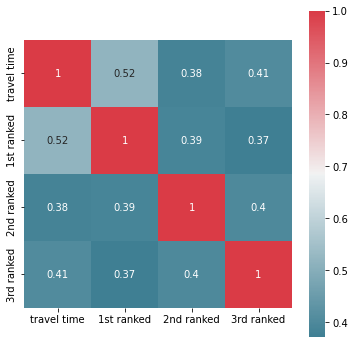

In [44]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(6,6))
corr = df4[['travel time','1st ranked','2nd ranked','3rd ranked']].corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [95]:
x = np.array(df4[['est_dist','1st ranked','2nd ranked','3rd ranked']])
y = np.array(df4['travel time'])
x

array([[0.81627648, 0.58138253, 0.27225623, 0.51007249],
       [0.26865964, 0.58138253, 0.27225623, 0.51007249],
       [0.0168893 , 0.35558157, 0.47016598, 0.        ],
       ...,
       [0.30644399, 0.35558157, 0.58177283, 0.48390361],
       [0.00705875, 0.10143422, 0.58226013, 0.        ],
       [0.62597006, 0.58138253, 0.59555746, 0.48390361]])

In [96]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [97]:
print(X_train.shape)
print(X_test.shape)
# X_train

(13304, 4)
(3327, 4)


In [98]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_1 = nnmodel(50, num_hlayers=1,Epoch=500)
model4_1_1

Epoch 1/500
416/416 [==============================] - 1s 920us/step - loss: 547533.8750 - mape: 98.3902 - rmse: 739.9553 - val_loss: 532231.1250 - val_mape: 95.3669 - val_rmse: 729.5417
Epoch 2/500
416/416 [==============================] - 0s 708us/step - loss: 487284.0000 - mape: 89.5190 - rmse: 698.0573 - val_loss: 447334.5312 - val_mape: 82.5725 - val_rmse: 668.8307
Epoch 3/500
416/416 [==============================] - 0s 731us/step - loss: 389047.9062 - mape: 73.4806 - rmse: 623.7371 - val_loss: 338101.4688 - val_mape: 64.3162 - val_rmse: 581.4649
Epoch 4/500
416/416 [==============================] - 0s 705us/step - loss: 280676.8750 - mape: 55.1249 - rmse: 529.7895 - val_loss: 233717.9219 - val_mape: 47.4294 - val_rmse: 483.4438
Epoch 5/500
416/416 [==============================] - 0s 723us/step - loss: 189456.2656 - mape: 42.0079 - rmse: 435.2657 - val_loss: 155558.7344 - val_mape: 37.9250 - val_rmse: 394.4094
Epoch 6/500
416/416 [==============================] - 0s 701us/s

416/416 [==============================] - 0s 725us/step - loss: 37469.4688 - mape: 25.2401 - rmse: 193.5703 - val_loss: 37849.6289 - val_mape: 24.1798 - val_rmse: 194.5498
Epoch 46/500
416/416 [==============================] - 0s 731us/step - loss: 37436.2422 - mape: 25.2300 - rmse: 193.4845 - val_loss: 37895.3008 - val_mape: 23.8934 - val_rmse: 194.6672
Epoch 47/500
416/416 [==============================] - 0s 732us/step - loss: 37431.0820 - mape: 25.0310 - rmse: 193.4711 - val_loss: 37785.4062 - val_mape: 24.5380 - val_rmse: 194.3847
Epoch 48/500
416/416 [==============================] - 0s 727us/step - loss: 37394.6602 - mape: 25.2717 - rmse: 193.3770 - val_loss: 37872.9375 - val_mape: 23.8535 - val_rmse: 194.6097
Epoch 49/500
416/416 [==============================] - 0s 787us/step - loss: 37391.2188 - mape: 25.0568 - rmse: 193.3681 - val_loss: 37804.0312 - val_mape: 24.1253 - val_rmse: 194.4326
Epoch 50/500
416/416 [==============================] - 0s 784us/step - loss: 37375

Epoch 133/500
416/416 [==============================] - 0s 681us/step - loss: 37296.5430 - mape: 25.1905 - rmse: 193.1231 - val_loss: 37893.4375 - val_mape: 23.8154 - val_rmse: 194.6624
Epoch 134/500
416/416 [==============================] - 0s 719us/step - loss: 37306.3906 - mape: 25.0581 - rmse: 193.1486 - val_loss: 37788.4180 - val_mape: 24.3585 - val_rmse: 194.3924
Epoch 135/500
416/416 [==============================] - 0s 700us/step - loss: 37303.9531 - mape: 25.2407 - rmse: 193.1423 - val_loss: 37845.2930 - val_mape: 23.9795 - val_rmse: 194.5387
Epoch 136/500
416/416 [==============================] - 0s 721us/step - loss: 37298.9336 - mape: 25.0938 - rmse: 193.1293 - val_loss: 37805.7578 - val_mape: 24.2011 - val_rmse: 194.4370
Epoch 137/500
416/416 [==============================] - 0s 726us/step - loss: 37299.6719 - mape: 25.1737 - rmse: 193.1312 - val_loss: 37791.6641 - val_mape: 24.3187 - val_rmse: 194.4008
Epoch 138/500
416/416 [==============================] - 0s 720us

Epoch 177/500
416/416 [==============================] - 0s 726us/step - loss: 37293.0820 - mape: 25.2177 - rmse: 193.1142 - val_loss: 37839.6680 - val_mape: 24.0073 - val_rmse: 194.5242
Epoch 178/500
416/416 [==============================] - 0s 736us/step - loss: 37295.2188 - mape: 25.1934 - rmse: 193.1197 - val_loss: 37856.2773 - val_mape: 23.9337 - val_rmse: 194.5669
Epoch 179/500
416/416 [==============================] - 0s 734us/step - loss: 37296.1016 - mape: 25.0917 - rmse: 193.1220 - val_loss: 37820.7422 - val_mape: 24.1224 - val_rmse: 194.4756
Epoch 180/500
416/416 [==============================] - 0s 705us/step - loss: 37295.8242 - mape: 25.0906 - rmse: 193.1213 - val_loss: 37785.3984 - val_mape: 24.5685 - val_rmse: 194.3847
Epoch 181/500
416/416 [==============================] - 0s 732us/step - loss: 37305.0391 - mape: 25.2196 - rmse: 193.1451 - val_loss: 37812.1562 - val_mape: 24.1760 - val_rmse: 194.4535
Epoch 182/500
416/416 [==============================] - 0s 698us

Epoch 221/500
416/416 [==============================] - 0s 728us/step - loss: 37285.7070 - mape: 25.1591 - rmse: 193.0951 - val_loss: 37835.6328 - val_mape: 24.0533 - val_rmse: 194.5138
Epoch 222/500
416/416 [==============================] - 0s 726us/step - loss: 37295.6992 - mape: 25.1613 - rmse: 193.1209 - val_loss: 37808.8516 - val_mape: 24.2080 - val_rmse: 194.4450
Epoch 223/500
416/416 [==============================] - 0s 792us/step - loss: 37289.2188 - mape: 25.1581 - rmse: 193.1042 - val_loss: 37801.6797 - val_mape: 24.2706 - val_rmse: 194.4265
Epoch 224/500
416/416 [==============================] - 0s 747us/step - loss: 37299.3555 - mape: 25.1572 - rmse: 193.1304 - val_loss: 37828.9531 - val_mape: 24.0931 - val_rmse: 194.4967
Epoch 225/500
416/416 [==============================] - 0s 702us/step - loss: 37293.8945 - mape: 25.1168 - rmse: 193.1163 - val_loss: 37828.5586 - val_mape: 24.0962 - val_rmse: 194.4957
Epoch 226/500
416/416 [==============================] - 0s 805us

Epoch 265/500
416/416 [==============================] - 0s 722us/step - loss: 37290.5703 - mape: 25.1497 - rmse: 193.1077 - val_loss: 37828.3164 - val_mape: 24.1038 - val_rmse: 194.4950
Epoch 266/500
416/416 [==============================] - 0s 717us/step - loss: 37284.5742 - mape: 25.2274 - rmse: 193.0921 - val_loss: 37860.2070 - val_mape: 23.9395 - val_rmse: 194.5770
Epoch 267/500
416/416 [==============================] - 0s 738us/step - loss: 37288.6289 - mape: 25.1106 - rmse: 193.1026 - val_loss: 37858.3594 - val_mape: 23.9398 - val_rmse: 194.5723
Epoch 268/500
416/416 [==============================] - 0s 749us/step - loss: 37287.2500 - mape: 25.0760 - rmse: 193.0991 - val_loss: 37793.8750 - val_mape: 24.3826 - val_rmse: 194.4065
Epoch 269/500
416/416 [==============================] - 0s 784us/step - loss: 37284.8672 - mape: 25.1036 - rmse: 193.0929 - val_loss: 37792.8789 - val_mape: 24.4192 - val_rmse: 194.4039
Epoch 270/500
416/416 [==============================] - 0s 678us

Epoch 309/500
416/416 [==============================] - 0s 728us/step - loss: 37301.5430 - mape: 25.2290 - rmse: 193.1361 - val_loss: 37824.4492 - val_mape: 24.1046 - val_rmse: 194.4851
Epoch 310/500
416/416 [==============================] - 0s 716us/step - loss: 37291.3828 - mape: 25.1974 - rmse: 193.1098 - val_loss: 37871.3008 - val_mape: 23.9018 - val_rmse: 194.6055
Epoch 311/500
416/416 [==============================] - 0s 719us/step - loss: 37299.1914 - mape: 25.0688 - rmse: 193.1300 - val_loss: 37804.6562 - val_mape: 24.2588 - val_rmse: 194.4342
Epoch 312/500
416/416 [==============================] - 0s 691us/step - loss: 37291.8516 - mape: 25.1190 - rmse: 193.1110 - val_loss: 37790.3320 - val_mape: 24.4578 - val_rmse: 194.3974
Epoch 313/500
416/416 [==============================] - 0s 691us/step - loss: 37291.1094 - mape: 25.2333 - rmse: 193.1091 - val_loss: 37826.8242 - val_mape: 24.0992 - val_rmse: 194.4912
Epoch 314/500
416/416 [==============================] - 0s 807us

Epoch 353/500
416/416 [==============================] - 0s 710us/step - loss: 37292.3594 - mape: 25.1101 - rmse: 193.1123 - val_loss: 37812.8750 - val_mape: 24.1752 - val_rmse: 194.4553
Epoch 354/500
416/416 [==============================] - 0s 731us/step - loss: 37295.6406 - mape: 25.1763 - rmse: 193.1208 - val_loss: 37829.0547 - val_mape: 24.0857 - val_rmse: 194.4969
Epoch 355/500
416/416 [==============================] - 0s 731us/step - loss: 37291.0625 - mape: 25.1552 - rmse: 193.1089 - val_loss: 37847.5586 - val_mape: 23.9961 - val_rmse: 194.5445
Epoch 356/500
416/416 [==============================] - 0s 702us/step - loss: 37290.2969 - mape: 25.0781 - rmse: 193.1070 - val_loss: 37795.8789 - val_mape: 24.3404 - val_rmse: 194.4116
Epoch 357/500
416/416 [==============================] - 0s 726us/step - loss: 37296.3984 - mape: 25.2196 - rmse: 193.1228 - val_loss: 37820.3984 - val_mape: 24.1368 - val_rmse: 194.4747
Epoch 358/500
416/416 [==============================] - 0s 717us

Epoch 397/500
416/416 [==============================] - 0s 743us/step - loss: 37293.6992 - mape: 25.2348 - rmse: 193.1158 - val_loss: 37854.5664 - val_mape: 23.9687 - val_rmse: 194.5625
Epoch 398/500
416/416 [==============================] - 0s 720us/step - loss: 37271.1875 - mape: 25.1023 - rmse: 193.0575 - val_loss: 37799.3320 - val_mape: 24.3094 - val_rmse: 194.4205
Epoch 399/500
416/416 [==============================] - 0s 737us/step - loss: 37302.8516 - mape: 25.1475 - rmse: 193.1395 - val_loss: 37820.7188 - val_mape: 24.1431 - val_rmse: 194.4755
Epoch 400/500
416/416 [==============================] - 0s 694us/step - loss: 37295.8867 - mape: 25.1614 - rmse: 193.1214 - val_loss: 37810.2383 - val_mape: 24.2161 - val_rmse: 194.4485
Epoch 401/500
416/416 [==============================] - 0s 709us/step - loss: 37298.3398 - mape: 25.1487 - rmse: 193.1278 - val_loss: 37829.9336 - val_mape: 24.0890 - val_rmse: 194.4992
Epoch 402/500
416/416 [==============================] - 0s 731us

Epoch 441/500
416/416 [==============================] - 0s 703us/step - loss: 37290.7812 - mape: 25.1288 - rmse: 193.1082 - val_loss: 37837.7266 - val_mape: 24.0635 - val_rmse: 194.5192
Epoch 442/500
416/416 [==============================] - 0s 685us/step - loss: 37294.3906 - mape: 25.1695 - rmse: 193.1176 - val_loss: 37839.1172 - val_mape: 24.0412 - val_rmse: 194.5228
Epoch 443/500
416/416 [==============================] - 0s 704us/step - loss: 37293.6250 - mape: 25.1766 - rmse: 193.1156 - val_loss: 37865.0938 - val_mape: 23.9213 - val_rmse: 194.5896
Epoch 444/500
416/416 [==============================] - 0s 727us/step - loss: 37288.0547 - mape: 25.1182 - rmse: 193.1012 - val_loss: 37864.8789 - val_mape: 23.9348 - val_rmse: 194.5890
Epoch 445/500
416/416 [==============================] - 0s 715us/step - loss: 37287.3086 - mape: 25.1032 - rmse: 193.0992 - val_loss: 37803.9883 - val_mape: 24.2954 - val_rmse: 194.4325
Epoch 446/500
416/416 [==============================] - 0s 724us

Epoch 485/500
416/416 [==============================] - 0s 756us/step - loss: 37285.3828 - mape: 25.1982 - rmse: 193.0942 - val_loss: 37840.4766 - val_mape: 24.0253 - val_rmse: 194.5263
Epoch 486/500
416/416 [==============================] - 0s 766us/step - loss: 37301.9648 - mape: 25.0497 - rmse: 193.1372 - val_loss: 37801.2031 - val_mape: 24.3184 - val_rmse: 194.4253
Epoch 487/500
416/416 [==============================] - 0s 703us/step - loss: 37289.8867 - mape: 25.2049 - rmse: 193.1059 - val_loss: 37819.4492 - val_mape: 24.1575 - val_rmse: 194.4722
Epoch 488/500
416/416 [==============================] - 0s 774us/step - loss: 37289.5312 - mape: 25.1784 - rmse: 193.1050 - val_loss: 37856.1211 - val_mape: 23.9679 - val_rmse: 194.5665
Epoch 489/500
416/416 [==============================] - 0s 753us/step - loss: 37295.6719 - mape: 25.1071 - rmse: 193.1209 - val_loss: 37809.9609 - val_mape: 24.2224 - val_rmse: 194.4478
Epoch 490/500
416/416 [==============================] - 0s 768us

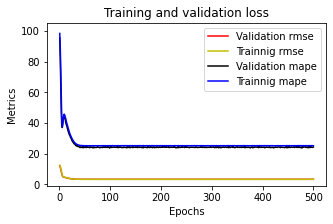

In [99]:
plotme(model4_1_1)

In [100]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_2 = nnmodel(100, num_hlayers=1,Epoch=500)
model4_1_2

Epoch 1/500
416/416 [==============================] - 1s 861us/step - loss: 534814.6875 - mape: 96.5672 - rmse: 731.3102 - val_loss: 495590.1562 - val_mape: 90.0328 - val_rmse: 703.9816
Epoch 2/500
416/416 [==============================] - 0s 747us/step - loss: 414338.5312 - mape: 77.6985 - rmse: 643.6913 - val_loss: 336307.9688 - val_mape: 64.0475 - val_rmse: 579.9207
Epoch 3/500
416/416 [==============================] - 0s 721us/step - loss: 254493.1719 - mape: 51.2442 - rmse: 504.4732 - val_loss: 188029.9531 - val_mape: 41.3064 - val_rmse: 433.6242
Epoch 4/500
416/416 [==============================] - 0s 773us/step - loss: 140262.3438 - mape: 38.0757 - rmse: 374.5161 - val_loss: 108347.5078 - val_mape: 37.0645 - val_rmse: 329.1618
Epoch 5/500
416/416 [==============================] - 0s 736us/step - loss: 92945.2812 - mape: 40.4832 - rmse: 304.8693 - val_loss: 84578.7734 - val_mape: 42.0943 - val_rmse: 290.8243
Epoch 6/500
416/416 [==============================] - 0s 753us/ste

416/416 [==============================] - 0s 741us/step - loss: 37323.4727 - mape: 25.0340 - rmse: 193.1928 - val_loss: 37751.8164 - val_mape: 24.4746 - val_rmse: 194.2983
Epoch 46/500
416/416 [==============================] - 0s 728us/step - loss: 37318.1055 - mape: 25.1767 - rmse: 193.1789 - val_loss: 37771.8594 - val_mape: 24.2004 - val_rmse: 194.3498
Epoch 47/500
416/416 [==============================] - 0s 716us/step - loss: 37308.5977 - mape: 25.1126 - rmse: 193.1543 - val_loss: 37819.3555 - val_mape: 23.9447 - val_rmse: 194.4720
Epoch 48/500
416/416 [==============================] - 0s 722us/step - loss: 37325.3477 - mape: 25.1124 - rmse: 193.1977 - val_loss: 37768.9336 - val_mape: 24.2543 - val_rmse: 194.3423
Epoch 49/500
416/416 [==============================] - 0s 773us/step - loss: 37313.5039 - mape: 25.1233 - rmse: 193.1670 - val_loss: 37753.1367 - val_mape: 24.4949 - val_rmse: 194.3017
Epoch 50/500
416/416 [==============================] - 0s 718us/step - loss: 37325

Epoch 133/500
416/416 [==============================] - 0s 750us/step - loss: 37172.2109 - mape: 25.0846 - rmse: 192.8010 - val_loss: 37753.7969 - val_mape: 23.7828 - val_rmse: 194.3034
Epoch 134/500
416/416 [==============================] - 0s 715us/step - loss: 37166.8438 - mape: 24.9792 - rmse: 192.7870 - val_loss: 37669.1445 - val_mape: 24.2164 - val_rmse: 194.0854
Epoch 135/500
416/416 [==============================] - 0s 752us/step - loss: 37170.4688 - mape: 25.0722 - rmse: 192.7964 - val_loss: 37677.2773 - val_mape: 24.1642 - val_rmse: 194.1064
Epoch 136/500
416/416 [==============================] - 0s 738us/step - loss: 37167.6289 - mape: 25.0078 - rmse: 192.7891 - val_loss: 37659.4805 - val_mape: 24.4333 - val_rmse: 194.0605
Epoch 137/500
416/416 [==============================] - 0s 754us/step - loss: 37167.0625 - mape: 25.0980 - rmse: 192.7876 - val_loss: 37688.2539 - val_mape: 24.0449 - val_rmse: 194.1346
Epoch 138/500
416/416 [==============================] - 0s 724us

Epoch 177/500
416/416 [==============================] - 0s 761us/step - loss: 37061.0547 - mape: 24.9967 - rmse: 192.5125 - val_loss: 37623.9219 - val_mape: 23.8497 - val_rmse: 193.9689
Epoch 178/500
416/416 [==============================] - 0s 753us/step - loss: 37052.9219 - mape: 24.9598 - rmse: 192.4913 - val_loss: 37656.2344 - val_mape: 23.7083 - val_rmse: 194.0521
Epoch 179/500
416/416 [==============================] - 0s 741us/step - loss: 37056.4492 - mape: 25.0314 - rmse: 192.5005 - val_loss: 37685.4805 - val_mape: 23.6043 - val_rmse: 194.1275
Epoch 180/500
416/416 [==============================] - 0s 768us/step - loss: 37064.5469 - mape: 24.8611 - rmse: 192.5215 - val_loss: 37577.5781 - val_mape: 24.1271 - val_rmse: 193.8494
Epoch 181/500
416/416 [==============================] - 0s 738us/step - loss: 37058.7812 - mape: 25.0138 - rmse: 192.5066 - val_loss: 37589.5273 - val_mape: 23.9843 - val_rmse: 193.8802
Epoch 182/500
416/416 [==============================] - 0s 725us

Epoch 221/500
416/416 [==============================] - 0s 713us/step - loss: 36949.9727 - mape: 24.8832 - rmse: 192.2238 - val_loss: 37511.5547 - val_mape: 23.8257 - val_rmse: 193.6790
Epoch 222/500
416/416 [==============================] - 0s 732us/step - loss: 36941.2227 - mape: 24.8297 - rmse: 192.2010 - val_loss: 37470.4219 - val_mape: 24.2147 - val_rmse: 193.5728
Epoch 223/500
416/416 [==============================] - 0s 726us/step - loss: 36931.5195 - mape: 24.9140 - rmse: 192.1758 - val_loss: 37510.1211 - val_mape: 23.8037 - val_rmse: 193.6753
Epoch 224/500
416/416 [==============================] - 0s 719us/step - loss: 36930.7891 - mape: 24.8241 - rmse: 192.1739 - val_loss: 37465.4102 - val_mape: 24.2282 - val_rmse: 193.5598
Epoch 225/500
416/416 [==============================] - 0s 718us/step - loss: 36931.9297 - mape: 24.9488 - rmse: 192.1768 - val_loss: 37551.6367 - val_mape: 23.6033 - val_rmse: 193.7824
Epoch 226/500
416/416 [==============================] - 0s 740us

Epoch 265/500
416/416 [==============================] - 0s 744us/step - loss: 36838.8750 - mape: 24.7196 - rmse: 191.9346 - val_loss: 37376.4609 - val_mape: 24.1374 - val_rmse: 193.3299
Epoch 266/500
416/416 [==============================] - 0s 740us/step - loss: 36846.9414 - mape: 24.8279 - rmse: 191.9556 - val_loss: 37448.9609 - val_mape: 23.5482 - val_rmse: 193.5173
Epoch 267/500
416/416 [==============================] - 0s 749us/step - loss: 36847.0156 - mape: 24.7272 - rmse: 191.9558 - val_loss: 37444.8867 - val_mape: 23.5860 - val_rmse: 193.5068
Epoch 268/500
416/416 [==============================] - 0s 719us/step - loss: 36834.1211 - mape: 24.7480 - rmse: 191.9222 - val_loss: 37391.2656 - val_mape: 23.8375 - val_rmse: 193.3682
Epoch 269/500
416/416 [==============================] - 0s 745us/step - loss: 36827.1406 - mape: 24.7508 - rmse: 191.9040 - val_loss: 37374.7344 - val_mape: 23.9664 - val_rmse: 193.3255
Epoch 270/500
416/416 [==============================] - 0s 716us

Epoch 309/500
416/416 [==============================] - 0s 714us/step - loss: 36756.3711 - mape: 24.5793 - rmse: 191.7195 - val_loss: 37296.0234 - val_mape: 24.0346 - val_rmse: 193.1218
Epoch 310/500
416/416 [==============================] - 0s 712us/step - loss: 36747.9023 - mape: 24.7368 - rmse: 191.6974 - val_loss: 37298.0469 - val_mape: 23.9204 - val_rmse: 193.1270
Epoch 311/500
416/416 [==============================] - 0s 742us/step - loss: 36736.5781 - mape: 24.7031 - rmse: 191.6679 - val_loss: 37406.5977 - val_mape: 23.3405 - val_rmse: 193.4079
Epoch 312/500
416/416 [==============================] - 0s 736us/step - loss: 36710.0625 - mape: 24.6008 - rmse: 191.5987 - val_loss: 37294.3828 - val_mape: 24.2448 - val_rmse: 193.1175
Epoch 313/500
416/416 [==============================] - 0s 725us/step - loss: 36748.3594 - mape: 24.7290 - rmse: 191.6986 - val_loss: 37367.6914 - val_mape: 23.4496 - val_rmse: 193.3073
Epoch 314/500
416/416 [==============================] - 0s 714us

Epoch 353/500
416/416 [==============================] - 0s 824us/step - loss: 36682.0508 - mape: 24.5381 - rmse: 191.5256 - val_loss: 37237.1523 - val_mape: 23.7999 - val_rmse: 192.9693
Epoch 354/500
416/416 [==============================] - 0s 786us/step - loss: 36668.8555 - mape: 24.5936 - rmse: 191.4911 - val_loss: 37289.2969 - val_mape: 23.4777 - val_rmse: 193.1044
Epoch 355/500
416/416 [==============================] - 0s 720us/step - loss: 36660.9609 - mape: 24.5578 - rmse: 191.4705 - val_loss: 37232.3906 - val_mape: 23.8623 - val_rmse: 192.9570
Epoch 356/500
416/416 [==============================] - 0s 777us/step - loss: 36667.9609 - mape: 24.6282 - rmse: 191.4888 - val_loss: 37242.2070 - val_mape: 23.6962 - val_rmse: 192.9824
Epoch 357/500
416/416 [==============================] - 0s 736us/step - loss: 36658.0000 - mape: 24.5756 - rmse: 191.4628 - val_loss: 37261.1484 - val_mape: 23.5654 - val_rmse: 193.0315
Epoch 358/500
416/416 [==============================] - 0s 725us

Epoch 397/500
416/416 [==============================] - 0s 725us/step - loss: 36636.5938 - mape: 24.5426 - rmse: 191.4069 - val_loss: 37252.1875 - val_mape: 23.3452 - val_rmse: 193.0083
Epoch 398/500
416/416 [==============================] - 0s 770us/step - loss: 36614.9023 - mape: 24.4899 - rmse: 191.3502 - val_loss: 37216.1328 - val_mape: 23.5023 - val_rmse: 192.9148
Epoch 399/500
416/416 [==============================] - 0s 757us/step - loss: 36627.6172 - mape: 24.5376 - rmse: 191.3834 - val_loss: 37177.3633 - val_mape: 23.8933 - val_rmse: 192.8143
Epoch 400/500
416/416 [==============================] - 0s 758us/step - loss: 36618.7969 - mape: 24.5247 - rmse: 191.3604 - val_loss: 37251.8242 - val_mape: 23.3345 - val_rmse: 193.0073
Epoch 401/500
416/416 [==============================] - 0s 740us/step - loss: 36621.2500 - mape: 24.4489 - rmse: 191.3668 - val_loss: 37194.0898 - val_mape: 23.6715 - val_rmse: 192.8577
Epoch 402/500
416/416 [==============================] - 0s 733us

Epoch 441/500
416/416 [==============================] - 0s 736us/step - loss: 36583.0938 - mape: 24.5307 - rmse: 191.2671 - val_loss: 37180.2773 - val_mape: 23.4426 - val_rmse: 192.8219
Epoch 442/500
416/416 [==============================] - 0s 756us/step - loss: 36575.9570 - mape: 24.4501 - rmse: 191.2484 - val_loss: 37173.2656 - val_mape: 23.4908 - val_rmse: 192.8037
Epoch 443/500
416/416 [==============================] - 0s 746us/step - loss: 36577.7461 - mape: 24.4455 - rmse: 191.2531 - val_loss: 37197.1719 - val_mape: 23.3626 - val_rmse: 192.8657
Epoch 444/500
416/416 [==============================] - 0s 762us/step - loss: 36578.5742 - mape: 24.4622 - rmse: 191.2553 - val_loss: 37198.9727 - val_mape: 23.3709 - val_rmse: 192.8703
Epoch 445/500
416/416 [==============================] - 0s 743us/step - loss: 36564.5820 - mape: 24.4155 - rmse: 191.2187 - val_loss: 37153.1836 - val_mape: 23.6291 - val_rmse: 192.7516
Epoch 446/500
416/416 [==============================] - 0s 722us

Epoch 485/500
416/416 [==============================] - 0s 736us/step - loss: 36543.3164 - mape: 24.4576 - rmse: 191.1631 - val_loss: 37242.8789 - val_mape: 23.0862 - val_rmse: 192.9841
Epoch 486/500
416/416 [==============================] - 0s 737us/step - loss: 36536.9219 - mape: 24.3411 - rmse: 191.1463 - val_loss: 37182.5508 - val_mape: 23.3109 - val_rmse: 192.8278
Epoch 487/500
416/416 [==============================] - 0s 729us/step - loss: 36538.3555 - mape: 24.4093 - rmse: 191.1501 - val_loss: 37161.2734 - val_mape: 23.4059 - val_rmse: 192.7726
Epoch 488/500
416/416 [==============================] - 0s 756us/step - loss: 36537.5039 - mape: 24.3979 - rmse: 191.1479 - val_loss: 37118.1172 - val_mape: 23.7733 - val_rmse: 192.6606
Epoch 489/500
416/416 [==============================] - 0s 729us/step - loss: 36546.7969 - mape: 24.4379 - rmse: 191.1722 - val_loss: 37199.4414 - val_mape: 23.2210 - val_rmse: 192.8716
Epoch 490/500
416/416 [==============================] - 0s 767us

In [101]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_3 = nnmodel(200, num_hlayers=1,Epoch=500)
model4_1_3

Epoch 1/500
416/416 [==============================] - 1s 908us/step - loss: 507879.9062 - mape: 92.4401 - rmse: 712.6569 - val_loss: 418371.1250 - val_mape: 77.8833 - val_rmse: 646.8162
Epoch 2/500
416/416 [==============================] - 0s 736us/step - loss: 287799.8750 - mape: 56.7989 - rmse: 536.4698 - val_loss: 179092.4688 - val_mape: 40.2593 - val_rmse: 423.1932
Epoch 3/500
416/416 [==============================] - 0s 771us/step - loss: 120657.8750 - mape: 38.4974 - rmse: 347.3584 - val_loss: 89901.1562 - val_mape: 40.1864 - val_rmse: 299.8352
Epoch 4/500
416/416 [==============================] - 0s 736us/step - loss: 82209.3203 - mape: 44.3786 - rmse: 286.7217 - val_loss: 78173.4375 - val_mape: 44.2734 - val_rmse: 279.5951
Epoch 5/500
416/416 [==============================] - 0s 726us/step - loss: 74790.2500 - mape: 44.7472 - rmse: 273.4781 - val_loss: 71565.5156 - val_mape: 42.0950 - val_rmse: 267.5173
Epoch 6/500
416/416 [==============================] - 0s 783us/step -

416/416 [==============================] - 0s 753us/step - loss: 37289.0430 - mape: 25.1460 - rmse: 193.1037 - val_loss: 37799.2539 - val_mape: 23.9347 - val_rmse: 194.4203
Epoch 46/500
416/416 [==============================] - 0s 742us/step - loss: 37301.2109 - mape: 25.1472 - rmse: 193.1352 - val_loss: 37897.7070 - val_mape: 23.6232 - val_rmse: 194.6733
Epoch 47/500
416/416 [==============================] - 0s 722us/step - loss: 37296.8086 - mape: 25.1799 - rmse: 193.1238 - val_loss: 37859.8867 - val_mape: 23.7144 - val_rmse: 194.5762
Epoch 48/500
416/416 [==============================] - 0s 749us/step - loss: 37288.2852 - mape: 25.0477 - rmse: 193.1017 - val_loss: 37736.5586 - val_mape: 24.2817 - val_rmse: 194.2590
Epoch 49/500
416/416 [==============================] - 0s 759us/step - loss: 37279.8359 - mape: 25.0787 - rmse: 193.0799 - val_loss: 37723.3047 - val_mape: 24.4853 - val_rmse: 194.2249
Epoch 50/500
416/416 [==============================] - 0s 752us/step - loss: 37282

Epoch 133/500
416/416 [==============================] - 0s 746us/step - loss: 36875.7734 - mape: 24.8430 - rmse: 192.0307 - val_loss: 37479.8281 - val_mape: 23.5095 - val_rmse: 193.5971
Epoch 134/500
416/416 [==============================] - 0s 747us/step - loss: 36857.7578 - mape: 24.8550 - rmse: 191.9837 - val_loss: 37469.9102 - val_mape: 23.4545 - val_rmse: 193.5715
Epoch 135/500
416/416 [==============================] - 0s 712us/step - loss: 36850.3398 - mape: 24.7499 - rmse: 191.9644 - val_loss: 37373.0664 - val_mape: 23.9595 - val_rmse: 193.3212
Epoch 136/500
416/416 [==============================] - 0s 737us/step - loss: 36871.8984 - mape: 24.7956 - rmse: 192.0206 - val_loss: 37415.3789 - val_mape: 23.6446 - val_rmse: 193.4306
Epoch 137/500
416/416 [==============================] - 0s 737us/step - loss: 36823.8242 - mape: 24.7169 - rmse: 191.8953 - val_loss: 37358.7344 - val_mape: 24.2118 - val_rmse: 193.2841
Epoch 138/500
416/416 [==============================] - 0s 719us

Epoch 177/500
416/416 [==============================] - 0s 748us/step - loss: 36700.5586 - mape: 24.6762 - rmse: 191.5739 - val_loss: 37244.9180 - val_mape: 23.6601 - val_rmse: 192.9894
Epoch 178/500
416/416 [==============================] - 0s 781us/step - loss: 36694.0000 - mape: 24.6160 - rmse: 191.5568 - val_loss: 37254.7969 - val_mape: 23.5499 - val_rmse: 193.0150
Epoch 179/500
416/416 [==============================] - 0s 722us/step - loss: 36685.1992 - mape: 24.6092 - rmse: 191.5338 - val_loss: 37268.3242 - val_mape: 23.4439 - val_rmse: 193.0500
Epoch 180/500
416/416 [==============================] - 0s 737us/step - loss: 36685.8828 - mape: 24.5963 - rmse: 191.5356 - val_loss: 37242.6719 - val_mape: 23.5955 - val_rmse: 192.9836
Epoch 181/500
416/416 [==============================] - 0s 764us/step - loss: 36690.8594 - mape: 24.5866 - rmse: 191.5486 - val_loss: 37284.8945 - val_mape: 23.3553 - val_rmse: 193.0930
Epoch 182/500
416/416 [==============================] - 0s 741us

Epoch 221/500
416/416 [==============================] - 0s 731us/step - loss: 36583.5664 - mape: 24.5479 - rmse: 191.2683 - val_loss: 37127.7070 - val_mape: 23.5921 - val_rmse: 192.6855
Epoch 222/500
416/416 [==============================] - 0s 729us/step - loss: 36585.5508 - mape: 24.4839 - rmse: 191.2735 - val_loss: 37124.6094 - val_mape: 23.5975 - val_rmse: 192.6775
Epoch 223/500
416/416 [==============================] - 0s 779us/step - loss: 36578.8516 - mape: 24.3793 - rmse: 191.2560 - val_loss: 37139.1875 - val_mape: 23.5204 - val_rmse: 192.7153
Epoch 224/500
416/416 [==============================] - 0s 744us/step - loss: 36582.1250 - mape: 24.4770 - rmse: 191.2645 - val_loss: 37225.6289 - val_mape: 23.1869 - val_rmse: 192.9394
Epoch 225/500
416/416 [==============================] - 0s 720us/step - loss: 36581.0117 - mape: 24.4747 - rmse: 191.2616 - val_loss: 37110.3125 - val_mape: 23.7091 - val_rmse: 192.6404
Epoch 226/500
416/416 [==============================] - 0s 753us

Epoch 265/500
416/416 [==============================] - 0s 751us/step - loss: 36553.6289 - mape: 24.4419 - rmse: 191.1900 - val_loss: 37110.5742 - val_mape: 23.3298 - val_rmse: 192.6411
Epoch 266/500
416/416 [==============================] - 0s 761us/step - loss: 36524.3359 - mape: 24.3559 - rmse: 191.1134 - val_loss: 37144.3398 - val_mape: 23.1986 - val_rmse: 192.7287
Epoch 267/500
416/416 [==============================] - 0s 778us/step - loss: 36520.9844 - mape: 24.3343 - rmse: 191.1046 - val_loss: 37144.8242 - val_mape: 23.2277 - val_rmse: 192.7299
Epoch 268/500
416/416 [==============================] - 0s 715us/step - loss: 36540.7617 - mape: 24.3625 - rmse: 191.1564 - val_loss: 37093.5508 - val_mape: 23.4275 - val_rmse: 192.5969
Epoch 269/500
416/416 [==============================] - 0s 738us/step - loss: 36525.8828 - mape: 24.3609 - rmse: 191.1175 - val_loss: 37064.1953 - val_mape: 23.6796 - val_rmse: 192.5206
Epoch 270/500
416/416 [==============================] - 0s 727us

Epoch 309/500
416/416 [==============================] - 0s 740us/step - loss: 36497.6797 - mape: 24.3596 - rmse: 191.0437 - val_loss: 37086.7695 - val_mape: 23.2626 - val_rmse: 192.5793
Epoch 310/500
416/416 [==============================] - 0s 743us/step - loss: 36498.5977 - mape: 24.3178 - rmse: 191.0461 - val_loss: 37118.5469 - val_mape: 23.0794 - val_rmse: 192.6617
Epoch 311/500
416/416 [==============================] - 0s 737us/step - loss: 36494.6328 - mape: 24.2446 - rmse: 191.0357 - val_loss: 37037.2070 - val_mape: 23.7043 - val_rmse: 192.4505
Epoch 312/500
416/416 [==============================] - 0s 737us/step - loss: 36505.8125 - mape: 24.3607 - rmse: 191.0649 - val_loss: 37271.5859 - val_mape: 22.7584 - val_rmse: 193.0585
Epoch 313/500
416/416 [==============================] - 0s 724us/step - loss: 36526.6914 - mape: 24.2288 - rmse: 191.1196 - val_loss: 37054.4453 - val_mape: 23.4544 - val_rmse: 192.4953
Epoch 314/500
416/416 [==============================] - 0s 714us

Epoch 353/500
416/416 [==============================] - 0s 717us/step - loss: 36486.7383 - mape: 24.2395 - rmse: 191.0150 - val_loss: 37098.1445 - val_mape: 23.1366 - val_rmse: 192.6088
Epoch 354/500
416/416 [==============================] - 0s 739us/step - loss: 36497.6445 - mape: 24.2491 - rmse: 191.0436 - val_loss: 37051.6250 - val_mape: 23.3626 - val_rmse: 192.4880
Epoch 355/500
416/416 [==============================] - 0s 749us/step - loss: 36497.6133 - mape: 24.3026 - rmse: 191.0435 - val_loss: 37076.0117 - val_mape: 23.2225 - val_rmse: 192.5513
Epoch 356/500
416/416 [==============================] - 0s 772us/step - loss: 36480.0352 - mape: 24.2303 - rmse: 190.9975 - val_loss: 37108.6953 - val_mape: 23.1111 - val_rmse: 192.6362
Epoch 357/500
416/416 [==============================] - 0s 736us/step - loss: 36495.1484 - mape: 24.2208 - rmse: 191.0370 - val_loss: 37030.6289 - val_mape: 23.4989 - val_rmse: 192.4334
Epoch 358/500
416/416 [==============================] - 0s 764us

Epoch 397/500
416/416 [==============================] - 0s 712us/step - loss: 36473.9570 - mape: 24.2093 - rmse: 190.9816 - val_loss: 37012.8789 - val_mape: 23.6582 - val_rmse: 192.3873
Epoch 398/500
416/416 [==============================] - 0s 744us/step - loss: 36471.3320 - mape: 24.2865 - rmse: 190.9747 - val_loss: 37174.9609 - val_mape: 22.8897 - val_rmse: 192.8081
Epoch 399/500
416/416 [==============================] - 0s 727us/step - loss: 36492.3906 - mape: 24.2090 - rmse: 191.0298 - val_loss: 37123.4414 - val_mape: 23.0163 - val_rmse: 192.6744
Epoch 400/500
416/416 [==============================] - 0s 774us/step - loss: 36477.1562 - mape: 24.1965 - rmse: 190.9899 - val_loss: 37013.3320 - val_mape: 23.6439 - val_rmse: 192.3885
Epoch 401/500
416/416 [==============================] - 0s 714us/step - loss: 36475.3359 - mape: 24.2559 - rmse: 190.9852 - val_loss: 37106.9180 - val_mape: 23.1077 - val_rmse: 192.6316
Epoch 402/500
416/416 [==============================] - 0s 748us

Epoch 441/500
416/416 [==============================] - 0s 747us/step - loss: 36449.5781 - mape: 24.2393 - rmse: 190.9177 - val_loss: 36995.8516 - val_mape: 23.5533 - val_rmse: 192.3431
Epoch 442/500
416/416 [==============================] - 0s 699us/step - loss: 36443.3125 - mape: 24.2506 - rmse: 190.9013 - val_loss: 37022.8516 - val_mape: 23.3236 - val_rmse: 192.4132
Epoch 443/500
416/416 [==============================] - 0s 703us/step - loss: 36452.2812 - mape: 24.1934 - rmse: 190.9248 - val_loss: 37023.2734 - val_mape: 23.3118 - val_rmse: 192.4143
Epoch 444/500
416/416 [==============================] - 0s 723us/step - loss: 36467.1758 - mape: 24.2479 - rmse: 190.9638 - val_loss: 36991.0586 - val_mape: 23.4394 - val_rmse: 192.3306
Epoch 445/500
416/416 [==============================] - 0s 724us/step - loss: 36456.0078 - mape: 24.2117 - rmse: 190.9346 - val_loss: 37011.0312 - val_mape: 23.3801 - val_rmse: 192.3825
Epoch 446/500
416/416 [==============================] - 0s 732us

Epoch 485/500
416/416 [==============================] - 0s 741us/step - loss: 36453.3086 - mape: 24.2361 - rmse: 190.9275 - val_loss: 37086.4648 - val_mape: 23.0019 - val_rmse: 192.5785
Epoch 486/500
416/416 [==============================] - 0s 768us/step - loss: 36468.8359 - mape: 24.2415 - rmse: 190.9682 - val_loss: 37056.4648 - val_mape: 23.0532 - val_rmse: 192.5006
Epoch 487/500
416/416 [==============================] - 0s 754us/step - loss: 36429.5664 - mape: 24.1588 - rmse: 190.8653 - val_loss: 36980.4141 - val_mape: 23.6306 - val_rmse: 192.3029
Epoch 488/500
416/416 [==============================] - 0s 749us/step - loss: 36434.4609 - mape: 24.2159 - rmse: 190.8781 - val_loss: 36982.2773 - val_mape: 23.7962 - val_rmse: 192.3078
Epoch 489/500
416/416 [==============================] - 0s 739us/step - loss: 36453.6484 - mape: 24.1662 - rmse: 190.9284 - val_loss: 36984.3477 - val_mape: 23.4891 - val_rmse: 192.3132
Epoch 490/500
416/416 [==============================] - 0s 767us

In [102]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_4 = nnmodel(100,50, num_hlayers=2,Epoch=500)
model4_1_4

Epoch 1/500
416/416 [==============================] - 1s 906us/step - loss: 299518.8438 - mape: 65.2987 - rmse: 547.2831 - val_loss: 79967.3750 - val_mape: 46.2328 - val_rmse: 282.7850
Epoch 2/500
416/416 [==============================] - 0s 810us/step - loss: 73978.2188 - mape: 45.7136 - rmse: 271.9894 - val_loss: 67842.7031 - val_mape: 41.1847 - val_rmse: 260.4663
Epoch 3/500
416/416 [==============================] - 0s 793us/step - loss: 62110.1367 - mape: 40.0279 - rmse: 249.2191 - val_loss: 56264.3789 - val_mape: 36.9507 - val_rmse: 237.2011
Epoch 4/500
416/416 [==============================] - 0s 782us/step - loss: 51449.5117 - mape: 34.4283 - rmse: 226.8248 - val_loss: 46855.9844 - val_mape: 30.5768 - val_rmse: 216.4624
Epoch 5/500
416/416 [==============================] - 0s 795us/step - loss: 43678.2188 - mape: 29.7297 - rmse: 208.9933 - val_loss: 41659.3555 - val_mape: 26.0184 - val_rmse: 204.1062
Epoch 6/500
416/416 [==============================] - 0s 792us/step - los

416/416 [==============================] - 0s 758us/step - loss: 37395.7930 - mape: 25.2980 - rmse: 193.3799 - val_loss: 37806.3594 - val_mape: 24.1724 - val_rmse: 194.4386
Epoch 90/500
416/416 [==============================] - 0s 895us/step - loss: 37367.2695 - mape: 25.1482 - rmse: 193.3062 - val_loss: 37888.2461 - val_mape: 23.8790 - val_rmse: 194.6490
Epoch 91/500
416/416 [==============================] - 0s 808us/step - loss: 37356.3047 - mape: 25.1652 - rmse: 193.2778 - val_loss: 37953.2500 - val_mape: 23.7427 - val_rmse: 194.8159
Epoch 92/500
416/416 [==============================] - 0s 800us/step - loss: 37383.4453 - mape: 25.2164 - rmse: 193.3480 - val_loss: 38069.7773 - val_mape: 23.4137 - val_rmse: 195.1148
Epoch 93/500
416/416 [==============================] - 0s 776us/step - loss: 37379.8320 - mape: 25.1292 - rmse: 193.3387 - val_loss: 37826.1797 - val_mape: 24.2066 - val_rmse: 194.4895
Epoch 94/500
416/416 [==============================] - 0s 780us/step - loss: 37392

Epoch 133/500
416/416 [==============================] - 0s 766us/step - loss: 37385.0664 - mape: 25.2540 - rmse: 193.3522 - val_loss: 37861.7305 - val_mape: 23.9538 - val_rmse: 194.5809
Epoch 134/500
416/416 [==============================] - 0s 784us/step - loss: 37395.4141 - mape: 25.1766 - rmse: 193.3789 - val_loss: 37814.6523 - val_mape: 24.7040 - val_rmse: 194.4599
Epoch 135/500
416/416 [==============================] - 0s 799us/step - loss: 37396.9688 - mape: 25.1555 - rmse: 193.3830 - val_loss: 37826.6914 - val_mape: 24.1280 - val_rmse: 194.4908
Epoch 136/500
416/416 [==============================] - 0s 775us/step - loss: 37363.1484 - mape: 25.2177 - rmse: 193.2955 - val_loss: 37822.1406 - val_mape: 24.1924 - val_rmse: 194.4792
Epoch 137/500
416/416 [==============================] - 0s 778us/step - loss: 37409.1250 - mape: 25.1143 - rmse: 193.4144 - val_loss: 37812.7891 - val_mape: 24.4591 - val_rmse: 194.4551
Epoch 138/500
416/416 [==============================] - 0s 733us

Epoch 177/500
416/416 [==============================] - 0s 793us/step - loss: 37394.0000 - mape: 25.1642 - rmse: 193.3753 - val_loss: 37799.0977 - val_mape: 24.3726 - val_rmse: 194.4199
Epoch 178/500
416/416 [==============================] - 0s 788us/step - loss: 37357.8086 - mape: 25.2461 - rmse: 193.2817 - val_loss: 37794.4180 - val_mape: 24.2476 - val_rmse: 194.4079
Epoch 179/500
416/416 [==============================] - 0s 865us/step - loss: 37369.7031 - mape: 25.2043 - rmse: 193.3125 - val_loss: 38009.6562 - val_mape: 23.5812 - val_rmse: 194.9606
Epoch 180/500
416/416 [==============================] - 0s 804us/step - loss: 37378.5898 - mape: 25.0336 - rmse: 193.3354 - val_loss: 38096.9180 - val_mape: 26.0099 - val_rmse: 195.1843
Epoch 181/500
416/416 [==============================] - 0s 776us/step - loss: 37381.0859 - mape: 25.2753 - rmse: 193.3419 - val_loss: 37798.3125 - val_mape: 24.4851 - val_rmse: 194.4179
Epoch 182/500
416/416 [==============================] - 0s 790us

Epoch 221/500
416/416 [==============================] - 0s 781us/step - loss: 37397.8281 - mape: 25.2527 - rmse: 193.3852 - val_loss: 37798.9961 - val_mape: 24.4226 - val_rmse: 194.4196
Epoch 222/500
416/416 [==============================] - 0s 778us/step - loss: 37348.7109 - mape: 25.1361 - rmse: 193.2581 - val_loss: 37802.1250 - val_mape: 24.6495 - val_rmse: 194.4277
Epoch 223/500
416/416 [==============================] - 0s 769us/step - loss: 37408.4023 - mape: 25.2255 - rmse: 193.4125 - val_loss: 37795.4688 - val_mape: 24.4885 - val_rmse: 194.4106
Epoch 224/500
416/416 [==============================] - 0s 805us/step - loss: 37368.9570 - mape: 25.0620 - rmse: 193.3105 - val_loss: 37970.1406 - val_mape: 23.9014 - val_rmse: 194.8593
Epoch 225/500
416/416 [==============================] - 0s 758us/step - loss: 37388.1797 - mape: 25.2845 - rmse: 193.3602 - val_loss: 37794.9297 - val_mape: 24.5678 - val_rmse: 194.4092
Epoch 226/500
416/416 [==============================] - 0s 802us

Epoch 265/500
416/416 [==============================] - 0s 751us/step - loss: 37393.0625 - mape: 25.1774 - rmse: 193.3729 - val_loss: 37974.1211 - val_mape: 23.7171 - val_rmse: 194.8695
Epoch 266/500
416/416 [==============================] - 0s 779us/step - loss: 37362.0703 - mape: 25.1844 - rmse: 193.2927 - val_loss: 37789.2812 - val_mape: 24.4946 - val_rmse: 194.3947
Epoch 267/500
416/416 [==============================] - 0s 810us/step - loss: 37368.6094 - mape: 25.1783 - rmse: 193.3096 - val_loss: 37823.0273 - val_mape: 24.1756 - val_rmse: 194.4814
Epoch 268/500
416/416 [==============================] - 0s 749us/step - loss: 37402.5078 - mape: 25.2575 - rmse: 193.3973 - val_loss: 37978.9102 - val_mape: 23.6569 - val_rmse: 194.8818
Epoch 269/500
416/416 [==============================] - 0s 767us/step - loss: 37358.6250 - mape: 25.2212 - rmse: 193.2838 - val_loss: 37794.8320 - val_mape: 24.4109 - val_rmse: 194.4089
Epoch 270/500
416/416 [==============================] - 0s 781us

Epoch 309/500
416/416 [==============================] - 0s 762us/step - loss: 37370.1562 - mape: 25.1250 - rmse: 193.3136 - val_loss: 37946.7812 - val_mape: 25.4101 - val_rmse: 194.7993
Epoch 310/500
416/416 [==============================] - 0s 795us/step - loss: 37358.5078 - mape: 25.2076 - rmse: 193.2835 - val_loss: 37891.2148 - val_mape: 23.8796 - val_rmse: 194.6567
Epoch 311/500
416/416 [==============================] - 0s 791us/step - loss: 37373.8633 - mape: 25.2203 - rmse: 193.3232 - val_loss: 38104.2891 - val_mape: 23.3840 - val_rmse: 195.2032
Epoch 312/500
416/416 [==============================] - 0s 742us/step - loss: 37405.9531 - mape: 25.1322 - rmse: 193.4062 - val_loss: 37803.3242 - val_mape: 24.3736 - val_rmse: 194.4308
Epoch 313/500
416/416 [==============================] - 0s 775us/step - loss: 37396.4844 - mape: 25.2272 - rmse: 193.3817 - val_loss: 38144.6484 - val_mape: 23.3764 - val_rmse: 195.3065
Epoch 314/500
416/416 [==============================] - 0s 784us

Epoch 353/500
416/416 [==============================] - 0s 756us/step - loss: 37396.5234 - mape: 25.2020 - rmse: 193.3818 - val_loss: 37811.4727 - val_mape: 24.3036 - val_rmse: 194.4517
Epoch 354/500
416/416 [==============================] - 0s 775us/step - loss: 37366.1133 - mape: 25.1329 - rmse: 193.3032 - val_loss: 37870.2656 - val_mape: 24.0185 - val_rmse: 194.6028
Epoch 355/500
416/416 [==============================] - 0s 781us/step - loss: 37391.5664 - mape: 25.2391 - rmse: 193.3690 - val_loss: 37987.2734 - val_mape: 23.6919 - val_rmse: 194.9032
Epoch 356/500
416/416 [==============================] - 0s 768us/step - loss: 37345.6328 - mape: 25.2015 - rmse: 193.2502 - val_loss: 37846.5977 - val_mape: 24.0057 - val_rmse: 194.5420
Epoch 357/500
416/416 [==============================] - 0s 765us/step - loss: 37372.1523 - mape: 25.1298 - rmse: 193.3188 - val_loss: 37818.8438 - val_mape: 24.2869 - val_rmse: 194.4707
Epoch 358/500
416/416 [==============================] - 0s 798us

Epoch 397/500
416/416 [==============================] - 0s 781us/step - loss: 37380.8281 - mape: 25.2007 - rmse: 193.3412 - val_loss: 37800.6406 - val_mape: 24.5383 - val_rmse: 194.4239
Epoch 398/500
416/416 [==============================] - 0s 751us/step - loss: 37371.6680 - mape: 25.2351 - rmse: 193.3175 - val_loss: 37826.1406 - val_mape: 24.1605 - val_rmse: 194.4894
Epoch 399/500
416/416 [==============================] - 0s 745us/step - loss: 37355.5781 - mape: 25.1060 - rmse: 193.2759 - val_loss: 37798.3906 - val_mape: 24.6365 - val_rmse: 194.4181
Epoch 400/500
416/416 [==============================] - 0s 766us/step - loss: 37349.7227 - mape: 25.2707 - rmse: 193.2608 - val_loss: 37973.4219 - val_mape: 23.6552 - val_rmse: 194.8677
Epoch 401/500
416/416 [==============================] - 0s 777us/step - loss: 37338.1797 - mape: 25.0479 - rmse: 193.2309 - val_loss: 37813.2266 - val_mape: 24.8208 - val_rmse: 194.4562
Epoch 402/500
416/416 [==============================] - 0s 764us

Epoch 441/500
416/416 [==============================] - 0s 773us/step - loss: 37375.2852 - mape: 25.3952 - rmse: 193.3269 - val_loss: 37969.8359 - val_mape: 23.5411 - val_rmse: 194.8585
Epoch 442/500
416/416 [==============================] - 0s 767us/step - loss: 37347.5508 - mape: 25.1514 - rmse: 193.2551 - val_loss: 37799.0430 - val_mape: 24.2824 - val_rmse: 194.4198
Epoch 443/500
416/416 [==============================] - 0s 776us/step - loss: 37355.8242 - mape: 25.1610 - rmse: 193.2766 - val_loss: 37793.1797 - val_mape: 24.3155 - val_rmse: 194.4047
Epoch 444/500
416/416 [==============================] - 0s 757us/step - loss: 37397.2188 - mape: 25.1561 - rmse: 193.3836 - val_loss: 38096.7461 - val_mape: 23.4893 - val_rmse: 195.1839
Epoch 445/500
416/416 [==============================] - 0s 764us/step - loss: 37345.6523 - mape: 25.1973 - rmse: 193.2502 - val_loss: 37844.2109 - val_mape: 24.9332 - val_rmse: 194.5359
Epoch 446/500
416/416 [==============================] - 0s 779us

Epoch 485/500
416/416 [==============================] - 0s 776us/step - loss: 37378.7461 - mape: 25.1412 - rmse: 193.3358 - val_loss: 37983.5547 - val_mape: 23.7096 - val_rmse: 194.8937
Epoch 486/500
416/416 [==============================] - 0s 783us/step - loss: 37350.3828 - mape: 25.1015 - rmse: 193.2625 - val_loss: 37808.3242 - val_mape: 24.8379 - val_rmse: 194.4436
Epoch 487/500
416/416 [==============================] - 0s 779us/step - loss: 37446.7773 - mape: 25.3819 - rmse: 193.5117 - val_loss: 37813.5195 - val_mape: 24.1016 - val_rmse: 194.4570
Epoch 488/500
416/416 [==============================] - 0s 772us/step - loss: 37343.1406 - mape: 25.1540 - rmse: 193.2437 - val_loss: 38206.1055 - val_mape: 23.2469 - val_rmse: 195.4638
Epoch 489/500
416/416 [==============================] - 0s 781us/step - loss: 37379.6914 - mape: 25.0641 - rmse: 193.3383 - val_loss: 37795.8750 - val_mape: 24.7172 - val_rmse: 194.4116
Epoch 490/500
416/416 [==============================] - 0s 777us

In [103]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_5 = nnmodel(200,100, num_hlayers=2,Epoch=500)
model4_1_5

Epoch 1/500
416/416 [==============================] - 1s 990us/step - loss: 239572.1406 - mape: 61.1010 - rmse: 489.4611 - val_loss: 73555.5000 - val_mape: 45.1505 - val_rmse: 271.2112
Epoch 2/500
416/416 [==============================] - 0s 822us/step - loss: 64286.2734 - mape: 41.0087 - rmse: 253.5474 - val_loss: 55254.4297 - val_mape: 35.1293 - val_rmse: 235.0626
Epoch 3/500
416/416 [==============================] - 0s 839us/step - loss: 48654.3242 - mape: 32.6428 - rmse: 220.5773 - val_loss: 43210.7617 - val_mape: 28.3528 - val_rmse: 207.8720
Epoch 4/500
416/416 [==============================] - 0s 853us/step - loss: 40472.2227 - mape: 27.4472 - rmse: 201.1771 - val_loss: 38780.2500 - val_mape: 25.9240 - val_rmse: 196.9270
Epoch 5/500
416/416 [==============================] - 0s 873us/step - loss: 38002.1367 - mape: 25.6074 - rmse: 194.9414 - val_loss: 38034.4219 - val_mape: 25.6528 - val_rmse: 195.0242
Epoch 6/500
416/416 [==============================] - 0s 821us/step - los

416/416 [==============================] - 0s 890us/step - loss: 37425.2617 - mape: 25.1824 - rmse: 193.4561 - val_loss: 38154.1797 - val_mape: 23.3999 - val_rmse: 195.3309
Epoch 90/500
416/416 [==============================] - 0s 919us/step - loss: 37430.4102 - mape: 25.1944 - rmse: 193.4694 - val_loss: 37858.3125 - val_mape: 23.9397 - val_rmse: 194.5721
Epoch 91/500
416/416 [==============================] - 0s 877us/step - loss: 37414.9141 - mape: 25.2160 - rmse: 193.4294 - val_loss: 38414.4805 - val_mape: 23.1642 - val_rmse: 195.9961
Epoch 92/500
416/416 [==============================] - 0s 929us/step - loss: 37392.0898 - mape: 25.1263 - rmse: 193.3703 - val_loss: 37848.3672 - val_mape: 24.2862 - val_rmse: 194.5466
Epoch 93/500
416/416 [==============================] - 0s 953us/step - loss: 37387.6406 - mape: 25.3012 - rmse: 193.3588 - val_loss: 39071.1602 - val_mape: 22.7410 - val_rmse: 197.6643
Epoch 94/500
416/416 [==============================] - 0s 956us/step - loss: 37413

416/416 [==============================] - 0s 840us/step - loss: 37412.1406 - mape: 25.2084 - rmse: 193.4222 - val_loss: 37830.9648 - val_mape: 23.9735 - val_rmse: 194.5018
Epoch 178/500
416/416 [==============================] - 0s 875us/step - loss: 37436.3516 - mape: 25.2722 - rmse: 193.4848 - val_loss: 37865.7422 - val_mape: 23.7655 - val_rmse: 194.5912
Epoch 179/500
416/416 [==============================] - 0s 857us/step - loss: 37423.0508 - mape: 25.0318 - rmse: 193.4504 - val_loss: 37817.8789 - val_mape: 24.9582 - val_rmse: 194.4682
Epoch 180/500
416/416 [==============================] - 0s 856us/step - loss: 37378.4258 - mape: 25.2166 - rmse: 193.3350 - val_loss: 38393.0273 - val_mape: 23.2434 - val_rmse: 195.9414
Epoch 181/500
416/416 [==============================] - 0s 851us/step - loss: 37368.2578 - mape: 25.1358 - rmse: 193.3087 - val_loss: 37868.1758 - val_mape: 24.1920 - val_rmse: 194.5975
Epoch 182/500
416/416 [==============================] - 0s 843us/step - loss: 

Epoch 221/500
416/416 [==============================] - 0s 840us/step - loss: 37438.6836 - mape: 25.1167 - rmse: 193.4908 - val_loss: 37932.8984 - val_mape: 25.5969 - val_rmse: 194.7637
Epoch 222/500
416/416 [==============================] - 0s 819us/step - loss: 37391.7734 - mape: 25.2344 - rmse: 193.3695 - val_loss: 37783.3164 - val_mape: 24.5995 - val_rmse: 194.3793
Epoch 223/500
416/416 [==============================] - 0s 827us/step - loss: 37443.4844 - mape: 25.2591 - rmse: 193.5032 - val_loss: 37815.2148 - val_mape: 24.2891 - val_rmse: 194.4613
Epoch 224/500
416/416 [==============================] - 0s 839us/step - loss: 37404.3164 - mape: 25.1616 - rmse: 193.4020 - val_loss: 37791.4180 - val_mape: 24.6061 - val_rmse: 194.4001
Epoch 225/500
416/416 [==============================] - 0s 845us/step - loss: 37457.7422 - mape: 25.2350 - rmse: 193.5400 - val_loss: 37778.2383 - val_mape: 24.6669 - val_rmse: 194.3662
Epoch 226/500
416/416 [==============================] - 0s 839us

Epoch 265/500
416/416 [==============================] - 0s 852us/step - loss: 36932.4609 - mape: 24.3723 - rmse: 192.1782 - val_loss: 37507.3438 - val_mape: 25.1921 - val_rmse: 193.6681
Epoch 266/500
416/416 [==============================] - 0s 852us/step - loss: 36993.9922 - mape: 24.7007 - rmse: 192.3382 - val_loss: 37329.5078 - val_mape: 23.4387 - val_rmse: 193.2085
Epoch 267/500
416/416 [==============================] - 0s 865us/step - loss: 36908.0781 - mape: 24.5493 - rmse: 192.1147 - val_loss: 38212.4492 - val_mape: 22.1954 - val_rmse: 195.4800
Epoch 268/500
416/416 [==============================] - 0s 834us/step - loss: 36945.1523 - mape: 24.6051 - rmse: 192.2112 - val_loss: 37532.7188 - val_mape: 24.6826 - val_rmse: 193.7336
Epoch 269/500
416/416 [==============================] - 0s 850us/step - loss: 36937.6250 - mape: 24.4237 - rmse: 192.1916 - val_loss: 37507.2852 - val_mape: 25.0119 - val_rmse: 193.6680
Epoch 270/500
416/416 [==============================] - 0s 881us

Epoch 309/500
416/416 [==============================] - 0s 834us/step - loss: 36646.5664 - mape: 24.2996 - rmse: 191.4329 - val_loss: 37235.1133 - val_mape: 24.2730 - val_rmse: 192.9640
Epoch 310/500
416/416 [==============================] - 0s 842us/step - loss: 36623.6719 - mape: 24.1825 - rmse: 191.3731 - val_loss: 37132.3945 - val_mape: 23.6261 - val_rmse: 192.6977
Epoch 311/500
416/416 [==============================] - 0s 843us/step - loss: 36668.9219 - mape: 24.2519 - rmse: 191.4913 - val_loss: 37256.1016 - val_mape: 24.5883 - val_rmse: 193.0184
Epoch 312/500
416/416 [==============================] - 0s 855us/step - loss: 36631.9961 - mape: 24.2348 - rmse: 191.3949 - val_loss: 37131.8242 - val_mape: 23.3406 - val_rmse: 192.6962
Epoch 313/500
416/416 [==============================] - 0s 828us/step - loss: 36644.7461 - mape: 24.2660 - rmse: 191.4282 - val_loss: 37204.2109 - val_mape: 22.9227 - val_rmse: 192.8839
Epoch 314/500
416/416 [==============================] - 0s 881us

Epoch 353/500
416/416 [==============================] - 0s 822us/step - loss: 36594.4141 - mape: 24.2496 - rmse: 191.2967 - val_loss: 37180.3984 - val_mape: 22.9156 - val_rmse: 192.8222
Epoch 354/500
416/416 [==============================] - 0s 834us/step - loss: 36688.2773 - mape: 24.2090 - rmse: 191.5418 - val_loss: 37118.1953 - val_mape: 23.2310 - val_rmse: 192.6608
Epoch 355/500
416/416 [==============================] - 0s 838us/step - loss: 36565.2734 - mape: 24.2536 - rmse: 191.2205 - val_loss: 37229.7539 - val_mape: 22.9186 - val_rmse: 192.9501
Epoch 356/500
416/416 [==============================] - 0s 841us/step - loss: 36669.3047 - mape: 24.2254 - rmse: 191.4923 - val_loss: 37133.8086 - val_mape: 23.2744 - val_rmse: 192.7013
Epoch 357/500
416/416 [==============================] - 0s 846us/step - loss: 36627.4219 - mape: 24.2642 - rmse: 191.3829 - val_loss: 37239.0156 - val_mape: 24.4042 - val_rmse: 192.9741
Epoch 358/500
416/416 [==============================] - 0s 865us

Epoch 397/500
416/416 [==============================] - 0s 859us/step - loss: 36533.0312 - mape: 24.3008 - rmse: 191.1362 - val_loss: 37090.1133 - val_mape: 23.3975 - val_rmse: 192.5879
Epoch 398/500
416/416 [==============================] - 0s 825us/step - loss: 36639.6641 - mape: 24.1950 - rmse: 191.4149 - val_loss: 37226.8750 - val_mape: 24.5374 - val_rmse: 192.9427
Epoch 399/500
416/416 [==============================] - 0s 805us/step - loss: 36601.2617 - mape: 24.2787 - rmse: 191.3146 - val_loss: 37591.2930 - val_mape: 22.3255 - val_rmse: 193.8847
Epoch 400/500
416/416 [==============================] - 0s 836us/step - loss: 36634.8242 - mape: 24.1712 - rmse: 191.4023 - val_loss: 37159.0156 - val_mape: 24.3571 - val_rmse: 192.7667
Epoch 401/500
416/416 [==============================] - 0s 862us/step - loss: 36592.9805 - mape: 24.3032 - rmse: 191.2929 - val_loss: 37119.9961 - val_mape: 23.2512 - val_rmse: 192.6655
Epoch 402/500
416/416 [==============================] - 0s 856us

Epoch 441/500
416/416 [==============================] - 0s 834us/step - loss: 36568.3359 - mape: 24.2489 - rmse: 191.2285 - val_loss: 37080.1719 - val_mape: 23.5420 - val_rmse: 192.5621
Epoch 442/500
416/416 [==============================] - 0s 832us/step - loss: 36596.5781 - mape: 24.2671 - rmse: 191.3023 - val_loss: 37503.7031 - val_mape: 22.3333 - val_rmse: 193.6587
Epoch 443/500
416/416 [==============================] - 0s 892us/step - loss: 36568.9375 - mape: 24.2202 - rmse: 191.2301 - val_loss: 37447.2031 - val_mape: 22.3815 - val_rmse: 193.5128
Epoch 444/500
416/416 [==============================] - 0s 851us/step - loss: 36555.9492 - mape: 24.2659 - rmse: 191.1961 - val_loss: 37087.7031 - val_mape: 23.9238 - val_rmse: 192.5817
Epoch 445/500
416/416 [==============================] - 0s 855us/step - loss: 36575.9805 - mape: 24.1547 - rmse: 191.2485 - val_loss: 37093.7031 - val_mape: 24.0081 - val_rmse: 192.5973
Epoch 446/500
416/416 [==============================] - 0s 853us

Epoch 485/500
416/416 [==============================] - 0s 887us/step - loss: 36591.1094 - mape: 24.3040 - rmse: 191.2880 - val_loss: 37137.8672 - val_mape: 24.3988 - val_rmse: 192.7119
Epoch 486/500
416/416 [==============================] - 0s 852us/step - loss: 36600.0977 - mape: 24.3784 - rmse: 191.3115 - val_loss: 37055.2578 - val_mape: 23.6093 - val_rmse: 192.4974
Epoch 487/500
416/416 [==============================] - 0s 830us/step - loss: 36543.8516 - mape: 24.1648 - rmse: 191.1645 - val_loss: 37355.0625 - val_mape: 25.0048 - val_rmse: 193.2746
Epoch 488/500
416/416 [==============================] - 0s 835us/step - loss: 36585.5195 - mape: 24.2367 - rmse: 191.2734 - val_loss: 37364.9453 - val_mape: 25.1301 - val_rmse: 193.3001
Epoch 489/500
416/416 [==============================] - 0s 867us/step - loss: 36564.5742 - mape: 24.3045 - rmse: 191.2187 - val_loss: 37654.2188 - val_mape: 25.6610 - val_rmse: 194.0470
Epoch 490/500
416/416 [==============================] - 0s 849us

### missing value handling approach 2: 

In [104]:
### missing value handling approach 2: 
df6 = df1.iloc[:,0:9].copy()
df6[['1st ranked', '2nd ranked','3rd ranked']] = df6[['1st ranked', '2nd ranked','3rd ranked']].fillna(0)
df6.head()

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0         1917           17  0.992498  0.816276    0.448560         0.524038   
1          766           20  0.344315  0.268660    0.727273         0.823529   
2          130           18  0.018713  0.016889    0.625000         0.714286   
3          551           15  0.349947  0.299087    0.662338         0.680000   
4          962           16  0.385289  0.341360    0.542553         0.573034   

  1st ranked    2nd ranked   3rd ranked  
0    primary  unclassified     tertiary  
1    primary  unclassified     tertiary  
2   tertiary   residential            0  
3    primary  unclassified  residential  
4    primary  unclassified  residential

#### 2. encoding of ranked roadtype with binary-encoding

In [105]:
option = ['residential','tertiary','primary']
df6.loc[~df6['1st ranked'].isin(option),'1st ranked'] = 'others1'
option = ['residential','tertiary','secondary',0]
df6.loc[~df6['2nd ranked'].isin(option),'2nd ranked'] = 'others2'
option = ['residential','tertiary',0]
df6.loc[~df6['3rd ranked'].isin(option),'3rd ranked'] = 'others3'
df6.head(20)

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0          1917           17  0.992498  0.816276    0.448560         0.524038   
1           766           20  0.344315  0.268660    0.727273         0.823529   
2           130           18  0.018713  0.016889    0.625000         0.714286   
3           551           15  0.349947  0.299087    0.662338         0.680000   
4           962           16  0.385289  0.341360    0.542553         0.573034   
5          1494           20  0.710211  0.680802    0.304688         0.345133   
6           918           15  0.496519  0.567776    0.328767         0.311688   
7           635           21  0.334883  0.283236    0.792208         0.871429   
8           599            0  0.348465  0.290417    0.753086         0.847222   
9          1380           15  0.687606  0.669774    0.225000         0.264706   
10         1433           15  0.337351  0.289868    0.701299         0.750000   
11          646           23  0.408917  0.303956    0.773810         0.802469   
12          479           18  0.285084  0.243820    0.819444         0.867647   
13          771           16  0.533188  0.462439    0.733333         0.752137   
14          619           23  0.362232  0.328280    0.586207         0.637500   
15          774           18  0.491825  0.443703    0.570312         0.657658   
16          667           20  0.403398  0.398877    0.483516         0.505747   
17          462           12  0.309532  0.256909    0.940299         0.984375   
18         1256           18  0.627959  0.608634    0.222222         0.292683   
19          612            2  0.349160  0.268622    0.680851         0.761905   

   1st ranked   2nd ranked   3rd ranked  
0     primary      others2     tertiary  
1     primary      others2     tertiary  
2    tertiary  residential            0  
3     primary      others2  residential  
4     primary      others2  residential  
5     primary  residential     tertiary  
6     primary  residential     tertiary  
7     primary      others2     tertiary  
8     primary      others2      others3  
9     primary  residential     tertiary  
10    primary     tertiary      others3  
11    primary     tertiary  residential  
12    primary  residential     tertiary  
13    primary  residential     tertiary  
14    primary  residential      others3  
15    primary  residential     tertiary  
16    primary  residential      others3  
17    primary      others2     tertiary  
18    primary  residential     tertiary  
19    primary  residential      others3

In [106]:
#Create object for binary encoding
encoder= ce.BinaryEncoder(cols=['1st ranked','2nd ranked','3rd ranked'],return_df=True)
#Fit and Transform Data 
df6=encoder.fit_transform(df6) 
df6

travel time  hour of day  distance  est_dist  similarity  \
0             1917           17  0.992498  0.816276    0.448560   
1              766           20  0.344315  0.268660    0.727273   
2              130           18  0.018713  0.016889    0.625000   
3              551           15  0.349947  0.299087    0.662338   
4              962           16  0.385289  0.341360    0.542553   
...            ...          ...       ...       ...         ...   
16817         1136            6  0.277049  0.230076    0.951220   
16818          348           20  0.069904  0.048272    0.875000   
16819         1243            0  0.358691  0.306444    0.727273   
16820          125            2  0.016019  0.007059    0.500000   
16821         1670            5  0.742826  0.625970    0.672566   

       similarity_dijk  1st ranked_0  1st ranked_1  1st ranked_2  \
0             0.524038             0             0             1   
1             0.823529             0             0             1   
2             0.714286             0             1             0   
3             0.680000             0             0             1   
4             0.573034             0             0             1   
...                ...           ...           ...           ...   
16817         0.951220             0             1             0   
16818         1.000000             0             1             1   
16819         0.674699             0             1             0   
16820         1.000000             0             1             1   
16821         0.672566             0             0             1   

       2nd ranked_0  2nd ranked_1  2nd ranked_2  3rd ranked_0  3rd ranked_1  \
0                 0             0             1             0             0   
1                 0             0             1             0             0   
2                 0             1             0             0             1   
3                 0             0             1             0             1   
4                 0             0             1             0             1   
...             ...           ...           ...           ...           ...   
16817             1             0             0             0             1   
16818             0             1             1             0             1   
16819             0             0             1             0             1   
16820             0             1             1             0             1   
16821             1             0             1             0             1   

       3rd ranked_2  
0                 1  
1                 1  
2                 0  
3                 1  
4                 1  
...             ...  
16817             0  
16818             0  
16819             1  
16820             0  
16821             1  

[16631 rows x 15 columns]

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

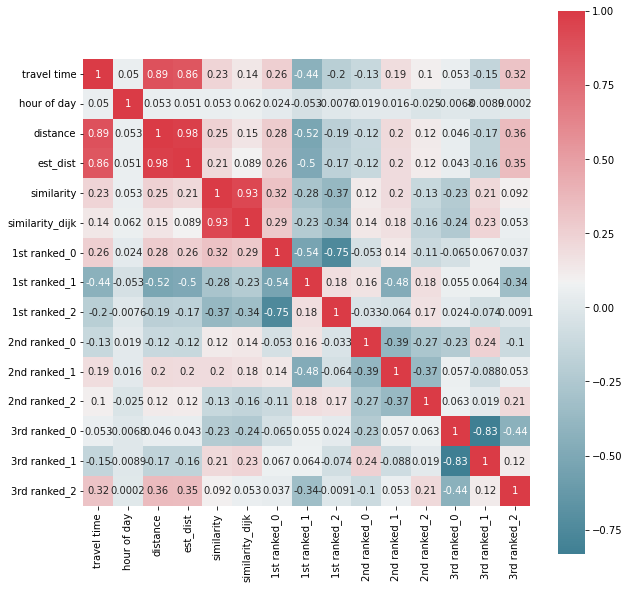

In [107]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(10,10))
corr = df6.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [108]:
x = np.array(df6[['est_dist','1st ranked_0','1st ranked_1','1st ranked_2','2nd ranked_0','2nd ranked_1','2nd ranked_2','3rd ranked_0','3rd ranked_1','3rd ranked_2']])
# x = np.array(df1.iloc[:,1:])
y = np.array(df6['travel time'])
x.shape

(16631, 10)

In [109]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [110]:
print(X_train.shape)
print(X_test.shape)
# X_train

(13304, 10)
(3327, 10)


In [111]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_1 = nnmodel(50, num_hlayers=1,Epoch=500)
model4_4_1

Epoch 1/500
416/416 [==============================] - 0s 856us/step - loss: 529104.1875 - mape: 94.9058 - rmse: 727.3955 - val_loss: 479468.6562 - val_mape: 85.0896 - val_rmse: 692.4368
Epoch 2/500
416/416 [==============================] - 0s 729us/step - loss: 384190.9375 - mape: 68.2090 - rmse: 619.8314 - val_loss: 298446.5625 - val_mape: 53.2667 - val_rmse: 546.3026
Epoch 3/500
416/416 [==============================] - 0s 758us/step - loss: 224377.5000 - mape: 47.7806 - rmse: 473.6850 - val_loss: 175371.1406 - val_mape: 46.2149 - val_rmse: 418.7734
Epoch 4/500
416/416 [==============================] - 0s 707us/step - loss: 146353.1719 - mape: 50.9863 - rmse: 382.5613 - val_loss: 132115.0469 - val_mape: 53.2021 - val_rmse: 363.4763
Epoch 5/500
416/416 [==============================] - 0s 729us/step - loss: 121274.4766 - mape: 55.9384 - rmse: 348.2448 - val_loss: 116251.4062 - val_mape: 54.3129 - val_rmse: 340.9566
Epoch 6/500
416/416 [==============================] - 0s 703us/s

416/416 [==============================] - 0s 734us/step - loss: 36768.0859 - mape: 24.9477 - rmse: 191.7501 - val_loss: 37361.6719 - val_mape: 24.0014 - val_rmse: 193.2917
Epoch 46/500
416/416 [==============================] - 0s 758us/step - loss: 36759.1758 - mape: 24.9706 - rmse: 191.7268 - val_loss: 37414.4805 - val_mape: 23.5863 - val_rmse: 193.4282
Epoch 47/500
416/416 [==============================] - 0s 717us/step - loss: 36759.3633 - mape: 24.9016 - rmse: 191.7273 - val_loss: 37350.0664 - val_mape: 23.9488 - val_rmse: 193.2617
Epoch 48/500
416/416 [==============================] - 0s 767us/step - loss: 36750.8672 - mape: 24.8679 - rmse: 191.7052 - val_loss: 37328.4766 - val_mape: 24.1497 - val_rmse: 193.2058
Epoch 49/500
416/416 [==============================] - 0s 714us/step - loss: 36753.2305 - mape: 24.9486 - rmse: 191.7113 - val_loss: 37313.3320 - val_mape: 23.9364 - val_rmse: 193.1666
Epoch 50/500
416/416 [==============================] - 0s 732us/step - loss: 36749

Epoch 133/500
416/416 [==============================] - 0s 797us/step - loss: 36654.7109 - mape: 24.7789 - rmse: 191.4542 - val_loss: 37256.3867 - val_mape: 23.6416 - val_rmse: 193.0191
Epoch 134/500
416/416 [==============================] - 0s 819us/step - loss: 36660.2461 - mape: 24.7780 - rmse: 191.4687 - val_loss: 37244.4883 - val_mape: 23.6105 - val_rmse: 192.9883
Epoch 135/500
416/416 [==============================] - 0s 814us/step - loss: 36652.4570 - mape: 24.7578 - rmse: 191.4483 - val_loss: 37225.1211 - val_mape: 23.6756 - val_rmse: 192.9381
Epoch 136/500
416/416 [==============================] - 0s 803us/step - loss: 36646.3828 - mape: 24.7503 - rmse: 191.4324 - val_loss: 37201.2148 - val_mape: 23.9858 - val_rmse: 192.8762
Epoch 137/500
416/416 [==============================] - 0s 820us/step - loss: 36646.6836 - mape: 24.8209 - rmse: 191.4332 - val_loss: 37226.8750 - val_mape: 23.6118 - val_rmse: 192.9427
Epoch 138/500
416/416 [==============================] - 0s 772us

Epoch 177/500
416/416 [==============================] - 0s 722us/step - loss: 36486.9297 - mape: 24.5337 - rmse: 191.0155 - val_loss: 37090.2891 - val_mape: 23.5184 - val_rmse: 192.5884
Epoch 178/500
416/416 [==============================] - 0s 720us/step - loss: 36477.7422 - mape: 24.5313 - rmse: 190.9915 - val_loss: 37080.0156 - val_mape: 23.8144 - val_rmse: 192.5617
Epoch 179/500
416/416 [==============================] - 0s 745us/step - loss: 36476.4492 - mape: 24.6443 - rmse: 190.9881 - val_loss: 37098.5000 - val_mape: 23.3544 - val_rmse: 192.6097
Epoch 180/500
416/416 [==============================] - 0s 732us/step - loss: 36466.5391 - mape: 24.4518 - rmse: 190.9621 - val_loss: 37066.3750 - val_mape: 24.0445 - val_rmse: 192.5263
Epoch 181/500
416/416 [==============================] - 0s 731us/step - loss: 36470.0312 - mape: 24.6861 - rmse: 190.9713 - val_loss: 37125.8789 - val_mape: 23.1736 - val_rmse: 192.6808
Epoch 182/500
416/416 [==============================] - 0s 733us

Epoch 221/500
416/416 [==============================] - 0s 723us/step - loss: 36259.8750 - mape: 24.1884 - rmse: 190.4203 - val_loss: 36855.7773 - val_mape: 23.7245 - val_rmse: 191.9786
Epoch 222/500
416/416 [==============================] - 0s 745us/step - loss: 36258.2812 - mape: 24.3291 - rmse: 190.4161 - val_loss: 36927.6445 - val_mape: 22.9413 - val_rmse: 192.1657
Epoch 223/500
416/416 [==============================] - 0s 735us/step - loss: 36241.7734 - mape: 24.1605 - rmse: 190.3727 - val_loss: 36859.9922 - val_mape: 23.9775 - val_rmse: 191.9896
Epoch 224/500
416/416 [==============================] - 0s 737us/step - loss: 36266.5273 - mape: 24.3202 - rmse: 190.4377 - val_loss: 36828.2109 - val_mape: 23.5531 - val_rmse: 191.9068
Epoch 225/500
416/416 [==============================] - 0s 744us/step - loss: 36244.6719 - mape: 24.2579 - rmse: 190.3803 - val_loss: 36860.2109 - val_mape: 23.0790 - val_rmse: 191.9901
Epoch 226/500
416/416 [==============================] - 0s 733us

Epoch 265/500
416/416 [==============================] - 0s 722us/step - loss: 36147.0820 - mape: 24.0477 - rmse: 190.1239 - val_loss: 36728.7344 - val_mape: 23.3216 - val_rmse: 191.6474
Epoch 266/500
416/416 [==============================] - 0s 745us/step - loss: 36132.8672 - mape: 24.0371 - rmse: 190.0865 - val_loss: 36743.9805 - val_mape: 23.1890 - val_rmse: 191.6872
Epoch 267/500
416/416 [==============================] - 0s 743us/step - loss: 36149.6211 - mape: 24.1163 - rmse: 190.1305 - val_loss: 36786.1211 - val_mape: 22.8322 - val_rmse: 191.7971
Epoch 268/500
416/416 [==============================] - 0s 749us/step - loss: 36146.6562 - mape: 24.0375 - rmse: 190.1227 - val_loss: 36737.2852 - val_mape: 23.1347 - val_rmse: 191.6697
Epoch 269/500
416/416 [==============================] - 0s 734us/step - loss: 36149.7930 - mape: 24.0292 - rmse: 190.1310 - val_loss: 36709.7969 - val_mape: 23.3078 - val_rmse: 191.5980
Epoch 270/500
416/416 [==============================] - 0s 733us

Epoch 309/500
416/416 [==============================] - 0s 796us/step - loss: 36105.2852 - mape: 24.0183 - rmse: 190.0139 - val_loss: 36719.4609 - val_mape: 22.7469 - val_rmse: 191.6232
Epoch 310/500
416/416 [==============================] - 0s 825us/step - loss: 36109.4336 - mape: 23.9080 - rmse: 190.0248 - val_loss: 36681.8906 - val_mape: 23.1162 - val_rmse: 191.5252
Epoch 311/500
416/416 [==============================] - 0s 808us/step - loss: 36106.5273 - mape: 24.0465 - rmse: 190.0172 - val_loss: 36672.4023 - val_mape: 22.9838 - val_rmse: 191.5004
Epoch 312/500
416/416 [==============================] - 0s 824us/step - loss: 36105.1367 - mape: 23.9686 - rmse: 190.0135 - val_loss: 36644.5312 - val_mape: 23.2991 - val_rmse: 191.4276
Epoch 313/500
416/416 [==============================] - 0s 798us/step - loss: 36100.3594 - mape: 23.9544 - rmse: 190.0009 - val_loss: 36652.1250 - val_mape: 23.2157 - val_rmse: 191.4474
Epoch 314/500
416/416 [==============================] - 0s 827us

Epoch 353/500
416/416 [==============================] - 0s 739us/step - loss: 36038.5195 - mape: 23.9484 - rmse: 189.8381 - val_loss: 36597.8789 - val_mape: 22.8050 - val_rmse: 191.3057
Epoch 354/500
416/416 [==============================] - 0s 751us/step - loss: 36027.8750 - mape: 23.8933 - rmse: 189.8101 - val_loss: 36646.0195 - val_mape: 22.6948 - val_rmse: 191.4315
Epoch 355/500
416/416 [==============================] - 0s 744us/step - loss: 36029.1602 - mape: 23.8757 - rmse: 189.8135 - val_loss: 36655.9727 - val_mape: 22.5601 - val_rmse: 191.4575
Epoch 356/500
416/416 [==============================] - 0s 736us/step - loss: 36016.2852 - mape: 23.8351 - rmse: 189.7796 - val_loss: 36569.4648 - val_mape: 23.2461 - val_rmse: 191.2314
Epoch 357/500
416/416 [==============================] - 0s 724us/step - loss: 36034.7383 - mape: 23.9297 - rmse: 189.8282 - val_loss: 36588.0547 - val_mape: 22.7906 - val_rmse: 191.2800
Epoch 358/500
416/416 [==============================] - 0s 733us

Epoch 397/500
416/416 [==============================] - 0s 797us/step - loss: 35995.3477 - mape: 23.8163 - rmse: 189.7244 - val_loss: 36529.8906 - val_mape: 22.8255 - val_rmse: 191.1279
Epoch 398/500
416/416 [==============================] - 0s 808us/step - loss: 35999.1641 - mape: 23.8442 - rmse: 189.7345 - val_loss: 36583.4102 - val_mape: 22.5204 - val_rmse: 191.2679
Epoch 399/500
416/416 [==============================] - 0s 816us/step - loss: 35997.6953 - mape: 23.7872 - rmse: 189.7306 - val_loss: 36578.3477 - val_mape: 22.5867 - val_rmse: 191.2547
Epoch 400/500
416/416 [==============================] - 0s 735us/step - loss: 36000.5625 - mape: 23.8312 - rmse: 189.7381 - val_loss: 36515.4180 - val_mape: 23.0462 - val_rmse: 191.0901
Epoch 401/500
416/416 [==============================] - 0s 731us/step - loss: 35991.5898 - mape: 23.7776 - rmse: 189.7145 - val_loss: 36506.0195 - val_mape: 23.2554 - val_rmse: 191.0655
Epoch 402/500
416/416 [==============================] - 0s 726us

Epoch 441/500
416/416 [==============================] - 0s 742us/step - loss: 35972.4414 - mape: 23.7957 - rmse: 189.6640 - val_loss: 36499.1328 - val_mape: 23.1232 - val_rmse: 191.0475
Epoch 442/500
416/416 [==============================] - 0s 728us/step - loss: 35966.7500 - mape: 23.7900 - rmse: 189.6490 - val_loss: 36491.7344 - val_mape: 23.1732 - val_rmse: 191.0281
Epoch 443/500
416/416 [==============================] - 0s 732us/step - loss: 35965.6797 - mape: 23.7976 - rmse: 189.6462 - val_loss: 36509.6133 - val_mape: 22.7731 - val_rmse: 191.0749
Epoch 444/500
416/416 [==============================] - 0s 723us/step - loss: 35964.8789 - mape: 23.7479 - rmse: 189.6441 - val_loss: 36497.2773 - val_mape: 23.3715 - val_rmse: 191.0426
Epoch 445/500
416/416 [==============================] - 0s 723us/step - loss: 35968.2344 - mape: 23.8966 - rmse: 189.6529 - val_loss: 36503.9844 - val_mape: 22.7390 - val_rmse: 191.0602
Epoch 446/500
416/416 [==============================] - 0s 750us

Epoch 485/500
416/416 [==============================] - 0s 732us/step - loss: 35953.0664 - mape: 23.8133 - rmse: 189.6129 - val_loss: 36571.6562 - val_mape: 22.4586 - val_rmse: 191.2372
Epoch 486/500
416/416 [==============================] - 0s 721us/step - loss: 35952.3555 - mape: 23.7580 - rmse: 189.6111 - val_loss: 36503.3789 - val_mape: 22.9126 - val_rmse: 191.0586
Epoch 487/500
416/416 [==============================] - 0s 737us/step - loss: 35954.6680 - mape: 23.8644 - rmse: 189.6172 - val_loss: 36535.3906 - val_mape: 22.5258 - val_rmse: 191.1423
Epoch 488/500
416/416 [==============================] - 0s 723us/step - loss: 35952.7773 - mape: 23.7079 - rmse: 189.6122 - val_loss: 36497.6094 - val_mape: 23.0849 - val_rmse: 191.0435
Epoch 489/500
416/416 [==============================] - 0s 726us/step - loss: 35958.0898 - mape: 23.8474 - rmse: 189.6262 - val_loss: 36510.6836 - val_mape: 22.6886 - val_rmse: 191.0777
Epoch 490/500
416/416 [==============================] - 0s 734us

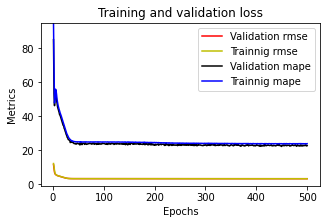

In [112]:
plotme(model4_4_1)
    

In [113]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_2 = nnmodel(100, num_hlayers=1,Epoch=500)
model4_4_2

Epoch 1/500
416/416 [==============================] - 1s 889us/step - loss: 502963.6562 - mape: 90.0671 - rmse: 709.1993 - val_loss: 407293.3438 - val_mape: 71.3071 - val_rmse: 638.1954
Epoch 2/500
416/416 [==============================] - 0s 751us/step - loss: 279841.6875 - mape: 53.2904 - rmse: 529.0007 - val_loss: 187030.8750 - val_mape: 45.7232 - val_rmse: 432.4707
Epoch 3/500
416/416 [==============================] - 0s 759us/step - loss: 146056.7969 - mape: 51.9559 - rmse: 382.1738 - val_loss: 126987.5312 - val_mape: 54.1208 - val_rmse: 356.3531
Epoch 4/500
416/416 [==============================] - 0s 740us/step - loss: 115491.8750 - mape: 56.0530 - rmse: 339.8409 - val_loss: 109412.3672 - val_mape: 53.7171 - val_rmse: 330.7754
Epoch 5/500
416/416 [==============================] - 0s 760us/step - loss: 102204.3359 - mape: 53.1833 - rmse: 319.6941 - val_loss: 98563.8750 - val_mape: 49.7877 - val_rmse: 313.9489
Epoch 6/500
416/416 [==============================] - 0s 730us/st

416/416 [==============================] - 0s 831us/step - loss: 36666.8984 - mape: 24.7520 - rmse: 191.4860 - val_loss: 37202.4844 - val_mape: 23.9524 - val_rmse: 192.8795
Epoch 46/500
416/416 [==============================] - 0s 816us/step - loss: 36649.7812 - mape: 24.7573 - rmse: 191.4413 - val_loss: 37186.6172 - val_mape: 24.1601 - val_rmse: 192.8383
Epoch 47/500
416/416 [==============================] - 0s 817us/step - loss: 36640.8984 - mape: 24.7839 - rmse: 191.4181 - val_loss: 37167.9023 - val_mape: 24.0644 - val_rmse: 192.7898
Epoch 48/500
416/416 [==============================] - 0s 847us/step - loss: 36625.7734 - mape: 24.7707 - rmse: 191.3786 - val_loss: 37166.3438 - val_mape: 23.8915 - val_rmse: 192.7858
Epoch 49/500
416/416 [==============================] - 0s 760us/step - loss: 36614.3750 - mape: 24.7235 - rmse: 191.3488 - val_loss: 37234.5312 - val_mape: 23.5823 - val_rmse: 192.9625
Epoch 50/500
416/416 [==============================] - 0s 745us/step - loss: 36603

Epoch 133/500
416/416 [==============================] - 0s 736us/step - loss: 35895.5117 - mape: 23.9349 - rmse: 189.4611 - val_loss: 36415.6016 - val_mape: 23.1289 - val_rmse: 190.8287
Epoch 134/500
416/416 [==============================] - 0s 747us/step - loss: 35863.5664 - mape: 24.0659 - rmse: 189.3768 - val_loss: 36570.1055 - val_mape: 22.3274 - val_rmse: 191.2331
Epoch 135/500
416/416 [==============================] - 0s 743us/step - loss: 35884.9648 - mape: 23.8714 - rmse: 189.4333 - val_loss: 36429.5039 - val_mape: 22.9536 - val_rmse: 190.8651
Epoch 136/500
416/416 [==============================] - 0s 765us/step - loss: 35882.8906 - mape: 23.9654 - rmse: 189.4278 - val_loss: 36420.1133 - val_mape: 22.8428 - val_rmse: 190.8405
Epoch 137/500
416/416 [==============================] - 0s 788us/step - loss: 35886.7578 - mape: 24.0069 - rmse: 189.4380 - val_loss: 36442.0078 - val_mape: 22.6869 - val_rmse: 190.8979
Epoch 138/500
416/416 [==============================] - 0s 764us

Epoch 177/500
416/416 [==============================] - 0s 738us/step - loss: 35741.1914 - mape: 23.8782 - rmse: 189.0534 - val_loss: 36281.6133 - val_mape: 22.5905 - val_rmse: 190.4773
Epoch 178/500
416/416 [==============================] - 0s 750us/step - loss: 35739.1836 - mape: 23.7895 - rmse: 189.0481 - val_loss: 36227.6367 - val_mape: 22.9309 - val_rmse: 190.3356
Epoch 179/500
416/416 [==============================] - 0s 756us/step - loss: 35747.1406 - mape: 23.7866 - rmse: 189.0691 - val_loss: 36242.2109 - val_mape: 23.1958 - val_rmse: 190.3739
Epoch 180/500
416/416 [==============================] - 0s 748us/step - loss: 35734.2656 - mape: 23.8111 - rmse: 189.0351 - val_loss: 36231.9727 - val_mape: 22.8873 - val_rmse: 190.3470
Epoch 181/500
416/416 [==============================] - 0s 747us/step - loss: 35729.3438 - mape: 23.8060 - rmse: 189.0221 - val_loss: 36235.8008 - val_mape: 23.3284 - val_rmse: 190.3570
Epoch 182/500
416/416 [==============================] - 0s 746us

Epoch 221/500
416/416 [==============================] - 0s 831us/step - loss: 35600.1484 - mape: 23.6809 - rmse: 188.6800 - val_loss: 36078.7891 - val_mape: 22.9027 - val_rmse: 189.9442
Epoch 222/500
416/416 [==============================] - 0s 816us/step - loss: 35574.4180 - mape: 23.6948 - rmse: 188.6118 - val_loss: 36088.7969 - val_mape: 22.9881 - val_rmse: 189.9705
Epoch 223/500
416/416 [==============================] - 0s 836us/step - loss: 35588.0039 - mape: 23.7221 - rmse: 188.6478 - val_loss: 36128.8555 - val_mape: 22.4291 - val_rmse: 190.0759
Epoch 224/500
416/416 [==============================] - 0s 823us/step - loss: 35596.0391 - mape: 23.6182 - rmse: 188.6691 - val_loss: 36106.1562 - val_mape: 23.4173 - val_rmse: 190.0162
Epoch 225/500
416/416 [==============================] - 0s 844us/step - loss: 35584.8477 - mape: 23.7602 - rmse: 188.6395 - val_loss: 36077.0938 - val_mape: 22.6680 - val_rmse: 189.9397
Epoch 226/500
416/416 [==============================] - 0s 811us

Epoch 265/500
416/416 [==============================] - 0s 750us/step - loss: 35477.3320 - mape: 23.5989 - rmse: 188.3543 - val_loss: 36119.8086 - val_mape: 22.0776 - val_rmse: 190.0521
Epoch 266/500
416/416 [==============================] - 0s 749us/step - loss: 35519.4336 - mape: 23.6016 - rmse: 188.4660 - val_loss: 36035.2461 - val_mape: 22.4478 - val_rmse: 189.8295
Epoch 267/500
416/416 [==============================] - 0s 745us/step - loss: 35505.1992 - mape: 23.5440 - rmse: 188.4282 - val_loss: 36058.7383 - val_mape: 22.1771 - val_rmse: 189.8914
Epoch 268/500
416/416 [==============================] - 0s 731us/step - loss: 35497.5352 - mape: 23.5629 - rmse: 188.4079 - val_loss: 35972.2109 - val_mape: 22.6186 - val_rmse: 189.6634
Epoch 269/500
416/416 [==============================] - 0s 748us/step - loss: 35496.2773 - mape: 23.5538 - rmse: 188.4046 - val_loss: 35990.4375 - val_mape: 23.0034 - val_rmse: 189.7115
Epoch 270/500
416/416 [==============================] - 0s 747us

Epoch 309/500
416/416 [==============================] - 0s 738us/step - loss: 35437.3867 - mape: 23.5874 - rmse: 188.2482 - val_loss: 35934.0820 - val_mape: 22.3903 - val_rmse: 189.5629
Epoch 310/500
416/416 [==============================] - 0s 769us/step - loss: 35447.3203 - mape: 23.4650 - rmse: 188.2746 - val_loss: 35953.1289 - val_mape: 22.3969 - val_rmse: 189.6131
Epoch 311/500
416/416 [==============================] - 0s 743us/step - loss: 35451.1953 - mape: 23.5075 - rmse: 188.2849 - val_loss: 35940.5234 - val_mape: 22.5546 - val_rmse: 189.5799
Epoch 312/500
416/416 [==============================] - 0s 723us/step - loss: 35440.8203 - mape: 23.5247 - rmse: 188.2573 - val_loss: 35956.2109 - val_mape: 22.5796 - val_rmse: 189.6212
Epoch 313/500
416/416 [==============================] - 0s 755us/step - loss: 35450.2695 - mape: 23.4751 - rmse: 188.2824 - val_loss: 35928.3359 - val_mape: 22.9625 - val_rmse: 189.5477
Epoch 314/500
416/416 [==============================] - 0s 741us

Epoch 353/500
416/416 [==============================] - 0s 853us/step - loss: 35406.2773 - mape: 23.4891 - rmse: 188.1656 - val_loss: 35999.4297 - val_mape: 22.0265 - val_rmse: 189.7352
Epoch 354/500
416/416 [==============================] - 0s 828us/step - loss: 35421.7422 - mape: 23.4772 - rmse: 188.2066 - val_loss: 35893.0273 - val_mape: 22.3144 - val_rmse: 189.4546
Epoch 355/500
416/416 [==============================] - 0s 814us/step - loss: 35407.2305 - mape: 23.4050 - rmse: 188.1681 - val_loss: 35871.4258 - val_mape: 22.7626 - val_rmse: 189.3975
Epoch 356/500
416/416 [==============================] - 0s 812us/step - loss: 35396.7656 - mape: 23.5338 - rmse: 188.1403 - val_loss: 35863.0156 - val_mape: 22.6223 - val_rmse: 189.3753
Epoch 357/500
416/416 [==============================] - 0s 846us/step - loss: 35404.7734 - mape: 23.4044 - rmse: 188.1616 - val_loss: 35875.5703 - val_mape: 22.7214 - val_rmse: 189.4085
Epoch 358/500
416/416 [==============================] - 0s 759us

Epoch 397/500
416/416 [==============================] - 0s 837us/step - loss: 35383.1211 - mape: 23.4692 - rmse: 188.1040 - val_loss: 35905.5039 - val_mape: 22.1961 - val_rmse: 189.4875
Epoch 398/500
416/416 [==============================] - 0s 852us/step - loss: 35378.2773 - mape: 23.4169 - rmse: 188.0911 - val_loss: 35864.3281 - val_mape: 22.4424 - val_rmse: 189.3788
Epoch 399/500
416/416 [==============================] - 0s 843us/step - loss: 35380.7305 - mape: 23.4549 - rmse: 188.0977 - val_loss: 35898.8672 - val_mape: 22.3642 - val_rmse: 189.4700
Epoch 400/500
416/416 [==============================] - 0s 845us/step - loss: 35379.7070 - mape: 23.3905 - rmse: 188.0949 - val_loss: 35870.0625 - val_mape: 23.0978 - val_rmse: 189.3939
Epoch 401/500
416/416 [==============================] - 0s 824us/step - loss: 35387.2852 - mape: 23.5347 - rmse: 188.1151 - val_loss: 35955.2266 - val_mape: 22.0503 - val_rmse: 189.6186
Epoch 402/500
416/416 [==============================] - 0s 792us

Epoch 441/500
416/416 [==============================] - 0s 733us/step - loss: 35351.6094 - mape: 23.4491 - rmse: 188.0202 - val_loss: 35854.3398 - val_mape: 22.5630 - val_rmse: 189.3524
Epoch 442/500
416/416 [==============================] - 0s 757us/step - loss: 35349.4258 - mape: 23.4333 - rmse: 188.0144 - val_loss: 35925.1172 - val_mape: 22.2522 - val_rmse: 189.5392
Epoch 443/500
416/416 [==============================] - 0s 733us/step - loss: 35345.8242 - mape: 23.4218 - rmse: 188.0049 - val_loss: 35869.0312 - val_mape: 22.4730 - val_rmse: 189.3912
Epoch 444/500
416/416 [==============================] - 0s 779us/step - loss: 35347.5859 - mape: 23.4270 - rmse: 188.0095 - val_loss: 35872.5508 - val_mape: 22.8223 - val_rmse: 189.4005
Epoch 445/500
416/416 [==============================] - 0s 721us/step - loss: 35348.1328 - mape: 23.4857 - rmse: 188.0110 - val_loss: 35902.9570 - val_mape: 22.1621 - val_rmse: 189.4808
Epoch 446/500
416/416 [==============================] - 0s 785us

Epoch 485/500
416/416 [==============================] - 0s 745us/step - loss: 35337.5000 - mape: 23.4297 - rmse: 187.9827 - val_loss: 35884.7695 - val_mape: 22.2707 - val_rmse: 189.4328
Epoch 486/500
416/416 [==============================] - 0s 745us/step - loss: 35326.3008 - mape: 23.4176 - rmse: 187.9529 - val_loss: 35896.5430 - val_mape: 22.1884 - val_rmse: 189.4638
Epoch 487/500
416/416 [==============================] - 0s 760us/step - loss: 35329.7969 - mape: 23.4096 - rmse: 187.9622 - val_loss: 35868.1953 - val_mape: 22.3926 - val_rmse: 189.3890
Epoch 488/500
416/416 [==============================] - 0s 757us/step - loss: 35327.4453 - mape: 23.4676 - rmse: 187.9560 - val_loss: 36025.7188 - val_mape: 21.9597 - val_rmse: 189.8044
Epoch 489/500
416/416 [==============================] - 0s 761us/step - loss: 35327.4609 - mape: 23.4062 - rmse: 187.9560 - val_loss: 35895.9297 - val_mape: 22.2073 - val_rmse: 189.4622
Epoch 490/500
416/416 [==============================] - 0s 762us

In [114]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_3 = nnmodel(200, num_hlayers=1,Epoch=500)
model4_4_3

Epoch 1/500
416/416 [==============================] - 1s 910us/step - loss: 464158.7500 - mape: 82.6411 - rmse: 681.2920 - val_loss: 307786.7812 - val_mape: 54.5441 - val_rmse: 554.7853
Epoch 2/500
416/416 [==============================] - 0s 751us/step - loss: 187077.5156 - mape: 49.6728 - rmse: 432.5246 - val_loss: 131025.3828 - val_mape: 54.2238 - val_rmse: 361.9743
Epoch 3/500
416/416 [==============================] - 0s 806us/step - loss: 115150.5547 - mape: 56.1319 - rmse: 339.3384 - val_loss: 106216.3984 - val_mape: 51.7204 - val_rmse: 325.9086
Epoch 4/500
416/416 [==============================] - 0s 775us/step - loss: 97363.0391 - mape: 50.6496 - rmse: 312.0305 - val_loss: 92313.1875 - val_mape: 47.1638 - val_rmse: 303.8308
Epoch 5/500
416/416 [==============================] - 0s 746us/step - loss: 86701.6719 - mape: 46.2514 - rmse: 294.4515 - val_loss: 83764.7500 - val_mape: 42.8453 - val_rmse: 289.4214
Epoch 6/500
416/416 [==============================] - 0s 743us/step 

416/416 [==============================] - 0s 734us/step - loss: 36621.9609 - mape: 24.7608 - rmse: 191.3687 - val_loss: 37096.9023 - val_mape: 23.5936 - val_rmse: 192.6056
Epoch 46/500
416/416 [==============================] - 0s 744us/step - loss: 36607.3320 - mape: 24.7359 - rmse: 191.3304 - val_loss: 37123.8672 - val_mape: 23.3355 - val_rmse: 192.6756
Epoch 47/500
416/416 [==============================] - 0s 759us/step - loss: 36598.4648 - mape: 24.6528 - rmse: 191.3073 - val_loss: 37112.1172 - val_mape: 23.5482 - val_rmse: 192.6451
Epoch 48/500
416/416 [==============================] - 0s 759us/step - loss: 36610.5117 - mape: 24.6529 - rmse: 191.3387 - val_loss: 37080.8555 - val_mape: 24.1299 - val_rmse: 192.5639
Epoch 49/500
416/416 [==============================] - 0s 750us/step - loss: 36578.4219 - mape: 24.7482 - rmse: 191.2549 - val_loss: 37157.1172 - val_mape: 23.3124 - val_rmse: 192.7618
Epoch 50/500
416/416 [==============================] - 0s 752us/step - loss: 36582

Epoch 133/500
416/416 [==============================] - 0s 721us/step - loss: 35951.0977 - mape: 23.9237 - rmse: 189.6077 - val_loss: 36539.0625 - val_mape: 23.1016 - val_rmse: 191.1519
Epoch 134/500
416/416 [==============================] - 0s 719us/step - loss: 35929.6133 - mape: 24.0714 - rmse: 189.5511 - val_loss: 36565.7461 - val_mape: 22.4344 - val_rmse: 191.2217
Epoch 135/500
416/416 [==============================] - 0s 747us/step - loss: 35948.3086 - mape: 23.9029 - rmse: 189.6004 - val_loss: 36519.2031 - val_mape: 22.8938 - val_rmse: 191.1000
Epoch 136/500
416/416 [==============================] - 0s 756us/step - loss: 35903.3633 - mape: 24.0087 - rmse: 189.4818 - val_loss: 36780.2266 - val_mape: 22.2036 - val_rmse: 191.7817
Epoch 137/500
416/416 [==============================] - 0s 768us/step - loss: 35932.1250 - mape: 23.9439 - rmse: 189.5577 - val_loss: 36560.6914 - val_mape: 22.7959 - val_rmse: 191.2085
Epoch 138/500
416/416 [==============================] - 0s 744us

Epoch 177/500
416/416 [==============================] - 0s 746us/step - loss: 35759.2148 - mape: 23.8417 - rmse: 189.1011 - val_loss: 36397.3516 - val_mape: 23.6889 - val_rmse: 190.7809
Epoch 178/500
416/416 [==============================] - 0s 747us/step - loss: 35763.2227 - mape: 23.8398 - rmse: 189.1117 - val_loss: 36299.6211 - val_mape: 23.4120 - val_rmse: 190.5246
Epoch 179/500
416/416 [==============================] - 0s 854us/step - loss: 35754.0586 - mape: 23.8288 - rmse: 189.0874 - val_loss: 36333.6523 - val_mape: 23.4895 - val_rmse: 190.6139
Epoch 180/500
416/416 [==============================] - 0s 782us/step - loss: 35771.5234 - mape: 23.8535 - rmse: 189.1336 - val_loss: 36341.8711 - val_mape: 23.4665 - val_rmse: 190.6354
Epoch 181/500
416/416 [==============================] - 0s 921us/step - loss: 35736.1406 - mape: 23.8405 - rmse: 189.0401 - val_loss: 36331.5625 - val_mape: 22.6083 - val_rmse: 190.6084
Epoch 182/500
416/416 [==============================] - 0s 944us

Epoch 221/500
416/416 [==============================] - 0s 932us/step - loss: 35629.3438 - mape: 23.7693 - rmse: 188.7574 - val_loss: 36227.5820 - val_mape: 22.9350 - val_rmse: 190.3354
Epoch 222/500
416/416 [==============================] - 0s 919us/step - loss: 35633.7070 - mape: 23.7968 - rmse: 188.7689 - val_loss: 36218.7539 - val_mape: 22.6195 - val_rmse: 190.3123
Epoch 223/500
416/416 [==============================] - 0s 921us/step - loss: 35631.0117 - mape: 23.7485 - rmse: 188.7618 - val_loss: 36178.0859 - val_mape: 22.8635 - val_rmse: 190.2054
Epoch 224/500
416/416 [==============================] - 0s 916us/step - loss: 35617.1914 - mape: 23.7082 - rmse: 188.7252 - val_loss: 36166.3516 - val_mape: 23.2036 - val_rmse: 190.1745
Epoch 225/500
416/416 [==============================] - 0s 918us/step - loss: 35612.0898 - mape: 23.7881 - rmse: 188.7117 - val_loss: 36229.5117 - val_mape: 23.0470 - val_rmse: 190.3405
Epoch 226/500
416/416 [==============================] - 0s 905us

Epoch 265/500
416/416 [==============================] - 0s 910us/step - loss: 35503.1484 - mape: 23.6730 - rmse: 188.4228 - val_loss: 36109.3398 - val_mape: 22.5385 - val_rmse: 190.0246
Epoch 266/500
416/416 [==============================] - 0s 904us/step - loss: 35503.8555 - mape: 23.6459 - rmse: 188.4247 - val_loss: 36103.8320 - val_mape: 22.3919 - val_rmse: 190.0101
Epoch 267/500
416/416 [==============================] - 0s 905us/step - loss: 35495.8047 - mape: 23.6220 - rmse: 188.4033 - val_loss: 36046.7227 - val_mape: 23.2756 - val_rmse: 189.8597
Epoch 268/500
416/416 [==============================] - 0s 893us/step - loss: 35483.7969 - mape: 23.6459 - rmse: 188.3714 - val_loss: 36109.5469 - val_mape: 22.3144 - val_rmse: 190.0251
Epoch 269/500
416/416 [==============================] - 0s 928us/step - loss: 35506.6875 - mape: 23.6107 - rmse: 188.4322 - val_loss: 36030.2383 - val_mape: 23.1732 - val_rmse: 189.8163
Epoch 270/500
416/416 [==============================] - 0s 910us

Epoch 309/500
416/416 [==============================] - 0s 746us/step - loss: 35419.9375 - mape: 23.5451 - rmse: 188.2019 - val_loss: 35977.7188 - val_mape: 23.3009 - val_rmse: 189.6779
Epoch 310/500
416/416 [==============================] - 0s 742us/step - loss: 35425.5625 - mape: 23.5787 - rmse: 188.2168 - val_loss: 35966.8516 - val_mape: 22.7923 - val_rmse: 189.6493
Epoch 311/500
416/416 [==============================] - 0s 742us/step - loss: 35432.3828 - mape: 23.6445 - rmse: 188.2349 - val_loss: 36057.1445 - val_mape: 22.1700 - val_rmse: 189.8872
Epoch 312/500
416/416 [==============================] - 0s 738us/step - loss: 35410.8984 - mape: 23.5816 - rmse: 188.1778 - val_loss: 35977.5430 - val_mape: 22.5651 - val_rmse: 189.6775
Epoch 313/500
416/416 [==============================] - 0s 734us/step - loss: 35413.2695 - mape: 23.5568 - rmse: 188.1841 - val_loss: 36025.9844 - val_mape: 22.7860 - val_rmse: 189.8051
Epoch 314/500
416/416 [==============================] - 0s 737us

Epoch 353/500
416/416 [==============================] - 0s 732us/step - loss: 35373.1289 - mape: 23.5557 - rmse: 188.0775 - val_loss: 35904.9375 - val_mape: 22.9881 - val_rmse: 189.4860
Epoch 354/500
416/416 [==============================] - 0s 756us/step - loss: 35357.6484 - mape: 23.5387 - rmse: 188.0363 - val_loss: 35994.3203 - val_mape: 23.6903 - val_rmse: 189.7217
Epoch 355/500
416/416 [==============================] - 0s 758us/step - loss: 35380.4219 - mape: 23.5631 - rmse: 188.0968 - val_loss: 35925.5000 - val_mape: 22.7341 - val_rmse: 189.5402
Epoch 356/500
416/416 [==============================] - 0s 745us/step - loss: 35361.2500 - mape: 23.5735 - rmse: 188.0459 - val_loss: 35994.5508 - val_mape: 22.2770 - val_rmse: 189.7223
Epoch 357/500
416/416 [==============================] - 0s 743us/step - loss: 35376.8906 - mape: 23.4823 - rmse: 188.0874 - val_loss: 36002.0664 - val_mape: 22.4443 - val_rmse: 189.7421
Epoch 358/500
416/416 [==============================] - 0s 739us

Epoch 397/500
416/416 [==============================] - 0s 735us/step - loss: 35329.5117 - mape: 23.5023 - rmse: 187.9615 - val_loss: 35927.3594 - val_mape: 22.5724 - val_rmse: 189.5451
Epoch 398/500
416/416 [==============================] - 0s 746us/step - loss: 35315.9805 - mape: 23.5275 - rmse: 187.9255 - val_loss: 36313.6016 - val_mape: 21.7099 - val_rmse: 190.5613
Epoch 399/500
416/416 [==============================] - 0s 738us/step - loss: 35370.5000 - mape: 23.4886 - rmse: 188.0705 - val_loss: 35936.8867 - val_mape: 22.3012 - val_rmse: 189.5703
Epoch 400/500
416/416 [==============================] - 0s 742us/step - loss: 35330.8047 - mape: 23.5321 - rmse: 187.9649 - val_loss: 35908.3477 - val_mape: 22.4846 - val_rmse: 189.4950
Epoch 401/500
416/416 [==============================] - 0s 732us/step - loss: 35337.7930 - mape: 23.4786 - rmse: 187.9835 - val_loss: 35947.3320 - val_mape: 23.2133 - val_rmse: 189.5978
Epoch 402/500
416/416 [==============================] - 0s 734us

Epoch 441/500
416/416 [==============================] - 0s 733us/step - loss: 35312.6133 - mape: 23.4828 - rmse: 187.9165 - val_loss: 35958.6914 - val_mape: 22.4335 - val_rmse: 189.6278
Epoch 442/500
416/416 [==============================] - 0s 735us/step - loss: 35304.7656 - mape: 23.4574 - rmse: 187.8956 - val_loss: 35918.2812 - val_mape: 23.2738 - val_rmse: 189.5212
Epoch 443/500
416/416 [==============================] - 0s 734us/step - loss: 35329.6602 - mape: 23.5372 - rmse: 187.9619 - val_loss: 35891.9180 - val_mape: 22.6884 - val_rmse: 189.4516
Epoch 444/500
416/416 [==============================] - 0s 742us/step - loss: 35305.3242 - mape: 23.4886 - rmse: 187.8971 - val_loss: 35882.6797 - val_mape: 22.7479 - val_rmse: 189.4272
Epoch 445/500
416/416 [==============================] - 0s 741us/step - loss: 35319.1523 - mape: 23.5335 - rmse: 187.9339 - val_loss: 36013.1641 - val_mape: 22.0757 - val_rmse: 189.7713
Epoch 446/500
416/416 [==============================] - 0s 730us

Epoch 485/500
416/416 [==============================] - 0s 750us/step - loss: 35299.6758 - mape: 23.5240 - rmse: 187.8821 - val_loss: 35901.1992 - val_mape: 22.5954 - val_rmse: 189.4761
Epoch 486/500
416/416 [==============================] - 0s 773us/step - loss: 35294.9062 - mape: 23.4900 - rmse: 187.8694 - val_loss: 35883.7461 - val_mape: 22.6641 - val_rmse: 189.4301
Epoch 487/500
416/416 [==============================] - 0s 740us/step - loss: 35290.3672 - mape: 23.5142 - rmse: 187.8573 - val_loss: 35881.1758 - val_mape: 22.5012 - val_rmse: 189.4233
Epoch 488/500
416/416 [==============================] - 0s 734us/step - loss: 35288.2344 - mape: 23.5106 - rmse: 187.8516 - val_loss: 35912.1836 - val_mape: 22.2784 - val_rmse: 189.5051
Epoch 489/500
416/416 [==============================] - 0s 735us/step - loss: 35309.3594 - mape: 23.4857 - rmse: 187.9079 - val_loss: 35864.1367 - val_mape: 22.6222 - val_rmse: 189.3783
Epoch 490/500
416/416 [==============================] - 0s 751us

In [115]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_4 = nnmodel(100,50, num_hlayers=2,Epoch=500)
model4_4_4

Epoch 1/500
416/416 [==============================] - 1s 920us/step - loss: 263220.5625 - mape: 67.6768 - rmse: 513.0502 - val_loss: 98387.8125 - val_mape: 49.6095 - val_rmse: 313.6683
Epoch 2/500
416/416 [==============================] - 0s 776us/step - loss: 84615.4375 - mape: 46.4572 - rmse: 290.8873 - val_loss: 76149.7188 - val_mape: 42.2553 - val_rmse: 275.9524
Epoch 3/500
416/416 [==============================] - 0s 775us/step - loss: 67087.0391 - mape: 40.1602 - rmse: 259.0117 - val_loss: 59253.6992 - val_mape: 35.9053 - val_rmse: 243.4208
Epoch 4/500
416/416 [==============================] - 0s 775us/step - loss: 50690.4023 - mape: 33.9502 - rmse: 225.1453 - val_loss: 44262.4570 - val_mape: 29.4035 - val_rmse: 210.3864
Epoch 5/500
416/416 [==============================] - 0s 779us/step - loss: 40046.3633 - mape: 28.3544 - rmse: 200.1159 - val_loss: 38175.6523 - val_mape: 25.8228 - val_rmse: 195.3859
Epoch 6/500
416/416 [==============================] - 0s 782us/step - los

416/416 [==============================] - 0s 817us/step - loss: 35519.9023 - mape: 23.7820 - rmse: 188.4672 - val_loss: 35938.4062 - val_mape: 22.0829 - val_rmse: 189.5743
Epoch 90/500
416/416 [==============================] - 0s 804us/step - loss: 35532.5977 - mape: 23.8814 - rmse: 188.5009 - val_loss: 36031.8672 - val_mape: 22.3025 - val_rmse: 189.8206
Epoch 91/500
416/416 [==============================] - 0s 808us/step - loss: 35540.1289 - mape: 23.6879 - rmse: 188.5209 - val_loss: 35886.6445 - val_mape: 22.4468 - val_rmse: 189.4377
Epoch 92/500
416/416 [==============================] - 0s 807us/step - loss: 35555.6836 - mape: 23.7201 - rmse: 188.5621 - val_loss: 35960.0703 - val_mape: 22.0231 - val_rmse: 189.6314
Epoch 93/500
416/416 [==============================] - 0s 818us/step - loss: 35580.4297 - mape: 23.7853 - rmse: 188.6278 - val_loss: 36021.3516 - val_mape: 22.1960 - val_rmse: 189.7929
Epoch 94/500
416/416 [==============================] - 0s 827us/step - loss: 35516

Epoch 133/500
416/416 [==============================] - 0s 823us/step - loss: 35432.0703 - mape: 23.6261 - rmse: 188.2341 - val_loss: 35918.9844 - val_mape: 23.7385 - val_rmse: 189.5230
Epoch 134/500
416/416 [==============================] - 0s 827us/step - loss: 35440.4648 - mape: 23.6817 - rmse: 188.2564 - val_loss: 35889.8555 - val_mape: 21.9414 - val_rmse: 189.4462
Epoch 135/500
416/416 [==============================] - 0s 826us/step - loss: 35435.9297 - mape: 23.6631 - rmse: 188.2443 - val_loss: 36061.9922 - val_mape: 21.9758 - val_rmse: 189.8999
Epoch 136/500
416/416 [==============================] - 0s 839us/step - loss: 35377.1562 - mape: 23.5754 - rmse: 188.0882 - val_loss: 35849.5312 - val_mape: 22.1271 - val_rmse: 189.3397
Epoch 137/500
416/416 [==============================] - 0s 823us/step - loss: 35441.2500 - mape: 23.5691 - rmse: 188.2585 - val_loss: 35810.9844 - val_mape: 22.3882 - val_rmse: 189.2379
Epoch 138/500
416/416 [==============================] - 0s 823us

Epoch 177/500
416/416 [==============================] - 0s 821us/step - loss: 35353.9570 - mape: 23.6233 - rmse: 188.0265 - val_loss: 35810.1797 - val_mape: 23.4682 - val_rmse: 189.2358
Epoch 178/500
416/416 [==============================] - 0s 821us/step - loss: 35335.3398 - mape: 23.6732 - rmse: 187.9770 - val_loss: 35751.9531 - val_mape: 22.3960 - val_rmse: 189.0819
Epoch 179/500
416/416 [==============================] - 0s 814us/step - loss: 35412.3086 - mape: 23.5503 - rmse: 188.1816 - val_loss: 36364.8633 - val_mape: 21.2795 - val_rmse: 190.6957
Epoch 180/500
416/416 [==============================] - 0s 815us/step - loss: 35407.5117 - mape: 23.5057 - rmse: 188.1688 - val_loss: 35856.3086 - val_mape: 22.4101 - val_rmse: 189.3576
Epoch 181/500
416/416 [==============================] - 0s 829us/step - loss: 35420.5586 - mape: 23.6240 - rmse: 188.2035 - val_loss: 35917.5469 - val_mape: 21.8117 - val_rmse: 189.5193
Epoch 182/500
416/416 [==============================] - 0s 819us

Epoch 221/500
416/416 [==============================] - 0s 849us/step - loss: 35267.9336 - mape: 23.4292 - rmse: 187.7976 - val_loss: 35828.4648 - val_mape: 22.0143 - val_rmse: 189.2841
Epoch 222/500
416/416 [==============================] - 0s 848us/step - loss: 35285.6758 - mape: 23.4695 - rmse: 187.8448 - val_loss: 36158.5156 - val_mape: 21.4436 - val_rmse: 190.1539
Epoch 223/500
416/416 [==============================] - 0s 841us/step - loss: 35314.9531 - mape: 23.5583 - rmse: 187.9227 - val_loss: 35695.1680 - val_mape: 23.1228 - val_rmse: 188.9317
Epoch 224/500
416/416 [==============================] - 0s 824us/step - loss: 35247.1445 - mape: 23.5313 - rmse: 187.7422 - val_loss: 35790.8477 - val_mape: 21.8689 - val_rmse: 189.1847
Epoch 225/500
416/416 [==============================] - 0s 821us/step - loss: 35256.8945 - mape: 23.5523 - rmse: 187.7682 - val_loss: 35842.9531 - val_mape: 21.3842 - val_rmse: 189.3224
Epoch 226/500
416/416 [==============================] - 0s 828us

Epoch 265/500
416/416 [==============================] - 0s 776us/step - loss: 35245.9102 - mape: 23.4425 - rmse: 187.7389 - val_loss: 35668.7148 - val_mape: 22.2995 - val_rmse: 188.8616
Epoch 266/500
416/416 [==============================] - 0s 784us/step - loss: 35177.4883 - mape: 23.4408 - rmse: 187.5566 - val_loss: 35809.6836 - val_mape: 23.5127 - val_rmse: 189.2345
Epoch 267/500
416/416 [==============================] - 0s 779us/step - loss: 35252.7891 - mape: 23.5146 - rmse: 187.7573 - val_loss: 35648.5742 - val_mape: 23.0359 - val_rmse: 188.8083
Epoch 268/500
416/416 [==============================] - 0s 777us/step - loss: 35185.9844 - mape: 23.4602 - rmse: 187.5793 - val_loss: 35713.2773 - val_mape: 23.1184 - val_rmse: 188.9796
Epoch 269/500
416/416 [==============================] - 0s 778us/step - loss: 35204.0078 - mape: 23.4869 - rmse: 187.6273 - val_loss: 35860.6250 - val_mape: 23.4816 - val_rmse: 189.3690
Epoch 270/500
416/416 [==============================] - 0s 805us

Epoch 309/500
416/416 [==============================] - 0s 765us/step - loss: 35135.7500 - mape: 23.3670 - rmse: 187.4453 - val_loss: 35693.2461 - val_mape: 22.3598 - val_rmse: 188.9266
Epoch 310/500
416/416 [==============================] - 0s 771us/step - loss: 35188.8516 - mape: 23.4448 - rmse: 187.5869 - val_loss: 35711.9844 - val_mape: 23.0444 - val_rmse: 188.9762
Epoch 311/500
416/416 [==============================] - 0s 771us/step - loss: 35126.4648 - mape: 23.4791 - rmse: 187.4206 - val_loss: 35904.7227 - val_mape: 23.8467 - val_rmse: 189.4854
Epoch 312/500
416/416 [==============================] - 0s 770us/step - loss: 35168.6914 - mape: 23.4232 - rmse: 187.5332 - val_loss: 35649.7656 - val_mape: 22.8124 - val_rmse: 188.8115
Epoch 313/500
416/416 [==============================] - 0s 776us/step - loss: 35206.6172 - mape: 23.4586 - rmse: 187.6343 - val_loss: 35749.0039 - val_mape: 22.7067 - val_rmse: 189.0741
Epoch 314/500
416/416 [==============================] - 0s 773us

Epoch 353/500
416/416 [==============================] - 0s 783us/step - loss: 35116.1680 - mape: 23.3965 - rmse: 187.3931 - val_loss: 35786.6055 - val_mape: 21.7680 - val_rmse: 189.1735
Epoch 354/500
416/416 [==============================] - 0s 771us/step - loss: 35100.6055 - mape: 23.3365 - rmse: 187.3516 - val_loss: 35847.0820 - val_mape: 23.7858 - val_rmse: 189.3333
Epoch 355/500
416/416 [==============================] - 0s 773us/step - loss: 35148.8242 - mape: 23.4785 - rmse: 187.4802 - val_loss: 35678.9961 - val_mape: 22.7828 - val_rmse: 188.8888
Epoch 356/500
416/416 [==============================] - 0s 784us/step - loss: 35061.0039 - mape: 23.3494 - rmse: 187.2458 - val_loss: 36165.1562 - val_mape: 21.4343 - val_rmse: 190.1714
Epoch 357/500
416/416 [==============================] - 0s 774us/step - loss: 35080.2383 - mape: 23.4086 - rmse: 187.2972 - val_loss: 36132.7227 - val_mape: 21.8433 - val_rmse: 190.0861
Epoch 358/500
416/416 [==============================] - 0s 772us

Epoch 397/500
416/416 [==============================] - 0s 781us/step - loss: 35006.0625 - mape: 23.3541 - rmse: 187.0991 - val_loss: 35724.3945 - val_mape: 23.1300 - val_rmse: 189.0090
Epoch 398/500
416/416 [==============================] - 0s 779us/step - loss: 35037.4727 - mape: 23.3623 - rmse: 187.1830 - val_loss: 35827.2227 - val_mape: 23.7155 - val_rmse: 189.2808
Epoch 399/500
416/416 [==============================] - 0s 790us/step - loss: 35085.1523 - mape: 23.4733 - rmse: 187.3103 - val_loss: 35696.1641 - val_mape: 21.9555 - val_rmse: 188.9343
Epoch 400/500
416/416 [==============================] - 0s 790us/step - loss: 35070.6562 - mape: 23.3746 - rmse: 187.2716 - val_loss: 35749.0586 - val_mape: 23.0719 - val_rmse: 189.0742
Epoch 401/500
416/416 [==============================] - 0s 781us/step - loss: 35004.4609 - mape: 23.3344 - rmse: 187.0948 - val_loss: 35778.1836 - val_mape: 22.4293 - val_rmse: 189.1512
Epoch 402/500
416/416 [==============================] - 0s 791us

Epoch 441/500
416/416 [==============================] - 0s 780us/step - loss: 35020.4141 - mape: 23.3203 - rmse: 187.1374 - val_loss: 35768.7344 - val_mape: 21.6089 - val_rmse: 189.1262
Epoch 442/500
416/416 [==============================] - 0s 773us/step - loss: 35016.9102 - mape: 23.3293 - rmse: 187.1281 - val_loss: 35793.0742 - val_mape: 22.2359 - val_rmse: 189.1906
Epoch 443/500
416/416 [==============================] - 0s 778us/step - loss: 34980.6367 - mape: 23.3337 - rmse: 187.0311 - val_loss: 35723.0312 - val_mape: 22.2695 - val_rmse: 189.0054
Epoch 444/500
416/416 [==============================] - 0s 773us/step - loss: 35036.6250 - mape: 23.3437 - rmse: 187.1807 - val_loss: 35932.8242 - val_mape: 21.7942 - val_rmse: 189.5596
Epoch 445/500
416/416 [==============================] - 0s 774us/step - loss: 34971.4141 - mape: 23.2930 - rmse: 187.0065 - val_loss: 35742.6641 - val_mape: 23.1996 - val_rmse: 189.0573
Epoch 446/500
416/416 [==============================] - 0s 776us

Epoch 485/500
416/416 [==============================] - 0s 838us/step - loss: 34949.0547 - mape: 23.2980 - rmse: 186.9467 - val_loss: 35792.7891 - val_mape: 23.3471 - val_rmse: 189.1898
Epoch 486/500
416/416 [==============================] - 0s 816us/step - loss: 34962.2109 - mape: 23.3736 - rmse: 186.9818 - val_loss: 35720.7852 - val_mape: 23.0589 - val_rmse: 188.9994
Epoch 487/500
416/416 [==============================] - 0s 800us/step - loss: 34958.2227 - mape: 23.3302 - rmse: 186.9712 - val_loss: 36020.1406 - val_mape: 21.7227 - val_rmse: 189.7897
Epoch 488/500
416/416 [==============================] - 0s 789us/step - loss: 34977.1289 - mape: 23.3223 - rmse: 187.0217 - val_loss: 35738.7109 - val_mape: 23.0413 - val_rmse: 189.0468
Epoch 489/500
416/416 [==============================] - 0s 796us/step - loss: 34961.6484 - mape: 23.3191 - rmse: 186.9803 - val_loss: 35821.1875 - val_mape: 23.2287 - val_rmse: 189.2649
Epoch 490/500
416/416 [==============================] - 0s 790us

In [116]:
# plotme(model4_4_4)

In [117]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_5 = nnmodel(200,100, num_hlayers=2,Epoch=500)
model4_4_5

Epoch 1/500
416/416 [==============================] - 1s 1ms/step - loss: 210235.6875 - mape: 61.6955 - rmse: 458.5146 - val_loss: 85153.0859 - val_mape: 45.2188 - val_rmse: 291.8100
Epoch 2/500
416/416 [==============================] - 0s 859us/step - loss: 72019.8984 - mape: 41.6933 - rmse: 268.3652 - val_loss: 60087.6992 - val_mape: 37.0460 - val_rmse: 245.1279
Epoch 3/500
416/416 [==============================] - 0s 853us/step - loss: 48413.2305 - mape: 32.7575 - rmse: 220.0301 - val_loss: 40722.1797 - val_mape: 27.1254 - val_rmse: 201.7974
Epoch 4/500
416/416 [==============================] - 0s 855us/step - loss: 37957.8906 - mape: 26.5447 - rmse: 194.8279 - val_loss: 37888.1914 - val_mape: 23.8263 - val_rmse: 194.6489
Epoch 5/500
416/416 [==============================] - 0s 889us/step - loss: 37000.9609 - mape: 25.3028 - rmse: 192.3563 - val_loss: 37268.4805 - val_mape: 24.6148 - val_rmse: 193.0505
Epoch 6/500
416/416 [==============================] - 0s 862us/step - loss:

416/416 [==============================] - 0s 859us/step - loss: 35673.3477 - mape: 24.1745 - rmse: 188.8739 - val_loss: 36001.3008 - val_mape: 23.6615 - val_rmse: 189.7401
Epoch 90/500
416/416 [==============================] - 0s 856us/step - loss: 35670.1914 - mape: 23.9892 - rmse: 188.8655 - val_loss: 36086.5820 - val_mape: 23.1184 - val_rmse: 189.9647
Epoch 91/500
416/416 [==============================] - 0s 850us/step - loss: 35651.7266 - mape: 24.0495 - rmse: 188.8167 - val_loss: 36173.6875 - val_mape: 22.4205 - val_rmse: 190.1938
Epoch 92/500
416/416 [==============================] - 0s 852us/step - loss: 35609.3984 - mape: 24.0157 - rmse: 188.7045 - val_loss: 36416.2500 - val_mape: 21.8615 - val_rmse: 190.8304
Epoch 93/500
416/416 [==============================] - 0s 847us/step - loss: 35661.2109 - mape: 24.0492 - rmse: 188.8418 - val_loss: 36045.5508 - val_mape: 23.0311 - val_rmse: 189.8567
Epoch 94/500
416/416 [==============================] - 0s 852us/step - loss: 35624

Epoch 133/500
416/416 [==============================] - 0s 906us/step - loss: 35647.7734 - mape: 23.9623 - rmse: 188.8062 - val_loss: 36073.9844 - val_mape: 22.8539 - val_rmse: 189.9315
Epoch 134/500
416/416 [==============================] - 0s 926us/step - loss: 35471.9766 - mape: 23.9074 - rmse: 188.3401 - val_loss: 36896.3477 - val_mape: 21.6771 - val_rmse: 192.0842
Epoch 135/500
416/416 [==============================] - 0s 895us/step - loss: 35508.8750 - mape: 23.8644 - rmse: 188.4380 - val_loss: 36148.5820 - val_mape: 23.4379 - val_rmse: 190.1278
Epoch 136/500
416/416 [==============================] - 0s 887us/step - loss: 35515.9922 - mape: 23.9397 - rmse: 188.4569 - val_loss: 35914.3516 - val_mape: 22.8449 - val_rmse: 189.5108
Epoch 137/500
416/416 [==============================] - 0s 895us/step - loss: 35505.8555 - mape: 23.8926 - rmse: 188.4300 - val_loss: 36003.2500 - val_mape: 22.6063 - val_rmse: 189.7452
Epoch 138/500
416/416 [==============================] - 0s 931us

Epoch 177/500
416/416 [==============================] - 0s 868us/step - loss: 35447.7578 - mape: 23.7593 - rmse: 188.2758 - val_loss: 36120.5938 - val_mape: 22.0435 - val_rmse: 190.0542
Epoch 178/500
416/416 [==============================] - 0s 883us/step - loss: 35399.9648 - mape: 23.7583 - rmse: 188.1488 - val_loss: 35924.8203 - val_mape: 22.1890 - val_rmse: 189.5384
Epoch 179/500
416/416 [==============================] - 0s 890us/step - loss: 35423.0664 - mape: 23.6662 - rmse: 188.2102 - val_loss: 35888.4297 - val_mape: 23.6872 - val_rmse: 189.4424
Epoch 180/500
416/416 [==============================] - 0s 860us/step - loss: 35420.3906 - mape: 23.8771 - rmse: 188.2031 - val_loss: 35904.0859 - val_mape: 22.4497 - val_rmse: 189.4837
Epoch 181/500
416/416 [==============================] - 0s 866us/step - loss: 35451.1641 - mape: 23.7763 - rmse: 188.2848 - val_loss: 35997.3203 - val_mape: 23.1641 - val_rmse: 189.7296
Epoch 182/500
416/416 [==============================] - 0s 856us

Epoch 221/500
416/416 [==============================] - 0s 860us/step - loss: 35193.1484 - mape: 23.5275 - rmse: 187.5984 - val_loss: 36532.2422 - val_mape: 21.8623 - val_rmse: 191.1341
Epoch 222/500
416/416 [==============================] - 0s 858us/step - loss: 35203.3359 - mape: 23.5480 - rmse: 187.6255 - val_loss: 35883.3828 - val_mape: 22.1515 - val_rmse: 189.4291
Epoch 223/500
416/416 [==============================] - 0s 855us/step - loss: 35167.1523 - mape: 23.5833 - rmse: 187.5291 - val_loss: 35711.0703 - val_mape: 22.8863 - val_rmse: 188.9737
Epoch 224/500
416/416 [==============================] - 0s 852us/step - loss: 35245.0938 - mape: 23.5747 - rmse: 187.7368 - val_loss: 36135.6484 - val_mape: 24.1452 - val_rmse: 190.0938
Epoch 225/500
416/416 [==============================] - 0s 857us/step - loss: 35234.3047 - mape: 23.5834 - rmse: 187.7080 - val_loss: 36017.0156 - val_mape: 21.4677 - val_rmse: 189.7815
Epoch 226/500
416/416 [==============================] - 0s 855us

Epoch 265/500
416/416 [==============================] - 0s 844us/step - loss: 35219.3320 - mape: 23.4387 - rmse: 187.6681 - val_loss: 35716.4766 - val_mape: 23.6752 - val_rmse: 188.9880
Epoch 266/500
416/416 [==============================] - 0s 858us/step - loss: 35098.5508 - mape: 23.3918 - rmse: 187.3461 - val_loss: 35623.6289 - val_mape: 22.5753 - val_rmse: 188.7422
Epoch 267/500
416/416 [==============================] - 0s 857us/step - loss: 35066.0742 - mape: 23.5141 - rmse: 187.2594 - val_loss: 35632.5977 - val_mape: 22.0449 - val_rmse: 188.7660
Epoch 268/500
416/416 [==============================] - 0s 850us/step - loss: 35050.5898 - mape: 23.3507 - rmse: 187.2180 - val_loss: 35580.8438 - val_mape: 22.9621 - val_rmse: 188.6288
Epoch 269/500
416/416 [==============================] - 0s 855us/step - loss: 35138.8320 - mape: 23.5091 - rmse: 187.4536 - val_loss: 36318.5156 - val_mape: 21.2612 - val_rmse: 190.5742
Epoch 270/500
416/416 [==============================] - 0s 851us

Epoch 309/500
416/416 [==============================] - 0s 924us/step - loss: 34938.2773 - mape: 23.3258 - rmse: 186.9178 - val_loss: 35744.9062 - val_mape: 22.0301 - val_rmse: 189.0632
Epoch 310/500
416/416 [==============================] - 0s 930us/step - loss: 34934.6562 - mape: 23.3500 - rmse: 186.9081 - val_loss: 36773.9219 - val_mape: 21.1804 - val_rmse: 191.7653
Epoch 311/500
416/416 [==============================] - 0s 933us/step - loss: 34951.1445 - mape: 23.4035 - rmse: 186.9523 - val_loss: 35443.8125 - val_mape: 22.5100 - val_rmse: 188.2653
Epoch 312/500
416/416 [==============================] - 0s 894us/step - loss: 35036.4570 - mape: 23.3906 - rmse: 187.1803 - val_loss: 35521.3945 - val_mape: 22.3452 - val_rmse: 188.4712
Epoch 313/500
416/416 [==============================] - 0s 893us/step - loss: 34992.0859 - mape: 23.3542 - rmse: 187.0617 - val_loss: 35457.1133 - val_mape: 22.5990 - val_rmse: 188.3006
Epoch 314/500
416/416 [==============================] - 0s 931us

Epoch 353/500
416/416 [==============================] - 0s 880us/step - loss: 34797.9570 - mape: 23.3153 - rmse: 186.5421 - val_loss: 35675.4453 - val_mape: 22.7203 - val_rmse: 188.8794
Epoch 354/500
416/416 [==============================] - 0s 881us/step - loss: 34915.0625 - mape: 23.2832 - rmse: 186.8557 - val_loss: 35640.6914 - val_mape: 22.3262 - val_rmse: 188.7874
Epoch 355/500
416/416 [==============================] - 0s 886us/step - loss: 34878.1875 - mape: 23.4111 - rmse: 186.7570 - val_loss: 35531.0820 - val_mape: 22.7497 - val_rmse: 188.4969
Epoch 356/500
416/416 [==============================] - 0s 888us/step - loss: 34894.7148 - mape: 23.3306 - rmse: 186.8013 - val_loss: 35539.8047 - val_mape: 22.2484 - val_rmse: 188.5200
Epoch 357/500
416/416 [==============================] - 0s 878us/step - loss: 34879.5938 - mape: 23.2886 - rmse: 186.7608 - val_loss: 35469.0625 - val_mape: 22.2172 - val_rmse: 188.3323
Epoch 358/500
416/416 [==============================] - 0s 881us

Epoch 397/500
416/416 [==============================] - 0s 883us/step - loss: 34770.6680 - mape: 23.2854 - rmse: 186.4689 - val_loss: 35601.3398 - val_mape: 22.0891 - val_rmse: 188.6832
Epoch 398/500
416/416 [==============================] - 0s 888us/step - loss: 34699.4141 - mape: 23.2178 - rmse: 186.2778 - val_loss: 35938.1328 - val_mape: 22.0353 - val_rmse: 189.5736
Epoch 399/500
416/416 [==============================] - 0s 885us/step - loss: 34753.1094 - mape: 23.2325 - rmse: 186.4219 - val_loss: 35515.0469 - val_mape: 22.6984 - val_rmse: 188.4544
Epoch 400/500
416/416 [==============================] - 0s 864us/step - loss: 34801.8672 - mape: 23.3236 - rmse: 186.5526 - val_loss: 35806.0391 - val_mape: 21.5464 - val_rmse: 189.2248
Epoch 401/500
416/416 [==============================] - 0s 885us/step - loss: 34790.8125 - mape: 23.2830 - rmse: 186.5229 - val_loss: 35607.8320 - val_mape: 22.1245 - val_rmse: 188.7004
Epoch 402/500
416/416 [==============================] - 0s 884us

Epoch 441/500
416/416 [==============================] - 0s 884us/step - loss: 34659.5820 - mape: 23.2375 - rmse: 186.1708 - val_loss: 35885.4961 - val_mape: 22.1241 - val_rmse: 189.4347
Epoch 442/500
416/416 [==============================] - 0s 892us/step - loss: 34650.0977 - mape: 23.2093 - rmse: 186.1454 - val_loss: 35499.7188 - val_mape: 22.9377 - val_rmse: 188.4137
Epoch 443/500
416/416 [==============================] - 0s 880us/step - loss: 34670.1406 - mape: 23.3262 - rmse: 186.1992 - val_loss: 35542.8086 - val_mape: 22.0436 - val_rmse: 188.5280
Epoch 444/500
416/416 [==============================] - 0s 891us/step - loss: 34620.5977 - mape: 23.2091 - rmse: 186.0661 - val_loss: 35805.7188 - val_mape: 21.5515 - val_rmse: 189.2240
Epoch 445/500
416/416 [==============================] - 0s 908us/step - loss: 34628.4180 - mape: 23.2029 - rmse: 186.0871 - val_loss: 35530.3242 - val_mape: 22.1078 - val_rmse: 188.4949
Epoch 446/500
416/416 [==============================] - 0s 885us

Epoch 485/500
416/416 [==============================] - 0s 905us/step - loss: 34564.6641 - mape: 23.2091 - rmse: 185.9157 - val_loss: 35504.0234 - val_mape: 23.2226 - val_rmse: 188.4251
Epoch 486/500
416/416 [==============================] - 0s 886us/step - loss: 34558.7656 - mape: 23.1488 - rmse: 185.8999 - val_loss: 35504.5391 - val_mape: 21.8644 - val_rmse: 188.4265
Epoch 487/500
416/416 [==============================] - 0s 893us/step - loss: 34511.9180 - mape: 23.1959 - rmse: 185.7738 - val_loss: 35498.9492 - val_mape: 21.6796 - val_rmse: 188.4117
Epoch 488/500
416/416 [==============================] - 0s 883us/step - loss: 34453.1680 - mape: 23.1513 - rmse: 185.6156 - val_loss: 35504.0781 - val_mape: 22.5072 - val_rmse: 188.4253
Epoch 489/500
416/416 [==============================] - 0s 899us/step - loss: 34530.8711 - mape: 23.2309 - rmse: 185.8248 - val_loss: 35442.8984 - val_mape: 22.4260 - val_rmse: 188.2628
Epoch 490/500
416/416 [==============================] - 0s 891us

## sub-problem 6:  **input: distance & hour &  roadtypes contribution**

#### Analysis of features

In [20]:
df7 = df1.iloc[:,:].copy()
# df7 = df7.drop(['hour of day','1st ranked','2nd ranked','3rd ranked','4d ranked','5th ranked','6th ranked','4rd dist','5th dist','6th dist'], axis=1)
df7 = df7.fillna(0)
df7.head()

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0         1917           17  0.992498  0.816276    0.448560         0.524038   
1          766           20  0.344315  0.268660    0.727273         0.823529   
2          130           18  0.018713  0.016889    0.625000         0.714286   
3          551           15  0.349947  0.299087    0.662338         0.680000   
4          962           16  0.385289  0.341360    0.542553         0.573034   

  1st ranked    2nd ranked   3rd ranked  1st dist  2nd dist  3rd dist  \
0    primary  unclassified     tertiary  0.959841  0.024320  0.014853   
1    primary  unclassified     tertiary  0.737798  0.189798  0.042312   
2   tertiary   residential            0  0.633803  0.366197  0.000000   
3    primary  unclassified  residential  0.726134  0.118816  0.113408   
4    primary  unclassified  residential  0.660599  0.217712  0.083805   

     hr_sin        hr_cos  
0 -0.965926 -2.588190e-01  
1 -0.866025  5.000000e-01  
2 -1.000000 -1.836970e-16  
3 -0.707107 -7.071068e-01  
4 -0.866025 -5.000000e-01

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

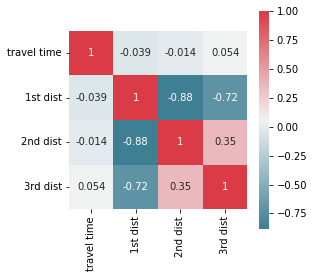

In [21]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(4,4))
corr = df7[['travel time','1st dist','2nd dist','3rd dist']].corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [22]:
x = np.array(df7[['est_dist','1st dist','2nd dist','3rd dist']])
y = np.array(df7['travel time'])
x

array([[0.81627648, 0.95984056, 0.0243202 , 0.01485323],
       [0.26865964, 0.73779776, 0.18979812, 0.04231177],
       [0.0168893 , 0.63380264, 0.36619736, 0.        ],
       ...,
       [0.30644399, 0.51086397, 0.38216081, 0.10697521],
       [0.00705875, 0.75269334, 0.24730666, 0.        ],
       [0.62597006, 0.92774867, 0.03339001, 0.02127069]])

In [23]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
print(X_train.shape)
print(X_test.shape)
# X_train

(13304, 4)
(3327, 4)


In [25]:
# inputs: distance + 1st dist + 2nd dist + 3rd dist
model6_1_4 = nnmodel_(10, num_hlayers=1,Epoch=500)
model6_1_4

Epoch 1/500
416/416 [==============================] - 1s 888us/step - loss: 555726.6875 - mape: 99.5073 - rmse: 745.4708 - val_loss: 557955.1250 - val_mape: 98.8588 - val_rmse: 746.9639
Epoch 2/500
416/416 [==============================] - 0s 713us/step - loss: 544436.6875 - mape: 97.6678 - rmse: 737.8596 - val_loss: 541968.1875 - val_mape: 96.2724 - val_rmse: 736.1849
Epoch 3/500
416/416 [==============================] - 0s 743us/step - loss: 524631.0625 - mape: 94.3552 - rmse: 724.3142 - val_loss: 518437.9062 - val_mape: 92.3742 - val_rmse: 720.0263
Epoch 4/500
416/416 [==============================] - 0s 690us/step - loss: 498218.0000 - mape: 89.8236 - rmse: 705.8456 - val_loss: 489107.2812 - val_mape: 87.3524 - val_rmse: 699.3621
Epoch 5/500
416/416 [==============================] - 0s 735us/step - loss: 466927.2188 - mape: 84.2536 - rmse: 683.3207 - val_loss: 455687.5000 - val_mape: 81.4032 - val_rmse: 675.0463
Epoch 6/500
416/416 [==============================] - 0s 716us/s

Epoch 45/500
416/416 [==============================] - 0s 704us/step - loss: 69822.6641 - mape: 48.0756 - rmse: 264.2398 - val_loss: 69995.5703 - val_mape: 46.3647 - val_rmse: 264.5668
Epoch 46/500
416/416 [==============================] - 0s 724us/step - loss: 67969.6875 - mape: 47.2753 - rmse: 260.7100 - val_loss: 68147.3594 - val_mape: 45.5376 - val_rmse: 261.0505
Epoch 47/500
416/416 [==============================] - 0s 722us/step - loss: 66130.6016 - mape: 46.2870 - rmse: 257.1587 - val_loss: 66303.8672 - val_mape: 44.8657 - val_rmse: 257.4954
Epoch 48/500
416/416 [==============================] - 0s 686us/step - loss: 64317.5664 - mape: 45.6442 - rmse: 253.6091 - val_loss: 64498.9375 - val_mape: 43.9735 - val_rmse: 253.9664
Epoch 49/500
416/416 [==============================] - 0s 726us/step - loss: 62519.5156 - mape: 44.7427 - rmse: 250.0390 - val_loss: 62707.0000 - val_mape: 43.0868 - val_rmse: 250.4137
Epoch 50/500
416/416 [==============================] - 0s 714us/step 

416/416 [==============================] - 0s 712us/step - loss: 37005.7578 - mape: 25.1406 - rmse: 192.3688 - val_loss: 37673.6797 - val_mape: 24.0549 - val_rmse: 194.0971
Epoch 90/500
416/416 [==============================] - 0s 721us/step - loss: 37000.8242 - mape: 25.0381 - rmse: 192.3560 - val_loss: 37660.7461 - val_mape: 24.0568 - val_rmse: 194.0638
Epoch 91/500
416/416 [==============================] - 0s 716us/step - loss: 36994.8125 - mape: 25.0423 - rmse: 192.3404 - val_loss: 37646.9883 - val_mape: 24.0996 - val_rmse: 194.0283
Epoch 92/500
416/416 [==============================] - 0s 718us/step - loss: 36988.3984 - mape: 25.0292 - rmse: 192.3237 - val_loss: 37644.5195 - val_mape: 24.0407 - val_rmse: 194.0220
Epoch 93/500
416/416 [==============================] - 0s 711us/step - loss: 36983.5391 - mape: 25.0851 - rmse: 192.3111 - val_loss: 37663.8086 - val_mape: 23.8267 - val_rmse: 194.0717
Epoch 94/500
416/416 [==============================] - 0s 783us/step - loss: 36980

Epoch 133/500
416/416 [==============================] - 0s 800us/step - loss: 36946.7734 - mape: 24.8456 - rmse: 192.2154 - val_loss: 37601.2305 - val_mape: 23.8178 - val_rmse: 193.9104
Epoch 134/500
416/416 [==============================] - 0s 860us/step - loss: 36945.4414 - mape: 24.8399 - rmse: 192.2120 - val_loss: 37612.5664 - val_mape: 23.7214 - val_rmse: 193.9396
Epoch 135/500
416/416 [==============================] - 0s 836us/step - loss: 36945.3633 - mape: 24.7108 - rmse: 192.2118 - val_loss: 37598.3047 - val_mape: 23.8438 - val_rmse: 193.9028
Epoch 136/500
416/416 [==============================] - 0s 728us/step - loss: 36945.1250 - mape: 24.8505 - rmse: 192.2112 - val_loss: 37611.0312 - val_mape: 23.7306 - val_rmse: 193.9356
Epoch 137/500
416/416 [==============================] - 0s 709us/step - loss: 36946.8633 - mape: 24.7629 - rmse: 192.2157 - val_loss: 37605.1680 - val_mape: 23.7735 - val_rmse: 193.9205
Epoch 138/500
416/416 [==============================] - 0s 732us

Epoch 177/500
416/416 [==============================] - 0s 736us/step - loss: 36937.5195 - mape: 24.8344 - rmse: 192.1914 - val_loss: 37626.1602 - val_mape: 23.6310 - val_rmse: 193.9746
Epoch 178/500
416/416 [==============================] - 0s 760us/step - loss: 36943.2773 - mape: 24.7351 - rmse: 192.2063 - val_loss: 37617.8242 - val_mape: 23.6861 - val_rmse: 193.9532
Epoch 179/500
416/416 [==============================] - 0s 700us/step - loss: 36940.8945 - mape: 24.7527 - rmse: 192.2001 - val_loss: 37603.8320 - val_mape: 23.7937 - val_rmse: 193.9171
Epoch 180/500
416/416 [==============================] - 0s 778us/step - loss: 36939.8203 - mape: 24.8496 - rmse: 192.1973 - val_loss: 37619.7852 - val_mape: 23.6720 - val_rmse: 193.9582
Epoch 181/500
416/416 [==============================] - 0s 770us/step - loss: 36942.9570 - mape: 24.7591 - rmse: 192.2055 - val_loss: 37612.8359 - val_mape: 23.7193 - val_rmse: 193.9403
Epoch 182/500
416/416 [==============================] - 0s 714us

Epoch 221/500
416/416 [==============================] - 0s 728us/step - loss: 36940.1914 - mape: 24.7165 - rmse: 192.1983 - val_loss: 37595.2695 - val_mape: 23.8830 - val_rmse: 193.8950
Epoch 222/500
416/416 [==============================] - 0s 732us/step - loss: 36941.6055 - mape: 24.8564 - rmse: 192.2020 - val_loss: 37614.9336 - val_mape: 23.7077 - val_rmse: 193.9457
Epoch 223/500
416/416 [==============================] - 0s 720us/step - loss: 36939.1719 - mape: 24.8288 - rmse: 192.1957 - val_loss: 37623.4531 - val_mape: 23.6500 - val_rmse: 193.9677
Epoch 224/500
416/416 [==============================] - 0s 712us/step - loss: 36942.8281 - mape: 24.7962 - rmse: 192.2052 - val_loss: 37623.9961 - val_mape: 23.6429 - val_rmse: 193.9691
Epoch 225/500
416/416 [==============================] - 0s 712us/step - loss: 36942.6367 - mape: 24.7458 - rmse: 192.2047 - val_loss: 37617.1484 - val_mape: 23.6895 - val_rmse: 193.9514
Epoch 226/500
416/416 [==============================] - 0s 697us

Epoch 265/500
416/416 [==============================] - 0s 679us/step - loss: 36941.9336 - mape: 24.7597 - rmse: 192.2029 - val_loss: 37601.0938 - val_mape: 23.8226 - val_rmse: 193.9100
Epoch 266/500
416/416 [==============================] - 0s 719us/step - loss: 36941.7500 - mape: 24.8244 - rmse: 192.2024 - val_loss: 37609.4961 - val_mape: 23.7470 - val_rmse: 193.9317
Epoch 267/500
416/416 [==============================] - 0s 725us/step - loss: 36939.8594 - mape: 24.7674 - rmse: 192.1974 - val_loss: 37601.8438 - val_mape: 23.8162 - val_rmse: 193.9119
Epoch 268/500
416/416 [==============================] - 0s 708us/step - loss: 36941.9219 - mape: 24.7872 - rmse: 192.2028 - val_loss: 37599.6016 - val_mape: 23.8322 - val_rmse: 193.9062
Epoch 269/500
416/416 [==============================] - 0s 711us/step - loss: 36940.4844 - mape: 24.7964 - rmse: 192.1991 - val_loss: 37605.8477 - val_mape: 23.7787 - val_rmse: 193.9223
Epoch 270/500
416/416 [==============================] - 0s 706us

Epoch 309/500
416/416 [==============================] - 0s 724us/step - loss: 36940.1406 - mape: 24.8683 - rmse: 192.1982 - val_loss: 37616.5039 - val_mape: 23.6909 - val_rmse: 193.9498
Epoch 310/500
416/416 [==============================] - 0s 713us/step - loss: 36941.5859 - mape: 24.7214 - rmse: 192.2019 - val_loss: 37608.7461 - val_mape: 23.7500 - val_rmse: 193.9297
Epoch 311/500
416/416 [==============================] - 0s 696us/step - loss: 36941.7695 - mape: 24.8733 - rmse: 192.2024 - val_loss: 37618.6445 - val_mape: 23.6783 - val_rmse: 193.9553
Epoch 312/500
416/416 [==============================] - 0s 745us/step - loss: 36940.5781 - mape: 24.6968 - rmse: 192.1993 - val_loss: 37602.8984 - val_mape: 23.8032 - val_rmse: 193.9147
Epoch 313/500
416/416 [==============================] - 0s 739us/step - loss: 36937.3750 - mape: 24.7427 - rmse: 192.1910 - val_loss: 37594.4141 - val_mape: 23.8947 - val_rmse: 193.8928
Epoch 314/500
416/416 [==============================] - 0s 726us

Epoch 353/500
416/416 [==============================] - 0s 737us/step - loss: 36939.4336 - mape: 24.8070 - rmse: 192.1963 - val_loss: 37617.4219 - val_mape: 23.6975 - val_rmse: 193.9521
Epoch 354/500
416/416 [==============================] - 0s 723us/step - loss: 36941.1250 - mape: 24.7399 - rmse: 192.2007 - val_loss: 37606.6836 - val_mape: 23.7731 - val_rmse: 193.9244
Epoch 355/500
416/416 [==============================] - 0s 709us/step - loss: 36940.7305 - mape: 24.8367 - rmse: 192.1997 - val_loss: 37609.5547 - val_mape: 23.7470 - val_rmse: 193.9318
Epoch 356/500
416/416 [==============================] - 0s 682us/step - loss: 36937.6250 - mape: 24.6725 - rmse: 192.1916 - val_loss: 37595.1211 - val_mape: 23.8911 - val_rmse: 193.8946
Epoch 357/500
416/416 [==============================] - 0s 730us/step - loss: 36943.2656 - mape: 24.8487 - rmse: 192.2063 - val_loss: 37600.5703 - val_mape: 23.8265 - val_rmse: 193.9087
Epoch 358/500
416/416 [==============================] - 0s 725us

Epoch 397/500
416/416 [==============================] - 0s 753us/step - loss: 36944.3086 - mape: 24.8109 - rmse: 192.2090 - val_loss: 37612.3945 - val_mape: 23.7293 - val_rmse: 193.9391
Epoch 398/500
416/416 [==============================] - 0s 735us/step - loss: 36939.4258 - mape: 24.8182 - rmse: 192.1963 - val_loss: 37627.4570 - val_mape: 23.6281 - val_rmse: 193.9780
Epoch 399/500
416/416 [==============================] - 0s 716us/step - loss: 36940.4375 - mape: 24.7161 - rmse: 192.1990 - val_loss: 37604.6367 - val_mape: 23.7917 - val_rmse: 193.9191
Epoch 400/500
416/416 [==============================] - 0s 721us/step - loss: 36938.0234 - mape: 24.8833 - rmse: 192.1927 - val_loss: 37632.4570 - val_mape: 23.6007 - val_rmse: 193.9909
Epoch 401/500
416/416 [==============================] - 0s 749us/step - loss: 36940.5469 - mape: 24.7458 - rmse: 192.1992 - val_loss: 37616.3086 - val_mape: 23.7012 - val_rmse: 193.9492
Epoch 402/500
416/416 [==============================] - 0s 725us

Epoch 441/500
416/416 [==============================] - 0s 713us/step - loss: 36940.7656 - mape: 24.8531 - rmse: 192.1998 - val_loss: 37605.9766 - val_mape: 23.7742 - val_rmse: 193.9226
Epoch 442/500
416/416 [==============================] - 0s 739us/step - loss: 36943.4648 - mape: 24.7615 - rmse: 192.2068 - val_loss: 37608.0391 - val_mape: 23.7617 - val_rmse: 193.9279
Epoch 443/500
416/416 [==============================] - 0s 760us/step - loss: 36938.9648 - mape: 24.7713 - rmse: 192.1951 - val_loss: 37600.9219 - val_mape: 23.8234 - val_rmse: 193.9096
Epoch 444/500
416/416 [==============================] - 0s 726us/step - loss: 36941.9180 - mape: 24.8283 - rmse: 192.2028 - val_loss: 37610.3906 - val_mape: 23.7424 - val_rmse: 193.9340
Epoch 445/500
416/416 [==============================] - 0s 726us/step - loss: 36941.2188 - mape: 24.7949 - rmse: 192.2010 - val_loss: 37613.2656 - val_mape: 23.7182 - val_rmse: 193.9414
Epoch 446/500
416/416 [==============================] - 0s 726us

Epoch 485/500
416/416 [==============================] - 0s 756us/step - loss: 36941.2422 - mape: 24.8031 - rmse: 192.2010 - val_loss: 37607.1367 - val_mape: 23.7670 - val_rmse: 193.9256
Epoch 486/500
416/416 [==============================] - 0s 691us/step - loss: 36941.4766 - mape: 24.8175 - rmse: 192.2017 - val_loss: 37617.2148 - val_mape: 23.6922 - val_rmse: 193.9516
Epoch 487/500
416/416 [==============================] - 0s 724us/step - loss: 36941.1680 - mape: 24.8268 - rmse: 192.2009 - val_loss: 37627.6992 - val_mape: 23.6265 - val_rmse: 193.9786
Epoch 488/500
416/416 [==============================] - 0s 730us/step - loss: 36942.0078 - mape: 24.7527 - rmse: 192.2030 - val_loss: 37614.0195 - val_mape: 23.7181 - val_rmse: 193.9433
Epoch 489/500
416/416 [==============================] - 0s 705us/step - loss: 36940.2656 - mape: 24.7344 - rmse: 192.1985 - val_loss: 37605.5977 - val_mape: 23.7844 - val_rmse: 193.9216
Epoch 490/500
416/416 [==============================] - 0s 757us

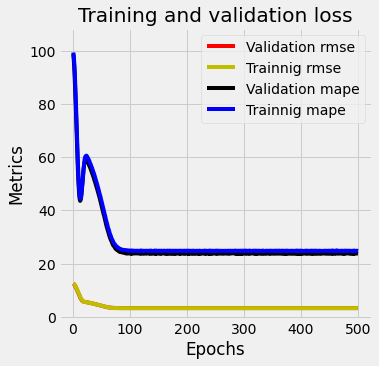

In [26]:
plotme(model6_1_4)

In [124]:
# inputs: distance + 1st dist + 2nd dist + 3rd dist
model6_1_3 = nnmodel_(50, num_hlayers=1,Epoch=500)
model6_1_3

Epoch 1/500
416/416 [==============================] - 0s 829us/step - loss: 548179.2500 - mape: 98.2528 - rmse: 740.3913 - val_loss: 535223.7500 - val_mape: 95.1505 - val_rmse: 731.5899
Epoch 2/500
416/416 [==============================] - 0s 775us/step - loss: 493055.3125 - mape: 88.8508 - rmse: 702.1790 - val_loss: 455558.4688 - val_mape: 81.3529 - val_rmse: 674.9507
Epoch 3/500
416/416 [==============================] - 0s 716us/step - loss: 399265.3125 - mape: 71.6289 - rmse: 631.8745 - val_loss: 352451.5938 - val_mape: 62.5234 - val_rmse: 593.6763
Epoch 4/500
416/416 [==============================] - 0s 734us/step - loss: 298268.1250 - mape: 54.4896 - rmse: 546.1393 - val_loss: 255736.7812 - val_mape: 48.3908 - val_rmse: 505.7043
Epoch 5/500
416/416 [==============================] - 0s 721us/step - loss: 213628.8438 - mape: 45.4137 - rmse: 462.2000 - val_loss: 183351.0625 - val_mape: 43.5958 - val_rmse: 428.1951
Epoch 6/500
416/416 [==============================] - 0s 723us/s

Epoch 45/500
416/416 [==============================] - 0s 717us/step - loss: 36829.4570 - mape: 24.6092 - rmse: 191.9100 - val_loss: 37334.5469 - val_mape: 23.7785 - val_rmse: 193.2215
Epoch 46/500
416/416 [==============================] - 0s 712us/step - loss: 36827.0312 - mape: 24.7866 - rmse: 191.9037 - val_loss: 37341.0586 - val_mape: 23.6862 - val_rmse: 193.2383
Epoch 47/500
416/416 [==============================] - 0s 723us/step - loss: 36818.0156 - mape: 24.7068 - rmse: 191.8802 - val_loss: 37328.3906 - val_mape: 23.7437 - val_rmse: 193.2056
Epoch 48/500
416/416 [==============================] - 0s 715us/step - loss: 36818.0195 - mape: 24.7279 - rmse: 191.8802 - val_loss: 37318.2578 - val_mape: 23.8168 - val_rmse: 193.1793
Epoch 49/500
416/416 [==============================] - 0s 736us/step - loss: 36816.7148 - mape: 24.6655 - rmse: 191.8768 - val_loss: 37321.0117 - val_mape: 23.7589 - val_rmse: 193.1865
Epoch 50/500
416/416 [==============================] - 0s 701us/step 

416/416 [==============================] - 0s 706us/step - loss: 36754.1641 - mape: 24.6022 - rmse: 191.7138 - val_loss: 37300.6211 - val_mape: 23.4055 - val_rmse: 193.1337
Epoch 90/500
416/416 [==============================] - 0s 686us/step - loss: 36746.1289 - mape: 24.5267 - rmse: 191.6928 - val_loss: 37286.4805 - val_mape: 23.4729 - val_rmse: 193.0971
Epoch 91/500
416/416 [==============================] - 0s 719us/step - loss: 36747.3633 - mape: 24.5347 - rmse: 191.6960 - val_loss: 37265.3945 - val_mape: 23.6463 - val_rmse: 193.0425
Epoch 92/500
416/416 [==============================] - 0s 705us/step - loss: 36748.4531 - mape: 24.5748 - rmse: 191.6989 - val_loss: 37269.9258 - val_mape: 23.5471 - val_rmse: 193.0542
Epoch 93/500
416/416 [==============================] - 0s 731us/step - loss: 36736.4336 - mape: 24.5660 - rmse: 191.6675 - val_loss: 37321.7617 - val_mape: 23.2009 - val_rmse: 193.1884
Epoch 94/500
416/416 [==============================] - 0s 718us/step - loss: 36735

Epoch 133/500
416/416 [==============================] - 0s 753us/step - loss: 36626.0586 - mape: 24.3462 - rmse: 191.3794 - val_loss: 37112.1211 - val_mape: 23.0615 - val_rmse: 192.6451
Epoch 134/500
416/416 [==============================] - 0s 710us/step - loss: 36624.3984 - mape: 24.2168 - rmse: 191.3750 - val_loss: 37060.8789 - val_mape: 23.5029 - val_rmse: 192.5120
Epoch 135/500
416/416 [==============================] - 0s 697us/step - loss: 36632.5977 - mape: 24.3543 - rmse: 191.3964 - val_loss: 37059.3164 - val_mape: 23.4447 - val_rmse: 192.5080
Epoch 136/500
416/416 [==============================] - 0s 733us/step - loss: 36622.8711 - mape: 24.3789 - rmse: 191.3710 - val_loss: 37112.1328 - val_mape: 22.9715 - val_rmse: 192.6451
Epoch 137/500
416/416 [==============================] - 0s 733us/step - loss: 36624.7617 - mape: 24.2074 - rmse: 191.3760 - val_loss: 37066.1445 - val_mape: 23.2473 - val_rmse: 192.5257
Epoch 138/500
416/416 [==============================] - 0s 727us

Epoch 177/500
416/416 [==============================] - 0s 712us/step - loss: 36552.6328 - mape: 24.1396 - rmse: 191.1874 - val_loss: 36993.0586 - val_mape: 22.8469 - val_rmse: 192.3358
Epoch 178/500
416/416 [==============================] - 0s 737us/step - loss: 36556.1016 - mape: 24.0458 - rmse: 191.1965 - val_loss: 36940.8867 - val_mape: 23.2896 - val_rmse: 192.2001
Epoch 179/500
416/416 [==============================] - 0s 705us/step - loss: 36565.5117 - mape: 24.2063 - rmse: 191.2211 - val_loss: 36950.1602 - val_mape: 23.0986 - val_rmse: 192.2242
Epoch 180/500
416/416 [==============================] - 0s 755us/step - loss: 36560.2383 - mape: 24.1328 - rmse: 191.2073 - val_loss: 36969.5742 - val_mape: 22.9383 - val_rmse: 192.2747
Epoch 181/500
416/416 [==============================] - 0s 704us/step - loss: 36551.0547 - mape: 24.1233 - rmse: 191.1833 - val_loss: 36957.6094 - val_mape: 23.0111 - val_rmse: 192.2436
Epoch 182/500
416/416 [==============================] - 0s 702us

Epoch 221/500
416/416 [==============================] - 0s 693us/step - loss: 36542.8438 - mape: 24.1641 - rmse: 191.1618 - val_loss: 36935.5586 - val_mape: 22.9711 - val_rmse: 192.1863
Epoch 222/500
416/416 [==============================] - 0s 712us/step - loss: 36535.4570 - mape: 24.0987 - rmse: 191.1425 - val_loss: 36943.1641 - val_mape: 22.9275 - val_rmse: 192.2060
Epoch 223/500
416/416 [==============================] - 0s 710us/step - loss: 36537.5391 - mape: 24.0732 - rmse: 191.1479 - val_loss: 36914.2344 - val_mape: 23.1968 - val_rmse: 192.1308
Epoch 224/500
416/416 [==============================] - 0s 689us/step - loss: 36525.4414 - mape: 24.1860 - rmse: 191.1163 - val_loss: 37018.9688 - val_mape: 22.5632 - val_rmse: 192.4031
Epoch 225/500
416/416 [==============================] - 0s 728us/step - loss: 36535.9531 - mape: 23.9907 - rmse: 191.1438 - val_loss: 36944.4648 - val_mape: 22.9054 - val_rmse: 192.2094
Epoch 226/500
416/416 [==============================] - 0s 739us

Epoch 265/500
416/416 [==============================] - 0s 760us/step - loss: 36526.4062 - mape: 24.0698 - rmse: 191.1188 - val_loss: 36916.5430 - val_mape: 22.9548 - val_rmse: 192.1368
Epoch 266/500
416/416 [==============================] - 0s 733us/step - loss: 36523.9609 - mape: 24.0697 - rmse: 191.1124 - val_loss: 36921.3516 - val_mape: 22.9301 - val_rmse: 192.1493
Epoch 267/500
416/416 [==============================] - 0s 733us/step - loss: 36519.6094 - mape: 24.0317 - rmse: 191.1010 - val_loss: 36944.8555 - val_mape: 22.7846 - val_rmse: 192.2104
Epoch 268/500
416/416 [==============================] - 0s 765us/step - loss: 36518.4219 - mape: 24.0276 - rmse: 191.0979 - val_loss: 36917.5820 - val_mape: 22.9638 - val_rmse: 192.1395
Epoch 269/500
416/416 [==============================] - 0s 730us/step - loss: 36518.3320 - mape: 24.0192 - rmse: 191.0977 - val_loss: 36899.6992 - val_mape: 23.1552 - val_rmse: 192.0929
Epoch 270/500
416/416 [==============================] - 0s 721us

Epoch 309/500
416/416 [==============================] - 0s 733us/step - loss: 36505.7344 - mape: 24.0548 - rmse: 191.0647 - val_loss: 36887.6172 - val_mape: 23.1156 - val_rmse: 192.0615
Epoch 310/500
416/416 [==============================] - 0s 733us/step - loss: 36508.7070 - mape: 24.0662 - rmse: 191.0725 - val_loss: 36916.5000 - val_mape: 22.8265 - val_rmse: 192.1367
Epoch 311/500
416/416 [==============================] - 0s 733us/step - loss: 36507.3203 - mape: 24.0046 - rmse: 191.0689 - val_loss: 36890.4844 - val_mape: 23.0429 - val_rmse: 192.0690
Epoch 312/500
416/416 [==============================] - 0s 710us/step - loss: 36495.0938 - mape: 24.0536 - rmse: 191.0369 - val_loss: 36955.8633 - val_mape: 22.6320 - val_rmse: 192.2391
Epoch 313/500
416/416 [==============================] - 0s 739us/step - loss: 36511.0820 - mape: 23.9821 - rmse: 191.0787 - val_loss: 36908.0898 - val_mape: 22.9048 - val_rmse: 192.1148
Epoch 314/500
416/416 [==============================] - 0s 762us

Epoch 353/500
416/416 [==============================] - 0s 777us/step - loss: 36502.8594 - mape: 24.0547 - rmse: 191.0572 - val_loss: 36878.2422 - val_mape: 23.0718 - val_rmse: 192.0371
Epoch 354/500
416/416 [==============================] - 0s 749us/step - loss: 36499.0742 - mape: 24.0221 - rmse: 191.0473 - val_loss: 36903.1953 - val_mape: 22.8589 - val_rmse: 192.1021
Epoch 355/500
416/416 [==============================] - 0s 788us/step - loss: 36497.5234 - mape: 23.9820 - rmse: 191.0432 - val_loss: 36891.6875 - val_mape: 22.9544 - val_rmse: 192.0721
Epoch 356/500
416/416 [==============================] - 0s 720us/step - loss: 36502.6562 - mape: 24.0170 - rmse: 191.0567 - val_loss: 36883.8633 - val_mape: 23.0340 - val_rmse: 192.0517
Epoch 357/500
416/416 [==============================] - 0s 695us/step - loss: 36494.4805 - mape: 23.9689 - rmse: 191.0353 - val_loss: 36874.3477 - val_mape: 23.1801 - val_rmse: 192.0269
Epoch 358/500
416/416 [==============================] - 0s 753us

Epoch 397/500
416/416 [==============================] - 0s 719us/step - loss: 36484.2109 - mape: 23.8783 - rmse: 191.0084 - val_loss: 36867.0273 - val_mape: 23.2581 - val_rmse: 192.0079
Epoch 398/500
416/416 [==============================] - 0s 713us/step - loss: 36498.2266 - mape: 24.0679 - rmse: 191.0451 - val_loss: 36866.4414 - val_mape: 23.2556 - val_rmse: 192.0064
Epoch 399/500
416/416 [==============================] - 0s 754us/step - loss: 36487.0742 - mape: 24.1079 - rmse: 191.0159 - val_loss: 36949.9688 - val_mape: 22.5556 - val_rmse: 192.2237
Epoch 400/500
416/416 [==============================] - 0s 767us/step - loss: 36486.9883 - mape: 23.8467 - rmse: 191.0157 - val_loss: 36867.1758 - val_mape: 23.3382 - val_rmse: 192.0083
Epoch 401/500
416/416 [==============================] - 0s 760us/step - loss: 36492.5859 - mape: 24.1020 - rmse: 191.0303 - val_loss: 36892.5508 - val_mape: 22.8433 - val_rmse: 192.0743
Epoch 402/500
416/416 [==============================] - 0s 759us

Epoch 441/500
416/416 [==============================] - 0s 736us/step - loss: 36486.2031 - mape: 23.9679 - rmse: 191.0136 - val_loss: 36895.1953 - val_mape: 22.8174 - val_rmse: 192.0812
Epoch 442/500
416/416 [==============================] - 0s 760us/step - loss: 36489.9492 - mape: 23.9437 - rmse: 191.0234 - val_loss: 36877.5508 - val_mape: 22.9736 - val_rmse: 192.0353
Epoch 443/500
416/416 [==============================] - 0s 777us/step - loss: 36488.3867 - mape: 24.0159 - rmse: 191.0193 - val_loss: 36903.9570 - val_mape: 22.7760 - val_rmse: 192.1040
Epoch 444/500
416/416 [==============================] - 0s 714us/step - loss: 36484.2969 - mape: 24.0374 - rmse: 191.0086 - val_loss: 36954.2344 - val_mape: 22.5363 - val_rmse: 192.2348
Epoch 445/500
416/416 [==============================] - 0s 714us/step - loss: 36492.9180 - mape: 23.9337 - rmse: 191.0312 - val_loss: 36886.9141 - val_mape: 22.8687 - val_rmse: 192.0597
Epoch 446/500
416/416 [==============================] - 0s 707us

Epoch 485/500
416/416 [==============================] - 0s 769us/step - loss: 36474.9531 - mape: 23.9404 - rmse: 190.9842 - val_loss: 36871.7461 - val_mape: 23.0663 - val_rmse: 192.0202
Epoch 486/500
416/416 [==============================] - 0s 740us/step - loss: 36478.6172 - mape: 23.9780 - rmse: 190.9938 - val_loss: 36875.7891 - val_mape: 22.9798 - val_rmse: 192.0307
Epoch 487/500
416/416 [==============================] - 0s 715us/step - loss: 36480.2734 - mape: 24.0060 - rmse: 190.9981 - val_loss: 36897.3281 - val_mape: 22.7952 - val_rmse: 192.0868
Epoch 488/500
416/416 [==============================] - 0s 702us/step - loss: 36477.9805 - mape: 23.9303 - rmse: 190.9921 - val_loss: 36873.6250 - val_mape: 23.0381 - val_rmse: 192.0251
Epoch 489/500
416/416 [==============================] - 0s 723us/step - loss: 36462.2109 - mape: 23.9183 - rmse: 190.9508 - val_loss: 36873.6836 - val_mape: 23.4906 - val_rmse: 192.0252
Epoch 490/500
416/416 [==============================] - 0s 726us

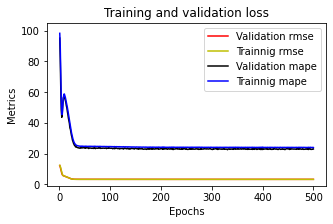

In [125]:
plotme(model6_1_3)

In [126]:
# inputs: distance + 1st dist + 2nd dist + 3rd dist
model6_1_5 = nnmodel_(100, num_hlayers=1,Epoch=500)
model6_1_5

Epoch 1/500
416/416 [==============================] - 1s 866us/step - loss: 539276.6875 - mape: 96.6970 - rmse: 734.3546 - val_loss: 508230.0625 - val_mape: 90.5935 - val_rmse: 712.9026
Epoch 2/500
416/416 [==============================] - 0s 753us/step - loss: 438072.5625 - mape: 78.6675 - rmse: 661.8705 - val_loss: 371866.1562 - val_mape: 65.8817 - val_rmse: 609.8083
Epoch 3/500
416/416 [==============================] - 0s 752us/step - loss: 296185.3750 - mape: 54.3518 - rmse: 544.2292 - val_loss: 235356.4062 - val_mape: 46.1938 - val_rmse: 485.1354
Epoch 4/500
416/416 [==============================] - 0s 733us/step - loss: 185157.7031 - mape: 44.9790 - rmse: 430.2996 - val_loss: 151527.0469 - val_mape: 45.3390 - val_rmse: 389.2647
Epoch 5/500
416/416 [==============================] - 0s 756us/step - loss: 130390.9062 - mape: 50.2879 - rmse: 361.0968 - val_loss: 119782.9609 - val_mape: 52.9034 - val_rmse: 346.0967
Epoch 6/500
416/416 [==============================] - 0s 738us/s

416/416 [==============================] - 0s 758us/step - loss: 36769.1836 - mape: 24.6001 - rmse: 191.7529 - val_loss: 37244.7070 - val_mape: 24.0740 - val_rmse: 192.9889
Epoch 46/500
416/416 [==============================] - 0s 737us/step - loss: 36776.2109 - mape: 24.6919 - rmse: 191.7712 - val_loss: 37287.8398 - val_mape: 23.4441 - val_rmse: 193.1006
Epoch 47/500
416/416 [==============================] - 0s 724us/step - loss: 36783.1055 - mape: 24.5972 - rmse: 191.7892 - val_loss: 37286.1289 - val_mape: 23.4595 - val_rmse: 193.0962
Epoch 48/500
416/416 [==============================] - 0s 700us/step - loss: 36769.2969 - mape: 24.5729 - rmse: 191.7532 - val_loss: 37242.8281 - val_mape: 23.9695 - val_rmse: 192.9840
Epoch 49/500
416/416 [==============================] - 0s 719us/step - loss: 36775.2891 - mape: 24.6745 - rmse: 191.7688 - val_loss: 37282.3008 - val_mape: 23.4504 - val_rmse: 193.0863
Epoch 50/500
416/416 [==============================] - 0s 738us/step - loss: 36766

Epoch 133/500
416/416 [==============================] - 0s 740us/step - loss: 36617.3242 - mape: 24.2955 - rmse: 191.3565 - val_loss: 37056.7344 - val_mape: 23.3739 - val_rmse: 192.5013
Epoch 134/500
416/416 [==============================] - 0s 729us/step - loss: 36614.1445 - mape: 24.3188 - rmse: 191.3482 - val_loss: 37082.3281 - val_mape: 23.1297 - val_rmse: 192.5677
Epoch 135/500
416/416 [==============================] - 0s 742us/step - loss: 36610.7383 - mape: 24.2699 - rmse: 191.3393 - val_loss: 37055.4805 - val_mape: 23.3345 - val_rmse: 192.4980
Epoch 136/500
416/416 [==============================] - 0s 740us/step - loss: 36608.7656 - mape: 24.3331 - rmse: 191.3342 - val_loss: 37092.1445 - val_mape: 23.0236 - val_rmse: 192.5932
Epoch 137/500
416/416 [==============================] - 0s 753us/step - loss: 36601.6133 - mape: 24.1915 - rmse: 191.3155 - val_loss: 37043.1602 - val_mape: 23.7239 - val_rmse: 192.4660
Epoch 138/500
416/416 [==============================] - 0s 752us

Epoch 177/500
416/416 [==============================] - 0s 745us/step - loss: 36573.4609 - mape: 24.2942 - rmse: 191.2419 - val_loss: 37033.6680 - val_mape: 23.0664 - val_rmse: 192.4413
Epoch 178/500
416/416 [==============================] - 0s 721us/step - loss: 36567.8438 - mape: 24.1957 - rmse: 191.2272 - val_loss: 37001.5664 - val_mape: 23.4056 - val_rmse: 192.3579
Epoch 179/500
416/416 [==============================] - 0s 743us/step - loss: 36555.3086 - mape: 24.2023 - rmse: 191.1944 - val_loss: 37002.0195 - val_mape: 23.7625 - val_rmse: 192.3591
Epoch 180/500
416/416 [==============================] - 0s 745us/step - loss: 36567.3594 - mape: 24.2208 - rmse: 191.2259 - val_loss: 36999.4727 - val_mape: 23.4007 - val_rmse: 192.3525
Epoch 181/500
416/416 [==============================] - 0s 735us/step - loss: 36572.3594 - mape: 24.2928 - rmse: 191.2390 - val_loss: 37022.5820 - val_mape: 23.1037 - val_rmse: 192.4125
Epoch 182/500
416/416 [==============================] - 0s 750us

Epoch 221/500
416/416 [==============================] - 0s 747us/step - loss: 36543.9844 - mape: 24.1508 - rmse: 191.1648 - val_loss: 36970.9219 - val_mape: 23.2524 - val_rmse: 192.2782
Epoch 222/500
416/416 [==============================] - 0s 744us/step - loss: 36540.4688 - mape: 24.1864 - rmse: 191.1556 - val_loss: 36975.2695 - val_mape: 23.1506 - val_rmse: 192.2896
Epoch 223/500
416/416 [==============================] - 0s 733us/step - loss: 36538.7383 - mape: 24.1608 - rmse: 191.1511 - val_loss: 36979.6445 - val_mape: 23.1162 - val_rmse: 192.3009
Epoch 224/500
416/416 [==============================] - 0s 722us/step - loss: 36541.8867 - mape: 24.1798 - rmse: 191.1593 - val_loss: 36962.0977 - val_mape: 23.2970 - val_rmse: 192.2553
Epoch 225/500
416/416 [==============================] - 0s 747us/step - loss: 36546.8984 - mape: 24.1756 - rmse: 191.1724 - val_loss: 36955.4531 - val_mape: 23.4038 - val_rmse: 192.2380
Epoch 226/500
416/416 [==============================] - 0s 743us

Epoch 265/500
416/416 [==============================] - 0s 737us/step - loss: 36515.0703 - mape: 24.2018 - rmse: 191.0892 - val_loss: 36981.0117 - val_mape: 22.7787 - val_rmse: 192.3045
Epoch 266/500
416/416 [==============================] - 0s 726us/step - loss: 36521.3711 - mape: 24.1199 - rmse: 191.1057 - val_loss: 36937.0273 - val_mape: 23.0354 - val_rmse: 192.1901
Epoch 267/500
416/416 [==============================] - 0s 746us/step - loss: 36503.0742 - mape: 24.1484 - rmse: 191.0578 - val_loss: 36957.4180 - val_mape: 22.9036 - val_rmse: 192.2431
Epoch 268/500
416/416 [==============================] - 0s 745us/step - loss: 36505.3164 - mape: 24.0560 - rmse: 191.0636 - val_loss: 36917.1445 - val_mape: 23.6460 - val_rmse: 192.1384
Epoch 269/500
416/416 [==============================] - 0s 732us/step - loss: 36519.6250 - mape: 24.2102 - rmse: 191.1011 - val_loss: 36924.8516 - val_mape: 23.1048 - val_rmse: 192.1584
Epoch 270/500
416/416 [==============================] - 0s 735us

Epoch 309/500
416/416 [==============================] - 0s 740us/step - loss: 36499.2539 - mape: 24.0339 - rmse: 191.0478 - val_loss: 36906.6055 - val_mape: 22.9675 - val_rmse: 192.1109
Epoch 310/500
416/416 [==============================] - 0s 734us/step - loss: 36485.9609 - mape: 24.0995 - rmse: 191.0130 - val_loss: 36892.4531 - val_mape: 23.1167 - val_rmse: 192.0741
Epoch 311/500
416/416 [==============================] - 0s 748us/step - loss: 36490.5508 - mape: 24.0960 - rmse: 191.0250 - val_loss: 36897.9609 - val_mape: 23.0692 - val_rmse: 192.0884
Epoch 312/500
416/416 [==============================] - 0s 723us/step - loss: 36495.0508 - mape: 24.0652 - rmse: 191.0368 - val_loss: 36885.3086 - val_mape: 23.2475 - val_rmse: 192.0555
Epoch 313/500
416/416 [==============================] - 0s 736us/step - loss: 36485.9453 - mape: 24.1973 - rmse: 191.0129 - val_loss: 36979.5391 - val_mape: 22.5960 - val_rmse: 192.3006
Epoch 314/500
416/416 [==============================] - 0s 735us

Epoch 353/500
416/416 [==============================] - 0s 746us/step - loss: 36476.9414 - mape: 23.9752 - rmse: 190.9894 - val_loss: 36861.4023 - val_mape: 23.2570 - val_rmse: 191.9932
Epoch 354/500
416/416 [==============================] - 0s 724us/step - loss: 36474.4766 - mape: 24.0963 - rmse: 190.9829 - val_loss: 36858.0234 - val_mape: 23.2363 - val_rmse: 191.9844
Epoch 355/500
416/416 [==============================] - 0s 735us/step - loss: 36474.8789 - mape: 24.0592 - rmse: 190.9840 - val_loss: 36910.1797 - val_mape: 22.7840 - val_rmse: 192.1202
Epoch 356/500
416/416 [==============================] - 0s 739us/step - loss: 36469.9375 - mape: 24.0589 - rmse: 190.9710 - val_loss: 36924.0742 - val_mape: 22.7292 - val_rmse: 192.1564
Epoch 357/500
416/416 [==============================] - 0s 733us/step - loss: 36484.5352 - mape: 24.0720 - rmse: 191.0092 - val_loss: 36866.0547 - val_mape: 23.1210 - val_rmse: 192.0054
Epoch 358/500
416/416 [==============================] - 0s 743us

Epoch 397/500
416/416 [==============================] - 0s 742us/step - loss: 36470.8789 - mape: 23.9669 - rmse: 190.9735 - val_loss: 36860.9688 - val_mape: 22.9797 - val_rmse: 191.9921
Epoch 398/500
416/416 [==============================] - 0s 739us/step - loss: 36469.5859 - mape: 24.0378 - rmse: 190.9701 - val_loss: 36882.4219 - val_mape: 22.8320 - val_rmse: 192.0480
Epoch 399/500
416/416 [==============================] - 0s 743us/step - loss: 36463.8164 - mape: 24.0453 - rmse: 190.9550 - val_loss: 36856.2734 - val_mape: 23.0016 - val_rmse: 191.9799
Epoch 400/500
416/416 [==============================] - 0s 737us/step - loss: 36473.7617 - mape: 24.0420 - rmse: 190.9810 - val_loss: 36864.7266 - val_mape: 22.9168 - val_rmse: 192.0019
Epoch 401/500
416/416 [==============================] - 0s 745us/step - loss: 36465.0508 - mape: 23.9955 - rmse: 190.9582 - val_loss: 36862.3203 - val_mape: 22.9515 - val_rmse: 191.9956
Epoch 402/500
416/416 [==============================] - 0s 740us

Epoch 441/500
416/416 [==============================] - 0s 731us/step - loss: 36457.9180 - mape: 24.0439 - rmse: 190.9396 - val_loss: 36912.8398 - val_mape: 22.6048 - val_rmse: 192.1272
Epoch 442/500
416/416 [==============================] - 0s 726us/step - loss: 36458.8555 - mape: 23.9080 - rmse: 190.9420 - val_loss: 36835.3672 - val_mape: 23.3444 - val_rmse: 191.9254
Epoch 443/500
416/416 [==============================] - 0s 752us/step - loss: 36458.7266 - mape: 23.9997 - rmse: 190.9417 - val_loss: 36836.8711 - val_mape: 23.4368 - val_rmse: 191.9293
Epoch 444/500
416/416 [==============================] - 0s 741us/step - loss: 36463.9492 - mape: 24.1214 - rmse: 190.9554 - val_loss: 36846.6367 - val_mape: 22.9769 - val_rmse: 191.9548
Epoch 445/500
416/416 [==============================] - 0s 749us/step - loss: 36462.0938 - mape: 23.9981 - rmse: 190.9505 - val_loss: 36839.5117 - val_mape: 23.0869 - val_rmse: 191.9362
Epoch 446/500
416/416 [==============================] - 0s 762us

Epoch 485/500
416/416 [==============================] - 0s 744us/step - loss: 36459.2617 - mape: 24.0216 - rmse: 190.9431 - val_loss: 36847.5391 - val_mape: 22.8884 - val_rmse: 191.9571
Epoch 486/500
416/416 [==============================] - 0s 754us/step - loss: 36448.6992 - mape: 23.9711 - rmse: 190.9154 - val_loss: 36826.1016 - val_mape: 23.1908 - val_rmse: 191.9013
Epoch 487/500
416/416 [==============================] - 0s 739us/step - loss: 36453.0703 - mape: 24.0639 - rmse: 190.9269 - val_loss: 36860.6094 - val_mape: 22.7878 - val_rmse: 191.9912
Epoch 488/500
416/416 [==============================] - 0s 757us/step - loss: 36449.8398 - mape: 23.9805 - rmse: 190.9184 - val_loss: 36848.4570 - val_mape: 22.8788 - val_rmse: 191.9595
Epoch 489/500
416/416 [==============================] - 0s 733us/step - loss: 36462.3555 - mape: 23.9390 - rmse: 190.9512 - val_loss: 36828.7617 - val_mape: 23.3640 - val_rmse: 191.9082
Epoch 490/500
416/416 [==============================] - 0s 753us

In [127]:
# inputs: distance + 1st dist + 2nd dist + 3rd dist
model6_1_1 = nnmodel_(100,50, num_hlayers=2,Epoch=500)
model6_1_1

Epoch 1/500
416/416 [==============================] - 1s 1ms/step - loss: 338131.2188 - mape: 72.1629 - rmse: 581.4905 - val_loss: 112811.4453 - val_mape: 60.4610 - val_rmse: 335.8741
Epoch 2/500
416/416 [==============================] - 0s 831us/step - loss: 99749.5625 - mape: 59.3618 - rmse: 315.8315 - val_loss: 87660.1953 - val_mape: 53.8044 - val_rmse: 296.0746
Epoch 3/500
416/416 [==============================] - 0s 816us/step - loss: 72062.2031 - mape: 49.6820 - rmse: 268.4440 - val_loss: 58442.4414 - val_mape: 40.7063 - val_rmse: 241.7487
Epoch 4/500
416/416 [==============================] - 0s 797us/step - loss: 46728.8867 - mape: 35.7859 - rmse: 216.1687 - val_loss: 40298.6797 - val_mape: 29.0011 - val_rmse: 200.7453
Epoch 5/500
416/416 [==============================] - 0s 793us/step - loss: 37852.0977 - mape: 27.2089 - rmse: 194.5562 - val_loss: 37775.2852 - val_mape: 24.5775 - val_rmse: 194.3587
Epoch 6/500
416/416 [==============================] - 0s 799us/step - loss

416/416 [==============================] - 0s 793us/step - loss: 36617.6094 - mape: 24.1070 - rmse: 191.3573 - val_loss: 37080.9570 - val_mape: 22.6302 - val_rmse: 192.5642
Epoch 90/500
416/416 [==============================] - 0s 795us/step - loss: 36652.8477 - mape: 24.0934 - rmse: 191.4493 - val_loss: 37036.6250 - val_mape: 23.1906 - val_rmse: 192.4490
Epoch 91/500
416/416 [==============================] - 0s 798us/step - loss: 36673.4414 - mape: 24.1633 - rmse: 191.5031 - val_loss: 37085.6484 - val_mape: 22.7976 - val_rmse: 192.5763
Epoch 92/500
416/416 [==============================] - 0s 796us/step - loss: 36606.9531 - mape: 24.1147 - rmse: 191.3294 - val_loss: 37002.5391 - val_mape: 23.2744 - val_rmse: 192.3604
Epoch 93/500
416/416 [==============================] - 0s 796us/step - loss: 36605.8359 - mape: 24.0447 - rmse: 191.3265 - val_loss: 37088.1523 - val_mape: 23.2242 - val_rmse: 192.5828
Epoch 94/500
416/416 [==============================] - 0s 808us/step - loss: 36599

Epoch 133/500
416/416 [==============================] - 0s 830us/step - loss: 36604.4297 - mape: 24.0408 - rmse: 191.3228 - val_loss: 36932.5625 - val_mape: 22.9564 - val_rmse: 192.1785
Epoch 134/500
416/416 [==============================] - 0s 775us/step - loss: 36561.1055 - mape: 23.9795 - rmse: 191.2096 - val_loss: 36945.7148 - val_mape: 23.4806 - val_rmse: 192.2127
Epoch 135/500
416/416 [==============================] - 0s 813us/step - loss: 36586.4609 - mape: 23.9714 - rmse: 191.2759 - val_loss: 36966.6172 - val_mape: 23.6984 - val_rmse: 192.2670
Epoch 136/500
416/416 [==============================] - 0s 822us/step - loss: 36608.3477 - mape: 23.9950 - rmse: 191.3331 - val_loss: 37101.6250 - val_mape: 24.4083 - val_rmse: 192.6178
Epoch 137/500
416/416 [==============================] - 0s 817us/step - loss: 36583.9414 - mape: 24.0493 - rmse: 191.2693 - val_loss: 37104.9922 - val_mape: 22.4499 - val_rmse: 192.6266
Epoch 138/500
416/416 [==============================] - 0s 794us

Epoch 177/500
416/416 [==============================] - 0s 790us/step - loss: 36591.7148 - mape: 23.9703 - rmse: 191.2896 - val_loss: 37002.9297 - val_mape: 24.1697 - val_rmse: 192.3615
Epoch 178/500
416/416 [==============================] - 0s 795us/step - loss: 36589.6562 - mape: 24.0798 - rmse: 191.2842 - val_loss: 37018.7617 - val_mape: 22.4495 - val_rmse: 192.4026
Epoch 179/500
416/416 [==============================] - 0s 829us/step - loss: 36563.0820 - mape: 24.0181 - rmse: 191.2148 - val_loss: 36931.3867 - val_mape: 22.8132 - val_rmse: 192.1754
Epoch 180/500
416/416 [==============================] - 0s 821us/step - loss: 36595.2852 - mape: 24.0918 - rmse: 191.2989 - val_loss: 37029.5508 - val_mape: 22.3820 - val_rmse: 192.4306
Epoch 181/500
416/416 [==============================] - 0s 804us/step - loss: 36561.1914 - mape: 23.9646 - rmse: 191.2098 - val_loss: 36898.7969 - val_mape: 23.1200 - val_rmse: 192.0906
Epoch 182/500
416/416 [==============================] - 0s 839us

Epoch 221/500
416/416 [==============================] - 0s 798us/step - loss: 36596.9766 - mape: 23.9765 - rmse: 191.3034 - val_loss: 36906.9297 - val_mape: 23.4708 - val_rmse: 192.1118
Epoch 222/500
416/416 [==============================] - 0s 772us/step - loss: 36565.8711 - mape: 23.9753 - rmse: 191.2220 - val_loss: 37021.2305 - val_mape: 22.3831 - val_rmse: 192.4090
Epoch 223/500
416/416 [==============================] - 0s 772us/step - loss: 36523.1602 - mape: 23.9937 - rmse: 191.1103 - val_loss: 36903.6992 - val_mape: 23.4077 - val_rmse: 192.1034
Epoch 224/500
416/416 [==============================] - 0s 809us/step - loss: 36566.5078 - mape: 24.0452 - rmse: 191.2237 - val_loss: 36981.9141 - val_mape: 22.7920 - val_rmse: 192.3068
Epoch 225/500
416/416 [==============================] - 0s 772us/step - loss: 36557.2500 - mape: 24.0493 - rmse: 191.1995 - val_loss: 36891.5508 - val_mape: 23.3600 - val_rmse: 192.0717
Epoch 226/500
416/416 [==============================] - 0s 795us

Epoch 265/500
416/416 [==============================] - 0s 804us/step - loss: 36576.9297 - mape: 24.0459 - rmse: 191.2510 - val_loss: 36949.7070 - val_mape: 22.9461 - val_rmse: 192.2231
Epoch 266/500
416/416 [==============================] - 0s 769us/step - loss: 36562.8125 - mape: 24.0863 - rmse: 191.2141 - val_loss: 36925.8594 - val_mape: 22.6202 - val_rmse: 192.1610
Epoch 267/500
416/416 [==============================] - 0s 791us/step - loss: 36538.7930 - mape: 24.0193 - rmse: 191.1512 - val_loss: 36915.6055 - val_mape: 22.8275 - val_rmse: 192.1343
Epoch 268/500
416/416 [==============================] - 0s 793us/step - loss: 36585.3438 - mape: 24.1093 - rmse: 191.2729 - val_loss: 36882.8242 - val_mape: 23.2354 - val_rmse: 192.0490
Epoch 269/500
416/416 [==============================] - 0s 808us/step - loss: 36598.5273 - mape: 23.9878 - rmse: 191.3074 - val_loss: 36924.5781 - val_mape: 23.7259 - val_rmse: 192.1577
Epoch 270/500
416/416 [==============================] - 0s 748us

Epoch 309/500
416/416 [==============================] - 0s 797us/step - loss: 36533.3320 - mape: 24.0348 - rmse: 191.1369 - val_loss: 37252.8398 - val_mape: 22.1734 - val_rmse: 193.0099
Epoch 310/500
416/416 [==============================] - 0s 793us/step - loss: 36537.4297 - mape: 24.0366 - rmse: 191.1477 - val_loss: 36869.5312 - val_mape: 23.2769 - val_rmse: 192.0144
Epoch 311/500
416/416 [==============================] - 0s 776us/step - loss: 36577.5938 - mape: 24.0711 - rmse: 191.2527 - val_loss: 36864.6289 - val_mape: 23.2220 - val_rmse: 192.0016
Epoch 312/500
416/416 [==============================] - 0s 772us/step - loss: 36548.8555 - mape: 23.9744 - rmse: 191.1776 - val_loss: 36955.5742 - val_mape: 23.0483 - val_rmse: 192.2383
Epoch 313/500
416/416 [==============================] - 0s 762us/step - loss: 36542.3711 - mape: 24.1262 - rmse: 191.1606 - val_loss: 36907.3633 - val_mape: 23.6699 - val_rmse: 192.1129
Epoch 314/500
416/416 [==============================] - 0s 818us

Epoch 353/500
416/416 [==============================] - 0s 786us/step - loss: 36552.9297 - mape: 24.0193 - rmse: 191.1882 - val_loss: 37103.0898 - val_mape: 22.3712 - val_rmse: 192.6216
Epoch 354/500
416/416 [==============================] - 0s 796us/step - loss: 36543.1328 - mape: 24.0876 - rmse: 191.1626 - val_loss: 36908.6445 - val_mape: 23.8550 - val_rmse: 192.1162
Epoch 355/500
416/416 [==============================] - 0s 793us/step - loss: 36568.8281 - mape: 24.0916 - rmse: 191.2298 - val_loss: 36850.8516 - val_mape: 23.0434 - val_rmse: 191.9658
Epoch 356/500
416/416 [==============================] - 0s 798us/step - loss: 36538.3086 - mape: 23.9212 - rmse: 191.1500 - val_loss: 37199.9922 - val_mape: 22.4632 - val_rmse: 192.8730
Epoch 357/500
416/416 [==============================] - 0s 789us/step - loss: 36551.7734 - mape: 24.1439 - rmse: 191.1852 - val_loss: 36876.2734 - val_mape: 23.4687 - val_rmse: 192.0320
Epoch 358/500
416/416 [==============================] - 0s 820us

Epoch 397/500
416/416 [==============================] - 0s 908us/step - loss: 36515.9023 - mape: 23.9447 - rmse: 191.0913 - val_loss: 37168.8359 - val_mape: 24.9442 - val_rmse: 192.7922
Epoch 398/500
416/416 [==============================] - 0s 828us/step - loss: 36524.9180 - mape: 24.1458 - rmse: 191.1149 - val_loss: 36884.8594 - val_mape: 22.6678 - val_rmse: 192.0543
Epoch 399/500
416/416 [==============================] - 0s 813us/step - loss: 36512.2188 - mape: 24.0250 - rmse: 191.0817 - val_loss: 37365.0039 - val_mape: 21.8645 - val_rmse: 193.3003
Epoch 400/500
416/416 [==============================] - 0s 894us/step - loss: 36553.3359 - mape: 24.0455 - rmse: 191.1893 - val_loss: 37031.2422 - val_mape: 22.4769 - val_rmse: 192.4350
Epoch 401/500
416/416 [==============================] - 0s 888us/step - loss: 36553.7773 - mape: 24.0575 - rmse: 191.1904 - val_loss: 36882.0547 - val_mape: 23.0762 - val_rmse: 192.0470
Epoch 402/500
416/416 [==============================] - 0s 927us

Epoch 441/500
416/416 [==============================] - 0s 793us/step - loss: 36520.0664 - mape: 24.0418 - rmse: 191.1022 - val_loss: 37072.4609 - val_mape: 24.7064 - val_rmse: 192.5421
Epoch 442/500
416/416 [==============================] - 0s 796us/step - loss: 36540.1914 - mape: 24.1033 - rmse: 191.1549 - val_loss: 36869.9453 - val_mape: 22.6804 - val_rmse: 192.0155
Epoch 443/500
416/416 [==============================] - 0s 793us/step - loss: 36528.8789 - mape: 24.0523 - rmse: 191.1253 - val_loss: 36834.3633 - val_mape: 23.3663 - val_rmse: 191.9228
Epoch 444/500
416/416 [==============================] - 0s 831us/step - loss: 36548.8555 - mape: 24.0946 - rmse: 191.1776 - val_loss: 36917.0664 - val_mape: 22.4768 - val_rmse: 192.1381
Epoch 445/500
416/416 [==============================] - 0s 842us/step - loss: 36529.6133 - mape: 24.0255 - rmse: 191.1272 - val_loss: 36836.8086 - val_mape: 23.4893 - val_rmse: 191.9292
Epoch 446/500
416/416 [==============================] - 0s 811us

Epoch 485/500
416/416 [==============================] - 0s 798us/step - loss: 36520.6289 - mape: 24.1075 - rmse: 191.1037 - val_loss: 36856.0430 - val_mape: 22.7665 - val_rmse: 191.9793
Epoch 486/500
416/416 [==============================] - 0s 782us/step - loss: 36507.7148 - mape: 24.0253 - rmse: 191.0699 - val_loss: 37253.6094 - val_mape: 22.2214 - val_rmse: 193.0119
Epoch 487/500
416/416 [==============================] - 0s 798us/step - loss: 36546.0859 - mape: 24.0958 - rmse: 191.1703 - val_loss: 37094.9336 - val_mape: 22.1707 - val_rmse: 192.6004
Epoch 488/500
416/416 [==============================] - 0s 795us/step - loss: 36490.4375 - mape: 24.0108 - rmse: 191.0247 - val_loss: 36860.2188 - val_mape: 23.6586 - val_rmse: 191.9902
Epoch 489/500
416/416 [==============================] - 0s 796us/step - loss: 36473.9062 - mape: 24.1561 - rmse: 190.9814 - val_loss: 37035.5938 - val_mape: 22.2822 - val_rmse: 192.4463
Epoch 490/500
416/416 [==============================] - 0s 783us

In [128]:
# plotme(model6_1_1)

In [129]:
# inputs: distance + hour + 1st dist + 2nd dist + 3rd dist
model6_1_2 = nnmodel_(200,100, num_hlayers=2,Epoch=500)
model6_1_2

Epoch 1/500
416/416 [==============================] - 1s 1ms/step - loss: 270775.3125 - mape: 69.3539 - rmse: 520.3608 - val_loss: 98364.5391 - val_mape: 56.8107 - val_rmse: 313.6312
Epoch 2/500
416/416 [==============================] - 0s 843us/step - loss: 76313.8828 - mape: 50.9801 - rmse: 276.2497 - val_loss: 55744.0469 - val_mape: 40.6627 - val_rmse: 236.1018
Epoch 3/500
416/416 [==============================] - 0s 861us/step - loss: 42936.5859 - mape: 32.3542 - rmse: 207.2115 - val_loss: 38194.4648 - val_mape: 26.8374 - val_rmse: 195.4340
Epoch 4/500
416/416 [==============================] - 0s 860us/step - loss: 37169.3320 - mape: 25.4880 - rmse: 192.7935 - val_loss: 37601.0391 - val_mape: 24.3921 - val_rmse: 193.9099
Epoch 5/500
416/416 [==============================] - 0s 850us/step - loss: 37057.6445 - mape: 24.8705 - rmse: 192.5036 - val_loss: 37613.8125 - val_mape: 24.5134 - val_rmse: 193.9428
Epoch 6/500
416/416 [==============================] - 0s 870us/step - loss:

416/416 [==============================] - 0s 864us/step - loss: 36658.1875 - mape: 24.1212 - rmse: 191.4633 - val_loss: 38017.4648 - val_mape: 21.7729 - val_rmse: 194.9807
Epoch 90/500
416/416 [==============================] - 0s 871us/step - loss: 36682.3828 - mape: 24.1821 - rmse: 191.5265 - val_loss: 37039.3711 - val_mape: 23.7942 - val_rmse: 192.4561
Epoch 91/500
416/416 [==============================] - 0s 849us/step - loss: 36626.3633 - mape: 24.2290 - rmse: 191.3802 - val_loss: 37421.9883 - val_mape: 25.0785 - val_rmse: 193.4476
Epoch 92/500
416/416 [==============================] - 0s 887us/step - loss: 36646.1719 - mape: 24.1322 - rmse: 191.4319 - val_loss: 37089.8594 - val_mape: 23.1650 - val_rmse: 192.5873
Epoch 93/500
416/416 [==============================] - 0s 867us/step - loss: 36615.6875 - mape: 24.2115 - rmse: 191.3523 - val_loss: 37025.2969 - val_mape: 23.6064 - val_rmse: 192.4196
Epoch 94/500
416/416 [==============================] - 0s 847us/step - loss: 36664

Epoch 133/500
416/416 [==============================] - 0s 853us/step - loss: 36686.8555 - mape: 24.0940 - rmse: 191.5381 - val_loss: 36963.3438 - val_mape: 23.5782 - val_rmse: 192.2585
Epoch 134/500
416/416 [==============================] - 0s 852us/step - loss: 36602.4492 - mape: 24.0269 - rmse: 191.3177 - val_loss: 37809.5742 - val_mape: 21.6416 - val_rmse: 194.4468
Epoch 135/500
416/416 [==============================] - 0s 856us/step - loss: 36662.9180 - mape: 24.0622 - rmse: 191.4756 - val_loss: 36946.1484 - val_mape: 23.3555 - val_rmse: 192.2138
Epoch 136/500
416/416 [==============================] - 0s 865us/step - loss: 36605.6914 - mape: 24.0946 - rmse: 191.3261 - val_loss: 37057.8008 - val_mape: 22.2828 - val_rmse: 192.5040
Epoch 137/500
416/416 [==============================] - 0s 853us/step - loss: 36629.1250 - mape: 23.8983 - rmse: 191.3874 - val_loss: 36982.1367 - val_mape: 23.0743 - val_rmse: 192.3074
Epoch 138/500
416/416 [==============================] - 0s 884us

Epoch 177/500
416/416 [==============================] - 0s 861us/step - loss: 36641.1406 - mape: 24.1356 - rmse: 191.4188 - val_loss: 37025.2539 - val_mape: 22.3663 - val_rmse: 192.4195
Epoch 178/500
416/416 [==============================] - 0s 862us/step - loss: 36600.7383 - mape: 23.8939 - rmse: 191.3132 - val_loss: 36994.0625 - val_mape: 24.0469 - val_rmse: 192.3384
Epoch 179/500
416/416 [==============================] - 0s 881us/step - loss: 36610.5430 - mape: 23.9993 - rmse: 191.3388 - val_loss: 37166.3281 - val_mape: 22.5351 - val_rmse: 192.7857
Epoch 180/500
416/416 [==============================] - 0s 835us/step - loss: 36594.7969 - mape: 24.1299 - rmse: 191.2977 - val_loss: 36957.4297 - val_mape: 23.2298 - val_rmse: 192.2431
Epoch 181/500
416/416 [==============================] - 0s 866us/step - loss: 36610.8750 - mape: 23.9373 - rmse: 191.3397 - val_loss: 36916.5586 - val_mape: 23.2136 - val_rmse: 192.1368
Epoch 182/500
416/416 [==============================] - 0s 851us

Epoch 221/500
416/416 [==============================] - 0s 907us/step - loss: 36623.4961 - mape: 24.0084 - rmse: 191.3727 - val_loss: 37439.1406 - val_mape: 21.9490 - val_rmse: 193.4920
Epoch 222/500
416/416 [==============================] - 0s 866us/step - loss: 36642.1328 - mape: 24.0145 - rmse: 191.4214 - val_loss: 37026.7070 - val_mape: 22.6885 - val_rmse: 192.4232
Epoch 223/500
416/416 [==============================] - 0s 1ms/step - loss: 36602.7578 - mape: 23.9729 - rmse: 191.3185 - val_loss: 36977.9844 - val_mape: 24.0336 - val_rmse: 192.2966
Epoch 224/500
416/416 [==============================] - 0s 928us/step - loss: 36604.7188 - mape: 24.0697 - rmse: 191.3236 - val_loss: 36950.0547 - val_mape: 22.8233 - val_rmse: 192.2240
Epoch 225/500
416/416 [==============================] - 0s 875us/step - loss: 36595.7656 - mape: 24.1241 - rmse: 191.3002 - val_loss: 36997.9922 - val_mape: 22.4530 - val_rmse: 192.3486
Epoch 226/500
416/416 [==============================] - 0s 925us/s

Epoch 265/500
416/416 [==============================] - 0s 862us/step - loss: 36552.1836 - mape: 24.0568 - rmse: 191.1862 - val_loss: 36904.0586 - val_mape: 23.3616 - val_rmse: 192.1043
Epoch 266/500
416/416 [==============================] - 0s 852us/step - loss: 36601.4258 - mape: 24.0188 - rmse: 191.3150 - val_loss: 36928.5898 - val_mape: 23.5176 - val_rmse: 192.1681
Epoch 267/500
416/416 [==============================] - 0s 856us/step - loss: 36569.4570 - mape: 24.0082 - rmse: 191.2314 - val_loss: 36959.7695 - val_mape: 23.9758 - val_rmse: 192.2492
Epoch 268/500
416/416 [==============================] - 0s 867us/step - loss: 36541.6797 - mape: 24.0700 - rmse: 191.1588 - val_loss: 37153.1406 - val_mape: 22.3455 - val_rmse: 192.7515
Epoch 269/500
416/416 [==============================] - 0s 871us/step - loss: 36600.7227 - mape: 24.0467 - rmse: 191.3132 - val_loss: 36924.6680 - val_mape: 22.8146 - val_rmse: 192.1579
Epoch 270/500
416/416 [==============================] - 0s 870us

Epoch 309/500
416/416 [==============================] - 0s 846us/step - loss: 36557.0625 - mape: 23.9882 - rmse: 191.1990 - val_loss: 36898.8438 - val_mape: 23.1759 - val_rmse: 192.0907
Epoch 310/500
416/416 [==============================] - 0s 852us/step - loss: 36629.3945 - mape: 24.0142 - rmse: 191.3881 - val_loss: 37078.5820 - val_mape: 22.4106 - val_rmse: 192.5580
Epoch 311/500
416/416 [==============================] - 0s 845us/step - loss: 36619.1289 - mape: 24.0262 - rmse: 191.3613 - val_loss: 37215.7266 - val_mape: 22.1706 - val_rmse: 192.9138
Epoch 312/500
416/416 [==============================] - 0s 854us/step - loss: 36652.8945 - mape: 24.0610 - rmse: 191.4495 - val_loss: 36952.6719 - val_mape: 22.5919 - val_rmse: 192.2308
Epoch 313/500
416/416 [==============================] - 0s 849us/step - loss: 36614.6211 - mape: 24.0386 - rmse: 191.3495 - val_loss: 37247.7891 - val_mape: 22.0231 - val_rmse: 192.9969
Epoch 314/500
416/416 [==============================] - 0s 844us

Epoch 353/500
416/416 [==============================] - 0s 858us/step - loss: 36618.5586 - mape: 24.0744 - rmse: 191.3598 - val_loss: 36890.5977 - val_mape: 23.3928 - val_rmse: 192.0693
Epoch 354/500
416/416 [==============================] - 0s 864us/step - loss: 36573.4961 - mape: 24.0411 - rmse: 191.2420 - val_loss: 36956.3984 - val_mape: 23.8060 - val_rmse: 192.2405
Epoch 355/500
416/416 [==============================] - 0s 853us/step - loss: 36576.0625 - mape: 23.9362 - rmse: 191.2487 - val_loss: 37000.4219 - val_mape: 22.7803 - val_rmse: 192.3549
Epoch 356/500
416/416 [==============================] - 0s 879us/step - loss: 36613.0039 - mape: 24.0264 - rmse: 191.3452 - val_loss: 36949.9961 - val_mape: 23.1908 - val_rmse: 192.2238
Epoch 357/500
416/416 [==============================] - 0s 856us/step - loss: 36584.4492 - mape: 24.1322 - rmse: 191.2706 - val_loss: 36885.4297 - val_mape: 23.2368 - val_rmse: 192.0558
Epoch 358/500
416/416 [==============================] - 0s 854us

Epoch 397/500
416/416 [==============================] - 0s 861us/step - loss: 36550.6328 - mape: 24.0030 - rmse: 191.1822 - val_loss: 36998.5469 - val_mape: 22.8166 - val_rmse: 192.3501
Epoch 398/500
416/416 [==============================] - 0s 864us/step - loss: 36627.3984 - mape: 24.0390 - rmse: 191.3829 - val_loss: 37067.5508 - val_mape: 22.5554 - val_rmse: 192.5294
Epoch 399/500
416/416 [==============================] - 0s 864us/step - loss: 36611.5117 - mape: 24.0890 - rmse: 191.3414 - val_loss: 36989.4844 - val_mape: 22.5824 - val_rmse: 192.3265
Epoch 400/500
416/416 [==============================] - 0s 868us/step - loss: 36593.1328 - mape: 24.0671 - rmse: 191.2933 - val_loss: 37059.1133 - val_mape: 22.2818 - val_rmse: 192.5074
Epoch 401/500
416/416 [==============================] - 0s 891us/step - loss: 36536.0547 - mape: 23.9769 - rmse: 191.1441 - val_loss: 36899.8086 - val_mape: 22.8945 - val_rmse: 192.0932
Epoch 402/500
416/416 [==============================] - 0s 860us

Epoch 441/500
416/416 [==============================] - 0s 861us/step - loss: 36625.7539 - mape: 24.0487 - rmse: 191.3786 - val_loss: 37474.7930 - val_mape: 21.7019 - val_rmse: 193.5841
Epoch 442/500
416/416 [==============================] - 0s 865us/step - loss: 36623.6211 - mape: 24.0185 - rmse: 191.3730 - val_loss: 36992.7031 - val_mape: 24.0475 - val_rmse: 192.3349
Epoch 443/500
416/416 [==============================] - 0s 867us/step - loss: 36571.4414 - mape: 24.0668 - rmse: 191.2366 - val_loss: 37047.9180 - val_mape: 22.2947 - val_rmse: 192.4784
Epoch 444/500
416/416 [==============================] - 0s 851us/step - loss: 36528.2734 - mape: 24.0436 - rmse: 191.1237 - val_loss: 37572.3594 - val_mape: 21.6467 - val_rmse: 193.8359
Epoch 445/500
416/416 [==============================] - 0s 853us/step - loss: 36613.9414 - mape: 24.0049 - rmse: 191.3477 - val_loss: 36929.5703 - val_mape: 22.6085 - val_rmse: 192.1707
Epoch 446/500
416/416 [==============================] - 0s 853us

Epoch 485/500
416/416 [==============================] - 0s 847us/step - loss: 36580.9062 - mape: 24.0305 - rmse: 191.2614 - val_loss: 36877.5469 - val_mape: 22.8829 - val_rmse: 192.0353
Epoch 486/500
416/416 [==============================] - 0s 880us/step - loss: 36559.0156 - mape: 24.0019 - rmse: 191.2041 - val_loss: 36903.6641 - val_mape: 22.6247 - val_rmse: 192.1033
Epoch 487/500
416/416 [==============================] - 0s 855us/step - loss: 36566.9180 - mape: 24.0162 - rmse: 191.2248 - val_loss: 36915.6953 - val_mape: 22.5876 - val_rmse: 192.1346
Epoch 488/500
416/416 [==============================] - 0s 857us/step - loss: 36629.2734 - mape: 24.0915 - rmse: 191.3878 - val_loss: 36876.0820 - val_mape: 22.8129 - val_rmse: 192.0315
Epoch 489/500
416/416 [==============================] - 0s 852us/step - loss: 36552.7812 - mape: 23.8488 - rmse: 191.1878 - val_loss: 36956.8438 - val_mape: 23.4030 - val_rmse: 192.2416
Epoch 490/500
416/416 [==============================] - 0s 853us

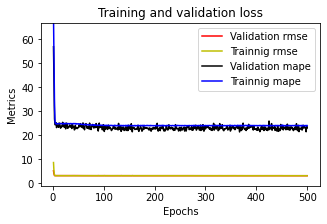

In [130]:
plotme(model6_1_2)

## sub-problem 7:  **input: distance & hour & all roadtypes with real distance**

In [45]:
df8 = df2.iloc[:,:].copy()
# df8 = df8.drop(['hour of day'], axis=1)
df8.head(20)

travel time  hour of day  distance  est_dist  similarity  similarity_dijk  \
0          1917           17  0.992498  0.816276    0.448560         0.524038   
1           766           20  0.344315  0.268660    0.727273         0.823529   
2           130           18  0.018713  0.016889    0.625000         0.714286   
3           551           15  0.349947  0.299087    0.662338         0.680000   
4           962           16  0.385289  0.341360    0.542553         0.573034   
5          1494           20  0.710211  0.680802    0.304688         0.345133   
6           918           15  0.496519  0.567776    0.328767         0.311688   
7           635           21  0.334883  0.283236    0.792208         0.871429   
8           599            0  0.348465  0.290417    0.753086         0.847222   
9          1380           15  0.687606  0.669774    0.225000         0.264706   
10         1433           15  0.337351  0.289868    0.701299         0.750000   
11          646           23  0.408917  0.303956    0.773810         0.802469   
12          479           18  0.285084  0.243820    0.819444         0.867647   
13          771           16  0.533188  0.462439    0.733333         0.752137   
14          619           23  0.362232  0.328280    0.586207         0.637500   
15          774           18  0.491825  0.443703    0.570312         0.657658   
16          667           20  0.403398  0.398877    0.483516         0.505747   
17          462           12  0.309532  0.256909    0.940299         0.984375   
18         1256           18  0.627959  0.608634    0.222222         0.292683   
19          612            2  0.349160  0.268622    0.680851         0.761905   

    living_street  motorway  motorway_link    primary  ...  road  secondary  \
0          29.014       0.0            0.0  28244.060  ...   0.0        0.0   
1           0.000       0.0            0.0   7621.231  ...   0.0        0.0   
2           0.000       0.0            0.0      0.000  ...   0.0        0.0   
3           0.000       0.0            0.0   7621.231  ...   0.0        0.0   
4           0.000       0.0            0.0   7621.231  ...   0.0        0.0   
5           0.000       0.0            0.0  18922.479  ...   0.0        0.0   
6           0.000       0.0            0.0  13498.925  ...   0.0        0.0   
7           0.000       0.0            0.0   8575.189  ...   0.0        0.0   
8           0.000       0.0            0.0   8089.947  ...   0.0        0.0   
9           0.000       0.0            0.0  17621.059  ...   0.0        0.0   
10          0.000       0.0            0.0   8089.947  ...   0.0        0.0   
11          0.000       0.0            0.0   6090.124  ...   0.0        0.0   
12          0.000       0.0            0.0   6090.124  ...   0.0        0.0   
13          0.000       0.0            0.0  12221.069  ...   0.0        0.0   
14          0.000       0.0            0.0   7621.231  ...   0.0        0.0   
15          0.000       0.0            0.0  10416.873  ...   0.0        0.0   
16          0.000       0.0            0.0   7772.535  ...   0.0        0.0   
17          0.000       0.0            0.0   7621.231  ...   0.0        0.0   
18          0.000       0.0            0.0  16684.975  ...   0.0        0.0   
19          0.000       0.0            0.0   6090.124  ...   0.0        0.0   

    secondary_link  service  tertiary  track  trunk  trunk_link  unclassified  \
0              0.0    0.000   437.068    0.0    0.0         0.0       715.641   
1              0.0    0.000   437.068    0.0    0.0         0.0      1960.558   
2              0.0    0.000   467.226    0.0    0.0         0.0         0.000   
3              0.0    0.000   437.068    0.0    0.0         0.0      1247.044   
4              0.0    0.000   437.068    0.0    0.0         0.0      2511.705   
5              0.0    0.000   720.334    0.0    0.0         0.0         0.000   
6              0.0   23.668   393.236    0.0    0.0         0.0         0.0

In [46]:
# Normalize using Min/Max Normalization.
normalize=(df8['living_street']-df8['living_street'].min())/(df8['living_street'].max()-df8['living_street'].min())
df8['living_street'] = normalize
normalize=(df8['motorway']-df8['motorway'].min())/(df8['motorway'].max()-df8['motorway'].min())
df8['motorway'] = normalize
normalize=(df8['motorway_link']-df8['motorway_link'].min())/(df8['motorway_link'].max()-df8['motorway_link'].min())
df8['motorway_link'] = normalize
normalize=(df8['primary']-df8['primary'].min())/(df8['primary'].max()-df8['primary'].min())
df8['primary'] = normalize
normalize=(df8['primary_link']-df8['primary_link'].min())/(df8['primary_link'].max()-df8['primary_link'].min())
df8['primary_link'] = normalize
normalize=(df8['residential']-df8['residential'].min())/(df8['residential'].max()-df8['residential'].min())
df8['residential'] = normalize
normalize=(df8['road']-df8['road'].min())/(df8['road'].max()-df8['road'].min())
df8['road'] = normalize
normalize=(df8['secondary']-df8['secondary'].min())/(df8['secondary'].max()-df8['secondary'].min())
df8['secondary'] = normalize
normalize=(df8['secondary_link']-df8['secondary_link'].min())/(df8['secondary_link'].max()-df8['secondary_link'].min())
df8['secondary_link'] = normalize
normalize=(df8['service']-df8['service'].min())/(df8['service'].max()-df8['service'].min())
df8['service'] = normalize
normalize=(df8['tertiary']-df8['tertiary'].min())/(df8['tertiary'].max()-df8['tertiary'].min())
df8['tertiary'] = normalize
normalize=(df8['track']-df8['track'].min())/(df8['track'].max()-df8['track'].min())
df8['track'] = normalize
normalize=(df8['trunk']-df8['trunk'].min())/(df8['trunk'].max()-df8['trunk'].min())
df8['trunk'] = normalize
normalize=(df8['trunk_link']-df8['trunk_link'].min())/(df8['trunk_link'].max()-df8['trunk_link'].min())
df8['trunk_link'] = normalize
normalize=(df8['unclassified']-df8['unclassified'].min())/(df8['unclassified'].max()-df8['unclassified'].min())
df8['unclassified'] = normalize
normalize=(df8['others']-df8['others'].min())/(df8['others'].max()-df8['others'].min())
df8['others'] = normalize
df8

travel time  hour of day  distance  est_dist  similarity  \
0             1917           17  0.992498  0.816276    0.448560   
1              766           20  0.344315  0.268660    0.727273   
2              130           18  0.018713  0.016889    0.625000   
3              551           15  0.349947  0.299087    0.662338   
4              962           16  0.385289  0.341360    0.542553   
...            ...          ...       ...       ...         ...   
16817         1136            6  0.277049  0.230076    0.951220   
16818          348           20  0.069904  0.048272    0.875000   
16819         1243            0  0.358691  0.306444    0.727273   
16820          125            2  0.016019  0.007059    0.500000   
16821         1670            5  0.742826  0.625970    0.672566   

       similarity_dijk  living_street  motorway  motorway_link   primary  ...  \
0             0.524038       0.031043       0.0            0.0  1.000000  ...   
1             0.823529       0.000000       0.0            0.0  0.269835  ...   
2             0.714286       0.000000       0.0            0.0  0.000000  ...   
3             0.680000       0.000000       0.0            0.0  0.269835  ...   
4             0.573034       0.000000       0.0            0.0  0.269835  ...   
...                ...            ...       ...            ...       ...  ...   
16817         0.951220       0.000000       0.0            0.0  0.000000  ...   
16818         1.000000       0.000000       0.0            0.0  0.000000  ...   
16819         0.674699       0.000000       0.0            0.0  0.145499  ...   
16820         1.000000       0.000000       0.0            0.0  0.000000  ...   
16821         0.672566       0.000000       0.0            0.0  0.724953  ...   

       road  secondary  secondary_link   service  tertiary  track  trunk  \
0       0.0   0.000000             0.0  0.000000  0.026824    0.0    0.0   
1       0.0   0.000000             0.0  0.000000  0.026824    0.0    0.0   
2       0.0   0.000000             0.0  0.000000  0.028674    0.0    0.0   
3       0.0   0.000000             0.0  0.000000  0.026824    0.0    0.0   
4       0.0   0.000000             0.0  0.000000  0.026824    0.0    0.0   
...     ...        ...             ...       ...       ...    ...    ...   
16817   0.0   0.000000             0.0  0.000000  0.512330    0.0    0.0   
16818   0.0   0.000000             0.0  0.000000  0.010181    0.0    0.0   
16819   0.0   0.000000             0.0  0.000000  0.337142    0.0    0.0   
16820   0.0   0.000000             0.0  0.000000  0.009984    0.0    0.0   
16821   0.0   0.028304             0.0  0.016148  0.018406    0.0    0.0   

       trunk_link  unclassified  others  
0             0.0      0.112037     0.0  
1             0.0      0.306935     0.0  
2             0.0      0.000000     0.0  
3             0.0      0.195231     0.0  
4             0.0      0.393219     0.0  
...           ...           ...     ...  
16817         0.0      0.000000     0.0  
16818         0.0      0.000000     0.0  
16819         0.0      0.000000     0.0  
16820         0.0      0.000000     0.0  
16821         0.0      0.000000     0.0  

[16631 rows x 22 columns]

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

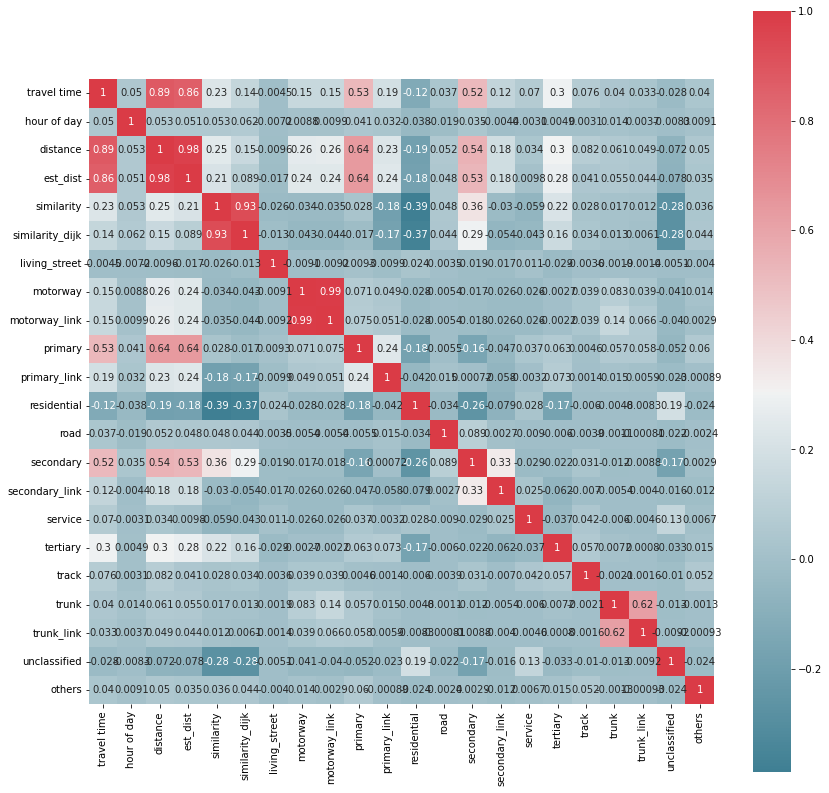

In [47]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(14,14))
corr = df8.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [135]:
x = np.array(df8.iloc[:,3:])
y = np.array(df8['travel time'])
x

array([[0.81627648, 0.44855967, 0.52403846, ..., 0.        , 0.11203696,
        0.        ],
       [0.26865964, 0.72727273, 0.82352941, ..., 0.        , 0.30693456,
        0.        ],
       [0.0168893 , 0.625     , 0.71428571, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.30644399, 0.72727273, 0.6746988 , ..., 0.        , 0.        ,
        0.        ],
       [0.00705875, 0.5       , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.62597006, 0.67256637, 0.67256637, ..., 0.        , 0.        ,
        0.        ]])

In [136]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [137]:
print(X_train.shape)
print(X_test.shape)
# X_train

(13304, 19)
(3327, 19)


In [138]:
# inputs: distance + roadtypes distance
model7_1_1 = nnmodel_(100,50, num_hlayers=2,Epoch=500)
model7_1_1

Epoch 1/500
416/416 [==============================] - 1s 1ms/step - loss: 278350.9062 - mape: 66.6696 - rmse: 527.5897 - val_loss: 75974.5703 - val_mape: 45.9944 - val_rmse: 275.6349
Epoch 2/500
416/416 [==============================] - 0s 799us/step - loss: 56418.0312 - mape: 41.5528 - rmse: 237.5248 - val_loss: 41404.8398 - val_mape: 31.9480 - val_rmse: 203.4818
Epoch 3/500
416/416 [==============================] - 0s 857us/step - loss: 35283.5000 - mape: 28.1076 - rmse: 187.8390 - val_loss: 31946.3613 - val_mape: 23.5108 - val_rmse: 178.7354
Epoch 4/500
416/416 [==============================] - 0s 774us/step - loss: 31080.5293 - mape: 23.3691 - rmse: 176.2967 - val_loss: 30571.5723 - val_mape: 21.5082 - val_rmse: 174.8473
Epoch 5/500
416/416 [==============================] - 0s 800us/step - loss: 30312.0840 - mape: 22.5223 - rmse: 174.1037 - val_loss: 30125.9629 - val_mape: 21.6018 - val_rmse: 173.5683
Epoch 6/500
416/416 [==============================] - 0s 786us/step - loss:

416/416 [==============================] - 0s 809us/step - loss: 28417.0391 - mape: 21.5717 - rmse: 168.5735 - val_loss: 29106.4238 - val_mape: 19.8491 - val_rmse: 170.6060
Epoch 90/500
416/416 [==============================] - 0s 816us/step - loss: 28443.2246 - mape: 21.6091 - rmse: 168.6512 - val_loss: 28517.4004 - val_mape: 20.6298 - val_rmse: 168.8710
Epoch 91/500
416/416 [==============================] - 0s 789us/step - loss: 28432.3340 - mape: 21.5589 - rmse: 168.6189 - val_loss: 28442.9531 - val_mape: 20.8111 - val_rmse: 168.6504
Epoch 92/500
416/416 [==============================] - 0s 807us/step - loss: 28414.3906 - mape: 21.5373 - rmse: 168.5657 - val_loss: 28478.9531 - val_mape: 21.3755 - val_rmse: 168.7571
Epoch 93/500
416/416 [==============================] - 0s 789us/step - loss: 28386.5137 - mape: 21.5797 - rmse: 168.4830 - val_loss: 28451.4160 - val_mape: 21.0371 - val_rmse: 168.6755
Epoch 94/500
416/416 [==============================] - 0s 829us/step - loss: 28442

Epoch 133/500
416/416 [==============================] - 0s 792us/step - loss: 28306.4453 - mape: 21.4924 - rmse: 168.2452 - val_loss: 28399.0000 - val_mape: 21.0923 - val_rmse: 168.5200
Epoch 134/500
416/416 [==============================] - 0s 851us/step - loss: 28288.6113 - mape: 21.4152 - rmse: 168.1922 - val_loss: 28538.4844 - val_mape: 20.7632 - val_rmse: 168.9334
Epoch 135/500
416/416 [==============================] - 0s 813us/step - loss: 28304.7266 - mape: 21.6283 - rmse: 168.2401 - val_loss: 28389.6465 - val_mape: 20.8832 - val_rmse: 168.4923
Epoch 136/500
416/416 [==============================] - 0s 804us/step - loss: 28303.4219 - mape: 21.5094 - rmse: 168.2362 - val_loss: 28454.8105 - val_mape: 20.7954 - val_rmse: 168.6855
Epoch 137/500
416/416 [==============================] - 0s 790us/step - loss: 28253.2910 - mape: 21.5220 - rmse: 168.0872 - val_loss: 28465.2988 - val_mape: 20.4682 - val_rmse: 168.7166
Epoch 138/500
416/416 [==============================] - 0s 812us

Epoch 177/500
416/416 [==============================] - 0s 808us/step - loss: 28189.4688 - mape: 21.5189 - rmse: 167.8972 - val_loss: 28385.5723 - val_mape: 20.6756 - val_rmse: 168.4802
Epoch 178/500
416/416 [==============================] - 0s 789us/step - loss: 28135.9883 - mape: 21.5346 - rmse: 167.7379 - val_loss: 28368.0898 - val_mape: 20.5443 - val_rmse: 168.4283
Epoch 179/500
416/416 [==============================] - 0s 792us/step - loss: 28182.8770 - mape: 21.5380 - rmse: 167.8776 - val_loss: 28364.6582 - val_mape: 21.1100 - val_rmse: 168.4181
Epoch 180/500
416/416 [==============================] - 0s 818us/step - loss: 28205.6191 - mape: 21.4558 - rmse: 167.9453 - val_loss: 28342.4375 - val_mape: 21.4240 - val_rmse: 168.3521
Epoch 181/500
416/416 [==============================] - 0s 824us/step - loss: 28155.7793 - mape: 21.5227 - rmse: 167.7968 - val_loss: 28359.7715 - val_mape: 21.5177 - val_rmse: 168.4036
Epoch 182/500
416/416 [==============================] - 0s 792us

Epoch 221/500
416/416 [==============================] - 0s 791us/step - loss: 28103.9570 - mape: 21.4909 - rmse: 167.6423 - val_loss: 28321.8906 - val_mape: 21.3955 - val_rmse: 168.2911
Epoch 222/500
416/416 [==============================] - 0s 823us/step - loss: 28068.5859 - mape: 21.4538 - rmse: 167.5368 - val_loss: 28310.2129 - val_mape: 21.2187 - val_rmse: 168.2564
Epoch 223/500
416/416 [==============================] - 0s 786us/step - loss: 28120.9180 - mape: 21.4868 - rmse: 167.6929 - val_loss: 28515.9082 - val_mape: 20.5504 - val_rmse: 168.8665
Epoch 224/500
416/416 [==============================] - 0s 798us/step - loss: 28109.8789 - mape: 21.5287 - rmse: 167.6600 - val_loss: 28315.0176 - val_mape: 20.6500 - val_rmse: 168.2707
Epoch 225/500
416/416 [==============================] - 0s 797us/step - loss: 28057.2461 - mape: 21.4357 - rmse: 167.5030 - val_loss: 28413.5176 - val_mape: 20.4622 - val_rmse: 168.5631
Epoch 226/500
416/416 [==============================] - 0s 802us

Epoch 265/500
416/416 [==============================] - 0s 768us/step - loss: 27969.3398 - mape: 21.3561 - rmse: 167.2404 - val_loss: 28501.4160 - val_mape: 22.2682 - val_rmse: 168.8236
Epoch 266/500
416/416 [==============================] - 0s 793us/step - loss: 27966.1719 - mape: 21.4448 - rmse: 167.2309 - val_loss: 28382.8320 - val_mape: 20.5091 - val_rmse: 168.4720
Epoch 267/500
416/416 [==============================] - 0s 825us/step - loss: 27972.1992 - mape: 21.5307 - rmse: 167.2489 - val_loss: 28229.4395 - val_mape: 20.6981 - val_rmse: 168.0162
Epoch 268/500
416/416 [==============================] - 0s 814us/step - loss: 27990.6172 - mape: 21.3510 - rmse: 167.3040 - val_loss: 28270.0566 - val_mape: 21.1654 - val_rmse: 168.1370
Epoch 269/500
416/416 [==============================] - 0s 816us/step - loss: 27926.8809 - mape: 21.4044 - rmse: 167.1134 - val_loss: 28495.0703 - val_mape: 20.2261 - val_rmse: 168.8048
Epoch 270/500
416/416 [==============================] - 0s 794us

Epoch 309/500
416/416 [==============================] - 0s 842us/step - loss: 27803.2305 - mape: 21.3278 - rmse: 166.7430 - val_loss: 28211.2461 - val_mape: 20.7519 - val_rmse: 167.9620
Epoch 310/500
416/416 [==============================] - 0s 799us/step - loss: 27828.0117 - mape: 21.2253 - rmse: 166.8173 - val_loss: 28251.1816 - val_mape: 21.2103 - val_rmse: 168.0809
Epoch 311/500
416/416 [==============================] - 0s 786us/step - loss: 27816.3652 - mape: 21.3742 - rmse: 166.7824 - val_loss: 28444.0332 - val_mape: 19.7678 - val_rmse: 168.6536
Epoch 312/500
416/416 [==============================] - 0s 806us/step - loss: 27834.7969 - mape: 21.2518 - rmse: 166.8376 - val_loss: 28247.9766 - val_mape: 20.8405 - val_rmse: 168.0714
Epoch 313/500
416/416 [==============================] - 0s 791us/step - loss: 27822.1582 - mape: 21.3011 - rmse: 166.7998 - val_loss: 28434.2793 - val_mape: 19.7445 - val_rmse: 168.6247
Epoch 314/500
416/416 [==============================] - 0s 800us

Epoch 353/500
416/416 [==============================] - 0s 864us/step - loss: 27701.4746 - mape: 21.2426 - rmse: 166.4376 - val_loss: 28565.1484 - val_mape: 19.7706 - val_rmse: 169.0123
Epoch 354/500
416/416 [==============================] - 0s 889us/step - loss: 27710.7441 - mape: 21.1659 - rmse: 166.4654 - val_loss: 28230.5430 - val_mape: 20.5944 - val_rmse: 168.0195
Epoch 355/500
416/416 [==============================] - 0s 823us/step - loss: 27668.9805 - mape: 21.1672 - rmse: 166.3400 - val_loss: 28350.2734 - val_mape: 21.2055 - val_rmse: 168.3754
Epoch 356/500
416/416 [==============================] - 0s 798us/step - loss: 27728.8125 - mape: 21.2338 - rmse: 166.5197 - val_loss: 28228.3359 - val_mape: 20.5173 - val_rmse: 168.0129
Epoch 357/500
416/416 [==============================] - 0s 873us/step - loss: 27707.0469 - mape: 21.1909 - rmse: 166.4543 - val_loss: 28219.4102 - val_mape: 20.3375 - val_rmse: 167.9863
Epoch 358/500
416/416 [==============================] - 0s 923us

Epoch 397/500
416/416 [==============================] - 0s 808us/step - loss: 27688.0293 - mape: 21.1910 - rmse: 166.3972 - val_loss: 28266.9062 - val_mape: 20.8005 - val_rmse: 168.1277
Epoch 398/500
416/416 [==============================] - 0s 796us/step - loss: 27623.7188 - mape: 21.1973 - rmse: 166.2038 - val_loss: 28261.3223 - val_mape: 21.0073 - val_rmse: 168.1110
Epoch 399/500
416/416 [==============================] - 0s 817us/step - loss: 27697.8477 - mape: 21.2349 - rmse: 166.4267 - val_loss: 28521.1680 - val_mape: 19.5736 - val_rmse: 168.8821
Epoch 400/500
416/416 [==============================] - 0s 791us/step - loss: 27651.2227 - mape: 21.0818 - rmse: 166.2866 - val_loss: 28238.8965 - val_mape: 20.5555 - val_rmse: 168.0443
Epoch 401/500
416/416 [==============================] - 0s 823us/step - loss: 27681.6074 - mape: 21.2562 - rmse: 166.3779 - val_loss: 28484.5059 - val_mape: 19.6415 - val_rmse: 168.7735
Epoch 402/500
416/416 [==============================] - 0s 808us

Epoch 441/500
416/416 [==============================] - 0s 795us/step - loss: 27657.8164 - mape: 21.2184 - rmse: 166.3064 - val_loss: 28257.3203 - val_mape: 20.5442 - val_rmse: 168.0991
Epoch 442/500
416/416 [==============================] - 0s 814us/step - loss: 27603.3008 - mape: 21.1988 - rmse: 166.1424 - val_loss: 28249.5996 - val_mape: 20.2019 - val_rmse: 168.0762
Epoch 443/500
416/416 [==============================] - 0s 795us/step - loss: 27666.2871 - mape: 21.0951 - rmse: 166.3319 - val_loss: 28286.3535 - val_mape: 20.7715 - val_rmse: 168.1855
Epoch 444/500
416/416 [==============================] - 0s 823us/step - loss: 27658.2656 - mape: 21.1724 - rmse: 166.3077 - val_loss: 28362.0684 - val_mape: 21.3166 - val_rmse: 168.4104
Epoch 445/500
416/416 [==============================] - 0s 805us/step - loss: 27627.2695 - mape: 21.2001 - rmse: 166.2145 - val_loss: 28251.2109 - val_mape: 20.7676 - val_rmse: 168.0810
Epoch 446/500
416/416 [==============================] - 0s 860us

Epoch 485/500
416/416 [==============================] - 0s 826us/step - loss: 27629.7109 - mape: 21.1645 - rmse: 166.2219 - val_loss: 28408.0449 - val_mape: 21.4134 - val_rmse: 168.5469
Epoch 486/500
416/416 [==============================] - 0s 831us/step - loss: 27612.1699 - mape: 21.0992 - rmse: 166.1691 - val_loss: 28722.5664 - val_mape: 22.4004 - val_rmse: 169.4773
Epoch 487/500
416/416 [==============================] - 0s 822us/step - loss: 27561.7441 - mape: 21.1519 - rmse: 166.0173 - val_loss: 28344.7207 - val_mape: 21.3124 - val_rmse: 168.3589
Epoch 488/500
416/416 [==============================] - 0s 842us/step - loss: 27642.7520 - mape: 21.1692 - rmse: 166.2611 - val_loss: 28424.3965 - val_mape: 20.0022 - val_rmse: 168.5954
Epoch 489/500
416/416 [==============================] - 0s 828us/step - loss: 27629.2500 - mape: 21.1376 - rmse: 166.2205 - val_loss: 28379.7168 - val_mape: 20.1627 - val_rmse: 168.4628
Epoch 490/500
416/416 [==============================] - 0s 837us

In [139]:
# plotme(model7_1_1)

In [140]:
# inputs: distance + hour + roadtypes distance
model7_1_2 = nnmodel_(200,100, num_hlayers=2,Epoch=500)
model7_1_2

Epoch 1/500
416/416 [==============================] - 1s 1ms/step - loss: 209027.0000 - mape: 60.0480 - rmse: 457.1947 - val_loss: 53744.2891 - val_mape: 38.2678 - val_rmse: 231.8281
Epoch 2/500
416/416 [==============================] - 0s 866us/step - loss: 38231.8203 - mape: 30.2163 - rmse: 195.5296 - val_loss: 31920.8652 - val_mape: 22.6627 - val_rmse: 178.6641
Epoch 3/500
416/416 [==============================] - 0s 878us/step - loss: 30754.9336 - mape: 23.0816 - rmse: 175.3708 - val_loss: 30153.8613 - val_mape: 21.8099 - val_rmse: 173.6487
Epoch 4/500
416/416 [==============================] - 0s 870us/step - loss: 30076.4141 - mape: 22.2678 - rmse: 173.4255 - val_loss: 30133.8887 - val_mape: 21.1982 - val_rmse: 173.5912
Epoch 5/500
416/416 [==============================] - 0s 892us/step - loss: 30012.8906 - mape: 22.3347 - rmse: 173.2423 - val_loss: 30032.9277 - val_mape: 20.8160 - val_rmse: 173.3001
Epoch 6/500
416/416 [==============================] - 0s 870us/step - loss:

416/416 [==============================] - 0s 881us/step - loss: 28417.7891 - mape: 21.3841 - rmse: 168.5758 - val_loss: 28588.8125 - val_mape: 19.8814 - val_rmse: 169.0823
Epoch 90/500
416/416 [==============================] - 0s 871us/step - loss: 28384.1953 - mape: 21.4099 - rmse: 168.4761 - val_loss: 28811.4219 - val_mape: 22.3036 - val_rmse: 169.7393
Epoch 91/500
416/416 [==============================] - 0s 859us/step - loss: 28367.8828 - mape: 21.4169 - rmse: 168.4277 - val_loss: 28462.9258 - val_mape: 19.9669 - val_rmse: 168.7096
Epoch 92/500
416/416 [==============================] - 0s 890us/step - loss: 28394.7656 - mape: 21.3511 - rmse: 168.5075 - val_loss: 28331.3945 - val_mape: 20.6094 - val_rmse: 168.3193
Epoch 93/500
416/416 [==============================] - 0s 870us/step - loss: 28388.4961 - mape: 21.3751 - rmse: 168.4889 - val_loss: 28342.0039 - val_mape: 21.2281 - val_rmse: 168.3508
Epoch 94/500
416/416 [==============================] - 0s 921us/step - loss: 28424

Epoch 133/500
416/416 [==============================] - 0s 856us/step - loss: 28280.2637 - mape: 21.2515 - rmse: 168.1674 - val_loss: 28588.2305 - val_mape: 22.4899 - val_rmse: 169.0806
Epoch 134/500
416/416 [==============================] - 0s 864us/step - loss: 28198.0391 - mape: 21.2703 - rmse: 167.9227 - val_loss: 28283.0977 - val_mape: 21.0984 - val_rmse: 168.1758
Epoch 135/500
416/416 [==============================] - 0s 862us/step - loss: 28222.9180 - mape: 21.3188 - rmse: 167.9968 - val_loss: 28366.4707 - val_mape: 20.0524 - val_rmse: 168.4235
Epoch 136/500
416/416 [==============================] - 0s 889us/step - loss: 28180.6211 - mape: 21.2186 - rmse: 167.8708 - val_loss: 28395.0449 - val_mape: 21.8199 - val_rmse: 168.5083
Epoch 137/500
416/416 [==============================] - 0s 877us/step - loss: 28166.4805 - mape: 21.3099 - rmse: 167.8287 - val_loss: 28207.9863 - val_mape: 20.8198 - val_rmse: 167.9523
Epoch 138/500
416/416 [==============================] - 0s 880us

Epoch 177/500
416/416 [==============================] - 0s 870us/step - loss: 28047.1543 - mape: 21.3005 - rmse: 167.4728 - val_loss: 28146.0391 - val_mape: 20.9371 - val_rmse: 167.7678
Epoch 178/500
416/416 [==============================] - 0s 870us/step - loss: 27996.8730 - mape: 21.1968 - rmse: 167.3227 - val_loss: 28122.6641 - val_mape: 20.8197 - val_rmse: 167.6981
Epoch 179/500
416/416 [==============================] - 0s 870us/step - loss: 28010.6875 - mape: 21.2983 - rmse: 167.3639 - val_loss: 28408.9746 - val_mape: 19.4264 - val_rmse: 168.5496
Epoch 180/500
416/416 [==============================] - 0s 862us/step - loss: 28023.0508 - mape: 21.1370 - rmse: 167.4009 - val_loss: 28075.1562 - val_mape: 20.2796 - val_rmse: 167.5564
Epoch 181/500
416/416 [==============================] - 0s 889us/step - loss: 27940.8203 - mape: 21.1177 - rmse: 167.1551 - val_loss: 28436.4082 - val_mape: 21.9013 - val_rmse: 168.6310
Epoch 182/500
416/416 [==============================] - 0s 865us

Epoch 221/500
416/416 [==============================] - 0s 859us/step - loss: 27786.0156 - mape: 21.2210 - rmse: 166.6914 - val_loss: 28642.2715 - val_mape: 19.4633 - val_rmse: 169.2403
Epoch 222/500
416/416 [==============================] - 0s 867us/step - loss: 27828.0352 - mape: 21.1789 - rmse: 166.8174 - val_loss: 28134.8906 - val_mape: 21.4429 - val_rmse: 167.7346
Epoch 223/500
416/416 [==============================] - 0s 893us/step - loss: 27898.0605 - mape: 21.2928 - rmse: 167.0271 - val_loss: 28096.7051 - val_mape: 19.6778 - val_rmse: 167.6207
Epoch 224/500
416/416 [==============================] - 0s 870us/step - loss: 27877.7148 - mape: 21.1246 - rmse: 166.9662 - val_loss: 27973.7305 - val_mape: 20.9018 - val_rmse: 167.2535
Epoch 225/500
416/416 [==============================] - 0s 870us/step - loss: 27784.9570 - mape: 21.2028 - rmse: 166.6882 - val_loss: 28526.2500 - val_mape: 19.2672 - val_rmse: 168.8972
Epoch 226/500
416/416 [==============================] - 0s 858us

Epoch 265/500
416/416 [==============================] - 0s 875us/step - loss: 27639.7363 - mape: 21.1721 - rmse: 166.2520 - val_loss: 28060.4707 - val_mape: 19.9944 - val_rmse: 167.5126
Epoch 266/500
416/416 [==============================] - 0s 875us/step - loss: 27636.7598 - mape: 21.1224 - rmse: 166.2431 - val_loss: 27994.1191 - val_mape: 21.3528 - val_rmse: 167.3144
Epoch 267/500
416/416 [==============================] - 0s 861us/step - loss: 27656.9492 - mape: 21.1814 - rmse: 166.3038 - val_loss: 27921.8477 - val_mape: 20.5771 - val_rmse: 167.0983
Epoch 268/500
416/416 [==============================] - 0s 874us/step - loss: 27648.2305 - mape: 21.0999 - rmse: 166.2776 - val_loss: 28016.2012 - val_mape: 21.6083 - val_rmse: 167.3804
Epoch 269/500
416/416 [==============================] - 0s 870us/step - loss: 27551.5938 - mape: 21.1561 - rmse: 165.9867 - val_loss: 28340.8047 - val_mape: 19.5349 - val_rmse: 168.3473
Epoch 270/500
416/416 [==============================] - 0s 889us

Epoch 309/500
416/416 [==============================] - 0s 907us/step - loss: 27476.8809 - mape: 21.0664 - rmse: 165.7615 - val_loss: 28202.5078 - val_mape: 20.1856 - val_rmse: 167.9360
Epoch 310/500
416/416 [==============================] - 0s 891us/step - loss: 27630.4434 - mape: 21.2744 - rmse: 166.2241 - val_loss: 28354.6328 - val_mape: 19.4873 - val_rmse: 168.3883
Epoch 311/500
416/416 [==============================] - 0s 891us/step - loss: 27465.7539 - mape: 21.1057 - rmse: 165.7280 - val_loss: 28228.1699 - val_mape: 19.3875 - val_rmse: 168.0124
Epoch 312/500
416/416 [==============================] - 0s 870us/step - loss: 27414.0352 - mape: 21.1044 - rmse: 165.5718 - val_loss: 27923.6484 - val_mape: 21.1212 - val_rmse: 167.1037
Epoch 313/500
416/416 [==============================] - 0s 876us/step - loss: 27520.7207 - mape: 21.1107 - rmse: 165.8937 - val_loss: 28069.2969 - val_mape: 21.4059 - val_rmse: 167.5389
Epoch 314/500
416/416 [==============================] - 0s 886us

Epoch 353/500
416/416 [==============================] - 0s 951us/step - loss: 27267.4355 - mape: 21.0042 - rmse: 165.1285 - val_loss: 27920.9902 - val_mape: 19.9663 - val_rmse: 167.0957
Epoch 354/500
416/416 [==============================] - 0s 981us/step - loss: 27309.7168 - mape: 21.0616 - rmse: 165.2565 - val_loss: 28054.2812 - val_mape: 20.0298 - val_rmse: 167.4941
Epoch 355/500
416/416 [==============================] - 0s 953us/step - loss: 27344.0273 - mape: 21.0076 - rmse: 165.3603 - val_loss: 28182.8555 - val_mape: 19.8675 - val_rmse: 167.8775
Epoch 356/500
416/416 [==============================] - 0s 939us/step - loss: 27245.1406 - mape: 21.1167 - rmse: 165.0610 - val_loss: 27954.5918 - val_mape: 19.8949 - val_rmse: 167.1963
Epoch 357/500
416/416 [==============================] - 0s 953us/step - loss: 27329.9238 - mape: 21.0064 - rmse: 165.3176 - val_loss: 27911.6562 - val_mape: 20.1707 - val_rmse: 167.0678
Epoch 358/500
416/416 [==============================] - 0s 991us

Epoch 397/500
416/416 [==============================] - 0s 938us/step - loss: 27139.5312 - mape: 20.9624 - rmse: 164.7408 - val_loss: 27888.0508 - val_mape: 20.3851 - val_rmse: 166.9972
Epoch 398/500
416/416 [==============================] - 0s 931us/step - loss: 27171.9648 - mape: 21.0706 - rmse: 164.8392 - val_loss: 28054.3438 - val_mape: 19.7507 - val_rmse: 167.4943
Epoch 399/500
416/416 [==============================] - 0s 940us/step - loss: 27141.3496 - mape: 20.9954 - rmse: 164.7463 - val_loss: 28125.8086 - val_mape: 19.6658 - val_rmse: 167.7075
Epoch 400/500
416/416 [==============================] - 0s 937us/step - loss: 27077.9199 - mape: 20.9872 - rmse: 164.5537 - val_loss: 28312.9219 - val_mape: 19.4553 - val_rmse: 168.2644
Epoch 401/500
416/416 [==============================] - 0s 939us/step - loss: 27127.8574 - mape: 20.9994 - rmse: 164.7054 - val_loss: 27847.7832 - val_mape: 20.9118 - val_rmse: 166.8766
Epoch 402/500
416/416 [==============================] - 0s 936us

Epoch 441/500
416/416 [==============================] - 0s 944us/step - loss: 26837.8281 - mape: 20.9363 - rmse: 163.8226 - val_loss: 27824.3125 - val_mape: 20.3879 - val_rmse: 166.8062
Epoch 442/500
416/416 [==============================] - 0s 944us/step - loss: 26865.8477 - mape: 20.9159 - rmse: 163.9081 - val_loss: 27939.9570 - val_mape: 19.7665 - val_rmse: 167.1525
Epoch 443/500
416/416 [==============================] - 0s 960us/step - loss: 26880.8496 - mape: 21.0135 - rmse: 163.9538 - val_loss: 27836.8789 - val_mape: 20.0694 - val_rmse: 166.8439
Epoch 444/500
416/416 [==============================] - 0s 982us/step - loss: 26840.7344 - mape: 20.8709 - rmse: 163.8314 - val_loss: 27883.2285 - val_mape: 20.6802 - val_rmse: 166.9827
Epoch 445/500
416/416 [==============================] - 0s 952us/step - loss: 26833.3281 - mape: 20.8752 - rmse: 163.8088 - val_loss: 28616.9531 - val_mape: 19.3796 - val_rmse: 169.1655
Epoch 446/500
416/416 [==============================] - 0s 952us

Epoch 485/500
416/416 [==============================] - 0s 930us/step - loss: 26564.9961 - mape: 20.8186 - rmse: 162.9877 - val_loss: 27839.0137 - val_mape: 20.3390 - val_rmse: 166.8503
Epoch 486/500
416/416 [==============================] - 0s 941us/step - loss: 26612.5801 - mape: 20.9418 - rmse: 163.1336 - val_loss: 28273.3691 - val_mape: 19.4632 - val_rmse: 168.1469
Epoch 487/500
416/416 [==============================] - 0s 937us/step - loss: 26578.4922 - mape: 20.7941 - rmse: 163.0291 - val_loss: 27824.2812 - val_mape: 19.9874 - val_rmse: 166.8061
Epoch 488/500
416/416 [==============================] - 0s 947us/step - loss: 26607.2949 - mape: 20.8565 - rmse: 163.1174 - val_loss: 27879.5332 - val_mape: 20.0395 - val_rmse: 166.9716
Epoch 489/500
416/416 [==============================] - 0s 925us/step - loss: 26570.4004 - mape: 20.7674 - rmse: 163.0043 - val_loss: 27947.9980 - val_mape: 20.8829 - val_rmse: 167.1765
Epoch 490/500
416/416 [==============================] - 0s 933us

In [141]:
# plotme(model7_1_2)

In [142]:
# inputs: distance + roadtypes distance
model7_1_3 = nnmodel_(50, num_hlayers=1,Epoch=500)
model7_1_3

Epoch 1/500
416/416 [==============================] - 1s 923us/step - loss: 539403.5000 - mape: 97.0870 - rmse: 734.4409 - val_loss: 507485.8125 - val_mape: 91.4984 - val_rmse: 712.3804
Epoch 2/500
416/416 [==============================] - 0s 793us/step - loss: 435233.5625 - mape: 80.3186 - rmse: 659.7224 - val_loss: 367036.7812 - val_mape: 68.5174 - val_rmse: 605.8356
Epoch 3/500
416/416 [==============================] - 0s 788us/step - loss: 288300.0000 - mape: 56.8443 - rmse: 536.9357 - val_loss: 224265.5938 - val_mape: 47.3245 - val_rmse: 473.5669
Epoch 4/500
416/416 [==============================] - 0s 790us/step - loss: 170197.0312 - mape: 43.5189 - rmse: 412.5494 - val_loss: 133320.9219 - val_mape: 40.5201 - val_rmse: 365.1314
Epoch 5/500
416/416 [==============================] - 0s 784us/step - loss: 109504.1719 - mape: 43.5411 - rmse: 330.9142 - val_loss: 96535.0547 - val_mape: 43.8969 - val_rmse: 310.7009
Epoch 6/500
416/416 [==============================] - 0s 786us/st

416/416 [==============================] - 0s 778us/step - loss: 29798.3984 - mape: 22.1890 - rmse: 172.6221 - val_loss: 29922.8594 - val_mape: 21.0904 - val_rmse: 172.9823
Epoch 46/500
416/416 [==============================] - 0s 780us/step - loss: 29779.8965 - mape: 22.0905 - rmse: 172.5685 - val_loss: 29846.9609 - val_mape: 21.7473 - val_rmse: 172.7627
Epoch 47/500
416/416 [==============================] - 0s 786us/step - loss: 29768.1973 - mape: 22.2333 - rmse: 172.5346 - val_loss: 29862.2129 - val_mape: 21.3163 - val_rmse: 172.8069
Epoch 48/500
416/416 [==============================] - 0s 785us/step - loss: 29763.2539 - mape: 22.1818 - rmse: 172.5203 - val_loss: 29868.5430 - val_mape: 21.2334 - val_rmse: 172.8252
Epoch 49/500
416/416 [==============================] - 0s 787us/step - loss: 29753.6094 - mape: 22.1600 - rmse: 172.4923 - val_loss: 29841.2891 - val_mape: 21.3591 - val_rmse: 172.7463
Epoch 50/500
416/416 [==============================] - 0s 788us/step - loss: 29749

Epoch 133/500
416/416 [==============================] - 0s 779us/step - loss: 29307.6641 - mape: 22.1076 - rmse: 171.1948 - val_loss: 29382.6172 - val_mape: 21.2149 - val_rmse: 171.4136
Epoch 134/500
416/416 [==============================] - 0s 774us/step - loss: 29298.0469 - mape: 22.0690 - rmse: 171.1667 - val_loss: 29363.9883 - val_mape: 21.2985 - val_rmse: 171.3592
Epoch 135/500
416/416 [==============================] - 0s 772us/step - loss: 29284.8301 - mape: 22.0150 - rmse: 171.1281 - val_loss: 29338.2695 - val_mape: 21.6117 - val_rmse: 171.2842
Epoch 136/500
416/416 [==============================] - 0s 776us/step - loss: 29294.2344 - mape: 22.1371 - rmse: 171.1556 - val_loss: 29350.9902 - val_mape: 21.3176 - val_rmse: 171.3213
Epoch 137/500
416/416 [==============================] - 0s 772us/step - loss: 29284.3223 - mape: 22.0867 - rmse: 171.1266 - val_loss: 29366.7656 - val_mape: 21.1850 - val_rmse: 171.3673
Epoch 138/500
416/416 [==============================] - 0s 794us

Epoch 177/500
416/416 [==============================] - 0s 782us/step - loss: 29136.3672 - mape: 21.9652 - rmse: 170.6938 - val_loss: 29169.2402 - val_mape: 21.6209 - val_rmse: 170.7901
Epoch 178/500
416/416 [==============================] - 0s 761us/step - loss: 29151.3555 - mape: 22.0099 - rmse: 170.7377 - val_loss: 29191.5625 - val_mape: 21.1892 - val_rmse: 170.8554
Epoch 179/500
416/416 [==============================] - 0s 723us/step - loss: 29141.9609 - mape: 22.0056 - rmse: 170.7102 - val_loss: 29180.1895 - val_mape: 21.2653 - val_rmse: 170.8221
Epoch 180/500
416/416 [==============================] - 0s 760us/step - loss: 29139.5254 - mape: 21.9876 - rmse: 170.7030 - val_loss: 29216.2676 - val_mape: 21.0427 - val_rmse: 170.9277
Epoch 181/500
416/416 [==============================] - 0s 731us/step - loss: 29135.1211 - mape: 21.9387 - rmse: 170.6901 - val_loss: 29155.9551 - val_mape: 21.5025 - val_rmse: 170.7511
Epoch 182/500
416/416 [==============================] - 0s 751us

Epoch 221/500
416/416 [==============================] - 0s 725us/step - loss: 29007.0586 - mape: 21.9776 - rmse: 170.3146 - val_loss: 29111.4102 - val_mape: 20.8517 - val_rmse: 170.6207
Epoch 222/500
416/416 [==============================] - 0s 765us/step - loss: 29016.7598 - mape: 21.8739 - rmse: 170.3431 - val_loss: 29030.2500 - val_mape: 21.2762 - val_rmse: 170.3827
Epoch 223/500
416/416 [==============================] - 0s 772us/step - loss: 29000.5703 - mape: 21.8834 - rmse: 170.2955 - val_loss: 29036.1680 - val_mape: 21.8397 - val_rmse: 170.4000
Epoch 224/500
416/416 [==============================] - 0s 803us/step - loss: 29011.7188 - mape: 21.9621 - rmse: 170.3283 - val_loss: 29024.5723 - val_mape: 21.2410 - val_rmse: 170.3660
Epoch 225/500
416/416 [==============================] - 0s 841us/step - loss: 29004.4297 - mape: 21.9340 - rmse: 170.3069 - val_loss: 29056.7461 - val_mape: 21.0080 - val_rmse: 170.4604
Epoch 226/500
416/416 [==============================] - 0s 828us

Epoch 265/500
416/416 [==============================] - 0s 812us/step - loss: 28892.2168 - mape: 21.8455 - rmse: 169.9771 - val_loss: 28932.7949 - val_mape: 21.0032 - val_rmse: 170.0964
Epoch 266/500
416/416 [==============================] - 0s 797us/step - loss: 28887.4570 - mape: 21.8190 - rmse: 169.9631 - val_loss: 28923.6719 - val_mape: 21.0279 - val_rmse: 170.0696
Epoch 267/500
416/416 [==============================] - 0s 790us/step - loss: 28890.7676 - mape: 21.8468 - rmse: 169.9728 - val_loss: 28906.0117 - val_mape: 21.1178 - val_rmse: 170.0177
Epoch 268/500
416/416 [==============================] - 0s 788us/step - loss: 28881.5234 - mape: 21.8685 - rmse: 169.9456 - val_loss: 28945.4883 - val_mape: 20.8850 - val_rmse: 170.1337
Epoch 269/500
416/416 [==============================] - 0s 807us/step - loss: 28881.1738 - mape: 21.8116 - rmse: 169.9446 - val_loss: 28886.1699 - val_mape: 21.2167 - val_rmse: 169.9593
Epoch 270/500
416/416 [==============================] - 0s 882us

Epoch 309/500
416/416 [==============================] - 0s 816us/step - loss: 28763.6562 - mape: 21.8776 - rmse: 169.5985 - val_loss: 28825.9688 - val_mape: 20.8239 - val_rmse: 169.7821
Epoch 310/500
416/416 [==============================] - 0s 794us/step - loss: 28752.8730 - mape: 21.6872 - rmse: 169.5667 - val_loss: 28763.1855 - val_mape: 21.4831 - val_rmse: 169.5971
Epoch 311/500
416/416 [==============================] - 0s 748us/step - loss: 28760.5898 - mape: 21.8396 - rmse: 169.5895 - val_loss: 28777.3867 - val_mape: 21.0175 - val_rmse: 169.6390
Epoch 312/500
416/416 [==============================] - 0s 765us/step - loss: 28765.6445 - mape: 21.7473 - rmse: 169.6044 - val_loss: 28776.1543 - val_mape: 21.0671 - val_rmse: 169.6354
Epoch 313/500
416/416 [==============================] - 0s 796us/step - loss: 28757.8262 - mape: 21.7824 - rmse: 169.5813 - val_loss: 28785.9941 - val_mape: 20.9487 - val_rmse: 169.6644
Epoch 314/500
416/416 [==============================] - 0s 791us

Epoch 353/500
416/416 [==============================] - 0s 748us/step - loss: 28655.9453 - mape: 21.7221 - rmse: 169.2807 - val_loss: 28692.2129 - val_mape: 20.8733 - val_rmse: 169.3878
Epoch 354/500
416/416 [==============================] - 0s 758us/step - loss: 28651.9863 - mape: 21.7014 - rmse: 169.2690 - val_loss: 28660.0078 - val_mape: 21.0899 - val_rmse: 169.2927
Epoch 355/500
416/416 [==============================] - 0s 734us/step - loss: 28654.7090 - mape: 21.6942 - rmse: 169.2770 - val_loss: 28660.7402 - val_mape: 21.0318 - val_rmse: 169.2948
Epoch 356/500
416/416 [==============================] - 0s 740us/step - loss: 28646.0508 - mape: 21.6806 - rmse: 169.2514 - val_loss: 28659.0781 - val_mape: 21.0370 - val_rmse: 169.2899
Epoch 357/500
416/416 [==============================] - 0s 744us/step - loss: 28638.3340 - mape: 21.6891 - rmse: 169.2286 - val_loss: 28651.3594 - val_mape: 21.0985 - val_rmse: 169.2671
Epoch 358/500
416/416 [==============================] - 0s 742us

Epoch 397/500
416/416 [==============================] - 0s 741us/step - loss: 28575.3555 - mape: 21.6114 - rmse: 169.0425 - val_loss: 28573.7812 - val_mape: 21.2436 - val_rmse: 169.0378
Epoch 398/500
416/416 [==============================] - 0s 770us/step - loss: 28566.6992 - mape: 21.6290 - rmse: 169.0169 - val_loss: 28578.0938 - val_mape: 21.0637 - val_rmse: 169.0506
Epoch 399/500
416/416 [==============================] - 0s 756us/step - loss: 28565.1953 - mape: 21.6605 - rmse: 169.0124 - val_loss: 28586.3281 - val_mape: 20.9529 - val_rmse: 169.0749
Epoch 400/500
416/416 [==============================] - 0s 746us/step - loss: 28562.2539 - mape: 21.6445 - rmse: 169.0037 - val_loss: 28614.6348 - val_mape: 20.7707 - val_rmse: 169.1586
Epoch 401/500
416/416 [==============================] - 0s 752us/step - loss: 28555.2324 - mape: 21.6408 - rmse: 168.9829 - val_loss: 28626.9434 - val_mape: 20.7015 - val_rmse: 169.1950
Epoch 402/500
416/416 [==============================] - 0s 753us

Epoch 441/500
416/416 [==============================] - 0s 743us/step - loss: 28489.5254 - mape: 21.6336 - rmse: 168.7884 - val_loss: 28547.4199 - val_mape: 20.8276 - val_rmse: 168.9598
Epoch 442/500
416/416 [==============================] - 0s 755us/step - loss: 28486.8613 - mape: 21.5658 - rmse: 168.7805 - val_loss: 28565.4492 - val_mape: 20.7332 - val_rmse: 169.0132
Epoch 443/500
416/416 [==============================] - 0s 759us/step - loss: 28488.1777 - mape: 21.6056 - rmse: 168.7844 - val_loss: 28548.2422 - val_mape: 20.7948 - val_rmse: 168.9622
Epoch 444/500
416/416 [==============================] - 0s 754us/step - loss: 28496.4023 - mape: 21.6125 - rmse: 168.8088 - val_loss: 28581.1211 - val_mape: 20.6340 - val_rmse: 169.0595
Epoch 445/500
416/416 [==============================] - 0s 747us/step - loss: 28480.3809 - mape: 21.6158 - rmse: 168.7613 - val_loss: 28561.6270 - val_mape: 20.7051 - val_rmse: 169.0019
Epoch 446/500
416/416 [==============================] - 0s 754us

Epoch 485/500
416/416 [==============================] - 0s 736us/step - loss: 28420.6152 - mape: 21.5979 - rmse: 168.5842 - val_loss: 28541.3691 - val_mape: 20.6355 - val_rmse: 168.9419
Epoch 486/500
416/416 [==============================] - 0s 755us/step - loss: 28428.9219 - mape: 21.5399 - rmse: 168.6088 - val_loss: 28511.4199 - val_mape: 20.7895 - val_rmse: 168.8533
Epoch 487/500
416/416 [==============================] - 0s 740us/step - loss: 28412.4258 - mape: 21.5231 - rmse: 168.5599 - val_loss: 28487.9512 - val_mape: 21.2655 - val_rmse: 168.7837
Epoch 488/500
416/416 [==============================] - 0s 963us/step - loss: 28439.3770 - mape: 21.6027 - rmse: 168.6398 - val_loss: 28497.4746 - val_mape: 20.8491 - val_rmse: 168.8120
Epoch 489/500
416/416 [==============================] - 0s 791us/step - loss: 28422.4707 - mape: 21.5387 - rmse: 168.5896 - val_loss: 28489.9902 - val_mape: 20.9906 - val_rmse: 168.7898
Epoch 490/500
416/416 [==============================] - 0s 767us

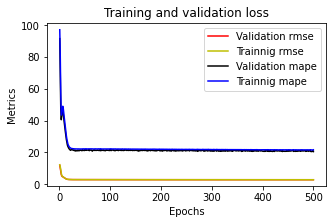

In [143]:
plotme(model7_1_3)

In [144]:
# inputs: distance + roadtypes distance
model7_1_4 = nnmodel_(10, num_hlayers=1,Epoch=500)
model7_1_4

Epoch 1/500
416/416 [==============================] - 1s 887us/step - loss: 553447.0000 - mape: 99.2496 - rmse: 743.9402 - val_loss: 550800.3750 - val_mape: 97.9719 - val_rmse: 742.1592
Epoch 2/500
416/416 [==============================] - 0s 739us/step - loss: 527446.3125 - mape: 95.3855 - rmse: 726.2550 - val_loss: 513173.0938 - val_mape: 92.4143 - val_rmse: 716.3610
Epoch 3/500
416/416 [==============================] - 0s 723us/step - loss: 481461.5312 - mape: 88.2791 - rmse: 693.8743 - val_loss: 459644.5625 - val_mape: 84.0716 - val_rmse: 677.9709
Epoch 4/500
416/416 [==============================] - 0s 754us/step - loss: 423347.3750 - mape: 78.6560 - rmse: 650.6515 - val_loss: 397509.1250 - val_mape: 73.7388 - val_rmse: 630.4833
Epoch 5/500
416/416 [==============================] - 0s 754us/step - loss: 360015.6250 - mape: 67.8888 - rmse: 600.0130 - val_loss: 333180.0000 - val_mape: 63.0787 - val_rmse: 577.2175
Epoch 6/500
416/416 [==============================] - 0s 747us/s

Epoch 45/500
416/416 [==============================] - 0s 724us/step - loss: 31084.8066 - mape: 22.9722 - rmse: 176.3088 - val_loss: 30997.1582 - val_mape: 21.9856 - val_rmse: 176.0601
Epoch 46/500
416/416 [==============================] - 0s 747us/step - loss: 30981.5938 - mape: 22.9013 - rmse: 176.0159 - val_loss: 30923.1543 - val_mape: 21.7667 - val_rmse: 175.8498
Epoch 47/500
416/416 [==============================] - 0s 705us/step - loss: 30895.4375 - mape: 22.8055 - rmse: 175.7710 - val_loss: 30850.4531 - val_mape: 21.6317 - val_rmse: 175.6430
Epoch 48/500
416/416 [==============================] - 0s 755us/step - loss: 30811.2598 - mape: 22.7088 - rmse: 175.5314 - val_loss: 30765.2129 - val_mape: 21.6105 - val_rmse: 175.4001
Epoch 49/500
416/416 [==============================] - 0s 739us/step - loss: 30732.7793 - mape: 22.6565 - rmse: 175.3077 - val_loss: 30702.2344 - val_mape: 21.5136 - val_rmse: 175.2205
Epoch 50/500
416/416 [==============================] - 0s 755us/step 

416/416 [==============================] - 0s 729us/step - loss: 29875.6758 - mape: 22.2284 - rmse: 172.8458 - val_loss: 29968.7402 - val_mape: 21.2816 - val_rmse: 173.1148
Epoch 90/500
416/416 [==============================] - 0s 740us/step - loss: 29863.4492 - mape: 22.1261 - rmse: 172.8104 - val_loss: 29951.0957 - val_mape: 21.3900 - val_rmse: 173.0638
Epoch 91/500
416/416 [==============================] - 0s 749us/step - loss: 29855.3105 - mape: 22.1890 - rmse: 172.7869 - val_loss: 29962.0078 - val_mape: 21.2829 - val_rmse: 173.0954
Epoch 92/500
416/416 [==============================] - 0s 734us/step - loss: 29853.2910 - mape: 22.1721 - rmse: 172.7811 - val_loss: 29962.0898 - val_mape: 21.2599 - val_rmse: 173.0956
Epoch 93/500
416/416 [==============================] - 0s 776us/step - loss: 29843.8223 - mape: 22.1377 - rmse: 172.7536 - val_loss: 29941.2227 - val_mape: 21.3840 - val_rmse: 173.0353
Epoch 94/500
416/416 [==============================] - 0s 796us/step - loss: 29839

Epoch 133/500
416/416 [==============================] - 0s 747us/step - loss: 29686.0879 - mape: 22.1702 - rmse: 172.2965 - val_loss: 29820.0820 - val_mape: 21.3768 - val_rmse: 172.6849
Epoch 134/500
416/416 [==============================] - 0s 724us/step - loss: 29682.6387 - mape: 22.2176 - rmse: 172.2865 - val_loss: 29818.6445 - val_mape: 21.3617 - val_rmse: 172.6808
Epoch 135/500
416/416 [==============================] - 0s 750us/step - loss: 29678.5312 - mape: 22.1980 - rmse: 172.2746 - val_loss: 29821.0332 - val_mape: 21.3318 - val_rmse: 172.6877
Epoch 136/500
416/416 [==============================] - 0s 713us/step - loss: 29676.4785 - mape: 22.1802 - rmse: 172.2686 - val_loss: 29815.1777 - val_mape: 21.3524 - val_rmse: 172.6707
Epoch 137/500
416/416 [==============================] - 0s 711us/step - loss: 29675.3477 - mape: 22.1690 - rmse: 172.2653 - val_loss: 29805.7520 - val_mape: 21.3966 - val_rmse: 172.6434
Epoch 138/500
416/416 [==============================] - 0s 902us

Epoch 177/500
416/416 [==============================] - 0s 733us/step - loss: 29564.9492 - mape: 22.2048 - rmse: 171.9446 - val_loss: 29688.4082 - val_mape: 21.4374 - val_rmse: 172.3032
Epoch 178/500
416/416 [==============================] - 0s 708us/step - loss: 29568.3242 - mape: 22.1740 - rmse: 171.9544 - val_loss: 29678.7539 - val_mape: 21.5347 - val_rmse: 172.2752
Epoch 179/500
416/416 [==============================] - 0s 709us/step - loss: 29561.3086 - mape: 22.1823 - rmse: 171.9340 - val_loss: 29675.6445 - val_mape: 21.5340 - val_rmse: 172.2662
Epoch 180/500
416/416 [==============================] - 0s 755us/step - loss: 29563.3066 - mape: 22.2521 - rmse: 171.9398 - val_loss: 29691.8672 - val_mape: 21.3642 - val_rmse: 172.3133
Epoch 181/500
416/416 [==============================] - 0s 765us/step - loss: 29560.1270 - mape: 22.2109 - rmse: 171.9306 - val_loss: 29700.3965 - val_mape: 21.2880 - val_rmse: 172.3380
Epoch 182/500
416/416 [==============================] - 0s 744us

Epoch 221/500
416/416 [==============================] - 0s 707us/step - loss: 29474.7871 - mape: 22.1232 - rmse: 171.6822 - val_loss: 29572.6172 - val_mape: 21.4883 - val_rmse: 171.9669
Epoch 222/500
416/416 [==============================] - 0s 755us/step - loss: 29473.1465 - mape: 22.1720 - rmse: 171.6774 - val_loss: 29568.6172 - val_mape: 21.5054 - val_rmse: 171.9553
Epoch 223/500
416/416 [==============================] - 0s 710us/step - loss: 29469.9121 - mape: 22.2253 - rmse: 171.6680 - val_loss: 29594.8848 - val_mape: 21.2947 - val_rmse: 172.0316
Epoch 224/500
416/416 [==============================] - 0s 761us/step - loss: 29472.3613 - mape: 22.1283 - rmse: 171.6752 - val_loss: 29584.7988 - val_mape: 21.3387 - val_rmse: 172.0023
Epoch 225/500
416/416 [==============================] - 0s 714us/step - loss: 29467.9883 - mape: 22.1857 - rmse: 171.6624 - val_loss: 29572.8828 - val_mape: 21.4015 - val_rmse: 171.9677
Epoch 226/500
416/416 [==============================] - 0s 766us

Epoch 265/500
416/416 [==============================] - 0s 736us/step - loss: 29398.6992 - mape: 22.1322 - rmse: 171.4605 - val_loss: 29481.2109 - val_mape: 21.4667 - val_rmse: 171.7009
Epoch 266/500
416/416 [==============================] - 0s 738us/step - loss: 29399.3418 - mape: 22.2018 - rmse: 171.4624 - val_loss: 29500.3105 - val_mape: 21.2999 - val_rmse: 171.7565
Epoch 267/500
416/416 [==============================] - 0s 732us/step - loss: 29394.1582 - mape: 22.1149 - rmse: 171.4473 - val_loss: 29479.0781 - val_mape: 21.4401 - val_rmse: 171.6947
Epoch 268/500
416/416 [==============================] - 0s 740us/step - loss: 29393.0898 - mape: 22.1870 - rmse: 171.4441 - val_loss: 29488.1230 - val_mape: 21.3472 - val_rmse: 171.7211
Epoch 269/500
416/416 [==============================] - 0s 731us/step - loss: 29393.6016 - mape: 22.1511 - rmse: 171.4456 - val_loss: 29487.4395 - val_mape: 21.3379 - val_rmse: 171.7191
Epoch 270/500
416/416 [==============================] - 0s 730us

Epoch 309/500
416/416 [==============================] - 0s 744us/step - loss: 29333.3613 - mape: 22.1205 - rmse: 171.2699 - val_loss: 29408.1680 - val_mape: 21.3817 - val_rmse: 171.4881
Epoch 310/500
416/416 [==============================] - 0s 734us/step - loss: 29335.6602 - mape: 22.1399 - rmse: 171.2766 - val_loss: 29413.5625 - val_mape: 21.3250 - val_rmse: 171.5038
Epoch 311/500
416/416 [==============================] - 0s 761us/step - loss: 29329.4512 - mape: 22.1016 - rmse: 171.2584 - val_loss: 29392.7578 - val_mape: 21.5032 - val_rmse: 171.4432
Epoch 312/500
416/416 [==============================] - 0s 721us/step - loss: 29331.3359 - mape: 22.1316 - rmse: 171.2639 - val_loss: 29398.1758 - val_mape: 21.4137 - val_rmse: 171.4590
Epoch 313/500
416/416 [==============================] - 0s 697us/step - loss: 29327.6855 - mape: 22.1072 - rmse: 171.2533 - val_loss: 29405.2402 - val_mape: 21.3619 - val_rmse: 171.4796
Epoch 314/500
416/416 [==============================] - 0s 751us

Epoch 353/500
416/416 [==============================] - 0s 724us/step - loss: 29280.1523 - mape: 22.0883 - rmse: 171.1144 - val_loss: 29330.7344 - val_mape: 21.4346 - val_rmse: 171.2622
Epoch 354/500
416/416 [==============================] - 0s 707us/step - loss: 29276.1680 - mape: 22.1007 - rmse: 171.1028 - val_loss: 29327.9805 - val_mape: 21.4585 - val_rmse: 171.2541
Epoch 355/500
416/416 [==============================] - 0s 756us/step - loss: 29277.6797 - mape: 22.1040 - rmse: 171.1072 - val_loss: 29330.4199 - val_mape: 21.3983 - val_rmse: 171.2613
Epoch 356/500
416/416 [==============================] - 0s 744us/step - loss: 29274.2441 - mape: 22.1326 - rmse: 171.0972 - val_loss: 29346.0801 - val_mape: 21.2707 - val_rmse: 171.3070
Epoch 357/500
416/416 [==============================] - 0s 725us/step - loss: 29278.2969 - mape: 22.0761 - rmse: 171.1090 - val_loss: 29322.4961 - val_mape: 21.4463 - val_rmse: 171.2381
Epoch 358/500
416/416 [==============================] - 0s 704us

Epoch 397/500
416/416 [==============================] - 0s 733us/step - loss: 29232.9883 - mape: 21.9967 - rmse: 170.9766 - val_loss: 29276.5273 - val_mape: 21.3731 - val_rmse: 171.1039
Epoch 398/500
416/416 [==============================] - 0s 725us/step - loss: 29232.8457 - mape: 22.0408 - rmse: 170.9762 - val_loss: 29263.9336 - val_mape: 21.5033 - val_rmse: 171.0670
Epoch 399/500
416/416 [==============================] - 0s 743us/step - loss: 29230.3066 - mape: 22.1036 - rmse: 170.9687 - val_loss: 29276.5527 - val_mape: 21.3474 - val_rmse: 171.1039
Epoch 400/500
416/416 [==============================] - 0s 721us/step - loss: 29229.7598 - mape: 22.0561 - rmse: 170.9671 - val_loss: 29268.4434 - val_mape: 21.4017 - val_rmse: 171.0802
Epoch 401/500
416/416 [==============================] - 0s 753us/step - loss: 29230.4414 - mape: 22.1122 - rmse: 170.9691 - val_loss: 29281.3633 - val_mape: 21.2891 - val_rmse: 171.1180
Epoch 402/500
416/416 [==============================] - 0s 739us

Epoch 441/500
416/416 [==============================] - 0s 821us/step - loss: 29192.6113 - mape: 22.0973 - rmse: 170.8585 - val_loss: 29248.1992 - val_mape: 21.1887 - val_rmse: 171.0210
Epoch 442/500
416/416 [==============================] - 0s 798us/step - loss: 29194.0820 - mape: 22.0099 - rmse: 170.8628 - val_loss: 29222.1680 - val_mape: 21.3617 - val_rmse: 170.9449
Epoch 443/500
416/416 [==============================] - 0s 833us/step - loss: 29194.3105 - mape: 22.0562 - rmse: 170.8634 - val_loss: 29227.8828 - val_mape: 21.2982 - val_rmse: 170.9616
Epoch 444/500
416/416 [==============================] - 0s 824us/step - loss: 29190.6191 - mape: 22.0367 - rmse: 170.8526 - val_loss: 29223.5254 - val_mape: 21.3366 - val_rmse: 170.9489
Epoch 445/500
416/416 [==============================] - 0s 802us/step - loss: 29190.8906 - mape: 22.0361 - rmse: 170.8534 - val_loss: 29212.6328 - val_mape: 21.4236 - val_rmse: 170.9170
Epoch 446/500
416/416 [==============================] - 0s 821us

Epoch 485/500
416/416 [==============================] - 0s 761us/step - loss: 29158.8691 - mape: 22.0306 - rmse: 170.7597 - val_loss: 29193.9863 - val_mape: 21.2295 - val_rmse: 170.8625
Epoch 486/500
416/416 [==============================] - 0s 754us/step - loss: 29158.1836 - mape: 21.9784 - rmse: 170.7577 - val_loss: 29181.6914 - val_mape: 21.3177 - val_rmse: 170.8265
Epoch 487/500
416/416 [==============================] - 0s 710us/step - loss: 29156.0234 - mape: 22.0546 - rmse: 170.7513 - val_loss: 29184.2363 - val_mape: 21.2860 - val_rmse: 170.8339
Epoch 488/500
416/416 [==============================] - 0s 734us/step - loss: 29157.1309 - mape: 21.9960 - rmse: 170.7546 - val_loss: 29183.8828 - val_mape: 21.2719 - val_rmse: 170.8329
Epoch 489/500
416/416 [==============================] - 0s 759us/step - loss: 29155.4922 - mape: 22.0276 - rmse: 170.7498 - val_loss: 29179.7871 - val_mape: 21.3062 - val_rmse: 170.8209
Epoch 490/500
416/416 [==============================] - 0s 724us

In [145]:
# inputs: distance + roadtypes distance
model7_1_5 = nnmodel_(100, num_hlayers=1,Epoch=500)
model7_1_5

Epoch 1/500
416/416 [==============================] - 1s 902us/step - loss: 518073.2188 - mape: 93.8403 - rmse: 719.7730 - val_loss: 446518.0625 - val_mape: 81.9108 - val_rmse: 668.2201
Epoch 2/500
416/416 [==============================] - 0s 757us/step - loss: 328781.3438 - mape: 63.3105 - rmse: 573.3946 - val_loss: 225537.1719 - val_mape: 47.4857 - val_rmse: 474.9075
Epoch 3/500
416/416 [==============================] - 0s 753us/step - loss: 152784.8125 - mape: 43.1265 - rmse: 390.8770 - val_loss: 109248.6562 - val_mape: 41.6755 - val_rmse: 330.5278
Epoch 4/500
416/416 [==============================] - 0s 740us/step - loss: 92670.5469 - mape: 46.7227 - rmse: 304.4184 - val_loss: 85211.2969 - val_mape: 46.8594 - val_rmse: 291.9097
Epoch 5/500
416/416 [==============================] - 0s 760us/step - loss: 79827.2578 - mape: 49.1249 - rmse: 282.5372 - val_loss: 75912.8984 - val_mape: 46.2555 - val_rmse: 275.5229
Epoch 6/500
416/416 [==============================] - 0s 768us/step 

416/416 [==============================] - 0s 786us/step - loss: 29626.0332 - mape: 22.0948 - rmse: 172.1221 - val_loss: 29706.5098 - val_mape: 21.6936 - val_rmse: 172.3558
Epoch 46/500
416/416 [==============================] - 0s 764us/step - loss: 29630.4805 - mape: 22.1910 - rmse: 172.1351 - val_loss: 29700.9863 - val_mape: 21.4995 - val_rmse: 172.3397
Epoch 47/500
416/416 [==============================] - 0s 761us/step - loss: 29617.4746 - mape: 22.2098 - rmse: 172.0973 - val_loss: 29742.3848 - val_mape: 21.1380 - val_rmse: 172.4598
Epoch 48/500
416/416 [==============================] - 0s 763us/step - loss: 29595.8203 - mape: 22.1013 - rmse: 172.0344 - val_loss: 29675.7324 - val_mape: 21.7396 - val_rmse: 172.2665
Epoch 49/500
416/416 [==============================] - 0s 724us/step - loss: 29591.7793 - mape: 22.1812 - rmse: 172.0226 - val_loss: 29670.0664 - val_mape: 21.4459 - val_rmse: 172.2500
Epoch 50/500
416/416 [==============================] - 0s 788us/step - loss: 29575

Epoch 133/500
416/416 [==============================] - 0s 734us/step - loss: 28885.5918 - mape: 21.7568 - rmse: 169.9576 - val_loss: 28994.3223 - val_mape: 22.0057 - val_rmse: 170.2772
Epoch 134/500
416/416 [==============================] - 0s 758us/step - loss: 28914.5254 - mape: 21.9057 - rmse: 170.0427 - val_loss: 28995.7793 - val_mape: 20.8727 - val_rmse: 170.2815
Epoch 135/500
416/416 [==============================] - 0s 733us/step - loss: 28885.7910 - mape: 21.8697 - rmse: 169.9582 - val_loss: 29011.7695 - val_mape: 20.7647 - val_rmse: 170.3284
Epoch 136/500
416/416 [==============================] - 0s 795us/step - loss: 28868.5996 - mape: 21.7962 - rmse: 169.9076 - val_loss: 29024.6484 - val_mape: 20.7131 - val_rmse: 170.3662
Epoch 137/500
416/416 [==============================] - 0s 761us/step - loss: 28863.9668 - mape: 21.8338 - rmse: 169.8940 - val_loss: 29014.8340 - val_mape: 20.7034 - val_rmse: 170.3374
Epoch 138/500
416/416 [==============================] - 0s 769us

Epoch 177/500
416/416 [==============================] - 0s 731us/step - loss: 28667.9180 - mape: 21.6691 - rmse: 169.3160 - val_loss: 28694.5957 - val_mape: 21.1185 - val_rmse: 169.3948
Epoch 178/500
416/416 [==============================] - 0s 760us/step - loss: 28661.1816 - mape: 21.7071 - rmse: 169.2961 - val_loss: 28709.5645 - val_mape: 20.9195 - val_rmse: 169.4390
Epoch 179/500
416/416 [==============================] - 0s 766us/step - loss: 28658.6152 - mape: 21.6211 - rmse: 169.2886 - val_loss: 28685.4492 - val_mape: 21.0712 - val_rmse: 169.3678
Epoch 180/500
416/416 [==============================] - 0s 761us/step - loss: 28639.4062 - mape: 21.6682 - rmse: 169.2318 - val_loss: 28694.8965 - val_mape: 21.0036 - val_rmse: 169.3957
Epoch 181/500
416/416 [==============================] - 0s 750us/step - loss: 28642.6270 - mape: 21.6988 - rmse: 169.2413 - val_loss: 28709.5156 - val_mape: 20.8368 - val_rmse: 169.4388
Epoch 182/500
416/416 [==============================] - 0s 764us

Epoch 221/500
416/416 [==============================] - 0s 754us/step - loss: 28505.1504 - mape: 21.5726 - rmse: 168.8347 - val_loss: 28530.7500 - val_mape: 21.1001 - val_rmse: 168.9105
Epoch 222/500
416/416 [==============================] - 0s 759us/step - loss: 28495.9453 - mape: 21.5650 - rmse: 168.8074 - val_loss: 28558.8770 - val_mape: 20.7069 - val_rmse: 168.9937
Epoch 223/500
416/416 [==============================] - 0s 775us/step - loss: 28487.8477 - mape: 21.5232 - rmse: 168.7834 - val_loss: 28523.4668 - val_mape: 20.9872 - val_rmse: 168.8889
Epoch 224/500
416/416 [==============================] - 0s 766us/step - loss: 28495.9277 - mape: 21.5220 - rmse: 168.8074 - val_loss: 28519.7207 - val_mape: 21.0318 - val_rmse: 168.8778
Epoch 225/500
416/416 [==============================] - 0s 759us/step - loss: 28485.1191 - mape: 21.5427 - rmse: 168.7753 - val_loss: 28517.8770 - val_mape: 21.0110 - val_rmse: 168.8724
Epoch 226/500
416/416 [==============================] - 0s 765us

Epoch 265/500
416/416 [==============================] - 0s 782us/step - loss: 28370.7754 - mape: 21.4840 - rmse: 168.4363 - val_loss: 28433.5488 - val_mape: 20.9431 - val_rmse: 168.6225
Epoch 266/500
416/416 [==============================] - 0s 730us/step - loss: 28395.0840 - mape: 21.4832 - rmse: 168.5084 - val_loss: 28445.8320 - val_mape: 20.7599 - val_rmse: 168.6589
Epoch 267/500
416/416 [==============================] - 0s 740us/step - loss: 28371.9785 - mape: 21.4695 - rmse: 168.4398 - val_loss: 28448.9473 - val_mape: 20.7025 - val_rmse: 168.6682
Epoch 268/500
416/416 [==============================] - 0s 746us/step - loss: 28383.3867 - mape: 21.4759 - rmse: 168.4737 - val_loss: 28434.7031 - val_mape: 20.7358 - val_rmse: 168.6259
Epoch 269/500
416/416 [==============================] - 0s 757us/step - loss: 28370.1523 - mape: 21.5323 - rmse: 168.4344 - val_loss: 28520.7773 - val_mape: 20.3290 - val_rmse: 168.8810
Epoch 270/500
416/416 [==============================] - 0s 772us

Epoch 309/500
416/416 [==============================] - 0s 773us/step - loss: 28304.0957 - mape: 21.4871 - rmse: 168.2382 - val_loss: 28537.5371 - val_mape: 20.1622 - val_rmse: 168.9306
Epoch 310/500
416/416 [==============================] - 0s 763us/step - loss: 28286.0645 - mape: 21.3593 - rmse: 168.1846 - val_loss: 28377.4707 - val_mape: 20.6854 - val_rmse: 168.4561
Epoch 311/500
416/416 [==============================] - 0s 750us/step - loss: 28287.8477 - mape: 21.4498 - rmse: 168.1899 - val_loss: 28407.4062 - val_mape: 20.5360 - val_rmse: 168.5450
Epoch 312/500
416/416 [==============================] - 0s 756us/step - loss: 28290.4766 - mape: 21.3518 - rmse: 168.1977 - val_loss: 28363.8828 - val_mape: 20.8430 - val_rmse: 168.4158
Epoch 313/500
416/416 [==============================] - 0s 735us/step - loss: 28290.9727 - mape: 21.4357 - rmse: 168.1992 - val_loss: 28426.4590 - val_mape: 20.4480 - val_rmse: 168.6015
Epoch 314/500
416/416 [==============================] - 0s 748us

Epoch 353/500
416/416 [==============================] - 0s 729us/step - loss: 28237.7539 - mape: 21.3913 - rmse: 168.0409 - val_loss: 28343.3125 - val_mape: 20.6319 - val_rmse: 168.3547
Epoch 354/500
416/416 [==============================] - 0s 748us/step - loss: 28236.6445 - mape: 21.4125 - rmse: 168.0376 - val_loss: 28374.8145 - val_mape: 20.4387 - val_rmse: 168.4483
Epoch 355/500
416/416 [==============================] - 0s 740us/step - loss: 28231.2012 - mape: 21.2825 - rmse: 168.0214 - val_loss: 28328.1328 - val_mape: 20.7975 - val_rmse: 168.3096
Epoch 356/500
416/416 [==============================] - 0s 740us/step - loss: 28234.4492 - mape: 21.4133 - rmse: 168.0311 - val_loss: 28360.1660 - val_mape: 20.5315 - val_rmse: 168.4048
Epoch 357/500
416/416 [==============================] - 0s 745us/step - loss: 28241.8574 - mape: 21.3523 - rmse: 168.0531 - val_loss: 28323.6289 - val_mape: 20.7308 - val_rmse: 168.2962
Epoch 358/500
416/416 [==============================] - 0s 738us

Epoch 397/500
416/416 [==============================] - 0s 751us/step - loss: 28185.4531 - mape: 21.3223 - rmse: 167.8852 - val_loss: 28342.0586 - val_mape: 20.4322 - val_rmse: 168.3510
Epoch 398/500
416/416 [==============================] - 0s 781us/step - loss: 28188.8223 - mape: 21.3522 - rmse: 167.8953 - val_loss: 28345.3496 - val_mape: 20.4238 - val_rmse: 168.3608
Epoch 399/500
416/416 [==============================] - 0s 723us/step - loss: 28194.1465 - mape: 21.3054 - rmse: 167.9111 - val_loss: 28306.6875 - val_mape: 20.7093 - val_rmse: 168.2459
Epoch 400/500
416/416 [==============================] - 0s 797us/step - loss: 28183.5078 - mape: 21.3801 - rmse: 167.8794 - val_loss: 28415.1348 - val_mape: 20.1969 - val_rmse: 168.5679
Epoch 401/500
416/416 [==============================] - 0s 781us/step - loss: 28196.1348 - mape: 21.3298 - rmse: 167.9171 - val_loss: 28338.9336 - val_mape: 20.4019 - val_rmse: 168.3417
Epoch 402/500
416/416 [==============================] - 0s 766us

Epoch 441/500
416/416 [==============================] - 0s 752us/step - loss: 28137.5039 - mape: 21.3380 - rmse: 167.7424 - val_loss: 28276.3965 - val_mape: 20.5357 - val_rmse: 168.1559
Epoch 442/500
416/416 [==============================] - 0s 765us/step - loss: 28129.2715 - mape: 21.2946 - rmse: 167.7178 - val_loss: 28257.9004 - val_mape: 20.9703 - val_rmse: 168.1009
Epoch 443/500
416/416 [==============================] - 0s 781us/step - loss: 28141.7539 - mape: 21.3196 - rmse: 167.7550 - val_loss: 28276.7734 - val_mape: 20.5682 - val_rmse: 168.1570
Epoch 444/500
416/416 [==============================] - 0s 754us/step - loss: 28149.3281 - mape: 21.3382 - rmse: 167.7776 - val_loss: 28250.5312 - val_mape: 20.7453 - val_rmse: 168.0789
Epoch 445/500
416/416 [==============================] - 0s 748us/step - loss: 28146.1953 - mape: 21.2829 - rmse: 167.7683 - val_loss: 28259.9512 - val_mape: 21.0294 - val_rmse: 168.1070
Epoch 446/500
416/416 [==============================] - 0s 749us

Epoch 485/500
416/416 [==============================] - 0s 793us/step - loss: 28113.7246 - mape: 21.2881 - rmse: 167.6715 - val_loss: 28263.7402 - val_mape: 20.5206 - val_rmse: 168.1182
Epoch 486/500
416/416 [==============================] - 0s 791us/step - loss: 28124.9004 - mape: 21.3186 - rmse: 167.7048 - val_loss: 28292.6543 - val_mape: 20.3554 - val_rmse: 168.2042
Epoch 487/500
416/416 [==============================] - 0s 759us/step - loss: 28112.5430 - mape: 21.3210 - rmse: 167.6680 - val_loss: 28361.3008 - val_mape: 20.1302 - val_rmse: 168.4081
Epoch 488/500
416/416 [==============================] - 0s 744us/step - loss: 28121.5684 - mape: 21.2805 - rmse: 167.6949 - val_loss: 28357.7695 - val_mape: 20.1204 - val_rmse: 168.3977
Epoch 489/500
416/416 [==============================] - 0s 759us/step - loss: 28106.3828 - mape: 21.2773 - rmse: 167.6496 - val_loss: 28228.5352 - val_mape: 20.8359 - val_rmse: 168.0135
Epoch 490/500
416/416 [==============================] - 0s 733us

## model 8: take the most powerful regressors: distance, 1st dominated hot-encoded, primary road full distance

In [20]:
df_ = pd.concat([df1, df2], axis=1)
df_ = df_[['travel time','distance','primary','secondary','tertiary']]
df_ = df_.T.drop_duplicates().T
df_

travel time  distance    primary  secondary  tertiary
0           1917.0  0.992498  28244.060      0.000   437.068
1            766.0  0.344315   7621.231      0.000   437.068
2            130.0  0.018713      0.000      0.000   467.226
3            551.0  0.349947   7621.231      0.000   437.068
4            962.0  0.385289   7621.231      0.000   437.068
...            ...       ...        ...        ...       ...
16817       1136.0  0.277049      0.000      0.000  8347.999
16818        348.0  0.069904      0.000      0.000   165.895
16819       1243.0  0.358691   4109.470      0.000  5493.447
16820        125.0  0.016019      0.000      0.000   162.685
16821       1670.0  0.742826  20475.622    736.925   299.909

[16631 rows x 5 columns]

In [21]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16631 entries, 0 to 16821
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   travel time  16631 non-null  float64
 1   distance     16631 non-null  float64
 2   primary      16631 non-null  float64
 3   secondary    16631 non-null  float64
 4   tertiary     16631 non-null  float64
dtypes: float64(5)
memory usage: 1.4 MB


In [22]:
df_['travel time'] = df_['travel time'].astype(float)
df_['primary'] = df_['primary'].astype(float)
df_['secondary'] = df_['secondary'].astype(float)
df_['tertiary'] = df_['tertiary'].astype(float)
df_['distance'] = df_['distance'].astype(float)
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16631 entries, 0 to 16821
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   travel time  16631 non-null  float64
 1   distance     16631 non-null  float64
 2   primary      16631 non-null  float64
 3   secondary    16631 non-null  float64
 4   tertiary     16631 non-null  float64
dtypes: float64(5)
memory usage: 1.4 MB


In [23]:
# summar1 = df_.groupby('1st ranked').agg(np.size)
# summar1['travel time']

In [24]:
# option = ['residential','tertiary','primary','secondary']
# df_.loc[~df_['1st ranked'].isin(option),'1st ranked'] = 'others1'
# summar1 = df_.groupby('1st ranked').agg(np.size)
# summar1['travel time']

In [25]:
# summar1 = df_.groupby('2nd ranked').agg(np.size)
# summar1['travel time']

In [26]:
# option = ['residential','tertiary','secondary','primary',None]
# df_.loc[~df_['2nd ranked'].isin(option),'2nd ranked'] = 'others2'
# summar1 = df_.groupby('2nd ranked').agg(np.size)
# summar1['travel time']

In [27]:
# summar1 = df_.groupby('3rd ranked').agg(np.size)
# summar1['travel time']

In [28]:
# option = ['residential','tertiary','primary','service',None]
# df_.loc[~df_['3rd ranked'].isin(option),'3rd ranked'] = 'others3'
# summar1 = df_.groupby('3rd ranked').agg(np.size)
# summar1['travel time']

## Encoding features

#### 1. Target (mean) encoding of dominated roadtype

In [29]:
# te = TargetEncoder()
# df_['1st ranked'] = te.fit_transform(df_['1st ranked'],df_['travel time'])
# df_['2nd ranked'] = te.fit_transform(df_['2nd ranked'],df_['travel time'])
# df_['3rd ranked'] = te.fit_transform(df_['3rd ranked'],df_['travel time'])

In [30]:

normalize=(df_['primary']-df_['primary'].min())/(df_['primary'].max()-df_['primary'].min())
df_['primary'] = normalize

normalize=(df_['secondary']-df_['secondary'].min())/(df_['secondary'].max()-df_['secondary'].min())
df_['secondary'] = normalize

normalize=(df_['tertiary']-df_['tertiary'].min())/(df_['tertiary'].max()-df_['tertiary'].min())
df_['tertiary'] = normalize

df_
df_.head()

travel time  distance   primary  secondary  tertiary
0       1917.0  0.992498  1.000000        0.0  0.026824
1        766.0  0.344315  0.269835        0.0  0.026824
2        130.0  0.018713  0.000000        0.0  0.028674
3        551.0  0.349947  0.269835        0.0  0.026824
4        962.0  0.385289  0.269835        0.0  0.026824

In [31]:
df_.head()

travel time  distance   primary  secondary  tertiary
0       1917.0  0.992498  1.000000        0.0  0.026824
1        766.0  0.344315  0.269835        0.0  0.026824
2        130.0  0.018713  0.000000        0.0  0.028674
3        551.0  0.349947  0.269835        0.0  0.026824
4        962.0  0.385289  0.269835        0.0  0.026824

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

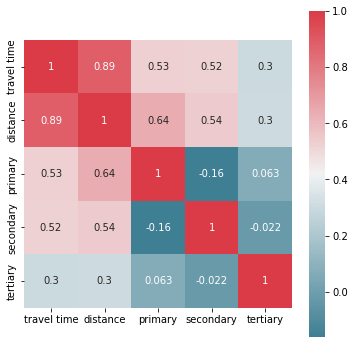

In [32]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(6,6))
corr = df_.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [33]:
x = np.array(df_.iloc[:,1:])
y = np.array(df_['travel time'])
x

array([[0.9924982 , 1.        , 0.        , 0.02682358],
       [0.34431452, 0.26983483, 0.        , 0.02682358],
       [0.0187128 , 0.        , 0.        , 0.02867443],
       ...,
       [0.35869106, 0.14549856, 0.        , 0.33714187],
       [0.01601933, 0.        , 0.        , 0.00998425],
       [0.74282641, 0.72495321, 0.02830376, 0.01840591]])

In [34]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
print(X_train.shape)
print(X_test.shape)
# X_train

(13304, 4)
(3327, 4)


In [36]:
# inputs: distance + roadtypes distance
model8_1_3 = nnmodel_(50, num_hlayers=1,Epoch=1000)
model8_1_3

Epoch 1/1000
416/416 [==============================] - 1s 958us/step - loss: 550625.6875 - mape: 98.9382 - rmse: 742.0416 - val_loss: 541287.0625 - val_mape: 96.9036 - val_rmse: 735.7221
Epoch 2/1000
416/416 [==============================] - 0s 750us/step - loss: 506635.7812 - mape: 92.9817 - rmse: 711.7835 - val_loss: 478953.8750 - val_mape: 88.4181 - val_rmse: 692.0649
Epoch 3/1000
416/416 [==============================] - 0s 732us/step - loss: 431991.7188 - mape: 82.1750 - rmse: 657.2607 - val_loss: 394085.0625 - val_mape: 75.8242 - val_rmse: 627.7620
Epoch 4/1000
416/416 [==============================] - 0s 725us/step - loss: 342858.4375 - mape: 67.9907 - rmse: 585.5411 - val_loss: 302292.2188 - val_mape: 60.9602 - val_rmse: 549.8111
Epoch 5/1000
416/416 [==============================] - 0s 756us/step - loss: 254143.7812 - mape: 53.5441 - rmse: 504.1267 - val_loss: 217448.7969 - val_mape: 47.4100 - val_rmse: 466.3141
Epoch 6/1000
416/416 [==============================] - 0s 7

Epoch 45/1000
416/416 [==============================] - 0s 730us/step - loss: 32582.7812 - mape: 24.9998 - rmse: 180.5070 - val_loss: 32429.8066 - val_mape: 24.5911 - val_rmse: 180.0828
Epoch 46/1000
416/416 [==============================] - 0s 785us/step - loss: 32565.7520 - mape: 25.0224 - rmse: 180.4598 - val_loss: 32449.8164 - val_mape: 24.3167 - val_rmse: 180.1383
Epoch 47/1000
416/416 [==============================] - 0s 757us/step - loss: 32541.3184 - mape: 24.9176 - rmse: 180.3921 - val_loss: 32399.1875 - val_mape: 24.4629 - val_rmse: 179.9977
Epoch 48/1000
416/416 [==============================] - 0s 786us/step - loss: 32518.9531 - mape: 25.0441 - rmse: 180.3301 - val_loss: 32447.2988 - val_mape: 24.1431 - val_rmse: 180.1313
Epoch 49/1000
416/416 [==============================] - 0s 736us/step - loss: 32503.8652 - mape: 24.8573 - rmse: 180.2883 - val_loss: 32370.2266 - val_mape: 24.3532 - val_rmse: 179.9173
Epoch 50/1000
416/416 [==============================] - 0s 723us

Epoch 89/1000
416/416 [==============================] - 0s 717us/step - loss: 31902.5312 - mape: 24.3580 - rmse: 178.6128 - val_loss: 31756.0957 - val_mape: 23.7737 - val_rmse: 178.2024
Epoch 90/1000
416/416 [==============================] - 0s 751us/step - loss: 31888.9648 - mape: 24.4163 - rmse: 178.5748 - val_loss: 31763.5703 - val_mape: 23.6856 - val_rmse: 178.2234
Epoch 91/1000
416/416 [==============================] - 0s 743us/step - loss: 31879.3848 - mape: 24.3715 - rmse: 178.5480 - val_loss: 31731.1172 - val_mape: 23.7514 - val_rmse: 178.1323
Epoch 92/1000
416/416 [==============================] - 0s 715us/step - loss: 31870.0430 - mape: 24.3320 - rmse: 178.5218 - val_loss: 31713.5703 - val_mape: 23.7924 - val_rmse: 178.0830
Epoch 93/1000
416/416 [==============================] - 0s 758us/step - loss: 31857.4434 - mape: 24.4066 - rmse: 178.4865 - val_loss: 31720.9883 - val_mape: 23.6782 - val_rmse: 178.1039
Epoch 94/1000
416/416 [==============================] - 0s 731us

Epoch 133/1000
416/416 [==============================] - 0s 717us/step - loss: 31530.9941 - mape: 24.0338 - rmse: 177.5697 - val_loss: 31389.6406 - val_mape: 23.3002 - val_rmse: 177.1712
Epoch 134/1000
416/416 [==============================] - 0s 711us/step - loss: 31524.9492 - mape: 23.9878 - rmse: 177.5527 - val_loss: 31379.5684 - val_mape: 23.3099 - val_rmse: 177.1428
Epoch 135/1000
416/416 [==============================] - 0s 743us/step - loss: 31519.4629 - mape: 24.0134 - rmse: 177.5372 - val_loss: 31367.7578 - val_mape: 23.3216 - val_rmse: 177.1095
Epoch 136/1000
416/416 [==============================] - 0s 764us/step - loss: 31513.9727 - mape: 23.9394 - rmse: 177.5218 - val_loss: 31369.3848 - val_mape: 23.2831 - val_rmse: 177.1140
Epoch 137/1000
416/416 [==============================] - 0s 736us/step - loss: 31505.3750 - mape: 23.9468 - rmse: 177.4975 - val_loss: 31326.2617 - val_mape: 23.5322 - val_rmse: 176.9923
Epoch 138/1000
416/416 [==============================] - 0s

Epoch 220/1000
416/416 [==============================] - 0s 750us/step - loss: 31244.0977 - mape: 23.5072 - rmse: 176.7600 - val_loss: 31083.1504 - val_mape: 22.9161 - val_rmse: 176.3041
Epoch 221/1000
416/416 [==============================] - 0s 735us/step - loss: 31238.8086 - mape: 23.6022 - rmse: 176.7450 - val_loss: 31117.3555 - val_mape: 22.7554 - val_rmse: 176.4011
Epoch 222/1000
416/416 [==============================] - 0s 746us/step - loss: 31237.8398 - mape: 23.5448 - rmse: 176.7423 - val_loss: 31072.0918 - val_mape: 22.9348 - val_rmse: 176.2728
Epoch 223/1000
416/416 [==============================] - 0s 697us/step - loss: 31234.2031 - mape: 23.5137 - rmse: 176.7320 - val_loss: 31052.5273 - val_mape: 23.1123 - val_rmse: 176.2173
Epoch 224/1000
416/416 [==============================] - 0s 752us/step - loss: 31241.2578 - mape: 23.6044 - rmse: 176.7520 - val_loss: 31068.7168 - val_mape: 22.9325 - val_rmse: 176.2632
Epoch 225/1000
416/416 [==============================] - 0s

Epoch 307/1000
416/416 [==============================] - 0s 724us/step - loss: 31170.5391 - mape: 23.3622 - rmse: 176.5518 - val_loss: 31011.8574 - val_mape: 22.7257 - val_rmse: 176.1018
Epoch 308/1000
416/416 [==============================] - 0s 725us/step - loss: 31171.4766 - mape: 23.3841 - rmse: 176.5545 - val_loss: 31022.5996 - val_mape: 22.6563 - val_rmse: 176.1323
Epoch 309/1000
416/416 [==============================] - 0s 724us/step - loss: 31171.6973 - mape: 23.3596 - rmse: 176.5551 - val_loss: 31026.4766 - val_mape: 22.6455 - val_rmse: 176.1433
Epoch 310/1000
416/416 [==============================] - 0s 737us/step - loss: 31170.2363 - mape: 23.3666 - rmse: 176.5509 - val_loss: 31006.4531 - val_mape: 22.7523 - val_rmse: 176.0865
Epoch 311/1000
416/416 [==============================] - 0s 796us/step - loss: 31170.7910 - mape: 23.3691 - rmse: 176.5525 - val_loss: 31002.5098 - val_mape: 22.7892 - val_rmse: 176.0753
Epoch 312/1000
416/416 [==============================] - 0s

Epoch 394/1000
416/416 [==============================] - 0s 719us/step - loss: 31161.1250 - mape: 23.2089 - rmse: 176.5251 - val_loss: 30987.9199 - val_mape: 22.7311 - val_rmse: 176.0339
Epoch 395/1000
416/416 [==============================] - 0s 767us/step - loss: 31157.9805 - mape: 23.3191 - rmse: 176.5162 - val_loss: 31022.4277 - val_mape: 22.5357 - val_rmse: 176.1319
Epoch 396/1000
416/416 [==============================] - 0s 723us/step - loss: 31154.9785 - mape: 23.3318 - rmse: 176.5077 - val_loss: 31023.4082 - val_mape: 22.5155 - val_rmse: 176.1346
Epoch 397/1000
416/416 [==============================] - 0s 712us/step - loss: 31161.2988 - mape: 23.2145 - rmse: 176.5256 - val_loss: 30993.4531 - val_mape: 22.6947 - val_rmse: 176.0496
Epoch 398/1000
416/416 [==============================] - 0s 745us/step - loss: 31161.7422 - mape: 23.3340 - rmse: 176.5269 - val_loss: 30998.7598 - val_mape: 22.6455 - val_rmse: 176.0647
Epoch 399/1000
416/416 [==============================] - 0s

Epoch 481/1000
416/416 [==============================] - 0s 709us/step - loss: 31158.6777 - mape: 23.2996 - rmse: 176.5182 - val_loss: 31035.3184 - val_mape: 22.4476 - val_rmse: 176.1684
Epoch 482/1000
416/416 [==============================] - 0s 723us/step - loss: 31161.2246 - mape: 23.2510 - rmse: 176.5254 - val_loss: 31016.0977 - val_mape: 22.5201 - val_rmse: 176.1139
Epoch 483/1000
416/416 [==============================] - 0s 684us/step - loss: 31159.1797 - mape: 23.2163 - rmse: 176.5196 - val_loss: 31013.2949 - val_mape: 22.5363 - val_rmse: 176.1059
Epoch 484/1000
416/416 [==============================] - 0s 715us/step - loss: 31158.1543 - mape: 23.2764 - rmse: 176.5167 - val_loss: 30997.2559 - val_mape: 22.6170 - val_rmse: 176.0604
Epoch 485/1000
416/416 [==============================] - 0s 746us/step - loss: 31156.2598 - mape: 23.2474 - rmse: 176.5114 - val_loss: 31006.8125 - val_mape: 22.5727 - val_rmse: 176.0875
Epoch 486/1000
416/416 [==============================] - 0s

Epoch 568/1000
416/416 [==============================] - 0s 770us/step - loss: 31159.5918 - mape: 23.2477 - rmse: 176.5208 - val_loss: 31003.6914 - val_mape: 22.5724 - val_rmse: 176.0786
Epoch 569/1000
416/416 [==============================] - 0s 754us/step - loss: 31159.3379 - mape: 23.2648 - rmse: 176.5201 - val_loss: 31017.5195 - val_mape: 22.5056 - val_rmse: 176.1179
Epoch 570/1000
416/416 [==============================] - 0s 709us/step - loss: 31155.9688 - mape: 23.2596 - rmse: 176.5105 - val_loss: 31028.7109 - val_mape: 22.4529 - val_rmse: 176.1497
Epoch 571/1000
416/416 [==============================] - 0s 726us/step - loss: 31157.7773 - mape: 23.2288 - rmse: 176.5157 - val_loss: 30997.7969 - val_mape: 22.6037 - val_rmse: 176.0619
Epoch 572/1000
416/416 [==============================] - 0s 722us/step - loss: 31155.9551 - mape: 23.2258 - rmse: 176.5105 - val_loss: 30990.5605 - val_mape: 22.6619 - val_rmse: 176.0414
Epoch 573/1000
416/416 [==============================] - 0s

Epoch 655/1000
416/416 [==============================] - 0s 763us/step - loss: 31157.7578 - mape: 23.2134 - rmse: 176.5156 - val_loss: 30983.0957 - val_mape: 22.7220 - val_rmse: 176.0202
Epoch 656/1000
416/416 [==============================] - 0s 733us/step - loss: 31158.2305 - mape: 23.2523 - rmse: 176.5169 - val_loss: 30983.9043 - val_mape: 22.7005 - val_rmse: 176.0225
Epoch 657/1000
416/416 [==============================] - 0s 793us/step - loss: 31156.5723 - mape: 23.3058 - rmse: 176.5122 - val_loss: 31028.6602 - val_mape: 22.4328 - val_rmse: 176.1495
Epoch 658/1000
416/416 [==============================] - 0s 688us/step - loss: 31153.3477 - mape: 23.2530 - rmse: 176.5031 - val_loss: 31035.2051 - val_mape: 22.3990 - val_rmse: 176.1681
Epoch 659/1000
416/416 [==============================] - 0s 748us/step - loss: 31161.9746 - mape: 23.1846 - rmse: 176.5275 - val_loss: 31003.3359 - val_mape: 22.5583 - val_rmse: 176.0776
Epoch 660/1000
416/416 [==============================] - 0s

Epoch 742/1000
416/416 [==============================] - 0s 723us/step - loss: 31154.3262 - mape: 23.2690 - rmse: 176.5059 - val_loss: 31018.7598 - val_mape: 22.4847 - val_rmse: 176.1214
Epoch 743/1000
416/416 [==============================] - 0s 686us/step - loss: 31158.6934 - mape: 23.2186 - rmse: 176.5182 - val_loss: 31007.6855 - val_mape: 22.5324 - val_rmse: 176.0900
Epoch 744/1000
416/416 [==============================] - 0s 724us/step - loss: 31157.5137 - mape: 23.2065 - rmse: 176.5149 - val_loss: 30987.1133 - val_mape: 22.6750 - val_rmse: 176.0316
Epoch 745/1000
416/416 [==============================] - 0s 730us/step - loss: 31163.5312 - mape: 23.2384 - rmse: 176.5320 - val_loss: 30989.3789 - val_mape: 22.6492 - val_rmse: 176.0380
Epoch 746/1000
416/416 [==============================] - 0s 727us/step - loss: 31155.6738 - mape: 23.2754 - rmse: 176.5097 - val_loss: 31003.9336 - val_mape: 22.5428 - val_rmse: 176.0793
Epoch 747/1000
416/416 [==============================] - 0s

Epoch 829/1000
416/416 [==============================] - 0s 724us/step - loss: 31157.1836 - mape: 23.2383 - rmse: 176.5140 - val_loss: 31003.5879 - val_mape: 22.5463 - val_rmse: 176.0784
Epoch 830/1000
416/416 [==============================] - 0s 712us/step - loss: 31157.9766 - mape: 23.1915 - rmse: 176.5162 - val_loss: 30997.3398 - val_mape: 22.5833 - val_rmse: 176.0606
Epoch 831/1000
416/416 [==============================] - 0s 716us/step - loss: 31156.1758 - mape: 23.2349 - rmse: 176.5111 - val_loss: 30992.3223 - val_mape: 22.6228 - val_rmse: 176.0464
Epoch 832/1000
416/416 [==============================] - 0s 732us/step - loss: 31160.9570 - mape: 23.2246 - rmse: 176.5247 - val_loss: 31002.6133 - val_mape: 22.5835 - val_rmse: 176.0756
Epoch 833/1000
416/416 [==============================] - 0s 750us/step - loss: 31156.4648 - mape: 23.2681 - rmse: 176.5119 - val_loss: 31014.6250 - val_mape: 22.5148 - val_rmse: 176.1097
Epoch 834/1000
416/416 [==============================] - 0s

Epoch 916/1000
416/416 [==============================] - 0s 705us/step - loss: 31157.8613 - mape: 23.2667 - rmse: 176.5159 - val_loss: 30996.1289 - val_mape: 22.5975 - val_rmse: 176.0572
Epoch 917/1000
416/416 [==============================] - 0s 731us/step - loss: 31159.8301 - mape: 23.2015 - rmse: 176.5215 - val_loss: 30993.6465 - val_mape: 22.6247 - val_rmse: 176.0501
Epoch 918/1000
416/416 [==============================] - 0s 705us/step - loss: 31159.3730 - mape: 23.2815 - rmse: 176.5202 - val_loss: 31012.1621 - val_mape: 22.5135 - val_rmse: 176.1027
Epoch 919/1000
416/416 [==============================] - 0s 726us/step - loss: 31160.3613 - mape: 23.2292 - rmse: 176.5230 - val_loss: 31013.5098 - val_mape: 22.5183 - val_rmse: 176.1065
Epoch 920/1000
416/416 [==============================] - 0s 754us/step - loss: 31157.8633 - mape: 23.2086 - rmse: 176.5159 - val_loss: 30994.7441 - val_mape: 22.6303 - val_rmse: 176.0532
Epoch 921/1000
416/416 [==============================] - 0s

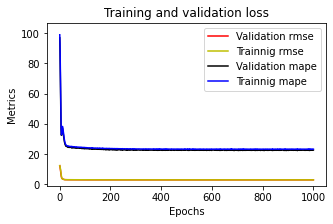

In [37]:
plotme(model8_1_3)

In [38]:
# inputs: distance + roadtypes distance
model8_1_5 = nnmodel_(100, num_hlayers=1,Epoch=1000)
model8_1_5

Epoch 1/1000
416/416 [==============================] - 1s 883us/step - loss: 542300.6250 - mape: 97.8384 - rmse: 736.4106 - val_loss: 515886.5938 - val_mape: 93.5706 - val_rmse: 718.2524
Epoch 2/1000
416/416 [==============================] - 0s 754us/step - loss: 450894.2500 - mape: 85.0995 - rmse: 671.4866 - val_loss: 389626.5000 - val_mape: 75.2683 - val_rmse: 624.2007
Epoch 3/1000
416/416 [==============================] - 0s 762us/step - loss: 311929.9375 - mape: 63.1523 - rmse: 558.5069 - val_loss: 245866.5781 - val_mape: 51.9415 - val_rmse: 495.8494
Epoch 4/1000
416/416 [==============================] - 0s 729us/step - loss: 182356.4219 - mape: 42.7933 - rmse: 427.0321 - val_loss: 135128.5625 - val_mape: 35.7418 - val_rmse: 367.5984
Epoch 5/1000
416/416 [==============================] - 0s 717us/step - loss: 98508.0859 - mape: 33.1390 - rmse: 313.8600 - val_loss: 75883.2656 - val_mape: 31.9820 - val_rmse: 275.4692
Epoch 6/1000
416/416 [==============================] - 0s 759

Epoch 45/1000
416/416 [==============================] - 0s 771us/step - loss: 32222.1055 - mape: 24.7120 - rmse: 179.5052 - val_loss: 32083.5039 - val_mape: 24.0349 - val_rmse: 179.1187
Epoch 46/1000
416/416 [==============================] - 0s 765us/step - loss: 32198.9629 - mape: 24.6445 - rmse: 179.4407 - val_loss: 32037.2188 - val_mape: 24.1444 - val_rmse: 178.9894
Epoch 47/1000
416/416 [==============================] - 0s 768us/step - loss: 32173.4434 - mape: 24.6641 - rmse: 179.3696 - val_loss: 32030.4668 - val_mape: 24.0299 - val_rmse: 178.9706
Epoch 48/1000
416/416 [==============================] - 0s 785us/step - loss: 32148.5117 - mape: 24.6265 - rmse: 179.3001 - val_loss: 32011.9512 - val_mape: 23.9657 - val_rmse: 178.9188
Epoch 49/1000
416/416 [==============================] - 0s 758us/step - loss: 32125.9219 - mape: 24.6432 - rmse: 179.2371 - val_loss: 31984.3359 - val_mape: 23.9577 - val_rmse: 178.8416
Epoch 50/1000
416/416 [==============================] - 0s 746us

Epoch 89/1000
416/416 [==============================] - 0s 738us/step - loss: 31535.8555 - mape: 24.0982 - rmse: 177.5834 - val_loss: 31428.6211 - val_mape: 23.1908 - val_rmse: 177.2812
Epoch 90/1000
416/416 [==============================] - 0s 709us/step - loss: 31536.7070 - mape: 23.9615 - rmse: 177.5858 - val_loss: 31366.3379 - val_mape: 23.3836 - val_rmse: 177.1054
Epoch 91/1000
416/416 [==============================] - 0s 779us/step - loss: 31524.9551 - mape: 23.9468 - rmse: 177.5527 - val_loss: 31333.6562 - val_mape: 23.5896 - val_rmse: 177.0132
Epoch 92/1000
416/416 [==============================] - 0s 791us/step - loss: 31516.6836 - mape: 24.0445 - rmse: 177.5294 - val_loss: 31358.8340 - val_mape: 23.3028 - val_rmse: 177.0843
Epoch 93/1000
416/416 [==============================] - 0s 743us/step - loss: 31504.0801 - mape: 23.9037 - rmse: 177.4939 - val_loss: 31316.3027 - val_mape: 23.5543 - val_rmse: 176.9641
Epoch 94/1000
416/416 [==============================] - 0s 720us

Epoch 133/1000
416/416 [==============================] - 0s 757us/step - loss: 31274.6914 - mape: 23.7403 - rmse: 176.8465 - val_loss: 31169.2773 - val_mape: 22.7916 - val_rmse: 176.5482
Epoch 134/1000
416/416 [==============================] - 0s 737us/step - loss: 31274.6465 - mape: 23.6073 - rmse: 176.8464 - val_loss: 31113.2500 - val_mape: 23.0144 - val_rmse: 176.3895
Epoch 135/1000
416/416 [==============================] - 0s 735us/step - loss: 31279.5254 - mape: 23.6644 - rmse: 176.8602 - val_loss: 31114.3828 - val_mape: 22.9639 - val_rmse: 176.3927
Epoch 136/1000
416/416 [==============================] - 0s 749us/step - loss: 31274.2871 - mape: 23.6002 - rmse: 176.8454 - val_loss: 31107.8086 - val_mape: 22.9855 - val_rmse: 176.3741
Epoch 137/1000
416/416 [==============================] - 0s 755us/step - loss: 31273.1348 - mape: 23.5987 - rmse: 176.8421 - val_loss: 31108.7891 - val_mape: 22.9592 - val_rmse: 176.3768
Epoch 138/1000
416/416 [==============================] - 0s

Epoch 220/1000
416/416 [==============================] - 0s 740us/step - loss: 31177.8359 - mape: 23.3467 - rmse: 176.5725 - val_loss: 31059.7344 - val_mape: 22.4673 - val_rmse: 176.2377
Epoch 221/1000
416/416 [==============================] - 0s 742us/step - loss: 31158.8359 - mape: 23.2873 - rmse: 176.5187 - val_loss: 31022.9297 - val_mape: 22.6230 - val_rmse: 176.1333
Epoch 222/1000
416/416 [==============================] - 0s 768us/step - loss: 31172.4375 - mape: 23.3767 - rmse: 176.5572 - val_loss: 31010.7246 - val_mape: 22.6770 - val_rmse: 176.0986
Epoch 223/1000
416/416 [==============================] - 0s 744us/step - loss: 31171.0664 - mape: 23.3127 - rmse: 176.5533 - val_loss: 30985.5801 - val_mape: 22.9208 - val_rmse: 176.0272
Epoch 224/1000
416/416 [==============================] - 0s 736us/step - loss: 31147.2930 - mape: 23.4585 - rmse: 176.4860 - val_loss: 31136.2773 - val_mape: 22.2496 - val_rmse: 176.4547
Epoch 225/1000
416/416 [==============================] - 0s

Epoch 307/1000
416/416 [==============================] - 0s 769us/step - loss: 31162.5742 - mape: 23.2323 - rmse: 176.5293 - val_loss: 30984.4336 - val_mape: 22.7038 - val_rmse: 176.0240
Epoch 308/1000
416/416 [==============================] - 0s 769us/step - loss: 31162.0762 - mape: 23.2500 - rmse: 176.5278 - val_loss: 30980.1992 - val_mape: 22.7887 - val_rmse: 176.0119
Epoch 309/1000
416/416 [==============================] - 0s 724us/step - loss: 31157.7891 - mape: 23.3443 - rmse: 176.5157 - val_loss: 31077.6504 - val_mape: 22.3025 - val_rmse: 176.2885
Epoch 310/1000
416/416 [==============================] - 0s 757us/step - loss: 31165.0059 - mape: 23.2316 - rmse: 176.5361 - val_loss: 31031.0781 - val_mape: 22.4670 - val_rmse: 176.1564
Epoch 311/1000
416/416 [==============================] - 0s 757us/step - loss: 31158.3379 - mape: 23.2091 - rmse: 176.5172 - val_loss: 30982.4004 - val_mape: 22.8031 - val_rmse: 176.0182
Epoch 312/1000
416/416 [==============================] - 0s

Epoch 394/1000
416/416 [==============================] - 0s 745us/step - loss: 31163.4883 - mape: 23.2929 - rmse: 176.5318 - val_loss: 30993.1680 - val_mape: 22.6104 - val_rmse: 176.0488
Epoch 395/1000
416/416 [==============================] - 0s 771us/step - loss: 31162.0684 - mape: 23.1800 - rmse: 176.5278 - val_loss: 30978.9453 - val_mape: 22.7834 - val_rmse: 176.0084
Epoch 396/1000
416/416 [==============================] - 0s 756us/step - loss: 31167.7910 - mape: 23.3072 - rmse: 176.5440 - val_loss: 30987.6641 - val_mape: 22.6539 - val_rmse: 176.0331
Epoch 397/1000
416/416 [==============================] - 0s 737us/step - loss: 31159.1758 - mape: 23.2779 - rmse: 176.5196 - val_loss: 31048.4141 - val_mape: 22.3660 - val_rmse: 176.2056
Epoch 398/1000
416/416 [==============================] - 0s 736us/step - loss: 31144.4238 - mape: 23.1755 - rmse: 176.4778 - val_loss: 30980.0488 - val_mape: 22.7472 - val_rmse: 176.0115
Epoch 399/1000
416/416 [==============================] - 0s

Epoch 481/1000
416/416 [==============================] - 0s 743us/step - loss: 31164.8066 - mape: 23.2717 - rmse: 176.5356 - val_loss: 30999.6875 - val_mape: 22.6021 - val_rmse: 176.0673
Epoch 482/1000
416/416 [==============================] - 0s 758us/step - loss: 31163.1562 - mape: 23.2621 - rmse: 176.5309 - val_loss: 31007.2070 - val_mape: 22.5607 - val_rmse: 176.0886
Epoch 483/1000
416/416 [==============================] - 0s 770us/step - loss: 31163.6445 - mape: 23.2597 - rmse: 176.5323 - val_loss: 31004.1836 - val_mape: 22.5511 - val_rmse: 176.0800
Epoch 484/1000
416/416 [==============================] - 0s 793us/step - loss: 31164.0020 - mape: 23.2334 - rmse: 176.5333 - val_loss: 31019.6953 - val_mape: 22.4729 - val_rmse: 176.1241
Epoch 485/1000
416/416 [==============================] - 0s 749us/step - loss: 31161.9844 - mape: 23.2247 - rmse: 176.5276 - val_loss: 31017.4941 - val_mape: 22.5035 - val_rmse: 176.1178
Epoch 486/1000
416/416 [==============================] - 0s

Epoch 568/1000
416/416 [==============================] - 0s 767us/step - loss: 31156.9043 - mape: 23.2626 - rmse: 176.5132 - val_loss: 30988.1543 - val_mape: 22.6469 - val_rmse: 176.0345
Epoch 569/1000
416/416 [==============================] - 0s 755us/step - loss: 31156.9219 - mape: 23.2139 - rmse: 176.5132 - val_loss: 30987.3809 - val_mape: 22.6862 - val_rmse: 176.0323
Epoch 570/1000
416/416 [==============================] - 0s 720us/step - loss: 31164.2773 - mape: 23.2996 - rmse: 176.5341 - val_loss: 31016.1582 - val_mape: 22.4846 - val_rmse: 176.1140
Epoch 571/1000
416/416 [==============================] - 0s 727us/step - loss: 31160.9062 - mape: 23.2348 - rmse: 176.5245 - val_loss: 30999.2188 - val_mape: 22.5646 - val_rmse: 176.0659
Epoch 572/1000
416/416 [==============================] - 0s 758us/step - loss: 31157.5723 - mape: 23.1667 - rmse: 176.5151 - val_loss: 30982.9453 - val_mape: 22.8039 - val_rmse: 176.0197
Epoch 573/1000
416/416 [==============================] - 0s

Epoch 655/1000
416/416 [==============================] - 0s 765us/step - loss: 31163.2598 - mape: 23.2727 - rmse: 176.5312 - val_loss: 31018.1836 - val_mape: 22.5000 - val_rmse: 176.1198
Epoch 656/1000
416/416 [==============================] - 0s 770us/step - loss: 31160.7461 - mape: 23.2373 - rmse: 176.5241 - val_loss: 31042.0996 - val_mape: 22.4255 - val_rmse: 176.1877
Epoch 657/1000
416/416 [==============================] - 0s 762us/step - loss: 31169.3203 - mape: 23.2386 - rmse: 176.5484 - val_loss: 30998.1777 - val_mape: 22.5960 - val_rmse: 176.0630
Epoch 658/1000
416/416 [==============================] - 0s 767us/step - loss: 31162.4336 - mape: 23.1904 - rmse: 176.5288 - val_loss: 30985.8242 - val_mape: 22.6939 - val_rmse: 176.0279
Epoch 659/1000
416/416 [==============================] - 0s 727us/step - loss: 31163.6699 - mape: 23.2861 - rmse: 176.5323 - val_loss: 31005.1875 - val_mape: 22.5680 - val_rmse: 176.0829
Epoch 660/1000
416/416 [==============================] - 0s

Epoch 742/1000
416/416 [==============================] - 0s 743us/step - loss: 31163.9258 - mape: 23.2721 - rmse: 176.5331 - val_loss: 31024.6035 - val_mape: 22.4355 - val_rmse: 176.1380
Epoch 743/1000
416/416 [==============================] - 0s 785us/step - loss: 31160.8340 - mape: 23.1873 - rmse: 176.5243 - val_loss: 31017.8965 - val_mape: 22.5107 - val_rmse: 176.1190
Epoch 744/1000
416/416 [==============================] - 0s 742us/step - loss: 31160.3770 - mape: 23.2614 - rmse: 176.5230 - val_loss: 31015.6348 - val_mape: 22.4680 - val_rmse: 176.1126
Epoch 745/1000
416/416 [==============================] - 0s 725us/step - loss: 31163.5703 - mape: 23.2067 - rmse: 176.5321 - val_loss: 30987.8086 - val_mape: 22.6796 - val_rmse: 176.0335
Epoch 746/1000
416/416 [==============================] - 0s 730us/step - loss: 31152.9668 - mape: 23.2804 - rmse: 176.5020 - val_loss: 31072.5605 - val_mape: 22.3008 - val_rmse: 176.2741
Epoch 747/1000
416/416 [==============================] - 0s

Epoch 829/1000
416/416 [==============================] - 0s 752us/step - loss: 31162.3594 - mape: 23.2638 - rmse: 176.5286 - val_loss: 31070.8633 - val_mape: 22.3043 - val_rmse: 176.2693
Epoch 830/1000
416/416 [==============================] - 0s 750us/step - loss: 31169.4453 - mape: 23.1537 - rmse: 176.5487 - val_loss: 30999.5605 - val_mape: 22.6008 - val_rmse: 176.0669
Epoch 831/1000
416/416 [==============================] - 0s 735us/step - loss: 31164.6855 - mape: 23.2643 - rmse: 176.5352 - val_loss: 31002.3301 - val_mape: 22.5570 - val_rmse: 176.0748
Epoch 832/1000
416/416 [==============================] - 0s 768us/step - loss: 31164.1680 - mape: 23.2752 - rmse: 176.5338 - val_loss: 30997.3770 - val_mape: 22.5840 - val_rmse: 176.0607
Epoch 833/1000
416/416 [==============================] - 0s 757us/step - loss: 31164.1172 - mape: 23.2381 - rmse: 176.5336 - val_loss: 31021.7148 - val_mape: 22.4611 - val_rmse: 176.1298
Epoch 834/1000
416/416 [==============================] - 0s

Epoch 916/1000
416/416 [==============================] - 0s 737us/step - loss: 31163.1250 - mape: 23.2603 - rmse: 176.5308 - val_loss: 30996.5215 - val_mape: 22.6039 - val_rmse: 176.0583
Epoch 917/1000
416/416 [==============================] - 0s 722us/step - loss: 31167.8770 - mape: 23.2269 - rmse: 176.5443 - val_loss: 30994.7148 - val_mape: 22.6017 - val_rmse: 176.0532
Epoch 918/1000
416/416 [==============================] - 0s 772us/step - loss: 31161.9180 - mape: 23.2372 - rmse: 176.5274 - val_loss: 31004.8574 - val_mape: 22.5633 - val_rmse: 176.0820
Epoch 919/1000
416/416 [==============================] - 0s 771us/step - loss: 31159.8008 - mape: 23.3104 - rmse: 176.5214 - val_loss: 31058.6875 - val_mape: 22.3304 - val_rmse: 176.2348
Epoch 920/1000
416/416 [==============================] - 0s 775us/step - loss: 31169.5703 - mape: 23.1406 - rmse: 176.5491 - val_loss: 31004.6816 - val_mape: 22.5679 - val_rmse: 176.0815
Epoch 921/1000
416/416 [==============================] - 0s

In [39]:
# inputs: distance + roadtypes distance
model8_1_1 = nnmodel_(100,50, num_hlayers=2,Epoch=1000)
model8_1_1

Epoch 1/1000
416/416 [==============================] - 1s 901us/step - loss: 299301.6562 - mape: 64.9224 - rmse: 547.0847 - val_loss: 48147.2305 - val_mape: 38.4462 - val_rmse: 219.4248
Epoch 2/1000
416/416 [==============================] - 0s 836us/step - loss: 40999.1445 - mape: 35.4420 - rmse: 202.4825 - val_loss: 36574.5156 - val_mape: 30.2448 - val_rmse: 191.2446
Epoch 3/1000
416/416 [==============================] - 0s 786us/step - loss: 34430.6680 - mape: 28.6245 - rmse: 185.5550 - val_loss: 33375.9609 - val_mape: 26.6379 - val_rmse: 182.6909
Epoch 4/1000
416/416 [==============================] - 0s 768us/step - loss: 33198.0078 - mape: 26.0731 - rmse: 182.2032 - val_loss: 32936.1406 - val_mape: 24.9462 - val_rmse: 181.4832
Epoch 5/1000
416/416 [==============================] - 0s 808us/step - loss: 32983.6445 - mape: 25.4111 - rmse: 181.6140 - val_loss: 32757.4609 - val_mape: 24.5319 - val_rmse: 180.9902
Epoch 6/1000
416/416 [==============================] - 0s 801us/step

Epoch 45/1000
416/416 [==============================] - 0s 761us/step - loss: 31267.7363 - mape: 23.3342 - rmse: 176.8269 - val_loss: 31084.1582 - val_mape: 22.4527 - val_rmse: 176.3070
Epoch 46/1000
416/416 [==============================] - 0s 819us/step - loss: 31249.0430 - mape: 23.2915 - rmse: 176.7740 - val_loss: 30989.7734 - val_mape: 22.8449 - val_rmse: 176.0391
Epoch 47/1000
416/416 [==============================] - 0s 783us/step - loss: 31224.5215 - mape: 23.3643 - rmse: 176.7046 - val_loss: 30974.4277 - val_mape: 22.9004 - val_rmse: 175.9955
Epoch 48/1000
416/416 [==============================] - 0s 772us/step - loss: 31237.1602 - mape: 23.2686 - rmse: 176.7404 - val_loss: 31085.0000 - val_mape: 22.5452 - val_rmse: 176.3094
Epoch 49/1000
416/416 [==============================] - 0s 763us/step - loss: 31252.8223 - mape: 23.3596 - rmse: 176.7847 - val_loss: 31123.4297 - val_mape: 22.3490 - val_rmse: 176.4183
Epoch 50/1000
416/416 [==============================] - 0s 787us

Epoch 89/1000
416/416 [==============================] - 0s 835us/step - loss: 31222.2031 - mape: 23.2510 - rmse: 176.6981 - val_loss: 31372.4453 - val_mape: 21.8034 - val_rmse: 177.1227
Epoch 90/1000
416/416 [==============================] - 0s 823us/step - loss: 31248.7129 - mape: 23.2643 - rmse: 176.7731 - val_loss: 31049.4277 - val_mape: 22.3329 - val_rmse: 176.2085
Epoch 91/1000
416/416 [==============================] - 0s 777us/step - loss: 31211.0762 - mape: 23.1791 - rmse: 176.6666 - val_loss: 31102.7285 - val_mape: 22.5056 - val_rmse: 176.3596
Epoch 92/1000
416/416 [==============================] - 0s 834us/step - loss: 31231.6270 - mape: 23.3151 - rmse: 176.7247 - val_loss: 30986.8105 - val_mape: 22.8782 - val_rmse: 176.0307
Epoch 93/1000
416/416 [==============================] - 0s 764us/step - loss: 31222.3926 - mape: 23.2798 - rmse: 176.6986 - val_loss: 31104.9883 - val_mape: 22.1743 - val_rmse: 176.3661
Epoch 94/1000
416/416 [==============================] - 0s 801us

Epoch 133/1000
416/416 [==============================] - 0s 789us/step - loss: 31205.0996 - mape: 23.2205 - rmse: 176.6497 - val_loss: 31076.7246 - val_mape: 22.4611 - val_rmse: 176.2859
Epoch 134/1000
416/416 [==============================] - 0s 810us/step - loss: 31227.8672 - mape: 23.2712 - rmse: 176.7141 - val_loss: 30986.6348 - val_mape: 23.0491 - val_rmse: 176.0302
Epoch 135/1000
416/416 [==============================] - 0s 779us/step - loss: 31245.2910 - mape: 23.3263 - rmse: 176.7634 - val_loss: 31034.4473 - val_mape: 22.3826 - val_rmse: 176.1660
Epoch 136/1000
416/416 [==============================] - 0s 784us/step - loss: 31245.3535 - mape: 23.2185 - rmse: 176.7635 - val_loss: 30989.2109 - val_mape: 22.6599 - val_rmse: 176.0375
Epoch 137/1000
416/416 [==============================] - 0s 795us/step - loss: 31281.2871 - mape: 23.3948 - rmse: 176.8652 - val_loss: 30998.0664 - val_mape: 22.3283 - val_rmse: 176.0627
Epoch 138/1000
416/416 [==============================] - 0s

Epoch 220/1000
416/416 [==============================] - 0s 805us/step - loss: 31217.5684 - mape: 23.2148 - rmse: 176.6849 - val_loss: 30995.4082 - val_mape: 22.7084 - val_rmse: 176.0551
Epoch 221/1000
416/416 [==============================] - 0s 779us/step - loss: 31240.6523 - mape: 23.2516 - rmse: 176.7503 - val_loss: 30973.7207 - val_mape: 22.7253 - val_rmse: 175.9935
Epoch 222/1000
416/416 [==============================] - 0s 780us/step - loss: 31186.2090 - mape: 23.2679 - rmse: 176.5962 - val_loss: 31272.9922 - val_mape: 21.9510 - val_rmse: 176.8417
Epoch 223/1000
416/416 [==============================] - 0s 762us/step - loss: 31233.8359 - mape: 23.2069 - rmse: 176.7310 - val_loss: 31014.4609 - val_mape: 23.2586 - val_rmse: 176.1092
Epoch 224/1000
416/416 [==============================] - 0s 779us/step - loss: 31226.0195 - mape: 23.3479 - rmse: 176.7089 - val_loss: 30991.6445 - val_mape: 22.6943 - val_rmse: 176.0444
Epoch 225/1000
416/416 [==============================] - 0s

Epoch 307/1000
416/416 [==============================] - 0s 783us/step - loss: 31222.5801 - mape: 23.2613 - rmse: 176.6991 - val_loss: 31002.7324 - val_mape: 22.5636 - val_rmse: 176.0759
Epoch 308/1000
416/416 [==============================] - 0s 808us/step - loss: 31259.3027 - mape: 23.2852 - rmse: 176.8030 - val_loss: 31050.5879 - val_mape: 22.3576 - val_rmse: 176.2118
Epoch 309/1000
416/416 [==============================] - 0s 788us/step - loss: 31212.6504 - mape: 23.1922 - rmse: 176.6710 - val_loss: 31444.4199 - val_mape: 21.9179 - val_rmse: 177.3257
Epoch 310/1000
416/416 [==============================] - 0s 807us/step - loss: 31192.2871 - mape: 23.3783 - rmse: 176.6134 - val_loss: 31046.5762 - val_mape: 22.2414 - val_rmse: 176.2004
Epoch 311/1000
416/416 [==============================] - 0s 826us/step - loss: 31214.3496 - mape: 23.2963 - rmse: 176.6758 - val_loss: 30988.8594 - val_mape: 22.3874 - val_rmse: 176.0365
Epoch 312/1000
416/416 [==============================] - 0s

Epoch 394/1000
416/416 [==============================] - 0s 786us/step - loss: 31221.1738 - mape: 23.2631 - rmse: 176.6951 - val_loss: 30999.8105 - val_mape: 23.0198 - val_rmse: 176.0676
Epoch 395/1000
416/416 [==============================] - 0s 783us/step - loss: 31258.0957 - mape: 23.2944 - rmse: 176.7996 - val_loss: 30998.1699 - val_mape: 22.6570 - val_rmse: 176.0630
Epoch 396/1000
416/416 [==============================] - 0s 769us/step - loss: 31203.5840 - mape: 23.2964 - rmse: 176.6454 - val_loss: 31007.0430 - val_mape: 22.3931 - val_rmse: 176.0882
Epoch 397/1000
416/416 [==============================] - 0s 803us/step - loss: 31264.1523 - mape: 23.2882 - rmse: 176.8167 - val_loss: 31198.5723 - val_mape: 21.9637 - val_rmse: 176.6312
Epoch 398/1000
416/416 [==============================] - 0s 769us/step - loss: 31204.3984 - mape: 23.1376 - rmse: 176.6477 - val_loss: 31041.1035 - val_mape: 22.4285 - val_rmse: 176.1849
Epoch 399/1000
416/416 [==============================] - 0s

Epoch 481/1000
416/416 [==============================] - 0s 794us/step - loss: 31240.7129 - mape: 23.2704 - rmse: 176.7504 - val_loss: 31211.1230 - val_mape: 22.1052 - val_rmse: 176.6667
Epoch 482/1000
416/416 [==============================] - 0s 823us/step - loss: 31233.3418 - mape: 23.2810 - rmse: 176.7296 - val_loss: 31002.7441 - val_mape: 22.6486 - val_rmse: 176.0760
Epoch 483/1000
416/416 [==============================] - 0s 794us/step - loss: 31216.1484 - mape: 23.3153 - rmse: 176.6809 - val_loss: 31243.0176 - val_mape: 21.8741 - val_rmse: 176.7569
Epoch 484/1000
416/416 [==============================] - 0s 794us/step - loss: 31243.6543 - mape: 23.2302 - rmse: 176.7587 - val_loss: 30981.8848 - val_mape: 22.8031 - val_rmse: 176.0167
Epoch 485/1000
416/416 [==============================] - 0s 822us/step - loss: 31258.1426 - mape: 23.2703 - rmse: 176.7997 - val_loss: 31004.7207 - val_mape: 23.1972 - val_rmse: 176.0816
Epoch 486/1000
416/416 [==============================] - 0s

Epoch 568/1000
416/416 [==============================] - 0s 804us/step - loss: 31215.7168 - mape: 23.2134 - rmse: 176.6797 - val_loss: 31535.5137 - val_mape: 21.7839 - val_rmse: 177.5824
Epoch 569/1000
416/416 [==============================] - 0s 765us/step - loss: 31273.8594 - mape: 23.3013 - rmse: 176.8442 - val_loss: 31298.5508 - val_mape: 21.8796 - val_rmse: 176.9140
Epoch 570/1000
416/416 [==============================] - 0s 798us/step - loss: 31243.4570 - mape: 23.2125 - rmse: 176.7582 - val_loss: 31095.2031 - val_mape: 22.3562 - val_rmse: 176.3383
Epoch 571/1000
416/416 [==============================] - 0s 801us/step - loss: 31262.2324 - mape: 23.2497 - rmse: 176.8113 - val_loss: 31011.5664 - val_mape: 23.1743 - val_rmse: 176.1010
Epoch 572/1000
416/416 [==============================] - 0s 772us/step - loss: 31262.0176 - mape: 23.2264 - rmse: 176.8107 - val_loss: 31149.4160 - val_mape: 22.2336 - val_rmse: 176.4920
Epoch 573/1000
416/416 [==============================] - 0s

Epoch 655/1000
416/416 [==============================] - 0s 764us/step - loss: 31213.0352 - mape: 23.3270 - rmse: 176.6721 - val_loss: 30981.1699 - val_mape: 22.4325 - val_rmse: 176.0147
Epoch 656/1000
416/416 [==============================] - 0s 765us/step - loss: 31267.1055 - mape: 23.1193 - rmse: 176.8251 - val_loss: 30978.6523 - val_mape: 22.8113 - val_rmse: 176.0075
Epoch 657/1000
416/416 [==============================] - 0s 758us/step - loss: 31224.1367 - mape: 23.3925 - rmse: 176.7035 - val_loss: 32141.5547 - val_mape: 21.1439 - val_rmse: 179.2807
Epoch 658/1000
416/416 [==============================] - 0s 781us/step - loss: 31247.4180 - mape: 23.1423 - rmse: 176.7694 - val_loss: 31207.2988 - val_mape: 23.7591 - val_rmse: 176.6559
Epoch 659/1000
416/416 [==============================] - 0s 800us/step - loss: 31235.1484 - mape: 23.2185 - rmse: 176.7347 - val_loss: 31003.0352 - val_mape: 22.7959 - val_rmse: 176.0768
Epoch 660/1000
416/416 [==============================] - 0s

Epoch 742/1000
416/416 [==============================] - 0s 808us/step - loss: 31229.6289 - mape: 23.3022 - rmse: 176.7191 - val_loss: 31004.2012 - val_mape: 23.1339 - val_rmse: 176.0801
Epoch 743/1000
416/416 [==============================] - 0s 805us/step - loss: 31229.5566 - mape: 23.2867 - rmse: 176.7189 - val_loss: 31205.3984 - val_mape: 21.9915 - val_rmse: 176.6505
Epoch 744/1000
416/416 [==============================] - 0s 783us/step - loss: 31254.7812 - mape: 23.2050 - rmse: 176.7902 - val_loss: 30998.5605 - val_mape: 22.7002 - val_rmse: 176.0641
Epoch 745/1000
416/416 [==============================] - 0s 844us/step - loss: 31254.5332 - mape: 23.2558 - rmse: 176.7895 - val_loss: 31044.7832 - val_mape: 22.6252 - val_rmse: 176.1953
Epoch 746/1000
416/416 [==============================] - 0s 757us/step - loss: 31246.9531 - mape: 23.3181 - rmse: 176.7681 - val_loss: 31116.3574 - val_mape: 22.3359 - val_rmse: 176.3983
Epoch 747/1000
416/416 [==============================] - 0s

Epoch 829/1000
416/416 [==============================] - 0s 782us/step - loss: 31229.0527 - mape: 23.2473 - rmse: 176.7174 - val_loss: 30979.2148 - val_mape: 22.9524 - val_rmse: 176.0091
Epoch 830/1000
416/416 [==============================] - 0s 795us/step - loss: 31196.5156 - mape: 23.3093 - rmse: 176.6254 - val_loss: 30983.7930 - val_mape: 23.0355 - val_rmse: 176.0221
Epoch 831/1000
416/416 [==============================] - 0s 782us/step - loss: 31258.0508 - mape: 23.2143 - rmse: 176.7995 - val_loss: 30997.5098 - val_mape: 22.6419 - val_rmse: 176.0611
Epoch 832/1000
416/416 [==============================] - 0s 806us/step - loss: 31211.5742 - mape: 23.2723 - rmse: 176.6680 - val_loss: 30985.4863 - val_mape: 22.6428 - val_rmse: 176.0269
Epoch 833/1000
416/416 [==============================] - 0s 764us/step - loss: 31213.9414 - mape: 23.2156 - rmse: 176.6747 - val_loss: 31153.4023 - val_mape: 22.2406 - val_rmse: 176.5033
Epoch 834/1000
416/416 [==============================] - 0s

Epoch 916/1000
416/416 [==============================] - 0s 775us/step - loss: 31213.7148 - mape: 23.1357 - rmse: 176.6740 - val_loss: 31021.1465 - val_mape: 23.3963 - val_rmse: 176.1282
Epoch 917/1000
416/416 [==============================] - 0s 840us/step - loss: 31202.8359 - mape: 23.3916 - rmse: 176.6432 - val_loss: 30982.4609 - val_mape: 22.8483 - val_rmse: 176.0184
Epoch 918/1000
416/416 [==============================] - 0s 803us/step - loss: 31228.9570 - mape: 23.2861 - rmse: 176.7172 - val_loss: 30994.4062 - val_mape: 23.0077 - val_rmse: 176.0523
Epoch 919/1000
416/416 [==============================] - 0s 778us/step - loss: 31256.3359 - mape: 23.2229 - rmse: 176.7946 - val_loss: 31114.6035 - val_mape: 22.2090 - val_rmse: 176.3933
Epoch 920/1000
416/416 [==============================] - 0s 816us/step - loss: 31184.0508 - mape: 23.3000 - rmse: 176.5901 - val_loss: 31288.2598 - val_mape: 21.8285 - val_rmse: 176.8849
Epoch 921/1000
416/416 [==============================] - 0s

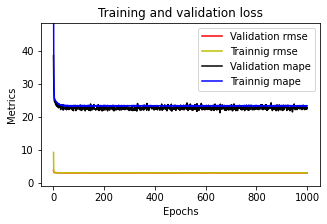

In [40]:
plotme(model8_1_1)

In [41]:
# inputs: distance + hour + roadtypes distance
model8_1_2 = nnmodel_(200,100, num_hlayers=2,Epoch=1000)
model8_1_2

Epoch 1/1000
416/416 [==============================] - 1s 1ms/step - loss: 236210.1094 - mape: 58.4239 - rmse: 486.0145 - val_loss: 42399.3125 - val_mape: 34.8173 - val_rmse: 205.9109
Epoch 2/1000
416/416 [==============================] - 0s 843us/step - loss: 36332.4258 - mape: 30.9832 - rmse: 190.6107 - val_loss: 33840.7539 - val_mape: 25.8286 - val_rmse: 183.9586
Epoch 3/1000
416/416 [==============================] - 0s 891us/step - loss: 33202.8008 - mape: 26.1171 - rmse: 182.2164 - val_loss: 32947.2422 - val_mape: 24.5235 - val_rmse: 181.5137
Epoch 4/1000
416/416 [==============================] - 0s 856us/step - loss: 32868.6719 - mape: 25.2469 - rmse: 181.2972 - val_loss: 32744.7715 - val_mape: 24.2308 - val_rmse: 180.9552
Epoch 5/1000
416/416 [==============================] - 0s 883us/step - loss: 32670.4609 - mape: 25.0329 - rmse: 180.7497 - val_loss: 32590.0664 - val_mape: 23.9941 - val_rmse: 180.5272
Epoch 6/1000
416/416 [==============================] - 0s 850us/step -

Epoch 45/1000
416/416 [==============================] - 0s 858us/step - loss: 31252.4688 - mape: 23.3383 - rmse: 176.7837 - val_loss: 30990.6191 - val_mape: 22.3986 - val_rmse: 176.0415
Epoch 46/1000
416/416 [==============================] - 0s 850us/step - loss: 31277.4863 - mape: 23.1852 - rmse: 176.8544 - val_loss: 31034.6855 - val_mape: 22.7706 - val_rmse: 176.1666
Epoch 47/1000
416/416 [==============================] - 0s 845us/step - loss: 31244.5312 - mape: 23.3086 - rmse: 176.7612 - val_loss: 30985.6621 - val_mape: 22.6559 - val_rmse: 176.0275
Epoch 48/1000
416/416 [==============================] - 0s 874us/step - loss: 31296.0234 - mape: 23.3015 - rmse: 176.9068 - val_loss: 30981.6348 - val_mape: 22.8441 - val_rmse: 176.0160
Epoch 49/1000
416/416 [==============================] - 0s 853us/step - loss: 31233.2461 - mape: 23.3065 - rmse: 176.7293 - val_loss: 31026.9160 - val_mape: 22.3739 - val_rmse: 176.1446
Epoch 50/1000
416/416 [==============================] - 0s 869us

Epoch 89/1000
416/416 [==============================] - 0s 874us/step - loss: 31228.9316 - mape: 23.2937 - rmse: 176.7171 - val_loss: 31747.7129 - val_mape: 21.5434 - val_rmse: 178.1789
Epoch 90/1000
416/416 [==============================] - 0s 838us/step - loss: 31280.2676 - mape: 23.2238 - rmse: 176.8623 - val_loss: 30977.9766 - val_mape: 23.0922 - val_rmse: 176.0056
Epoch 91/1000
416/416 [==============================] - 0s 849us/step - loss: 31246.9941 - mape: 23.2895 - rmse: 176.7682 - val_loss: 30977.3652 - val_mape: 23.0469 - val_rmse: 176.0039
Epoch 92/1000
416/416 [==============================] - 0s 860us/step - loss: 31261.2559 - mape: 23.3689 - rmse: 176.8085 - val_loss: 31254.2188 - val_mape: 21.9175 - val_rmse: 176.7886
Epoch 93/1000
416/416 [==============================] - 0s 862us/step - loss: 31271.0254 - mape: 23.2749 - rmse: 176.8362 - val_loss: 30969.6660 - val_mape: 22.7382 - val_rmse: 175.9820
Epoch 94/1000
416/416 [==============================] - 0s 866us

Epoch 133/1000
416/416 [==============================] - 0s 897us/step - loss: 31255.0195 - mape: 23.2539 - rmse: 176.7909 - val_loss: 31024.6172 - val_mape: 22.7025 - val_rmse: 176.1381
Epoch 134/1000
416/416 [==============================] - 0s 849us/step - loss: 31257.0098 - mape: 23.2831 - rmse: 176.7965 - val_loss: 30984.4043 - val_mape: 22.7498 - val_rmse: 176.0239
Epoch 135/1000
416/416 [==============================] - 0s 854us/step - loss: 31309.0742 - mape: 23.2733 - rmse: 176.9437 - val_loss: 30987.4551 - val_mape: 22.8298 - val_rmse: 176.0325
Epoch 136/1000
416/416 [==============================] - 0s 889us/step - loss: 31281.4629 - mape: 23.2606 - rmse: 176.8657 - val_loss: 31025.9336 - val_mape: 22.5779 - val_rmse: 176.1418
Epoch 137/1000
416/416 [==============================] - 0s 879us/step - loss: 31236.9785 - mape: 23.3452 - rmse: 176.7399 - val_loss: 31107.2188 - val_mape: 22.2394 - val_rmse: 176.3724
Epoch 138/1000
416/416 [==============================] - 0s

Epoch 220/1000
416/416 [==============================] - 0s 871us/step - loss: 31254.0020 - mape: 23.2355 - rmse: 176.7880 - val_loss: 30968.2012 - val_mape: 22.8779 - val_rmse: 175.9778
Epoch 221/1000
416/416 [==============================] - 0s 836us/step - loss: 31224.9863 - mape: 23.2339 - rmse: 176.7059 - val_loss: 30985.7441 - val_mape: 22.6582 - val_rmse: 176.0277
Epoch 222/1000
416/416 [==============================] - 0s 857us/step - loss: 31259.5879 - mape: 23.2480 - rmse: 176.8038 - val_loss: 31034.4590 - val_mape: 22.6186 - val_rmse: 176.1660
Epoch 223/1000
416/416 [==============================] - 0s 851us/step - loss: 31246.5078 - mape: 23.2706 - rmse: 176.7668 - val_loss: 31011.9922 - val_mape: 22.8549 - val_rmse: 176.1022
Epoch 224/1000
416/416 [==============================] - 0s 873us/step - loss: 31272.5312 - mape: 23.3886 - rmse: 176.8404 - val_loss: 30983.9043 - val_mape: 22.4624 - val_rmse: 176.0225
Epoch 225/1000
416/416 [==============================] - 0s

Epoch 307/1000
416/416 [==============================] - 0s 913us/step - loss: 31296.0625 - mape: 23.3682 - rmse: 176.9069 - val_loss: 31020.8203 - val_mape: 22.3130 - val_rmse: 176.1273
Epoch 308/1000
416/416 [==============================] - 0s 862us/step - loss: 31256.5625 - mape: 23.2216 - rmse: 176.7953 - val_loss: 31072.0352 - val_mape: 22.1418 - val_rmse: 176.2726
Epoch 309/1000
416/416 [==============================] - 0s 852us/step - loss: 31236.2500 - mape: 23.2425 - rmse: 176.7378 - val_loss: 31192.4902 - val_mape: 22.0783 - val_rmse: 176.6140
Epoch 310/1000
416/416 [==============================] - 0s 855us/step - loss: 31227.0137 - mape: 23.1732 - rmse: 176.7117 - val_loss: 31092.2246 - val_mape: 22.6884 - val_rmse: 176.3299
Epoch 311/1000
416/416 [==============================] - 0s 895us/step - loss: 31243.3945 - mape: 23.3763 - rmse: 176.7580 - val_loss: 31087.2734 - val_mape: 22.1991 - val_rmse: 176.3158
Epoch 312/1000
416/416 [==============================] - 0s

Epoch 394/1000
416/416 [==============================] - 0s 854us/step - loss: 31237.0664 - mape: 23.3554 - rmse: 176.7401 - val_loss: 30984.2637 - val_mape: 22.9966 - val_rmse: 176.0235
Epoch 395/1000
416/416 [==============================] - 0s 865us/step - loss: 31248.5469 - mape: 23.3740 - rmse: 176.7726 - val_loss: 31011.7578 - val_mape: 22.8369 - val_rmse: 176.1016
Epoch 396/1000
416/416 [==============================] - 0s 847us/step - loss: 31246.6582 - mape: 23.1643 - rmse: 176.7672 - val_loss: 30994.2402 - val_mape: 22.9994 - val_rmse: 176.0518
Epoch 397/1000
416/416 [==============================] - 0s 886us/step - loss: 31238.2891 - mape: 23.1899 - rmse: 176.7436 - val_loss: 30992.9258 - val_mape: 23.0519 - val_rmse: 176.0481
Epoch 398/1000
416/416 [==============================] - 0s 858us/step - loss: 31230.0742 - mape: 23.2954 - rmse: 176.7203 - val_loss: 31047.6328 - val_mape: 23.3716 - val_rmse: 176.2034
Epoch 399/1000
416/416 [==============================] - 0s

Epoch 481/1000
416/416 [==============================] - 0s 837us/step - loss: 31273.2559 - mape: 23.1973 - rmse: 176.8425 - val_loss: 31449.0234 - val_mape: 21.9171 - val_rmse: 177.3387
Epoch 482/1000
416/416 [==============================] - 0s 864us/step - loss: 31230.4434 - mape: 23.2517 - rmse: 176.7214 - val_loss: 31149.3359 - val_mape: 22.2669 - val_rmse: 176.4917
Epoch 483/1000
416/416 [==============================] - 0s 856us/step - loss: 31235.9062 - mape: 23.2622 - rmse: 176.7368 - val_loss: 31065.4219 - val_mape: 22.4688 - val_rmse: 176.2539
Epoch 484/1000
416/416 [==============================] - 0s 883us/step - loss: 31272.0703 - mape: 23.2157 - rmse: 176.8391 - val_loss: 31193.3398 - val_mape: 22.4023 - val_rmse: 176.6164
Epoch 485/1000
416/416 [==============================] - 0s 850us/step - loss: 31255.0820 - mape: 23.3367 - rmse: 176.7911 - val_loss: 31276.3027 - val_mape: 22.0334 - val_rmse: 176.8511
Epoch 486/1000
416/416 [==============================] - 0s

Epoch 568/1000
416/416 [==============================] - 0s 890us/step - loss: 31271.5234 - mape: 23.3666 - rmse: 176.8376 - val_loss: 31000.5625 - val_mape: 23.0308 - val_rmse: 176.0698
Epoch 569/1000
416/416 [==============================] - 0s 883us/step - loss: 31292.4355 - mape: 23.2258 - rmse: 176.8967 - val_loss: 31052.5039 - val_mape: 22.4404 - val_rmse: 176.2172
Epoch 570/1000
416/416 [==============================] - 0s 851us/step - loss: 31231.3672 - mape: 23.2950 - rmse: 176.7240 - val_loss: 31037.6582 - val_mape: 22.4908 - val_rmse: 176.1751
Epoch 571/1000
416/416 [==============================] - 0s 893us/step - loss: 31304.4277 - mape: 23.2512 - rmse: 176.9306 - val_loss: 31071.8613 - val_mape: 23.4281 - val_rmse: 176.2721
Epoch 572/1000
416/416 [==============================] - 0s 873us/step - loss: 31231.1543 - mape: 23.2617 - rmse: 176.7234 - val_loss: 30979.1328 - val_mape: 23.0541 - val_rmse: 176.0089
Epoch 573/1000
416/416 [==============================] - 0s

Epoch 655/1000
416/416 [==============================] - 0s 841us/step - loss: 30292.2949 - mape: 22.4594 - rmse: 174.0468 - val_loss: 29939.5059 - val_mape: 21.3419 - val_rmse: 173.0304
Epoch 656/1000
416/416 [==============================] - 0s 840us/step - loss: 30269.9531 - mape: 22.4323 - rmse: 173.9826 - val_loss: 29993.2363 - val_mape: 21.3110 - val_rmse: 173.1856
Epoch 657/1000
416/416 [==============================] - 0s 859us/step - loss: 30218.1719 - mape: 22.3978 - rmse: 173.8337 - val_loss: 29809.2051 - val_mape: 22.1180 - val_rmse: 172.6534
Epoch 658/1000
416/416 [==============================] - 0s 880us/step - loss: 30244.3320 - mape: 22.4668 - rmse: 173.9090 - val_loss: 29789.9297 - val_mape: 21.7215 - val_rmse: 172.5976
Epoch 659/1000
416/416 [==============================] - 0s 877us/step - loss: 30211.5039 - mape: 22.3803 - rmse: 173.8146 - val_loss: 29780.3242 - val_mape: 21.5874 - val_rmse: 172.5698
Epoch 660/1000
416/416 [==============================] - 0s

Epoch 742/1000
416/416 [==============================] - 0s 852us/step - loss: 29782.7148 - mape: 21.8543 - rmse: 172.5767 - val_loss: 29224.6738 - val_mape: 20.7730 - val_rmse: 170.9523
Epoch 743/1000
416/416 [==============================] - 0s 878us/step - loss: 29851.3184 - mape: 21.8607 - rmse: 172.7753 - val_loss: 29257.1562 - val_mape: 21.2305 - val_rmse: 171.0472
Epoch 744/1000
416/416 [==============================] - 0s 878us/step - loss: 29790.6426 - mape: 21.8556 - rmse: 172.5997 - val_loss: 29276.3457 - val_mape: 21.2340 - val_rmse: 171.1033
Epoch 745/1000
416/416 [==============================] - 0s 874us/step - loss: 29800.6094 - mape: 21.9406 - rmse: 172.6285 - val_loss: 29238.7305 - val_mape: 21.6431 - val_rmse: 170.9934
Epoch 746/1000
416/416 [==============================] - 0s 854us/step - loss: 29791.9707 - mape: 21.8440 - rmse: 172.6035 - val_loss: 29380.3926 - val_mape: 22.1261 - val_rmse: 171.4071
Epoch 747/1000
416/416 [==============================] - 0s

Epoch 829/1000
416/416 [==============================] - 0s 861us/step - loss: 29702.5566 - mape: 21.8397 - rmse: 172.3443 - val_loss: 29357.4844 - val_mape: 22.1128 - val_rmse: 171.3403
Epoch 830/1000
416/416 [==============================] - 0s 870us/step - loss: 29767.7363 - mape: 21.9262 - rmse: 172.5333 - val_loss: 29157.2207 - val_mape: 21.2672 - val_rmse: 170.7549
Epoch 831/1000
416/416 [==============================] - 0s 873us/step - loss: 29720.8008 - mape: 21.7844 - rmse: 172.3972 - val_loss: 29195.5332 - val_mape: 21.5550 - val_rmse: 170.8670
Epoch 832/1000
416/416 [==============================] - 0s 856us/step - loss: 29701.0527 - mape: 21.9360 - rmse: 172.3399 - val_loss: 29275.4023 - val_mape: 20.8305 - val_rmse: 171.1006
Epoch 833/1000
416/416 [==============================] - 0s 872us/step - loss: 29713.9805 - mape: 21.8507 - rmse: 172.3774 - val_loss: 29315.1797 - val_mape: 21.8867 - val_rmse: 171.2168
Epoch 834/1000
416/416 [==============================] - 0s

Epoch 916/1000
416/416 [==============================] - 0s 865us/step - loss: 29708.8750 - mape: 21.8602 - rmse: 172.3626 - val_loss: 29205.6074 - val_mape: 20.6420 - val_rmse: 170.8965
Epoch 917/1000
416/416 [==============================] - 0s 860us/step - loss: 29621.4238 - mape: 21.7863 - rmse: 172.1087 - val_loss: 29203.5977 - val_mape: 20.6529 - val_rmse: 170.8906
Epoch 918/1000
416/416 [==============================] - 0s 887us/step - loss: 29614.2324 - mape: 21.7474 - rmse: 172.0879 - val_loss: 29230.2715 - val_mape: 20.6169 - val_rmse: 170.9686
Epoch 919/1000
416/416 [==============================] - 0s 896us/step - loss: 29627.2695 - mape: 21.7775 - rmse: 172.1257 - val_loss: 29526.0273 - val_mape: 20.1602 - val_rmse: 171.8314
Epoch 920/1000
416/416 [==============================] - 0s 859us/step - loss: 29679.3379 - mape: 21.6893 - rmse: 172.2769 - val_loss: 29251.0312 - val_mape: 22.1616 - val_rmse: 171.0293
Epoch 921/1000
416/416 [==============================] - 0s

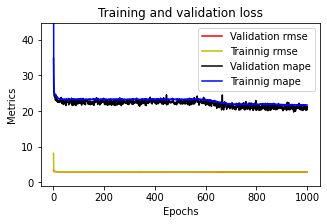

In [42]:
plotme(model8_1_2)

In [43]:
# inputs: distance + roadtypes distance
model8_1_4 = nnmodel_(10, num_hlayers=1,Epoch=1000)
model8_1_4

Epoch 1/1000
416/416 [==============================] - 1s 864us/step - loss: 556072.6250 - mape: 99.6431 - rmse: 745.7028 - val_loss: 558303.4375 - val_mape: 99.1195 - val_rmse: 747.1971
Epoch 2/1000
416/416 [==============================] - 0s 708us/step - loss: 545133.1250 - mape: 98.1903 - rmse: 738.3313 - val_loss: 543115.3750 - val_mape: 97.1279 - val_rmse: 736.9636
Epoch 3/1000
416/416 [==============================] - 0s 757us/step - loss: 526166.6875 - mape: 95.6359 - rmse: 725.3735 - val_loss: 520460.3750 - val_mape: 94.1044 - val_rmse: 721.4294
Epoch 4/1000
416/416 [==============================] - 0s 732us/step - loss: 500528.1562 - mape: 92.1413 - rmse: 707.4802 - val_loss: 491916.3750 - val_mape: 90.1929 - val_rmse: 701.3675
Epoch 5/1000
416/416 [==============================] - 0s 748us/step - loss: 469837.6250 - mape: 87.7907 - rmse: 685.4470 - val_loss: 459027.2500 - val_mape: 85.5288 - val_rmse: 677.5155
Epoch 6/1000
416/416 [==============================] - 0s 7

Epoch 45/1000
416/416 [==============================] - 0s 729us/step - loss: 33283.5781 - mape: 26.7468 - rmse: 182.4379 - val_loss: 33265.0586 - val_mape: 25.8458 - val_rmse: 182.3871
Epoch 46/1000
416/416 [==============================] - 0s 735us/step - loss: 33211.6133 - mape: 26.4943 - rmse: 182.2405 - val_loss: 33200.2695 - val_mape: 25.6177 - val_rmse: 182.2094
Epoch 47/1000
416/416 [==============================] - 0s 760us/step - loss: 33153.5078 - mape: 26.2114 - rmse: 182.0811 - val_loss: 33114.1406 - val_mape: 25.5662 - val_rmse: 181.9729
Epoch 48/1000
416/416 [==============================] - 0s 724us/step - loss: 33106.9648 - mape: 26.1669 - rmse: 181.9532 - val_loss: 33063.7148 - val_mape: 25.4188 - val_rmse: 181.8343
Epoch 49/1000
416/416 [==============================] - 0s 732us/step - loss: 33066.4648 - mape: 25.9972 - rmse: 181.8419 - val_loss: 33003.7109 - val_mape: 25.3914 - val_rmse: 181.6692
Epoch 50/1000
416/416 [==============================] - 0s 694us

Epoch 89/1000
416/416 [==============================] - 0s 696us/step - loss: 32540.6094 - mape: 24.9440 - rmse: 180.3902 - val_loss: 32414.8145 - val_mape: 24.3947 - val_rmse: 180.0412
Epoch 90/1000
416/416 [==============================] - 0s 775us/step - loss: 32524.0859 - mape: 25.0305 - rmse: 180.3444 - val_loss: 32430.7402 - val_mape: 24.2645 - val_rmse: 180.0854
Epoch 91/1000
416/416 [==============================] - 0s 716us/step - loss: 32521.2637 - mape: 24.8956 - rmse: 180.3365 - val_loss: 32416.6562 - val_mape: 24.2720 - val_rmse: 180.0463
Epoch 92/1000
416/416 [==============================] - 0s 711us/step - loss: 32510.3027 - mape: 24.9111 - rmse: 180.3061 - val_loss: 32393.2285 - val_mape: 24.3267 - val_rmse: 179.9812
Epoch 93/1000
416/416 [==============================] - 0s 759us/step - loss: 32499.0957 - mape: 24.8787 - rmse: 180.2751 - val_loss: 32370.4062 - val_mape: 24.3961 - val_rmse: 179.9178
Epoch 94/1000
416/416 [==============================] - 0s 734us

Epoch 133/1000
416/416 [==============================] - 0s 697us/step - loss: 32172.1172 - mape: 24.7069 - rmse: 179.3659 - val_loss: 32046.5723 - val_mape: 24.0303 - val_rmse: 179.0156
Epoch 134/1000
416/416 [==============================] - 0s 749us/step - loss: 32165.9219 - mape: 24.6256 - rmse: 179.3486 - val_loss: 32031.1133 - val_mape: 24.0602 - val_rmse: 178.9724
Epoch 135/1000
416/416 [==============================] - 0s 716us/step - loss: 32157.5703 - mape: 24.6141 - rmse: 179.3253 - val_loss: 32021.8047 - val_mape: 24.0645 - val_rmse: 178.9464
Epoch 136/1000
416/416 [==============================] - 0s 719us/step - loss: 32151.1895 - mape: 24.6762 - rmse: 179.3075 - val_loss: 32023.5098 - val_mape: 24.0143 - val_rmse: 178.9511
Epoch 137/1000
416/416 [==============================] - 0s 730us/step - loss: 32143.0527 - mape: 24.6431 - rmse: 179.2848 - val_loss: 32024.4082 - val_mape: 23.9692 - val_rmse: 178.9536
Epoch 138/1000
416/416 [==============================] - 0s

Epoch 220/1000
416/416 [==============================] - 0s 739us/step - loss: 31696.6562 - mape: 24.1888 - rmse: 178.0356 - val_loss: 31548.4277 - val_mape: 23.5868 - val_rmse: 177.6188
Epoch 221/1000
416/416 [==============================] - 0s 760us/step - loss: 31691.7617 - mape: 24.2115 - rmse: 178.0218 - val_loss: 31554.2852 - val_mape: 23.5312 - val_rmse: 177.6353
Epoch 222/1000
416/416 [==============================] - 0s 718us/step - loss: 31686.6797 - mape: 24.1627 - rmse: 178.0075 - val_loss: 31541.1426 - val_mape: 23.5719 - val_rmse: 177.5983
Epoch 223/1000
416/416 [==============================] - 0s 717us/step - loss: 31683.8926 - mape: 24.1801 - rmse: 177.9997 - val_loss: 31541.3164 - val_mape: 23.5499 - val_rmse: 177.5988
Epoch 224/1000
416/416 [==============================] - 0s 703us/step - loss: 31678.6699 - mape: 24.1417 - rmse: 177.9850 - val_loss: 31522.3887 - val_mape: 23.6274 - val_rmse: 177.5455
Epoch 225/1000
416/416 [==============================] - 0s

Epoch 307/1000
416/416 [==============================] - 0s 716us/step - loss: 31427.8574 - mape: 23.9424 - rmse: 177.2790 - val_loss: 31295.4199 - val_mape: 23.1602 - val_rmse: 176.9051
Epoch 308/1000
416/416 [==============================] - 0s 702us/step - loss: 31430.2227 - mape: 23.8393 - rmse: 177.2857 - val_loss: 31276.9961 - val_mape: 23.2381 - val_rmse: 176.8530
Epoch 309/1000
416/416 [==============================] - 0s 686us/step - loss: 31424.4746 - mape: 23.8711 - rmse: 177.2695 - val_loss: 31277.9707 - val_mape: 23.2176 - val_rmse: 176.8558
Epoch 310/1000
416/416 [==============================] - 0s 727us/step - loss: 31422.0977 - mape: 23.9000 - rmse: 177.2628 - val_loss: 31280.7422 - val_mape: 23.1893 - val_rmse: 176.8636
Epoch 311/1000
416/416 [==============================] - 0s 703us/step - loss: 31419.8613 - mape: 23.8267 - rmse: 177.2565 - val_loss: 31270.9512 - val_mape: 23.2273 - val_rmse: 176.8359
Epoch 312/1000
416/416 [==============================] - 0s

Epoch 394/1000
416/416 [==============================] - 0s 741us/step - loss: 31289.2949 - mape: 23.6485 - rmse: 176.8878 - val_loss: 31136.0508 - val_mape: 23.0168 - val_rmse: 176.4541
Epoch 395/1000
416/416 [==============================] - 0s 702us/step - loss: 31286.2148 - mape: 23.6900 - rmse: 176.8791 - val_loss: 31135.6055 - val_mape: 23.0067 - val_rmse: 176.4528
Epoch 396/1000
416/416 [==============================] - 0s 704us/step - loss: 31285.6309 - mape: 23.6299 - rmse: 176.8774 - val_loss: 31135.5527 - val_mape: 23.0071 - val_rmse: 176.4527
Epoch 397/1000
416/416 [==============================] - 0s 713us/step - loss: 31282.2305 - mape: 23.6312 - rmse: 176.8678 - val_loss: 31121.7773 - val_mape: 23.0736 - val_rmse: 176.4137
Epoch 398/1000
416/416 [==============================] - 0s 735us/step - loss: 31284.3105 - mape: 23.7197 - rmse: 176.8737 - val_loss: 31130.4961 - val_mape: 23.0087 - val_rmse: 176.4384
Epoch 399/1000
416/416 [==============================] - 0s

Epoch 481/1000
416/416 [==============================] - 0s 720us/step - loss: 31215.3574 - mape: 23.4820 - rmse: 176.6787 - val_loss: 31056.9355 - val_mape: 22.9020 - val_rmse: 176.2298
Epoch 482/1000
416/416 [==============================] - 0s 724us/step - loss: 31214.2891 - mape: 23.5354 - rmse: 176.6757 - val_loss: 31052.9590 - val_mape: 22.9116 - val_rmse: 176.2185
Epoch 483/1000
416/416 [==============================] - 0s 695us/step - loss: 31215.0762 - mape: 23.5424 - rmse: 176.6779 - val_loss: 31057.6016 - val_mape: 22.8796 - val_rmse: 176.2317
Epoch 484/1000
416/416 [==============================] - 0s 732us/step - loss: 31214.2773 - mape: 23.5023 - rmse: 176.6756 - val_loss: 31056.3438 - val_mape: 22.8808 - val_rmse: 176.2281
Epoch 485/1000
416/416 [==============================] - 0s 701us/step - loss: 31212.9590 - mape: 23.5054 - rmse: 176.6719 - val_loss: 31056.4258 - val_mape: 22.8783 - val_rmse: 176.2283
Epoch 486/1000
416/416 [==============================] - 0s

Epoch 568/1000
416/416 [==============================] - 0s 754us/step - loss: 31181.1543 - mape: 23.3994 - rmse: 176.5819 - val_loss: 31029.3984 - val_mape: 22.7570 - val_rmse: 176.1516
Epoch 569/1000
416/416 [==============================] - 0s 723us/step - loss: 31180.9668 - mape: 23.4220 - rmse: 176.5813 - val_loss: 31025.5723 - val_mape: 22.7760 - val_rmse: 176.1408
Epoch 570/1000
416/416 [==============================] - 0s 748us/step - loss: 31181.7734 - mape: 23.4289 - rmse: 176.5836 - val_loss: 31028.5859 - val_mape: 22.7597 - val_rmse: 176.1493
Epoch 571/1000
416/416 [==============================] - 0s 739us/step - loss: 31179.4004 - mape: 23.4220 - rmse: 176.5769 - val_loss: 31031.6914 - val_mape: 22.7356 - val_rmse: 176.1581
Epoch 572/1000
416/416 [==============================] - 0s 725us/step - loss: 31180.5801 - mape: 23.3889 - rmse: 176.5802 - val_loss: 31017.9121 - val_mape: 22.8155 - val_rmse: 176.1190
Epoch 573/1000
416/416 [==============================] - 0s

Epoch 655/1000
416/416 [==============================] - 0s 738us/step - loss: 31165.5977 - mape: 23.3671 - rmse: 176.5378 - val_loss: 31017.4395 - val_mape: 22.6675 - val_rmse: 176.1177
Epoch 656/1000
416/416 [==============================] - 0s 722us/step - loss: 31164.9102 - mape: 23.3218 - rmse: 176.5359 - val_loss: 31009.1309 - val_mape: 22.7208 - val_rmse: 176.0941
Epoch 657/1000
416/416 [==============================] - 0s 755us/step - loss: 31165.9316 - mape: 23.3578 - rmse: 176.5388 - val_loss: 31009.6211 - val_mape: 22.7114 - val_rmse: 176.0955
Epoch 658/1000
416/416 [==============================] - 0s 694us/step - loss: 31166.3613 - mape: 23.3712 - rmse: 176.5400 - val_loss: 31008.0742 - val_mape: 22.7218 - val_rmse: 176.0911
Epoch 659/1000
416/416 [==============================] - 0s 697us/step - loss: 31165.1523 - mape: 23.3580 - rmse: 176.5365 - val_loss: 31010.0469 - val_mape: 22.7047 - val_rmse: 176.0967
Epoch 660/1000
416/416 [==============================] - 0s

Epoch 742/1000
416/416 [==============================] - 0s 706us/step - loss: 31158.0117 - mape: 23.3537 - rmse: 176.5163 - val_loss: 31008.1387 - val_mape: 22.6378 - val_rmse: 176.0913
Epoch 743/1000
416/416 [==============================] - 0s 745us/step - loss: 31158.5566 - mape: 23.2894 - rmse: 176.5179 - val_loss: 31002.7676 - val_mape: 22.6726 - val_rmse: 176.0760
Epoch 744/1000
416/416 [==============================] - 0s 798us/step - loss: 31157.2266 - mape: 23.2893 - rmse: 176.5141 - val_loss: 30997.9531 - val_mape: 22.7010 - val_rmse: 176.0624
Epoch 745/1000
416/416 [==============================] - 0s 740us/step - loss: 31158.1953 - mape: 23.3413 - rmse: 176.5168 - val_loss: 30999.8926 - val_mape: 22.6837 - val_rmse: 176.0679
Epoch 746/1000
416/416 [==============================] - 0s 712us/step - loss: 31156.3672 - mape: 23.3604 - rmse: 176.5117 - val_loss: 31010.8359 - val_mape: 22.6168 - val_rmse: 176.0989
Epoch 747/1000
416/416 [==============================] - 0s

Epoch 829/1000
416/416 [==============================] - 0s 767us/step - loss: 31154.7734 - mape: 23.2882 - rmse: 176.5071 - val_loss: 31007.9238 - val_mape: 22.5993 - val_rmse: 176.0907
Epoch 830/1000
416/416 [==============================] - 0s 711us/step - loss: 31157.2168 - mape: 23.3024 - rmse: 176.5141 - val_loss: 31007.5918 - val_mape: 22.5986 - val_rmse: 176.0897
Epoch 831/1000
416/416 [==============================] - 0s 721us/step - loss: 31155.1504 - mape: 23.2818 - rmse: 176.5082 - val_loss: 31007.4609 - val_mape: 22.6012 - val_rmse: 176.0894
Epoch 832/1000
416/416 [==============================] - 0s 704us/step - loss: 31154.6934 - mape: 23.2770 - rmse: 176.5069 - val_loss: 31004.4102 - val_mape: 22.6165 - val_rmse: 176.0807
Epoch 833/1000
416/416 [==============================] - 0s 701us/step - loss: 31153.4219 - mape: 23.2721 - rmse: 176.5033 - val_loss: 31003.7832 - val_mape: 22.6259 - val_rmse: 176.0789
Epoch 834/1000
416/416 [==============================] - 0s

Epoch 916/1000
416/416 [==============================] - 0s 678us/step - loss: 31153.4629 - mape: 23.2958 - rmse: 176.5034 - val_loss: 31003.5762 - val_mape: 22.5959 - val_rmse: 176.0783
Epoch 917/1000
416/416 [==============================] - 0s 723us/step - loss: 31153.6113 - mape: 23.2966 - rmse: 176.5039 - val_loss: 31017.7598 - val_mape: 22.5220 - val_rmse: 176.1186
Epoch 918/1000
416/416 [==============================] - 0s 708us/step - loss: 31152.0605 - mape: 23.2909 - rmse: 176.4995 - val_loss: 31012.1953 - val_mape: 22.5478 - val_rmse: 176.1028
Epoch 919/1000
416/416 [==============================] - 0s 745us/step - loss: 31154.9434 - mape: 23.2431 - rmse: 176.5076 - val_loss: 31003.4238 - val_mape: 22.5940 - val_rmse: 176.0779
Epoch 920/1000
416/416 [==============================] - 0s 723us/step - loss: 31156.4219 - mape: 23.2615 - rmse: 176.5118 - val_loss: 31012.3828 - val_mape: 22.5470 - val_rmse: 176.1033
Epoch 921/1000
416/416 [==============================] - 0s

# Feature selection

## Lasso

In [48]:
df0 = pd.merge(df4,df8, on=['travel time','distance','hour of day'])
df0.shape
df0

travel time  hour of day  distance  est_dist_x  similarity_x  \
0             1917           17  0.992498    0.816276      0.448560   
1              766           20  0.344315    0.268660      0.727273   
2              130           18  0.018713    0.016889      0.625000   
3              551           15  0.349947    0.299087      0.662338   
4              962           16  0.385289    0.341360      0.542553   
...            ...          ...       ...         ...           ...   
16626         1136            6  0.277049    0.230076      0.951220   
16627          348           20  0.069904    0.048272      0.875000   
16628         1243            0  0.358691    0.306444      0.727273   
16629          125            2  0.016019    0.007059      0.500000   
16630         1670            5  0.742826    0.625970      0.672566   

       similarity_dijk_x  1st ranked  2nd ranked  3rd ranked  est_dist_y  ...  \
0               0.524038    0.581383    0.272256    0.510072    0.816276  ...   
1               0.823529    0.581383    0.272256    0.510072    0.268660  ...   
2               0.714286    0.355582    0.470166    0.000000    0.016889  ...   
3               0.680000    0.581383    0.272256    0.483904    0.299087  ...   
4               0.573034    0.581383    0.272256    0.483904    0.341360  ...   
...                  ...         ...         ...         ...         ...  ...   
16626           0.951220    0.355582    0.207086    0.000000    0.230076  ...   
16627           1.000000    0.101434    0.582260    0.000000    0.048272  ...   
16628           0.674699    0.355582    0.581773    0.483904    0.306444  ...   
16629           1.000000    0.101434    0.582260    0.000000    0.007059  ...   
16630           0.672566    0.581383    0.595557    0.483904    0.625970  ...   

       road  secondary  secondary_link   service  tertiary  track  trunk  \
0       0.0   0.000000             0.0  0.000000  0.026824    0.0    0.0   
1       0.0   0.000000             0.0  0.000000  0.026824    0.0    0.0   
2       0.0   0.000000             0.0  0.000000  0.028674    0.0    0.0   
3       0.0   0.000000             0.0  0.000000  0.026824    0.0    0.0   
4       0.0   0.000000             0.0  0.000000  0.026824    0.0    0.0   
...     ...        ...             ...       ...       ...    ...    ...   
16626   0.0   0.000000             0.0  0.000000  0.512330    0.0    0.0   
16627   0.0   0.000000             0.0  0.000000  0.010181    0.0    0.0   
16628   0.0   0.000000             0.0  0.000000  0.337142    0.0    0.0   
16629   0.0   0.000000             0.0  0.000000  0.009984    0.0    0.0   
16630   0.0   0.028304             0.0  0.016148  0.018406    0.0    0.0   

       trunk_link  unclassified  others  
0             0.0      0.112037     0.0  
1             0.0      0.306935     0.0  
2             0.0      0.000000     0.0  
3             0.0      0.195231     0.0  
4             0.0      0.393219     0.0  
...           ...           ...     ...  
16626         0.0      0.000000     0.0  
16627         0.0      0.000000     0.0  
16628         0.0      0.000000     0.0  
16629         0.0      0.000000     0.0  
16630         0.0      0.000000     0.0  

[16631 rows x 28 columns]

In [49]:
x = np.array(df0.iloc[:,1:])
y = np.array(df0['travel time'])
x

array([[1.70000000e+01, 9.92498195e-01, 8.16276476e-01, ...,
        0.00000000e+00, 1.12036958e-01, 0.00000000e+00],
       [2.00000000e+01, 3.44314517e-01, 2.68659643e-01, ...,
        0.00000000e+00, 3.06934559e-01, 0.00000000e+00],
       [1.80000000e+01, 1.87127960e-02, 1.68893019e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 3.58691059e-01, 3.06443987e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 1.60193287e-02, 7.05875235e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.00000000e+00, 7.42826410e-01, 6.25970065e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [50]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [51]:
print(X_train.shape)
print(X_test.shape)
# X_train

(13304, 27)
(3327, 27)


In [52]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_boston
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

# load data
X = X_train
y = y_train

# Use L1 penalty
estimator = LassoCV(cv=5, normalize = True)

# Set a minimum threshold of 0.25
sfm = SelectFromModel(estimator, threshold=0.25, prefit=False, norm_order=1, max_features=None)
# sfm = SelectFromModel(estimator, threshold=0.25, prefit=False, norm_order=1, max_features=None)

sfm.fit(X, y)

feature_idx = sfm.get_support()
# feature_name = X.columns[feature_idx]
# feature_name

# n_features = sfm.transform(X).shape[1]
# n_features

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


In [53]:
df0.iloc[:,1:].columns[feature_idx]

Index(['distance', 'similarity_x', 'similarity_dijk_x', '1st ranked',
       '2nd ranked', '3rd ranked', 'similarity_dijk_y', 'living_street',
       'motorway', 'motorway_link', 'primary_link', 'residential', 'road',
       'secondary', 'secondary_link', 'service', 'tertiary', 'trunk',
       'trunk_link', 'unclassified', 'others'],
      dtype='object')

In [54]:
df0.iloc[:,1:].columns[~feature_idx]

Index(['hour of day', 'est_dist_x', 'est_dist_y', 'similarity_y', 'primary',
       'track'],
      dtype='object')

In [55]:
feature_idx

array([False,  True, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True])

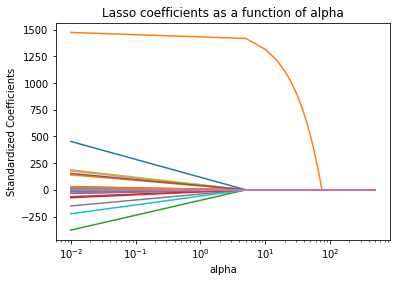

In [56]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=1)
reg.fit(X_train, y_train)
alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [57]:
feature_idx

array([False,  True, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True])

In [58]:
df0.iloc[:,1:].columns[feature_idx]

Index(['distance', 'similarity_x', 'similarity_dijk_x', '1st ranked',
       '2nd ranked', '3rd ranked', 'similarity_dijk_y', 'living_street',
       'motorway', 'motorway_link', 'primary_link', 'residential', 'road',
       'secondary', 'secondary_link', 'service', 'tertiary', 'trunk',
       'trunk_link', 'unclassified', 'others'],
      dtype='object')

In [59]:
df0[df0.iloc[:,1:].columns[feature_idx]]

distance  similarity_x  similarity_dijk_x  1st ranked  2nd ranked  \
0      0.992498      0.448560           0.524038    0.581383    0.272256   
1      0.344315      0.727273           0.823529    0.581383    0.272256   
2      0.018713      0.625000           0.714286    0.355582    0.470166   
3      0.349947      0.662338           0.680000    0.581383    0.272256   
4      0.385289      0.542553           0.573034    0.581383    0.272256   
...         ...           ...                ...         ...         ...   
16626  0.277049      0.951220           0.951220    0.355582    0.207086   
16627  0.069904      0.875000           1.000000    0.101434    0.582260   
16628  0.358691      0.727273           0.674699    0.355582    0.581773   
16629  0.016019      0.500000           1.000000    0.101434    0.582260   
16630  0.742826      0.672566           0.672566    0.581383    0.595557   

       3rd ranked  similarity_dijk_y  living_street  motorway  motorway_link  \
0        0.510072           0.524038       0.031043       0.0            0.0   
1        0.510072           0.823529       0.000000       0.0            0.0   
2        0.000000           0.714286       0.000000       0.0            0.0   
3        0.483904           0.680000       0.000000       0.0            0.0   
4        0.483904           0.573034       0.000000       0.0            0.0   
...           ...                ...            ...       ...            ...   
16626    0.000000           0.951220       0.000000       0.0            0.0   
16627    0.000000           1.000000       0.000000       0.0            0.0   
16628    0.483904           0.674699       0.000000       0.0            0.0   
16629    0.000000           1.000000       0.000000       0.0            0.0   
16630    0.483904           0.672566       0.000000       0.0            0.0   

       ...  residential  road  secondary  secondary_link   service  tertiary  \
0      ...     0.000000   0.0   0.000000             0.0  0.000000  0.026824   
1      ...     0.035999   0.0   0.000000             0.0  0.000000  0.026824   
2      ...     0.031264   0.0   0.000000             0.0  0.000000  0.028674   
3      ...     0.137849   0.0   0.000000             0.0  0.000000  0.026824   
4      ...     0.111971   0.0   0.000000             0.0  0.000000  0.026824   
...    ...          ...   ...        ...             ...       ...       ...   
16626  ...     0.000000   0.0   0.000000             0.0  0.000000  0.512330   
16627  ...     0.240820   0.0   0.000000             0.0  0.000000  0.010181   
16628  ...     0.133222   0.0   0.000000             0.0  0.000000  0.337142   
16629  ...     0.057343   0.0   0.000000             0.0  0.000000  0.009984   
16630  ...     0.054368   0.0   0.028304             0.0  0.016148  0.018406   

       trunk  trunk_link  unclassified  others  
0        0.0         0.0      0.112037     0.0  
1        0.0         0.0      0.306935     0.0  
2        0.0         0.0      0.000000     0.0  
3        0.0         0.0      0.195231     0.0  
4        0.0         0.0      0.393219     0.0  
...      ...         ...           ...     ...  
16626    0.0         0.0      0.000000     0.0  
16627    0.0         0.0      0.000000     0.0  
16628    0.0         0.0      0.000000     0.0  
16629    0.0         0.0      0.000000     0.0  
16630    0.0         0.0      0.000000     0.0  

[16631 rows x 21 columns]

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


<AxesSubplot:>

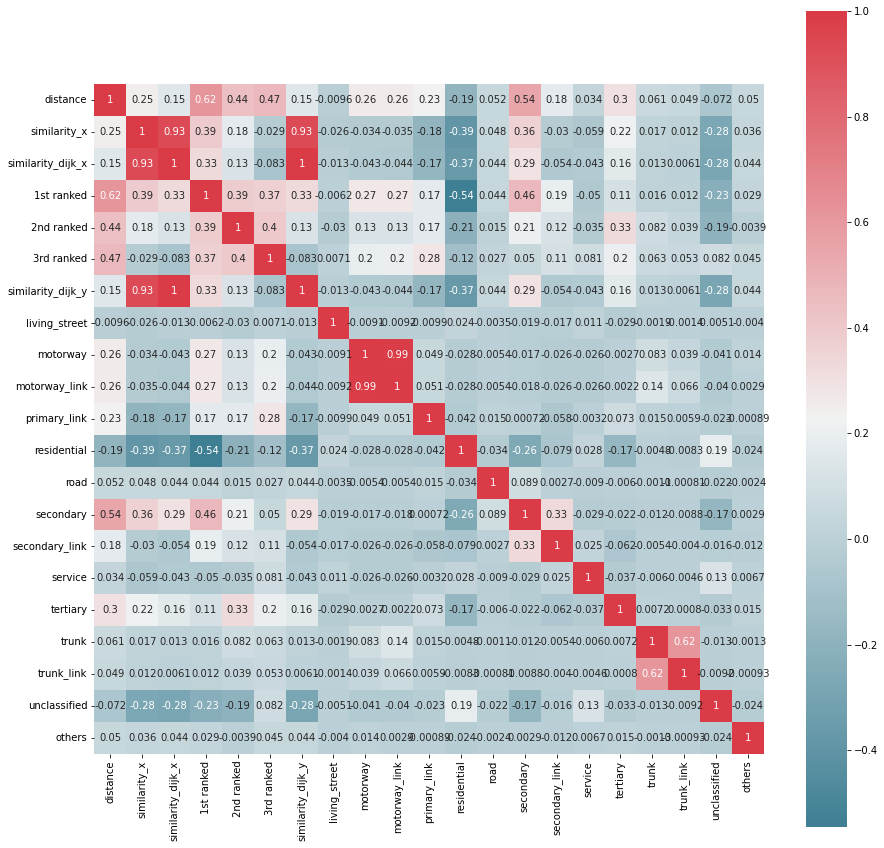

In [60]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(15,15))
# corr = df0[['travel time','distance','motorway','residential','secondary_link','service','track','trunk']].corr()
corr = df0[df0.iloc[:,1:].columns[feature_idx]].corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [61]:
x = np.array(df0[df0.iloc[:,1:].columns[feature_idx]])
y = np.array(df0['travel time'])
x

array([[0.9924982 , 0.44855967, 0.52403846, ..., 0.        , 0.11203696,
        0.        ],
       [0.34431452, 0.72727273, 0.82352941, ..., 0.        , 0.30693456,
        0.        ],
       [0.0187128 , 0.625     , 0.71428571, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.35869106, 0.72727273, 0.6746988 , ..., 0.        , 0.        ,
        0.        ],
       [0.01601933, 0.5       , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.74282641, 0.67256637, 0.67256637, ..., 0.        , 0.        ,
        0.        ]])

In [62]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [63]:
print(X_train.shape)
print(X_test.shape)
# X_train

(13304, 21)
(3327, 21)


In [188]:
# inputs: distance + roadtypes distance
model8_1_3 = nnmodel_(50, num_hlayers=1,Epoch=500)
model8_1_3

Epoch 1/500
416/416 [==============================] - 1s 953us/step - loss: 528026.0625 - mape: 95.4330 - rmse: 726.6540 - val_loss: 478138.9688 - val_mape: 86.9689 - val_rmse: 691.4760
Epoch 2/500
416/416 [==============================] - 0s 751us/step - loss: 384609.8125 - mape: 72.1565 - rmse: 620.1692 - val_loss: 296104.0625 - val_mape: 57.2785 - val_rmse: 544.1544
Epoch 3/500
416/416 [==============================] - 0s 775us/step - loss: 214346.1094 - mape: 47.7720 - rmse: 462.9753 - val_loss: 154532.7344 - val_mape: 41.4418 - val_rmse: 393.1065
Epoch 4/500
416/416 [==============================] - 0s 754us/step - loss: 121624.5156 - mape: 43.9898 - rmse: 348.7471 - val_loss: 103053.1953 - val_mape: 44.7495 - val_rmse: 321.0190
Epoch 5/500
416/416 [==============================] - 0s 774us/step - loss: 95580.4766 - mape: 48.8624 - rmse: 309.1609 - val_loss: 91062.0625 - val_mape: 48.1673 - val_rmse: 301.7649
Epoch 6/500
416/416 [==============================] - 0s 766us/ste

416/416 [==============================] - 0s 745us/step - loss: 29621.5371 - mape: 21.6436 - rmse: 172.1091 - val_loss: 29327.8770 - val_mape: 20.5200 - val_rmse: 171.2538
Epoch 46/500
416/416 [==============================] - 0s 843us/step - loss: 29578.3262 - mape: 21.5713 - rmse: 171.9835 - val_loss: 29264.7520 - val_mape: 20.5858 - val_rmse: 171.0694
Epoch 47/500
416/416 [==============================] - 0s 811us/step - loss: 29525.9746 - mape: 21.5971 - rmse: 171.8312 - val_loss: 29193.8535 - val_mape: 20.7125 - val_rmse: 170.8621
Epoch 48/500
416/416 [==============================] - 0s 735us/step - loss: 29453.5879 - mape: 21.5355 - rmse: 171.6205 - val_loss: 29136.6855 - val_mape: 20.9296 - val_rmse: 170.6947
Epoch 49/500
416/416 [==============================] - 0s 776us/step - loss: 29430.4805 - mape: 21.5244 - rmse: 171.5531 - val_loss: 29106.4727 - val_mape: 20.9697 - val_rmse: 170.6062
Epoch 50/500
416/416 [==============================] - 0s 905us/step - loss: 29389

Epoch 133/500
416/416 [==============================] - 0s 844us/step - loss: 28965.9961 - mape: 21.5974 - rmse: 170.1940 - val_loss: 28848.9746 - val_mape: 20.9343 - val_rmse: 169.8499
Epoch 134/500
416/416 [==============================] - 0s 851us/step - loss: 28961.4531 - mape: 21.6388 - rmse: 170.1806 - val_loss: 28824.1992 - val_mape: 21.2585 - val_rmse: 169.7769
Epoch 135/500
416/416 [==============================] - 0s 841us/step - loss: 28972.7812 - mape: 21.6860 - rmse: 170.2139 - val_loss: 28843.7227 - val_mape: 20.9377 - val_rmse: 169.8344
Epoch 136/500
416/416 [==============================] - 0s 855us/step - loss: 28975.9512 - mape: 21.6746 - rmse: 170.2232 - val_loss: 28825.1367 - val_mape: 21.2008 - val_rmse: 169.7797
Epoch 137/500
416/416 [==============================] - 0s 883us/step - loss: 28958.6836 - mape: 21.6768 - rmse: 170.1725 - val_loss: 28871.5664 - val_mape: 20.7928 - val_rmse: 169.9164
Epoch 138/500
416/416 [==============================] - 0s 875us

Epoch 177/500
416/416 [==============================] - 0s 749us/step - loss: 28956.5312 - mape: 21.7233 - rmse: 170.1662 - val_loss: 28871.2500 - val_mape: 20.7742 - val_rmse: 169.9154
Epoch 178/500
416/416 [==============================] - 0s 760us/step - loss: 28939.5605 - mape: 21.6448 - rmse: 170.1163 - val_loss: 28810.6426 - val_mape: 21.2465 - val_rmse: 169.7370
Epoch 179/500
416/416 [==============================] - 0s 749us/step - loss: 28959.8574 - mape: 21.7242 - rmse: 170.1760 - val_loss: 28831.7637 - val_mape: 20.9411 - val_rmse: 169.7992
Epoch 180/500
416/416 [==============================] - 0s 746us/step - loss: 28963.8066 - mape: 21.7059 - rmse: 170.1876 - val_loss: 28809.7539 - val_mape: 21.1598 - val_rmse: 169.7344
Epoch 181/500
416/416 [==============================] - 0s 771us/step - loss: 28955.8965 - mape: 21.6833 - rmse: 170.1643 - val_loss: 28830.8047 - val_mape: 20.9304 - val_rmse: 169.7964
Epoch 182/500
416/416 [==============================] - 0s 745us

Epoch 221/500
416/416 [==============================] - 0s 766us/step - loss: 28943.5449 - mape: 21.6324 - rmse: 170.1280 - val_loss: 28814.3066 - val_mape: 21.0237 - val_rmse: 169.7478
Epoch 222/500
416/416 [==============================] - 0s 724us/step - loss: 28932.9355 - mape: 21.6555 - rmse: 170.0968 - val_loss: 28806.2383 - val_mape: 21.0970 - val_rmse: 169.7240
Epoch 223/500
416/416 [==============================] - 0s 750us/step - loss: 28944.9141 - mape: 21.6876 - rmse: 170.1320 - val_loss: 28809.4141 - val_mape: 21.0655 - val_rmse: 169.7334
Epoch 224/500
416/416 [==============================] - 0s 744us/step - loss: 28938.6895 - mape: 21.6920 - rmse: 170.1138 - val_loss: 28807.6699 - val_mape: 21.0638 - val_rmse: 169.7282
Epoch 225/500
416/416 [==============================] - 0s 761us/step - loss: 28938.9199 - mape: 21.6771 - rmse: 170.1144 - val_loss: 28801.1152 - val_mape: 21.1060 - val_rmse: 169.7089
Epoch 226/500
416/416 [==============================] - 0s 760us

Epoch 265/500
416/416 [==============================] - 0s 724us/step - loss: 28942.9277 - mape: 21.6626 - rmse: 170.1262 - val_loss: 28788.0156 - val_mape: 21.1625 - val_rmse: 169.6703
Epoch 266/500
416/416 [==============================] - 0s 733us/step - loss: 28941.3809 - mape: 21.6883 - rmse: 170.1217 - val_loss: 28798.6465 - val_mape: 21.0109 - val_rmse: 169.7016
Epoch 267/500
416/416 [==============================] - 0s 754us/step - loss: 28931.7754 - mape: 21.6572 - rmse: 170.0934 - val_loss: 28832.8125 - val_mape: 20.8145 - val_rmse: 169.8023
Epoch 268/500
416/416 [==============================] - 0s 747us/step - loss: 28943.7891 - mape: 21.6867 - rmse: 170.1287 - val_loss: 28835.3711 - val_mape: 20.7966 - val_rmse: 169.8098
Epoch 269/500
416/416 [==============================] - 0s 737us/step - loss: 28940.3262 - mape: 21.6418 - rmse: 170.1186 - val_loss: 28788.3418 - val_mape: 21.2132 - val_rmse: 169.6713
Epoch 270/500
416/416 [==============================] - 0s 739us

Epoch 309/500
416/416 [==============================] - 0s 853us/step - loss: 28920.5625 - mape: 21.6746 - rmse: 170.0605 - val_loss: 28784.2832 - val_mape: 21.0796 - val_rmse: 169.6593
Epoch 310/500
416/416 [==============================] - 0s 847us/step - loss: 28913.7832 - mape: 21.6829 - rmse: 170.0405 - val_loss: 28847.4824 - val_mape: 20.7068 - val_rmse: 169.8455
Epoch 311/500
416/416 [==============================] - 0s 850us/step - loss: 28929.9492 - mape: 21.6676 - rmse: 170.0881 - val_loss: 28859.3672 - val_mape: 20.6509 - val_rmse: 169.8804
Epoch 312/500
416/416 [==============================] - 0s 849us/step - loss: 28935.2617 - mape: 21.6327 - rmse: 170.1037 - val_loss: 28811.8828 - val_mape: 20.8766 - val_rmse: 169.7406
Epoch 313/500
416/416 [==============================] - 0s 845us/step - loss: 28926.5312 - mape: 21.6490 - rmse: 170.0780 - val_loss: 28781.0000 - val_mape: 21.3572 - val_rmse: 169.6496
Epoch 314/500
416/416 [==============================] - 0s 875us

Epoch 353/500
416/416 [==============================] - 0s 851us/step - loss: 28898.4082 - mape: 21.6276 - rmse: 169.9953 - val_loss: 28790.1348 - val_mape: 20.9159 - val_rmse: 169.6766
Epoch 354/500
416/416 [==============================] - 0s 861us/step - loss: 28911.2188 - mape: 21.7470 - rmse: 170.0330 - val_loss: 28864.6309 - val_mape: 20.5651 - val_rmse: 169.8959
Epoch 355/500
416/416 [==============================] - 0s 874us/step - loss: 28896.5508 - mape: 21.5880 - rmse: 169.9899 - val_loss: 28763.9492 - val_mape: 21.0718 - val_rmse: 169.5994
Epoch 356/500
416/416 [==============================] - 0s 871us/step - loss: 28900.9863 - mape: 21.6780 - rmse: 170.0029 - val_loss: 28796.9414 - val_mape: 20.8303 - val_rmse: 169.6966
Epoch 357/500
416/416 [==============================] - 0s 868us/step - loss: 28887.9062 - mape: 21.5785 - rmse: 169.9644 - val_loss: 28755.8730 - val_mape: 21.2912 - val_rmse: 169.5756
Epoch 358/500
416/416 [==============================] - 0s 867us

Epoch 397/500
416/416 [==============================] - 0s 850us/step - loss: 28847.5762 - mape: 21.6586 - rmse: 169.8457 - val_loss: 28773.3809 - val_mape: 20.7893 - val_rmse: 169.6272
Epoch 398/500
416/416 [==============================] - 0s 905us/step - loss: 28843.0117 - mape: 21.5735 - rmse: 169.8323 - val_loss: 28724.1953 - val_mape: 21.2168 - val_rmse: 169.4821
Epoch 399/500
416/416 [==============================] - 0s 852us/step - loss: 28856.7363 - mape: 21.7163 - rmse: 169.8727 - val_loss: 28747.3262 - val_mape: 20.9032 - val_rmse: 169.5504
Epoch 400/500
416/416 [==============================] - 0s 853us/step - loss: 28840.4141 - mape: 21.6106 - rmse: 169.8247 - val_loss: 28735.1074 - val_mape: 21.5492 - val_rmse: 169.5143
Epoch 401/500
416/416 [==============================] - 0s 845us/step - loss: 28842.8574 - mape: 21.7033 - rmse: 169.8318 - val_loss: 28784.6973 - val_mape: 20.7166 - val_rmse: 169.6605
Epoch 402/500
416/416 [==============================] - 0s 849us

Epoch 441/500
416/416 [==============================] - 0s 774us/step - loss: 28802.7305 - mape: 21.5991 - rmse: 169.7137 - val_loss: 28697.6738 - val_mape: 21.3788 - val_rmse: 169.4039
Epoch 442/500
416/416 [==============================] - 0s 772us/step - loss: 28811.7324 - mape: 21.6747 - rmse: 169.7402 - val_loss: 28694.5117 - val_mape: 21.2419 - val_rmse: 169.3945
Epoch 443/500
416/416 [==============================] - 0s 747us/step - loss: 28807.8848 - mape: 21.6563 - rmse: 169.7289 - val_loss: 28719.8438 - val_mape: 20.9236 - val_rmse: 169.4693
Epoch 444/500
416/416 [==============================] - 0s 762us/step - loss: 28806.0449 - mape: 21.6496 - rmse: 169.7234 - val_loss: 28772.8184 - val_mape: 20.6734 - val_rmse: 169.6255
Epoch 445/500
416/416 [==============================] - 0s 733us/step - loss: 28808.2285 - mape: 21.6439 - rmse: 169.7299 - val_loss: 28821.2148 - val_mape: 20.5422 - val_rmse: 169.7681
Epoch 446/500
416/416 [==============================] - 0s 746us

Epoch 485/500
416/416 [==============================] - 0s 736us/step - loss: 28771.0898 - mape: 21.5603 - rmse: 169.6204 - val_loss: 28678.3848 - val_mape: 21.2915 - val_rmse: 169.3469
Epoch 486/500
416/416 [==============================] - 0s 733us/step - loss: 28775.0566 - mape: 21.6565 - rmse: 169.6321 - val_loss: 28680.6621 - val_mape: 21.1410 - val_rmse: 169.3537
Epoch 487/500
416/416 [==============================] - 0s 768us/step - loss: 28770.3516 - mape: 21.6465 - rmse: 169.6183 - val_loss: 28718.4297 - val_mape: 20.8514 - val_rmse: 169.4651
Epoch 488/500
416/416 [==============================] - 0s 773us/step - loss: 28773.8887 - mape: 21.6544 - rmse: 169.6287 - val_loss: 28768.8359 - val_mape: 20.6207 - val_rmse: 169.6138
Epoch 489/500
416/416 [==============================] - 0s 740us/step - loss: 28770.0391 - mape: 21.6852 - rmse: 169.6173 - val_loss: 28858.8887 - val_mape: 20.3932 - val_rmse: 169.8790
Epoch 490/500
416/416 [==============================] - 0s 771us

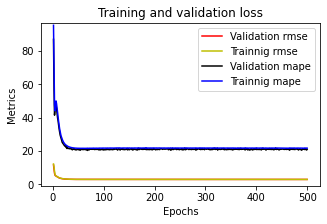

In [189]:
plotme(model8_1_3)

In [190]:
# inputs: distance + roadtypes distance
model8_1_5 = nnmodel_(100, num_hlayers=1,Epoch=500)
model8_1_5

Epoch 1/500
416/416 [==============================] - 1s 898us/step - loss: 515096.6250 - mape: 93.2683 - rmse: 717.7023 - val_loss: 436230.2812 - val_mape: 80.1905 - val_rmse: 660.4773
Epoch 2/500
416/416 [==============================] - 0s 760us/step - loss: 313012.7188 - mape: 60.7297 - rmse: 559.4754 - val_loss: 207843.5156 - val_mape: 45.6247 - val_rmse: 455.8986
Epoch 3/500
416/416 [==============================] - 0s 775us/step - loss: 143967.5156 - mape: 43.7995 - rmse: 379.4305 - val_loss: 107778.3984 - val_mape: 43.7811 - val_rmse: 328.2962
Epoch 4/500
416/416 [==============================] - 0s 767us/step - loss: 96475.0078 - mape: 48.8061 - rmse: 310.6042 - val_loss: 90305.4844 - val_mape: 47.9191 - val_rmse: 300.5087
Epoch 5/500
416/416 [==============================] - 0s 746us/step - loss: 85639.5156 - mape: 49.1718 - rmse: 292.6423 - val_loss: 80751.6094 - val_mape: 46.0653 - val_rmse: 284.1683
Epoch 6/500
416/416 [==============================] - 0s 784us/step 

416/416 [==============================] - 0s 753us/step - loss: 29065.7773 - mape: 21.4812 - rmse: 170.4869 - val_loss: 28972.6113 - val_mape: 21.8118 - val_rmse: 170.2134
Epoch 46/500
416/416 [==============================] - 0s 771us/step - loss: 29067.8027 - mape: 21.6018 - rmse: 170.4928 - val_loss: 28921.8301 - val_mape: 20.6487 - val_rmse: 170.0642
Epoch 47/500
416/416 [==============================] - 0s 724us/step - loss: 29056.2402 - mape: 21.5967 - rmse: 170.4589 - val_loss: 28872.1250 - val_mape: 21.0675 - val_rmse: 169.9180
Epoch 48/500
416/416 [==============================] - 0s 747us/step - loss: 29034.8750 - mape: 21.5720 - rmse: 170.3962 - val_loss: 28895.3320 - val_mape: 20.7254 - val_rmse: 169.9863
Epoch 49/500
416/416 [==============================] - 0s 728us/step - loss: 29018.7305 - mape: 21.4721 - rmse: 170.3488 - val_loss: 28897.1465 - val_mape: 21.5505 - val_rmse: 169.9916
Epoch 50/500
416/416 [==============================] - 0s 735us/step - loss: 29029

Epoch 133/500
416/416 [==============================] - 0s 809us/step - loss: 28945.9395 - mape: 21.6695 - rmse: 170.1351 - val_loss: 28809.7266 - val_mape: 21.5887 - val_rmse: 169.7343
Epoch 134/500
416/416 [==============================] - 0s 797us/step - loss: 28965.2773 - mape: 21.7254 - rmse: 170.1919 - val_loss: 28850.3262 - val_mape: 20.7504 - val_rmse: 169.8538
Epoch 135/500
416/416 [==============================] - 0s 791us/step - loss: 28950.5137 - mape: 21.6461 - rmse: 170.1485 - val_loss: 28791.5840 - val_mape: 21.2984 - val_rmse: 169.6808
Epoch 136/500
416/416 [==============================] - 0s 788us/step - loss: 28956.7500 - mape: 21.6753 - rmse: 170.1668 - val_loss: 28796.5156 - val_mape: 21.4430 - val_rmse: 169.6954
Epoch 137/500
416/416 [==============================] - 0s 793us/step - loss: 28947.5312 - mape: 21.7221 - rmse: 170.1397 - val_loss: 28938.0742 - val_mape: 20.4770 - val_rmse: 170.1120
Epoch 138/500
416/416 [==============================] - 0s 795us

Epoch 177/500
416/416 [==============================] - 0s 789us/step - loss: 28941.1113 - mape: 21.6910 - rmse: 170.1209 - val_loss: 28776.4688 - val_mape: 21.4311 - val_rmse: 169.6363
Epoch 178/500
416/416 [==============================] - 0s 785us/step - loss: 28932.1211 - mape: 21.6550 - rmse: 170.0945 - val_loss: 28811.9395 - val_mape: 20.8602 - val_rmse: 169.7408
Epoch 179/500
416/416 [==============================] - 0s 794us/step - loss: 28923.2832 - mape: 21.6647 - rmse: 170.0685 - val_loss: 28849.5176 - val_mape: 20.7030 - val_rmse: 169.8515
Epoch 180/500
416/416 [==============================] - 0s 786us/step - loss: 28936.1172 - mape: 21.6569 - rmse: 170.1062 - val_loss: 28803.0156 - val_mape: 20.9116 - val_rmse: 169.7145
Epoch 181/500
416/416 [==============================] - 0s 790us/step - loss: 28906.3652 - mape: 21.6908 - rmse: 170.0187 - val_loss: 28892.2441 - val_mape: 20.5500 - val_rmse: 169.9772
Epoch 182/500
416/416 [==============================] - 0s 779us

Epoch 221/500
416/416 [==============================] - 0s 786us/step - loss: 28865.5820 - mape: 21.6630 - rmse: 169.8987 - val_loss: 28755.4004 - val_mape: 20.8443 - val_rmse: 169.5742
Epoch 222/500
416/416 [==============================] - 0s 784us/step - loss: 28850.7852 - mape: 21.6033 - rmse: 169.8552 - val_loss: 28775.5879 - val_mape: 20.7958 - val_rmse: 169.6337
Epoch 223/500
416/416 [==============================] - 0s 792us/step - loss: 28861.3945 - mape: 21.6504 - rmse: 169.8864 - val_loss: 28728.8516 - val_mape: 21.0672 - val_rmse: 169.4959
Epoch 224/500
416/416 [==============================] - 0s 794us/step - loss: 28861.9395 - mape: 21.6685 - rmse: 169.8880 - val_loss: 28779.1621 - val_mape: 20.7652 - val_rmse: 169.6442
Epoch 225/500
416/416 [==============================] - 0s 787us/step - loss: 28846.0469 - mape: 21.6100 - rmse: 169.8412 - val_loss: 28774.1094 - val_mape: 20.7940 - val_rmse: 169.6293
Epoch 226/500
416/416 [==============================] - 0s 805us

Epoch 265/500
416/416 [==============================] - 0s 739us/step - loss: 28788.7480 - mape: 21.6246 - rmse: 169.6725 - val_loss: 28680.7109 - val_mape: 21.2932 - val_rmse: 169.3538
Epoch 266/500
416/416 [==============================] - 0s 741us/step - loss: 28798.1719 - mape: 21.6879 - rmse: 169.7002 - val_loss: 28808.0293 - val_mape: 20.4817 - val_rmse: 169.7293
Epoch 267/500
416/416 [==============================] - 0s 739us/step - loss: 28790.7363 - mape: 21.5915 - rmse: 169.6783 - val_loss: 28768.9355 - val_mape: 20.6400 - val_rmse: 169.6141
Epoch 268/500
416/416 [==============================] - 0s 759us/step - loss: 28792.6348 - mape: 21.6264 - rmse: 169.6839 - val_loss: 28730.2793 - val_mape: 20.7948 - val_rmse: 169.5001
Epoch 269/500
416/416 [==============================] - 0s 765us/step - loss: 28785.9453 - mape: 21.6567 - rmse: 169.6642 - val_loss: 28672.1836 - val_mape: 21.1556 - val_rmse: 169.3286
Epoch 270/500
416/416 [==============================] - 0s 745us

Epoch 309/500
416/416 [==============================] - 0s 773us/step - loss: 28750.6973 - mape: 21.7398 - rmse: 169.5603 - val_loss: 28691.5391 - val_mape: 20.7694 - val_rmse: 169.3858
Epoch 310/500
416/416 [==============================] - 0s 747us/step - loss: 28743.1211 - mape: 21.5634 - rmse: 169.5380 - val_loss: 28693.8008 - val_mape: 20.7859 - val_rmse: 169.3924
Epoch 311/500
416/416 [==============================] - 0s 744us/step - loss: 28739.6191 - mape: 21.6358 - rmse: 169.5276 - val_loss: 28665.1953 - val_mape: 20.9892 - val_rmse: 169.3080
Epoch 312/500
416/416 [==============================] - 0s 767us/step - loss: 28717.1641 - mape: 21.6914 - rmse: 169.4614 - val_loss: 28803.1309 - val_mape: 20.4381 - val_rmse: 169.7149
Epoch 313/500
416/416 [==============================] - 0s 770us/step - loss: 28744.7871 - mape: 21.5623 - rmse: 169.5429 - val_loss: 28718.4121 - val_mape: 20.7527 - val_rmse: 169.4651
Epoch 314/500
416/416 [==============================] - 0s 794us

Epoch 353/500
416/416 [==============================] - 0s 783us/step - loss: 28692.7617 - mape: 21.5886 - rmse: 169.3894 - val_loss: 28641.6934 - val_mape: 20.8496 - val_rmse: 169.2386
Epoch 354/500
416/416 [==============================] - 0s 768us/step - loss: 28683.1074 - mape: 21.5930 - rmse: 169.3609 - val_loss: 28732.7949 - val_mape: 20.4869 - val_rmse: 169.5075
Epoch 355/500
416/416 [==============================] - 0s 762us/step - loss: 28701.4863 - mape: 21.6110 - rmse: 169.4151 - val_loss: 28624.4160 - val_mape: 21.0358 - val_rmse: 169.1875
Epoch 356/500
416/416 [==============================] - 0s 751us/step - loss: 28698.3867 - mape: 21.6119 - rmse: 169.4060 - val_loss: 28653.2324 - val_mape: 20.8016 - val_rmse: 169.2727
Epoch 357/500
416/416 [==============================] - 0s 799us/step - loss: 28696.7754 - mape: 21.5847 - rmse: 169.4012 - val_loss: 28618.2773 - val_mape: 21.0869 - val_rmse: 169.1694
Epoch 358/500
416/416 [==============================] - 0s 772us

Epoch 397/500
416/416 [==============================] - 0s 865us/step - loss: 28633.0352 - mape: 21.5716 - rmse: 169.2130 - val_loss: 28623.8926 - val_mape: 20.8342 - val_rmse: 169.1860
Epoch 398/500
416/416 [==============================] - 0s 817us/step - loss: 28683.2617 - mape: 21.6275 - rmse: 169.3613 - val_loss: 28600.6738 - val_mape: 20.9955 - val_rmse: 169.1173
Epoch 399/500
416/416 [==============================] - 0s 687us/step - loss: 28670.5352 - mape: 21.5898 - rmse: 169.3238 - val_loss: 28672.0117 - val_mape: 20.6159 - val_rmse: 169.3281
Epoch 400/500
416/416 [==============================] - 0s 782us/step - loss: 28656.9023 - mape: 21.6564 - rmse: 169.2835 - val_loss: 28602.9062 - val_mape: 20.9207 - val_rmse: 169.1239
Epoch 401/500
416/416 [==============================] - 0s 755us/step - loss: 28648.2090 - mape: 21.5874 - rmse: 169.2578 - val_loss: 28642.0352 - val_mape: 20.7113 - val_rmse: 169.2396
Epoch 402/500
416/416 [==============================] - 0s 747us

Epoch 441/500
416/416 [==============================] - 0s 863us/step - loss: 28634.5586 - mape: 21.5971 - rmse: 169.2175 - val_loss: 28601.4219 - val_mape: 20.7838 - val_rmse: 169.1196
Epoch 442/500
416/416 [==============================] - 0s 853us/step - loss: 28617.4785 - mape: 21.5967 - rmse: 169.1670 - val_loss: 28588.4082 - val_mape: 20.8849 - val_rmse: 169.0811
Epoch 443/500
416/416 [==============================] - 0s 848us/step - loss: 28616.6543 - mape: 21.5701 - rmse: 169.1646 - val_loss: 28564.4414 - val_mape: 21.1261 - val_rmse: 169.0102
Epoch 444/500
416/416 [==============================] - 0s 857us/step - loss: 28603.7422 - mape: 21.6304 - rmse: 169.1264 - val_loss: 28569.2246 - val_mape: 20.9512 - val_rmse: 169.0243
Epoch 445/500
416/416 [==============================] - 0s 845us/step - loss: 28617.5410 - mape: 21.5515 - rmse: 169.1672 - val_loss: 28560.9453 - val_mape: 21.0335 - val_rmse: 168.9998
Epoch 446/500
416/416 [==============================] - 0s 871us

Epoch 485/500
416/416 [==============================] - 0s 757us/step - loss: 28574.8145 - mape: 21.5288 - rmse: 169.0409 - val_loss: 28550.1270 - val_mape: 21.4242 - val_rmse: 168.9678
Epoch 486/500
416/416 [==============================] - 0s 737us/step - loss: 28589.0117 - mape: 21.6078 - rmse: 169.0829 - val_loss: 28569.2559 - val_mape: 20.8840 - val_rmse: 169.0244
Epoch 487/500
416/416 [==============================] - 0s 784us/step - loss: 28585.3535 - mape: 21.6382 - rmse: 169.0720 - val_loss: 28554.0605 - val_mape: 20.8931 - val_rmse: 168.9795
Epoch 488/500
416/416 [==============================] - 0s 848us/step - loss: 28587.1309 - mape: 21.5516 - rmse: 169.0773 - val_loss: 28649.3379 - val_mape: 20.5168 - val_rmse: 169.2612
Epoch 489/500
416/416 [==============================] - 0s 785us/step - loss: 28574.9004 - mape: 21.5643 - rmse: 169.0411 - val_loss: 28587.5996 - val_mape: 20.7681 - val_rmse: 169.0787
Epoch 490/500
416/416 [==============================] - 0s 753us

In [191]:
# inputs: distance + roadtypes distance
model8_1_1 = nnmodel_(100,50, num_hlayers=2,Epoch=500)
model8_1_1

Epoch 1/500
416/416 [==============================] - 1s 1ms/step - loss: 275162.9688 - mape: 66.5323 - rmse: 524.5598 - val_loss: 83894.2578 - val_mape: 47.3319 - val_rmse: 289.6451
Epoch 2/500
416/416 [==============================] - 0s 764us/step - loss: 68016.7266 - mape: 43.9960 - rmse: 260.8002 - val_loss: 53880.1602 - val_mape: 37.1230 - val_rmse: 232.1210
Epoch 3/500
416/416 [==============================] - 0s 825us/step - loss: 47066.8516 - mape: 32.4290 - rmse: 216.9490 - val_loss: 40174.8711 - val_mape: 27.0256 - val_rmse: 200.4367
Epoch 4/500
416/416 [==============================] - 0s 811us/step - loss: 37965.9180 - mape: 26.1657 - rmse: 194.8484 - val_loss: 34332.1367 - val_mape: 23.9172 - val_rmse: 185.2893
Epoch 5/500
416/416 [==============================] - 0s 844us/step - loss: 33854.8281 - mape: 23.8074 - rmse: 183.9968 - val_loss: 31897.2598 - val_mape: 23.0571 - val_rmse: 178.5980
Epoch 6/500
416/416 [==============================] - 0s 773us/step - loss:

416/416 [==============================] - 0s 794us/step - loss: 28493.5859 - mape: 21.4426 - rmse: 168.8004 - val_loss: 28396.4492 - val_mape: 20.6886 - val_rmse: 168.5125
Epoch 90/500
416/416 [==============================] - 0s 828us/step - loss: 28447.2324 - mape: 21.4011 - rmse: 168.6631 - val_loss: 28538.6074 - val_mape: 21.8506 - val_rmse: 168.9337
Epoch 91/500
416/416 [==============================] - 0s 815us/step - loss: 28487.3438 - mape: 21.4540 - rmse: 168.7819 - val_loss: 28405.2617 - val_mape: 20.5215 - val_rmse: 168.5386
Epoch 92/500
416/416 [==============================] - 0s 770us/step - loss: 28480.7031 - mape: 21.4708 - rmse: 168.7623 - val_loss: 28516.1680 - val_mape: 20.0313 - val_rmse: 168.8673
Epoch 93/500
416/416 [==============================] - 0s 790us/step - loss: 28441.9668 - mape: 21.2897 - rmse: 168.6475 - val_loss: 28399.4707 - val_mape: 21.0996 - val_rmse: 168.5214
Epoch 94/500
416/416 [==============================] - 0s 789us/step - loss: 28475

Epoch 133/500
416/416 [==============================] - 0s 790us/step - loss: 28333.7266 - mape: 21.3549 - rmse: 168.3262 - val_loss: 28264.5234 - val_mape: 20.7877 - val_rmse: 168.1206
Epoch 134/500
416/416 [==============================] - 0s 786us/step - loss: 28249.5605 - mape: 21.3606 - rmse: 168.0760 - val_loss: 28346.1953 - val_mape: 20.1946 - val_rmse: 168.3633
Epoch 135/500
416/416 [==============================] - 0s 762us/step - loss: 28270.4219 - mape: 21.2184 - rmse: 168.1381 - val_loss: 28396.0762 - val_mape: 20.2400 - val_rmse: 168.5114
Epoch 136/500
416/416 [==============================] - 0s 763us/step - loss: 28235.1680 - mape: 21.2795 - rmse: 168.0332 - val_loss: 28355.8262 - val_mape: 20.1808 - val_rmse: 168.3919
Epoch 137/500
416/416 [==============================] - 0s 799us/step - loss: 28277.5703 - mape: 21.3516 - rmse: 168.1594 - val_loss: 28296.2910 - val_mape: 21.1377 - val_rmse: 168.2150
Epoch 138/500
416/416 [==============================] - 0s 804us

Epoch 177/500
416/416 [==============================] - 0s 793us/step - loss: 28122.3477 - mape: 21.2976 - rmse: 167.6972 - val_loss: 28271.9863 - val_mape: 20.2053 - val_rmse: 168.1428
Epoch 178/500
416/416 [==============================] - 0s 802us/step - loss: 28195.6348 - mape: 21.2256 - rmse: 167.9156 - val_loss: 28204.4277 - val_mape: 20.2597 - val_rmse: 167.9417
Epoch 179/500
416/416 [==============================] - 0s 775us/step - loss: 28142.9824 - mape: 21.2575 - rmse: 167.7587 - val_loss: 28175.8945 - val_mape: 20.7242 - val_rmse: 167.8568
Epoch 180/500
416/416 [==============================] - 0s 785us/step - loss: 28141.5078 - mape: 21.2447 - rmse: 167.7543 - val_loss: 28298.9766 - val_mape: 21.2828 - val_rmse: 168.2230
Epoch 181/500
416/416 [==============================] - 0s 776us/step - loss: 28179.8867 - mape: 21.2580 - rmse: 167.8687 - val_loss: 28175.4102 - val_mape: 20.7019 - val_rmse: 167.8553
Epoch 182/500
416/416 [==============================] - 0s 796us

Epoch 221/500
416/416 [==============================] - 0s 792us/step - loss: 28089.8086 - mape: 21.1363 - rmse: 167.6001 - val_loss: 28576.3867 - val_mape: 19.6338 - val_rmse: 169.0455
Epoch 222/500
416/416 [==============================] - 0s 809us/step - loss: 28111.2793 - mape: 21.1803 - rmse: 167.6642 - val_loss: 28235.4785 - val_mape: 20.4006 - val_rmse: 168.0342
Epoch 223/500
416/416 [==============================] - 0s 787us/step - loss: 28165.6348 - mape: 21.2896 - rmse: 167.8262 - val_loss: 28164.4961 - val_mape: 20.9451 - val_rmse: 167.8228
Epoch 224/500
416/416 [==============================] - 0s 807us/step - loss: 28077.6035 - mape: 21.2224 - rmse: 167.5637 - val_loss: 28129.8438 - val_mape: 20.6710 - val_rmse: 167.7195
Epoch 225/500
416/416 [==============================] - 0s 787us/step - loss: 28087.6738 - mape: 21.2738 - rmse: 167.5938 - val_loss: 28401.3652 - val_mape: 21.5908 - val_rmse: 168.5270
Epoch 226/500
416/416 [==============================] - 0s 833us

Epoch 265/500
416/416 [==============================] - 0s 953us/step - loss: 28007.7168 - mape: 21.1893 - rmse: 167.3551 - val_loss: 28371.6641 - val_mape: 19.8674 - val_rmse: 168.4389
Epoch 266/500
416/416 [==============================] - 0s 927us/step - loss: 27950.2676 - mape: 21.1278 - rmse: 167.1833 - val_loss: 28212.2656 - val_mape: 20.3108 - val_rmse: 167.9651
Epoch 267/500
416/416 [==============================] - 0s 914us/step - loss: 27940.1348 - mape: 21.1332 - rmse: 167.1530 - val_loss: 28199.0137 - val_mape: 21.5387 - val_rmse: 167.9256
Epoch 268/500
416/416 [==============================] - 0s 916us/step - loss: 27982.5430 - mape: 21.1905 - rmse: 167.2798 - val_loss: 28125.6348 - val_mape: 21.0364 - val_rmse: 167.7070
Epoch 269/500
416/416 [==============================] - 0s 922us/step - loss: 28001.2988 - mape: 21.2276 - rmse: 167.3359 - val_loss: 28146.0605 - val_mape: 20.2756 - val_rmse: 167.7679
Epoch 270/500
416/416 [==============================] - 0s 990us

Epoch 309/500
416/416 [==============================] - 0s 960us/step - loss: 27895.0352 - mape: 21.1519 - rmse: 167.0181 - val_loss: 28074.0273 - val_mape: 20.6631 - val_rmse: 167.5531
Epoch 310/500
416/416 [==============================] - 0s 946us/step - loss: 27873.6230 - mape: 21.1998 - rmse: 166.9539 - val_loss: 28077.7500 - val_mape: 20.1011 - val_rmse: 167.5642
Epoch 311/500
416/416 [==============================] - 0s 947us/step - loss: 27879.7539 - mape: 21.1156 - rmse: 166.9723 - val_loss: 28174.7812 - val_mape: 19.8598 - val_rmse: 167.8535
Epoch 312/500
416/416 [==============================] - 0s 959us/step - loss: 27914.3828 - mape: 21.1321 - rmse: 167.0760 - val_loss: 28020.8750 - val_mape: 20.6826 - val_rmse: 167.3944
Epoch 313/500
416/416 [==============================] - 0s 952us/step - loss: 27862.0078 - mape: 21.1144 - rmse: 166.9192 - val_loss: 28026.7852 - val_mape: 20.8343 - val_rmse: 167.4120
Epoch 314/500
416/416 [==============================] - 0s 954us

Epoch 353/500
416/416 [==============================] - 0s 904us/step - loss: 27804.1855 - mape: 21.1381 - rmse: 166.7459 - val_loss: 28041.8184 - val_mape: 20.2743 - val_rmse: 167.4569
Epoch 354/500
416/416 [==============================] - 0s 908us/step - loss: 27847.5332 - mape: 21.1664 - rmse: 166.8758 - val_loss: 27999.0098 - val_mape: 20.9864 - val_rmse: 167.3290
Epoch 355/500
416/416 [==============================] - 0s 902us/step - loss: 27800.1328 - mape: 21.0226 - rmse: 166.7337 - val_loss: 28144.2324 - val_mape: 20.3035 - val_rmse: 167.7624
Epoch 356/500
416/416 [==============================] - 0s 892us/step - loss: 27864.2500 - mape: 21.2504 - rmse: 166.9259 - val_loss: 27986.2578 - val_mape: 20.5467 - val_rmse: 167.2909
Epoch 357/500
416/416 [==============================] - 0s 911us/step - loss: 27773.0078 - mape: 21.0818 - rmse: 166.6524 - val_loss: 28006.8672 - val_mape: 20.9240 - val_rmse: 167.3525
Epoch 358/500
416/416 [==============================] - 0s 911us

Epoch 397/500
416/416 [==============================] - 0s 891us/step - loss: 27734.5469 - mape: 21.0979 - rmse: 166.5369 - val_loss: 28090.3926 - val_mape: 20.0327 - val_rmse: 167.6019
Epoch 398/500
416/416 [==============================] - 0s 890us/step - loss: 27709.8359 - mape: 21.1038 - rmse: 166.4627 - val_loss: 28352.6387 - val_mape: 19.7593 - val_rmse: 168.3824
Epoch 399/500
416/416 [==============================] - 0s 905us/step - loss: 27733.8086 - mape: 21.0652 - rmse: 166.5347 - val_loss: 28202.3496 - val_mape: 20.0950 - val_rmse: 167.9355
Epoch 400/500
416/416 [==============================] - 0s 889us/step - loss: 27706.1270 - mape: 21.1331 - rmse: 166.4516 - val_loss: 28109.2930 - val_mape: 20.0804 - val_rmse: 167.6583
Epoch 401/500
416/416 [==============================] - 0s 894us/step - loss: 27724.4785 - mape: 21.1174 - rmse: 166.5067 - val_loss: 28085.3359 - val_mape: 20.2102 - val_rmse: 167.5868
Epoch 402/500
416/416 [==============================] - 0s 908us

Epoch 441/500
416/416 [==============================] - 0s 831us/step - loss: 27640.3926 - mape: 21.0397 - rmse: 166.2540 - val_loss: 28069.5410 - val_mape: 20.7720 - val_rmse: 167.5397
Epoch 442/500
416/416 [==============================] - 0s 834us/step - loss: 27618.4531 - mape: 21.1395 - rmse: 166.1880 - val_loss: 28076.9961 - val_mape: 21.1570 - val_rmse: 167.5619
Epoch 443/500
416/416 [==============================] - 0s 825us/step - loss: 27659.6641 - mape: 21.1512 - rmse: 166.3120 - val_loss: 28020.7871 - val_mape: 20.4199 - val_rmse: 167.3941
Epoch 444/500
416/416 [==============================] - 0s 838us/step - loss: 27632.1641 - mape: 21.1055 - rmse: 166.2292 - val_loss: 28252.8184 - val_mape: 19.8884 - val_rmse: 168.0858
Epoch 445/500
416/416 [==============================] - 0s 830us/step - loss: 27655.8848 - mape: 21.0905 - rmse: 166.3006 - val_loss: 28335.4668 - val_mape: 19.7743 - val_rmse: 168.3314
Epoch 446/500
416/416 [==============================] - 0s 847us

Epoch 485/500
416/416 [==============================] - 0s 837us/step - loss: 27575.5977 - mape: 21.0854 - rmse: 166.0590 - val_loss: 28248.2012 - val_mape: 19.8335 - val_rmse: 168.0720
Epoch 486/500
416/416 [==============================] - 0s 834us/step - loss: 27558.5254 - mape: 21.0801 - rmse: 166.0076 - val_loss: 28056.8086 - val_mape: 20.8773 - val_rmse: 167.5017
Epoch 487/500
416/416 [==============================] - 0s 833us/step - loss: 27543.2441 - mape: 21.0781 - rmse: 165.9616 - val_loss: 28057.9570 - val_mape: 20.5551 - val_rmse: 167.5051
Epoch 488/500
416/416 [==============================] - 0s 836us/step - loss: 27635.7832 - mape: 21.0290 - rmse: 166.2401 - val_loss: 28186.8105 - val_mape: 21.6175 - val_rmse: 167.8893
Epoch 489/500
416/416 [==============================] - 0s 841us/step - loss: 27605.8613 - mape: 21.1192 - rmse: 166.1501 - val_loss: 28088.7676 - val_mape: 20.3647 - val_rmse: 167.5970
Epoch 490/500
416/416 [==============================] - 0s 841us

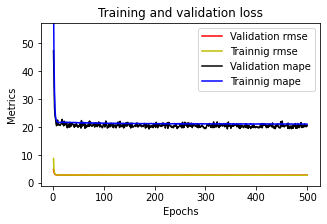

In [192]:
plotme(model8_1_1)

In [193]:
# inputs: distance + hour + roadtypes distance
model8_1_2 = nnmodel_(200,100, num_hlayers=2,Epoch=500)
model8_1_2

Epoch 1/500
416/416 [==============================] - 1s 1ms/step - loss: 193022.1562 - mape: 57.9226 - rmse: 439.3429 - val_loss: 61873.4219 - val_mape: 40.7046 - val_rmse: 248.7437
Epoch 2/500
416/416 [==============================] - 0s 955us/step - loss: 48198.5859 - mape: 32.7997 - rmse: 219.5418 - val_loss: 38120.1094 - val_mape: 26.9713 - val_rmse: 195.2437
Epoch 3/500
416/416 [==============================] - 0s 985us/step - loss: 35550.8242 - mape: 24.6972 - rmse: 188.5493 - val_loss: 32003.2324 - val_mape: 22.5783 - val_rmse: 178.8945
Epoch 4/500
416/416 [==============================] - 0s 982us/step - loss: 31662.9023 - mape: 22.6041 - rmse: 177.9407 - val_loss: 30231.5215 - val_mape: 20.6816 - val_rmse: 173.8721
Epoch 5/500
416/416 [==============================] - 0s 971us/step - loss: 30130.9961 - mape: 21.9911 - rmse: 173.5828 - val_loss: 31338.7188 - val_mape: 19.3190 - val_rmse: 177.0275
Epoch 6/500
416/416 [==============================] - 0s 964us/step - loss:

416/416 [==============================] - 0s 963us/step - loss: 28223.1680 - mape: 21.3550 - rmse: 167.9975 - val_loss: 28223.6582 - val_mape: 21.5456 - val_rmse: 167.9990
Epoch 90/500
416/416 [==============================] - 0s 962us/step - loss: 28206.6816 - mape: 21.2922 - rmse: 167.9485 - val_loss: 28122.1992 - val_mape: 20.2458 - val_rmse: 167.6967
Epoch 91/500
416/416 [==============================] - 0s 957us/step - loss: 28189.8574 - mape: 21.3050 - rmse: 167.8984 - val_loss: 28075.9707 - val_mape: 20.9311 - val_rmse: 167.5589
Epoch 92/500
416/416 [==============================] - 0s 1ms/step - loss: 28178.0469 - mape: 21.1708 - rmse: 167.8632 - val_loss: 28250.0703 - val_mape: 20.6176 - val_rmse: 168.0776
Epoch 93/500
416/416 [==============================] - 0s 957us/step - loss: 28154.1406 - mape: 21.2918 - rmse: 167.7920 - val_loss: 28771.4961 - val_mape: 19.5794 - val_rmse: 169.6216
Epoch 94/500
416/416 [==============================] - 0s 966us/step - loss: 28215.5

Epoch 133/500
416/416 [==============================] - 0s 1ms/step - loss: 28073.1016 - mape: 21.1742 - rmse: 167.5503 - val_loss: 28234.5703 - val_mape: 19.7374 - val_rmse: 168.0315
Epoch 134/500
416/416 [==============================] - 0s 1ms/step - loss: 27888.3008 - mape: 21.1732 - rmse: 166.9979 - val_loss: 28482.0996 - val_mape: 19.7451 - val_rmse: 168.7664
Epoch 135/500
416/416 [==============================] - 0s 878us/step - loss: 27946.9629 - mape: 21.1610 - rmse: 167.1734 - val_loss: 27985.6738 - val_mape: 21.2928 - val_rmse: 167.2892
Epoch 136/500
416/416 [==============================] - 0s 851us/step - loss: 28020.8965 - mape: 21.2048 - rmse: 167.3944 - val_loss: 27939.2168 - val_mape: 20.1326 - val_rmse: 167.1503
Epoch 137/500
416/416 [==============================] - 0s 970us/step - loss: 27909.8398 - mape: 21.1424 - rmse: 167.0624 - val_loss: 27937.0605 - val_mape: 20.9748 - val_rmse: 167.1438
Epoch 138/500
416/416 [==============================] - 0s 989us/ste

Epoch 177/500
416/416 [==============================] - 0s 877us/step - loss: 27780.1758 - mape: 21.1429 - rmse: 166.6739 - val_loss: 27858.2090 - val_mape: 20.7584 - val_rmse: 166.9078
Epoch 178/500
416/416 [==============================] - 0s 857us/step - loss: 27731.2715 - mape: 21.0921 - rmse: 166.5271 - val_loss: 27883.9941 - val_mape: 20.4093 - val_rmse: 166.9850
Epoch 179/500
416/416 [==============================] - 0s 958us/step - loss: 27747.2344 - mape: 21.0875 - rmse: 166.5750 - val_loss: 27958.9258 - val_mape: 21.2685 - val_rmse: 167.2092
Epoch 180/500
416/416 [==============================] - 0s 999us/step - loss: 27717.2324 - mape: 21.0708 - rmse: 166.4849 - val_loss: 27888.9648 - val_mape: 20.7067 - val_rmse: 166.9999
Epoch 181/500
416/416 [==============================] - 0s 877us/step - loss: 27746.4395 - mape: 21.1184 - rmse: 166.5726 - val_loss: 28030.9609 - val_mape: 20.0883 - val_rmse: 167.4245
Epoch 182/500
416/416 [==============================] - 0s 925us

Epoch 221/500
416/416 [==============================] - 0s 903us/step - loss: 27570.5117 - mape: 21.0752 - rmse: 166.0437 - val_loss: 28382.2246 - val_mape: 19.5705 - val_rmse: 168.4702
Epoch 222/500
416/416 [==============================] - 0s 868us/step - loss: 27527.5156 - mape: 21.0322 - rmse: 165.9142 - val_loss: 28889.4160 - val_mape: 19.2799 - val_rmse: 169.9689
Epoch 223/500
416/416 [==============================] - 0s 888us/step - loss: 27536.0840 - mape: 21.0425 - rmse: 165.9400 - val_loss: 27921.4688 - val_mape: 20.7089 - val_rmse: 167.0972
Epoch 224/500
416/416 [==============================] - 0s 1ms/step - loss: 27554.6934 - mape: 21.0848 - rmse: 165.9961 - val_loss: 28803.3320 - val_mape: 19.2825 - val_rmse: 169.7154
Epoch 225/500
416/416 [==============================] - 0s 1ms/step - loss: 27517.7422 - mape: 20.9544 - rmse: 165.8847 - val_loss: 27953.1309 - val_mape: 21.1997 - val_rmse: 167.1919
Epoch 226/500
416/416 [==============================] - 0s 1ms/step 

Epoch 265/500
416/416 [==============================] - 0s 915us/step - loss: 27168.3613 - mape: 20.9970 - rmse: 164.8283 - val_loss: 27963.9395 - val_mape: 20.7794 - val_rmse: 167.2242
Epoch 266/500
416/416 [==============================] - 0s 906us/step - loss: 27194.1719 - mape: 20.8560 - rmse: 164.9066 - val_loss: 28386.5156 - val_mape: 19.7623 - val_rmse: 168.4830
Epoch 267/500
416/416 [==============================] - 0s 900us/step - loss: 27218.3477 - mape: 20.9793 - rmse: 164.9798 - val_loss: 28076.8027 - val_mape: 21.3414 - val_rmse: 167.5613
Epoch 268/500
416/416 [==============================] - 0s 903us/step - loss: 27197.4980 - mape: 20.9632 - rmse: 164.9166 - val_loss: 27901.3711 - val_mape: 20.4468 - val_rmse: 167.0370
Epoch 269/500
416/416 [==============================] - 0s 916us/step - loss: 27163.2168 - mape: 20.9518 - rmse: 164.8127 - val_loss: 27868.9297 - val_mape: 20.8004 - val_rmse: 166.9399
Epoch 270/500
416/416 [==============================] - 0s 901us

Epoch 309/500
416/416 [==============================] - 0s 965us/step - loss: 26800.9902 - mape: 20.8999 - rmse: 163.7101 - val_loss: 28049.1562 - val_mape: 21.6973 - val_rmse: 167.4788
Epoch 310/500
416/416 [==============================] - 0s 906us/step - loss: 26817.8730 - mape: 20.8148 - rmse: 163.7616 - val_loss: 27896.9121 - val_mape: 20.8281 - val_rmse: 167.0237
Epoch 311/500
416/416 [==============================] - 0s 911us/step - loss: 26730.8984 - mape: 20.8591 - rmse: 163.4959 - val_loss: 28157.5566 - val_mape: 22.0149 - val_rmse: 167.8021
Epoch 312/500
416/416 [==============================] - 0s 899us/step - loss: 26761.8047 - mape: 20.8059 - rmse: 163.5904 - val_loss: 28014.9180 - val_mape: 21.4468 - val_rmse: 167.3766
Epoch 313/500
416/416 [==============================] - 0s 912us/step - loss: 26776.5586 - mape: 20.8511 - rmse: 163.6354 - val_loss: 27909.3223 - val_mape: 21.1055 - val_rmse: 167.0608
Epoch 314/500
416/416 [==============================] - 0s 911us

Epoch 353/500
416/416 [==============================] - 0s 961us/step - loss: 26353.3750 - mape: 20.7790 - rmse: 162.3372 - val_loss: 29033.6504 - val_mape: 19.3558 - val_rmse: 170.3926
Epoch 354/500
416/416 [==============================] - 0s 996us/step - loss: 26274.2734 - mape: 20.7904 - rmse: 162.0934 - val_loss: 27839.6348 - val_mape: 20.6166 - val_rmse: 166.8521
Epoch 355/500
416/416 [==============================] - 0s 1ms/step - loss: 26352.2793 - mape: 20.7707 - rmse: 162.3338 - val_loss: 27936.5586 - val_mape: 21.2964 - val_rmse: 167.1423
Epoch 356/500
416/416 [==============================] - 1s 1ms/step - loss: 26338.7852 - mape: 20.8084 - rmse: 162.2923 - val_loss: 28097.0840 - val_mape: 19.9121 - val_rmse: 167.6218
Epoch 357/500
416/416 [==============================] - 0s 1ms/step - loss: 26283.3652 - mape: 20.7928 - rmse: 162.1214 - val_loss: 27880.4590 - val_mape: 20.4946 - val_rmse: 166.9744
Epoch 358/500
416/416 [==============================] - 0s 987us/step 

Epoch 397/500
416/416 [==============================] - 0s 932us/step - loss: 25981.4961 - mape: 20.7093 - rmse: 161.1878 - val_loss: 28103.1953 - val_mape: 21.8623 - val_rmse: 167.6401
Epoch 398/500
416/416 [==============================] - 0s 936us/step - loss: 25946.1484 - mape: 20.6794 - rmse: 161.0781 - val_loss: 27753.4648 - val_mape: 20.7958 - val_rmse: 166.5937
Epoch 399/500
416/416 [==============================] - 0s 937us/step - loss: 25930.7598 - mape: 20.7337 - rmse: 161.0303 - val_loss: 27934.9824 - val_mape: 20.2443 - val_rmse: 167.1376
Epoch 400/500
416/416 [==============================] - 0s 938us/step - loss: 25805.7520 - mape: 20.6656 - rmse: 160.6417 - val_loss: 28102.9473 - val_mape: 21.4021 - val_rmse: 167.6393
Epoch 401/500
416/416 [==============================] - 0s 941us/step - loss: 25881.7168 - mape: 20.6075 - rmse: 160.8780 - val_loss: 28025.1992 - val_mape: 20.1205 - val_rmse: 167.4073
Epoch 402/500
416/416 [==============================] - 0s 936us

Epoch 441/500
416/416 [==============================] - 0s 999us/step - loss: 25554.3340 - mape: 20.5672 - rmse: 159.8572 - val_loss: 27856.8516 - val_mape: 20.7620 - val_rmse: 166.9037
Epoch 442/500
416/416 [==============================] - 0s 1ms/step - loss: 25558.4805 - mape: 20.5948 - rmse: 159.8702 - val_loss: 27880.1699 - val_mape: 21.0696 - val_rmse: 166.9736
Epoch 443/500
416/416 [==============================] - 0s 961us/step - loss: 25485.8203 - mape: 20.6088 - rmse: 159.6428 - val_loss: 27917.8066 - val_mape: 20.3142 - val_rmse: 167.0862
Epoch 444/500
416/416 [==============================] - 0s 1ms/step - loss: 25493.0781 - mape: 20.5312 - rmse: 159.6655 - val_loss: 28204.8340 - val_mape: 20.5114 - val_rmse: 167.9429
Epoch 445/500
416/416 [==============================] - 0s 924us/step - loss: 25489.5410 - mape: 20.5430 - rmse: 159.6544 - val_loss: 28217.3457 - val_mape: 21.9482 - val_rmse: 167.9802
Epoch 446/500
416/416 [==============================] - 0s 886us/ste

Epoch 485/500
416/416 [==============================] - 0s 869us/step - loss: 25285.4258 - mape: 20.5584 - rmse: 159.0139 - val_loss: 27873.9531 - val_mape: 21.1245 - val_rmse: 166.9549
Epoch 486/500
416/416 [==============================] - 0s 896us/step - loss: 25148.2617 - mape: 20.3979 - rmse: 158.5820 - val_loss: 28021.7402 - val_mape: 21.4251 - val_rmse: 167.3970
Epoch 487/500
416/416 [==============================] - 0s 896us/step - loss: 25143.3105 - mape: 20.4898 - rmse: 158.5664 - val_loss: 28832.8906 - val_mape: 21.9073 - val_rmse: 169.8025
Epoch 488/500
416/416 [==============================] - 0s 891us/step - loss: 25255.2930 - mape: 20.5816 - rmse: 158.9191 - val_loss: 28167.9277 - val_mape: 20.0745 - val_rmse: 167.8330
Epoch 489/500
416/416 [==============================] - 0s 888us/step - loss: 25141.1855 - mape: 20.5249 - rmse: 158.5597 - val_loss: 28144.6113 - val_mape: 20.0006 - val_rmse: 167.7636
Epoch 490/500
416/416 [==============================] - 0s 877us

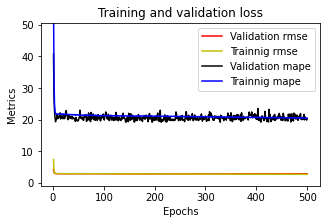

In [194]:
plotme(model8_1_2)

In [195]:
# inputs: distance + roadtypes distance
model8_1_4 = nnmodel_(10, num_hlayers=1,Epoch=500)
model8_1_4

Epoch 1/500
416/416 [==============================] - 1s 877us/step - loss: 550724.8750 - mape: 98.8086 - rmse: 742.1084 - val_loss: 542694.4375 - val_mape: 96.7378 - val_rmse: 736.6780
Epoch 2/500
416/416 [==============================] - 0s 719us/step - loss: 510621.4062 - mape: 92.7050 - rmse: 714.5778 - val_loss: 485858.5312 - val_mape: 88.1059 - val_rmse: 697.0355
Epoch 3/500
416/416 [==============================] - 0s 745us/step - loss: 443096.0938 - mape: 81.7756 - rmse: 665.6547 - val_loss: 409025.4375 - val_mape: 75.4947 - val_rmse: 639.5510
Epoch 4/500
416/416 [==============================] - 0s 766us/step - loss: 362933.3750 - mape: 68.1945 - rmse: 602.4395 - val_loss: 326505.0938 - val_mape: 61.8779 - val_rmse: 571.4062
Epoch 5/500
416/416 [==============================] - 0s 732us/step - loss: 283282.0938 - mape: 55.8701 - rmse: 532.2425 - val_loss: 250007.5312 - val_mape: 50.6935 - val_rmse: 500.0075
Epoch 6/500
416/416 [==============================] - 0s 760us/s

Epoch 45/500
416/416 [==============================] - 0s 737us/step - loss: 39163.0898 - mape: 26.4092 - rmse: 197.8967 - val_loss: 37814.9961 - val_mape: 25.2521 - val_rmse: 194.4608
Epoch 46/500
416/416 [==============================] - 0s 731us/step - loss: 38693.3164 - mape: 26.1488 - rmse: 196.7062 - val_loss: 37363.2852 - val_mape: 24.9142 - val_rmse: 193.2959
Epoch 47/500
416/416 [==============================] - 0s 731us/step - loss: 38240.0430 - mape: 25.9235 - rmse: 195.5506 - val_loss: 36944.2031 - val_mape: 24.5762 - val_rmse: 192.2088
Epoch 48/500
416/416 [==============================] - 0s 737us/step - loss: 37819.9141 - mape: 25.6250 - rmse: 194.4734 - val_loss: 36540.3125 - val_mape: 24.3760 - val_rmse: 191.1552
Epoch 49/500
416/416 [==============================] - 0s 745us/step - loss: 37420.1406 - mape: 25.4220 - rmse: 193.4429 - val_loss: 36157.1641 - val_mape: 24.2238 - val_rmse: 190.1504
Epoch 50/500
416/416 [==============================] - 0s 742us/step 

416/416 [==============================] - 0s 773us/step - loss: 30493.5410 - mape: 21.9622 - rmse: 174.6240 - val_loss: 30011.7363 - val_mape: 21.0064 - val_rmse: 173.2390
Epoch 90/500
416/416 [==============================] - 0s 768us/step - loss: 30432.7285 - mape: 21.8879 - rmse: 174.4498 - val_loss: 29983.9258 - val_mape: 20.8679 - val_rmse: 173.1587
Epoch 91/500
416/416 [==============================] - 0s 806us/step - loss: 30372.3516 - mape: 21.7924 - rmse: 174.2767 - val_loss: 29900.7090 - val_mape: 21.1513 - val_rmse: 172.9182
Epoch 92/500
416/416 [==============================] - 0s 853us/step - loss: 30320.4805 - mape: 21.8526 - rmse: 174.1278 - val_loss: 29862.6621 - val_mape: 21.0633 - val_rmse: 172.8082
Epoch 93/500
416/416 [==============================] - 0s 789us/step - loss: 30264.4062 - mape: 21.8543 - rmse: 173.9667 - val_loss: 29815.5254 - val_mape: 21.0648 - val_rmse: 172.6717
Epoch 94/500
416/416 [==============================] - 0s 778us/step - loss: 30210

Epoch 133/500
416/416 [==============================] - 0s 784us/step - loss: 29221.9102 - mape: 21.5237 - rmse: 170.9442 - val_loss: 29052.2441 - val_mape: 20.7992 - val_rmse: 170.4472
Epoch 134/500
416/416 [==============================] - 0s 821us/step - loss: 29210.5371 - mape: 21.5259 - rmse: 170.9109 - val_loss: 29073.4883 - val_mape: 20.6136 - val_rmse: 170.5095
Epoch 135/500
416/416 [==============================] - 0s 828us/step - loss: 29204.2812 - mape: 21.5017 - rmse: 170.8926 - val_loss: 29064.0234 - val_mape: 20.6423 - val_rmse: 170.4817
Epoch 136/500
416/416 [==============================] - 0s 815us/step - loss: 29195.9102 - mape: 21.4986 - rmse: 170.8681 - val_loss: 29062.3438 - val_mape: 20.6212 - val_rmse: 170.4768
Epoch 137/500
416/416 [==============================] - 0s 830us/step - loss: 29184.9648 - mape: 21.4453 - rmse: 170.8361 - val_loss: 29019.0176 - val_mape: 20.9362 - val_rmse: 170.3497
Epoch 138/500
416/416 [==============================] - 0s 796us

Epoch 177/500
416/416 [==============================] - 0s 771us/step - loss: 29012.9648 - mape: 21.6262 - rmse: 170.3319 - val_loss: 28934.7441 - val_mape: 20.7698 - val_rmse: 170.1022
Epoch 178/500
416/416 [==============================] - 0s 829us/step - loss: 29010.7969 - mape: 21.5383 - rmse: 170.3256 - val_loss: 28929.2812 - val_mape: 20.8163 - val_rmse: 170.0861
Epoch 179/500
416/416 [==============================] - 0s 800us/step - loss: 29005.0176 - mape: 21.5675 - rmse: 170.3086 - val_loss: 28938.1680 - val_mape: 20.7531 - val_rmse: 170.1122
Epoch 180/500
416/416 [==============================] - 0s 749us/step - loss: 29005.3262 - mape: 21.5709 - rmse: 170.3095 - val_loss: 28957.5840 - val_mape: 20.6487 - val_rmse: 170.1693
Epoch 181/500
416/416 [==============================] - 0s 762us/step - loss: 29006.1895 - mape: 21.5503 - rmse: 170.3120 - val_loss: 28961.9453 - val_mape: 20.6357 - val_rmse: 170.1821
Epoch 182/500
416/416 [==============================] - 0s 750us

Epoch 221/500
416/416 [==============================] - 0s 815us/step - loss: 28978.3906 - mape: 21.6798 - rmse: 170.2304 - val_loss: 28909.6426 - val_mape: 20.8725 - val_rmse: 170.0284
Epoch 222/500
416/416 [==============================] - 0s 806us/step - loss: 28970.7051 - mape: 21.6461 - rmse: 170.2078 - val_loss: 28926.7734 - val_mape: 20.7764 - val_rmse: 170.0787
Epoch 223/500
416/416 [==============================] - 0s 783us/step - loss: 28969.2578 - mape: 21.6032 - rmse: 170.2036 - val_loss: 28946.8281 - val_mape: 20.6984 - val_rmse: 170.1377
Epoch 224/500
416/416 [==============================] - 0s 794us/step - loss: 28968.5156 - mape: 21.6030 - rmse: 170.2014 - val_loss: 28906.8711 - val_mape: 20.9047 - val_rmse: 170.0202
Epoch 225/500
416/416 [==============================] - 0s 801us/step - loss: 28967.0059 - mape: 21.6296 - rmse: 170.1970 - val_loss: 28920.3828 - val_mape: 20.8114 - val_rmse: 170.0599
Epoch 226/500
416/416 [==============================] - 0s 764us

Epoch 265/500
416/416 [==============================] - 0s 752us/step - loss: 28961.1504 - mape: 21.6259 - rmse: 170.1798 - val_loss: 28878.5137 - val_mape: 21.1953 - val_rmse: 169.9368
Epoch 266/500
416/416 [==============================] - 0s 720us/step - loss: 28966.2207 - mape: 21.6961 - rmse: 170.1947 - val_loss: 28879.8359 - val_mape: 21.1247 - val_rmse: 169.9407
Epoch 267/500
416/416 [==============================] - 0s 699us/step - loss: 28964.9980 - mape: 21.6815 - rmse: 170.1911 - val_loss: 28924.5586 - val_mape: 20.8098 - val_rmse: 170.0722
Epoch 268/500
416/416 [==============================] - 0s 806us/step - loss: 28963.6270 - mape: 21.6657 - rmse: 170.1870 - val_loss: 28925.3301 - val_mape: 20.7983 - val_rmse: 170.0745
Epoch 269/500
416/416 [==============================] - 0s 739us/step - loss: 28969.1621 - mape: 21.6216 - rmse: 170.2033 - val_loss: 28891.8242 - val_mape: 21.0030 - val_rmse: 169.9760
Epoch 270/500
416/416 [==============================] - 0s 765us

Epoch 309/500
416/416 [==============================] - 0s 754us/step - loss: 28962.7520 - mape: 21.6635 - rmse: 170.1845 - val_loss: 28909.6973 - val_mape: 20.8720 - val_rmse: 170.0285
Epoch 310/500
416/416 [==============================] - 0s 751us/step - loss: 28965.5098 - mape: 21.6496 - rmse: 170.1926 - val_loss: 28890.6602 - val_mape: 21.0027 - val_rmse: 169.9725
Epoch 311/500
416/416 [==============================] - 0s 783us/step - loss: 28959.2559 - mape: 21.7644 - rmse: 170.1742 - val_loss: 28927.7207 - val_mape: 20.7890 - val_rmse: 170.0815
Epoch 312/500
416/416 [==============================] - 0s 771us/step - loss: 28965.9648 - mape: 21.6034 - rmse: 170.1939 - val_loss: 28902.4668 - val_mape: 20.9164 - val_rmse: 170.0072
Epoch 313/500
416/416 [==============================] - 0s 810us/step - loss: 28962.2832 - mape: 21.6872 - rmse: 170.1831 - val_loss: 28891.0098 - val_mape: 20.9931 - val_rmse: 169.9736
Epoch 314/500
416/416 [==============================] - 0s 772us

Epoch 353/500
416/416 [==============================] - 0s 727us/step - loss: 28963.8867 - mape: 21.7175 - rmse: 170.1878 - val_loss: 28889.6758 - val_mape: 20.9996 - val_rmse: 169.9696
Epoch 354/500
416/416 [==============================] - 0s 738us/step - loss: 28959.9355 - mape: 21.6900 - rmse: 170.1762 - val_loss: 28898.7461 - val_mape: 20.9360 - val_rmse: 169.9963
Epoch 355/500
416/416 [==============================] - 0s 745us/step - loss: 28961.4844 - mape: 21.6812 - rmse: 170.1807 - val_loss: 28887.9707 - val_mape: 21.0130 - val_rmse: 169.9646
Epoch 356/500
416/416 [==============================] - 0s 710us/step - loss: 28958.6465 - mape: 21.6789 - rmse: 170.1724 - val_loss: 28877.6035 - val_mape: 21.1107 - val_rmse: 169.9341
Epoch 357/500
416/416 [==============================] - 0s 732us/step - loss: 28960.8125 - mape: 21.6987 - rmse: 170.1788 - val_loss: 28882.7070 - val_mape: 21.0445 - val_rmse: 169.9491
Epoch 358/500
416/416 [==============================] - 0s 724us

Epoch 397/500
416/416 [==============================] - 0s 763us/step - loss: 28957.0820 - mape: 21.7537 - rmse: 170.1678 - val_loss: 28902.1602 - val_mape: 20.9036 - val_rmse: 170.0063
Epoch 398/500
416/416 [==============================] - 0s 721us/step - loss: 28958.8750 - mape: 21.7472 - rmse: 170.1731 - val_loss: 28945.0293 - val_mape: 20.7131 - val_rmse: 170.1324
Epoch 399/500
416/416 [==============================] - 0s 721us/step - loss: 28966.2461 - mape: 21.6103 - rmse: 170.1947 - val_loss: 28882.5156 - val_mape: 21.0356 - val_rmse: 169.9486
Epoch 400/500
416/416 [==============================] - 0s 721us/step - loss: 28963.1074 - mape: 21.7079 - rmse: 170.1855 - val_loss: 28892.5898 - val_mape: 20.9555 - val_rmse: 169.9782
Epoch 401/500
416/416 [==============================] - 0s 761us/step - loss: 28955.9453 - mape: 21.7138 - rmse: 170.1645 - val_loss: 28930.4824 - val_mape: 20.7696 - val_rmse: 170.0896
Epoch 402/500
416/416 [==============================] - 0s 721us

Epoch 441/500
416/416 [==============================] - 0s 755us/step - loss: 28961.2402 - mape: 21.7458 - rmse: 170.1800 - val_loss: 28889.0488 - val_mape: 20.9751 - val_rmse: 169.9678
Epoch 442/500
416/416 [==============================] - 0s 734us/step - loss: 28962.5664 - mape: 21.6866 - rmse: 170.1839 - val_loss: 28895.9590 - val_mape: 20.9333 - val_rmse: 169.9881
Epoch 443/500
416/416 [==============================] - 0s 754us/step - loss: 28965.2871 - mape: 21.7116 - rmse: 170.1919 - val_loss: 28892.6582 - val_mape: 20.9532 - val_rmse: 169.9784
Epoch 444/500
416/416 [==============================] - 0s 716us/step - loss: 28960.0918 - mape: 21.6805 - rmse: 170.1767 - val_loss: 28884.8984 - val_mape: 21.0063 - val_rmse: 169.9556
Epoch 445/500
416/416 [==============================] - 0s 718us/step - loss: 28958.2363 - mape: 21.7118 - rmse: 170.1712 - val_loss: 28892.5371 - val_mape: 20.9494 - val_rmse: 169.9780
Epoch 446/500
416/416 [==============================] - 0s 762us

Epoch 485/500
416/416 [==============================] - 0s 721us/step - loss: 28964.7305 - mape: 21.6049 - rmse: 170.1903 - val_loss: 28868.4863 - val_mape: 21.1583 - val_rmse: 169.9073
Epoch 486/500
416/416 [==============================] - 0s 733us/step - loss: 28954.2871 - mape: 21.6888 - rmse: 170.1596 - val_loss: 28866.4902 - val_mape: 21.2392 - val_rmse: 169.9014
Epoch 487/500
416/416 [==============================] - 0s 727us/step - loss: 28962.1016 - mape: 21.7484 - rmse: 170.1826 - val_loss: 28883.3691 - val_mape: 21.0119 - val_rmse: 169.9511
Epoch 488/500
416/416 [==============================] - 0s 748us/step - loss: 28958.8145 - mape: 21.7255 - rmse: 170.1729 - val_loss: 28884.3730 - val_mape: 20.9954 - val_rmse: 169.9540
Epoch 489/500
416/416 [==============================] - 0s 710us/step - loss: 28964.6016 - mape: 21.7115 - rmse: 170.1899 - val_loss: 28882.5488 - val_mape: 21.0042 - val_rmse: 169.9487
Epoch 490/500
416/416 [==============================] - 0s 761us

In [64]:
%%time
layer1 = [5,10,20,50,100]
layer2 = [5,10,20,50,100]
matrix_MAPE = np.zeros((5,5)) # Pre-allocate matrix
matrix_RMSE = np.zeros((5,5)) # Pre-allocate matrix

m=0
for i in layer1:

    print('m = ',m)
    n=0
    for j in layer2:
        print('n = ',n)
        model = nnmodel_(i,j, num_hlayers=2,Epoch=150)
        matrix_RMSE[m,n] = min(model.history['val_rmse'])/60
        matrix_MAPE[m,n] = min(model.history['val_mape'])/100
        n=n+1
    m=m+1


m =  0
n =  0
Epoch 1/150
416/416 [==============================] - 1s 941us/step - loss: 551157.2500 - mape: 98.8836 - rmse: 742.3997 - val_loss: 533559.8125 - val_mape: 95.3462 - val_rmse: 730.4518
Epoch 2/150
416/416 [==============================] - 0s 794us/step - loss: 428952.7188 - mape: 79.2276 - rmse: 654.9448 - val_loss: 307331.9688 - val_mape: 58.7972 - val_rmse: 554.3753
Epoch 3/150
416/416 [==============================] - 0s 766us/step - loss: 192694.2031 - mape: 46.6915 - rmse: 438.9695 - val_loss: 119477.6797 - val_mape: 42.4874 - val_rmse: 345.6554
Epoch 4/150
416/416 [==============================] - 0s 736us/step - loss: 100396.9219 - mape: 49.0595 - rmse: 316.8547 - val_loss: 93261.0234 - val_mape: 50.0926 - val_rmse: 305.3867
Epoch 5/150
416/416 [==============================] - 0s 770us/step - loss: 90493.7656 - mape: 52.4518 - rmse: 300.8218 - val_loss: 87675.2812 - val_mape: 49.6527 - val_rmse: 296.1001
Epoch 6/150
416/416 [==============================] -

Epoch 45/150
416/416 [==============================] - 0s 785us/step - loss: 29491.8965 - mape: 21.5364 - rmse: 171.7321 - val_loss: 29204.1094 - val_mape: 20.8392 - val_rmse: 170.8921
Epoch 46/150
416/416 [==============================] - 0s 863us/step - loss: 29444.8848 - mape: 21.5449 - rmse: 171.5951 - val_loss: 29168.3711 - val_mape: 20.9226 - val_rmse: 170.7875
Epoch 47/150
416/416 [==============================] - 0s 799us/step - loss: 29398.5664 - mape: 21.5865 - rmse: 171.4601 - val_loss: 29183.7988 - val_mape: 20.5691 - val_rmse: 170.8327
Epoch 48/150
416/416 [==============================] - 0s 808us/step - loss: 29356.5195 - mape: 21.5297 - rmse: 171.3374 - val_loss: 29189.1113 - val_mape: 20.4688 - val_rmse: 170.8482
Epoch 49/150
416/416 [==============================] - 0s 775us/step - loss: 29314.8574 - mape: 21.4694 - rmse: 171.2158 - val_loss: 29099.6133 - val_mape: 20.7703 - val_rmse: 170.5861
Epoch 50/150
416/416 [==============================] - 0s 779us/step 

416/416 [==============================] - 0s 757us/step - loss: 28982.8848 - mape: 21.6445 - rmse: 170.2436 - val_loss: 28931.4531 - val_mape: 20.7967 - val_rmse: 170.0925
Epoch 90/150
416/416 [==============================] - 0s 795us/step - loss: 28993.2480 - mape: 21.6494 - rmse: 170.2740 - val_loss: 28881.9434 - val_mape: 21.0572 - val_rmse: 169.9469
Epoch 91/150
416/416 [==============================] - 0s 769us/step - loss: 28975.5957 - mape: 21.6116 - rmse: 170.2222 - val_loss: 28880.0703 - val_mape: 21.3707 - val_rmse: 169.9414
Epoch 92/150
416/416 [==============================] - 0s 792us/step - loss: 28994.6738 - mape: 21.7157 - rmse: 170.2782 - val_loss: 28893.6055 - val_mape: 20.9040 - val_rmse: 169.9812
Epoch 93/150
416/416 [==============================] - 0s 804us/step - loss: 28986.2656 - mape: 21.6249 - rmse: 170.2535 - val_loss: 28878.6152 - val_mape: 21.1090 - val_rmse: 169.9371
Epoch 94/150
416/416 [==============================] - 0s 773us/step - loss: 28978

Epoch 133/150
416/416 [==============================] - 0s 824us/step - loss: 28973.4355 - mape: 21.6919 - rmse: 170.2159 - val_loss: 28894.6602 - val_mape: 20.9024 - val_rmse: 169.9843
Epoch 134/150
416/416 [==============================] - 0s 783us/step - loss: 28982.2617 - mape: 21.6945 - rmse: 170.2418 - val_loss: 28879.3418 - val_mape: 20.9989 - val_rmse: 169.9392
Epoch 135/150
416/416 [==============================] - 0s 765us/step - loss: 28976.6250 - mape: 21.6953 - rmse: 170.2252 - val_loss: 28868.4766 - val_mape: 21.1070 - val_rmse: 169.9073
Epoch 136/150
416/416 [==============================] - 0s 757us/step - loss: 28979.0254 - mape: 21.7453 - rmse: 170.2323 - val_loss: 28953.9023 - val_mape: 20.6503 - val_rmse: 170.1585
Epoch 137/150
416/416 [==============================] - 0s 799us/step - loss: 28976.9980 - mape: 21.6753 - rmse: 170.2263 - val_loss: 28893.3848 - val_mape: 20.9004 - val_rmse: 169.9805
Epoch 138/150
416/416 [==============================] - 0s 739us

Epoch 26/150
416/416 [==============================] - 0s 772us/step - loss: 31227.6680 - mape: 22.1441 - rmse: 176.7135 - val_loss: 30500.9219 - val_mape: 21.0899 - val_rmse: 174.6451
Epoch 27/150
416/416 [==============================] - 0s 795us/step - loss: 30959.5195 - mape: 22.0502 - rmse: 175.9532 - val_loss: 30261.4238 - val_mape: 21.2834 - val_rmse: 173.9581
Epoch 28/150
416/416 [==============================] - 0s 765us/step - loss: 30695.3457 - mape: 21.8688 - rmse: 175.2009 - val_loss: 30088.0234 - val_mape: 21.4668 - val_rmse: 173.4590
Epoch 29/150
416/416 [==============================] - 0s 799us/step - loss: 30498.0020 - mape: 21.8733 - rmse: 174.6368 - val_loss: 29917.4160 - val_mape: 21.1529 - val_rmse: 172.9665
Epoch 30/150
416/416 [==============================] - 0s 767us/step - loss: 30310.6738 - mape: 21.7921 - rmse: 174.0996 - val_loss: 29813.2051 - val_mape: 21.5419 - val_rmse: 172.6650
Epoch 31/150
416/416 [==============================] - 0s 794us/step 

416/416 [==============================] - 0s 764us/step - loss: 29004.8379 - mape: 21.7345 - rmse: 170.3081 - val_loss: 28992.1035 - val_mape: 20.5035 - val_rmse: 170.2707
Epoch 71/150
416/416 [==============================] - 0s 796us/step - loss: 29015.1406 - mape: 21.5489 - rmse: 170.3383 - val_loss: 28882.9844 - val_mape: 21.0518 - val_rmse: 169.9500
Epoch 72/150
416/416 [==============================] - 0s 794us/step - loss: 28987.8340 - mape: 21.7252 - rmse: 170.2581 - val_loss: 28870.3867 - val_mape: 21.1344 - val_rmse: 169.9129
Epoch 73/150
416/416 [==============================] - 0s 799us/step - loss: 29000.9180 - mape: 21.5711 - rmse: 170.2966 - val_loss: 28882.1738 - val_mape: 21.0784 - val_rmse: 169.9476
Epoch 74/150
416/416 [==============================] - 0s 794us/step - loss: 29005.3574 - mape: 21.6762 - rmse: 170.3096 - val_loss: 28884.0156 - val_mape: 21.0031 - val_rmse: 169.9530
Epoch 75/150
416/416 [==============================] - 0s 766us/step - loss: 28982

416/416 [==============================] - 0s 755us/step - loss: 28986.1504 - mape: 21.6867 - rmse: 170.2532 - val_loss: 29040.4062 - val_mape: 20.4781 - val_rmse: 170.4125
Epoch 115/150
416/416 [==============================] - 0s 759us/step - loss: 28987.9590 - mape: 21.6691 - rmse: 170.2585 - val_loss: 28863.8887 - val_mape: 21.2282 - val_rmse: 169.8938
Epoch 116/150
416/416 [==============================] - 0s 757us/step - loss: 28983.8066 - mape: 21.6933 - rmse: 170.2463 - val_loss: 28890.1543 - val_mape: 20.9539 - val_rmse: 169.9710
Epoch 117/150
416/416 [==============================] - 0s 802us/step - loss: 28993.5625 - mape: 21.6657 - rmse: 170.2750 - val_loss: 28862.3164 - val_mape: 21.3040 - val_rmse: 169.8891
Epoch 118/150
416/416 [==============================] - 0s 784us/step - loss: 28980.2461 - mape: 21.7613 - rmse: 170.2359 - val_loss: 28931.4648 - val_mape: 20.7616 - val_rmse: 170.0925
Epoch 119/150
416/416 [==============================] - 0s 795us/step - loss: 

Epoch 7/150
416/416 [==============================] - 0s 761us/step - loss: 61296.8359 - mape: 40.9410 - rmse: 247.5820 - val_loss: 57198.9102 - val_mape: 36.7766 - val_rmse: 239.1629
Epoch 8/150
416/416 [==============================] - 0s 801us/step - loss: 54965.4219 - mape: 37.0995 - rmse: 234.4471 - val_loss: 51272.6719 - val_mape: 33.7416 - val_rmse: 226.4347
Epoch 9/150
416/416 [==============================] - 0s 791us/step - loss: 49845.8555 - mape: 33.7477 - rmse: 223.2619 - val_loss: 46657.1602 - val_mape: 30.7887 - val_rmse: 216.0027
Epoch 10/150
416/416 [==============================] - 0s 766us/step - loss: 45989.7344 - mape: 30.9666 - rmse: 214.4522 - val_loss: 43219.7383 - val_mape: 28.7564 - val_rmse: 207.8936
Epoch 11/150
416/416 [==============================] - 0s 765us/step - loss: 43074.0820 - mape: 28.8697 - rmse: 207.5430 - val_loss: 40594.7305 - val_mape: 26.9348 - val_rmse: 201.4813
Epoch 12/150
416/416 [==============================] - 0s 771us/step - l

416/416 [==============================] - 0s 769us/step - loss: 29019.2227 - mape: 21.5667 - rmse: 170.3503 - val_loss: 28995.7422 - val_mape: 20.6453 - val_rmse: 170.2814
Epoch 52/150
416/416 [==============================] - 0s 755us/step - loss: 29010.8809 - mape: 21.6448 - rmse: 170.3258 - val_loss: 28962.4473 - val_mape: 20.7222 - val_rmse: 170.1836
Epoch 53/150
416/416 [==============================] - 0s 819us/step - loss: 29015.9199 - mape: 21.6456 - rmse: 170.3406 - val_loss: 28928.2812 - val_mape: 20.7925 - val_rmse: 170.0832
Epoch 54/150
416/416 [==============================] - 0s 757us/step - loss: 29013.8281 - mape: 21.6059 - rmse: 170.3345 - val_loss: 29128.7578 - val_mape: 20.3248 - val_rmse: 170.6715
Epoch 55/150
416/416 [==============================] - 0s 792us/step - loss: 29024.5586 - mape: 21.6066 - rmse: 170.3660 - val_loss: 28901.8027 - val_mape: 21.2660 - val_rmse: 170.0053
Epoch 56/150
416/416 [==============================] - 0s 774us/step - loss: 29007

Epoch 139/150
416/416 [==============================] - 0s 802us/step - loss: 28982.7871 - mape: 21.6847 - rmse: 170.2433 - val_loss: 28883.2969 - val_mape: 20.8337 - val_rmse: 169.9509
Epoch 140/150
416/416 [==============================] - 0s 769us/step - loss: 28984.5391 - mape: 21.6721 - rmse: 170.2485 - val_loss: 28855.7188 - val_mape: 20.9971 - val_rmse: 169.8697
Epoch 141/150
416/416 [==============================] - 0s 779us/step - loss: 28983.2930 - mape: 21.5976 - rmse: 170.2448 - val_loss: 28862.3340 - val_mape: 21.5066 - val_rmse: 169.8892
Epoch 142/150
416/416 [==============================] - 0s 803us/step - loss: 28999.7812 - mape: 21.6938 - rmse: 170.2932 - val_loss: 28863.3047 - val_mape: 20.9500 - val_rmse: 169.8920
Epoch 143/150
416/416 [==============================] - 0s 789us/step - loss: 28995.3848 - mape: 21.6573 - rmse: 170.2803 - val_loss: 28850.1367 - val_mape: 21.1608 - val_rmse: 169.8533
Epoch 144/150
416/416 [==============================] - 0s 787us

Epoch 32/150
416/416 [==============================] - 0s 796us/step - loss: 29118.4492 - mape: 21.5917 - rmse: 170.6413 - val_loss: 28991.8398 - val_mape: 21.5879 - val_rmse: 170.2699
Epoch 33/150
416/416 [==============================] - 0s 767us/step - loss: 29098.3711 - mape: 21.5445 - rmse: 170.5824 - val_loss: 28921.2715 - val_mape: 20.9581 - val_rmse: 170.0625
Epoch 34/150
416/416 [==============================] - 0s 771us/step - loss: 29082.3516 - mape: 21.5781 - rmse: 170.5355 - val_loss: 28949.6250 - val_mape: 20.8274 - val_rmse: 170.1459
Epoch 35/150
416/416 [==============================] - 0s 805us/step - loss: 29065.9414 - mape: 21.6126 - rmse: 170.4874 - val_loss: 28905.6133 - val_mape: 21.0857 - val_rmse: 170.0165
Epoch 36/150
416/416 [==============================] - 0s 750us/step - loss: 29092.4336 - mape: 21.6042 - rmse: 170.5650 - val_loss: 29056.8945 - val_mape: 20.3538 - val_rmse: 170.4608
Epoch 37/150
416/416 [==============================] - 0s 749us/step 

416/416 [==============================] - 0s 787us/step - loss: 28986.4062 - mape: 21.7001 - rmse: 170.2540 - val_loss: 28962.9961 - val_mape: 20.6056 - val_rmse: 170.1852
Epoch 77/150
416/416 [==============================] - 0s 783us/step - loss: 29002.6660 - mape: 21.6657 - rmse: 170.3017 - val_loss: 28959.0039 - val_mape: 20.7195 - val_rmse: 170.1734
Epoch 78/150
416/416 [==============================] - 0s 770us/step - loss: 28996.3984 - mape: 21.7334 - rmse: 170.2833 - val_loss: 28855.5664 - val_mape: 21.1523 - val_rmse: 169.8693
Epoch 79/150
416/416 [==============================] - 0s 735us/step - loss: 28991.1465 - mape: 21.6744 - rmse: 170.2679 - val_loss: 28971.6348 - val_mape: 20.6972 - val_rmse: 170.2106
Epoch 80/150
416/416 [==============================] - 0s 743us/step - loss: 28996.8926 - mape: 21.7264 - rmse: 170.2847 - val_loss: 28852.8281 - val_mape: 21.1246 - val_rmse: 169.8612
Epoch 81/150
416/416 [==============================] - 0s 779us/step - loss: 28998

416/416 [==============================] - 0s 738us/step - loss: 28996.7559 - mape: 21.6700 - rmse: 170.2843 - val_loss: 28906.4961 - val_mape: 20.6574 - val_rmse: 170.0191
Epoch 121/150
416/416 [==============================] - 0s 761us/step - loss: 28992.1582 - mape: 21.6417 - rmse: 170.2708 - val_loss: 28974.6191 - val_mape: 20.5279 - val_rmse: 170.2193
Epoch 122/150
416/416 [==============================] - 0s 742us/step - loss: 28994.8887 - mape: 21.6600 - rmse: 170.2789 - val_loss: 28866.3945 - val_mape: 20.8254 - val_rmse: 169.9011
Epoch 123/150
416/416 [==============================] - 0s 750us/step - loss: 28976.4648 - mape: 21.5786 - rmse: 170.2247 - val_loss: 28900.7441 - val_mape: 20.8103 - val_rmse: 170.0022
Epoch 124/150
416/416 [==============================] - 0s 771us/step - loss: 28983.3887 - mape: 21.7002 - rmse: 170.2451 - val_loss: 28875.0078 - val_mape: 20.8389 - val_rmse: 169.9265
Epoch 125/150
416/416 [==============================] - 0s 773us/step - loss: 

Epoch 13/150
416/416 [==============================] - 0s 759us/step - loss: 31404.9121 - mape: 22.1827 - rmse: 177.2143 - val_loss: 30501.4902 - val_mape: 21.1401 - val_rmse: 174.6468
Epoch 14/150
416/416 [==============================] - 0s 768us/step - loss: 30835.6660 - mape: 22.0443 - rmse: 175.6009 - val_loss: 30081.4004 - val_mape: 21.4057 - val_rmse: 173.4399
Epoch 15/150
416/416 [==============================] - 0s 730us/step - loss: 30424.1016 - mape: 21.8785 - rmse: 174.4251 - val_loss: 29870.6719 - val_mape: 20.6963 - val_rmse: 172.8313
Epoch 16/150
416/416 [==============================] - 0s 762us/step - loss: 30113.2598 - mape: 21.8336 - rmse: 173.5317 - val_loss: 29696.9961 - val_mape: 20.4902 - val_rmse: 172.3282
Epoch 17/150
416/416 [==============================] - 0s 729us/step - loss: 29912.9902 - mape: 21.7415 - rmse: 172.9537 - val_loss: 29615.0664 - val_mape: 20.3788 - val_rmse: 172.0903
Epoch 18/150
416/416 [==============================] - 0s 731us/step 

416/416 [==============================] - 0s 751us/step - loss: 29036.5703 - mape: 21.8042 - rmse: 170.4012 - val_loss: 28848.9785 - val_mape: 21.0884 - val_rmse: 169.8499
Epoch 58/150
416/416 [==============================] - 0s 745us/step - loss: 28997.0176 - mape: 21.6513 - rmse: 170.2851 - val_loss: 28892.3594 - val_mape: 20.9743 - val_rmse: 169.9775
Epoch 59/150
416/416 [==============================] - 0s 734us/step - loss: 29010.4023 - mape: 21.7656 - rmse: 170.3244 - val_loss: 28871.0938 - val_mape: 20.8962 - val_rmse: 169.9150
Epoch 60/150
416/416 [==============================] - 0s 752us/step - loss: 29013.1855 - mape: 21.6788 - rmse: 170.3326 - val_loss: 28985.1660 - val_mape: 20.6331 - val_rmse: 170.2503
Epoch 61/150
416/416 [==============================] - 0s 723us/step - loss: 29009.2168 - mape: 21.6916 - rmse: 170.3209 - val_loss: 28980.7129 - val_mape: 20.6843 - val_rmse: 170.2372
Epoch 62/150
416/416 [==============================] - 0s 759us/step - loss: 29004

Epoch 145/150
416/416 [==============================] - 0s 738us/step - loss: 28989.0820 - mape: 21.7400 - rmse: 170.2618 - val_loss: 28836.3789 - val_mape: 21.0828 - val_rmse: 169.8128
Epoch 146/150
416/416 [==============================] - 0s 700us/step - loss: 29010.2734 - mape: 21.7125 - rmse: 170.3240 - val_loss: 29026.7070 - val_mape: 20.4800 - val_rmse: 170.3723
Epoch 147/150
416/416 [==============================] - 0s 748us/step - loss: 29037.5156 - mape: 21.8082 - rmse: 170.4040 - val_loss: 28820.3340 - val_mape: 21.0409 - val_rmse: 169.7655
Epoch 148/150
416/416 [==============================] - 0s 733us/step - loss: 28985.6641 - mape: 21.6304 - rmse: 170.2518 - val_loss: 28857.1094 - val_mape: 21.0072 - val_rmse: 169.8738
Epoch 149/150
416/416 [==============================] - 0s 720us/step - loss: 28987.9336 - mape: 21.7530 - rmse: 170.2584 - val_loss: 28847.2090 - val_mape: 21.0260 - val_rmse: 169.8447
Epoch 150/150
416/416 [==============================] - 0s 733us

Epoch 38/150
416/416 [==============================] - 0s 744us/step - loss: 29398.2461 - mape: 21.5067 - rmse: 171.4592 - val_loss: 29224.8867 - val_mape: 20.4750 - val_rmse: 170.9529
Epoch 39/150
416/416 [==============================] - 0s 757us/step - loss: 29360.7363 - mape: 21.5294 - rmse: 171.3497 - val_loss: 29125.5215 - val_mape: 21.3193 - val_rmse: 170.6620
Epoch 40/150
416/416 [==============================] - 0s 739us/step - loss: 29314.9277 - mape: 21.5045 - rmse: 171.2160 - val_loss: 29074.4102 - val_mape: 20.9597 - val_rmse: 170.5122
Epoch 41/150
416/416 [==============================] - 0s 739us/step - loss: 29273.0312 - mape: 21.5474 - rmse: 171.0936 - val_loss: 29052.5664 - val_mape: 20.8899 - val_rmse: 170.4481
Epoch 42/150
416/416 [==============================] - 0s 732us/step - loss: 29236.7598 - mape: 21.4684 - rmse: 170.9876 - val_loss: 29037.9902 - val_mape: 20.7651 - val_rmse: 170.4054
Epoch 43/150
416/416 [==============================] - 0s 765us/step 

416/416 [==============================] - 0s 763us/step - loss: 28981.7910 - mape: 21.6706 - rmse: 170.2404 - val_loss: 28869.2305 - val_mape: 21.1413 - val_rmse: 169.9095
Epoch 83/150
416/416 [==============================] - 0s 759us/step - loss: 28976.3828 - mape: 21.6195 - rmse: 170.2245 - val_loss: 28917.9609 - val_mape: 21.7324 - val_rmse: 170.0528
Epoch 84/150
416/416 [==============================] - 0s 751us/step - loss: 28987.3418 - mape: 21.6856 - rmse: 170.2567 - val_loss: 28867.0000 - val_mape: 21.2931 - val_rmse: 169.9029
Epoch 85/150
416/416 [==============================] - 0s 762us/step - loss: 28988.9473 - mape: 21.6499 - rmse: 170.2614 - val_loss: 28873.5078 - val_mape: 21.3815 - val_rmse: 169.9221
Epoch 86/150
416/416 [==============================] - 0s 740us/step - loss: 28975.6426 - mape: 21.6780 - rmse: 170.2223 - val_loss: 28942.7695 - val_mape: 20.7628 - val_rmse: 170.1257
Epoch 87/150
416/416 [==============================] - 0s 784us/step - loss: 28989

Epoch 126/150
416/416 [==============================] - 0s 748us/step - loss: 28962.8223 - mape: 21.6379 - rmse: 170.1847 - val_loss: 28873.9434 - val_mape: 20.9036 - val_rmse: 169.9233
Epoch 127/150
416/416 [==============================] - 0s 757us/step - loss: 28967.6250 - mape: 21.6473 - rmse: 170.1988 - val_loss: 28916.0664 - val_mape: 20.7837 - val_rmse: 170.0472
Epoch 128/150
416/416 [==============================] - 0s 745us/step - loss: 28963.8770 - mape: 21.7079 - rmse: 170.1878 - val_loss: 28942.0273 - val_mape: 20.6943 - val_rmse: 170.1236
Epoch 129/150
416/416 [==============================] - 0s 750us/step - loss: 28958.8672 - mape: 21.6846 - rmse: 170.1730 - val_loss: 28839.5039 - val_mape: 21.3290 - val_rmse: 169.8220
Epoch 130/150
416/416 [==============================] - 0s 764us/step - loss: 28977.6621 - mape: 21.7109 - rmse: 170.2283 - val_loss: 28862.3320 - val_mape: 20.9368 - val_rmse: 169.8892
Epoch 131/150
416/416 [==============================] - 0s 745us

Epoch 19/150
416/416 [==============================] - 0s 751us/step - loss: 33586.2500 - mape: 23.1663 - rmse: 183.2655 - val_loss: 32306.0176 - val_mape: 21.8315 - val_rmse: 179.7388
Epoch 20/150
416/416 [==============================] - 0s 749us/step - loss: 32820.9727 - mape: 22.8168 - rmse: 181.1656 - val_loss: 31659.5918 - val_mape: 21.7453 - val_rmse: 177.9314
Epoch 21/150
416/416 [==============================] - 0s 722us/step - loss: 32204.1641 - mape: 22.5051 - rmse: 179.4552 - val_loss: 31165.4160 - val_mape: 21.7007 - val_rmse: 176.5373
Epoch 22/150
416/416 [==============================] - 0s 745us/step - loss: 31675.8340 - mape: 22.3160 - rmse: 177.9771 - val_loss: 30874.9199 - val_mape: 20.9159 - val_rmse: 175.7126
Epoch 23/150
416/416 [==============================] - 0s 784us/step - loss: 31246.6270 - mape: 22.1135 - rmse: 176.7672 - val_loss: 30633.6152 - val_mape: 20.6163 - val_rmse: 175.0246
Epoch 24/150
416/416 [==============================] - 0s 752us/step 

416/416 [==============================] - 0s 793us/step - loss: 29003.9102 - mape: 21.6100 - rmse: 170.3053 - val_loss: 28914.3848 - val_mape: 21.4893 - val_rmse: 170.0423
Epoch 64/150
416/416 [==============================] - 0s 748us/step - loss: 28997.2402 - mape: 21.7001 - rmse: 170.2858 - val_loss: 28897.6191 - val_mape: 21.3086 - val_rmse: 169.9930
Epoch 65/150
416/416 [==============================] - 0s 789us/step - loss: 28991.3887 - mape: 21.7025 - rmse: 170.2686 - val_loss: 28923.7148 - val_mape: 21.5837 - val_rmse: 170.0697
Epoch 66/150
416/416 [==============================] - 0s 741us/step - loss: 28999.3906 - mape: 21.6839 - rmse: 170.2921 - val_loss: 29138.2754 - val_mape: 20.3140 - val_rmse: 170.6994
Epoch 67/150
416/416 [==============================] - 0s 739us/step - loss: 28998.7051 - mape: 21.6870 - rmse: 170.2901 - val_loss: 28938.4766 - val_mape: 20.7495 - val_rmse: 170.1131
Epoch 68/150
416/416 [==============================] - 0s 753us/step - loss: 28987

minimum training RMSE:  2.8360198974609374
minimum training MAPE:  0.2149945068359375
-----------------
minimum testing RMSE:  2.83179931640625
minimum testing MAPE:  0.2031400680541992
n =  2
Epoch 1/150
416/416 [==============================] - 1s 867us/step - loss: 507933.1562 - mape: 92.0270 - rmse: 712.6943 - val_loss: 369472.9375 - val_mape: 68.2986 - val_rmse: 607.8428
Epoch 2/150
416/416 [==============================] - 0s 746us/step - loss: 181780.7188 - mape: 49.7352 - rmse: 426.3575 - val_loss: 99788.8125 - val_mape: 49.1453 - val_rmse: 315.8937
Epoch 3/150
416/416 [==============================] - 0s 778us/step - loss: 91759.4688 - mape: 51.8666 - rmse: 302.9182 - val_loss: 84135.0312 - val_mape: 47.7228 - val_rmse: 290.0604
Epoch 4/150
416/416 [==============================] - 0s 757us/step - loss: 76790.3516 - mape: 46.9053 - rmse: 277.1107 - val_loss: 69025.8281 - val_mape: 41.1883 - val_rmse: 262.7277
Epoch 5/150
416/416 [==============================] - 0s 767us/

416/416 [==============================] - 0s 784us/step - loss: 28866.9375 - mape: 21.5296 - rmse: 169.9027 - val_loss: 28919.8945 - val_mape: 20.3438 - val_rmse: 170.0585
Epoch 45/150
416/416 [==============================] - 0s 768us/step - loss: 28870.3301 - mape: 21.5822 - rmse: 169.9127 - val_loss: 28921.0820 - val_mape: 20.2841 - val_rmse: 170.0620
Epoch 46/150
416/416 [==============================] - 0s 787us/step - loss: 28874.1133 - mape: 21.6093 - rmse: 169.9238 - val_loss: 28750.0645 - val_mape: 21.5126 - val_rmse: 169.5584
Epoch 47/150
416/416 [==============================] - 0s 765us/step - loss: 28876.4668 - mape: 21.5510 - rmse: 169.9308 - val_loss: 28764.3652 - val_mape: 20.6811 - val_rmse: 169.6006
Epoch 48/150
416/416 [==============================] - 0s 751us/step - loss: 28866.7930 - mape: 21.5890 - rmse: 169.9023 - val_loss: 28741.5488 - val_mape: 20.6949 - val_rmse: 169.5333
Epoch 49/150
416/416 [==============================] - 0s 767us/step - loss: 28854

Epoch 132/150
416/416 [==============================] - 0s 767us/step - loss: 28845.7871 - mape: 21.5849 - rmse: 169.8405 - val_loss: 28806.5469 - val_mape: 20.4200 - val_rmse: 169.7249
Epoch 133/150
416/416 [==============================] - 0s 760us/step - loss: 28826.3379 - mape: 21.5041 - rmse: 169.7832 - val_loss: 28690.1250 - val_mape: 21.0688 - val_rmse: 169.3816
Epoch 134/150
416/416 [==============================] - 0s 764us/step - loss: 28822.5449 - mape: 21.6736 - rmse: 169.7720 - val_loss: 28674.8789 - val_mape: 21.0241 - val_rmse: 169.3366
Epoch 135/150
416/416 [==============================] - 0s 799us/step - loss: 28793.0117 - mape: 21.5044 - rmse: 169.6850 - val_loss: 29075.9648 - val_mape: 20.0140 - val_rmse: 170.5168
Epoch 136/150
416/416 [==============================] - 0s 790us/step - loss: 28840.9492 - mape: 21.5977 - rmse: 169.8262 - val_loss: 28687.0664 - val_mape: 21.3465 - val_rmse: 169.3726
Epoch 137/150
416/416 [==============================] - 0s 761us

Epoch 25/150
416/416 [==============================] - 0s 746us/step - loss: 29201.5586 - mape: 21.6008 - rmse: 170.8846 - val_loss: 29015.4590 - val_mape: 20.7751 - val_rmse: 170.3392
Epoch 26/150
416/416 [==============================] - 0s 753us/step - loss: 29179.5254 - mape: 21.6144 - rmse: 170.8202 - val_loss: 29025.6660 - val_mape: 20.6313 - val_rmse: 170.3692
Epoch 27/150
416/416 [==============================] - 0s 731us/step - loss: 29163.0566 - mape: 21.6149 - rmse: 170.7719 - val_loss: 28961.2656 - val_mape: 20.8988 - val_rmse: 170.1801
Epoch 28/150
416/416 [==============================] - 0s 756us/step - loss: 29144.9043 - mape: 21.5594 - rmse: 170.7188 - val_loss: 28947.1426 - val_mape: 21.0313 - val_rmse: 170.1386
Epoch 29/150
416/416 [==============================] - 0s 723us/step - loss: 29115.9922 - mape: 21.5525 - rmse: 170.6341 - val_loss: 28974.2949 - val_mape: 21.0382 - val_rmse: 170.2184
Epoch 30/150
416/416 [==============================] - 0s 777us/step 

416/416 [==============================] - 0s 746us/step - loss: 28982.8281 - mape: 21.6178 - rmse: 170.2434 - val_loss: 28806.0137 - val_mape: 20.8514 - val_rmse: 169.7233
Epoch 70/150
416/416 [==============================] - 0s 720us/step - loss: 28947.2598 - mape: 21.6229 - rmse: 170.1389 - val_loss: 28841.8027 - val_mape: 20.8562 - val_rmse: 169.8288
Epoch 71/150
416/416 [==============================] - 0s 761us/step - loss: 28930.6504 - mape: 21.6347 - rmse: 170.0901 - val_loss: 28805.3613 - val_mape: 21.3808 - val_rmse: 169.7214
Epoch 72/150
416/416 [==============================] - 0s 736us/step - loss: 28990.9727 - mape: 21.6292 - rmse: 170.2673 - val_loss: 28816.4746 - val_mape: 21.0213 - val_rmse: 169.7542
Epoch 73/150
416/416 [==============================] - 0s 732us/step - loss: 28947.5605 - mape: 21.6736 - rmse: 170.1398 - val_loss: 28833.4531 - val_mape: 21.5730 - val_rmse: 169.8042
Epoch 74/150
416/416 [==============================] - 0s 746us/step - loss: 28954

416/416 [==============================] - 0s 768us/step - loss: 28849.0684 - mape: 21.4740 - rmse: 169.8501 - val_loss: 28824.2461 - val_mape: 20.4761 - val_rmse: 169.7771
Epoch 114/150
416/416 [==============================] - 0s 751us/step - loss: 28845.9434 - mape: 21.5050 - rmse: 169.8409 - val_loss: 28766.7969 - val_mape: 20.8747 - val_rmse: 169.6078
Epoch 115/150
416/416 [==============================] - 0s 767us/step - loss: 28850.0430 - mape: 21.5384 - rmse: 169.8530 - val_loss: 28752.6699 - val_mape: 20.5875 - val_rmse: 169.5661
Epoch 116/150
416/416 [==============================] - 0s 729us/step - loss: 28838.9004 - mape: 21.4191 - rmse: 169.8202 - val_loss: 28731.0508 - val_mape: 21.1590 - val_rmse: 169.5024
Epoch 117/150
416/416 [==============================] - 0s 735us/step - loss: 28845.8457 - mape: 21.4387 - rmse: 169.8407 - val_loss: 28741.9121 - val_mape: 21.0266 - val_rmse: 169.5344
Epoch 118/150
416/416 [==============================] - 0s 728us/step - loss: 

Epoch 6/150
416/416 [==============================] - 0s 739us/step - loss: 40840.6719 - mape: 28.1814 - rmse: 202.0907 - val_loss: 37663.7109 - val_mape: 26.0432 - val_rmse: 194.0714
Epoch 7/150
416/416 [==============================] - 0s 761us/step - loss: 37201.9453 - mape: 25.7876 - rmse: 192.8781 - val_loss: 34793.7031 - val_mape: 24.1978 - val_rmse: 186.5307
Epoch 8/150
416/416 [==============================] - 0s 791us/step - loss: 34774.4570 - mape: 24.3551 - rmse: 186.4791 - val_loss: 32901.8906 - val_mape: 22.9424 - val_rmse: 181.3888
Epoch 9/150
416/416 [==============================] - 0s 768us/step - loss: 33137.4961 - mape: 23.2693 - rmse: 182.0371 - val_loss: 31670.8438 - val_mape: 22.1824 - val_rmse: 177.9630
Epoch 10/150
416/416 [==============================] - 0s 770us/step - loss: 31984.3809 - mape: 22.7261 - rmse: 178.8418 - val_loss: 30922.2246 - val_mape: 21.3478 - val_rmse: 175.8472
Epoch 11/150
416/416 [==============================] - 0s 766us/step - lo

416/416 [==============================] - 0s 817us/step - loss: 29061.0742 - mape: 21.7096 - rmse: 170.4731 - val_loss: 28893.4004 - val_mape: 21.0559 - val_rmse: 169.9806
Epoch 51/150
416/416 [==============================] - 0s 772us/step - loss: 29056.8027 - mape: 21.6374 - rmse: 170.4606 - val_loss: 29123.9531 - val_mape: 22.6144 - val_rmse: 170.6574
Epoch 52/150
416/416 [==============================] - 0s 775us/step - loss: 29010.2520 - mape: 21.8490 - rmse: 170.3240 - val_loss: 28935.8223 - val_mape: 20.5802 - val_rmse: 170.1053
Epoch 53/150
416/416 [==============================] - 0s 762us/step - loss: 29019.8477 - mape: 21.6830 - rmse: 170.3521 - val_loss: 28911.7812 - val_mape: 20.7400 - val_rmse: 170.0347
Epoch 54/150
416/416 [==============================] - 0s 782us/step - loss: 29019.1465 - mape: 21.6683 - rmse: 170.3501 - val_loss: 29027.1621 - val_mape: 20.5927 - val_rmse: 170.3736
Epoch 55/150
416/416 [==============================] - 0s 772us/step - loss: 29018

Epoch 138/150
416/416 [==============================] - 0s 787us/step - loss: 28917.0820 - mape: 21.6946 - rmse: 170.0502 - val_loss: 28918.6680 - val_mape: 21.8635 - val_rmse: 170.0549
Epoch 139/150
416/416 [==============================] - 0s 776us/step - loss: 28937.3301 - mape: 21.6415 - rmse: 170.1098 - val_loss: 29027.6289 - val_mape: 20.2102 - val_rmse: 170.3750
Epoch 140/150
416/416 [==============================] - 0s 759us/step - loss: 28950.3730 - mape: 21.5647 - rmse: 170.1481 - val_loss: 28810.9141 - val_mape: 21.0795 - val_rmse: 169.7378
Epoch 141/150
416/416 [==============================] - 0s 774us/step - loss: 28911.0059 - mape: 21.7280 - rmse: 170.0324 - val_loss: 28807.8848 - val_mape: 21.5368 - val_rmse: 169.7289
Epoch 142/150
416/416 [==============================] - 0s 748us/step - loss: 28921.8828 - mape: 21.6393 - rmse: 170.0643 - val_loss: 28814.9082 - val_mape: 20.8314 - val_rmse: 169.7495
Epoch 143/150
416/416 [==============================] - 0s 752us

Epoch 31/150
416/416 [==============================] - 0s 728us/step - loss: 29168.6758 - mape: 21.5735 - rmse: 170.7884 - val_loss: 28958.5352 - val_mape: 20.9706 - val_rmse: 170.1721
Epoch 32/150
416/416 [==============================] - 0s 760us/step - loss: 29110.3359 - mape: 21.5837 - rmse: 170.6175 - val_loss: 28962.9668 - val_mape: 21.4046 - val_rmse: 170.1851
Epoch 33/150
416/416 [==============================] - 0s 736us/step - loss: 29101.5703 - mape: 21.5757 - rmse: 170.5918 - val_loss: 29063.1973 - val_mape: 20.5216 - val_rmse: 170.4793
Epoch 34/150
416/416 [==============================] - 0s 744us/step - loss: 29077.9141 - mape: 21.6478 - rmse: 170.5225 - val_loss: 28979.9863 - val_mape: 20.6928 - val_rmse: 170.2351
Epoch 35/150
416/416 [==============================] - 0s 765us/step - loss: 29090.2031 - mape: 21.6188 - rmse: 170.5585 - val_loss: 28922.9355 - val_mape: 20.9641 - val_rmse: 170.0674
Epoch 36/150
416/416 [==============================] - 0s 759us/step 

416/416 [==============================] - 0s 728us/step - loss: 28978.7461 - mape: 21.6728 - rmse: 170.2314 - val_loss: 28860.0879 - val_mape: 21.1709 - val_rmse: 169.8826
Epoch 76/150
416/416 [==============================] - 0s 724us/step - loss: 29002.1836 - mape: 21.6795 - rmse: 170.3003 - val_loss: 28876.3398 - val_mape: 21.5730 - val_rmse: 169.9304
Epoch 77/150
416/416 [==============================] - 0s 748us/step - loss: 28972.5293 - mape: 21.7640 - rmse: 170.2132 - val_loss: 28859.1719 - val_mape: 21.1397 - val_rmse: 169.8799
Epoch 78/150
416/416 [==============================] - 0s 753us/step - loss: 28992.5176 - mape: 21.7102 - rmse: 170.2719 - val_loss: 28893.8555 - val_mape: 20.9306 - val_rmse: 169.9819
Epoch 79/150
416/416 [==============================] - 0s 737us/step - loss: 28986.1191 - mape: 21.6909 - rmse: 170.2531 - val_loss: 28874.8887 - val_mape: 21.1571 - val_rmse: 169.9261
Epoch 80/150
416/416 [==============================] - 0s 767us/step - loss: 29013

416/416 [==============================] - 0s 763us/step - loss: 28968.9121 - mape: 21.6798 - rmse: 170.2026 - val_loss: 28840.9707 - val_mape: 21.2398 - val_rmse: 169.8263
Epoch 120/150
416/416 [==============================] - 0s 746us/step - loss: 28967.6797 - mape: 21.7326 - rmse: 170.1989 - val_loss: 28863.7520 - val_mape: 20.9627 - val_rmse: 169.8934
Epoch 121/150
416/416 [==============================] - 0s 721us/step - loss: 28964.8516 - mape: 21.7174 - rmse: 170.1906 - val_loss: 28845.8750 - val_mape: 21.4792 - val_rmse: 169.8407
Epoch 122/150
416/416 [==============================] - 0s 721us/step - loss: 28977.9453 - mape: 21.7498 - rmse: 170.2291 - val_loss: 29143.6484 - val_mape: 20.2186 - val_rmse: 170.7151
Epoch 123/150
416/416 [==============================] - 0s 774us/step - loss: 28982.9570 - mape: 21.6714 - rmse: 170.2438 - val_loss: 29019.4961 - val_mape: 20.4195 - val_rmse: 170.3511
Epoch 124/150
416/416 [==============================] - 0s 714us/step - loss: 

Epoch 12/150
416/416 [==============================] - 0s 743us/step - loss: 31400.1953 - mape: 22.1639 - rmse: 177.2010 - val_loss: 30357.7500 - val_mape: 21.2401 - val_rmse: 174.2348
Epoch 13/150
416/416 [==============================] - 0s 787us/step - loss: 30838.2363 - mape: 21.9464 - rmse: 175.6082 - val_loss: 29984.5078 - val_mape: 21.2927 - val_rmse: 173.1604
Epoch 14/150
416/416 [==============================] - 0s 779us/step - loss: 30435.1855 - mape: 21.8635 - rmse: 174.4568 - val_loss: 29689.1094 - val_mape: 21.2991 - val_rmse: 172.3053
Epoch 15/150
416/416 [==============================] - 0s 757us/step - loss: 30144.7812 - mape: 21.7014 - rmse: 173.6225 - val_loss: 29511.1660 - val_mape: 20.7844 - val_rmse: 171.7881
Epoch 16/150
416/416 [==============================] - 0s 764us/step - loss: 29873.0273 - mape: 21.5662 - rmse: 172.8382 - val_loss: 29321.3145 - val_mape: 21.0078 - val_rmse: 171.2347
Epoch 17/150
416/416 [==============================] - 0s 767us/step 

416/416 [==============================] - 0s 769us/step - loss: 29024.3145 - mape: 21.7370 - rmse: 170.3652 - val_loss: 28869.8965 - val_mape: 21.7672 - val_rmse: 169.9114
Epoch 57/150
416/416 [==============================] - 0s 781us/step - loss: 29010.4395 - mape: 21.6956 - rmse: 170.3245 - val_loss: 28885.0059 - val_mape: 20.8778 - val_rmse: 169.9559
Epoch 58/150
416/416 [==============================] - 0s 751us/step - loss: 29038.5020 - mape: 21.7178 - rmse: 170.4069 - val_loss: 28859.7031 - val_mape: 21.6958 - val_rmse: 169.8814
Epoch 59/150
416/416 [==============================] - 0s 725us/step - loss: 29030.9160 - mape: 21.7350 - rmse: 170.3846 - val_loss: 28875.9258 - val_mape: 20.8677 - val_rmse: 169.9292
Epoch 60/150
416/416 [==============================] - 0s 739us/step - loss: 29012.6504 - mape: 21.7326 - rmse: 170.3310 - val_loss: 28822.0742 - val_mape: 21.3533 - val_rmse: 169.7706
Epoch 61/150
416/416 [==============================] - 0s 740us/step - loss: 28999

Epoch 144/150
416/416 [==============================] - 0s 740us/step - loss: 28991.2109 - mape: 21.6178 - rmse: 170.2681 - val_loss: 28839.1484 - val_mape: 20.8723 - val_rmse: 169.8209
Epoch 145/150
416/416 [==============================] - 0s 770us/step - loss: 28968.3613 - mape: 21.7446 - rmse: 170.2009 - val_loss: 28811.8184 - val_mape: 20.9341 - val_rmse: 169.7404
Epoch 146/150
416/416 [==============================] - 0s 762us/step - loss: 28968.0977 - mape: 21.6550 - rmse: 170.2002 - val_loss: 28813.3926 - val_mape: 20.8960 - val_rmse: 169.7451
Epoch 147/150
416/416 [==============================] - 0s 776us/step - loss: 28977.4141 - mape: 21.7238 - rmse: 170.2275 - val_loss: 28778.3945 - val_mape: 21.1205 - val_rmse: 169.6420
Epoch 148/150
416/416 [==============================] - 0s 743us/step - loss: 28947.5840 - mape: 21.6623 - rmse: 170.1399 - val_loss: 28800.9258 - val_mape: 21.5996 - val_rmse: 169.7084
Epoch 149/150
416/416 [==============================] - 0s 759us

Epoch 37/150
416/416 [==============================] - 0s 730us/step - loss: 29044.1035 - mape: 21.7601 - rmse: 170.4233 - val_loss: 28951.8242 - val_mape: 20.6037 - val_rmse: 170.1524
Epoch 38/150
416/416 [==============================] - 0s 731us/step - loss: 29036.5625 - mape: 21.6029 - rmse: 170.4012 - val_loss: 29045.7344 - val_mape: 20.5455 - val_rmse: 170.4281
Epoch 39/150
416/416 [==============================] - 0s 728us/step - loss: 29025.4980 - mape: 21.6757 - rmse: 170.3687 - val_loss: 29035.4355 - val_mape: 20.6484 - val_rmse: 170.3979
Epoch 40/150
416/416 [==============================] - 0s 727us/step - loss: 29033.1230 - mape: 21.6430 - rmse: 170.3911 - val_loss: 28932.8555 - val_mape: 21.0802 - val_rmse: 170.0966
Epoch 41/150
416/416 [==============================] - 0s 750us/step - loss: 29001.3398 - mape: 21.7658 - rmse: 170.2978 - val_loss: 28919.1484 - val_mape: 20.8551 - val_rmse: 170.0563
Epoch 42/150
416/416 [==============================] - 0s 766us/step 

416/416 [==============================] - 0s 740us/step - loss: 28999.1934 - mape: 21.7014 - rmse: 170.2915 - val_loss: 28974.4668 - val_mape: 22.0621 - val_rmse: 170.2189
Epoch 82/150
416/416 [==============================] - 0s 743us/step - loss: 29017.1133 - mape: 21.7243 - rmse: 170.3441 - val_loss: 28898.7988 - val_mape: 21.1164 - val_rmse: 169.9965
Epoch 83/150
416/416 [==============================] - 0s 742us/step - loss: 29002.1543 - mape: 21.6981 - rmse: 170.3002 - val_loss: 29009.7480 - val_mape: 20.7414 - val_rmse: 170.3225
Epoch 84/150
416/416 [==============================] - 0s 749us/step - loss: 29006.8184 - mape: 21.8160 - rmse: 170.3139 - val_loss: 29018.1465 - val_mape: 20.4046 - val_rmse: 170.3471
Epoch 85/150
416/416 [==============================] - 0s 731us/step - loss: 29005.2500 - mape: 21.7137 - rmse: 170.3093 - val_loss: 28885.0254 - val_mape: 20.8797 - val_rmse: 169.9559
Epoch 86/150
416/416 [==============================] - 0s 725us/step - loss: 28996

Epoch 125/150
416/416 [==============================] - 0s 734us/step - loss: 28984.6621 - mape: 21.6889 - rmse: 170.2488 - val_loss: 28851.0176 - val_mape: 21.2938 - val_rmse: 169.8559
Epoch 126/150
416/416 [==============================] - 0s 717us/step - loss: 29020.2715 - mape: 21.6399 - rmse: 170.3534 - val_loss: 28870.0527 - val_mape: 21.3651 - val_rmse: 169.9119
Epoch 127/150
416/416 [==============================] - 0s 716us/step - loss: 29006.0137 - mape: 21.8157 - rmse: 170.3115 - val_loss: 28899.9746 - val_mape: 20.7986 - val_rmse: 169.9999
Epoch 128/150
416/416 [==============================] - 0s 726us/step - loss: 28982.0488 - mape: 21.6909 - rmse: 170.2411 - val_loss: 28891.7520 - val_mape: 20.9471 - val_rmse: 169.9757
Epoch 129/150
416/416 [==============================] - 0s 752us/step - loss: 29047.5664 - mape: 21.7672 - rmse: 170.4335 - val_loss: 28865.7695 - val_mape: 21.4990 - val_rmse: 169.8993
Epoch 130/150
416/416 [==============================] - 0s 742us

Epoch 18/150
416/416 [==============================] - 0s 752us/step - loss: 29230.2148 - mape: 21.5650 - rmse: 170.9685 - val_loss: 28956.7832 - val_mape: 21.1336 - val_rmse: 170.1669
Epoch 19/150
416/416 [==============================] - 0s 779us/step - loss: 29191.5957 - mape: 21.5389 - rmse: 170.8555 - val_loss: 29047.0430 - val_mape: 21.8267 - val_rmse: 170.4319
Epoch 20/150
416/416 [==============================] - 0s 804us/step - loss: 29163.7422 - mape: 21.6116 - rmse: 170.7740 - val_loss: 29014.7402 - val_mape: 20.4791 - val_rmse: 170.3371
Epoch 21/150
416/416 [==============================] - 0s 761us/step - loss: 29108.0957 - mape: 21.5740 - rmse: 170.6109 - val_loss: 29019.1133 - val_mape: 20.4191 - val_rmse: 170.3500
Epoch 22/150
416/416 [==============================] - 0s 761us/step - loss: 29080.6562 - mape: 21.5981 - rmse: 170.5305 - val_loss: 28934.7969 - val_mape: 20.7190 - val_rmse: 170.1023
Epoch 23/150
416/416 [==============================] - 0s 769us/step 

416/416 [==============================] - 0s 737us/step - loss: 29047.0664 - mape: 21.6917 - rmse: 170.4320 - val_loss: 28862.9316 - val_mape: 21.5377 - val_rmse: 169.8909
Epoch 63/150
416/416 [==============================] - 0s 756us/step - loss: 29022.4805 - mape: 21.7278 - rmse: 170.3599 - val_loss: 29028.0020 - val_mape: 20.4419 - val_rmse: 170.3761
Epoch 64/150
416/416 [==============================] - 0s 748us/step - loss: 29008.4668 - mape: 21.7022 - rmse: 170.3187 - val_loss: 29075.6211 - val_mape: 20.4664 - val_rmse: 170.5157
Epoch 65/150
416/416 [==============================] - 0s 745us/step - loss: 29062.8770 - mape: 21.7112 - rmse: 170.4784 - val_loss: 29169.0547 - val_mape: 20.2595 - val_rmse: 170.7895
Epoch 66/150
416/416 [==============================] - 0s 761us/step - loss: 29068.2773 - mape: 21.7619 - rmse: 170.4942 - val_loss: 28844.8652 - val_mape: 21.3557 - val_rmse: 169.8378
Epoch 67/150
416/416 [==============================] - 0s 767us/step - loss: 29047

Epoch 150/150
416/416 [==============================] - 0s 761us/step - loss: 28965.4434 - mape: 21.5886 - rmse: 170.1924 - val_loss: 28806.1777 - val_mape: 21.1132 - val_rmse: 169.7238
minimum training RMSE:  2.836188252766927
minimum training MAPE:  0.21525718688964843
-----------------
minimum testing RMSE:  2.8274909973144533
minimum testing MAPE:  0.1991908073425293
n =  4
Epoch 1/150
416/416 [==============================] - 1s 866us/step - loss: 322875.1562 - mape: 69.7004 - rmse: 568.2211 - val_loss: 90663.8359 - val_mape: 50.9982 - val_rmse: 301.1044
Epoch 2/150
416/416 [==============================] - 0s 749us/step - loss: 77382.4375 - mape: 47.9601 - rmse: 278.1770 - val_loss: 63705.0234 - val_mape: 39.6029 - val_rmse: 252.3985
Epoch 3/150
416/416 [==============================] - 0s 756us/step - loss: 54689.6484 - mape: 36.6411 - rmse: 233.8582 - val_loss: 46115.1406 - val_mape: 31.2004 - val_rmse: 214.7444
Epoch 4/150
416/416 [==============================] - 0s 740u

416/416 [==============================] - 0s 775us/step - loss: 29138.2402 - mape: 21.8159 - rmse: 170.6993 - val_loss: 28854.4082 - val_mape: 21.4489 - val_rmse: 169.8659
Epoch 44/150
416/416 [==============================] - 0s 754us/step - loss: 29066.0684 - mape: 21.7453 - rmse: 170.4877 - val_loss: 28887.4258 - val_mape: 20.7497 - val_rmse: 169.9630
Epoch 45/150
416/416 [==============================] - 0s 744us/step - loss: 29087.7617 - mape: 21.7327 - rmse: 170.5513 - val_loss: 28843.9453 - val_mape: 21.3930 - val_rmse: 169.8351
Epoch 46/150
416/416 [==============================] - 0s 776us/step - loss: 29080.7129 - mape: 21.7243 - rmse: 170.5307 - val_loss: 28979.3809 - val_mape: 22.1467 - val_rmse: 170.2333
Epoch 47/150
416/416 [==============================] - 0s 769us/step - loss: 29068.1426 - mape: 21.7562 - rmse: 170.4938 - val_loss: 28981.1641 - val_mape: 22.0727 - val_rmse: 170.2386
Epoch 48/150
416/416 [==============================] - 0s 736us/step - loss: 29060

Epoch 131/150
416/416 [==============================] - 0s 740us/step - loss: 29033.9531 - mape: 21.6545 - rmse: 170.3935 - val_loss: 29055.4375 - val_mape: 20.1766 - val_rmse: 170.4566
Epoch 132/150
416/416 [==============================] - 0s 745us/step - loss: 29036.6309 - mape: 21.6693 - rmse: 170.4014 - val_loss: 28861.0879 - val_mape: 20.6217 - val_rmse: 169.8855
Epoch 133/150
416/416 [==============================] - 0s 755us/step - loss: 29044.0234 - mape: 21.5829 - rmse: 170.4231 - val_loss: 29088.0020 - val_mape: 22.5100 - val_rmse: 170.5520
Epoch 134/150
416/416 [==============================] - 0s 764us/step - loss: 29015.2754 - mape: 21.6542 - rmse: 170.3387 - val_loss: 28815.9980 - val_mape: 20.8994 - val_rmse: 169.7528
Epoch 135/150
416/416 [==============================] - 0s 762us/step - loss: 29030.7441 - mape: 21.6222 - rmse: 170.3841 - val_loss: 28821.5938 - val_mape: 21.2115 - val_rmse: 169.7692
Epoch 136/150
416/416 [==============================] - 0s 749us

Epoch 24/150
416/416 [==============================] - 0s 768us/step - loss: 29107.4062 - mape: 21.6022 - rmse: 170.6089 - val_loss: 28913.3125 - val_mape: 20.7940 - val_rmse: 170.0392
Epoch 25/150
416/416 [==============================] - 0s 761us/step - loss: 29093.0820 - mape: 21.6577 - rmse: 170.5669 - val_loss: 29157.5156 - val_mape: 20.1610 - val_rmse: 170.7557
Epoch 26/150
416/416 [==============================] - 0s 776us/step - loss: 29046.1133 - mape: 21.6405 - rmse: 170.4292 - val_loss: 28869.1934 - val_mape: 21.0679 - val_rmse: 169.9094
Epoch 27/150
416/416 [==============================] - 0s 741us/step - loss: 29039.1055 - mape: 21.5370 - rmse: 170.4086 - val_loss: 28879.3301 - val_mape: 21.3335 - val_rmse: 169.9392
Epoch 28/150
416/416 [==============================] - 0s 758us/step - loss: 29048.1348 - mape: 21.6427 - rmse: 170.4351 - val_loss: 28891.1934 - val_mape: 20.8679 - val_rmse: 169.9741
Epoch 29/150
416/416 [==============================] - 0s 778us/step 

416/416 [==============================] - 0s 757us/step - loss: 28762.0898 - mape: 21.5484 - rmse: 169.5939 - val_loss: 28649.5840 - val_mape: 21.1082 - val_rmse: 169.2619
Epoch 69/150
416/416 [==============================] - 0s 745us/step - loss: 28736.9316 - mape: 21.5901 - rmse: 169.5197 - val_loss: 28707.3086 - val_mape: 20.6861 - val_rmse: 169.4323
Epoch 70/150
416/416 [==============================] - 0s 794us/step - loss: 28786.9883 - mape: 21.6548 - rmse: 169.6673 - val_loss: 28676.0820 - val_mape: 20.6867 - val_rmse: 169.3401
Epoch 71/150
416/416 [==============================] - 0s 770us/step - loss: 28737.0879 - mape: 21.5369 - rmse: 169.5202 - val_loss: 28679.1465 - val_mape: 20.7476 - val_rmse: 169.3492
Epoch 72/150
416/416 [==============================] - 0s 746us/step - loss: 28742.9082 - mape: 21.6652 - rmse: 169.5373 - val_loss: 28636.8770 - val_mape: 20.6501 - val_rmse: 169.2243
Epoch 73/150
416/416 [==============================] - 0s 801us/step - loss: 28726

416/416 [==============================] - 0s 742us/step - loss: 28560.5391 - mape: 21.4610 - rmse: 168.9986 - val_loss: 28472.3203 - val_mape: 20.8987 - val_rmse: 168.7374
Epoch 113/150
416/416 [==============================] - 0s 758us/step - loss: 28563.6973 - mape: 21.5049 - rmse: 169.0080 - val_loss: 28481.0938 - val_mape: 21.3576 - val_rmse: 168.7634
Epoch 114/150
416/416 [==============================] - 0s 756us/step - loss: 28548.9434 - mape: 21.4485 - rmse: 168.9643 - val_loss: 28536.8418 - val_mape: 20.4929 - val_rmse: 168.9285
Epoch 115/150
416/416 [==============================] - 0s 739us/step - loss: 28542.0254 - mape: 21.5179 - rmse: 168.9438 - val_loss: 28485.5176 - val_mape: 20.5838 - val_rmse: 168.7765
Epoch 116/150
416/416 [==============================] - 0s 748us/step - loss: 28534.4961 - mape: 21.4518 - rmse: 168.9216 - val_loss: 28649.1543 - val_mape: 20.1533 - val_rmse: 169.2606
Epoch 117/150
416/416 [==============================] - 0s 729us/step - loss: 

Epoch 5/150
416/416 [==============================] - 0s 733us/step - loss: 44259.8086 - mape: 29.4547 - rmse: 210.3802 - val_loss: 40069.3516 - val_mape: 25.6883 - val_rmse: 200.1733
Epoch 6/150
416/416 [==============================] - 0s 741us/step - loss: 39135.3867 - mape: 26.1709 - rmse: 197.8267 - val_loss: 36198.3594 - val_mape: 24.6907 - val_rmse: 190.2587
Epoch 7/150
416/416 [==============================] - 0s 749us/step - loss: 36088.6914 - mape: 24.5140 - rmse: 189.9702 - val_loss: 33844.4609 - val_mape: 22.4265 - val_rmse: 183.9686
Epoch 8/150
416/416 [==============================] - 0s 753us/step - loss: 34076.0273 - mape: 23.4227 - rmse: 184.5969 - val_loss: 32293.2148 - val_mape: 22.3821 - val_rmse: 179.7031
Epoch 9/150
416/416 [==============================] - 0s 734us/step - loss: 32732.4961 - mape: 22.8178 - rmse: 180.9212 - val_loss: 31317.2617 - val_mape: 21.2535 - val_rmse: 176.9668
Epoch 10/150
416/416 [==============================] - 0s 735us/step - los

416/416 [==============================] - 0s 726us/step - loss: 28979.3555 - mape: 21.7186 - rmse: 170.2332 - val_loss: 29295.9043 - val_mape: 19.9627 - val_rmse: 171.1605
Epoch 94/150
416/416 [==============================] - 0s 748us/step - loss: 29025.3203 - mape: 21.6575 - rmse: 170.3682 - val_loss: 28813.1699 - val_mape: 21.6817 - val_rmse: 169.7444
Epoch 95/150
416/416 [==============================] - 0s 768us/step - loss: 29002.6777 - mape: 21.7238 - rmse: 170.3017 - val_loss: 28782.3906 - val_mape: 21.3931 - val_rmse: 169.6537
Epoch 96/150
416/416 [==============================] - 0s 763us/step - loss: 29008.1973 - mape: 21.7055 - rmse: 170.3179 - val_loss: 28795.7754 - val_mape: 20.8514 - val_rmse: 169.6932
Epoch 97/150
416/416 [==============================] - 0s 749us/step - loss: 29010.2227 - mape: 21.6178 - rmse: 170.3239 - val_loss: 28798.9902 - val_mape: 21.5386 - val_rmse: 169.7027
Epoch 98/150
416/416 [==============================] - 0s 779us/step - loss: 28999

Epoch 137/150
416/416 [==============================] - 0s 779us/step - loss: 28986.5762 - mape: 21.6392 - rmse: 170.2544 - val_loss: 28820.5332 - val_mape: 20.8307 - val_rmse: 169.7661
Epoch 138/150
416/416 [==============================] - 0s 777us/step - loss: 28987.9395 - mape: 21.7195 - rmse: 170.2585 - val_loss: 29016.1602 - val_mape: 20.2778 - val_rmse: 170.3413
Epoch 139/150
416/416 [==============================] - 0s 771us/step - loss: 29061.5410 - mape: 21.6433 - rmse: 170.4745 - val_loss: 28781.0957 - val_mape: 21.5970 - val_rmse: 169.6499
Epoch 140/150
416/416 [==============================] - 0s 760us/step - loss: 28986.8535 - mape: 21.7383 - rmse: 170.2553 - val_loss: 28892.3398 - val_mape: 20.5654 - val_rmse: 169.9775
Epoch 141/150
416/416 [==============================] - 0s 776us/step - loss: 28992.2422 - mape: 21.7248 - rmse: 170.2711 - val_loss: 28764.9238 - val_mape: 20.9703 - val_rmse: 169.6022
Epoch 142/150
416/416 [==============================] - 0s 803us

Epoch 30/150
416/416 [==============================] - 0s 740us/step - loss: 29050.9824 - mape: 21.6819 - rmse: 170.4435 - val_loss: 28912.8008 - val_mape: 21.7782 - val_rmse: 170.0376
Epoch 31/150
416/416 [==============================] - 0s 751us/step - loss: 29013.1953 - mape: 21.6393 - rmse: 170.3326 - val_loss: 28858.7461 - val_mape: 21.1276 - val_rmse: 169.8786
Epoch 32/150
416/416 [==============================] - 0s 750us/step - loss: 29030.7539 - mape: 21.7861 - rmse: 170.3841 - val_loss: 28856.4121 - val_mape: 21.3971 - val_rmse: 169.8717
Epoch 33/150
416/416 [==============================] - 0s 739us/step - loss: 29014.5762 - mape: 21.6128 - rmse: 170.3367 - val_loss: 28853.9004 - val_mape: 21.1156 - val_rmse: 169.8644
Epoch 34/150
416/416 [==============================] - 0s 748us/step - loss: 29025.4629 - mape: 21.6850 - rmse: 170.3686 - val_loss: 28865.1367 - val_mape: 21.4493 - val_rmse: 169.8974
Epoch 35/150
416/416 [==============================] - 0s 761us/step 

416/416 [==============================] - 0s 744us/step - loss: 28960.7812 - mape: 21.8213 - rmse: 170.1787 - val_loss: 28891.8945 - val_mape: 20.4591 - val_rmse: 169.9762
Epoch 75/150
416/416 [==============================] - 0s 769us/step - loss: 28960.9863 - mape: 21.6895 - rmse: 170.1793 - val_loss: 28844.0195 - val_mape: 20.5399 - val_rmse: 169.8353
Epoch 76/150
416/416 [==============================] - 0s 757us/step - loss: 28930.2480 - mape: 21.5755 - rmse: 170.0889 - val_loss: 29170.5137 - val_mape: 20.2137 - val_rmse: 170.7938
Epoch 77/150
416/416 [==============================] - 0s 776us/step - loss: 28927.9375 - mape: 21.7461 - rmse: 170.0822 - val_loss: 28766.0586 - val_mape: 20.9903 - val_rmse: 169.6056
Epoch 78/150
416/416 [==============================] - 0s 782us/step - loss: 28954.4844 - mape: 21.6873 - rmse: 170.1602 - val_loss: 28775.2637 - val_mape: 20.9173 - val_rmse: 169.6327
Epoch 79/150
416/416 [==============================] - 0s 764us/step - loss: 28923

416/416 [==============================] - 0s 774us/step - loss: 28924.5996 - mape: 21.6863 - rmse: 170.0723 - val_loss: 28707.9863 - val_mape: 21.2613 - val_rmse: 169.4343
Epoch 119/150
416/416 [==============================] - 0s 758us/step - loss: 28907.7949 - mape: 21.5830 - rmse: 170.0229 - val_loss: 28749.4609 - val_mape: 20.8557 - val_rmse: 169.5567
Epoch 120/150
416/416 [==============================] - 0s 751us/step - loss: 28907.5195 - mape: 21.6111 - rmse: 170.0221 - val_loss: 28743.2617 - val_mape: 21.5694 - val_rmse: 169.5384
Epoch 121/150
416/416 [==============================] - 0s 761us/step - loss: 28887.1797 - mape: 21.7378 - rmse: 169.9623 - val_loss: 28888.7402 - val_mape: 20.2364 - val_rmse: 169.9669
Epoch 122/150
416/416 [==============================] - 0s 744us/step - loss: 28893.6816 - mape: 21.6209 - rmse: 169.9814 - val_loss: 28822.1875 - val_mape: 20.3755 - val_rmse: 169.7710
Epoch 123/150
416/416 [==============================] - 0s 740us/step - loss: 

Epoch 11/150
416/416 [==============================] - 0s 752us/step - loss: 29809.2227 - mape: 21.7876 - rmse: 172.6535 - val_loss: 29300.6094 - val_mape: 21.3778 - val_rmse: 171.1742
Epoch 12/150
416/416 [==============================] - 0s 815us/step - loss: 29525.8535 - mape: 21.7311 - rmse: 171.8309 - val_loss: 29200.0039 - val_mape: 20.8056 - val_rmse: 170.8801
Epoch 13/150
416/416 [==============================] - 0s 750us/step - loss: 29401.1504 - mape: 21.6946 - rmse: 171.4676 - val_loss: 29126.5059 - val_mape: 20.7060 - val_rmse: 170.6649
Epoch 14/150
416/416 [==============================] - 0s 762us/step - loss: 29289.2793 - mape: 21.6887 - rmse: 171.1411 - val_loss: 29167.0977 - val_mape: 22.0770 - val_rmse: 170.7838
Epoch 15/150
416/416 [==============================] - 0s 752us/step - loss: 29203.4629 - mape: 21.6781 - rmse: 170.8902 - val_loss: 28977.1797 - val_mape: 20.9597 - val_rmse: 170.2269
Epoch 16/150
416/416 [==============================] - 0s 740us/step 

416/416 [==============================] - 0s 741us/step - loss: 28936.1250 - mape: 21.6077 - rmse: 170.1062 - val_loss: 28767.8730 - val_mape: 21.2125 - val_rmse: 169.6109
Epoch 56/150
416/416 [==============================] - 0s 737us/step - loss: 28912.0176 - mape: 21.7176 - rmse: 170.0353 - val_loss: 28886.7500 - val_mape: 20.4511 - val_rmse: 169.9610
Epoch 57/150
416/416 [==============================] - 0s 755us/step - loss: 28905.4512 - mape: 21.5824 - rmse: 170.0160 - val_loss: 28809.0605 - val_mape: 21.7572 - val_rmse: 169.7323
Epoch 58/150
416/416 [==============================] - 0s 746us/step - loss: 28926.2617 - mape: 21.6573 - rmse: 170.0772 - val_loss: 28791.2305 - val_mape: 21.6318 - val_rmse: 169.6798
Epoch 59/150
416/416 [==============================] - 0s 758us/step - loss: 28958.1484 - mape: 21.7209 - rmse: 170.1709 - val_loss: 29348.7949 - val_mape: 19.9660 - val_rmse: 171.3149
Epoch 60/150
416/416 [==============================] - 0s 744us/step - loss: 28869

Epoch 143/150
416/416 [==============================] - 0s 798us/step - loss: 28557.4473 - mape: 21.3766 - rmse: 168.9895 - val_loss: 28502.3320 - val_mape: 20.7008 - val_rmse: 168.8263
Epoch 144/150
416/416 [==============================] - 0s 781us/step - loss: 28584.8496 - mape: 21.4344 - rmse: 169.0705 - val_loss: 28532.4414 - val_mape: 20.5803 - val_rmse: 168.9155
Epoch 145/150
416/416 [==============================] - 0s 773us/step - loss: 28591.0430 - mape: 21.4012 - rmse: 169.0889 - val_loss: 28725.2402 - val_mape: 22.1001 - val_rmse: 169.4852
Epoch 146/150
416/416 [==============================] - 0s 783us/step - loss: 28544.6855 - mape: 21.4973 - rmse: 168.9517 - val_loss: 28855.9043 - val_mape: 19.9685 - val_rmse: 169.8703
Epoch 147/150
416/416 [==============================] - 0s 835us/step - loss: 28548.7793 - mape: 21.3466 - rmse: 168.9638 - val_loss: 28666.7734 - val_mape: 20.3952 - val_rmse: 169.3127
Epoch 148/150
416/416 [==============================] - 0s 788us

Epoch 36/150
416/416 [==============================] - 0s 820us/step - loss: 28864.6895 - mape: 21.6599 - rmse: 169.8961 - val_loss: 28749.9395 - val_mape: 20.4133 - val_rmse: 169.5581
Epoch 37/150
416/416 [==============================] - 0s 780us/step - loss: 28852.4141 - mape: 21.5702 - rmse: 169.8600 - val_loss: 28673.9668 - val_mape: 21.5557 - val_rmse: 169.3339
Epoch 38/150
416/416 [==============================] - 0s 784us/step - loss: 28840.4902 - mape: 21.6290 - rmse: 169.8249 - val_loss: 29009.1875 - val_mape: 20.1749 - val_rmse: 170.3208
Epoch 39/150
416/416 [==============================] - 0s 783us/step - loss: 28837.6953 - mape: 21.6325 - rmse: 169.8167 - val_loss: 28628.3828 - val_mape: 20.8862 - val_rmse: 169.1992
Epoch 40/150
416/416 [==============================] - 0s 812us/step - loss: 28826.2051 - mape: 21.5716 - rmse: 169.7828 - val_loss: 28731.7539 - val_mape: 20.5933 - val_rmse: 169.5044
Epoch 41/150
416/416 [==============================] - 0s 809us/step 

416/416 [==============================] - 0s 837us/step - loss: 28559.1055 - mape: 21.4346 - rmse: 168.9944 - val_loss: 28455.3105 - val_mape: 20.7187 - val_rmse: 168.6870
Epoch 81/150
416/416 [==============================] - 0s 790us/step - loss: 28589.7207 - mape: 21.5085 - rmse: 169.0849 - val_loss: 28522.3516 - val_mape: 20.2483 - val_rmse: 168.8856
Epoch 82/150
416/416 [==============================] - 0s 780us/step - loss: 28577.8594 - mape: 21.4657 - rmse: 169.0499 - val_loss: 28489.2891 - val_mape: 20.5718 - val_rmse: 168.7877
Epoch 83/150
416/416 [==============================] - 0s 794us/step - loss: 28561.5938 - mape: 21.4411 - rmse: 169.0018 - val_loss: 28766.5840 - val_mape: 19.9398 - val_rmse: 169.6071
Epoch 84/150
416/416 [==============================] - 0s 763us/step - loss: 28592.5234 - mape: 21.4409 - rmse: 169.0932 - val_loss: 28462.4629 - val_mape: 20.6604 - val_rmse: 168.7082
Epoch 85/150
416/416 [==============================] - 0s 767us/step - loss: 28600

Epoch 124/150
416/416 [==============================] - 0s 811us/step - loss: 28517.5254 - mape: 21.4063 - rmse: 168.8713 - val_loss: 28501.0527 - val_mape: 21.6370 - val_rmse: 168.8226
Epoch 125/150
416/416 [==============================] - 0s 813us/step - loss: 28478.2793 - mape: 21.4936 - rmse: 168.7551 - val_loss: 28492.0254 - val_mape: 20.3864 - val_rmse: 168.7958
Epoch 126/150
416/416 [==============================] - 0s 808us/step - loss: 28534.6895 - mape: 21.4326 - rmse: 168.9221 - val_loss: 28548.8457 - val_mape: 20.2673 - val_rmse: 168.9640
Epoch 127/150
416/416 [==============================] - 0s 807us/step - loss: 28527.4414 - mape: 21.4522 - rmse: 168.9007 - val_loss: 28475.8281 - val_mape: 20.5687 - val_rmse: 168.7478
Epoch 128/150
416/416 [==============================] - 0s 803us/step - loss: 28513.7832 - mape: 21.4682 - rmse: 168.8602 - val_loss: 28705.7129 - val_mape: 20.0715 - val_rmse: 169.4276
Epoch 129/150
416/416 [==============================] - 0s 832us

Epoch 17/150
416/416 [==============================] - 0s 768us/step - loss: 29513.8008 - mape: 21.6202 - rmse: 171.7958 - val_loss: 29234.6719 - val_mape: 20.3702 - val_rmse: 170.9815
Epoch 18/150
416/416 [==============================] - 0s 733us/step - loss: 29398.8086 - mape: 21.5946 - rmse: 171.4608 - val_loss: 29047.8574 - val_mape: 20.9190 - val_rmse: 170.4343
Epoch 19/150
416/416 [==============================] - 0s 741us/step - loss: 29270.2402 - mape: 21.6093 - rmse: 171.0855 - val_loss: 29003.0137 - val_mape: 21.3184 - val_rmse: 170.3027
Epoch 20/150
416/416 [==============================] - 0s 768us/step - loss: 29258.5254 - mape: 21.5556 - rmse: 171.0512 - val_loss: 28969.2422 - val_mape: 21.3322 - val_rmse: 170.2035
Epoch 21/150
416/416 [==============================] - 0s 755us/step - loss: 29199.6914 - mape: 21.5634 - rmse: 170.8792 - val_loss: 28933.2305 - val_mape: 21.2363 - val_rmse: 170.0977
Epoch 22/150
416/416 [==============================] - 0s 786us/step 

416/416 [==============================] - 0s 763us/step - loss: 28987.8926 - mape: 21.7452 - rmse: 170.2583 - val_loss: 28816.0801 - val_mape: 20.9309 - val_rmse: 169.7530
Epoch 62/150
416/416 [==============================] - 0s 778us/step - loss: 29013.1973 - mape: 21.7131 - rmse: 170.3326 - val_loss: 29171.3145 - val_mape: 20.1083 - val_rmse: 170.7961
Epoch 63/150
416/416 [==============================] - 0s 786us/step - loss: 29006.4395 - mape: 21.6905 - rmse: 170.3128 - val_loss: 28903.2891 - val_mape: 20.6361 - val_rmse: 170.0097
Epoch 64/150
416/416 [==============================] - 0s 747us/step - loss: 28997.8086 - mape: 21.6737 - rmse: 170.2874 - val_loss: 28809.5605 - val_mape: 21.1197 - val_rmse: 169.7338
Epoch 65/150
416/416 [==============================] - 0s 777us/step - loss: 28997.2559 - mape: 21.7480 - rmse: 170.2858 - val_loss: 28871.2285 - val_mape: 20.7336 - val_rmse: 169.9154
Epoch 66/150
416/416 [==============================] - 0s 742us/step - loss: 29001

Epoch 149/150
416/416 [==============================] - 0s 806us/step - loss: 28689.9297 - mape: 21.6653 - rmse: 169.3810 - val_loss: 28547.4297 - val_mape: 20.9713 - val_rmse: 168.9598
Epoch 150/150
416/416 [==============================] - 0s 784us/step - loss: 28665.7031 - mape: 21.5864 - rmse: 169.3095 - val_loss: 28623.2891 - val_mape: 20.5522 - val_rmse: 169.1842
minimum training RMSE:  2.821130625406901
minimum training MAPE:  0.2147075653076172
-----------------
minimum testing RMSE:  2.815997314453125
minimum testing MAPE:  0.2004753303527832
n =  1
Epoch 1/150
416/416 [==============================] - 1s 951us/step - loss: 430792.0000 - mape: 80.1656 - rmse: 656.3475 - val_loss: 166832.6719 - val_mape: 42.3142 - val_rmse: 408.4516
Epoch 2/150
416/416 [==============================] - 0s 787us/step - loss: 100001.5391 - mape: 49.5999 - rmse: 316.2302 - val_loss: 85009.8594 - val_mape: 50.0855 - val_rmse: 291.5645
Epoch 3/150
416/416 [==============================] - 0s 79

416/416 [==============================] - 0s 788us/step - loss: 28932.3320 - mape: 21.6647 - rmse: 170.0951 - val_loss: 28781.2051 - val_mape: 21.1440 - val_rmse: 169.6502
Epoch 43/150
416/416 [==============================] - 0s 785us/step - loss: 28949.1152 - mape: 21.6969 - rmse: 170.1444 - val_loss: 28777.4141 - val_mape: 21.0799 - val_rmse: 169.6391
Epoch 44/150
416/416 [==============================] - 0s 793us/step - loss: 28893.5371 - mape: 21.7544 - rmse: 169.9810 - val_loss: 28769.6992 - val_mape: 20.8352 - val_rmse: 169.6163
Epoch 45/150
416/416 [==============================] - 0s 800us/step - loss: 28889.0996 - mape: 21.6374 - rmse: 169.9679 - val_loss: 28866.3066 - val_mape: 22.0076 - val_rmse: 169.9009
Epoch 46/150
416/416 [==============================] - 0s 793us/step - loss: 28918.9590 - mape: 21.6421 - rmse: 170.0558 - val_loss: 28738.5293 - val_mape: 21.3217 - val_rmse: 169.5244
Epoch 47/150
416/416 [==============================] - 0s 790us/step - loss: 28905

Epoch 130/150
416/416 [==============================] - 0s 801us/step - loss: 28382.5156 - mape: 21.4466 - rmse: 168.4711 - val_loss: 28320.7695 - val_mape: 21.4301 - val_rmse: 168.2878
Epoch 131/150
416/416 [==============================] - 0s 788us/step - loss: 28377.0312 - mape: 21.3913 - rmse: 168.4548 - val_loss: 28503.4824 - val_mape: 20.1572 - val_rmse: 168.8297
Epoch 132/150
416/416 [==============================] - 0s 793us/step - loss: 28415.5137 - mape: 21.4656 - rmse: 168.5690 - val_loss: 28378.5527 - val_mape: 20.3442 - val_rmse: 168.4594
Epoch 133/150
416/416 [==============================] - 0s 795us/step - loss: 28372.9277 - mape: 21.3597 - rmse: 168.4427 - val_loss: 28307.4473 - val_mape: 21.3512 - val_rmse: 168.2482
Epoch 134/150
416/416 [==============================] - 0s 785us/step - loss: 28394.6602 - mape: 21.4437 - rmse: 168.5072 - val_loss: 28349.8242 - val_mape: 21.6671 - val_rmse: 168.3741
Epoch 135/150
416/416 [==============================] - 0s 784us

Epoch 23/150
416/416 [==============================] - 0s 800us/step - loss: 28967.0898 - mape: 21.6504 - rmse: 170.1972 - val_loss: 28811.6191 - val_mape: 21.3102 - val_rmse: 169.7399
Epoch 24/150
416/416 [==============================] - 0s 803us/step - loss: 28943.9902 - mape: 21.6698 - rmse: 170.1293 - val_loss: 28847.6758 - val_mape: 21.6754 - val_rmse: 169.8460
Epoch 25/150
416/416 [==============================] - 0s 806us/step - loss: 28971.1406 - mape: 21.6609 - rmse: 170.2091 - val_loss: 28958.8652 - val_mape: 20.3641 - val_rmse: 170.1730
Epoch 26/150
416/416 [==============================] - 0s 796us/step - loss: 28999.1387 - mape: 21.5853 - rmse: 170.2913 - val_loss: 28803.3262 - val_mape: 21.2948 - val_rmse: 169.7154
Epoch 27/150
416/416 [==============================] - 0s 802us/step - loss: 28951.8242 - mape: 21.7297 - rmse: 170.1524 - val_loss: 29381.0078 - val_mape: 19.8749 - val_rmse: 171.4089
Epoch 28/150
416/416 [==============================] - 0s 815us/step 

416/416 [==============================] - 0s 790us/step - loss: 28708.6133 - mape: 21.5062 - rmse: 169.4362 - val_loss: 28591.6895 - val_mape: 21.1070 - val_rmse: 169.0908
Epoch 68/150
416/416 [==============================] - 0s 786us/step - loss: 28717.8672 - mape: 21.5267 - rmse: 169.4635 - val_loss: 28718.3125 - val_mape: 22.0184 - val_rmse: 169.4648
Epoch 69/150
416/416 [==============================] - 0s 780us/step - loss: 28658.3398 - mape: 21.5498 - rmse: 169.2878 - val_loss: 28554.2715 - val_mape: 21.2821 - val_rmse: 168.9801
Epoch 70/150
416/416 [==============================] - 0s 787us/step - loss: 28711.2480 - mape: 21.5620 - rmse: 169.4439 - val_loss: 28537.3301 - val_mape: 20.8909 - val_rmse: 168.9300
Epoch 71/150
416/416 [==============================] - 0s 792us/step - loss: 28689.6309 - mape: 21.6270 - rmse: 169.3801 - val_loss: 28524.0293 - val_mape: 20.7331 - val_rmse: 168.8906
Epoch 72/150
416/416 [==============================] - 0s 781us/step - loss: 28685

416/416 [==============================] - 0s 785us/step - loss: 28521.5859 - mape: 21.3708 - rmse: 168.8833 - val_loss: 28522.5137 - val_mape: 21.7214 - val_rmse: 168.8861
Epoch 112/150
416/416 [==============================] - 0s 782us/step - loss: 28513.4199 - mape: 21.5014 - rmse: 168.8592 - val_loss: 28392.3418 - val_mape: 20.7507 - val_rmse: 168.5003
Epoch 113/150
416/416 [==============================] - 0s 787us/step - loss: 28547.9043 - mape: 21.3551 - rmse: 168.9613 - val_loss: 28437.4746 - val_mape: 21.3454 - val_rmse: 168.6341
Epoch 114/150
416/416 [==============================] - 0s 789us/step - loss: 28534.8555 - mape: 21.4574 - rmse: 168.9226 - val_loss: 28782.7715 - val_mape: 19.9597 - val_rmse: 169.6549
Epoch 115/150
416/416 [==============================] - 0s 790us/step - loss: 28503.2656 - mape: 21.4252 - rmse: 168.8291 - val_loss: 28414.9902 - val_mape: 21.2189 - val_rmse: 168.5675
Epoch 116/150
416/416 [==============================] - 0s 797us/step - loss: 

Epoch 4/150
416/416 [==============================] - 0s 807us/step - loss: 37238.2695 - mape: 25.6878 - rmse: 192.9722 - val_loss: 34006.7852 - val_mape: 24.0707 - val_rmse: 184.4093
Epoch 5/150
416/416 [==============================] - 0s 811us/step - loss: 33593.8398 - mape: 23.6771 - rmse: 183.2862 - val_loss: 31767.0469 - val_mape: 21.2833 - val_rmse: 178.2331
Epoch 6/150
416/416 [==============================] - 0s 815us/step - loss: 31676.2988 - mape: 22.6018 - rmse: 177.9784 - val_loss: 30561.3613 - val_mape: 20.7184 - val_rmse: 174.8181
Epoch 7/150
416/416 [==============================] - 0s 813us/step - loss: 30541.5059 - mape: 22.0999 - rmse: 174.7613 - val_loss: 29902.0508 - val_mape: 20.6395 - val_rmse: 172.9221
Epoch 8/150
416/416 [==============================] - 0s 824us/step - loss: 29899.9062 - mape: 21.8480 - rmse: 172.9159 - val_loss: 29403.9570 - val_mape: 20.4634 - val_rmse: 171.4758
Epoch 9/150
416/416 [==============================] - 0s 824us/step - loss

416/416 [==============================] - 0s 834us/step - loss: 28405.5684 - mape: 21.4299 - rmse: 168.5395 - val_loss: 28202.7285 - val_mape: 21.0492 - val_rmse: 167.9367
Epoch 93/150
416/416 [==============================] - 0s 843us/step - loss: 28382.4961 - mape: 21.4406 - rmse: 168.4711 - val_loss: 28372.4746 - val_mape: 20.2212 - val_rmse: 168.4413
Epoch 94/150
416/416 [==============================] - 0s 812us/step - loss: 28360.6035 - mape: 21.3901 - rmse: 168.4061 - val_loss: 28219.5977 - val_mape: 20.3762 - val_rmse: 167.9869
Epoch 95/150
416/416 [==============================] - 0s 823us/step - loss: 28389.1738 - mape: 21.4181 - rmse: 168.4909 - val_loss: 28372.2871 - val_mape: 20.2713 - val_rmse: 168.4408
Epoch 96/150
416/416 [==============================] - 0s 819us/step - loss: 28376.6094 - mape: 21.3745 - rmse: 168.4536 - val_loss: 28193.6855 - val_mape: 20.8530 - val_rmse: 167.9098
Epoch 97/150
416/416 [==============================] - 0s 808us/step - loss: 28375

Epoch 136/150
416/416 [==============================] - 0s 813us/step - loss: 28163.4824 - mape: 21.2285 - rmse: 167.8198 - val_loss: 28129.6934 - val_mape: 20.9501 - val_rmse: 167.7191
Epoch 137/150
416/416 [==============================] - 0s 822us/step - loss: 28143.6699 - mape: 21.2943 - rmse: 167.7608 - val_loss: 28291.8906 - val_mape: 20.1156 - val_rmse: 168.2019
Epoch 138/150
416/416 [==============================] - 0s 814us/step - loss: 28209.4199 - mape: 21.2872 - rmse: 167.9566 - val_loss: 28738.0117 - val_mape: 19.6036 - val_rmse: 169.5229
Epoch 139/150
416/416 [==============================] - 0s 899us/step - loss: 28188.5547 - mape: 21.2052 - rmse: 167.8945 - val_loss: 28127.6777 - val_mape: 21.2179 - val_rmse: 167.7131
Epoch 140/150
416/416 [==============================] - 0s 856us/step - loss: 28145.4297 - mape: 21.2753 - rmse: 167.7660 - val_loss: 28107.0371 - val_mape: 20.7364 - val_rmse: 167.6515
Epoch 141/150
416/416 [==============================] - 0s 1ms/s

Epoch 29/150
416/416 [==============================] - 0s 787us/step - loss: 29009.5078 - mape: 21.7810 - rmse: 170.3218 - val_loss: 29119.7012 - val_mape: 20.1986 - val_rmse: 170.6450
Epoch 30/150
416/416 [==============================] - 0s 792us/step - loss: 29041.5137 - mape: 21.6866 - rmse: 170.4157 - val_loss: 28780.0020 - val_mape: 21.5677 - val_rmse: 169.6467
Epoch 31/150
416/416 [==============================] - 0s 792us/step - loss: 28924.1836 - mape: 21.5900 - rmse: 170.0711 - val_loss: 28914.5156 - val_mape: 20.9325 - val_rmse: 170.0427
Epoch 32/150
416/416 [==============================] - 0s 777us/step - loss: 28976.5215 - mape: 21.6911 - rmse: 170.2249 - val_loss: 28795.4453 - val_mape: 21.6753 - val_rmse: 169.6922
Epoch 33/150
416/416 [==============================] - 0s 810us/step - loss: 28964.2617 - mape: 21.7565 - rmse: 170.1889 - val_loss: 28728.5938 - val_mape: 21.2081 - val_rmse: 169.4951
Epoch 34/150
416/416 [==============================] - 0s 811us/step 

416/416 [==============================] - 0s 861us/step - loss: 28783.4707 - mape: 21.5932 - rmse: 169.6569 - val_loss: 28668.2461 - val_mape: 20.6543 - val_rmse: 169.3170
Epoch 74/150
416/416 [==============================] - 0s 810us/step - loss: 28807.8555 - mape: 21.5496 - rmse: 169.7288 - val_loss: 28762.8828 - val_mape: 20.2003 - val_rmse: 169.5962
Epoch 75/150
416/416 [==============================] - 0s 796us/step - loss: 28737.0488 - mape: 21.5267 - rmse: 169.5201 - val_loss: 28635.4824 - val_mape: 21.5139 - val_rmse: 169.2202
Epoch 76/150
416/416 [==============================] - 0s 792us/step - loss: 28819.0039 - mape: 21.5308 - rmse: 169.7616 - val_loss: 28623.8887 - val_mape: 20.9256 - val_rmse: 169.1860
Epoch 77/150
416/416 [==============================] - 0s 803us/step - loss: 28711.6387 - mape: 21.5855 - rmse: 169.4451 - val_loss: 28568.9180 - val_mape: 20.8290 - val_rmse: 169.0234
Epoch 78/150
416/416 [==============================] - 0s 781us/step - loss: 28664

416/416 [==============================] - 0s 822us/step - loss: 28623.3105 - mape: 21.3686 - rmse: 169.1842 - val_loss: 28650.2363 - val_mape: 21.9635 - val_rmse: 169.2638
Epoch 118/150
416/416 [==============================] - 0s 835us/step - loss: 28643.4082 - mape: 21.5520 - rmse: 169.2436 - val_loss: 28486.5234 - val_mape: 21.2370 - val_rmse: 168.7795
Epoch 119/150
416/416 [==============================] - 0s 793us/step - loss: 28617.4512 - mape: 21.4753 - rmse: 169.1669 - val_loss: 28634.7559 - val_mape: 20.3993 - val_rmse: 169.2181
Epoch 120/150
416/416 [==============================] - 0s 809us/step - loss: 28583.0449 - mape: 21.4577 - rmse: 169.0652 - val_loss: 28907.9707 - val_mape: 20.0478 - val_rmse: 170.0234
Epoch 121/150
416/416 [==============================] - 0s 834us/step - loss: 28539.5781 - mape: 21.4462 - rmse: 168.9366 - val_loss: 28716.6113 - val_mape: 20.4108 - val_rmse: 169.4598
Epoch 122/150
416/416 [==============================] - 0s 790us/step - loss: 

In [65]:
matrix_RMSE

array([[2.83114446, 2.83100357, 2.83031489, 2.82952983, 2.82942556],
       [2.82972946, 2.83179932, 2.82164205, 2.82369029, 2.82719091],
       [2.82855097, 2.82727331, 2.83067881, 2.827491  , 2.82822927],
       [2.80823491, 2.82579346, 2.82247467, 2.81337179, 2.80894572],
       [2.81599731, 2.79985962, 2.80591482, 2.79278514, 2.81065521]])

In [5]:
matrix_MAPE = np.array([[0.20312092, 0.20201803, 0.20194315, 0.20188047, 0.20021933],
       [0.20153536, 0.20314007, 0.19806993, 0.20177906, 0.20191942],
       [0.19931271, 0.19849499, 0.19923641, 0.19919081, 0.19777428],
       [0.19843462, 0.19882851, 0.19610561, 0.19684505, 0.19577257],
       [0.20047533, 0.19714127, 0.19354105, 0.19375216, 0.19423885]])

In [67]:
matrix_MAPE.shape

(5, 5)

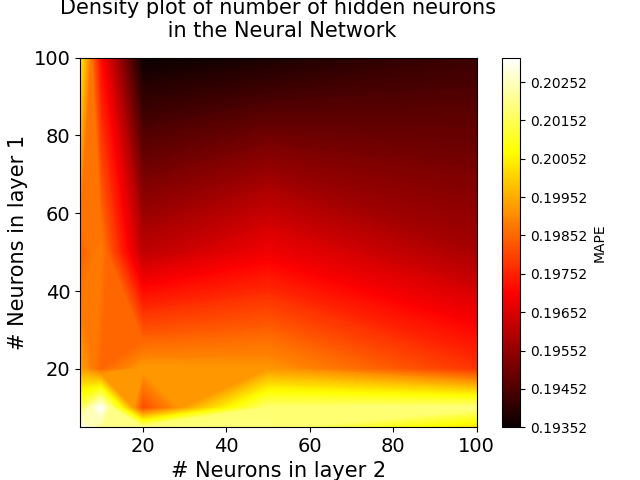

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget
x = [5,10,20,50,100]
y = [5,10,20,50,100]
z = matrix_MAPE
X,Y = np.meshgrid(x,y)
fig, ax = plt.subplots(1, 1)
# fig = plt.figure(figsize=(4,4))


plt.contourf(x,y,z,300,cmap='hot')
cb = plt.colorbar(label="MAPE");
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
ax.set_title('Density plot of number of hidden neurons\n in the Neural Network', size=15, pad=15) 
ax.set_xlabel('# Neurons in layer 2', size=15) 
ax.set_ylabel('# Neurons in layer 1', size=15) 
cb.ax.tick_params(labelsize=10)

plt.show()